In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth

import timeit
import ODE_utils as odeu
from scipy import optimize
import tables
from scipy.integrate import cumtrapz as trapint
#from mpmath import *
!jt -t grade3 -cellw 100%

In [2]:
###Initial Values###

M0=1.0
Q=0.90
Lambda=0.0000#0.001#0.0001#0.1#0.14#0.1#0.1
scalarfield=True
A=.05#.025#.115
vscalarfield=False


In [3]:
Tol=.1#.025#.05
N=100#50
Nul=20*N#500#*4#*8#*8
Nup=10**(60)
scal=50
uscal=1000
umax=60
vmax=20
extraterms=True
rcosmtol=.00000001#.0000000000000001
dpower=1.00#1.00

datatype=np.float64


#ru0=5.0
#dr0v=.4
ru0=10.0
#dr0v=0.045
dr0v=.1#0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)#0.05#-1/(4*-.375)*(1-2*M0/ru0+Q**2/ru0**2-Lambda*ru0**2/3)

#dr0v=.075

vbdytype="edd"
ubdytype="stan"
scaltostan=False
solveaffine=False

Elist=[1]
#Elist=[1,2,4,8,16]
if vbdytype=="stan":
    dr0v=0.5

if vbdytype=="edd":
    dr0v=0.5*(1-2*M0/ru0+Q**2.0/ru0**2.0-Lambda/3*ru0**2.0)
    #dpower=0.5*np.exp(-vmax/50)+1.0#1.5*(vmax/100)^(-1)
    if Lambda>0.0:
        dpower=.5*np.exp(-vmax/100)+1.0#1.5*(vmax/100)^(-1)
        #dpower=1.0
#uloc=[1/8,1/4,3/8,1/2,5/8]
#uloc=[1/5,2/5,3/5,4/5,9/10]
uloc=[8.2/10]
print(dr0v)
print(dpower)

0.40405
1.0


In [4]:
###Defining Needed Constants###

scalf=float(scal)
u0=0.0
v0=0.0
rv0=ru0
phiu0=0.0
phiv0=0.0

if M0==0.0:
    dv0=1/N    
else:
    dv0=M0/N
    


def fr(r,M0,Q,Lambda):
    return 1-2*M0/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

if Lambda>0 or Lambda<0:
    sol = optimize.root(fr,[0.687,1.3,500.0],args=(M0,Q,Lambda), method='hybr')
    rminus=sol.x[0]
    rplus=sol.x[1]
    rcosm=sol.x[2]
else:
    rplus=M0+(M0**2-Q**2)**(.5)
    rminus=M0-(M0**2-Q**2)**(.5)
    rcosm=0.0
    

wHD=True 

print("r+: "+str(rplus))
print("r-: "+str(rminus))
print("rc: "+str(rcosm))

print("Max r along u=0: "+str(ru0+vmax*dr0v))
###Predicting Run time###

###timer
start = timeit.default_timer()

Nu=Nul*umax#int(umax/du0)
Nv=int(vmax/dv0)


r+: 1.4358898943540672
r-: 0.5641101056459328
rc: 0.0
Max r along u=0: 18.081


In [5]:
print((rplus-rminus)/(2*rminus)*rcosm/rminus)

0.0


In [6]:
##################################
###Applying Boundary Conditions###

Emax=max([Elist])


rnpf=np.zeros((2,Nv),dtype=datatype)
signpf=np.zeros((2,Nv),dtype=datatype)
phinpf=np.zeros((2,Nv),dtype=datatype)
drnpvf=np.zeros((2,Nv),dtype=datatype)
dsignpvf=np.zeros((2,Nv),dtype=datatype)
dphinpvf=np.zeros((2,Nv),dtype=datatype)
drnpuf=np.zeros((2,Nv),dtype=datatype)
dsignpuf=np.zeros((2,Nv),dtype=datatype)
dphinpuf=np.zeros((2,Nv),dtype=datatype)
massnpf=np.full((2,Nv),M0)#np.zeros((2,Nv))
#drunpv=np.full((1,Nv-1),-1/(4*dr0v)*(1-2*M0/ru0+Q**2/ru0**2))
 


rnpf[0], signpf[0], phinpf[0] , drnpvf[0], dsignpvf[0], dphinpvf[0], drnpuf[0], dsignpuf[0], dphinpuf[0] , massnpf[0]= odeu.boundaryv(scal,ubdytype,vbdytype,Nv,ru0,dr0v,dv0,vmax,M0,Q,Lambda,scalarfield,A,rcosmtol,datatype)


mask=~np.isnan(rnpf[0])
print(Nv)
rnpf=rnpf[:,mask]

Nv=int(len(rnpf[0]))
rnpf=rnpf.reshape(2,Nv)
signpf=signpf[:,mask]#.reshape(2,Nv)
phinpf=phinpf[:,mask]#.reshape(2,Nv)
dphinpuf=dphinpuf[:,mask]#.reshape(2,Nv)  
dphinpvf=dphinpvf[:,mask]#.reshape(2,Nv)
dsignpuf=dsignpuf[:,mask]#.reshape(2,Nv)
dsignpvf=dsignpvf[:,mask]#.reshape(2,Nv)
drnpuf=drnpuf[:,mask]#.reshape(2,Nv)
drnpvf=drnpvf[:,mask]#.reshape(2,Nv)
massnpf=massnpf[:,mask]#.reshape(2,Nv)
print(Nv)
#print(massnpf)

dr/dv is 0.40405
2000
2000


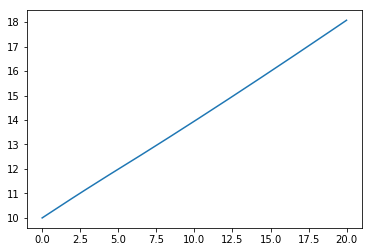

1.418271191527803 inf
-0.40404999999999996
0.40405


In [7]:
vmax=(Nv)*dv0

vrange=np.arange(0,vmax-.00000001*vmax,dv0)#*rnpf[0])/rnpf[0]

    
plt.plot(vrange,rnpf[0])
#plt.plot(dphinpvf[0])
#plt.plot(dphinpuf[0])
Mc=np.nanmax(massnpf[0])
rcosm=odeu.rc(Mc,Q,Lambda)
plt.plot([0,vmax],[rcosm,rcosm],linestyle='--',color='green')
plt.show()



#print(vrange)
print(Mc,rcosm)
print(drnpuf[0,0])

print(drnpvf[0,0])

In [8]:
drunptemp=np.empty((Nv))*np.nan

###Applying Propagation Algorithm###

urange=np.array([0.0],dtype=datatype)



i=0
icount=0
dv=dv0
if M0>0:
    du0=M0/Nul
    #du0=M0/N
elif M0==0:
    du0=1/Nul
    #du0=1/N
du=du0

    
atom = tables.Float64Atom()

rnpfile = tables.open_file('rnpe.h5', mode='w',encoding="utf8") 
rnp = rnpfile.create_earray(rnpfile.root, 'data', atom, (0, Nv))
signpfile = tables.open_file('signpe.h5', mode='w',encoding="utf8") 
signp = signpfile.create_earray(signpfile.root, 'data', atom, (0, Nv))
phinpfile = tables.open_file('phinpe.h5', mode='w',encoding="utf8") 
phinp = phinpfile.create_earray(phinpfile.root, 'data', atom, (0, Nv))
massnpfile = tables.open_file('massnpe.h5', mode='w',encoding="utf8") 
massnp = massnpfile.create_earray(massnpfile.root, 'data', atom, (0, Nv))

if extraterms==True:
    drnpufile = tables.open_file('drnpue.h5', mode='w',encoding="utf8") 
    drnpu = drnpufile.create_earray(drnpufile.root, 'data', atom, (0, Nv))
    drnpvfile = tables.open_file('drnpve.h5', mode='w',encoding="utf8") 
    drnpv = drnpvfile.create_earray(drnpvfile.root, 'data', atom, (0, Nv))
    dsignpufile = tables.open_file('dsignpue.h5', mode='w',encoding="utf8") 
    dsignpu = dsignpufile.create_earray(dsignpufile.root, 'data', atom, (0, Nv))
    dsignpvfile = tables.open_file('dsignpve.h5', mode='w',encoding="utf8") 
    dsignpv = dsignpvfile.create_earray(dsignpvfile.root, 'data', atom, (0, Nv))
    dphinpufile = tables.open_file('dphinpue.h5', mode='w',encoding="utf8") 
    dphinpu = dphinpufile.create_earray(dphinpufile.root, 'data', atom, (0, Nv))
    dphinpvfile = tables.open_file('dphinpve.h5', mode='w',encoding="utf8") 
    dphinpv = dphinpvfile.create_earray(dphinpvfile.root, 'data', atom, (0, Nv))
    
rnp.append(rnpf[0].reshape(1,Nv))
signp.append(signpf[0].reshape(1,Nv))
phinp.append(phinpf[0].reshape(1,Nv))
massnp.append(massnpf[0].reshape(1,Nv))

if extraterms==True:
    drnpu.append(drnpuf[0].reshape(1,Nv))
    drnpv.append(drnpvf[0].reshape(1,Nv))
    dsignpu.append(dsignpuf[0].reshape(1,Nv))
    dsignpv.append(dsignpvf[0].reshape(1,Nv))
    dphinpu.append(dphinpuf[0].reshape(1,Nv))
    dphinpv.append(dphinpvf[0].reshape(1,Nv))
    
drunptemp=np.nanmax(np.abs(drnpuf[0]))     
dsigunpvalue=np.nanmax(np.abs(dsignpuf[0]))
dphiutemp=np.nanmax(np.abs(dphinpuf[0]))
druunptemp=np.nanmax(np.abs(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])))

i=0
TempTol=1 
TempTolv=1
Eres=False
if ubdytype=='adapt':
    maxsig1=signpf[0][0]-np.nanmax(signpf[0])
    maxsig2=signpf[0][0]-np.nanmax(signpf[0])
    maxsig3=signpf[0][0]-np.nanmax(signpf[0])
    print(maxsig1,maxsig2,maxsig3)
    

while max(urange)<umax and i<2000000 and ~np.isnan(drnpvf[1][0]): #and rnpf[1][0]>0.0 :

    
    du = du0*Tol*TempTol/(np.nanmax([abs(dsigunpvalue),abs(drunptemp),abs(dphiutemp),abs(druunptemp)]))**(dpower)
    du = np.min([du,1/(1*Nul)])
    
    ###############
    ###Predictor###
    ###############
    drnpvf[1] = drnpvf[0]+du*odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)
    dsignpvf[1] = dsignpvf[0]+du*odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)
    dphinpvf[1] = dphinpvf[0]+du*odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])
    drnpuf[1] = drnpuf[0]+du*odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])
    
    rnpf[1] = rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    #drnpuf[1][0] = drnpuf[0][0]+du*odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])
    #rnpf[1][0] = rnpf[0][0]+0.5*du*(drnpuf[0][0]+drnpuf[1][0])
    #rnpf[1] = rnpf[1][0]+dv*trapint(drnpvf[1],initial=0)
    
    if ubdytype=='adapt':
        #nextsig=(maxsig1*3.0-maxsig2*3.0+maxsig3*1.0)
        #dsignpuf[1][0]=-np.nanmax(np.abs(dsignpuf[0]))/Nul
        dsignpuf[1][0] = -(signpf[1][-1]-np.log(drnpvf[1][-1])+3/2*np.log(2))
    elif ubdytype=='edd':
        #dsignpuf[1][0]=(np.log(abs(1-2*M0/rnpf[1][0]+Q**2.0/rnpf[1][0]-Lambda*rnpf[1][0]**2.0/3))-signpf[0][0])/du
        dsignpuf[1][0] = 2*(3*Q**2-3*M0*rnpf[1][0]+rnpf[1][0]**4*Lambda)/(rnpf[1][0]*(-3*Q**2+rnpf[1][0]*(6*M0-3*rnpf[1][0]+rnpf[1][0]**3*Lambda)))*drnpuf[1][0]
    
    elif ubdytype=='stan':
        dsignpuf[1][0] = 0.0
    
    signpf[1] = signpf[0]+du*dsignpuf[0]
    phinpf[1] = phinpf[0]+du*dphinpuf[0]
    
    #drnpuf[1][0] = -1/(4*drnpvf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpuf[1][0] = drnpuf[0][0]+du*odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])
    #drnpuf[1] = 1/rnpf[1]*(rnpf[1][0]*drnpuf[1][0]+dv*trapint(-np.exp(signpf[1])/(4)*(1-Q**2/rnpf[1]**2-Lambda*rnpf[1]**2),initial=0))
    #drnpvf[1][0] = -1/(4*drnpuf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpvf[1] = np.exp(signpf[1])*(drnpvf[1][0]*np.exp(-signpf[1][0])-dv*trapint(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),initial=0))
    
    dphinpuf[1] = 1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-dv*trapint(drnpuf[1]*dphinpvf[1],initial=0))
    Sigfuncnp = odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1] = dsignpuf[1][0]+dv*trapint(Sigfuncnp,initial=0)

    ################
    ###Corrector###
    ################
    drnpvf[1] = drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    dsignpvf[1] = dsignpvf[0]+1/2*du*(odeu.Sigfunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0],signpf[0],Q)+odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q))
    dphinpvf[1] = dphinpvf[0]+1/2*du*(odeu.Phifunc(drnpvf[0],drnpuf[0],dphinpuf[0],dphinpvf[0],rnpf[0])+odeu.Phifunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1]))
    drnpuf[1] = drnpuf[0]+1/2*du*(odeu.Coneq(drnpuf[0],dsignpuf[0],dphinpuf[0],rnpf[0])+odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1]))
    
    rnpf[1] = rnpf[0]+1/2*du*(drnpuf[0]+drnpuf[1])
    #rnpf[1][0] = rnpf[0][0]+0.5*du*(drnpuf[0][0]+drnpuf[1][0])
    #rnpf[1] = rnpf[1][0]+dv*trapint(drnpvf[1],initial=0)
    signpf[1] = signpf[0]+1/2*du*(dsignpuf[0]+dsignpuf[1])
    phinpf[1] = phinpf[0]+1/2*du*(dphinpuf[0]+dphinpuf[1])
    
    #drnpuf[1][0] = -1/(4*drnpvf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpuf[0][0]+0.5*du*(odeu.Coneq(drnpuf[0][0],dsignpuf[0][0],dphinpuf[0][0],rnpf[0][0])+odeu.Coneq(drnpuf[1][0],dsignpuf[1][0],dphinpuf[1][0],rnpf[1][0]))
    #drnpuf[1] = 1/rnpf[1]*(rnpf[1][0]*drnpuf[1][0]+dv*trapint(-np.exp(signpf[1])/(4)*(1-Q**2/rnpf[1]**2-Lambda*rnpf[1]**2),initial=0))
    
    #drnpvf[1][0] = -1/(4*drnpuf[1][0])*np.exp(signpf[1][0])*(1-2*M0/rnpf[1][0]+Q**2/rnpf[1][0]**2-Lambda*rnpf[1][0]**2/3)
    #drnpvf[1] = np.exp(signpf[1])*(drnpvf[1][0]*np.exp(-signpf[1][0])-dv*trapint(rnpf[1]*(dphinpvf[1])**2.0*np.exp(-signpf[1]),initial=0))
    #rnpf[1] = rnpf[1][0]+1/2*dv*(np.cumsum(drnpvf[1]+np.roll(drnpvf[1],1))-drnpvf[1][0]-np.roll(drnpvf[1],1)[0])
    
    if ubdytype=='edd':
        #dsignpuf[1][0]=(np.log(abs(1-2*M0/rnpf[1][0]+Q**2.0/rnpf[1][0]-Lambda*rnpf[1][0]**2.0/3))-signpf[0][0])/du
        dsignpuf[1][0] = 2*(3*Q**2-3*M0*rnpf[1][0]+rnpf[1][0]**4*Lambda)/(rnpf[1][0]*(-3*Q**2+rnpf[1][0]*(6*M0-3*rnpf[1][0]+rnpf[1][0]**3*Lambda)))*drnpuf[1][0]
    
    dphinpuf[1] = 1/(rnpf[1])*(rnpf[1][0]*dphinpuf[1][0]-dv*trapint(drnpuf[1]*dphinpvf[1],initial=0))
    Sigfuncnp = odeu.Sigfunc(drnpvf[1],drnpuf[1],dphinpuf[1],dphinpvf[1],rnpf[1],signpf[1],Q)
    dsignpuf[1] = dsignpuf[1][0]+dv*trapint(Sigfuncnp,initial=0)
    
    #drnpvf[1] = drnpvf[0]+1/2*du*(odeu.Rfunc(drnpvf[0],drnpuf[0],rnpf[0],signpf[0],Q,Lambda)+odeu.Rfunc(drnpvf[1],drnpuf[1],rnpf[1],signpf[1],Q,Lambda))
    
    massnpf[1] = (1+4.0*np.exp(-signpf[1])*drnpuf[1]*drnpvf[1])*rnpf[1]/2.0+np.power(Q,2.0)/(2.0*rnpf[1])-Lambda*np.power(rnpf[1],3.0)/6.0
    #####
    drunptemp=np.nanmax(np.abs(drnpuf[1]))      
    dsigunpvalue=np.nanmax(np.abs(dsignpuf[1]))    
    dphiutemp=np.nanmax(np.abs(dphinpuf[1]))
    druunptemp=np.nanmax(np.abs(odeu.Coneq(drnpuf[1],dsignpuf[1],dphinpuf[1],rnpf[1])))

    icount+=1
    
    if icount==uscal:
        urange=np.append(urange,urange[i]+du)
        rnp.append(rnpf[1].reshape(1,Nv))
        signp.append(signpf[1].reshape(1,Nv))
        phinp.append(phinpf[1].reshape(1,Nv))
        massnp.append(massnpf[1].reshape(1,Nv))
        if extraterms==True:
            drnpu.append(drnpuf[1].reshape(1,Nv))
            drnpv.append(drnpvf[1].reshape(1,Nv))
            dsignpu.append(dsignpuf[1].reshape(1,Nv))
            dsignpv.append(dsignpvf[1].reshape(1,Nv))
            dphinpu.append(dphinpuf[1].reshape(1,Nv))
            dphinpv.append(dphinpvf[1].reshape(1,Nv))
        icount=0

        print("%.24f" % urange[i])
        #print("%.24f" % du)
        print(du)
        print(drnpuf[1][-1],dsignpuf[1][-1],odeu.Coneq(drnpuf[1][-1],dsignpuf[1][-1],dphinpuf[1][-1],rnpf[1][-1]))#,dphinpuf[1][-1])
        #print(dsignpuf[1][-1])
        print(drnpvf[1][0],drnpvf[1][-1],rnpf[1][-1])#,dphinpvf[1][-1])
        print(massnpf[1][-2])
        print('---')
        i+=1
    else:
        urange[i]=urange[i]+du
    
    if ubdytype=='adapt':
        maxsig3=maxsig2
        maxsig2=maxsig1
        maxsig1=signpf[1][0]-np.nanmax(signpf[1])

    
    #break
    rnpf[0]=rnpf[1]
    phinpf[0]=phinpf[1]
    signpf[0]=signpf[1]
    drnpvf[0]=drnpvf[1]
    dsignpvf[0]=dsignpvf[1]
    dphinpvf[0]=dphinpvf[1]
    drnpuf[0]=drnpuf[1]
    dsignpuf[0]=dsignpuf[1]
    dphinpuf[0]=dphinpuf[1]

0.107482108307071916319941
0.00010753763205086829
-0.46495396643153164 0.009031791411125718 -0.004199373807983565
0.40364882894432247 0.4225657211388962 18.02564999532859
1.4182711801001413
---
0.214967412030343335560545
0.00010743271214863349
-0.46540804985991724 0.009131748515606336 -0.00424999604480043
0.4032446901988867 0.42235381113036535 17.97564997092499
1.4182711683780014
---
0.322347319591380299108607
0.00010732683701118761
-0.46586716743468903 0.00923316048111242 -0.004301433311995508
0.40283755499905555 0.4221407384106968 17.92564994627503
1.4182711563459633
---
0.429620870459016479525616
0.00010721999601461592
-0.46633139254728384 0.009336053300049676 -0.004353701951494555
0.4024273942729462 0.4219264933869286 17.875649921375544
1.4182711439957678
---
0.536787093413855553869496
0.00010711217840600395
-0.4668007999023551 0.009440453509814402 -0.0044068186954048846
0.4020141786386893 0.4217110663603076 17.825649896223293
1.4182711313189083
---
0.643845006418552578963954
0.000

4.620870800166821723564681
0.00010201507963203404
-0.49012437111809676 0.015046672099376724 -0.007374767046825833
0.38316557254763073 0.4122706483681846 15.875648677308437
1.4182702581774076
---
4.722807407682936720050293
0.00010185772179904071
-0.49088156243222547 0.015241388819382284 -0.007481744003356482
0.38260220147609847 0.411998566751828 15.825648638715803
1.4182702218007457
---
4.824585886526232769710987
0.00010169881785211391
-0.49164857138173024 0.015439384413119038 -0.007590779467746816
0.38203427465907686 0.4117247928330286 15.775648599683375
1.4182701844406993
---
4.926204681896567905141637
0.00010153835037097221
-0.49242556358111916 0.015640725836101578 -0.007701922378507844
0.38146174777402514 0.41144931077977015 15.725648560205004
1.4182701460700435
---
5.027662221482245286097168
0.00010137630175255614
-0.4932127080321966 0.01584548162657694 -0.007815223047966155
0.38088457612528537 0.4111721045620137 15.675648520274262
1.4182701066607066
---
5.128956915276981831652847


8.839829785808991147177949
9.361510713676733e-05
-0.53410320215054 0.027450949727870464 -0.014661759619217854
0.35423720112676815 0.39881977698112236 13.725646529058592
1.4182673486344082
---
8.933324321603828721549689
9.337331587826217e-05
-0.5354862859995935 0.027873244400260847 -0.01492586409240981
0.3534338225334788 0.398457737728663 13.67564646440358
1.4182672324210748
---
9.026575842992530240849192
9.312907184658976e-05
-0.5368906916428587 0.028303835368895747 -0.01519619440067574
0.35262370939099547 0.3980930995707824 13.625646398922491
1.4182671129954523
---
9.119581885126306630695581
9.288235085434343e-05
-0.538316838730659 0.028742916242848433 -0.015472929333701667
0.3518068077007097 0.3977258344371514 13.575646332602743
1.4182669902683434
---
9.212339958934519401623220
9.263312864661538e-05
-0.5397651567215977 0.029190685743742232 -0.015756253661025947
0.35098306358459114 0.39735591385197516 13.525646265431563
1.4182668641481952
---
9.304847551061509847158959
9.2381380909572

12.607253525620457423883636
8.070769530209167e-05
-0.6195224258416375 0.056295759097492425 -0.03487712246544774
0.31299492475827523 0.38050062780873795 11.575642820056645
1.4182580064606212
---
12.687777494864930005746828
8.033931216155515e-05
-0.6223631865281538 0.057336224982367505 -0.03568461952612829
0.31185955447089425 0.3799953946329132 11.52564270568329
1.4182576359483319
---
12.767931392562369197207772
7.996754668314586e-05
-0.6252565644915151 0.05840046671390749 -0.03651596681196771
0.310715765895899 0.37948587421490804 11.475642589726888
1.4182572556462636
---
12.847711830089798112908284
7.959238642164519e-05
-0.6282037641397231 0.05948910864840328 -0.037372002617319135
0.309563554364605 0.3789720117953969 11.425642472163851
1.4182568653258625
---
12.927115406797193841725857
7.921381977532349e-05
-0.6312060215478931 0.06060279308560179 -0.03825359884423223
0.30840291796775227 0.37845375167931766 11.375642352970315
1.418256464755401
---
13.006138710869535657366214
7.8831836023

15.693381113699196305333317
6.18022429337511e-05
-0.8090387801472602 0.1330765118730427 -0.10766796737342615
0.2569553652901619 0.3540898985389617 9.42563614758656
1.4182302346533746
---
15.754929013230993817273884
6.129259940547694e-05
-0.8157659705433895 0.13601271154061959 -0.1109586206316993
0.2555006570732968 0.3533362283370859 9.375635940569179
1.4182292285295468
---
15.815965939043058696711341
6.078030264591024e-05
-0.8226418812713202 0.13902530259079993 -0.11437229321208749
0.2540410857120184 0.352574740654402 9.325635730731939
1.418228203596281
---
15.876489267684741335528997
6.026541267278737e-05
-0.8296703868959765 0.14211648405555716 -0.1179142803823155
0.25257685328783536 0.35180531337482124 9.275635518042794
1.418227159833411
---
15.936496436912639396155100
5.97479918864135e-05
-0.836855473629322 0.14528852291190858 -0.12159013092274648
0.2511081680434167 0.3510278218285966 9.225635302469712
1.4182260972415166
---
15.995984948076156229035405
5.922810507528648e-05
-0.84420

17.894151060202243996855032
3.796660288726402e-05
-1.3169657072939975 0.3761180677118783 -0.495357281225964
0.19175877793358004 0.3114776040034068 7.225623966546873
1.4181716872561307
---
17.931847132308099901365495
3.7425291204771886e-05
-1.3360142408708016 0.3858296963467154 -0.5154974442682906
0.1903479420097919 0.3102185021525496 7.1756236075355515
1.4181702186094804
---
17.969002785571102975836766
3.6885787153495214e-05
-1.3555554565929238 0.39582597261398106 -0.5365883411249391
0.18894519199934667 0.30894250147861085 7.125623244518743
1.4181687585229743
---
18.005619887877269746923048
3.634821124133105e-05
-1.3756038165653295 0.4061161403010246 -0.5586800223620269
0.18755083931657104 0.30764926016113336 7.075622877479231
1.4181673082039508
---
18.041700427233713810437621
3.581268318149825e-05
-1.3961742534228034 0.4167097803001165 -0.5818254184226408
0.18616519123974565 0.3063384271179407 7.025622506400326
1.4181658688602161
---
18.077246510912544863458606
3.5279321768559516e-05


19.067002108707452379121605
1.4215163388899038e-05
-2.8523395225358623 1.233185464737673 -3.517517537053291
0.14128303599194975 0.2358133336696506 5.065519500964109
1.4181280181187927
---
19.080926879312677613143023
1.36396025233529e-05
-2.9023405558188395 1.2630813837919994 -3.665946047823452
0.14059106050948228 0.23383431910246108 5.025457254978482
1.41812770897868
---
19.094293023177161927605994
1.3097502110565116e-05
-2.952341569708457 1.293082664914752 -3.817675194788152
0.1399245179307012 0.23187297315533972 4.986333838637933
1.4181274230944185
---
19.107132720222470112503288
1.2586339587413371e-05
-3.0023425649356636 1.3231882343226442 -3.9727175602443507
0.1392820718453477 0.22992868849290873 4.948109320042771
1.4181271586859425
---
19.119475746151209705203655
1.2103824827361124e-05
-3.052343542190579 1.3533970625051965 -4.13108564687142
0.13866247669859 0.2280008901222788 4.910746217270577
1.4181269141157082
---
19.131349692020918951129715
1.1647874950219336e-05
-3.10234450212

19.390384192437021937394093
3.7514772839461047e-06
-5.052372826275401 2.6380410839515935 -13.328385655207482
0.12455319433528923 0.1602066990760505 3.865235514261844
1.4181240567900875
---
19.394093557300273289456527
3.6676264470692858e-06
-5.102373391397253 2.671910316819255 -13.633101750693505
0.1243530178792431 0.15867649558287533 3.846402459962507
1.4181240485878597
---
19.397720424134899275259158
3.5864647059034187e-06
-5.15237395083808 2.7058593327028952 -13.94161587843256
0.12415710540002553 0.157152109967226 3.827806912754652
1.4181240411533391
---
19.401267425466038218928588
3.507879797309458e-06
-5.2023745047138235 2.7398878079125346 -14.25393832274356
0.12396532697496689 0.15563343480932443 3.8094434937667523
1.4181240344255543
---
19.404737084462805540852059
3.4317652182369297e-06
-5.252375053136924 2.7739954242735383 -14.570079332158086
0.12377755782466619 0.154120365744273 3.7913070008486374
1.418124028347861
---
19.408131820522037003229343
3.358019875965085e-06
-5.302375

19.499913353321055353717384
1.641494426417367e-06
-7.252393489747743 4.20006525900766 -30.460527613561528
0.11855962312812236 0.09727605775810937 3.2078831364194595
1.418123982549617
---
19.501542050212798073971499
1.6159698917591903e-06
-7.302393881539623 4.2371929270798425 -30.941653767582782
0.1184691904094305 0.095929165871451 3.1960307600458475
1.4181239824269514
---
19.503145507651769463564051
1.591013297077262e-06
-7.352394270643718 4.274389643311701 -31.427000417687985
0.11838012119700138 0.09458521996223015 3.1842818823571286
1.4181239822825418
---
19.504724285311823450683733
1.5666081937178136e-06
-7.4023946570975605 4.31165521807988 -31.916576517808803
0.11829238613973266 0.09324418220934332 3.1726348985200805
1.4181239821155995
---
19.506278926713278565330256
1.5427387193456413e-06
-7.452395040937905 4.3489894632663075 -32.41039099516542
0.11820595670761593 0.09190601552498147 3.161088239724885
1.4181239819254934
---
19.507809959796546195320843
1.519389573160999e-06
-7.5023

19.553407354735650613974940
8.970698978762974e-07
-9.45240859541171 5.8966584990615925 -55.737689492070174
0.11556899158013753 0.040381049495803005 2.7669931720206336
1.4181239598807793
---
19.554299047999290195321009
8.863368058522664e-07
-9.502408896329912 5.9366604045902145 -56.41264126156305
0.1155187821032954 0.03913563863295425 2.7585423769276307
1.4181239592149375
---
19.555180100115617136680157
8.757870982866567e-07
-9.552409195678983 5.976724027051865 -57.09218283950735
0.11546916019390209 0.03789201282434712 2.750148377492177
1.4181239585573133
---
19.556050692425056780621162
8.654167017115276e-07
-9.602409493475529 6.0168492158927 -57.77632203802739
0.11542011605028873 0.036650154191647986 2.7418105011038842
1.4181239579088336
---
19.556911002250309650207782
8.55221654051713e-07
-9.652409789735861 6.057035820982678 -58.46506664322624
0.1153716400830777 0.03541004511932956 2.7335280866284726
1.4181239572704174
---
19.557761203006258199366130
8.451981010098617e-07
-9.702410084

19.584529833366232765001769
5.563188126639251e-07
-11.652420540186593 7.7131756397752165 -89.87740347781627
0.11380952875949882 -0.012934398768426522 2.4413003035585596
1.418123948573064
---
19.585083439497214641278333
5.50900695986887e-07
-11.702420784860163 7.755754502472778 -90.76134533577336
0.11377810024222394 -0.014115295518437578 2.4348356977309127
1.4181239489442292
---
19.585631665238448562149642
5.455578796736177e-07
-11.75242102850119 7.798388690553093 -91.65019537021914
0.11374697263727986 -0.015295000640309525 2.428406508630115
1.418123949350145
---
19.586174585209416676434557
5.402890055387806e-07
-11.802421271118405 7.841078060679444 -92.54396018849616
0.11371614183906836 -0.01647352410371723 2.4220123954883057
1.4181239497911087
---
19.586712272686497726681409
5.35092745551988e-07
-11.852421512720428 7.883822469454748 -93.44264636856465
0.11368560381460534 -0.017650875760635235 2.4156530222292423
1.418123950267403
---
19.587244799632653524668058
5.299678010430781e-07
-1

19.604632170105027455520030
3.745423296113815e-07
-13.852430431082256 9.63706818899444 -133.49736258657197
0.11266535198774151 -0.06388447180442293 2.1864052193849526
1.4181240004290867
---
19.605005172529345713883231
3.7146550606752275e-07
-13.90243063730225 9.681943898159888 -134.6031081984247
0.11264406401066049 -0.06502103272172066 2.1812289596708787
1.418124002490948
---
19.605375116211053665438158
3.6842478820512816e-07
-13.95243084278736 9.726868465347126 -135.71402316370583
0.11262294852557451 -0.06615675025997016 2.176076649685105
1.4181240045927483
---
19.605742036980924325462183
3.654196273905476e-07
-14.002431047542714 9.771841737322669 -136.83011266576483
0.11260200353810877 -0.06729163060926657 2.170948094487584
1.4181240067344771
---
19.606105970126282755927605
3.624494852504525e-07
-14.05243125157339 9.816863560467468 -137.9513818518874
0.11258122708371639 -0.06842567989904166 2.1658431013872814
1.418124008916115
---
19.606466950400971427370678
3.595138334440946e-07
-14

19.618292905540741344339040
2.691495315575447e-07
-16.002438692009115 11.60889729411328 -185.77166960108806
0.11188433394402299 -0.11206464939714948 1.9832950842092345
1.4181241245879446
---
19.618561096173213087467957
2.672330977945377e-07
-16.052438870653823 11.655729930313715 -187.10390720892573
0.11186897252280731 -0.11316987675402479 1.9789967139663485
1.4181241283175208
---
19.618827380161263818081352
2.6533621908594257e-07
-16.10243904874173 11.702604403217386 -188.44150186075746
0.11185371923060576 -0.11427448089990683 1.9747155878024285
1.4181241320839872
---
19.619091776931025350450000
2.6345863782487704e-07
-16.152439226276144 11.749520536833291 -189.78445698974764
0.11183857297756117 -0.1153784660237185 1.9704515830939182
1.418124135887239
---
19.619354305652933589954046
2.616001005817487e-07
-16.202439403260293 11.796478154487334 -191.13277598279555
0.11182353268798426 -0.11648183627961578 1.9662045784368545
1.4181241397271693
---
19.619614985246151661613112
2.597603580238

19.628315155468058605947590
2.016697455321162e-07
-18.15244590788791 13.658215782823529 -247.9316614730674
0.11130953719868424 -0.1590744403242794 1.8126597837203444
1.418124316872806
---
19.628516192352780223018271
2.0040467716848663e-07
-18.202446065205837 13.706679117076916 -249.49674280305194
0.11129799169394353 -0.16015626956110837 1.809005474872924
1.4181243220851678
---
19.628715969895761617181051
1.9915105105948192e-07
-18.25244622208358 13.755176009541158 -251.06728310930538
0.11128651790355755 -0.16123762882436182 1.8053640685413852
1.4181243273294222
---
19.628914499472564614279690
1.9790873417926371e-07
-18.30244637852335 13.803706247838411 -252.6432835389452
0.11127511518558938 -0.16231852112240078 1.8017354827444287
1.418124332605447
---
19.629111792326821017695693
1.966775954075718e-07
-18.35244653452731 13.852269618560008 -254.22474517769695
0.11126378290548025 -0.16339894944242647 1.7981196362149152
1.4181243379131279
---
19.629307859571934358200451
1.9545750549737272e

19.636104018920097047384843
1.552968680028844e-07
-20.352452440198626 15.819385444596634 -321.9657975462342
0.11086177435106617 -0.20626753507415518 1.6630789015371272
1.4181245748788827
---
19.636258882630002631231037
1.5443086460308454e-07
-20.40245257999951 15.869109457964264 -323.7712834888593
0.1108528622357964 -0.2073312797799399 1.659923194898951
1.418124581388302
---
19.636412883857300215595387
1.535718976246541e-07
-20.452452719441073 15.918856578690782 -325.5822145788721
0.11084399939192593 -0.20839466958631642 1.6567773632461287
1.4181245879248214
---
19.636566029601858929254377
1.5271989410429058e-07
-20.502452858524826 15.968626539402043 -327.39858880107835
0.11083518542264509 -0.2094577067571214 1.6536413494882314
1.4181245944883467
---
19.636718326791214650484108
1.518747820137211e-07
-20.55245299725224 16.01841907121697 -329.22040405584033
0.11082641993521807 -0.21052039354300886 1.6505150969729703
1.4181246010787787
---
19.636869782281095808684768
1.51036490245536e-07


19.642062590704703950450494
1.23615298932616e-07
-22.502458144295275 17.97488520888908 -404.48271265773576
0.11051860579031184 -0.2517145198654893 1.535646047147686
1.41812487813079
---
19.642185896268813394272001
1.2299597940886588e-07
-22.552458269861262 18.02534109687281 -406.5193924862447
0.11051149859697235 -0.25276490131530444 1.5328683027377974
1.4181248857252613
---
19.642308584812216309956057
1.2238125494012585e-07
-22.60245839512242 18.075807060139933 -408.56134579908087
0.11050442673735117 -0.2538150148601683 1.5300983237012227
1.4181248933432096
---
19.642430660908452466628660
1.2177108252953987e-07
-22.65245852007978 18.126282753311518 -410.6085662845273
0.1104973899512756 -0.2548648623069098 1.52733606825343
1.4181249009845631
---
19.642552129088457490979636
1.21165419681129e-07
-22.702458644734396 18.176767828826854 -412.661047512264
0.11049038798098695 -0.25591444545406644 1.524581494893192
1.4181249086492553
---
19.642672993840516681984809
1.205642243929389e-07
-22.752

19.646959599110001448707408
1.0020396615105304e-07
-24.70246339344987 20.19958276189418 -498.9845037050918
0.11023616901593737 -0.29770076534791723 1.4202536108329145
1.41812523365894
---
19.647059577041414257791985
9.975196349906225e-08
-24.752463506475436 20.25012349840319 -501.2455297189928
0.11023039892977671 -0.2987409702660323 1.4177814232471757
1.418125242228922
---
19.647159104520465433552090
9.930306005638445e-08
-24.802463619234054 20.300656765659987 -503.51142475385603
0.11022465468886078 -0.2997809800732191 1.4153153977543949
1.4181252508199238
---
19.647258184633233923932494
9.885722959962466e-08
-24.852463731726424 20.351182101158756 -505.7821761957671
0.1102189361171227 -0.3008207962907227 1.4128555027806782
1.4181252594319087
---
19.647356820439632940633601
9.841444618662219e-08
-24.902463843953225 20.40169903914466 -508.05777125740735
0.11021324303997372 -0.30186042043501027 1.4104017069380754
1.4181252680648404
---
19.647455014973967735159022
9.797468415297013e-08
-24

19.650970112473878259606863
8.293512909669838e-08
-26.90246812216731 22.409706846328064 -602.8832951648166
0.11000458776816736 -0.343304779830435 1.3169119816654977
1.4181256301793064
---
19.651052879018774177666273
8.259798678092247e-08
-26.952468224002565 22.459433801057063 -605.3440934359064
0.10999980593941085 -0.34433778492199313 1.3146832986461419
1.4181256396447943
---
19.651135309507314019583646
8.226301593850752e-08
-27.00246832559441 22.509129403823053 -607.8090180703216
0.10999504342191017 -0.34537065821230695 1.312459543187922
1.418125649130154
---
19.651217406102816198654182
8.193020000709904e-08
-27.052468426943232 22.55879301481381 -610.2780470579581
0.10999030009195186 -0.3464034010756827 1.3102406904313966
1.4181256586353814
---
19.651299170952022166147799
8.159952259158494e-08
-27.102468528049382 22.608423989213726 -612.751158125154
0.10998557582675833 -0.34743601488454817 1.3080267156388496
1.41812566816046
---
19.651380606185146149300635
8.127096746224615e-08
-27.15

19.654320512033635282023170
6.995659309206482e-08
-29.102472376752846 24.558819590781194 -714.7315329440454
0.10981093484035472 -0.3886503369021186 1.223197419506284
1.4181260654204384
---
19.654390340984349450081936
6.970131716790544e-08
-29.152472468146037 24.60648769248517 -717.3491776793942
0.10980689689881555 -0.3896788268280042 1.22116348717
1.4181260757600533
---
19.654459915449034923540239
6.944762083665462e-08
-29.202472559305928 24.65409076785037 -719.9696906052698
0.10980287359881932 -0.3907072445165638 1.219133488598902
1.4181260861197842
---
19.654529237001931107897690
6.919549344332797e-08
-29.25247265023259 24.701627897440932 -722.5930350736144
0.10979886485014134 -0.39173559132249697 1.2171074032301652
1.4181260964996443
---
19.654598307206676111036359
6.894492443913895e-08
-29.30247274092607 24.749098153740835 -725.2191740157276
0.10979487056316094 -0.392763868601646 1.2150852105752084
1.418126106899659
---
19.654667127616491484332073
6.86959033805114e-08
-29.352472831

19.657171760809241334300168
6.009107549030758e-08
-31.302476177083687 26.58131445330355 -832.0730155977479
0.10964599714964238 -0.43385374219071743 1.1371624318548974
1.418126539808358
---
19.657231754598729622784958
5.989650951269618e-08
-31.35247625816108 26.625130153086307 -834.7758880018388
0.10964252531644222 -0.43488036153824966 1.1352829847470574
1.418126551066217
---
19.657291554422208434971253
5.970314354940147e-08
-31.402476338999765 26.66883126601111 -837.4795440638587
0.10963906465301686 -0.4359069704504938 1.1334066240757108
1.4181265623460593
---
19.657351161476412926276680
5.9510970861743335e-08
-31.45247641959942 26.71241640609344 -840.1839230055759
0.10963561509064707 -0.43693357041502245 1.1315333316301832
1.4181265736479538
---
19.657410576951125591449454
5.931998478613717e-08
-31.50247649995966 26.755884173430236 -842.888963333116
0.10963217656099607 -0.4379601629247076 1.1296630892312367
1.4181265849719722
---
19.657469802029726935188592
5.91301787336528e-08
-31.55

19.659643013026169455770287
5.2585934873890586e-08
-33.502479512389044 28.380333605764747 -950.8272608834016
0.109502940314026 -0.47903568575611977 1.0571484606252328
1.418127056992713
---
19.659695525357115286624321
5.2438741862388104e-08
-33.55247958246425 28.417582810864584 -953.4961768448651
0.10949989944086072 -0.48006334170537485 1.05538786007154
1.4181270692971695
---
19.659747890980060702759147
5.2292519125137504e-08
-33.602479652272585 28.454640305174706 -956.1623763024307
0.10949686702101931 -0.481091059538341 1.053629559954877
1.4181270816277873
---
19.659800110863361766178059
5.2147262964598276e-08
-33.652479721812966 28.49150386185814 -958.825755564711
0.10949384299877399 -0.4821188411163878 1.0518735423805405
1.418127093984678
---
19.659852185971764981786691
5.2002969750210007e-08
-33.7024797910844 28.52817122787548 -961.4862096119098
0.10949082731860517 -0.48314668831358987 1.050119789431965
1.4181271063679957
---
19.659904117266467693525556
5.1859635918513054e-08
-33.75

19.661827172568532517971107
4.6987706499922256e-08
-35.70248232644231 29.804373905033035 -1064.1105542079706
0.1093764246577252 -0.5243377608858754 0.9816164484003811
1.4181276251538832
---
19.661874106718300936336163
4.68806318793441e-08
-35.75248238347645 29.830667319679122 -1066.5409515143872
0.10937370523005295 -0.5253701068818203 0.9799396136641594
1.4181276387623352
---
19.661920934230622037830472
4.67744324951851e-08
-35.80248244017314 29.856639375336332 -1068.9624734661172
0.10937099194731263 -0.5264026125796663 0.9782642474061016
1.418127652404935
---
19.661967655980639335666638
4.66691079901421e-08
-35.85248249653009 29.88228615505851 -1071.3749314336158
0.10936828475903054 -0.5274352807025984 0.9765903289390594
1.4181276660819369
---
19.662014272843094886411563
4.6564658101335406e-08
-35.902482552544775 29.90760368586175 -1073.7781339921376
0.10936558361474848 -0.5284681140031633 0.9749178374557562
1.4181276797935813
---
19.662060785692400344260022
4.6461082661708254e-08
-35

19.663803058993117645059101
4.311445409461334e-08
-37.90248447711534 30.59638737167345 -1159.705712739429
0.10926190980808874 -0.5699528809838968 0.9089303308573086
1.418128260136639
---
19.663846139705235316341714
4.304706502177693e-08
-37.95248451622105 30.603909464354828 -1161.521178777408
0.10925941234437787 -0.5709953188828006 0.907296390654396
1.418128275545425
---
19.663889153515786034631674
4.298065300556398e-08
-38.00248455481969 30.610865640040707 -1163.315891930017
0.10925691873053439 -0.5720380745024682 0.9056628371284763
1.4181282910041337
---
19.663932101404881791495427
4.2915224210579216e-08
-38.05248459290525 30.617247977562332 -1165.0894659024614
0.10925442890986968 -0.5730811526907654 0.9040296396980351
1.418128306513292
---
19.663974984359018804980224
4.28507850457145e-08
-38.10248463047153 30.623048409787554 -1166.8415072543733
0.10925194282532817 -0.5741245583733414 0.9023967673951725
1.4181283220734238
---
19.664017803371027781622615
4.2787342171272895e-08
-38.152

19.665649490450956449194564
4.1198918225288355e-08
-40.102485613239985 30.262199144718288 -1213.6245323690168
0.10915484330039463 -0.6161981775850527 0.8369305978354598
1.4181289937905532
---
19.665690682284370893739833
4.11850047730068e-08
-40.15248562168321 30.234719079372677 -1214.03448121835
0.10915245416574954 -0.6172605701179218 0.8352776737498218
1.418129012052266
---
19.665731861018844739419364
4.1172727076880624e-08
-40.20248562913605 30.206114040725858 -1214.3964573950232
0.10915006576464821 -0.6183236056907879 0.8336232162811728
1.4181290304001544
---
19.665773028305476799459939
4.116211580429604e-08
-40.25248563557893 30.17636359762327 -1214.7094697808066
0.10914767800135375 -0.6193872957966452 0.8319671603232829
1.4181290488355582
---
19.665814185826352655794835
4.11532028248183e-08
-40.30248564099174 30.145446782496283 -1214.9725015532588
0.10914529077831153 -0.6204516522122313 0.8303094392630115
1.418129067359825
---
19.665855335296257067057013
4.114602126582131e-08
-40.

19.667474036828970440637931
4.219134437073241e-08
-42.29834878310369 27.62350157481787 -1168.4763642216558
0.10904899410682134 -0.663667013315005 0.76174658609976
1.4181299009238346
---
19.667516248876943052437127
4.22333002278641e-08
-42.347607210871764 27.517700304460536 -1165.3569903857294
0.10904654461031238 -0.6647579791551117 0.7599600442822467
1.4181299245729129
---
19.667558504345723946471480
4.2277107577785155e-08
-42.39678179146817 27.409165472254095 -1162.1090050074276
0.10904409256658106 -0.6658487014404881 0.7581695850010406
1.4181299483818475
---
19.667600799725168059239877
4.2314173789485055e-08
-42.44586266903777 27.297849666157763 -1158.7297506662676
0.10904163817973161 -0.6669389980528476 0.7563753570038803
1.4181299723501977
---
19.667643133639675312451800
4.2354194866121065e-08
-42.49484238109901 27.18369928788502 -1155.2163687192583
0.10903918152895321 -0.6680287403534194 0.7545774185075882
1.4181299964786724
---
19.667685509087579731613005
4.239725864014016e-08
-4

19.669370665364713346434655
4.403563376475281e-08
-44.28490342927625 19.439948062207424 -860.965283219442
0.10893890875486154 -0.7097889667013174 0.6795478732020157
1.4181311146805555
---
19.669414722877018419922024
4.407998528995533e-08
-44.322559901708914 19.139991137492093 -848.4030978107273
0.10893635088132851 -0.7107403327000943 0.677595957002012
1.4181311470558524
---
19.669458826405573859119613
4.412754264851831e-08
-44.35969426842276 18.833173085385962 -835.5041362944372
0.1089337903060707 -0.7116842864428025 0.6756403526422076
1.418131179682208
---
19.669502973309139548518942
4.4166831562820965e-08
-44.39628815049611 18.519364724964365 -822.2620394728465
0.1089312271829952 -0.7126205007194985 0.6736811978480027
1.4181312125603722
---
19.669547161098865473149999
4.420933406000632e-08
-44.432323088184226 18.19843396408852 -808.670343766512
0.10892866165585653 -0.7135486477352957 0.6717186237492042
1.4181312456912163
---
19.669591393036686355344500
4.425514766458179e-08
-44.46778

19.671351156593122055937783
4.600572292280373e-08
-45.1755539777094 -2.714346793693213 122.51491684671637
0.10882389663382075 -0.7400117623032307 0.5906423880007311
1.4181328169114726
---
19.671397187128945915901568
4.605601403232675e-08
-45.16909164160875 -3.5090292934135316 158.3912845946896
0.10882122280534005 -0.7402768508022415 0.5885630731694015
1.4181328634178172
---
19.671443265234437092203734
4.609926208054e-08
-45.160951730526826 -4.321230226185806 195.04129309089214
0.10881854618132594 -0.7405147282338373 0.5864819460989469
1.4181329103384632
---
19.671489386639343877050123
4.614418294855561e-08
-45.15109582518783 -5.151241339166543 232.4734015935155
0.10881586700922227 -0.7407246887482396 0.5843992781779678
1.4181329576739308
---
19.671535554752370700271058
4.619270042442025e-08
-45.13948341850099 -5.999497096585981 270.70217872579093
0.10881318509081146 -0.7409060527029149 0.5823149963615268
1.4181330054326389
---
19.671581772664016085627736
4.624115444003721e-08
-45.12607

19.673080940124975768412696
2.4510131105435665e-08
-43.48141286173256 -46.9205878560247 2040.008787925007
0.10872339562021567 -0.725694649312538 0.5134876484346251
1.4181348492166148
---
19.673105237340749340546608
2.4087079719657335e-08
-43.431412426466586 -47.79957355223071 2075.837297299086
0.10872198362209742 -0.7250489086276084 0.5124317952215401
1.4181348824769895
---
19.673129120875209707719478
2.3682563914539588e-08
-43.38141200306147 -48.67199535564635 2111.2931676504554
0.10872059565494549 -0.7243995321494202 0.5113951125518131
1.4181349153148126
---
19.673152608616849335021470
2.329530902786613e-08
-43.33141159089204 -49.53813964371994 2146.3897922646543
0.10871923067969974 -0.7237466692013639 0.5103767835332345
1.4181349477481178
---
19.673175717239679727299517
2.2924159086826844e-08
-43.28141118938199 -50.398273396844544 2181.1396676491577
0.1087178877278202 -0.7230904590963239 0.5093760465319926
1.418134979793726
---
19.673198462315493628693730
2.2568063001172754e-08
-43.

19.673900170869192294276218
1.4834400169065787e-08
-41.28140030845013 -81.65356837704891 3370.5701618162198
0.10867578190186251 -0.6950310680074907 0.47869339236902986
1.41813605629778
---
19.673914948378858014166326
1.4720902053846952e-08
-41.2314001164411 -82.38287211266834 3396.556902538638
0.10867492293388935 -0.6942984146618797 0.4780837297236697
1.4181360797777436
---
19.673929613565402263475335
1.4609743597101525e-08
-41.18139992694979 -83.11044207949504 3422.3993168810916
0.10867407049147412 -0.6935646713424378 0.47747943429681544
1.4181361031421489
---
19.673944168731253512305557
1.4500850758735148e-08
-41.13139973991747 -83.83631517347958 3448.099182433635
0.1086732244408643 -0.6928298579482015 0.4768804001005348
1.4181361263933985
---
19.673958616106290264724521
1.439415270789517e-08
-41.08139955528747 -84.56052712596893 3473.6582215653657
0.10867238465251375 -0.6920939937653646 0.4762865244691339
1.4181361495338214
---
19.673972957851255216610298
1.428958164727299e-08
-41.0

19.674467290176902878329201
1.137561692571623e-08
-39.081393671582646 -112.47353021579782 4395.386870054643
0.1086428146555186 -0.6619645243974391 0.45587838222499627
1.418137004434167
---
19.674478638956600207166048
1.1322015769541103e-08
-39.03139355350661 -113.15075423229493 4416.195495139931
0.1086421548873693 -0.6611970872027599 0.455435141686388
1.4181370244235296
---
19.674489934512589428550200
1.1269167583424705e-08
-38.98139343654069 -113.82718831574059 4436.9056066672
0.10864149821141147 -0.6604290762689143 0.4549945446253753
1.41813704435992
---
19.674501177590070000178457
1.1217056913354985e-08
-38.93139332066873 -114.50284427249679 4457.517782745875
0.10864084458435018 -0.6596604981963178 0.4545565566893402
1.4181370642441427
---
19.674512368918986027210849
1.116566874418418e-08
-38.881393205874964 -115.17773366262871 4478.032589548131
0.10864019396377475 -0.6588913594531415 0.45412114423011024
1.4181370840769931
---
19.674523509214552063895098
1.1114988483886174e-08
-38.8

19.674924468434955571183309
9.571055799328073e-09
-36.88138935339031 -141.65315556719602 5224.100994502821
0.1086162347286752 -0.6277272324209768 0.4384997326577557
1.4181378428280327
---
19.674934024047782799016204
9.540196916296091e-09
-36.83138927265582 -142.30426123851288 5240.99882425131
0.10861567913925194 -0.6269394308149179 0.4381475482808127
1.4181378610907163
---
19.674943548974539453411126
9.509683181709879e-09
-36.78138919256713 -142.95493042430743 5257.815489859395
0.10861512533258233 -0.6261512562650186 0.43779697111499966
1.4181378793254487
---
19.674953043557813714414806
9.4795094195252e-09
-36.731389113117636 -143.60516840294724 5274.551250673235
0.10861457328876327 -0.6253627118380081 0.4374479855008669
1.4181378975326169
---
19.674962508135031669098680
9.449670563834075e-09
-36.68138903430092 -144.25498036935906 5291.206361922736
0.1086140229881887 -0.6245738005548876 0.43710057601831
1.4181379157125997
---
19.674971943038613630960754
9.420161655927787e-09
-36.631388

19.675319828677494626845146
8.483540764104528e-09
-34.68138633801548 -169.94908998540484 5893.779078358745
0.10859324621643762 -0.5927464361292258 0.4243445004786254
1.4181386245281993
---
19.675328302498659382990809
8.46411440933934e-09
-34.631386280702934 -170.58507429951385 5907.306041465254
0.10859275347323642 -0.5919446257539276 0.4240508290512498
1.4181386418749553
---
19.675336756989828757014038
8.444880600858783e-09
-34.58138622382871 -171.22079360023847 5920.760242305002
0.10859226185293917 -0.5911425438809789 0.4237582502497531
1.4181386592072023
---
19.675345192342430067355963
8.425837127696667e-09
-34.531386167389556 -171.85625068879435 5934.141817355369
0.10859177134442208 -0.5903401922081355 0.4234667555257897
1.4181386765251789
---
19.675353608745748346109394
8.406981817104197e-09
-34.481386111382264 -172.49144833006903 5947.450901280907
0.10859128193668777 -0.5895375724128487 0.4231763364353556
1.4181386938291245
---
19.675362006386862390172610
8.388312533742693e-09
-34

19.675676664641180479975446
7.786085795001608e-09
-32.481384193286054 -197.71444265038477 6421.722393286123
0.10857249563876066 -0.5572299866865029 0.41235586996605655
1.4181393769381525
---
19.675684444407810502752909
7.773455395667397e-09
-32.431384152698975 -198.34100540932118 6432.156396165961
0.10857204321094067 -0.5564176058995755 0.412103367229342
1.4181393938460791
---
19.675692211605543491259596
7.760947998711248e-09
-32.38138411244212 -198.96739861210867 6442.522252849232
0.10857159151311777 -0.5556050126973453 0.4118516607887547
1.4181394107482623
---
19.675699966356965830982517
7.748562520844655e-09
-32.33138407251369 -199.59362389971125 6452.820041821403
0.10857114053817525 -0.5547922081238892 0.41160074542508723
1.4181394276448718
---
19.675707708783292559928668
7.736297895124858e-09
-32.28138403291192 -200.2196828945359 6463.049840640735
0.10857069027905812 -0.5539791932127235 0.41135061597223277
1.4181394445360733
---
19.675715439004886064822131
7.724153070674058e-09
-3

19.676008575980578285680167
7.334313310588821e-09
-30.281382698933392 -225.14226499510406 6817.278335874177
0.10855319269166068 -0.5212968196230305 0.40193641207543046
1.418140117564566
---
19.676015906261064003501815
7.3262542862543085e-09
-30.231382671448223 -225.76270403672908 6824.777402881218
0.10855276636568818 -0.5204759572640456 0.4017146245139971
1.4181401343678326
---
19.676023228526450026265593
7.318283033143032e-09
-30.181382644232627 -226.38303100933612 6832.211044038957
0.10855234050503952 -0.519654920026658 0.4014934455723383
1.4181401511720093
---
19.676030542864150874038387
7.310398985638889e-09
-30.131382617285606 -227.0032469285457 6839.579306758276
0.10855191510462957 -0.5188337085972569 0.40127287181064086
1.4181401679772319
---
19.676037849361126319536197
7.302601586345841e-09
-30.081382590606136 -227.62335279931628 6846.8822379262165
0.10855149015940511 -0.5180123236560993 0.40105289981911724
1.4181401847836423
---
19.676045148103796122995846
7.294890285974725e-0

19.676324616622963503687060
7.0562639034123775e-09
-28.081381732740077 -252.3476881707308 7085.907469569118
0.10853481114612909 -0.485021767255991 0.39271167931180917
1.4181408595433274
---
19.676331670565112119675177
7.051627369281519e-09
-28.03138171630784 -252.96403031157524 7090.566476437138
0.10853440085729041 -0.4841937867141732 0.3925137713287394
1.4181408765123669
---
19.676338719905427154799327
7.047060254511863e-09
-27.981381700111072 -253.58029635986543 7095.16172031747
0.1085339908353432 -0.4833656564840975 0.39231634492175477
1.4181408934880853
---
19.676345764713197183937154
7.0425622722121875e-09
-27.931381684149223 -254.19648695517697 7099.693230487386
0.10853358107626039 -0.48253737703593624 0.3921193976939882
1.4181409104706104
---
19.676352805057440775726718
7.0381331403382915e-09
-27.881381668421724 -254.8126027303107 7104.161035907362
0.10853317157603032 -0.4817089488359783 0.3919229272668981
1.4181409274600685
---
19.676359841006775042160371
7.033772581645108e-09


19.676631520549296539002171
6.9147396574684516e-09
-25.881381226237902 -279.4023702374479 7230.932135611322
0.10851695952661097 -0.44845475487034425 0.3844298518820953
1.4181416141807952
---
19.676638434387356824117887
6.91294480086937e-09
-25.83138121974799 -280.01588703897585 7232.8094902647435
0.10851655735393825 -0.44762058590108095 0.3842510850886845
1.4181416315639972
---
19.676645346460965413371014
6.911210805546192e-09
-25.781381213476557 -280.62935018230735 7234.624110230963
0.10851615528316097 -0.4467862846843537 0.384072709519812
1.418141648959499
---
19.676652256830934106801578
6.909537563369461e-09
-25.731381207423365 -281.2427600565287 7236.376013570097
0.10851575331074251 -0.4459518515485467 0.38389472343287195
1.4181416663674327
---
19.676659165557950359470851
6.907924969683208e-09
-25.681381201588195 -281.8561170459458 7238.06521814169
0.10851535143315197 -0.4451172868193941 0.3837171250971137
1.418141683787927
---
19.676666072702623466739169
6.906372923288302e-09
-25.

19.676934854805857355586340
6.892365416200293e-09
-23.68138114522136 -306.3508828557241 7254.402692018119
0.1084993141073455 -0.41163022381569075 0.3769126305849146
1.418142392447591
---
19.676941747578428731912936
6.893190418656315e-09
-23.631381148213816 -306.96234712074676 7253.534396132964
0.10849891312759852 -0.4107905140143343 0.3767495725137564
1.4181424104996236
---
19.676948641205559198397168
6.89407465412308e-09
-23.581381151420707 -307.57377067045906 7252.603994067916
0.10849851209739955 -0.40995068414576896 0.3765868389064007
1.4181424285700146
---
19.676955535746564862620289
6.895018157790941e-09
-23.531381154842084 -308.18515370684497 7251.611496683329
0.10849811101330124 -0.40911073443809476 0.37642442845258495
1.418142446658912
---
19.676962431260669461607904
6.896020968032995e-09
-23.481381158477998 -308.7964964280539 7250.556914709126
0.10849770987185493 -0.4082706651174561 0.3762623398500709
1.4181424647664627
---
19.676969327807249499073805
6.897083126408551e-09
-23

19.677239124834780881201368
6.937819038287572e-09
-21.48577386610941 -333.16538751639433 7157.885269017682
0.10848161282132976 -0.3746463846439435 0.3700418693203374
1.4181432044686562
---
19.677246062876097454363844
6.938274053733705e-09
-21.43612447970817 -333.77092915611473 7154.323796547736
0.10848120917553875 -0.3738075171069587 0.36989297237262936
1.418143223340494
---
19.677253001402359444682588
6.938789001503677e-09
-21.386496539675424 -334.37617441206197 7150.703027583864
0.10848080550078668 -0.3729689017935672 0.36974440943557246
1.4181432422292528
---
19.677259940473522448201038
6.939363896950234e-09
-21.336890032162014 -334.98112353858306 7147.023045981028
0.10848040179358667 -0.37213053876037483 0.36959617912813303
1.4181432611350802
---
19.677266880149556271817346
6.939998758665376e-09
-21.287304943369374 -335.5857767857728 7143.283935398585
0.10847999805045 -0.37129242806275664 0.3694482800779003
1.4181432800581248
---
19.677273820490391642579198
6.940693608481289e-09
-2

19.677545286161215898346200
6.981487001294605e-09
-19.323889082937086 -359.50029805205793 6946.492286537029
0.10846380006369903 -0.33801918506068773 0.3637963512261078
1.41814405182477
---
19.677552268444273408931622
6.983090911879725e-09
-19.275407824685054 -360.09010418326346 6940.431555834381
0.10846339381089845 -0.33719548514975306 0.3636615956113717
1.4181440714905948
---
19.677559252361810138154397
6.984756032638317e-09
-19.22695773304601 -360.67949650155686 6934.316921430536
0.10846298746224166 -0.3363722146421591 0.36352714693117744
1.4181440911759042
---
19.677566237974200902272059
6.986430306477161e-09
-19.178538785929224 -361.26847523346004 6928.148494944667
0.10846258101421781 -0.3355493734353335 0.3633930039678566
1.418144110880855
---
19.677573224533276174952334
6.986698222014489e-09
-19.130156568132517 -361.85697240491726 6921.927112079894
0.10846217451044114 -0.33472705672676667 0.3632591810066029
1.4181441306033191
---
19.677580211390623077249984
6.98702690297707e-09
-

19.677853385916534989519278
7.0230346636218355e-09
-17.229728820947223 -384.94368425999585 6632.004189485776
0.1084458730649851 -0.3023487750272183 0.35816776041253623
1.4181449334351302
---
19.677860409570410382684713
7.024284598273406e-09
-17.1831767388027 -385.50844248654073 6623.788172647174
0.10844546437168436 -0.3015537523799264 0.35804690825618474
1.418144953854889
---
19.677867434505024846203014
7.025596217883433e-09
-17.136674040910382 -386.0725621347677 6615.527698029131
0.10844505560309396 -0.30075948301719807 0.35792636091388036
1.4181449742923358
---
19.677874460782092569388624
7.026969581335421e-09
-17.090220652176 -386.63604399321184 6607.222922735527
0.10844464675562211 -0.29996596596677344 0.3578061171019488
1.4181449947476295
---
19.677881488463373926833810
7.028404750903207e-09
-17.04381649771522 -387.1988888451645 6598.874003357514
0.10844423782567436 -0.29917320025789296 0.35768617554461085
1.4181450152209365
---
19.677888517610757190823279
7.029901792257738e-09
-1

19.678163436061584690150994
7.0671794341816025e-09
-15.233615449325452 -409.1209862632767 6231.902618232858
0.1084278311010888 -0.26817801223638 0.35313833563652625
1.4181458477727955
---
19.678170503684651038156517
7.068078040436721e-09
-15.189605755707925 -409.6530391820472 6221.97861125753
0.10842741981546818 -0.26742276032717877 0.35303082573370187
1.418145868914569
---
19.678177572237455450476773
7.069038936315155e-09
-15.145660537294782 -410.1842643434171 6212.021684004695
0.1084270084749693 -0.2666685344295146 0.3529236125446033
1.4181458900720354
---
19.678184641782319630465281
7.07006216163737e-09
-15.10177965791449 -410.71466322673626 6202.0320147665
0.10842659707596566 -0.26591533253956495 0.352816694753333
1.4181459112453583
---
19.678191712381543965193487
7.071147759656492e-09
-15.057962981842246 -411.2442373038093 6192.009781037253
0.10842618561482864 -0.26516315265889395 0.352710071052351
1.4181459324346983
---
19.678198784097524765002163
7.072295777062423e-09
-15.014210

19.678475442701664377409543
7.113815623188443e-09
-13.360375816269855 -431.71945645733666 5767.428616064796
0.10840967378851694 -0.23595959894775395 0.34868134860893507
1.418146792997078
---
19.678482556786448753882723
7.114365017014046e-09
-13.319385403470841 -432.2127201042294 5756.30187328334
0.10840925976488078 -0.2352529392895975 0.3485864476067273
1.418146814823292
---
19.678489671452105369553465
7.114977431238926e-09
-13.278470879635949 -432.7050105597228 5745.154608401222
0.10840884570665368 -0.23454751664832296 0.34849183021816915
1.4181468366630439
---
19.678496786761666470511045
7.115652886517034e-09
-13.237632041339108 -433.19633010074335 5733.986994965223
0.10840843161016696 -0.23384332785960588 0.34839749511593515
1.4181468585165018
---
19.678503902778185619126816
7.116391406994658e-09
-13.196868685943818 -433.6866809930127 5722.799205503309
0.10840801747175119 -0.23314036977027874 0.3483034409814346
1.4181468803838315
---
19.678511019564741246767881
7.117193020311638e-09

19.678789414832682069800285
7.16099100248123e-09
-11.6283053623576 -452.5034974762119 5261.328646346419
0.10839140057537545 -0.2060363040909195 0.3447626339517301
1.418147767051015
---
19.678796576706808707513119
7.162769931912039e-09
-11.590666681852488 -452.95362339269604 5249.513959924925
0.10839098373568684 -0.20538460336507475 0.34467948830307965
1.4181477895167278
---
19.678803739852977372493115
7.163308162928055e-09
-11.553105989966348 -453.40274327009604 5237.68912761535
0.10839056682124609 -0.20473419028517054 0.3445965972340858
1.4181478119969664
---
19.678810903320449909870149
7.163637752383308e-09
-11.515628351209156 -453.8507963990123 5225.855967325714
0.10839014988732407 -0.2040851528775328 0.3445139712168746
1.4181478344887237
---
19.678818067149407511351455
7.1640312219192974e-09
-11.478233620908904 -454.29778437186565 5214.014663182627
0.10838973293156536 -0.20343748897588998 0.3444316092157653
1.4181478569920964
---
19.678825231403781259587049
7.164488579975042e-09
-1

19.679105393004171276061243
7.203723094696985e-09
-10.048737401585102 -471.3224578561039 4735.6626255460515
0.10837300907292391 -0.17863158997326847 0.3413422737332276
1.418148767833073
---
19.679112597445040933052951
7.205170865465376e-09
-10.01466286832513 -471.72659886273544 4723.649599742161
0.10837258972058784 -0.17803914536420212 0.34127000098048754
1.4181487908702048
---
19.679119803366106111752742
7.206683629946077e-09
-9.980667899800654 -472.129708921866 4711.636308459669
0.10837217028128526 -0.17744802945907845 0.3411979586296818
1.4181488139213505
---
19.679127010832438315901527
7.208261459327498e-09
-9.946752227110588 -472.5317910965287 4699.622856460075
0.10837175075123041 -0.17685823787610885 0.3411261455611566
1.4181488369866933
---
19.679134219909112601953893
7.209904428470176e-09
-9.912915582603747 -472.9328484332223 4687.609347594011
0.10837133112663379 -0.17626976625300605 0.3410545606627238
1.4181488600664176
---
19.679141430661349687625261
7.211612615915372e-09
-9.

19.679423400392668241920546
7.248745640425654e-09
-8.626645267694 -488.1053872569113 4210.168108119323
0.10835449790207423 -0.15385831738586409 0.3383772492896622
1.4181497931254192
---
19.679430649692427834906994
7.249865916937523e-09
-8.59616728053869 -488.4629495981094 4198.365076793969
0.1083540759030054 -0.15332628191072056 0.3383148226663281
1.4181498166887665
---
19.679437900145178019783998
7.251051803471116e-09
-8.565769991380716 -488.819464185469 4186.57072285251
0.10835365383599906 -0.15279560776125609 0.3382526067997676
1.4181498402639021
---
19.679445151816647552323047
7.252303353051582e-09
-8.535453089880733 -489.1749346166006 4174.785107045745
0.10835323169723365 -0.15226628980027654 0.3381906006148828
1.41814986385101
---
19.679452404772515450304127
7.2536206224180684e-09
-8.505216267322448 -489.5293644680891 4163.008289357807
0.10835280948288478 -0.15173832291667508 0.3381288030440346
1.418149887450283
---
19.679459659078489153216651
7.2550036720297774e-09
-8.4750592166

19.679743446884355506654174
7.2959538734552355e-09
-7.3613625488690255 -502.8535858026236 3701.1344963789156
0.10833586645723088 -0.13172989099708735 0.3358231427045821
1.4181508406737224
---
19.679750743230357556967647
7.296749960623106e-09
-7.334398918784431 -503.1654590009375 3689.8629533884855
0.10833544168341401 -0.1312573782584845 0.33576953006859356
1.4181508647189605
---
19.679758040405538110917405
7.297612385464003e-09
-7.307514418023197 -503.476302896229 3678.6069109922432
0.1083350168604956 -0.13078621136543947 0.33571610780869593
1.4181508887737766
---
19.679765338476318703442303
7.298541182836911e-09
-7.280708708367185 -503.7861214563162 3667.3663844935363
0.1083345919846119 -0.1303163846531087 0.33566287490929364
1.4181509128383603
---
19.679772637509071131489691
7.299536391372161e-09
-7.253981453551422 -504.0949186239065 3656.141388667532
0.10833416705189776 -0.12984789248866363 0.33560983036211894
1.4181509369129122
---
19.679779937570209824571066
7.300598053474928e-09


19.680065543970599151180068
7.345245477926913e-09
-6.2475692274606764 -515.6291129452832 3220.868091527782
0.10831711403890716 -0.11217639355326303 0.3336355969947063
1.4181519082955678
---
19.680072889447696837805779
7.3457203910099805e-09
-6.223949025896063 -515.8973589912273 3210.3582277100245
0.10831668636825433 -0.11176090980696426 0.33358979241313497
1.4181519327804206
---
19.680080235433262458855097
7.346262476813647e-09
-6.20040432025352 -516.164621611219 3199.8685634299213
0.1083162586671598 -0.11134671903981654 0.33354415789677455
1.4181519572726924
---
19.680087581994474277280460
7.346871751968056e-09
-6.17693475829436 -516.4309049688757 3189.3990724909318
0.10831583093171171 -0.11093381529697188 0.3334986925005145
1.4181519817725796
---
19.680094929198514108747986
7.347548236947171e-09
-6.15353998999138 -516.6962131994412 3178.949728455724
0.10831540315799738 -0.11052219266035038 0.3334533952863182
1.4181520062802806
---
19.680102277112627717770010
7.3482919560696084e-09
-6

19.680389707929009546205634
7.393241915958007e-09
-5.276467934764028 -526.5403409917647 2777.706893240489
0.10829823966873912 -0.095064421515997 0.3317716392361886
1.4181529939408561
---
19.680397102069811410274269
7.395052867569225e-09
-5.255964681779341 -526.7677893294122 2768.106448299829
0.10829780912764314 -0.0947024358536711 0.33173270012570727
1.4181530188177391
---
19.680404498055544593171362
7.396901251107151e-09
-5.2355272405547595 -526.9943708230334 2758.5268213289255
0.10829737847827153 -0.09434158222013563 0.3316939026973396
1.4181530437055099
---
19.680411895097346786087655
7.397194003796829e-09
-5.215157665391506 -527.2200629048117 2748.9690755959746
0.1082969477666528 -0.09398189709138405 0.3316552506628196
1.4181530686014958
---
19.680419292465913372325303
7.397554868400564e-09
-5.194857807849643 -527.444845311363 2739.4341827421094
0.10829651703515684 -0.09362341337502547 0.3316167473437337
1.4181530935032187
---
19.680426690229374742102664
7.39798385106523e-09
-5.174

19.680715979601043130742255
7.438696534749317e-09
-4.436895334406846 -535.7277946161161 2376.3974179415322
0.10827924093726998 -0.08021614367318507 0.3301906015667412
1.4181540957954257
---
19.680723419046820765743178
7.440208070530789e-09
-4.4192483095978945 -535.9177713796371 2367.782886309898
0.10827880772067444 -0.07990345775301769 0.33015765919957024
1.4181541210106228
---
19.680730860038739393758078
7.44178890265983e-09
-4.401661635313878 -536.1069524449126 2359.190502279656
0.10827837441318344 -0.07959181581870726 0.3301248410724365
1.4181541462347997
---
19.680738302646130222228749
7.4434391078926855e-09
-4.38413501030999 -536.2953413365838 2350.620195977284
0.1082779410107589 -0.07928121271080205 0.33009214648720225
1.418154171468174
---
19.680745746938409723725272
7.445158767028214e-09
-4.366668135353753 -536.4829415529662 2342.0718977334827
0.10827750750935788 -0.07897164330388519 0.3300595747509773
1.418154196710956
---
19.680753192985022792527161
7.446947964917345e-09
-4.3

19.681044378332352096094837
7.48606550503751e-09
-3.716474277818531 -543.3494655957938 2018.7704693496366
0.1082601166855304 -0.06742940838866376 0.3288550370932244
1.4181552121493861
---
19.681051864999805189881954
7.487282345379959e-09
-3.7013889443461028 -543.5057431364369 2011.1522486325402
0.10825968068110421 -0.06716116070727765 0.32882726958659375
1.4181552376711042
---
19.681059352919088922817537
7.488569181296063e-09
-3.686358049781817 -543.6613026947294 2003.5562631316018
0.10825924460290558 -0.06689385961113375 0.32879961019073795
1.4181552631999859
---
19.681066842160209517942349
7.489926072722403e-09
-3.671381306936685 -543.8161476229477 1995.9824267552983
0.10825880844685587 -0.06662750015173981 0.328772058279121
1.4181552887362587
---
19.681074332793212278147621
7.491353083689147e-09
-3.6564584306470636 -543.9702812468765 1988.4306538053247
0.10825837220887284 -0.06636207741512726 0.32874461323005677
1.4181553142801344
---
19.681081824888309483867488
7.492850282327202e-0

19.681374918545515129153500
7.53524915100851e-09
-3.1023721134012234 -549.5707060485546 1704.397023407294
0.10824086604096349 -0.05649115712972596 0.3277309472953582
1.4181563414635254
---
19.681382454251654223753576
7.536175864879447e-09
-3.089553363348662 -549.6970938458138 1697.742663190568
0.1082404271421496 -0.056262411988521895 0.32770761705853935
1.4181563672640636
---
19.681389990919864629859148
7.537173366714799e-09
-3.0767830475795086 -549.8228431619256 1691.1097290588161
0.10823998818641974 -0.05603451305094401 0.32768438027104063
1.4181563930700587
---
19.681397528620955483802391
7.53824169971792e-09
-3.0640608982224626 -549.9479571043803 1684.4981259488786
0.10823954916964985 -0.05580745567623613 0.3276612363759983
1.4181564188817362
---
19.681405067425785659906978
7.539380911250142e-09
-3.051386649385238 -550.0724387547791 1677.9077593307647
0.10823911008771248 -0.055581235257605034 0.3276381848209812
1.4181564446993256
---
19.681412607405299297624879
7.540591052835257e-0

19.681707616008495165260683
7.586149737851283e-09
-2.581916175953139 -554.5559283062062 1431.2401442547248
0.10822148805213583 -0.04718847364503413 0.32678789199338576
1.4181574823945051
---
19.681715202472474857131601
7.586790804130973e-09
-2.571079953821366 -554.656115243402 1425.4884301658385
0.10822104615803776 -0.04699443232708051 0.3267683455095592
1.4181575084502382
---
19.681722789613331769942306
7.58750353969656e-09
-2.56028632785868 -554.7557414594636 1419.75674011161
0.10822060422361937 -0.046801138558449154 0.32674887933587987
1.4181575345098234
---
19.681730377502713480453167
7.588287971070937e-09
-2.5495350527056253 -554.8548097716595 1414.044976021918
0.10822016224470558 -0.046608588067169186 0.32672949298156895
1.4181575605734915
---
19.681737966212335066984451
7.589144129011971e-09
-2.5388258848897647 -554.9533229725905 1408.3530404505752
0.10821972021711869 -0.046416776613846036 0.32671018595984913
1.418157586641482
---
19.681745555813968451275286
7.590072048514565e-0

19.682042487769695782162671
7.638671171569173e-09
-2.143041562792669 -558.462490757869 1196.231445383691
0.10820198169244512 -0.039316774540236674 0.3259989598634901
1.4181586337927672
---
19.682050126614576868178119
7.63903103791029e-09
-2.13392256733775 -558.5399384469974 1191.3041024549157
0.10820153670773147 -0.039152918747752154 0.3259826243539236
1.418158660084007
---
19.682057765855613951089254
7.639463539644436e-09
-2.124840670209121 -558.6168990313813 1186.395036164825
0.1082010916990344 -0.03898971680200705 0.3259663575174689
1.4181586863776046
---
19.682065405565424498490756
7.63996868664007e-09
-2.1157956500442903 -558.6933750153531 1181.5041499737338
0.10820064666212194 -0.03882716483090115 0.32595015892474566
1.418158712673799
---
19.682073045816675715968813
7.640546493090027e-09
-2.1067872872437534 -558.7693688802426 1176.6313480126705
0.10820020159276202 -0.038665258992933174 0.32593402814995714
1.4181587389728276
---
19.682080686682038361823288
7.641196977511122e-09
-2

19.682371874046083348730463
7.685539317555842e-09
-1.7822383737669893 -561.3785202520974 999.9340676889498
0.10818279317178553 -0.03282331647214664 0.32535426724281546
1.418159768237141
---
19.682379560459928313775890
7.687302530400952e-09
-1.7745686255540751 -561.4367720038379 995.7318292420737
0.10818234537679557 -0.03268503888264471 0.3253405977150413
1.4181597947255702
---
19.682387248674007906856787
7.689139844837396e-09
-1.7669293291123667 -561.4946162785075 991.5450761027016
0.10818189747600991 -0.032547299592979584 0.32532698383517333
1.418159821220766
---
19.682394938762456604308682
7.691051354787968e-09
-1.7593203074089014 -561.5520549966321 987.3737268583981
0.1081814494651079 -0.032410095495615604 0.32531342526654683
1.4181598477229758
---
19.682402630799533227445863
7.693037158654014e-09
-1.7517413847827787 -561.6090900603691 983.2177006620715
0.10818100133976417 -0.03227342350691422 0.3252999216752094
1.418159874232443
---
19.682410324127904033275627
7.69349338107666e-09


19.682711133088606203500603
7.734757524787554e-09
-1.4727698986669266 -563.5703635037854 829.4344396975331
0.10816302775493905 -0.027234879684035897 0.3248037562909425
1.4181609377892648
---
19.682718868593251926313314
7.736265702413145e-09
-1.466367533122057 -563.6118101041619 825.8870669990667
0.10816257705943721 -0.02711905675354637 0.32479238845081604
1.418160964463732
---
19.682726605643445338955644
7.73784873674756e-09
-1.4599912815738483 -563.6529078772395 822.3533738168293
0.10816212627295559 -0.02700369730412861 0.32478106777362026
1.4181609911437387
---
19.682734344314091856631421
7.739506706793547e-09
-1.453640987940927 -563.6936584679535 818.8332844515086
0.10816167539112975 -0.026888798584385167 0.3247697939685161
1.4181610178295334
---
19.682742084680143079822301
7.741239696088809e-09
-1.4473164973854298 -563.7340635046143 815.3267237592615
0.10816122440959106 -0.026774357864679646 0.32475856674705145
1.41816104452137
---
19.682749826816717586552841
7.743047792716227e-09


19.683052644489830385055029
7.785474608679769e-09
-1.214764480405574 -565.0790545131914 685.8647135089656
0.10814312931607277 -0.02255985982814679 0.32434623911484994
1.4181621155390025
---
19.683060430587183020634257
7.786733941846993e-09
-1.2094358722981544 -565.1062446713046 682.8865592809063
0.10814267563175055 -0.022463133056590787 0.32433680159840883
1.418162142391055
---
19.683068217981652736625620
7.788068963499576e-09
-1.2041295219913124 -565.1331383812702 679.920337176004
0.10814222187090371 -0.02236680287244319 0.3243274039188788
1.4181621692475224
---
19.683076006748965625092751
7.78947973794274e-09
-1.198845293157095 -565.1597370265418 676.965978320225
0.10814176802911925 -0.022270866862705577 0.32431804582625245
1.4181621961086586
---
19.683083796964929490513896
7.79096633408411e-09
-1.1935830505804996 -565.1860419757292 674.0234143678019
0.10814131410198122 -0.022175322633942944 0.32430872707260905
1.4181622229747235
---
19.683091588705391217217766
7.792528825441473e-09


19.683396427402708894760508
7.837601057469871e-09
-1.000289128951602 -566.0093680260825 565.601989454288
0.10812309670319672 -0.018660359309635898 0.3239666741007774
1.4181633010311432
---
19.683404265505259900237434
7.838617806845e-09
-0.99586564183691 -566.0245258724923 563.1134045557518
0.1081226399469282 -0.018579789281982426 0.3239588510796105
1.4181633280556563
---
19.683412104662799890775204
7.83971114884061e-09
-0.9914610272929352 -566.0394334682396 560.6351202559209
0.10812218312822544 -0.018499556811593824 0.3239510616077881
1.4181633550835606
---
19.683419944951928926002438
7.840881133274984e-09
-0.9870751671832172 -566.0540919546058 558.1670749602416
0.10812172624262305 -0.018419659799186278 0.3239433054713272
1.4181633821151212
---
19.683427786449389174094904
7.842127814646438e-09
-0.9827079443569136 -566.0685024597791 555.7092075641485
0.10812126928565291 -0.018340096162874967 0.32393558245806237
1.4181634091505981
---
19.683435629231869512523190
7.843451252138992e-09
-0.

19.683742502024276888050736
7.891049325955915e-09
-0.8224526924935006 -566.4524837393375 465.31193584622775
0.10810292870281632 -0.015416014713905305 0.32365227210698827
1.4181644939721574
---
19.683750393457017935361364
7.891829871861467e-09
-0.8187888924977137 -566.4575304577106 463.2407621797757
0.10810246879654377 -0.015349054840423194 0.3236457962433018
1.4181645211672682
---
19.683758285709075153135927
7.892687982646788e-09
-0.8151410235037096 -566.4623672643505 461.17840489673785
0.10810200884155556 -0.01528238098219721 0.3236393485599545
1.4181645483648573
---
19.683766178857972306559532
7.893623693847795e-09
-0.8115089838250377 -566.4669950803844 459.1248096708752
0.1081015488333299 -0.01521599132528855 0.3236329288744951
1.418164575565187
---
19.683774072981357505796041
7.894637045768187e-09
-0.8078926726403116 -566.47141481551 457.07992262157217
0.10810108876734263 -0.015149884071092098 0.32362653700604577
1.4181646027685266
---
19.683781968156907282718748
7.895728083482961e

19.684082944047094798634134
7.945261457687875e-09
-0.6783673600395945 -566.4902203929477 383.7228736453026
0.10808308714183947 -0.01277856758359851 0.3233975885333211
1.4181656668635176
---
19.684090889537909419004791
7.945733763075182e-09
-0.6753253528919129 -566.4869773150898 381.99748519412174
0.10808262404326029 -0.012722787000643953 0.3233922106655634
1.418165694229263
---
19.684098835540289940126968
7.946284652938411e-09
-0.672296829823092 -566.4835585315572 380.27963698398395
0.10808216091388341 -0.012667249389325088 0.3233868565696937
1.4181657215964063
---
19.684106782132808177721017
7.946914143871892e-09
-0.6692817030463706 -566.4799647761799 378.56928123475075
0.10808169774912804 -0.012611953177817214 0.3233815260892961
1.418165748965218
---
19.684114729394110554494546
7.94762225733451e-09
-0.6662798855367559 -566.4761967728325 376.8663705694785
0.10808123454441225 -0.012556896807851561 0.323376219069327
1.4181657763359679
---
19.684122677402807966018372
7.948409019650164e-0

19.684425613249384667824415
7.997362257261371e-09
-0.5588749403284079 -566.2005437467039 315.872770507303
0.10806311396569297 -0.010584024661904204 0.32318626961807023
1.4181668467606239
---
19.684433611618828763312194
7.999392048611196e-09
-0.556354207050625 -566.190354395255 314.4399352002119
0.10806264774259863 -0.01053764903609847 0.3231818096172091
1.4181668742937252
---
19.684441612058197534906867
8.00150220991871e-09
-0.5538442603892505 -566.1800166963989 313.01317638554747
0.10806218139785352 -0.010491468295832099 0.3231773685858833
1.4181669018336462
---
19.684449613784675392480494
8.00189857737983e-09
-0.551345302206436 -566.1695322549597 311.5926100110728
0.1080617149771917 -0.010445486185575453 0.3231729468809465
1.418166929377691
---
19.684457615880244674144706
8.002306267976589e-09
-0.5488575709189262 -566.1589029064589 310.17837281145944
0.10806124853402382 -0.010399707123715681 0.3231685449239969
1.4181669569227078
---
19.684465618423320876217986
8.002793663189192e-09
-

19.684770548242319421206048
8.047805189396967e-09
-0.4599398068456039 -565.636950802228 259.5997041638619
0.10804300688788825 -0.008760991862143176 0.3230111147690744
1.418168033906585
---
19.684778596914423332009392
8.049554403980206e-09
-0.45785515158011825 -565.6209638178591 258.4133047452939
0.1080425376897009 -0.008722511601393335 0.3230074212593092
1.418168061602648
---
19.684786647376320445346209
8.051384759562573e-09
-0.45577956310826295 -565.6048529539692 257.23204383776414
0.10804206838617288 -0.008684195745446195 0.32300374367412193
1.4181680893047204
---
19.684794699709161847067662
8.053296352824862e-09
-0.4537129835843913 -565.5886185418013 256.05588920826597
0.10804159897257057 -0.008646043251707375 0.32300008191126256
1.4181681170130855
---
19.684802753994198099007917
8.055289285572476e-09
-0.451655355654376 -565.5722609057932 254.88480889303395
0.10804112944415437 -0.00860805308638678 0.3229964358693557
1.4181681447280263
---
19.684810810312853845971404
8.05736366474872

19.685117769711240498509142
8.099898193738576e-09
-0.37814996741692913 -564.844795026574 213.0402399474474
0.10802276466578647 -0.00724887775584132 0.3228660808474729
1.418169228649256
---
19.685125870339419407173409
8.101373315549754e-09
-0.3764281808911685 -564.8239774301186 212.05994327950782
0.10802229239528878 -0.00721698990812967 0.32286302457376925
1.4181692565225346
---
19.685133972483708220124754
8.102930437598172e-09
-0.37471399707063674 -564.803056984601 211.08397386705886
0.10802182003538237 -0.0071852404115083915 0.3228599816473805
1.4181692844011309
---
19.685142076226100016356213
8.10456963974368e-09
-0.3730073666896368 -564.7820339049653 210.11230401813708
0.1080213475812835 -0.007153628374835519 0.322856951981435
1.4181693122853325
---
19.685150181648715772553260
8.106291007040242e-09
-0.3713082409076767 -564.7609084003155 209.14490627676514
0.10802087502820398 -0.00712215291461407 0.3228539354898119
1.4181693401754294
---
19.685158288833726203392871
8.108094629746589e

19.685467296382604729387822
8.153545414785045e-09
-0.3106277413148365 -563.8623668333018 174.59907326357927
0.10800238617048535 -0.005996386566969344 0.32274609884377675
1.4181704315150945
---
19.685475450524254625861431
8.154752958109488e-09
-0.3092073344293602 -563.837530990473 173.7905645087713
0.10800191073601333 -0.005969992737466703 0.3227435717363711
1.4181704595840763
---
19.685483605914917859536217
8.15604344432267e-09
-0.3077932888543477 -563.8126103247189 172.98568684691895
0.10800143522768473 -0.0059437150808602695 0.32274105579987944
1.4181704876578218
---
19.685491762637518320389063
8.157416936693582e-09
-0.3063855627640025 -563.787604949334 172.18441661668817
0.10800095964066082 -0.005917552837888886 0.32273855096064585
1.4181705157366276
---
19.685499920775079374379857
8.158873503767334e-09
-0.30498411469884046 -563.7625149726571 171.38673036207535
0.10800048397009965 -0.00589150525590189 0.322736057145659
1.4181705438207897
---
19.685508080410738074306209
8.16041321937

19.685819148105291986894372
8.208653088062997e-09
-0.2549545013900397 -562.7218648989182 142.9199437543377
0.1079818702069279 -0.004960245590492416 0.3226469248891205
1.4181716432454379
---
19.685827357224205513830384
8.20959965311185e-09
-0.2537839891334108 -562.6936910781221 142.2542078241403
0.10798139152224881 -0.004938422757381659 0.3226448367452392
1.4181716715335861
---
19.685835567331601225760096
8.210630182421842e-09
-0.2526187892030333 -562.6654478545709 141.59150942503004
0.10798091277888061 -0.0049166972839607545 0.3226427579381015
1.4181716998260965
---
19.685843778511483037618746
8.211744722888905e-09
-0.251458866189253 -562.6371352531064 140.93182843360572
0.1079804339719251 -0.004895068525164788 0.32264068840537213
1.418171728123273
---
19.685851990847865522482607
8.212943326779209e-09
-0.25030418499682344 -562.608753294391 140.27514490400458
0.10797995509648166 -0.004873535841623417 0.3226386280852728
1.418171756425424
---
19.685860204424901809261428
8.214226051734326e

19.686173345791516453573422
8.265129422878662e-09
-0.20910407772644352 -561.4502738492783 116.85679408362978
0.10796121551738674 -0.004104071695252445 0.32256501293463197
1.4181728648307834
---
19.686181611259645052314227
8.265821748888037e-09
-0.20814046546231754 -561.4193301720753 116.30942193861496
0.10796073350158464 -0.004086046296213133 0.3225632885768616
1.4181728933674513
---
19.686189877462595632096054
8.266599134618731e-09
-0.20718128172959577 -561.3883302652673 115.76458393824188
0.10796025144186755 -0.004068102345971855 0.3225615720128744
1.4181729219082577
---
19.686198144485441474671461
8.26746161080644e-09
-0.20622649662630402 -561.3572740769603 115.22226303677833
0.10795976933327392 -0.004050239297879439 0.32255986319001034
1.4181729504535165
---
19.686206412413280730788756
8.268409213662446e-09
-0.20527608051944315 -561.3261615517762 114.68244234118644
0.10795928717084029 -0.0040324566101759855 0.32255816205608234
1.418172979003539
---
19.686214681331264841901429
8.269

19.686529911357524724735413
8.322884533483508e-09
-0.17138383547427616 -560.0701428571832 95.44607492099189
0.10794042078486467 -0.003397361665626826 0.3224974051672369
1.4181740975553871
---
19.686538234457156448797832
8.323329549389638e-09
-0.1705913001565629 -560.0369027145248 94.99661945028288
0.10793993536222746 -0.0033824868894910803 0.32249598202319196
1.4181741263770244
---
19.686546558044888399763295
8.32386078996563e-09
-0.16980245065227276 -560.0036175868272 94.5492731201906
0.10793944991004596 -0.0033676801408707374 0.32249456537706145
1.4181741552027836
---
19.686554882206941385902610
8.32447827000163e-09
-0.16901726176857126 -559.9702873557752 94.10402154265427
0.1079389644232908 -0.0033529409575899596 0.3224931551844354
1.4181741840329902
---
19.686563207029518451918193
8.325182009879647e-09
-0.16823570854203984 -559.93691190018 93.66085046032799
0.10793847889693163 -0.0033382688816580353 0.32249175140130076
1.4181742128679613
---
19.686571532598950540204896
8.3259720355

19.686888870678558305371553
8.378363657653303e-09
-0.14038296619762375 -558.6002546195648 77.88097742300408
0.10791948446087343 -0.0028146005107033967 0.3224416378340038
1.418175343064589
---
19.686897250134041570390764
8.380564204422494e-09
-0.13973191097916043 -558.5651220607816 77.51248024523366
0.10791899570473734 -0.002802340225478243 0.32244046423077966
1.418175372207691
---
19.686905631765288404722014
8.382327616503152e-09
-0.13908376836453548 -558.5299460425048 77.14564958000174
0.10791850682063127 -0.0027901338394499473 0.3224392957675777
1.4181754013618435
---
19.686914014275306072931926
8.382707397374296e-09
-0.13843862566594914 -558.4947321879105 76.78053473199476
0.1079180178842596 -0.002777983005497563 0.3224381326025377
1.4181754305225625
---
19.686922397208789448086463
8.383174636621343e-09
-0.13779650385632589 -558.4594825895803 76.41714745330322
0.10791752892209437 -0.0027658881274306253 0.3224369747742408
1.4181754596882994
---
19.686930780653195682816659
8.383729344

19.687250257835163580466542
8.433044974553697e-09
-0.11492791290037069 -557.0561946942186 63.488279474126315
0.1078984045171473 -0.002334488831413381 0.32239566132022807
1.4181766034525876
---
19.687258691865672233234363
8.435032900237225e-09
-0.11439372388726864 -557.0195099583592 63.18660216085044
0.1078979125305592 -0.002324395603563545 0.3223946942689476
1.4181766329625665
---
19.687267127928663512648200
8.437110006631947e-09
-0.11386194529166827 -556.982789292786 62.88630253782853
0.10789742042430299 -0.002314347137440207 0.3223937314808916
1.418176662484468
---
19.687275566113335401041695
8.439276409905007e-09
-0.11333256115204776 -556.9460324502528 62.58737147998086
0.10789692819317219 -0.0023043431383574812 0.3223927729278165
1.4181766920186294
---
19.687284006509074174573470
8.441532232134751e-09
-0.11280555564759889 -556.9092391813107 62.28979994269653
0.10789643583195348 -0.002294383314212275 0.3223918185817296
1.418176721565408
---
19.687292448819910362090013
8.442629187353

19.687614096370605665242692
8.488965457163467e-09
-0.09404549739634342 -555.4509388398014 51.70862624485065
0.10787717953908352 -0.0019393026208746882 0.32235777487837364
1.418177881288532
---
19.687622586219760023595882
8.490749687105233e-09
-0.09360754702240472 -555.412973279509 51.46190563910311
0.10787668424855264 -0.0019310000344840857 0.3223569783066659
1.4181779112344388
---
19.687631077898192444308734
8.492624113613576e-09
-0.09317159251311054 -555.3749784551808 51.216324034370004
0.10787618885018105 -0.0019227346420154004 0.3223561852737695
1.4181779411932522
---
19.687639571496148960250139
8.49458883997965e-09
-0.09273762051625933 -555.3369540821615 50.97187380095243
0.10787569333870298 -0.0019145061960969792 0.3223553957560007
1.418177971165329
---
19.687648067103985738413030
8.496643975495364e-09
-0.09230561779857287 -555.2988998739495 50.72854737719444
0.10787519770884679 -0.0019063144515478107 0.32235460972988067
1.4181780011510423
---
19.687656564812186843482777
8.498789

19.687980409556811167703927
8.546048509244818e-09
-0.0769291807023691 -553.7952467965996 42.07800146319579
0.10785580812720723 -0.0016143014883629426 0.3223265673458796
1.4181791797660859
---
19.687988956391787809252492
8.547638223188202e-09
-0.07657040903636562 -553.7562247484007 41.87642123728756
0.10785530946367335 -0.001607477152569035 0.3223259113791551
1.418179210232842
---
19.687997504862057240870854
8.549319210813464e-09
-0.0762132879027672 -553.7171791195831 41.675781156687556
0.10785481070359106 -0.0016006836834960524 0.3223252583468032
1.4181792407139282
---
19.688006055058977494809369
8.551091563001666e-09
-0.07585780615160322 -553.6781095932698 41.47607485670996
0.10785431184163127 -0.0015939208738527297 0.3223246082289879
1.4181792712097274
---
19.688014607073888839749998
8.552955376733581e-09
-0.07550395273318639 -553.6390158510493 41.27729603003352
0.10785381287246011 -0.0015871885182016578 0.3223239610060495
1.4181793017206175
---
19.688023160998351812622786
8.55491075

19.688349221475849759599441
8.60422054390503e-09
-0.06291145903881487 -552.0980236675633 34.212320345540725
0.10783428883396706 -0.001347243540857372 0.3223008689874792
1.4181805028497343
---
19.688357826390319615939006
8.605625217236453e-09
-0.06261777343379445 -552.0581304099219 34.0477732390569
0.10783378673262572 -0.0013416385074944699 0.3223003289042521
1.4181805339418583
---
19.688366432755628920858726
8.60712229854486e-09
-0.0623254511248336 -552.0182184201599 33.884000970616974
0.10783328454547478 -0.0013360590589295764 0.3222997912516533
1.4181805650502657
---
19.688375040664222836994668
8.608711866785418e-09
-0.062034482816525016 -551.9782873535968 33.72099824211239
0.10783278226711941 -0.0013305050217485201 0.32229925601308973
1.418180596175362
---
19.688383650208599817688082
8.610394007120454e-09
-0.06174485929784579 -551.9383368643038 33.558759803664884
0.10783227989215993 -0.001324976224102592 0.32229872317211694
1.418180627317551
---
19.688392261481393319400013
8.6121688

19.688720556969983022099768
8.663411095032023e-09
-0.051440645429966604 -550.366629144395 27.794299335152115
0.10781262016658294 -0.0011279757362908593 0.32227971117981963
1.4181818554521493
---
19.688729220987365664541358
8.664640537682108e-09
-0.05120041692803556 -550.3260175727254 27.660100715685612
0.10781211456670248 -0.0011233755880327386 0.3222792665386208
1.4181818872983878
---
19.688737886280964772822699
8.665963575819896e-09
-0.050961313143968644 -550.2853914073276 27.5265397850076
0.10781160889117931 -0.0011187966214883942 0.3222788239086956
1.4181819191635154
---
19.688746552944380141525471
8.667380276982687e-09
-0.05072332634097169 -550.2447502794805 27.393612141639668
0.10781110313454917 -0.001114238691818998 0.3222783832761836
1.4181819510479645
---
19.688755221071293277645964
8.668890715030447e-09
-0.05048644885311052 -550.2040938194644 27.261313424550096
0.10781059729134329 -0.0011097016555049546 0.3222779446273465
1.4181819829521614
---
19.688763890755499375018189
8.6

19.689094441594203743761682
8.72355296485851e-09
-0.04206133812683847 -548.607137804958 22.56230225934279
0.10779080058979047 -0.0009480878894804774 0.32226229260230077
1.4181832436554118
---
19.689103165670925221775178
8.72461735791873e-09
-0.04186498024374408 -548.5659340127962 22.452948593140828
0.10779029143452215 -0.0009443152572058196 0.32226192651312996
1.4181832764145252
---
19.689111890859383180441000
8.725776583349044e-09
-0.04166954917871658 -548.5247191605138 22.34411903067386
0.10778978221318415 -0.0009405601410706998 0.32226156208651496
1.418183309195927
---
19.689120617254491918401982
8.727030697805871e-09
-0.041475038502371116 -548.4834928585531 22.235809922245757
0.10778927292023936 -0.0009368224202937011 0.32226119931088876
1.4181833420000725
---
19.689129344951119549023133
8.728379764391746e-09
-0.041281441844705946 -548.4422547165601 22.128017651996785
0.10778876355014763 -0.0009331019752028896 0.32226083817478973
1.4181833748274277
---
19.689138074044272741502937
8

19.689470901571812788688476
8.784582405673522e-09
-0.034398043493092854 -546.82455749813 18.300920951145116
0.10776882852846645 -0.0008006214170515508 0.32224795094077097
1.418184674986229
---
19.689479686600702024179554
8.785492335780632e-09
-0.03423766076219977 -546.7828654310231 18.211887090924865
0.10776831576464325 -0.0007975297129857626 0.3222476494579895
1.4181847088541624
---
19.689488472587534317881364
8.786498380797007e-09
-0.03407804090017593 -546.7411653211979 18.123283418943302
0.10776780294370504 -0.00079445247734418 0.32224734934809657
1.4181847427487515
---
19.689497259628463865510639
8.787600587069846e-09
-0.03391917857236304 -546.6994567609579 18.035106914333323
0.1077672900600401 -0.0007913896095627451 0.3222470506014519
1.4181847766704898
---
19.689506047819630651929401
8.7887990075229e-09
-0.033761068493770315 -546.6577393419997 17.947354584469785
0.107766777108034 -0.0007883410100086412 0.3222467532085014
1.4181848106198838
---
19.689514837257327428687859
8.790093

19.689849963749399108792204
8.846439333803898e-09
-0.02814148171569042 -545.0230120484912 14.83305902600761
0.10774670237013266 -0.0006798248581485153 0.3222361392468597
1.418186158758739
---
19.689858810563478641597612
8.84720582534298e-09
-0.02801057704316206 -544.9809173753844 14.760628730607493
0.10774618594805462 -0.0006772930383934438 0.3222358908638981
1.41818619397756
---
19.689867658192699906294365
8.848069756415418e-09
-0.027880299582520456 -544.9388172350008 14.688551089750181
0.10774566947717322 -0.0006747731561645835 0.32223564361346685
1.418186229228598
---
19.689876506734552918942427
8.849031163670359e-09
-0.027750644914178484 -544.8967112037923 14.616823607398105
0.10774515295179903 -0.0006722651278589492 0.32223539748753793
1.4181862645123968
---
19.689885356286531248315441
8.850090090470228e-09
-0.027621608660010045 -544.8545988577666 14.545443811034074
0.10774463636624088 -0.0006697688706536816 0.32223515247815776
1.4181862998295003
---
19.689894206946146226755445
8.

19.690231655556424072983646
8.909067573937454e-09
-0.023037162992276525 -543.2058937404005 12.01330566365721
0.10772442046732202 -0.0005809491591194657 0.32222640621788523
1.4181877065015
---
19.690240564932754097071665
8.90970211911972e-09
-0.02293039441334636 -543.1634670671584 11.954430354150556
0.10772390034052891 -0.000578877354431528 0.322226201447127
1.41818774337052
---
19.690249474992942424478315
8.91043546713452e-09
-0.022824140932732023 -543.1210371221631 11.895843781812136
0.10772338017257384 -0.0005768153880506854 0.32222599760966614
1.4181877802787903
---
19.690258385835846866029897
8.911267645587618e-09
-0.022718398894478613 -543.0786034679577 11.837543887737192
0.10772285995768706 -0.0005747631905796281 0.3222257946988242
1.4181878172269147
---
19.690267297560328785266393
8.912198688941098e-09
-0.02261316467717584 -543.0361656667747 11.779528632567276
0.10772233969009794 -0.0005727206932733352 0.322225592707985
1.4181878542154904
---
19.690276210265245993014105
8.913228

19.690616004967537833181268
8.972415131969519e-09
-0.018875877370997312 -541.3759903131368 9.722407898602713
0.10770198113982309 -0.0005000766165303337 0.3222183797701497
1.4181893324893433
---
19.690624977631344449946482
8.972929718851447e-09
-0.01878885617793811 -541.3332898446591 9.674589262180165
0.1077014572648507 -0.0004983824931247029 0.3222182107939646
1.418189371378967
---
19.690633950859790957110818
8.973544507313617e-09
-0.018702257535119886 -541.2905879717632 9.627006742793942
0.10770093335565718 -0.000496696468886751 0.3222180425861082
1.4181894103166977
---
19.690642924753113618407951
8.974259516621943e-09
-0.018616078422815187 -541.2478842447094 9.579658644924777
0.10770040940639142 -0.0004950184862978853 0.32221787514103034
1.4181894493032035
---
19.690651899411506065007416
8.975074773046869e-09
-0.018530315850023182 -541.2051782135743 9.53254328926313
0.10769988541120092 -0.0004933484883838663 0.32221770845323194
1.4181894883391575
---
19.690660874935240087779675
8.975

19.691003040463844087071266
9.036434494574994e-09
-0.01548579196517197 -539.5355905331002 7.862672507874271
0.10767938267674512 -0.00043397820826253917 0.3222117533730499
1.4181910544063971
---
19.691012077093237309100004
9.03684163309954e-09
-0.015414915395453857 -539.4926642744736 7.82386514491961
0.10767885501286302 -0.0004325939408152148 0.32221161375418766
1.4181910957753852
---
19.691021114180543349903019
9.037350404385433e-09
-0.015344385066876853 -539.4497381935511 7.7852506364794
0.10767832732097056 -0.00043121633336730815 0.322211474767201
1.41819113720359
---
19.691030151827384031548718
9.037960820114389e-09
-0.01527419848895199 -539.4068118296918 7.746827588556538
0.10767779959513289 -0.0004298453383174312 0.3222113364074811
1.4181911786917656
---
19.691039190135388281532869
9.038672899125935e-09
-0.015204353195033255 -539.3638847221803 7.708594620568955
0.1076772718294137 -0.0004284809085176081 0.32221119867046166
1.4181912202406681
---
19.691048229206295161475282
9.039486

19.691392791961924046972854
9.099002695127673e-09
-0.01272588828185631 -537.6865672796703 6.35414722738482
0.10765662328254291 -0.0003799946761046703 0.3222062746809019
1.418192894177559
---
19.691401892233322712399968
9.101395699836849e-09
-0.01266820709677642 -537.6434593867071 6.322681394814594
0.10765609184736631 -0.00037886455216019763 0.3222061591345088
1.4181929385898775
---
19.691410993828139197603377
9.101811539600372e-09
-0.012610803223644511 -537.6003484700251 6.291369575575546
0.10765556033373563 -0.0003777397794861383 0.3222060440950647
1.418192983079982
---
19.691420095890276087402526
9.10233047787541e-09
-0.012553680693092392 -537.5572385932016 6.2602139431353905
0.10765502879152254 -0.00037662043789712826 0.3222059295709246
1.4181930276440666
---
19.691429198522865107179314
9.102952526887174e-09
-0.012496837473934099 -537.5141292858801 6.229213364321791
0.10765449721470557 -0.0003755064884353809 0.32220581555829897
1.4181930722829965
---
19.691438301829034429601961
9.10

19.691785289387659929616348
9.162383689937136e-09
-0.010480543258224099 -535.8304567893251 5.131468548354285
0.10763370115975679 -0.0003359380009208935 0.3222017361318641
1.418194878994885
---
19.691794453018346189310250
9.164897763090055e-09
-0.010433637253826001 -535.7872041325589 5.105978122855903
0.10763316596874063 -0.00033501613976368277 0.3222016403071029
1.4181949271505399
---
19.691803619130332947406714
9.166891492290963e-09
-0.010386951639296992 -535.743943730017 5.080609753781503
0.10763263063153362 -0.00033409854476573676 0.3222015448853352
1.4181949754082128
---
19.691812786233452214901263
9.167332632768064e-09
-0.01034049296285129 -535.7006826358501 5.055366979044723
0.10763209523522756 -0.00033318534529260696 0.3222014498801963
1.418195023760534
---
19.691821953829936830970837
9.167878360345457e-09
-0.010294262621445498 -535.6574232061379 5.030250536708186
0.10763155980879649 -0.00033227656948283524 0.32220135529480987
1.4181950722053385
---
19.691831122024410660742433
9

19.692180561738616972888849
9.226645760937155e-09
-0.00865503433014409 -533.9685230546551 4.141250195069013
0.10761061456420351 -0.00030000936983798983 0.3221979671311593
1.4181970426008315
---
19.692189789610051064983054
9.229117393398325e-09
-0.008616914680525571 -533.9251511574757 4.120616131856433
0.10761007556469518 -0.0002992579314279292 0.32219788743962197
1.418197095375443
---
19.692199020006530219006891
9.231695952814227e-09
-0.008578974602563636 -533.8817719554937 4.100081189148977
0.10760953641637208 -0.00029850998137898326 0.32219780807730775
1.4181971482753832
---
19.692208252583775163202517
9.232937013380635e-09
-0.00854121469760703 -533.8383870881522 4.079645675882106
0.10760899713942754 -0.00029776553207073444 0.32219772904570715
1.4181972012992883
---
19.692217485753545247462171
9.233420711013269e-09
-0.00850364058340904 -533.7950040288551 4.059312615287296
0.10760845782659245 -0.0002970246947971845 0.32219765035682607
1.4181972544386239
---
19.692226719460009576323500

19.692578638545246150215462
9.291772310581231e-09
-0.007171814229056937 -532.1018004016934 3.33992259021639
0.10758736171949815 -0.00027073093092801003 0.32219482755326784
1.4181994269048726
---
19.692587931529512701445128
9.294216753847473e-09
-0.007140853989796859 -532.0583300697975 3.3232323615187793
0.10758681885935328 -0.00027011885113345486 0.32219476104966965
1.4181994853862183
---
19.692597227012356597697362
9.296769588462144e-09
-0.007110040195052752 -532.0148531088876 3.306622693665674
0.10758627585190447 -0.00026950962638057244 0.3221946948152998
1.4181995440214057
---
19.692606525081590262971076
9.29911931940774e-09
-0.007079371892832253 -531.9713691226589 3.290093059799495
0.10758573269203985 -0.00026890323826700993 0.3221946288483343
1.418199602811762
---
19.692615824410005131994694
9.299555881999482e-09
-0.0070488527765692355 -531.927884337879 3.2736454366419245
0.10758518945738862 -0.0002682997602466583 0.32219456315694917
1.4181996617496355
---
19.692625124228733568543

19.692979549860069710121024
9.357753346875153e-09
-0.00596744695283801 -530.2311344554388 2.6919588588443326
0.10756394081762773 -0.00024688947199832847 0.3221922023854281
1.418202083997024
---
19.692988908819597071442331
9.360186449848068e-09
-0.005942316191989373 -530.1875826425749 2.678468945551954
0.10756339404523899 -0.0002463912676975236 0.3221921466540164
1.4182021495374688
---
19.692998270267107585596023
9.362729454175331e-09
-0.0059173047288516335 -530.1440247207236 2.665044435019312
0.10756284712612994 -0.00024589539756397555 0.3221920911424898
1.4182022152673344
---
19.693007634312579057223047
9.365382518957153e-09
-0.005892411727751757 -530.1004601894616 2.6516848672641657
0.10756230005387445 -0.0002454018453655523 0.3221920358492108
1.4182022811883561
---
19.693017000318452147666903
9.366266571834637e-09
-0.00586763833848691 -530.0568920344948 2.638390847840471
0.10756175286582909 -0.0002449106342358201 0.3221919807769537
1.4182023472969858
---
19.693026366832739881829184


19.693383326251165499343188
9.42458588802986e-09
-0.004990080450240797 -528.3572159329369 2.1684148519989423
0.10754035001936318 -0.00022748979774895513 0.3221899972967772
1.41820507866802
---
19.693392752045660643034353
9.427024124584628e-09
-0.004969692802912351 -528.3135964192178 2.157519914366755
0.10753979928324946 -0.00022708457881526854 0.3221899503574576
1.418205152950234
---
19.693402180334064865974142
9.429573818389349e-09
-0.004949402231548976 -528.26997117349 2.1466780137985233
0.10753924840003487 -0.00022668126612247755 0.32218990359748084
1.4182052274662784
---
19.693411611227883639685388
9.432235129881016e-09
-0.004929208053117841 -528.226339689634 2.1358887757417646
0.10753869736320153 -0.00022627984636044293 0.3221898570154853
1.418205302218233
---
19.693421044388863094809494
9.433542297087515e-09
-0.004909110550350709 -528.1827035491967 2.1251523416609492
0.10753814619259905 -0.00022588032541516609 0.3221898106123366
1.4182053772046033
---
19.693430478171801922826489


19.693780507708765981078614
9.489926799664233e-09
-0.004213974819138455 -526.5242795597967 1.7545647750059716
0.10751714206410751 -0.0002120470855995407 0.3221881748926366
1.4182084067330882
---
19.693789998798777673982840
9.49227439128097e-09
-0.004197364049037896 -526.480608479586 1.7457290861577488
0.1075165874543597 -0.00021171617309814173 0.32218813497630644
1.418208491565582
---
19.693799492292768604784214
9.494734888117406e-09
-0.004180832747465141 -526.436932422617 1.7369366656759433
0.10751603270273057 -0.00021138682665981285 0.3221880952071815
1.4182085766848858
---
19.693808988303704410327555
9.497308444815318e-09
-0.0041643803516411134 -526.3932508778124 1.7281872061231311
0.10751547780261711 -0.00021105903528351178 0.3221880555841193
1.4182086620934886
---
19.693818486944728363141621
9.499995224436584e-09
-0.004148006304066597 -526.3495633336307 1.7194804029690531
0.10751492274740708 -0.00021073278807105998 0.3221880161059849
1.4182087477939043
---
19.693827987914090726917

19.694180482173138102552912
9.556173582491962e-09
-0.0035817245513467214 -524.6892047681864 1.419023175457644
0.10749376843439819 -0.00019943926967009592 0.32218662032178674
1.418212227079124
---
19.694190039471859421382760
9.558445193208071e-09
-0.003568196766765887 -524.6454903371019 1.4118626837313744
0.10749320989642053 -0.0001991692256533289 0.3221865861548661
1.4182123249385878
---
19.694199599099366793097943
9.560831206227472e-09
-0.0035547339687947103 -524.6017715699113 1.4047374534430983
0.10749265122092364 -0.00019890046689531902 0.32218655210863
1.4182124231506603
---
19.694209161170082467151587
9.563331771416447e-09
-0.0035413356943368238 -524.5580479507323 1.3976472326020635
0.10749209240121649 -0.00019863298431609932 0.3221865181821156
1.418212521718339
---
19.694218725798599223253404
9.565947047222546e-09
-0.0035280014846631427 -524.5143189632672 1.3905917716141079
0.10749153343059888 -0.00019836676892109428 0.32218648437436803
1.418212620644648
---
19.694228293099776294

19.694583279178978330037353
9.623296471816017e-09
-0.003066883054224601 -522.8523443862053 1.1471752757468543
0.10747022735169384 -0.00018915335158860603 0.3221852849745032
1.4182166554766664
---
19.694592903570104169830302
9.62550733679531e-09
-0.0030558701167169434 -522.8085933424987 1.1413765898314385
0.10746966483258401 -0.000188933134871793 0.3221852555106557
1.4182167694356158
---
19.694602530229982306764214
9.627834148590967e-09
-0.0030449102666909636 -522.7648384947355 1.1356066093434924
0.10746910217942562 -0.00018871397185449078 0.3221852261456244
1.4182168838289395
---
19.694612159274665685870787
9.630277053373948e-09
-0.00303400312356721 -522.7210793223626 1.129865128034215
0.10746853938543648 -0.00018849585505281228 0.32218519687859704
1.4182169986602682
---
19.694621790820328044446796
9.632836206065482e-09
-0.003023148310372225 -522.6773153044454 1.1241519416268977
0.10746797644382577 -0.00018827877705363075 0.3221851677087681
1.4182171139332644
---
19.6946314249832497011

19.694988928793481619550221
9.69127190318493e-09
-0.002647795387179888 -521.0139868018346 0.9270948267345904
0.10744651700518637 -0.0001807678006027925 0.32218412891119935
1.4182218356117813
---
19.694998621137475680598072
9.69343785759011e-09
-0.0026388324233115163 -520.9702046739808 0.9224023903007368
0.10744595045337131 -0.00018058834504767465 0.32218410329132285
1.418221969484798
---
19.695008315706132862032973
9.695721349483741e-09
-0.0026299127800061576 -520.9264191702358 0.9177332969646315
0.10744538377005133 -0.00018040975243751288 0.32218407775224744
1.4182221038938718
---
19.695018012617040881195862
9.698122522487153e-09
-0.0026210361448960563 -520.8826297654758 0.9130873781592481
0.10744481694835079 -0.00018023201661265033 0.3221840522932855
1.418222238843419
---
19.695027711987979301966334
9.700641529148525e-09
-0.00261220220858555 -520.838835934222 0.9084644669374196
0.10744424998138524 -0.00018005513147196356 0.32218402691375536
1.4182223743378977
---
19.69503741393682005

19.695397461600887112354030
9.760082900247531e-09
-0.0023067431032581997 -519.1743674968874 0.7490569839877552
0.10742263555275049 -0.000173936494745291 0.3221831193394529
1.41822794594851
---
19.695407222741568631363407
9.762220407329374e-09
-0.0022994499862523843 -519.1305588174675 0.7452625467650853
0.10742206491760099 -0.00017379036077779818 0.32218309685862867
1.4182281044750806
---
19.695416986079266052911407
9.764477087916455e-09
-0.002292192181370878 -519.0867470900771 0.7414870713405882
0.1074214941525265 -0.0001736449327782844 0.3221830744437768
1.418228263664259
---
19.695426751733187131776504
9.766853084296357e-09
-0.0022849694325524778 -519.0429317850998 0.7377304201443067
0.10742092325055537 -0.00017350020568423688 0.322183052094313
1.4182284235214409
---
19.695436519822813181690435
9.769348547867671e-09
-0.0022777814861811656 -518.9991123725832 0.7339924569343952
0.10742035220470653 -0.0001733561744814739 0.3221830298096573
1.418228584052078
---
19.6954462904676113055302

19.695808908688313465518149
9.829719487121237e-09
-0.002029239281658319 -517.3336785529226 0.605138002365475
0.10739858112162497 -0.00016837543543381272 0.3221822293542989
1.4182352083113972
---
19.695818739459760138288402
9.8318456658296e-09
-0.0020233053908450837 -517.2898470280054 0.602071982206413
0.10739800635304528 -0.00016825652223914514 0.32218220943449905
1.4182353973846797
---
19.695828572417735102817460
9.834092699093379e-09
-0.0020174002525042457 -517.2460126855352 0.5990213479640846
0.10739743145511839 -0.00016813818596806175 0.3221821895684749
1.4182355872782044
---
19.695838407683162074590655
9.836460729157193e-09
-0.002011523656986995 -517.2021749914562 0.5959859875295587
0.10739685642077337 -0.00016802042246575878 0.3221821697557265
1.4182357779985983
---
19.695848245377142404777260
9.83894990756825e-09
-0.0020056753966525647 -517.1583334113927 0.5929657898808578
0.10739628124293031 -0.0001679032276172686 0.3221821499957581
1.4182359695525488
---
19.6958580856208520515

19.696223301640152669733652
9.900179124708454e-09
-0.0018034478345694814 -515.4920764741248 0.4888865628176151
0.10737435180880074 -0.0001638517651552002 0.3221814368971015
1.4182438986271855
---
19.696233202874346090993640
9.902311777175605e-09
-0.0017986195196962147 -515.448225115723 0.48641096376693504
0.10737377285679309 -0.00016375507311883165 0.32218141906466174
1.4182441255804776
---
19.696243106302389946904441
9.904567010524011e-09
-0.0017938145900466367 -515.4043710746639 0.4839478352937487
0.10737319377497355 -0.00016365885203713224 0.32218140127597156
1.4182443535505609
---
19.696253012046927466371926
9.906944968325562e-09
-0.0017890328741730199 -515.3605138124968 0.48149708617211473
0.10737261455616896 -0.00016356309850520004 0.32218138353060166
1.4182445825455976
---
19.696262920230815041122696
9.909445803653954e-09
-0.0017842742022735698 -515.3166527904539 0.47905862606398714
0.10737203519319789 -0.0001634678091509083 0.3221813658281253
1.4182448125738274
---
19.696272830

19.696640672535966842815469
9.97146717095621e-09
-0.0016197055528454879 -513.649688613777 0.3950541412582264
0.1073499456810804 -0.00016017469596188113 0.32218072389567026
1.4182543603794984
---
19.696650645070498342192877
9.973624810248918e-09
-0.001615775829222313 -513.6058198416837 0.39305675111618904
0.10734936249528182 -0.0001600961306960755 0.3221807077627084
1.4182546343453102
---
19.696660619824793769794269
9.975906802875001e-09
-0.0016118651039334247 -513.561948427677 0.3910694573585313
0.10734877917812177 -0.00016001794945922875 0.3221806916652588
1.4182549095732244
---
19.696670596923247842369165
9.978313295188562e-09
-0.0016079732369270665 -513.5180738289212 0.3890921858619202
0.10734819572232264 -0.00015994014946506873 0.32218067560294905
1.418255186073328
---
19.696680576490450675919419
9.980844443252269e-09
-0.001604100089498087 -513.4741955022737 0.3871248632269939
0.10734761212059851 -0.00015986272795423743 0.32218065957541075
1.418255463855808
---
19.69669055865116646

19.697061053954254106201915
1.004359736528771e-08
-0.0014701290145923362 -511.80661844198727 0.31937399528804705
0.10732536077481215 -0.00015718802197949806 0.3221800755546265
1.4182670214747608
---
19.697071098640961395176419
1.0045799243878843e-08
-0.0014669290971093326 -511.7627341601992 0.3177636346002916
0.10732477330400338 -0.0001571242327492518 0.3221800608037224
1.4182673538352306
---
19.697081145592562734236708
1.0048127295900795e-08
-0.0014637445962317976 -511.7188471839113 0.3161614389546523
0.10732418569915546 -0.00015706075632124312 0.3221800460815642
1.4182676877642963
---
19.697091194935275382249529
1.005058167203383e-08
-0.0014605753976723816 -511.6749569659179 0.31456734821339744
0.10732359795288321 -0.00015699759041878355 0.32218003138782697
1.4182680232744647
---
19.697101246795540419043391
1.0053162532882171e-08
-0.0014574213882433623 -511.6310629586854 0.3129813028279817
0.10732301005779302 -0.00015693473278724631 0.3221800167221893
1.4182683603783663
---
19.697111

19.697484478983490419068403
1.0116592337965098e-08
-0.0013482915332584805 -509.9629498516759 0.25838014821188465
0.10730059509524598 -0.00015476394394150304 0.3221794797701481
1.4182824154015705
---
19.697494596697083579783794
1.0118858477433812e-08
-0.001345683885345227 -509.919051503679 0.2570827827148852
0.10730000328682852 -0.00015471219053038546 0.32217946614172016
1.4182828203540132
---
19.697504716740841246291893
1.0121252660327e-08
-0.0013430887328595657 -509.87515031565624 0.25579201293013965
0.10729941134052032 -0.00015466069162298708 0.3221794525364799
1.4182832272584096
---
19.697514839242728612589417
1.0123775043290138e-08
-0.0013405059826249734 -509.8312457360103 0.2545077901392606
0.10729881924882571 -0.00015460944536175653 0.3221794389541413
1.418283636130307
---
19.697524964331094565750391
1.0126425793116622e-08
-0.0013379355423611412 -509.7873372128035 0.2532300661024762
0.10729822700424073 -0.00015455844990719113 0.3221794253944202
1.4182840469854083
---
19.697535092

19.697910981239196814840398
1.0190484145717954e-08
-0.001248957864710611 -508.1187506658848 0.20925924931402995
0.10727564661548147 -0.00015279797960369174 0.3221789266476642
1.4183012077970212
---
19.697921172886946550306675
1.0192835368251026e-08
-0.0012468304946759063 -508.07483927235387 0.20821481101874756
0.10727505041492501 -0.00015275602267979032 0.32217891392957226
1.4183017030646796
---
19.697931366950818699024239
1.0195316557150676e-08
-0.0012447132402034127 -508.03092480033723 0.20717569470714564
0.10727445407140496 -0.00015271427259596953 0.3221789012301009
1.418302200764328
---
19.697941563560874556060298
1.0197927876767228e-08
-0.0012426060253877037 -507.9870066938118 0.20614186097060105
0.10727385757731281 -0.00015267272783890264 0.3221788885489944
1.4183027009153426
---
19.697951762847328183170248
1.0200669501832152e-08
-0.0012405087750523211 -507.9430843963945 0.20511327078854713
0.10727326092502963 -0.00015263138691000178 0.32217887588600036
1.4183032035372982
---
19.

19.698340594887962851089469
1.0265314835506532e-08
-0.0011678665086124601 -506.27407548126695 0.1697294341417594
0.10725051327500425 -0.0001512047721733507 0.32217840810467857
1.418324229829411
---
19.698350861419548607500474
1.0267772797843805e-08
-0.0011661282924768173 -506.23015166309796 0.1688892236280744
0.10724991262525943 -0.00015117078306290941 0.32217839612366733
1.4183248375555286
---
19.698361130475003477613427
1.0270362706366186e-08
-0.0011643982551351173 -506.18622443472617 0.16805330247111927
0.10724931182620835 -0.0001511369618676301 0.3221783841575186
1.4183254483154293
---
19.698371402186381828869344
1.027308473497541e-08
-0.0011626763347895588 -506.14229323564797 0.16722163884049712
0.10724871087012491 -0.0001511033073564594 0.3221783722060037
1.4183260621333214
---
19.698381676685816188410172
1.027593906819793e-08
-0.001160962470234071 -506.0983575049704 0.16639420121984927
0.10724810974927282 -0.0001510698183103565 0.32217836026889485
1.4183266790336664
---
19.69839

19.698773354681456737580447
1.0341137039065173e-08
-0.001101551197997255 -504.4289679589996 0.13794134048657802
0.1072251929777478 -0.00014991464082390833 0.3221779175439071
1.4183525201803553
---
19.698783697099653267059693
1.0343724269608036e-08
-0.0011001280465585106 -504.38503194805435 0.1372659055919488
0.1072245878186243 -0.00014988712730393223 0.3221779061585666
1.418353268053955
---
19.698794042171982709987788
1.0346445487915552e-08
-0.0010987114994301082 -504.3410921013201 0.1365939238531242
0.10722398250252961 -0.00014985974994681335 0.32217789478499254
1.4183540197166706
---
19.698804390032542244171054
1.0349300879401549e-08
-0.0010973015063195021 -504.2971478537375 0.13592536959890383
0.10722337702161679 -0.00014983250775261488 0.32217788342297715
1.41835477519882
---
19.698814740815603130386080
1.0352290640359615e-08
-0.0010958980174134963 -504.2531986398174 0.13526021741173577
0.10722277136802809 -0.00014980539973117465 0.3221778720723136
1.4183555345310352
---
19.6988250

19.699209295995544266588695
1.0418014601666707e-08
-0.0010471946310544394 -502.58346265498193 0.11239729018563033
0.10719968358966367 -0.00014887074398070596 0.32217744958447775
1.4183873778857423
---
19.699219715367419780704950
1.0420754541553683e-08
-0.0010460263508786601 -502.53951429450893 0.11185469492379563
0.10719907385717126 -0.00014884848928596307 0.32217743867945575
1.418388300560579
---
19.699230137547178998147501
1.0423630578474798e-08
-0.001044863396393435 -502.49556157792307 0.11131487646124821
0.10719846395866604 -0.00014882634488228363 0.3221774277836432
1.4183892279737353
---
19.699240562671061383070992
1.0426642911438785e-08
-0.0010437057266739944 -502.451603935505 0.11077781412486543
0.10719785388617685 -0.00014880430995867274 0.3221774168968489
1.4183901601632611
---
19.699250990873370170675116
1.0429683108283793e-08
-0.001042553301423871 -502.407640806276 0.11024348755765723
0.10719724363184803 -0.00014878238371665662 0.32217740601888506
1.4183910971674099
---
19.6

19.699648454881167225494210
1.0496023249463898e-08
-0.0010025087103161456 -500.7375864649096 0.09188535352224098
0.10717398293575615 -0.0001480267482219757 0.3221769998410551
1.4184304289006684
---
19.699658952349974327944437
1.0498940298509726e-08
-0.001001546434762083 -500.69362520124 0.09144976644437386
0.10717336856140455 -0.00014800876094644128 0.3221769893223029
1.418431569785532
---
19.699669452804862146422238
1.0501995628618107e-08
-0.0010005884476108225 -500.64965896528156 0.0910164097334984
0.10717275401056629 -0.0001479908629058297 0.3221769788106397
1.4184327166030406
---
19.699679956364942512436755
1.050485917408561e-08
-0.0009996347173314762 -500.60568726474617 0.09058526756998103
0.10717213927628977 -0.00014797305347658446 0.32217696830590886
1.4184338693988898
---
19.699690461477914027454972
1.050539019737219e-08
-0.0009986853635394345 -500.56171661040565 0.09015639241346313
0.10717152444954893 -0.00014795533485593458 0.32217695780962324
1.4184350280342226
---
19.699700

19.700090868123986354021326
1.0575251300804489e-08
-0.0009656365581538865 -498.8913597463743 0.07542559682499639
0.10714808879654734 -0.0001473449140702445 0.32217656474244677
1.4184837100245915
---
19.700101444921791937758826
1.0578370869302922e-08
-0.0009648406463682109 -498.8473846131708 0.07507614070387103
0.10714746970660588 -0.00014733038704493445 0.3221765545333135
1.4184851235445493
---
19.700112024743102523416383
1.0580659297997523e-08
-0.0009640481948057736 -498.8034044894247 0.07472847947829026
0.107146850437999 -0.00014731593236533923 0.3221765443296653
1.4184865444793078
---
19.700122605674835085665109
1.0581228000142305e-08
-0.000963259328990054 -498.7594273341038 0.07438266667910609
0.1071462311027546 -0.00014730155228175355 0.32217653413331343
1.41848797261084
---
19.700133187244869503729205
1.058193601651443e-08
-0.0009624740650014428 -498.71545510201554 0.074038707726304
0.1071456117283998 -0.00014728724704483553 0.32217652394467444
1.4184894079125197
---
19.700143769

19.700536573314266775014403
1.0655800428144887e-08
-0.0009350724085788162 -497.0447971689882 0.06222629572223681
0.10712199890391962 -0.00014679452526685004 0.3221761413827578
1.4185497748069806
---
19.700547230045792446162523
1.0657103880500172e-08
-0.0009344107737514103 -497.00080978482583 0.06194613005312227
0.10712137506146115 -0.00014678280263180944 0.3221761314214691
1.4185515291418072
---
19.700557887451591199123868
1.0657731888151141e-08
-0.0009337520749140335 -496.9568272354822 0.061667469790078144
0.10712075117780484 -0.00014677114120459096 0.3221761214665862
1.418553292355356
---
19.700568545556006228025581
1.0658501231266988e-08
-0.000933096294897253 -496.9128494168074 0.06139030612146734
0.1071201272514772 -0.00014675954063689367 0.32217611151805564
1.4185550644973013
---
19.700579204500346719441950
1.0659411937305952e-08
-0.0009324434095423214 -496.86887574543266 0.061114627297413626
0.10711950327420344 -0.00014674800045722235 0.3221761015757158
1.418556845637092
---
19.7

19.700985606737209110406184
1.0734223301354727e-08
-0.0009095962762840032 -495.197917331281 0.05164833985959866
0.10709571106483792 -0.0001463506027789615 0.32217572740131767
1.4186318268645748
---
19.700996341303117276311241
1.0734933087903008e-08
-0.0009090430593285681 -495.15393032789746 0.051423926221346894
0.1070950825910272 -0.00014634115351427063 0.3221757176401673
1.4186340070282835
---
19.701007076650405736018001
1.07357862664909e-08
-0.0009084922047700668 -495.10994777225505 0.05120071935769921
0.10709445406966651 -0.00014633175367874689 0.32217570788423255
1.4186361983221811
---
19.701017812922525962449072
1.0736782871388174e-08
-0.0009079436927266266 -495.065969076797 0.050978709770287345
0.10709382549235917 -0.00014632240288861467 0.32217569813335895
1.4186384008331696
---
19.701028550262947192095453
1.0737922948852994e-08
-0.0009073975035082205 -495.02199365421046 0.05075788805993253
0.1070931968507064 -0.00014631310076406958 0.32217568838739186
1.4186406146490518
---
19.

19.701438002184033848607214
1.081287341455291e-08
-0.000888220493965175 -493.3507480320547 0.04317621810988537
0.10706922323039295 -0.00014599284848364446 0.3221753208835502
1.4187338881382692
---
19.701448815525054669706151
1.0813833813739217e-08
-0.0008877545869816487 -493.3067613947363 0.0429965620721387
0.10706859006843178 -0.00014598523794581803 0.32217531128143906
1.4187366014182021
---
19.701459629899151337895091
1.0814939743584238e-08
-0.0008872905731289488 -493.2627782388774 0.04281787030356943
0.10706795684415157 -0.00014597766719525961 0.3221753016834387
1.418739328697671
---
19.701470445451924717872316
1.0816191259479096e-08
-0.0008868284361699358 -493.2187979729514 0.04264013521739973
0.10706732354902891 -0.00014597013592331022 0.3221752920894004
1.4187420700867355
---
19.701481262328954358054034
1.0817588429068165e-08
-0.0008863681600209091 -493.1748200055962 0.04246334930597151
0.10706669017453646 -0.00014596264382450187 0.32217528249917626
1.4187448256966049
---
19.7014

19.701893797680661180038442
1.0892697793972907e-08
-0.0008701458115684621 -491.5032993000913 0.03639433122382796
0.10704253310229664 -0.00014570477574589092 0.32217492027306355
1.418861013626166
---
19.701904690985369228428681
1.0893937386003665e-08
-0.0008697501406971649 -491.4593120222723 0.036250574028505955
0.1070418951808867 -0.00014569865109039364 0.3221749107964557
1.4188643949640736
---
19.701915585603426706029495
1.0895324725440018e-08
-0.0008693559840991448 -491.4153271584803 0.03610758641284578
0.1070412571807082 -0.00014569255842389965 0.3221749013230073
1.4188677939324124
---
19.701926481682654923588416
1.0896859891517997e-08
-0.0008689633284730923 -491.37134411307466 0.035965362325704575
0.10704061909310611 -0.0001456864974985496 0.32217489185257475
1.41887121067083
---
19.701937379370917824417120
1.0898542976006586e-08
-0.0008685721606400903 -491.3273622904939 0.0358238957789358
0.1070399809094203 -0.0001456804680690436 0.3221748823850147
1.4188746453204486
---
19.701948

19.702353032292712953221780
1.0973842538330793e-08
-0.0008547261319522071 -489.6555772602649 0.03096797292303144
0.10701563831974549 -0.0001454730072760114 0.32217452430782495
1.4190195613912808
---
19.702364006896246451105981
1.0975391038556094e-08
-0.0008543869022326119 -489.6115877847469 0.030852984782895776
0.10701499555895214 -0.00014546808238719654 0.3221745149294061
1.4190237806472272
---
19.702374983123231544368537
1.0977089594551835e-08
-0.0008540488810932562 -489.56759955298594 0.0307386101117903
0.10701435270119318 -0.00014546318318795097 0.32217450555331617
1.419028022134426
---
19.702385961123798807648200
1.0978938312286232e-08
-0.0008537120575928897 -489.52361196504734 0.030624844090147818
0.10701370973767604 -0.00014545830947954773 0.32217449617941546
1.419032286030406
---
19.702396941048089473724758
1.0980937310558438e-08
-0.0008533764208875849 -489.47962442096446 0.03051168194845344
0.10701306665960217 -0.0001454534610653079 0.3221744868075637
1.4190365725145822
---
19

19.702815746131392415918526
1.1056470521119103e-08
-0.0008414395858886625 -487.80758460953433 0.02662780758672767
0.10698853645903668 -0.0001452866973722726 0.32217413196544686
1.419217535244628
---
19.702826803532424548848212
1.1058358861090136e-08
-0.0008411456603344582 -487.7635907868296 0.026535855211299697
0.10698788876930088 -0.00014528274043884042 0.3221741226629361
1.419222806447908
---
19.702837862897951026752708
1.1060399672141402e-08
-0.0008408526967882889 -487.71959693287 0.026444391280396107
0.10698724096258243 -0.00014527880411250988 0.32217411336201796
1.419228105720443
---
19.702848924380528927713385
1.106259309004243e-08
-0.0008405606862020526 -487.6756024431712 0.026353411960517437
0.10698659302994502 -0.00014527488823419142 0.32217410406255476
1.4192334332883425
---
19.702859988132804147653587
1.1064939263713139e-08
-0.0008402696196047504 -487.63160671311397 0.02626291345786086
0.10698594496244408 -0.00014527099264643054 0.32217409476440845
1.4192387893801433
---
19.

19.703281980489400382339227
1.1140762421123227e-08
-0.0008298649845973275 -485.9593205022916 0.023157281695429632
0.10696122502549422 -0.00014513705982722547 0.3221737424183777
1.4194650194449738
---
19.703293122367995238164440
1.1143022843604249e-08
-0.0008296073788916475 -485.91531954573577 0.02308375875958124
0.10696057230658015 -0.00014513388319353478 0.3221737331735568
1.4194716125595186
---
19.703304266584435566755928
1.1145438276759147e-08
-0.0008293505363197642 -485.87131717597885 0.023010624259984902
0.10695991944876766 -0.00014513072307132746 0.3221737239296623
1.419478241161828
---
19.703315413293797320193335
1.114800888943022e-08
-0.0008290944493486597 -485.82731278369374 0.022937875151347764
0.10695926644296962 -0.00014512757933343867 0.3221737146865587
1.4194849055404393
---
19.703326562651355402522313
1.1150734863955505e-08
-0.0008288391105061198 -485.78330575929306 0.022865508419793568
0.10695861328008871 -0.0001451244518540091 0.3221737054441105
1.4194916059870155
---


19.703751777994529703619264
1.1226917862683421e-08
-0.0008196626697122461 -484.11078033600137 0.02038242469147661
0.10693370144443393 -0.00014501698255395395 0.32217335499732236
1.4197747306269763
---
19.703763006230996523981958
1.1229584032676197e-08
-0.0008194341413369443 -484.06676877364777 0.020323633520623663
0.10693304358430998 -0.0001450144344372631 0.3221733457952379
1.4197829865342522
---
19.703774237212396513996282
1.1232407896771293e-08
-0.0008192062156396066 -484.02275430672825 0.02026515088328007
0.10693238556138868 -0.0001450118995356618 0.3221733365934659
1.4197912873701317
---
19.703785471096498582710410
1.1235389660383048e-08
-0.0008189788862966015 -483.97873632070406 0.020206974363158714
0.10693172736642365 -0.00014500937774765939 0.32217332739187343
1.4197996335035181
---
19.703796708041345198125782
1.123852954279769e-08
-0.0008187521470319638 -483.9347142006435 0.020149101568791072
0.10693106899015532 -0.0001450068689728021 0.322173318190334
1.419808025307365
---
19

19.704225182779726566195677
1.131515668575012e-08
-0.0008105589516424617 -482.26195544551115 0.018163592365888825
0.1069059630511095 -0.0001449207132454393 0.32217296916130445
1.4201627192690454
---
19.704236499475058508323855
1.1318263819853935e-08
-0.0008103536660734844 -482.2179290687244 0.018116567261184047
0.10690529992475259 -0.00014491867098174972 0.3221729599896167
1.420173068874271
---
19.704247819357689763819508
1.1321531497319321e-08
-0.0008101488536158709 -482.173898183739 0.01806978692515321
0.10690463660962418 -0.00014491663928320909 0.32217295081766495
1.420183475440817
---
19.704259142588295361520068
1.1324959963890095e-08
-0.0008099445089085036 -482.1298621703669 0.01802324944264183
0.10690397309630816 -0.00014491461806893734 0.3221729416453172
1.4201939394413008
---
19.704270469267004983748848
1.1327931126089022e-08
-0.0008097406277287897 -482.08582064609493 0.017976953167787135
0.10690330937896345 -0.00014491260726972647 0.32217293247248835
1.4202044612964944
---
19.

19.704702240673601210119159
1.1405720368865479e-08
-0.0008023334738698199 -480.41283271236455 0.016388788218200334
0.10687800707950224 -0.00014484360317394622 0.32217258447333974
1.4206492621288325
---
19.704713648171132689412843
1.1409305385613386e-08
-0.0008021467336114833 -480.3687865209111 0.01635115260674591
0.10687733854761781 -0.0001448419677150941 0.3221725753217855
1.4206622507595492
---
19.704725057962420464718889
1.1410101699437868e-08
-0.0008019603841304081 -480.3247394129718 0.016313715437588194
0.10687666987944096 -0.00014484034088929813 0.32217256617052165
1.4206753101330125
---
19.704736468420236406018375
1.1410841679181521e-08
-0.000801774449782023 -480.2806976610562 0.016276480939750038
0.10687600117017784 -0.00014483872288186683 0.32217255702084696
1.4206884387680785
---
19.704747879698945922655184
1.1411743663177914e-08
-0.0008015889257995592 -480.2366606679474 0.016239447473988755
0.10687533241076869 -0.00014483711362308572 0.3221725478726336
1.4207016372096593
---

19.705182994186287714910577
1.1493084119179084e-08
-0.0007948090394378341 -478.56341413483045 0.014968279377158944
0.10684983095641114 -0.00014478189913794636 0.32217220058466145
1.421259991433914
---
19.705194487702701877651634
1.1493977016039566e-08
-0.0007946371745653971 -478.5193706110686 0.014938149673610623
0.10684915729751357 -0.00014478059140786624 0.32217219145049797
1.421276299483336
---
19.705205982194136993257416
1.1495034294709382e-08
-0.0007944656405070894 -478.47533130874933 0.01490818157475804
0.10684848357940163 -0.00014477929076181953 0.32217218231753325
1.4212926947923843
---
19.705217477824955807363949
1.1496256005885252e-08
-0.0007942944330228947 -478.43129559804163 0.014878373752575669
0.10684780979243855 -0.00014477799714305472 0.3221721731856329
1.421309178064187
---
19.705228974759645410586018
1.1497642214975423e-08
-0.0007941235479013176 -478.3872628493412 0.014848724893194165
0.10684713592698418 -0.00014477671049542868 0.3221721640546632
1.4213257500094196
--

19.705667471191080863945899
1.1579266197653293e-08
-0.0007878434297385251 -476.71375940146334 0.013830247626648251
0.10682143296422754 -0.00014473257409815122 0.32217181722746047
1.422027314485045
---
19.705679051146283597972797
1.1580673424544389e-08
-0.0007876834160203041 -476.6697207517856 0.01380609854788828
0.10682075415154717 -0.00014473152954062288 0.3221718081051943
1.4220478086244996
---
19.705690632592109068355057
1.1582247615417107e-08
-0.0007875236606437424 -476.6256844208323 0.013782077090813416
0.10682007524938837 -0.00014473049062121345 0.32217179898360554
1.4220684137485224
---
19.705702215695637846692989
1.1583988867434173e-08
-0.000787364159908726 -476.581649774675 0.013758182207392222
0.10681939624795987 -0.0001447294572949742 0.3221717898625606
1.4220891307618073
---
19.705713800623829712321822
1.1585897292814197e-08
-0.0007872049101371552 -476.53761617944673 0.013734412860674283
0.10681871713746448 -0.00014472842951743619 0.32217178074192465
1.4221099605788785
---


19.706155716975548131131291
1.1667941785809867e-08
-0.0007813221968464898 -474.86386287214196 0.012917189479774605
0.10679281036283524 -0.0001446931855187259 0.3221714341762665
1.4229922919722726
---
19.706167385882597642421388
1.1669902556737936e-08
-0.0007811715805792549 -474.8198234174087 0.012897797769238772
0.10679212624703202 -0.00014469235195606765 0.3221714250599679
1.4230180741283636
---
19.706179056835178897699734
1.167203307675841e-08
-0.0007810211636388133 -474.7757842621873 0.01287850671019447
0.10679144200917205 -0.00014469152287591318 0.32217141594383036
1.4230439976552252
---
19.706190730003196875941285
1.1674333493767305e-08
-0.0007808709427488007 -474.7317447678864 0.012859315475906852
0.10679075763929784 -0.00014469069824271693 0.3221714068277191
1.4230700637193594
---
19.706202405556510370843171
1.1676803971105558e-08
-0.0007807209146495978 -474.6877042957953 0.01284022324829609
0.10679007312744263 -0.00014468987802130842 0.32217139771149356
1.4230962734999106
---
1

19.706647780889536392123773
1.1759424407057721e-08
-0.0007751534726836291 -473.01370615363754 0.012183142327700514
0.10676396017204355 -0.00014466176589773345 0.32217105124826384
1.424206979689139
---
19.706659541576001970497600
1.1761979898935061e-08
-0.000775010282412805 -472.9696592231219 0.01216753162446943
0.10676327058525338 -0.00014466110136227884 0.32217104213276676
1.4242394493408947
---
19.706671304904265440427480
1.1764708160446264e-08
-0.000774867243142606 -472.92561045266007 0.012152000190116585
0.10676258084139698 -0.0001446604403868403 0.32217103301690586
1.4242720993466162
---
19.706683071047184085955450
1.1767609394837762e-08
-0.0007747243519270942 -472.8815591983309 0.01213654737252895
0.1067618909303368 -0.0001446597829433502 0.3221710239005457
1.4243049312133487
---
19.706694840177807037662205
1.1770683821243034e-08
-0.000774581605832771 -472.8375048158955 0.012121172526332602
0.10676120084192244 -0.00014465912900403724 0.3221710147835516
1.4243379464649635
---
19.7

19.707143714817618729284732
1.1854055315499225e-08
-0.0007692635875964969 -471.1632643605909 0.011591404050748155
0.10673487926083836 -0.0001446367318875179 0.32217066829588337
1.4257374333402786
---
19.707155570453487314352969
1.185724890816741e-08
-0.0007691262388990652 -471.1192022254564 0.01157879572826681
0.10673418401502997 -0.00014463620265284417 0.32217065917658616
1.4257783701636726
---
19.707167429370851863268399
1.1860618562737188e-08
-0.0007689890013340957 -471.075135986251 0.011566249738074241
0.10673348857458315 -0.00014463567624267346 0.32217065005639295
1.4258195374405525
---
19.707179291745791971379731
1.186416454283242e-08
-0.0007688518722110096 -471.0310649929412 0.01155376556559562
0.10673279292916377 -0.00014463515263487718 0.3221706409351679
1.4258609371222897
---
19.707191157755040933352575
1.1867887128468792e-08
-0.0007687148488481341 -470.9869885949663 0.011541342701496815
0.10673209706842089 -0.0001446346318075582 0.32217063181277467
1.4259025711823394
---
19.

19.707643573489843191737236
1.195220588931272e-08
-0.000763593505753467 -469.3125053173137 0.011112692861931617
0.10670556432891296 -0.0001446168103697049 0.3221702851998008
1.4276675569272819
---
19.707655527596063649298230
1.1955698972659387e-08
-0.0007634607245793729 -469.26841919965267 0.011102466523750465
0.1067048632153846 -0.00014461638935619653 0.3221702760725143
1.4277192270331078
---
19.707667483607902880748952
1.1956355049194963e-08
-0.0007633280442327274 -469.22433419610803 0.011092290866676457
0.10670416198802818 -0.0001446159706535374 0.32217026694536144
1.427771183097274
---
19.707679440364685774511599
1.1957188977731474e-08
-0.0007631954769779541 -469.18025457593143 0.01108216658706751
0.10670346071474332 -0.0001446155542895308 0.3221702578192255
1.4278234216477075
---
19.707691398044218544782780
1.1958200787432901e-08
-0.000763063020248259 -469.1361796828644 0.01107209324062075
0.10670275938509777 -0.00014461514024502177 0.32217024869397015
1.4278759449945106
---
19.70

19.708147400459367304392799
1.2044333775986256e-08
-0.0007580961010743097 -467.46144131031105 0.010723677539359433
0.10667601272979584 -0.00014460097894379651 0.32216990187381894
1.4301039565142089
---
19.708159445360173833705630
1.2045499074442697e-08
-0.000757966985640439 -467.41736367558036 0.010715347202476244
0.10667530619665685 -0.00014460064474489066 0.3221698927434036
1.4301691860921522
---
19.708171491516441875546661
1.2046844926264585e-08
-0.0007578379568502036 -467.3732896054021 0.010707057479833415
0.10667459958760116 -0.00014460031240996196 0.32216988361359034
1.4302347743248482
---
19.708183539108802051487146
1.2048371408299188e-08
-0.0007577090123044668 -467.32921843951453 0.01069880801745643
0.10667389289203463 -0.00014459998192382093 0.3221698744842436
1.4303007241780565
---
19.708195588317870772243623
1.2050078614325141e-08
-0.0007575801496117255 -467.28514951782785 0.01069059846506587
0.10667318609935814 -0.00014459965327144218 0.3221698653552243
1.4303670386502672
-

19.708643083593948119869310
1.2135295309592483e-08
-0.0007528602305032968 -465.6542328385652 0.010412645425088962
0.10664693493943236 -0.00014458868355777748 0.3221695274023266
1.4331001352647268
---
19.708655219730491836571673
1.2137010095259572e-08
-0.0007527339028666499 -465.61015776870414 0.010405784175344879
0.10664622296073156 -0.0001445884171776834 0.32216951826627604
1.433182109820524
---
19.708667357673476772106369
1.213890832877821e-08
-0.0007526076395115847 -465.5660843282203 0.010398954975642638
0.10664551087374842 -0.00014458815228165052 0.3221695091303974
1.4332645403985158
---
19.708679497606361508132977
1.2140990139169596e-08
-0.0007524814381677736 -465.5220118523409 0.010392157543502756
0.10664479866771541 -0.0001445878888576531 0.32216949999453864
1.4333474308136638
---
19.708691639712810683704447
1.2143255672797051e-08
-0.0007523552965704252 -465.47793967628513 0.010385391599377458
0.10664408633185828 -0.0001445876268937955 0.3221694908585939
1.4334307849236654
---
1

19.709154855437205355883634
1.2231190369683743e-08
-0.0007476008003099206 -463.8027014920994 0.01014987775447268
0.10661690933280167 -0.00014457867691938691 0.3221691434611067
1.4369709812221603
---
19.709167087857288436225645
1.2233683379195693e-08
-0.0007474766774071289 -463.7586228392696 0.010144210174978296
0.10661619160786157 -0.00014457846610421634 0.3221691343168962
1.4370746836473947
---
19.709179322863626282469340
1.2236363142171786e-08
-0.0007473525974491007 -463.7145430910431 0.010138567609769
0.1066154737288291 -0.0001445782564599078 0.322169125172272
1.437178971680524
---
19.709191560643095186833307
1.2239229862445322e-08
-0.0007472285582664352 -463.67046157733625 0.010132949835137295
0.1066147556847393 -0.0001445780479770596 0.32216911602709225
1.437283850294554
---
19.709203801382784604356857
1.2242283761690972e-08
-0.0007471045576932545 -463.6263776277993 0.010127356629586304
0.10661403746461438 -0.00014457784064637286 0.32216910688121897
1.4373893245189147
---
19.70921

19.709670733441967627186386
1.233150164744338e-08
-0.00074242270429874 -461.9508837247758 0.009931913209421883
0.10658663868424267 -0.00014457076427999935 0.3221687591306929
1.4418704780851392
---
19.709683066587373900802049
1.2334824185052685e-08
-0.000742300241694431 -461.90678975193066 0.009927188228492811
0.10658591495006367 -0.00014457059772986005 0.32216874997503875
1.442001823920968
---
19.709695403150387704727109
1.2338337185346993e-08
-0.0007421778033223463 -461.862691823218 0.009922482714596503
0.10658519101294524 -0.0001445704321027081 0.32216874081835756
1.44213392311523
---
19.709707743321672523961752
1.2342040933305925e-08
-0.0007420553870847803 -461.8185892620508 0.009917796489799902
0.10658446686170059 -0.00014457026739120673 0.3221687316605093
1.4422667821661166
---
19.709720087292129875322644
1.2345935732347013e-08
-0.0007419329908857702 -461.7744813912992 0.0099131293778697
0.10658374248512524 -0.00014457010358809902 0.322168722501352
1.4424004076467485
---
19.709732

19.710190783161717575922012
1.2436736938071924e-08
-0.0007373065074666571 -460.0987230979042 0.009749354372765029
0.10655611904663093 -0.0001445645207141083 0.32216837436835993
1.4480779436128781
---
19.710203221365631520711759
1.2438829814960988e-08
-0.0007371852677656253 -460.0546028127825 0.009745373088628717
0.10655538904657158 -0.00014456438940855894 0.32216836519834363
1.4482444989059686
---
19.710215660574682772221422
1.2439621149959298e-08
-0.0007370640677034682 -460.0104872708257 0.00974140794544004
0.10655465898518368 -0.0001445642588645103 0.32216835602909494
1.4484119805091498
---
19.710228100671216111550166
1.244060499635307e-08
-0.0007369429082188823 -459.9663768834847 0.009737458886384442
0.1065539288692836 -0.00014456412907887348 0.3221683468606997
1.4485803919800861
---
19.710240541847749540238510
1.24417813959359e-08
-0.0007368217872453705 -459.92227096770506 0.009733525757199657
0.10655319868757068 -0.00014456400004536372 0.32216833769301556
1.4487497410833727
---
19

19.710715044058982670094338
1.253242718925846e-08
-0.0007322369629282132 -458.2462596093344 0.00959475276377103
0.10652534800226791 -0.00014455960662243753 0.3221679891597314
1.4559497392983685
---
19.710727577214193217969296
1.2533917345965815e-08
-0.000732116731653297 -458.2021531460221 0.009591361510850271
0.10652461232702383 -0.00014455950347992333 0.32216797998324376
1.4561609472109032
---
19.710740111957306908152532
1.2535603040955358e-08
-0.0007319965275739588 -458.1580494264178 0.009587982849464494
0.10652387655611456 -0.00014455940093796758 0.3221679708071001
1.4563733435866715
---
19.710752648483783389110613
1.2537484384191069e-08
-0.0007318763486688772 -458.11394776333185 0.009584616654895461
0.10652314067805853 -0.00014455929899163987 0.322167961631161
1.4565869384836032
---
19.710765186989355868263374
1.2539561504717931e-08
-0.0007317561929190586 -458.06984746966845 0.009581262803597557
0.1065224046813666 -0.00014455919763606577 0.32216795245527874
1.4568017420733226
---
1

19.711243542178490173455430
1.2631771388121336e-08
-0.0007272020853378721 -456.3935815949951 0.009462204385002615
0.10649432391742297 -0.00014455575057682816 0.3221676035073643
1.4659409238713241
---
19.711256175150058567169253
1.263420728047703e-08
-0.0007270825680567922 -456.3494759199369 0.009459277162818691
0.10649358227889164 -0.00014455566979720084 0.3221675943213935
1.4662090836446067
---
19.711268810656875416498224
1.2636842238957822e-08
-0.0007269630637134153 -456.305369758677 0.009456359658061575
0.10649284048901805 -0.00014455558948887236 0.32216758513509014
1.46647877792321
---
19.711281448898215984399940
1.2639676467044013e-08
-0.0007268435703172883 -456.2612624188491 0.009453451770030097
0.10649209853610855 -0.00014455550964802714 0.32216757594830875
1.4667500199142183
---
19.711294090073398166396146
1.2642710187840587e-08
-0.0007267240858788727 -456.21715320786996 0.009450553398922756
0.1064913564084564 -0.00014455543027089166 0.32216756676090436
1.4670228229765816
---
1

19.711776348735767783182382
1.2736851848033332e-08
-0.0007221919681909005 -454.540621017351 0.009347021650957299
0.10646304250499103 -0.0001445527354912577 0.32216721738669607
1.4786344494509798
---
19.711789087289044886119882
1.2740291956499438e-08
-0.0007220729169580444 -454.49650037012145 0.009344458754314222
0.10646229456213248 -0.0001445526724552491 0.3221672081877708
1.4789753610546776
---
19.711801829383745143786655
1.274393520547224e-08
-0.0007219538652340354 -454.45237586203126 0.009341903307222843
0.10646154640878651 -0.0001445526097889154 0.32216719898780516
1.4793182578522552
---
19.711814575223399970127502
1.274778189951843e-08
-0.0007218348110437091 -454.4082467939119 0.009339355227485191
0.10646079803301498 -0.00014455254748931088 0.322167189786653
1.4796631572321253
---
19.711827325011537226373548
1.2751832363509576e-08
-0.0007217157524114767 -454.36411246604314 0.009336814433584084
0.10646004942286044 -0.00014455248555352162 0.3221671805841681
1.4800100767863265
---
19

19.712313541069431011010238
1.2848247663183307e-08
-0.0007171986658125149 -452.6872938412722 0.00924549548625242
0.10643149911520121 -0.0001445503882401459 0.3221668307742528
1.4947772941277195
---
19.712326389659100556173144
1.2848966557234368e-08
-0.0007170798888636713 -452.6431474389894 0.009243218449222323
0.10643074460399057 -0.00014455033928147928 0.322166821560024
1.495211217063015
---
19.712339239070249874430374
1.2849890831725375e-08
-0.0007169611335368074 -452.5990066605689 0.009240947734400318
0.10642999004195078 -0.0001445502906269032 0.32216681234673195
1.495647583720042
---
19.712352089508218710989240
1.285102052112335e-08
-0.0007168423978570686 -452.5548707998236 0.009238683268603054
0.10642923541701958 -0.00014455024227389074 0.32216680313422935
1.4960864148027337
---
19.712364941178535104882030
1.2852355680449236e-08
-0.0007167236798515011 -452.5107391509542 0.009236424979265245
0.10642848071713244 -0.00014455019421994326 0.32216679392236963
1.4965277312491387
---
19.7

19.712855152273998982082048
1.2947102172224689e-08
-0.0007122162497515333 -450.83367254668025 0.009154701547481214
0.10639969169443612 -0.00014454857102936687 0.3221664436828251
1.515325619851596
---
19.712868100256365266886860
1.2948899017321716e-08
-0.0007120977281035531 -450.78954135545064 0.009152650791023287
0.1063989312370175 -0.00014454853327585624 0.3221664344618273
1.515877944016197
---
19.712881050139788641217820
1.2950904625594529e-08
-0.0007119792155773215 -450.7454121602079 0.00915060485548752
0.1063981706653131 -0.00014454849575995827 0.32216642524101025
1.5164334355446798
---
19.712894002133147353106324
1.2953119140065013e-08
-0.0007118607102078466 -450.70128425080804 0.009148563680060673
0.1063974099670566 -0.00014454845847973783 0.32216641602021945
1.5169921217629208
---
19.712906956445447548276206
1.2955542724806081e-08
-0.0007117422100307668 -450.65715691713433 0.009146527204406119
0.10639664912997246 -0.00014454842143328192 0.3221664067993171
1.5175540303117532
---


19.713401215441482605683632
1.305273855252634e-08
-0.0007072400624883946 -448.97983018714353 0.009072329321546724
0.10636761818489898 -0.00014454717406879754 0.3221660561283762
1.5415056314722233
---
19.713414269629552677542961
1.3055675965930737e-08
-0.0007071216428058947 -448.93569524542187 0.009070455150424817
0.10636685137845932 -0.0001445471451763941 0.3221660468967015
1.542209636999174
---
19.713427326861300059590576
1.3058826185340052e-08
-0.0007070032199587512 -448.89155852575186 0.009068584607254515
0.10636608439055817 -0.0001445471164696554 0.3221660376644215
1.5429177564125212
---
19.713440387349688620588495
1.306218947049205e-08
-0.0007068847919804988 -448.8474193120603 0.00906671764064515
0.10636531720868572 -0.0001445470879471047 0.3221660284313851
1.5436300258807705
---
19.713453451307827890559565
1.3065766102840109e-08
-0.0007067663569040555 -448.80327688791385 0.00906485419954689
0.10636454982031629 -0.00014454705960728249 0.32216601919744275
1.544346481997419
---
19.7

19.713951817210389805268278
1.3165897457748378e-08
-0.0007022659788437091 -447.12566095320625 0.008996548303698115
0.10633527338197858 -0.00014454610988323048 0.3221656680919554
1.5748948365935327
---
19.713964985160778553563432
1.3170043690712046e-08
-0.0007021475241434438 -447.0815013526645 0.008994811485671605
0.10633449977981162 -0.0001445460879948998 0.32216565884532866
1.5757934785679262
---
19.713978157366032206709860
1.3174407524168802e-08
-0.0007020290540256644 -447.03733604081026 0.008993077341463762
0.10633372592495252 -0.00014454606625170056 0.32216564959727456
1.5766974755271885
---
19.713991333453744658754658
1.3176832250440103e-08
-0.0007019105718385397 -446.9931662792204 0.008991345904585724
0.10633295183940863 -0.00014454604465347868 0.3221656403480567
1.5776068344842666
---
19.714004510699684402652565
1.3177696523355347e-08
-0.0007017921020455155 -446.94900120109133 0.008989617516102222
0.10633217768319748 -0.00014454602320387847 0.32216563109958857
1.5785213985767177

19.714493758274116430584399
1.327366760515195e-08
-0.0006974092969376581 -445.3152676419516 0.008927548587704892
0.1063034327244056 -0.00014454532546516672 0.32216528882280693
1.616380580673221
---
19.714507032534662300804484
1.3274891272648598e-08
-0.0006972908011494529 -445.27110441169214 0.008925917465847422
0.1063026527644438 -0.0001445453090094089 0.32216527956599983
1.6175215789628832
---
19.714520308128392400703888
1.327633418412274e-08
-0.0006971723150963931 -445.2269453363598 0.00892428877158652
0.10630187272338303 -0.00014454529267276153 0.32216527030983616
1.6186691449019786
---
19.714533585274576665824497
1.32779964257976e-08
-0.0006970538367940764 -445.1827896868332 0.008922662463978992
0.10630109258833742 -0.00014454527645426635 0.3221652610541633
1.6198233353819291
---
19.714546864192612929400639
1.3279878106552149e-08
-0.0006969353642588341 -445.13863673423157 0.008921038502327394
0.10630031234641547 -0.00014454526035297653 0.322165251798828
1.620984207952157
---
19.714

19.715053484380721471325160
1.3379829193843377e-08
-0.000692431170517442 -443.4604947935586 0.00886085632336775
0.1062705423269702 -0.0001445447284107256 0.3221648998594999
1.6705313723914852
---
19.715066865447010258094451
1.3382343058143194e-08
-0.000692312613135938 -443.4163391853689 0.00885931023290859
0.10626975597430927 -0.0001445447163676729 0.3221648905948225
1.671989576054498
---
19.715080249138676293796379
1.3385080167265056e-08
-0.0006921940531721266 -443.3721835376907 0.00885776591080345
0.10626896946455558 -0.0001445447044174066 0.3221648813299158
1.6734563445039572
---
19.715093635679007633143556
1.3388040742082174e-08
-0.0006920754886324508 -443.32802711639494 0.008856223320842349
0.10626818278458149 -0.00014454469255920918 0.32216487206462346
1.6749317534488313
---
19.715107025291672471212223
1.3391225026767243e-08
-0.0006919569175228001 -443.2838691871644 0.008854682426990446
0.10626739592124555 -0.00014454468079237146 0.3221648627987924
1.676415879492353
---
19.715120

19.715617906288489535882036
1.3494871580581636e-08
-0.0006874479960177595 -441.6054421088444 0.008797311979172495
0.10623737104027388 -0.00014454429672128456 0.32216451044409045
1.7397936312561304
---
19.715631403077981786964301
1.3498749254462761e-08
-0.0006873292705105705 -441.5612692890536 0.00879583120779931
0.10623657776790688 -0.0001445442881555182 0.32216450116654827
1.7416601183667826
---
19.715644903859089964726081
1.3502855081612578e-08
-0.0006872105298721972 -441.5170920727005 0.008794351664117905
0.10623578425807298 -0.0001445442796621624 0.322164491887865
1.7435378009777107
---
19.715658408860136319162848
1.3507189427927148e-08
-0.0006870917720902149 -441.4729097179875 0.008792873315410676
0.10623499049734894 -0.00014454427124068392 0.32216448260788516
1.7454267801620085
---
19.715671918309819687920026
1.3511752683486925e-08
-0.0006869729951503153 -441.4287214824635 0.00879139612907165
0.10623419647228932 -0.00014454426289055734 0.32216447332645287
1.747327158212946
---
19

19.716173513425971464130271
1.3611590671059275e-08
-0.0006825768408990681 -439.79416507404704 0.00873763755224094
0.10620471293913625 -0.00014454400138104318 0.3221641298477656
1.8261020624530209
---
19.716187125475350683245779
1.3612547462859333e-08
-0.0006824579134803065 -439.74997267441165 0.008736206186498563
0.10620391277436317 -0.00014454399550043148 0.32216412055730453
1.8284796154806524
---
19.716200738596644015387938
1.3613734756957836e-08
-0.0006823389961711223 -439.70578550185655 0.008734776061230909
0.10620311254366945 -0.00014454398967860845 0.3221641112677311
1.830870966676239
---
19.716214353020415472883542
1.3615152612220764e-08
-0.0006822200869444463 -439.66160280780235 0.008733347145292336
0.10620231223350246 -0.0001445439839151272 0.3221641019788871
1.8332762365918682
---
19.716227968977214857204672
1.3616801111944288e-08
-0.0006821011837739988 -439.6174238440302 0.008731919407664657
0.10620151183030557 -0.00014454397820954672 0.3221640926906161
1.835695547185694
---

19.716747427042246698647432
1.371986399655859e-08
-0.000677579297888669 -437.93844268162417 0.008678382590541323
0.1061709737347427 -0.00014454380086881098 0.32216373954325667
1.9390925216052581
---
19.716761148092821542832098
1.3722278695490244e-08
-0.0006774602308865732 -437.8942642329433 0.00867699141181999
0.10617016703932199 -0.00014454379716575597 0.3221637302469707
1.94213966648719
---
19.716774871675298186346481
1.3724928015718988e-08
-0.0006773411609977833 -437.8500863713652 0.008675601076927664
0.10616936019208856 -0.00014454379350846446 0.32216372095060497
1.9452048832219049
---
19.716788598024368894812142
1.3727812171844026e-08
-0.0006772220861817268 -437.8059083437454 0.008674211557008316
0.10616855317924069 -0.00014454378989661376 0.32216371165399926
1.9482883331662595
---
19.716802327374988834662872
1.3730931403559028e-08
-0.000677103004397226 -437.7617293968033 0.008672822823285908
0.10616774598696263 -0.0001445437863298853 0.3221637023569958
1.9513901796022226
---
19.7

19.717326209719558960387076
1.38386926871488e-08
-0.0006725732084521732 -436.0824621272261 0.008620592925880022
0.10613694307378078 -0.00014454368185052327 0.32216334882233955
2.0840447504087702
---
19.717340050366836123885150
1.384264577173244e-08
-0.000672453903252263 -436.0382681563434 0.00861923183837332
0.10613612922164613 -0.00014454367985918025 0.3221633395143139
2.0879566131053062
---
19.717353895086986881324265
1.3846838705027165e-08
-0.0006723345817829948 -435.99406996373 0.00861787125457758
0.10613531512701081 -0.00014454367790363523 0.32216333020520105
2.091892205177257
---
19.717367744120036121557860
1.3851271869030914e-08
-0.0006722152419802135 -435.9498667884434 0.00861651114723394
0.10613450077575762 -0.00014454367598366028 0.3221633208948406
2.0958517433462585
---
19.717381597706367557520934
1.3855945671800982e-08
-0.0006720958817777161 -435.90565786888993 0.008615151489127837
0.10613368615374523 -0.0001445436740990307 0.32216331158307265
2.099835446980749
---
19.71739

19.717909978422493821881289
1.3960914951239026e-08
-0.0006675573876625155 -434.22604994094917 0.008563921046918
0.10610261394488395 -0.00014454362695642727 0.32216295766072184
2.2702074537923282
---
19.717923939959490553519572
1.3962200760088017e-08
-0.0006674378314929293 -434.1818412851425 0.008562582917146289
0.10610179285696313 -0.0001445436263119707 0.32216294834142817
2.2752345403500067
---
19.717937902903432956236429
1.3963729083256984e-08
-0.0006673182819532298 -434.13763699749876 0.008561245403005346
0.10610097168323691 -0.00014454362569586864 0.32216293902286497
2.2802912639386115
---
19.717951867496967821580256
1.3965500015536482e-08
-0.0006671987369623254 -434.0934363103728 0.008559908477989486
0.10610015040943903 -0.00014454362510794025 0.32216292970487026
2.285377887680472
---
19.717965833982578516270223
1.3967513678073583e-08
-0.0006670791944395324 -434.0492384563879 0.008558572115649254
0.10609932902129672 -0.00014454362454800816 0.3221629203872824
2.2904946778172026
---

19.718498736163656559483570
1.4075269944231467e-08
-0.0006625318026665796 -432.3693996454386 0.008508105041698855
0.10606798603405419 -0.00014454362248588834 0.3221625661121105
2.509517871137037
---
19.718512812879236406615746
1.4078205268019695e-08
-0.000662412045759096 -432.32519913084275 0.00850678494617163
0.10606715804269717 -0.00014454362289995947 0.32216255678668076
2.5159813572555816
---
19.718526892653546411793286
1.4081387775541581e-08
-0.0006622922814114217 -432.28099787031795 0.008505465194037665
0.10606632986830922 -0.00014454362333624426 0.3221625474609093
2.522483849348032
---
19.718540975733997555607857
1.4084817742624365e-08
-0.0006621725075235701 -432.2367950907867 0.008504145759783643
0.10606550149634088 -0.00014454362379462445 0.3221625381346351
2.5290257019136595
---
19.718555062368139374484599
1.4088495472255167e-08
-0.000662052721994432 -432.19259001888287 0.00850282661792362
0.10606467291222545 -0.00014454362427498375 0.3221625288076946
2.5356072737579045
---
19

19.719092572464276713617437
1.4202310853072999e-08
-0.0006574958124929127 -430.5124322715786 0.008452933022294162
0.1060330539348842 -0.00014454365762267576 0.3221621741735084
2.8174789454716915
---
19.719106777089717041917538
1.4206986816106759e-08
-0.0006573757509930131 -430.4682048453051 0.008451625530275897
0.10603221828783921 -0.0001445436588682608 0.32216216483487653
2.825804503401465
---
19.719120986517555849104610
1.4211916010024236e-08
-0.0006572556674776666 -430.4239713746212 0.008450318133757184
0.1060313823550997 -0.0001445436601314591 0.322162155494793
2.834181540797741
---
19.719135199840529537596012
1.4213897917326818e-08
-0.0006571355696506802 -430.37973469928124 0.008449010914836907
0.10603054619022512 -0.0001445436614120944 0.3221621461538581
2.842609844870992
---
19.719149414230617622934005
1.4214925155839077e-08
-0.0006570154813932542 -430.33550361683854 0.008447704131550215
0.10602970995946893 -0.00014454366270981028 0.3221621368139297
2.851088046450812
---
19.7191

19.719691587117104347726126
1.4322478613601077e-08
-0.0006524488063159259 -428.6550433343442 0.008398238298929273
0.1059978116343613 -0.00014454372385061442 0.32216178183705174
3.214222812203615
---
19.719705910596527331790639
1.4324524823215936e-08
-0.0006523285235970026 -428.610822201225 0.008396940971203304
0.1059969688611596 -0.00014454372574782885 0.32216177249257494
3.224950179783543
---
19.719720236249699496511312
1.4326826461344314e-08
-0.0006522082412045531 -428.5666032980144 0.00839564391122094
0.10599612595683033 -0.00014454372765861052 0.32216176314840317
3.2357421021347985
---
19.719734564332195958513694
1.4329383708551066e-08
-0.0006520879569954995 -428.52238583760976 0.008394347094367982
0.10599528290633779 -0.00014454372958291092 0.3221617538043679
3.2465991644614816
---
19.719748895099698415833700
1.4332196773890139e-08
-0.0006519676688264693 -428.47816903293875 0.008393050496059595
0.10599443969463412 -0.0001445437315206855 0.322161744460308
3.257521959054625
---
19.7

19.720295779243102174405067
1.4446541862792676e-08
-0.0006473911101704956 -426.79744350953314 0.008343899382467823
0.10596225903701935 -0.0001445438144539207 0.3221613891621144
3.7258234700493897
---
19.720310227716765894001583
1.4450452888185316e-08
-0.0006472705628488203 -426.7532145387758 0.008342609131200052
0.10596140877263172 -0.0001445438168622233 0.3221613798091693
3.7396643475510363
---
19.720324680231826164344966
1.4454624990296272e-08
-0.0006471500004535593 -426.70898218070283 0.0083413189276475
0.10596055826713228 -0.00014454381928141375 0.3221613704553504
3.7535906415888434
---
19.720339137049563760228921
1.4459058560629892e-08
-0.000647029420815457 -426.66474564073275 0.008340028747502004
0.1059597075051432 -0.00014454382171147595 0.32216136110048954
3.7676031462879216
---
19.720353598431696440229643
1.446375402025e-08
-0.0006469088217632339 -426.62050412368654 0.008338738566454451
0.10595885647126194 -0.00014454382415239462 0.3221613517444186
3.781702665645236
---
19.720

19.720905292644772544008447
1.4578637095015515e-08
-0.0006423219093607021 -424.93940077439856 0.008289809940227155
0.10592638753090092 -0.00014454392416778295 0.32216099611502297
4.386314183962359
---
19.720919871908566989304745
1.4579935915478202e-08
-0.000642201059395897 -424.89515139595557 0.008288524320675172
0.10592552943085645 -0.00014454392697723462 0.32216098675132243
4.404196621139902
---
19.720934452603295028438879
1.4581499160132581e-08
-0.0006420802163114686 -424.8509067029349 0.008287238940338892
0.10592467124325053 -0.00014454392979476764 0.32216097738846494
4.422186612395388
---
19.720949034993378035096612
1.4583326926953515e-08
-0.0006419593779162219 -424.80666589294714 0.008285953774965993
0.10592381295251588 -0.00014454393262038184 0.322160968026281
4.440285132508009
---
19.720963619343407913220290
1.4585419343924172e-08
-0.0006418385420193985 -424.7624281639141 0.008284668800329742
0.10592295454307851 -0.0001445439354540778 0.32216095866459965
4.45849316805445
---
19

19.721520137008578643644796
1.4700379339277306e-08
-0.0006372415707307245 -423.0810982568418 0.008235897796359914
0.10589019639358226 -0.00014454404883650573 0.32216060275042474
5.239855574149264
---
19.721534839013820317177306
1.470367938572615e-08
-0.0006371204959134885 -423.0368579020558 0.008234616044206278
0.10588933092766782 -0.00014454405195819602 0.32216059338258324
5.262968853525186
---
19.721549544453999658344401
1.4707249165942965e-08
-0.0006369994116564565 -422.9926162768574 0.008233334324465047
0.10588846525615853 -0.000144544055086524 0.32216058401433406
5.28622482961252
---
19.721564253598646843101960
1.4711089007207285e-08
-0.0006368783157461728 -422.94837257307597 0.008232052613024288
0.10588759936316454 -0.0001445440582215093 0.3221605746455058
5.309624829961914
---
19.721578966718183778539242
1.471519926777177e-08
-0.0006367572059677516 -422.90412598217426 0.008230770885771455
0.10588673323277419 -0.00014454406136317214 0.32216056527592735
5.333170198635187
---
19.72

19.722140415272825464398920
1.4838905233174716e-08
-0.0006321497351650348 -421.22243815917363 0.008182099804271148
0.10585367940774133 -0.0001445441852116652 0.32216020906415394
6.344116834525906
---
19.722155256678725265828689
1.4843016760796271e-08
-0.0006320283107690167 -421.17816192658665 0.008180819360285752
0.10585280559152922 -0.00014454418858055198 0.3221601996830613
6.37405392057304
---
19.722170100163598505105256
1.4843999647908225e-08
-0.0006319068883950714 -421.13388861987477 0.008179539043914053
0.10585193164965033 -0.0001445441919543378 0.3221601903024589
6.404173863438324
---
19.722184944768233805234559
1.4845256593547223e-08
-0.0006317854758631568 -421.08962108991136 0.008178258937035554
0.1058510576383763 -0.00014454419533277375 0.3221601809229515
6.434475828010713
---
19.722199790766740790104450
1.4846787659872227e-08
-0.0006316640709318318 -421.04535851885316 0.008176979015441455
0.10585018354156878 -0.0001445441987158906 0.32216017154436544
6.464961472356251
---
19.

19.722766207558407813849044
1.4962631177876586e-08
-0.000627046278845818 -419.36339738552016 0.008128368438109601
0.10581683169780372 -0.00014454433074297964 0.3221598150682599
7.774321708951465
---
19.722781171594224502996440
1.4965489784738514e-08
-0.000626924655192468 -419.3191404879345 0.008127089921543318
0.10581595051496696 -0.0001445443343013573 0.32215980568603253
7.813091219347951
---
19.722796138628002182713317
1.4968627480233237e-08
-0.0006268030263053757 -419.27488387381396 0.00812581143571961
0.10581506915206453 -0.00014454433786370563 0.3221597963037379
7.852100738853228
---
19.722811108939012569862825
1.4972044544945983e-08
-0.0006266813899231663 -419.2306267204215 0.008124532956452546
0.1058141875926517 -0.00014454434143006738 0.3221597869212105
7.891352507081085
---
19.722826082806736991415164
1.4975741292024725e-08
-0.0006265597437834868 -419.1863682048187 0.008123254459547646
0.10581330582026563 -0.00014454434500048573 0.32215977753827485
7.930848791577302
---
19.722

19.723397551236736546798056
1.510145957910509e-08
-0.0006219314605990961 -417.50408258477705 0.008074670397926476
0.10577965089774088 -0.0001445444834216268 0.3221594208028766
9.628598641176609
---
19.723412655230529111349824
1.5106580786026672e-08
-0.0006218095104431555 -417.4597988963892 0.008073391717170864
0.10577876132376146 -0.00014454448713122994 0.32215941141014537
9.678913769791906
---
19.723427764488448588053870
1.5111988283977615e-08
-0.0006216875371031059 -417.41550897707174 0.008072112863256542
0.10577787143614906 -0.00014454449084447317 0.3221594020159832
9.729549316972443
---
19.723442877954553864583431
1.511407792105405e-08
-0.0006215655491470642 -417.37121593868477 0.008070833925706677
0.10577698129730886 -0.00014454449456107802 0.3221593926210505
9.780503806388023
---
19.723457992581487019378983
1.5115224486500833e-08
-0.0006214435711581763 -417.32692870699566 0.00806955516191915
0.10577609108657544 -0.00014454449828027704 0.3221593832272404
9.831768935797587
---
19.7

19.724034580049565335002626
1.5232433733539793e-08
-0.0006168047903954249 -415.64432056683944 0.0080209724644556
0.10574212896481734 -0.00014454464169558637 0.3221590262492741
12.035578281815374
---
19.724049813760192506606472
1.5235038298288058e-08
-0.0006166826109388035 -415.60004542738716 0.008019694051981607
0.105741231599094 -0.00014454464552065663 0.32215901685397635
12.10089841100335
---
19.724065050219742545323243
1.5237931921128185e-08
-0.000616560428910784 -415.5557715359931 0.00801841567004849
0.10574033406778735 -0.00014454464934804647 0.3221590074588514
12.166624966892918
---
19.724080289717441871744086
1.524111485644972e-08
-0.0006164382419995151 -415.5114980547259 0.008017137294201754
0.10573943635386054 -0.00014454465317781373 0.322158998063712
12.232761762347133
---
19.724095532542690989430412
1.5244587392949168e-08
-0.0006163160478924487 -415.46722414556456 0.008015858899988848
0.10573853844026065 -0.0001445446570100165 0.32215898866838116
12.299312658029882
---
19.72

19.724677300083115483175789
1.5372982385620278e-08
-0.0006116668353440873 -413.78431571226065 0.00796725867479886
0.10570426536802205 -0.00014454480432179496 0.32215863146936025
15.163140311916587
---
19.724692675554749143884692
1.5378015241384523e-08
-0.0006115443447808166 -413.74001936723266 0.007965979215939029
0.10570335949667409 -0.0001445448082392147 0.3221586220656331
15.2480911204474
---
19.724708056207266082537899
1.538334450122056e-08
-0.0006114218326214901 -413.69571738543186 0.007964699579272622
0.10570245331636355 -0.00014454481215902425 0.32215861266062085
15.333586269857618
---
19.724723442337293022319500
1.5388970712434995e-08
-0.0006112992965195528 -413.6514089190597 0.007963419740107669
0.10570154680960778 -0.00014454481608128816 0.3221586032541441
15.419631019453398
---
19.724738831837509422939547
1.5390005074045015e-08
-0.0006111767533099456 -413.6071000559072 0.007962139874092167
0.10570064010084933 -0.00014454482000545653 0.32215859384749573
15.506217099073769
---

19.725325867988694028554164
1.5509308585183524e-08
-0.0006065169811412984 -411.9238392935045 0.007913505494974382
0.10566605070408841 -0.00014454497036169505 0.3221582364336944
19.232082274772804
---
19.725341378549931192765143
1.5511866383482163e-08
-0.0006063942481375908 -411.879546376123 0.007912225348752161
0.10566513671621969 -0.00014454497434922587 0.32215822702722635
19.342628247354916
---
19.725356891818627502743766
1.5514723780120972e-08
-0.00060627151356707 -411.83525505369425 0.007910945226314081
0.10566422256502236 -0.00014454497833808234 0.3221582176210203
19.45386716330371
---
19.725372408094447251869497
1.551788102728474e-08
-0.0006061487750656024 -411.79096447270337 0.007909665102827701
0.1056633082328326 -0.00014454498232833248 0.3221582082148778
19.565805573674854
---
19.725387927677367372325534
1.552133841335423e-08
-0.0006060260302684532 -411.7466737795809 0.007908384953499825
0.10566239370197027 -0.0001445449863200445 0.3221581988086541
19.678450112293874
---
19.72

19.725980282662764153656099
1.565334015410759e-08
-0.0006013558929092935 -410.063121050356 0.007859706467300498
0.10562748485775832 -0.0001445451390455021 0.32215784121066215
24.531099812847533
---
19.725995938557662867651743
1.5658505982114502e-08
-0.0006012328521644405 -410.01880769284924 0.0078584246713162
0.10562656214510488 -0.00014454514308960046 0.3221578317968575
24.675191897752505
---
19.726011599771883453513510
1.5663979113516097e-08
-0.0006011097896885957 -409.9744886581111 0.007857142683113272
0.10562563911508727 -0.00014454514713535882 0.32215782238178153
24.820215270122294
---
19.726027266612927490996299
1.566976012059957e-08
-0.0006009867030820527 -409.93016308257 0.007855860477581855
0.10562471574957279 -0.00014454515118284944 0.3221578129652506
24.966179008169192
---
19.726042936913060543702159
1.567082047889599e-08
-0.0006008636094292038 -409.8858371188648 0.007854578232573961
0.10562379217661849 -0.00014454515523150408 0.32215780354857243
25.113068981122776
---
19.72

19.726640707576219568863962
1.5793228468576285e-08
-0.0005961829551650698 -408.20192502166907 0.007805844643960641
0.10558855801236663 -0.0001445453098089588 0.32215744577030053
31.44082916042487
---
19.726656502147459804064056
1.579596854571196e-08
-0.0005960596753063956 -408.1576155709382 0.007804561691749534
0.10558762696315453 -0.0001445453138951477 0.32215743635481836
31.628762385923828
---
19.726672299613959182806866
1.5799019339518014e-08
-0.0005959363931145739 -408.1133074146395 0.00780327874466058
0.10558669573934416 -0.00014454531798210136 0.3221574269395574
31.817885253246857
---
19.726688100286569493846400
1.5802381127960805e-08
-0.0005958131061716814 -408.0689996833599 0.007801995777439563
0.10558576432260947 -0.00014454532206989446 0.3221574175243411
32.0082091232305
---
19.726703904476380557753146
1.5806054227240408e-08
-0.0005956898120590753 -408.0246915075907 0.007800712764806456
0.10558483269460593 -0.0001445453261586019 0.32215740810896937
32.19974550170872
---
19.72

19.727307146405049564918954
1.594289697453724e-08
-0.00059099882870446 -406.3404719266993 0.007751918587432988
0.10554926976233917 -0.0001445454821741214 0.32215705018019736
40.460191405982904
---
19.727323092044201757744304
1.594844002371805e-08
-0.0005908752296111839 -406.29613714998925 0.007750633469678803
0.10554832964127216 -0.00014454548629551297 0.32215704075732576
40.70574731975282
---
19.727339043385711647715652
1.5954302129206934e-08
-0.000590751606815932 -406.25179599069025 0.007749348131142003
0.1055473891799981 -0.00014454549041818191 0.32215703133305557
40.95290799571489
---
19.727354999305902083506226
1.595659166092777e-08
-0.0005906279690736303 -406.20745158940474 0.007748062662781163
0.10554644844499447 -0.0001445454945418305 0.3221570219080551
41.20166662763642
---
19.727370956499164833530813
1.5957848941876263e-08
-0.0005905043419858608 -406.16311312798933 0.007746777330695537
0.10554550763099964 -0.00014454549866560484 0.32215701248427625
41.451981818350184
---
19.7

19.727979757705661256750318
1.608469180486047e-08
-0.0005858029844279352 -404.4785520921252 0.007697916177209441
0.10550961056904042 -0.0001445456558024742 0.3221566544170344
52.24831004968227
---
19.727995843956563248866587
1.6087866922066218e-08
-0.0005856791641393642 -404.4342266595748 0.007696629773071478
0.1055086619882589 -0.00014454565994835054 0.32215664499465113
52.56928388063
---
19.728011933543839973026479
1.6091364524822635e-08
-0.0005855553388668308 -404.3899015427853 0.007695343339746391
0.1055077132066703 -0.00014454566409472373 0.32215663557229707
52.89231456054641
---
19.728028026789765192461346
1.6095184949392447e-08
-0.0005854315061368982 -404.345575856031 0.007694056851488995
0.10550676420524556 -0.0001445456682416731 0.32215662614980406
53.2174219794713
---
19.728044124017486637967522
1.60993285724839e-08
-0.0005853076634750469 -404.30124871336193 0.0076927702825211886
0.10550581496493426 -0.00014454567238927817 0.32215661672697443
53.544626284551974
---
19.7280602

19.728658566738758395331388
1.6242594234017235e-08
-0.0005805959464130195 -402.6163314356393 0.007643837550667915
0.1054695787444747 -0.00014454583039844398 0.3221562585379281
67.6718615800489
---
19.728674812231581370269851
1.6247445538923147e-08
-0.000580471778939398 -402.5719697119375 0.007642548438124841
0.10546862060037075 -0.00014454583456720462 0.3221562491068669
68.09234050223529
---
19.728691060216583252895362
1.6248580324845643e-08
-0.0005803476133910256 -402.5276107601828 0.007641259365724018
0.1054676623053581 -0.00014454583873610782 0.32215623967637813
68.51550400767873
---
19.728707309500382649503081
1.6250043446653186e-08
-0.0005802234588603684 -402.48325782772827 0.007639970427805259
0.10546670392958281 -0.00014454584290484647 0.3221562302471529
68.94133805922166
---
19.728723560411353332710860
1.625183498532507e-08
-0.0005800993128402536 -402.4389100177569 0.007638681598277741
0.1054657454536768 -0.00014454584707350332 0.32215622081900125
69.3698680980931
---
19.728739

19.729343701973206748334633
1.6384806183785032e-08
-0.000575377460890463 -400.7536950582809 0.007589675757628672
0.10542916651270363 -0.00014454600575323668 0.32215586254092393
87.87709990585684
---
19.729360088693976393869889
1.6388695072353575e-08
-0.0005752531015357251 -400.70935193319167 0.007588385456435975
0.10542819986301834 -0.00014454600993511665 0.32215585311339195
88.42790498055045
---
19.729376479470964511619968
1.6392919020237567e-08
-0.0005751287325454088 -400.6650074348919 0.007587095073361055
0.10542723296982329 -0.00014454601411743257 0.32215584368556344
88.98229221865601
---
19.729392874639465560449025
1.6397478459686446e-08
-0.0005750043513880164 -400.62066066062283 0.007585804582097566
0.10542626581333758 -0.00014454601830026742 0.32215583425724736
89.54029678509906
---
19.729409274535154139584847
1.640237386583397e-08
-0.0005748799555303371 -400.5763107071816 0.007584513956323313
0.10542529837375313 -0.00014454602248370422 0.3221558248282533
90.10195430639641
---
1

19.730035244562980523141960
1.6545753373755732e-08
-0.000570147656937246 -398.8906632283816 0.0075354285832958945
0.10538836887807304 -0.0001445461816924189 0.32215546645328885
114.37788586915819
---
19.730051791084665779862917
1.654734831118407e-08
-0.0005700229824892406 -398.84629410793053 0.00753413573781031
0.10538739262233315 -0.00014454618588799443 0.32215545702035864
115.10100699445368
---
19.730068339371332086784605
1.654928379524048e-08
-0.0005698983161330981 -398.80192991073045 0.007532842992624911
0.10538641625813792 -0.0001445461900833343 0.3221554475884855
115.8287499574434
---
19.730084889763659816708241
1.655155996630306e-08
-0.0005697736553063779 -398.757569723867 0.007531550321122876
0.10538543976538944 -0.0001445461942785236 0.32215543815747494
116.56115936305734
---
19.730101442602418160277011
1.6554177008603675e-08
-0.0005696489974471786 -398.7132126347855 0.0075302576967016255
0.10538446312397991 -0.00014454619847364565 0.3221554287271341
117.298280391243
---
19.73

19.730733253101732316281414
1.6695382531499454e-08
-0.0005649068489936399 -397.0273200271131 0.007481096303898038
0.10534718217455467 -0.0001445463580720247 0.32215507031652624
149.17592206433739
---
19.730749950907885192918911
1.6700292793252858e-08
-0.0005647819418696859 -396.98295356551483 0.007479801703497796
0.10534619680979454 -0.00014454636227572172 0.32215506088486145
150.1257895617092
---
19.730766653798418985843455
1.6705551749154154e-08
-0.0005646570183344858 -396.9385832966717 0.00747850694791527
0.1053452111405976 -0.00014454636647994896 0.32215505145241086
151.08194286657402
---
19.730783362122334523292011
1.6711159971186356e-08
-0.000564532075794423 -396.89420829952996 0.007477212010240625
0.10534422514636604 -0.0001445463706847926 0.3221550420189794
152.04444478352943
---
19.730800076229197514976477
1.6717118076973214e-08
-0.0005644071116532471 -396.849827652263 0.007475916863539933
0.10534323880646623 -0.00014454637489033867 0.32215503258437106
153.01335895664093
---
1

19.731437886474605392095327
1.685409737465941e-08
-0.0005596546170900568 -395.163486733146 0.00742667201009381
0.10530559680903283 -0.00014454653480123285 0.3221546741169308
194.92905949170395
---
19.731454741891798931874291
1.6856798655797937e-08
-0.0005595294483434829 -395.11911190652756 0.007425375297997
0.10530460195706337 -0.00014454653901181766 0.32215466468477194
196.17862579041554
---
19.731471600186917925157104
1.685985361773535e-08
-0.0005594042800829618 -395.07473925176123 0.007424078604553408
0.10530360693074903 -0.00014454654322232233 0.32215465525311293
197.43632763374038
---
19.731488461713713178369289
1.686326254711506e-08
-0.0005592791096893104 -395.0303678396418 0.007422781902595321
0.10530261170920391 -0.00014454654743282846 0.32215464582175585
198.70224501963972
---
19.731505326826454194133476
1.68670257769997e-08
-0.0005591539345428855 -394.9859967409695 0.007421485164966046
0.10530161627152321 -0.0001445465516434206 0.32215463639051406
199.97645899738572
---
19.73

19.732149160263034559648077
1.701904362545007e-08
-0.0005543916302429379 -393.299369583517 0.007372160394431337
0.10526361164035314 -0.00014454671177463541 0.3221542779232046
255.15317328613287
---
19.732166182409265786645847
1.7025315725130745e-08
-0.000554266151263678 -393.25496842253176 0.007370861016996216
0.10526260675725925 -0.00014454671599199324 0.3221542684873336
256.79966373450026
---
19.732183210864210565205212
1.703065397091654e-08
-0.0005541406479151247 -393.21056061725477 0.007369561399677704
0.10526160149724144 -0.00014454672021006483 0.3221542590501029
258.4572570890894
---
19.732200242097217568471024
1.7031873413860032e-08
-0.0005540151462557733 -393.1661553879453 0.007368261812292942
0.10526059606891147 -0.0001445467244279736 0.32215424961347244
260.12568337363035
---
19.732217274729851652637080
1.703345358756623e-08
-0.0005538896564143206 -393.12175631729247 0.0073669623596977485
0.10525959055337883 -0.00014454672864537825 0.3221542401782039
261.8048779211202
---
19.

19.732867241501416799565050
1.717455630816428e-08
-0.0005491174501755438 -391.43478045300685 0.007317554906668355
0.10522121658273131 -0.00014454688894106476 0.3221538817208641
334.53108367294226
---
19.732884418103946444489338
1.7178714180928768e-08
-0.0005489917705864665 -391.39039094215536 0.007316253953409568
0.10522020238789605 -0.00014454689316011565 0.3221538722899719
336.7014351101032
---
19.732901599048158658433749
1.7183240161746023e-08
-0.0005488660815792113 -391.3460000578644 0.007314952914044132
0.10521918793204689 -0.00014454689737934822 0.3221538628588519
338.8862198654915
---
19.732918784702452086321500
1.7188134735927355e-08
-0.0005487403804725944 -391.30160685293123 0.007313651760798484
0.10521817319343105 -0.00014454690159885185 0.32215385342730696
341.08558293918264
---
19.732935975435658804144623
1.7193398438166906e-08
-0.0005486146645836198 -391.2572103796794 0.0073123504658802185
0.10521715815026521 -0.00014454690581871575 0.322153843995135
343.2996712793722
---


19.733592203103867745994648
1.734524151652845e-08
-0.0005438323556480537 -389.56978369549097 0.007262856586825878
0.10517840709665512 -0.00014454706623832572 0.3221534855498581
439.2820126060225
---
19.733609549343910316565598
1.7347302988474966e-08
-0.0005437063836853162 -389.5253725686315 0.007261553065295995
0.10517738268812293 -0.00014454707046102834 0.32215347611750295
442.14864208356
---
19.733626897832365898466378
1.7349738768002072e-08
-0.0005435804180048266 -389.4809655858317 0.007260249619160719
0.10517635814205663 -0.00014454707468336203 0.3221534666861101
445.0340671131165
---
19.733644248943637222737379
1.735254906145189e-08
-0.0005434544558933405 -389.43656178957986 0.007258946220318335
0.10517533343634305 -0.0001445470789054175 0.3221534572554769
447.9384739271474
---
19.733661603052375710376509
1.7355734125693894e-08
-0.0005433284946378853 -389.3921602226226 0.007257642840672179
0.10517430854885496 -0.0001445470831272845 0.3221534478254006
450.8620512234753
---
19.73367

19.734324107376355783571853
1.7510995702902683e-08
-0.0005385367152342834 -387.7044730801641 0.00720806751101058
0.10513517926616367 -0.00014454724361143097 0.3221530894569462
577.6825021655459
---
19.734341621338369776594845
1.7516998352883432e-08
-0.000538410484805405 -387.6600514320287 0.0072067617318175015
0.1051341447509073 -0.00014454724783573362 0.32215308002613646
581.4725682469915
---
19.734359141494998368671077
1.7523385404915168e-08
-0.0005382842326060694 -387.6156240273516 0.007205455736848054
0.10513310986490337 -0.00014454725206058716 0.322153070594203
585.288453558029
---
19.734376668231004003928319
1.75301576043391e-08
-0.000538157955884291 -387.5711898979796 0.007204149497619716
0.10513207458541854 -0.00014454725628608323 0.32215306116094033
589.1304238727469
---
19.734394199950170190049903
1.7532421197533522e-08
-0.000538031666193793 -387.52675310947546 0.0072028431336248755
0.10513103900702123 -0.00014454726051183473 0.32215305172721187
592.9983089229253
---
19.73441

19.735063129964164119201087
1.7676620283734337e-08
-0.0005332300971367264 -385.83865881020654 0.007153181544516579
0.10509152247260188 -0.00014454742103990433 0.3221526934294265
760.792910192721
---
19.735080808561367149422949
1.768064305634149e-08
-0.0005331036504516764 -385.79424055826865 0.0071518739050839275
0.10509047802745838 -0.0001445474252636406 0.3221526840037814
765.8087660605771
---
19.735098491375946849757383
1.768505551750377e-08
-0.0005329771967221988 -385.74982170884846 0.007150566201283848
0.10508943332821696 -0.0001445474294874222 0.3221526745781235
770.8583471745254
---
19.735116178797845520875853
1.7689858145672312e-08
-0.0005328507331728012 -385.7054012865704 0.007149258404391762
0.10508838835183679 -0.0001445474337113372 0.3221526651522474
775.9419962745803
---
19.735133871217449552659673
1.7695051473055484e-08
-0.0005327242570264133 -385.66097831567646 0.007147950485668186
0.10508734307524772 -0.00014454743793547933 0.32215265572594465
781.0600607585476
---
19.73

19.735809331603906713326069
1.7855328507690408e-08
-0.0005279129204646118 -383.9724490634357 0.00709820139395595
0.10504743287626972 -0.00014454759848074413 0.3221522975185498
1003.3542490272565
---
19.735827187931985093882759
1.7857395785611825e-08
-0.0005277861843360345 -383.928007539972 0.007096891098881619
0.1050463777215104 -0.00014454760270573466 0.32215228809309393
1010.0048683653158
---
19.735845046525422930017157
1.785985967255908e-08
-0.0005276594555253687 -383.88357043349833 0.007095580887018449
0.10504532242785056 -0.0001445476069302742 0.3221522786687053
1016.6996659975824
---
19.735862907780965969095632
1.7862720379277547e-08
-0.0005275327312226972 -383.83913675763694 0.007094270729291641
0.10504426697184582 -0.00014454761115445666 0.3221522692451755
1023.439085646474
---
19.735880772095509172459060
1.7865978171621894e-08
-0.0005274060086184923 -383.79470552631165 0.007092960596630948
0.10504321133003781 -0.000144547615378375 0.32215225982229534
1030.2235769891295
---
19.

19.736562794359397088328478
1.8028813863233315e-08
-0.000522585464331823 -382.10590045059604 0.00704312832841214
0.10500290537350544 -0.00014454777590021284 0.3221519017653384
1325.0717408075845
---
19.736580826349825912302549
1.803524131489493e-08
-0.0005224584744988356 -382.0614472112824 0.0070418157088075195
0.10500183962473625 -0.0001445477801247239 0.3221518923432238
1333.8989607929366
---
19.736598864971284683633712
1.8042076426075507e-08
-0.0005223314616442069 -382.0169877369223 0.007040502857863534
0.10500077347891364 -0.0001445477843497826 0.32215188291993513
1342.7872326521224
---
19.736616910464984897544127
1.8047865846763803e-08
-0.0005222044241028811 -381.9725214448628 0.0070391897583529095
0.1049997069218701 -0.00014454778857544382 0.3221518734953493
1351.7371109287596
---
19.736634958969744957357761
1.8049212580646528e-08
-0.0005220773890931655 -381.9280578618177 0.007037876691590339
0.10499864018199065 -0.000144547792800802 0.3221518640714858
1360.747101119047
---
19.73

19.737323691674212966518098
1.820124284909755e-08
-0.0005172473836881449 -380.23884923786557 0.006987957158779617
0.10495792945084999 -0.00014454795328878577 0.3221515061649138
1752.3710297272432
---
19.737341895186148121865699
1.8205854444559238e-08
-0.0005171201902588864 -380.194400761852 0.006986642693684153
0.1049568533468866 -0.0001445479575106859 0.32215149675035676
1764.0983287033298
---
19.737360103516124354428030
1.8210879512076446e-08
-0.0005169929870964564 -380.14995067796315 0.006985328133671503
0.10495577695286372 -0.0001445479617326824 0.3221514873356168
1775.9058472718023
---
19.737378317077951095370736
1.821631862515662e-08
-0.0005168657713255901 -380.10549798107064 0.006984013449013865
0.10495470024431791 -0.00014454796595486904 0.322151477920489
1787.7944152567673
---
19.737396536285977788338641
1.822217241610576e-08
-0.0005167385400689789 -380.0610416654971 0.006982698609951987
0.1049536231967491 -0.00014454797017734102 0.32215146850476
1799.764873963523
---
19.73741

19.738092104656750791491504
1.8384838964892738e-08
-0.0005118990082356906 -378.3713663229025 0.006932689649375129
0.10491250004295513 -0.00014454813061705012 0.3221511107628083
2320.630910146115
---
19.738110490874635871705323
1.8387669744001735e-08
-0.0005117715543807148 -378.326901651237 0.006931372711919903
0.10491141291615667 -0.00014454813483781765 0.32215110135209174
2336.239059885962
---
19.738128880133412934583248
1.8390921213300393e-08
-0.0005116441036604497 -378.2824398370557 0.0069300558115667765
0.10491032560421516 -0.0001445481390582445 0.32215109194216224
2351.9529028684956
---
19.738147272853886704524484
1.839459369634371e-08
-0.0005115166531662829 -378.23797986472795 0.006928738918242722
0.10490923808224328 -0.00014454814327842652 0.3221510825328061
2367.7735218141447
---
19.738165669457345074988552
1.8398687576895622e-08
-0.0005113891999893678 -378.19352071869884 0.006927422001863526
0.10490815032533374 -0.00014454814749845994 0.32215107312380536
2383.7020142680794
---

19.738868113587564323552215
1.857519629941374e-08
-0.0005065406876975056 -376.50352715861385 0.006877327735147515
0.10486661212769037 -0.00014454830785696893 0.32215071560632397
3077.3211125782927
---
19.738886691885191737583227
1.8579840853344276e-08
-0.0005064129308850217 -376.4590303671538 0.006876007845512566
0.10486551341679635 -0.0001445483120776323 0.322150706196845
3098.1293145603054
---
19.738905272445581573492746
1.8581352972126928e-08
-0.0005062851830572727 -376.41453843974233 0.006874688052433131
0.10486441456683823 -0.00014454831629775344 0.32215069678859504
3119.0782137809483
---
19.738923854732536966594125
1.8583294392473232e-08
-0.0005061574478794952 -376.37005265156165 0.006873368393753632
0.10486331560931411 -0.00014454832051721155 0.32215068738184427
3140.1681542125543
---
19.738942439175414023111443
1.8585665249785994e-08
-0.0005060297224031375 -376.32557197438166 0.0068720488389834855
0.10486221651882989 -0.0001445483247361035 0.32215067797637564
3161.4005728532006

19.739651873639250112546506
1.875213050931678e-08
-0.0005011722749422892 -374.6352319401401 0.0068218681726582575
0.10482025624713666 -0.000144548484998386 0.32215032070648064
4086.323634955935
---
19.739670628754343084665379
1.8758179083323732e-08
-0.0005010443423715322 -374.5907461565774 0.00682054660334061
0.10481914684792941 -0.00014454848921439928 0.32215031130813393
4114.074756703961
---
19.739689390137829860805141
1.8764667735615755e-08
-0.0005009163918363919 -374.54625582814464 0.006819224851164457
0.10481803707237458 -0.00014454849343075173 0.3221503019090456
4142.020257052623
---
19.739708158230008905320574
1.8771597264401697e-08
-0.0005007884203537731 -374.5017599174321 0.006817902885290439
0.10481692689441104 -0.00014454849764754187 0.32215029250899796
4170.162195926669
---
19.739726933472372394362537
1.8778968532647565e-08
-0.0005006604249372437 -374.45725738603034 0.006816580674845418
0.10481581628792902 -0.00014454850186486766 0.3221502831077721
4198.502662463527
---
19.

19.740443514400929814200936
1.893857776990156e-08
-0.0004957938261387169 -372.7664500378695 0.006766309766494755
0.10477342444384963 -0.0001445486620254677 0.3221499260897755
5433.618191923946
---
19.740462455179134337868163
1.8943057597911738e-08
-0.0004956656794721879 -372.72196066454484 0.006764986078394902
0.10477230382639688 -0.00014454866623777948 0.32214991670026727
5470.691552411543
---
19.740481400660531363655537
1.89479847223215e-08
-0.0004955375260609457 -372.6774706179477 0.006763662322293501
0.10477118292500598 -0.00014454867045004773 0.3221499073108493
5508.0224990935485
---
19.740500351292748604237204
1.89533597166177e-08
-0.0004954093628920564 -372.6329788514837 0.0067623384670481845
0.10477006171319252 -0.0001445486746623813 0.32214989792131277
5545.613740632763
---
19.740519307523900494061309
1.895918322039943e-08
-0.0004952811869508543 -372.5884843181191 0.00676101448149205
0.10476894016443447 -0.00014454867887487497 0.32214988853143073
5583.468023788628
---
19.74053

19.741243132199091547818171
1.9133740588699e-08
-0.0004904056456142894 -370.89723491331813 0.006710653824186424
0.10472611072067853 -0.0001445488389149664 0.3221495318013206
7235.032590084596
---
19.741262267380044193032518
1.9136700214298977e-08
-0.0004902772487082838 -370.85272812974114 0.006709327599450782
0.10472497836070094 -0.00014454884312445506 0.322149522418547
7284.642978787616
---
19.741281405748118515930400
1.914011545931335e-08
-0.000490148855794649 -370.808224364825 0.00670800141654454
0.10472384580632256 -0.00014454884733354663 0.3221495130366677
7334.59559113122
---
19.741300547759244921053323
1.914398667580489e-08
-0.0004900204638242009 -370.763722560607 0.006706675243943444
0.10472271303056757 -0.00014454885154234105 0.32214950365545997
7384.89400125751
---
19.741319693869520790485694
1.9148314283695135e-08
-0.0004898920697475881 -370.71922165921507 0.006705349050124293
0.10472158000643729 -0.00014454885575093852 0.32214949427470146
7435.54183320574
---
19.74133884453

19.742050832813525573783409
1.933684418781128e-08
-0.00048500799210224446 -369.0276217264644 0.006654901115542677
0.10467830851295268 -0.00014454901564573742 0.3221491378831615
9646.8912846103
---
19.742070170362691072796224
1.9338333103590734e-08
-0.000484879315466171 -368.9830860244697 0.006653572003418817
0.10467716393156289 -0.00014454901985306827 0.3221491285055391
9713.38682255012
---
19.742089509632993582499694
1.9340286978132172e-08
-0.0004847506530766792 -368.9385568542111 0.0066522430379193365
0.10467601924238068 -0.00014454902405966057 0.3221491191295703
9780.338167578417
---
19.742108851089476218021446
1.9342705944942976e-08
-0.0004846220018427009 -368.89403314443814 0.006650914187087992
0.10467487441788079 -0.00014454902826561495 0.32214910975502953
9847.750051882253
---
19.742128195197324203036260
1.9345590207503575e-08
-0.00048449335867452157 -368.8495138245221 0.0066495854189848325
0.10467372943052575 -0.00014454903247103273 0.32214910038169187
9915.627273275291
---
19.

19.742847236495592255778320
1.952010522406163e-08
-0.0004797297428335952 -367.20209391180424 0.006600380894537072
0.10463116483360224 -0.0001445491880029086 0.32214875372561813
12792.047879665935
---
19.742866759902099715873192
1.9526793919457017e-08
-0.00047960089386281585 -367.15756352186776 0.006599049958061487
0.10463000900615393 -0.00014454919220455875 0.32214874436091373
12880.608062435052
---
19.742886290235656332470171
1.9533959772504495e-08
-0.00047947202516856086 -367.11302788061533 0.006597718816189951
0.1046288527625788 -0.00014454919640657335 0.32214873499540353
12969.801658991399
---
19.742905827973700638722221
1.9541603707504346e-08
-0.00047934313362275427 -367.06848590679203 0.006596387436581919
0.10462769607459461 -0.00014454920060905365 0.32214872562886016
13059.63552910646
---
19.742925373530770372099141
1.9548768544025913e-08
-0.00047921421652278874 -367.0239366663171 0.006595055791292437
0.10462653891771428 -0.00014454920481208748 0.3221487162610883
13150.116329655

19.743651629011473858099635
1.971263258142535e-08
-0.00047444244129057125 -365.37606946601 0.006545764413359356
0.10458353810691466 -0.0001445493601866353 0.3221483699639983
16985.37205745664
---
19.743671344073955964404377
1.971757809083731e-08
-0.0004743134042439504 -365.3315375536994 0.006544431442542464
0.10458237068324885 -0.00014454936438285158 0.32214836061160573
17103.49594463185
---
19.743691064324089268211537
1.972300833663577e-08
-0.00047418435952825173 -365.28700452262115 0.00654309838966749
0.10458120294624586 -0.00014454936857903925 0.3221483512593008
17222.457352520007
---
19.743710790246808528536349
1.9728923983105564e-08
-0.0004740553039857608 -365.2424692823599 0.0065417652220811084
0.10458003486717737 -0.00014454937277528677 0.32214834190684805
17342.265275594455
---
19.743730522327922471959027
1.973532576913996e-08
-0.0004739262344567557 -365.19793074195377 0.006540431907112565
0.10457886641727368 -0.0001445493769717037 0.3221483325540201
17462.92883754647
---
19.74

19.744464103647672459374007
1.991482589233869e-08
-0.0004691464288438072 -363.5496095960116 0.006491053216932219
0.10453542250153622 -0.00014454953217464214 0.3221479866459006
22583.550805488358
---
19.744484020056582096458442
1.9918077420651853e-08
-0.0004690171636518674 -363.50506091630837 0.006489717748584811
0.10453424290025318 -0.00014454953636645668 0.3221479773034743
22741.374869754734
---
19.744503939963699679083220
1.9921822548415453e-08
-0.00046888790235507735 -363.46051506953586 0.006488382316419822
0.10453306308550642 -0.0001445495405578537 0.3221479679619815
22900.309203264078
---
19.744523863862511348088447
1.992606168313635e-08
-0.0004687586417587758 -363.41597095362755 0.006487046887402509
0.1045318830280458 -0.00014454954474893677 0.32214795862119233
23060.365641135733
---
19.744543792247441160725430
1.9930795308842486e-08
-0.00046862937866804584 -363.3714274665735 0.0064857114284969375
0.10453070269859431 -0.0001445495489398094 0.32214794928087537
23221.55618714921
--

19.745284763811550732270916
2.0125852962410885e-08
-0.0004638419980456646 -361.7227561050869 0.006436248268841371
0.10448681157868686 -0.00014454970394630468 0.32214760381566143
30067.198093381616
---
19.745304890425288135702431
2.012746009620475e-08
-0.0004637124716211202 -361.67817782135916 0.006434909909818182
0.10448561926718916 -0.0001445497081345132 0.3221475944813955
30278.41240858393
---
19.745325018897730728895112
2.0129570879180178e-08
-0.0004635829601691634 -361.6336061434457 0.00643357170017303
0.10448442683916458 -0.00014454971232193996 0.322147585148874
30491.102273141893
---
19.745345149732614231652406
2.013218546459648e-08
-0.00046345346045172466 -361.58903995543085 0.00643223360641762
0.10448323426477038 -0.00014454971650868978 0.32214757581786435
30705.28331337926
---
19.745365283433812919611228
2.0135304084594357e-08
-0.00046332396923218813 -361.5444781420489 0.006430895595081559
0.10448204151415186 -0.00014454972069486715 0.32214756648813303
30920.971376708585
---
1

19.746134081508799340554106
2.0330253737146994e-08
-0.00045839949450450246 -359.85088413501524 0.006380007503029861
0.10443649197881559 -0.00014454987967054536 0.32214721218095155
40368.14203284439
---
19.746154415748240040784367
2.033831961961611e-08
-0.00045826977548325517 -359.8062997796697 0.006378666902551261
0.10443528709475533 -0.00014454988385234833 0.32214720286106163
40653.07494764286
---
19.746174758301332730070499
2.034648778075403e-08
-0.00045814003069975475 -359.7617079819063 0.006377326029148311
0.10443408171154801 -0.0001445498880346779 0.32214719354000027
40940.09884642389
---
19.746195105524421364862064
2.0348045791599044e-08
-0.00045801028345652633 -359.71711674989496 0.006375985123611094
0.10443287604548736 -0.0001445498922167826 0.322147184219442
41229.17753581223
---
19.746215454562648261571667
2.0350118540126495e-08
-0.0004578805519202197 -359.67253232579145 0.006374644373658228
0.10443167026531315 -0.00014454989639807683 0.32214717490069233
41520.285024823716
--

19.746971761745300000256975
2.053244218364464e-08
-0.0004530781556143698 -358.0230899119514 0.006325007507889724
0.1043868507229797 -0.00014455005096582327 0.3221468304206857
53894.50808122807
---
19.746992297468942467730812
2.05390995680412e-08
-0.00045294828075120495 -357.9785090616701 0.006323664995796535
0.10438563362895263 -0.00014455005514006386 0.32214682111772813
54276.61687217835
---
19.747012840113320919499529
2.054628419945031e-08
-0.0004528183896966368 -357.9339240230936 0.006322322308291883
0.10438441611807112 -0.00014455005931451537 0.3221468118143035
54661.5137899407
---
19.747033390206052416715465
2.055399703926625e-08
-0.00045268847913713733 -357.8893336582894 0.006320979411085975
0.10438319815905181 -0.00014455006348928337 0.3221468025101749
55049.229672942114
---
19.747053948275901547049216
2.0562239133757285e-08
-0.00045255854575567095 -357.8447368282637 0.00631963626985288
0.10438197972055047 -0.00014455006766447417 0.3221467932051055
55439.79581615763
---
19.74707

19.747818052413062872574301
2.074225594298896e-08
-0.00044774870659450544 -356.1948157319498 0.006269910207709867
0.10433668797052931 -0.00014455022200091956 0.3221464492431892
72053.28471206754
---
19.747838797281140443828917
2.0747574891994037e-08
-0.0004476186520496825 -356.15022853957447 0.006268565480058719
0.10433545820421844 -0.00014455022616809238 0.3221464399560487
72566.54567895891
---
19.747859547736158702946341
2.075343049059076e-08
-0.00044748859038018084 -356.105640230975 0.006267220669282425
0.10433422809988704 -0.00014455023033517708 0.3221464306691108
73083.53334820048
---
19.747880304315128086045661
2.0759823492359515e-08
-0.00044735851823785456 -356.0610496574404 0.006265875740719101
0.10433299762569358 -0.00014455023450228049 0.32214642138212557
73604.28875127237
---
19.747901067555893916960486
2.0766754737790024e-08
-0.0004472284322724532 -356.0164556696717 0.006264530659694095
0.10433176674975018 -0.0001445502386695112 0.32214641209486083
74128.85352406812
---
19.

19.748694038244021697892094
2.096303698650703e-08
-0.00044228115358251274 -354.32148037754587 0.006213368674227032
0.10428475317581996 -0.00014455039691652766 0.32214605941994046
97155.6082090116
---
19.748715003533305889504845
2.096763738451379e-08
-0.00044215090260481515 -354.27688067780804 0.006212021486938418
0.10428351005306258 -0.0001445504010765675 0.3221460501487519
97851.12930698796
---
19.748735973696469159222033
2.0972785296562315e-08
-0.00044202064959516797 -354.2322815633687 0.0062106742676582005
0.1042822666343435 -0.00014455040523635014 0.3221460408781388
98551.6986194217
---
19.748756949281229822190653
2.0978481365772595e-08
-0.00044189039116572824 -354.18768187314214 0.006209326981309771
0.10428102288717445 -0.00014455040939598173 0.32214603160786165
99257.3717251828
---
19.748777930836187266550041
2.098472632473326e-08
-0.00044176012392733327 -354.14308044572397 0.006207979592793622
0.10427977877902528 -0.00014455041355557758 0.3221460223376659
99968.20502161085
---
1

19.749558150679895618395676
2.1184810458063678e-08
-0.00043693602740754083 -352.4922763854265 0.006158074572665623
0.10423351045788223 -0.00014455056736604018 0.32214567955201323
130260.06144830213
---
19.749579337153480906863479
2.1188233161747038e-08
-0.0004368055738011017 -352.447658973462 0.006156724808605074
0.10423225393124877 -0.00014455057151917459 0.3221456702962601
131197.23835210298
---
19.749600527328691867978705
2.11922143159168e-08
-0.0004366751260001352 -352.4030447826881 0.006155375092097626
0.10423099717795985 -0.0001445505756717949 0.32214566104165376
132141.1954722972
---
19.749621721764174964164340
2.1196754375200773e-08
-0.0004365446805755566 -352.35843263899625 0.006154025387628381
0.10422974016487775 -0.00014455057982401006 0.32214565178795146
133092.00724334316
---
19.749642921019123775749904
2.120185388630613e-08
-0.00043641423409821123 -352.31382136838766 0.006152675659678697
0.104228482858834 -0.00014455058397592905 0.32214564253490935
134049.74919227208
---


19.750431271526977639041434
2.1412254675619494e-08
-0.0004315834993315389 -350.6626200054109 0.006102682902270118
0.10418172156103876 -0.0001445507374977143 0.32214530039418166
174892.65179027166
---
19.750452684896533384062423
2.141458169867561e-08
-0.0004314528347944773 -350.6179802271535 0.006101330410411443
0.1041804512825444 -0.00014455074164391413 0.3221452911539227
176157.39596441938
---
19.750474100877823957489454
2.14174788461388e-08
-0.0004313221832804829 -350.57334608692315 0.006099978039236037
0.10417918084184001 -0.00014455074578936455 0.3221452819153348
177431.26826374276
---
19.750495520041322805582240
2.1420946393790418e-08
-0.0004311915413162676 -350.5287163965926 0.006098625752757353
0.10417791020509383 -0.0001445507499341757 0.322145272678172
178714.3686971754
---
19.750516942957286659066085
2.1424984712386704e-08
-0.00043106090542965555 -350.4840899685407 0.006097273514998808
0.10417663933845424 -0.0001445507540784579 0.3221452634421893
180006.79873803593
---
19.750

19.751335189100366562797717
2.164608507494076e-08
-0.000426092905300343 -348.787842876428 0.006045837849900537
0.10412809328523875 -0.00014455091143191094 0.3221449127635735
236864.37507432624
---
19.751356836086518597994655
2.1647986151158133e-08
-0.00042596204578865146 -348.7431854402758 0.006044482711838217
0.10412680883920743 -0.0001445509155700287 0.32214490354136177
238586.09490569288
---
19.751378485264698525725180
2.16504697852413e-08
-0.00042583120235813876 -348.6985346311062 0.006043127724484593
0.10412552425567265 -0.00014455091970729485 0.32214489432104876
240320.26749765206
---
19.751400137217565600167291
2.1653536182944443e-08
-0.0004257003714912271 -348.65388924687306 0.006041772851377636
0.1041242395000589 -0.00014455092384382063 0.32214488510238676
242067.02961953307
---
19.751421792528041976311215
2.1657185648135975e-08
-0.00042556954967195746 -348.609248086208 0.00604041805607014
0.10412295453777543 -0.0001445509279797171 0.32214487588512813
243826.52004799366
---
19

19.752248880408984632595093
2.1881307500497883e-08
-0.00042059493023948634 -346.91255724433034 0.005988888525675001
0.10407387203242122 -0.00014455108499485277 0.32214452596177195
321283.8207290664
---
19.752270764130969382676994
2.1884780160773246e-08
-0.000420463885903873 -346.867883551715 0.0059875307725652804
0.10407257322346984 -0.0001445510891242522 0.32214451675902206
323631.16971891327
---
19.752292649955141001782977
2.188696962764799e-08
-0.00042033285870153115 -346.8232167874011 0.005986173179375109
0.10407127428226418 -0.00014455109325276172 0.32214450755825635
325995.5693697288
---
19.752314538266215748762988
2.1889754598783314e-08
-0.00042020184632083577 -346.77855616164317 0.005984815722119674
0.10406997518585523 -0.00014455109738045394 0.3221444983593125
328377.1850026159
---
19.752336429659795413726897
2.18931353299587e-08
-0.0004200708452016734 -346.7339004591933 0.0059834583638739836
0.1040686758988895 -0.00014455110150744113 0.3221444891619411
330776.2070184963
---
1

19.753150395919668369515421
2.2109180483649563e-08
-0.0004152209944069596 -345.08143278722395 0.005933194173163403
0.10402036040367048 -0.0001445512540465553 0.3221441492149392
433280.12357920175
---
19.753172509720453575710053
2.211853263969331e-08
-0.0004150898039156846 -345.03675282981834 0.00593183414824261
0.10401904762407789 -0.000144551258166059 0.3221441400342717
436460.9858773281
---
19.753194632379884154715910
2.2124794732278437e-08
-0.0004149585909788885 -344.99206626345006 0.0059304738712324945
0.10401773431104623 -0.00014455126228591034 0.3221441308528304
439666.0412474113
---
19.753216758134051644901774
2.2126817085085172e-08
-0.0004148273898077736 -344.9473847380325 0.005929113696752503
0.10401642080681038 -0.0001445512664050349 0.3221441216730094
442894.6349632108
---
19.753238886214550262820921
2.21294480344277e-08
-0.0004146962049347804 -344.90270979542817 0.0059277536717534385
0.1040151071566983 -0.00014455127052329024 0.3221441124951259
446146.82720261195
---
19.753

19.754083886390034763280710
2.2351231305122354e-08
-0.0004097091310400385 -343.20511630544246 0.005876036598483653
0.10396493729007568 -0.00014455142681474206 0.3221437641867956
589498.8918057652
---
19.754106242281402217031427
2.2360665288977072e-08
-0.0004095777821794674 -343.1604247719705 0.00587467407778261
0.10396360980899613 -0.00014455143092406366 0.3221437550288473
593848.5572879213
---
19.754128607475884393807064
2.236794329254758e-08
-0.000409446409148431 -343.11572599439177 0.0058733112850336
0.10396228176772515 -0.00014455143503377702 0.32214374587002653
598231.5318777799
---
19.754150976361522396018700
2.2369933671030065e-08
-0.0004093150449500057 -343.0710312005509 0.005871948562545942
0.10396095349967997 -0.00014455143914284926 0.3221437367126354
602646.9662757306
---
19.754173347548270811557813
2.2372546077324475e-08
-0.00040918369771860455 -343.0263431563755 0.005870585994660865
0.10395962508705016 -0.00014455144325102603 0.3221437275572403
607094.8253309831
---
19.754

19.755027644330969138763976
2.2598124889022218e-08
-0.0004041906360320694 -341.32827272293605 0.005818772722598814
0.1039088905757122 -0.00014455159914811343 0.32214338012876326
803298.5676773423
---
19.755050247228790993858638
2.2607787142650954e-08
-0.0004040591302786394 -341.283567797569 0.0058174076382132844
0.1039075480902571 -0.00014455160324687894 0.3221433709943661
809256.1859416097
---
19.755072859267869489485747
2.2614229987278846e-08
-0.00040392760222926434 -341.2388562152887 0.005816042299069235
0.10390620505396933 -0.00014455160734596717 0.3221433618592494
815259.5757742161
---
19.755095474494826390809976
2.2616331986996465e-08
-0.00040379608653852634 -341.194149755219 0.005814677064850726
0.1039048618205117 -0.00014455161144429836 0.3221433527258213
821307.5011630518
---
19.755118092141358943081286
2.2619069787318006e-08
-0.0004036645876501229 -341.1494499261704 0.005813311981649721
0.10390351843521851 -0.00014455161554173372 0.32214334359439034
827400.0859685853
---
19.7

19.755981843196412484076063
2.285003661973704e-08
-0.00039866578167068725 -339.4508955047245 0.005761401806909566
0.10385220949228721 -0.00014455177102429956 0.3221429970906827
1096370.3137279067
---
19.756004698196395708009732
2.286008261395248e-08
-0.00039853412040476345 -339.40617525275053 0.0057600340864498445
0.10385085168847089 -0.0001445517751121314 0.322142987980677
1104543.718120473
---
19.756027560827014610822516
2.2863758497844023e-08
-0.0003984024464890559 -339.36145156720653 0.005758666209184998
0.10384949342343562 -0.0001445517791999762 0.32214297887064214
1112779.6402474984
---
19.756050425713198137600557
2.2866124545776178e-08
-0.00039827079086482756 -339.3167349559005 0.005757298496495866
0.10384813501620835 -0.0001445517832868734 0.32214296976271983
1121076.613192009
---
19.756073293290054238013909
2.286914052870587e-08
-0.00039813915101871776 -339.272024563354 0.005755930922234226
0.10384677644081927 -0.0001445517873729011 0.32214296065673603
1129435.2470863638
---
1

19.756923558807653051871966
2.3097328591937633e-08
-0.0003932666370242174 -337.6177063323134 0.0057052931796350015
0.10379625581822736 -0.00014455193834438782 0.3221426242071778
1487609.3603968068
---
19.756946661038025325751732
2.3107253593455133e-08
-0.00039313484779734606 -337.57297680865895 0.00570392304665393
0.1037948829824396 -0.00014455194242047904 0.32214261512336007
1498754.453514672
---
19.756969772956651354434143
2.311461385338507e-08
-0.00039300303498642446 -337.52824008350393 0.005702552640974579
0.10379350956263168 -0.00014455194649691237 0.3221426060387796
1509986.1612095435
---
19.756992888577862288457254
2.3116741390865578e-08
-0.0003928712327659966 -337.4835077541341 0.005701182317842418
0.10379213591466352 -0.00014455195057263095 0.32214259695579284
1521302.2350646206
---
19.757016006658371765070115
2.3119533147856805e-08
-0.0003927394481966244 -337.43878221504207 0.0056998121506201815
0.10379076211205761 -0.0001445519546474162 0.3221425878748862
1532702.6974610705


19.757875561519906426610760
2.3349602960338503e-08
-0.0003878619783877396 -335.78399666926117 0.005649081095381453
0.10373967665841755 -0.0001445521051850361 0.3221422523930297
2021561.3828382848
---
19.757898916035355085796255
2.335955182614643e-08
-0.00038773006280878603 -335.7392559459569 0.005647708477316923
0.10373828847893585 -0.00014455210924901011 0.3221422433362377
2036782.888489559
---
19.757922280734288023040790
2.3368769523296202e-08
-0.0003875981217885633 -335.6945073346926 0.005646335564824176
0.10373689968556826 -0.000144552113313373 0.32214223427857963
2052123.504194847
---
19.757945650461614661708154
2.3370800345331912e-08
-0.000387466184497178 -335.6497607272924 0.005644962661371697
0.10373551058509177 -0.00014455211737722607 0.32214222522205815
2067580.7658238574
---
19.757969022558899752084471
2.3373510045886125e-08
-0.00038733426590800517 -335.60502120021755 0.005643589922722569
0.10373412133506377 -0.00014455212144010818 0.3221422161677016
2083153.7949137879
---
1

19.758838023199988498390667
2.360689412920565e-08
-0.0003824520950911457 -333.949761581952 0.005592764827196575
0.10368246132574496 -0.0001445522715237519 0.3221418816983852
2751423.955811536
---
19.758861635094060460460241
2.361702056875934e-08
-0.00038232005549971193 -333.90500788865813 0.005591389655434112
0.10368105748811692 -0.00014455227557520368 0.322141872669522
2772246.286011934
---
19.758885257319150241528405
2.3626188719680643e-08
-0.0003821879906303197 -333.86024630397543 0.005590014188415343
0.10367965302749287 -0.00014455227962702818 0.32214186363982833
2793232.3603269295
---
19.758908884491432900176733
2.3628273572986428e-08
-0.00038205593063992777 -333.8154870477204 0.005588638740161855
0.10367824826431371 -0.00014455228367830035 0.32214185461136624
2814378.6662694365
---
19.758932514095167931600372
2.36310523336675e-08
-0.00038192388955487176 -333.77073487204524 0.0055872634567170065
0.10367684334769327 -0.00014455228772858973 0.32214184558509495
2835684.166532326
---


19.759811120163103481672806
2.3869339961472904e-08
-0.0003770372847114354 -332.114995003291 0.005536343586551737
0.10362459885262496 -0.0001445524373376027 0.32214151217434833
3750653.488949911
---
19.759834994671923169562433
2.3879807146662366e-08
-0.0003769051236176734 -332.07022653300885 0.0055349657904444904
0.10362317903348266 -0.00014455244137611528 0.3221415031743422
3779183.7327462444
---
19.759858879150652199996330
2.3886935462274213e-08
-0.0003767729402635721 -332.02545113192787 0.005533587727897402
0.10362175861259763 -0.0001445524454148974 0.32214149417373594
3807938.8371256543
---
19.759882767175341200527328
2.388923444264746e-08
-0.0003766407702294704 -331.98068085080877 0.005532209769787244
0.10362033797208203 -0.00014455244945286167 0.3221414851749524
3836912.805163055
---
19.759906657853310463224261
2.3892242742714518e-08
-0.0003765086184296837 -331.93591735238874 0.005530831967304833
0.10361891716469572 -0.0001445524534898582 0.3221414761783269
3866106.2141913506
---


19.760795033329497272234221
2.413719151964321e-08
-0.0003716178534190511 -330.2796897042926 0.0054798165210478145
0.1035660779810596 -0.00014455260260320214 0.32214114387297454
5120845.332140583
---
19.760819175945133707728019
2.4148172739367725e-08
-0.00037148557291953274 -330.234904411381 0.005478436021647909
0.10356464184134857 -0.0001445526066283648 0.3221411349027404
5160001.015627889
---
19.760843326031533706554910
2.4151184193295967e-08
-0.000371353284871574 -330.19011710347854 0.005477055406622966
0.1035632052484794 -0.00014455261065333838 0.322141125932928
5199462.522515187
---
19.760867478495470095367637
2.4153867162107296e-08
-0.00037122101714491795 -330.1453372143193 0.005475674966777033
0.10356176850496045 -0.00014455261467727484 0.32214111696542747
5239223.882169839
---
19.760891634004483563558097
2.4157275281082174e-08
-0.00037108876608147776 -330.1005635034775 0.005474294663887977
0.10356033157101227 -0.00014455261870028533 0.32214110799999107
5279288.471062634
---
19.7

19.761814363425315832500928
2.4416724057577797e-08
-0.0003660617259889833 -328.3990355235101 0.005421799504144814
0.10350543442286378 -0.00014455277130786095 0.32214076790838225
7056568.50706777
---
19.761838781339339021769774
2.4419229974240615e-08
-0.00036592935382762597 -328.35424040777906 0.005420416446862725
0.10350398151305513 -0.00014455277531805205 0.32214075897153366
7110805.106555605
---
19.761863202129401173579026
2.4422477018608578e-08
-0.0003657969998441844 -328.30945191057594 0.005419033540035201
0.10350252842262272 -0.00014455277932726545 0.3221407500368648
7165456.91677907
---
19.761887626536864814852379
2.4426465520604355e-08
-0.0003656646600269389 -328.26466867237133 0.005417650741697672
0.1035010751074546 -0.0001445527833356224 0.3221407411041047
7220528.780478496
---
19.761912055303362478753115
2.443119595091003e-08
-0.0003655323303661003 -328.21988933434636 0.005416268009900652
0.10349962152341464 -0.0001445527873432446 0.3221407321729828
7276025.615899367
---
19.7

19.762845432377382337563176
2.4691499336735416e-08
-0.0003605014907693311 -326.51781766158973 0.005363670054010769
0.10344407573304691 -0.00014455293938415374 0.3221403933450615
9740409.169272823
---
19.762870125812515453844753
2.4695501302625772e-08
-0.0003603690604147651 -326.47302092206314 0.005362284674757273
0.10344260602567988 -0.0001445529433779929 0.32214038444467497
9815649.442782572
---
19.762894823628371909762791
2.4700261596973846e-08
-0.0003602366407774935 -326.42822819868286 0.005360899365413757
0.10344113604787084 -0.00014455294737107338 0.32214037554597996
9891473.07885703
---
19.762919526583534235442130
2.470578083899249e-08
-0.0003601042278020601 -326.38343811770477 0.005359514083497399
0.10343966575446155 -0.00014455295136351726 0.322140366648704
9967886.969395474
---
19.762944235437370110730626
2.471205979357877e-08
-0.0003599718174335019 -326.33864930559554 0.005358128786524807
0.10343819510025204 -0.0001445529553554467 0.3221403577525748
10044898.115193207
---
19.

19.763863470881680939328362
2.4968561908374275e-08
-0.0003550700519605401 -324.68084518672674 0.005306815392987219
0.10338347595306316 -0.0001445531028261764 0.32214002911017464
13364110.731044978
---
19.763888441856039435151615
2.4973521041102127e-08
-0.000354937552912134 -324.63603971085047 0.0053054275085218094
0.10338198932405294 -0.00014455310680405284 0.32214002024538213
13467866.759056194
---
19.763913418176997538466821
2.4979256054120036e-08
-0.000354805060153771 -324.59123667584015 0.005304039644947897
0.10338050236680156 -0.00014455311078129634 0.32214001138200044
13572435.050094908
---
19.763938400620862267942357
2.498576775772082e-08
-0.0003546725695834646 -324.5464346926382 0.005302651759232502
0.10337901503508694 -0.00014455311475802997 0.3221400025197557
13677825.295687102
---
19.763963389964825267952619
2.49930571130218e-08
-0.00035454007709883933 -324.50163237209574 0.005301263808334192
0.10337752728263318 -0.00014455311873437653 0.32213999365837387
13784047.342062095


19.764893093704429816170887
2.5251142993793963e-08
-0.00034963540391321136 -322.8433180316838 0.005249851556519414
0.10332216989422897 -0.00014455326561818214 0.32213966632471286
18365969.154169966
---
19.764918347843572377087185
2.525727372636137e-08
-0.0003495028409573909 -322.7985022317122 0.00524846109925009
0.10332066599483773 -0.0001445532695795888 0.32213965749664364
18509290.3901301
---
19.764943608510083805640534
2.5264198725160034e-08
-0.0003493702788585019 -322.7536869554881 0.005247070603066645
0.10331916169657253 -0.00014455327354051683 0.3221396486696408
18653745.60851098
---
19.764968876498777206052182
2.527191903801131e-08
-0.00034923771346653094 -322.70887079803566 0.00524568002436393
0.10331765695209472 -0.0001445532775010907 0.3221396398434283
18799348.486867268
---
19.764994152605520838505981
2.528043586907665e-08
-0.00034910514062997793 -322.6640523539034 0.0052442893195186885
0.1033161517139986 -0.00014455328146143324 0.32213963101773113
18946112.923529208
---
19.

19.765934503690935741815338
2.5540137362101234e-08
-0.00034419792024036446 -321.00522872650566 0.005192777524648071
0.10326014490119291 -0.0001445534277338442 0.32213930504730454
25281641.91702034
---
19.765960047521794251679239
2.5547667298690242e-08
-0.0003440652945644884 -320.96039967768485 0.005191384384355652
0.1032586233284698 -0.0001445534316783752 0.3221392962568624
25479959.697367616
---
19.765985599288907081927391
2.555601091494951e-08
-0.00034393266327726924 -320.9155688834748 0.005189991134180727
0.10325710127260364 -0.00014455343562261148 0.32213928746707743
25679864.92299041
---
19.766011159806577524022941
2.5565169547055774e-08
-0.0003438000221783732 -320.870734922086 0.005188597729917796
0.10325557868507587 -0.00014455343956667758 0.32213927867767417
25881376.968418498
---
19.766036729890597456460455
2.557514469352304e-08
-0.0003436673670646501 -320.82589637079093 0.0051872041273236524
0.10325405551728302 -0.00014455344351069834 0.3221392698883668
26084515.524763633
---

19.766987910770147607308900
2.583662457769039e-08
-0.0003387579777086987 -319.16656575852227 0.005135592115180415
0.10319738787621759 -0.00014455358914657165 0.3221389453372099
34859521.1584803
---
19.767013751906286955772885
2.5845795727775552e-08
-0.0003386252861643888 -319.12171894523175 0.0051341961307935086
0.10319584816187802 -0.00014455359307394156 0.32213893658503073
35134430.26831021
---
19.767039602630159578211533
2.5855801237760824e-08
-0.00033849258147326854 -319.07686775409314 0.0051327999539802355
0.10319430786561114 -0.0001445535970012268 0.32213892783302683
35411567.862487234
---
19.767065463777029776792915
2.5866642788008797e-08
-0.00033835985938140305 -319.03201074525913 0.005131403539894885
0.10319276693764054 -0.00014455360092855964 0.32213891908093417
35690961.49028644
---
19.767091336183785443836314
2.5878322227830633e-08
-0.0003382271156304692 -318.98714647740445 0.005130006843628479
0.103191225328083 -0.00014455360485606146 0.3221389103284638
35972639.15714059
-

19.768079680631313266303550
2.6152956642437643e-08
-0.0003331831857877687 -317.28244080343745 0.0050768948752913795
0.1031323267970782 -0.0001445537537396952 0.3221385785403776
48528853.43502663
---
19.768105839473992801913482
2.616488356966565e-08
-0.0003330503983361131 -317.23756246646275 0.005075495539201114
0.1031307676991216 -0.00014455375764992116 0.3221385698264237
48913775.58545871
---
19.768132009965732720502274
2.617372022198943e-08
-0.0003329175883923884 -317.1926765019488 0.0050740959085476545
0.10312920789618336 -0.00014455376156032913 0.3221385611120655
49301863.952414274
---
19.768158184931778009740810
2.6176356348936093e-08
-0.0003327847924082019 -317.1477952272753 0.0050726963673926595
0.10312764781606726 -0.00014455376546984488 0.32213855239969597
49693037.69141923
---
19.768184362959264177561636
2.6179843979833628e-08
-0.00033265201752292616 -317.1029210531387 0.005071296990919794
0.1031260875425568 -0.00014455376937825832 0.3221385436897833
50087300.110237576
---
19

19.769184526210338503915409
2.6466457759508428e-08
-0.0003276065452592276 -315.3976488554852 0.005018076852947764
0.10306646724658357 -0.000144553917540109 0.32213821351094246
67679550.58620061
---
19.769210994493722211018394
2.6470257951602686e-08
-0.00032747374391448004 -315.35276280395584 0.005016674883332434
0.10306488924180386 -0.0001445539214303634 0.32213820484151573
68219200.53093359
---
19.769237467012303000046813
2.6474929070291007e-08
-0.0003273409584281551 -315.3078819917232 0.005015273020114702
0.10306331097335122 -0.00014455392531966308 0.32213819617421724
68763155.61449225
---
19.769263944637295082884521
2.6480471726519754e-08
-0.000327208184441141 -315.26300494316223 0.005013871217207436
0.10306173238927799 -0.0001445539292081358 0.3221381875087623
69311468.29113919
---
19.769290428240566370732267
2.6486886710519864e-08
-0.00032707541759569584 -315.218130183098 0.005012469428529814
0.10306015343759387 -0.00014455393309590887 0.3221381788448663
69864191.86991036
---
19.7

19.770302627833714836924628
2.6776361309417103e-08
-0.00032202882712755696 -313.51228317802776 0.004959139943617588
0.10299979777645768 -0.0001445540805079196 0.3221378503377876
94556934.50782129
---
19.770329407611139771461239
2.6783349088626402e-08
-0.0003218960412356293 -313.4673952697847 0.004957735499855939
0.10299820072508811 -0.00014455408437693873 0.3221378417157029
95314780.23648524
---
19.770356194822326756366238
2.6791230151796502e-08
-0.0003217632561007644 -313.4225073981545 0.004956330999433198
0.10299660321894055 -0.00014455408824543613 0.32213783309478194
96078792.15619333
---
19.770382990361305530768732
2.6800005778768315e-08
-0.00032163046731610996 -313.3776180710075 0.004954926395646611
0.10299500520469451 -0.00014455409211353975 0.3221378244747383
96849046.89216891
---
19.770409795123356389012770
2.6809677435904346e-08
-0.00032149767047303084 -313.33272579557473 0.004953521641764588
0.10299340662894715 -0.000144554095981378 0.32213781585528656
97625622.34430793
---
1

19.771407148388757235579760
2.709391853050118e-08
-0.00031658324346783373 -311.67121280858754 0.004901489328299799
0.10293391861447178 -0.00014455423876490856 0.32213749766347194
131290067.81906222
---
19.771434247028871311613329
2.7103524007727332e-08
-0.00031645043879510547 -311.6263075688973 0.004900081959359842
0.10293230207158442 -0.00014455424261378532 0.3221374890862932
132347998.3277943
---
19.771461355732522946482277
2.7114046671108703e-08
-0.00031631762295348777 -311.5813982332479 0.004898674403633091
0.10293068491664313 -0.0001445542464624762 0.32213748050952923
133414681.43906783
---
19.771488475417637431519324
2.71254883661144e-08
-0.00031618479148022333 -311.53648329004994 0.004897266613707776
0.102929067094866 -0.00014455425031110835 0.3221374719328893
134490227.76019475
---
19.771515607004335635110692
2.7137851132872004e-08
-0.0003160519399082133 -311.49156122620195 0.004895858542122211
0.10292744855135338 -0.00014455425415981412 0.322137463356091
135574749.77087963
---

19.772524809165801684684993
2.7425097942986845e-08
-0.0003111373750857828 -309.82951275975944 0.004843720784164562
0.10286723597373908 -0.00014455439617375355 0.32213714688002093
182612924.36515215
---
19.772552240452252902969121
2.7437644581216118e-08
-0.0003110045248826612 -309.7845769570307 0.0048423100485772835
0.10286559909975011 -0.00014455440000284972 0.3221371383469396
184092817.51736185
---
19.772579684703053715111309
2.7450004704902383e-08
-0.0003108716506149556 -309.73963259084115 0.004840898985053826
0.10286396144019862 -0.00014455440383212006 0.3221371298134731
185585171.96868283
---
19.772607135935633237977527
2.745261915347474e-08
-0.0003107387813270474 -309.6946894826932 0.004839487901921027
0.10286232335263483 -0.0001445544076607266 0.3221371212814858
187089766.2881066
---
19.772634590250355302032403
2.7456170063515105e-08
-0.00031060593585406935 -309.6497540011259 0.004838076999133356
0.10286068506911442 -0.0001445544114881266 0.32213711275218815
188606486.1809604
---

19.773683629455131693930525
2.7760726044513608e-08
-0.00030555878983778317 -307.94219438911466 0.0047844183970562615
0.10279807668391566 -0.00014455455651320273 0.32213678956654934
256522713.52629116
---
19.773711392479455639659136
2.776548702874391e-08
-0.00030542597951209373 -307.89725203352265 0.004783004961521106
0.10279641950354314 -0.0001445545603191144 0.32213678108515553
258612614.9735681
---
19.773739160743406984011017
2.7771206406172803e-08
-0.0003052931833645178 -307.8523139415549 0.004781591600367535
0.10279476199810098 -0.00014455456412408983 0.32213677260584844
260719601.11133838
---
19.773766935205728145774629
2.7777885016657855e-08
-0.0003051603968245867 -307.80737856401856 0.0047801782648694
0.10279310411035004 -0.00014455456792825995 0.3221367641283368
262843885.59216475
---
19.773794716826301964829327
2.778552390703306e-08
-0.0003050276153227378 -307.7624443519507 0.004778764906299679
0.10279144578299357 -0.00014455457173175547 0.3221367556523286
264985685.64318117
-

19.774856697185494880386614
2.8096643960401235e-08
-0.00029998125584609545 -306.0542933835492 0.004724992362708888
0.10272804535181376 -0.00014455471588802342 0.322136434403517
361016010.8486545
---
19.774884798329896540280970
2.8105817983961532e-08
-0.0002998484980091797 -306.0093440107192 0.004723576184116479
0.10272636746449068 -0.0001445547196699628 0.3221364259755631
363972929.829089
---
19.774912909140194727797279
2.8115977141529042e-08
-0.0002997157343148427 -305.9643920053055 0.0047221598621813715
0.10272468898740074 -0.00014455472345152877 0.32213641754844186
366954610.40274346
---
19.774941030602466440768694
2.8127123245597458e-08
-0.0002995829601397327 -305.91943579897395 0.004720743347460546
0.10272300986165507 -0.0001445547272328529 0.32213640912186053
369961369.7389648
---
19.774969163704703589701239
2.8139258325068578e-08
-0.00029945017085701835 -305.8744738221169 0.0047193265904599685
0.1027213300282491 -0.00014455473101406902 0.3221364006955247
372993530.448604
---
19.

19.776044339866594157228974
2.8459471694914676e-08
-0.00029440507630708855 -304.16570937349735 0.004665438255713819
0.10265712160966113 -0.00014455487427119144 0.3221360814510946
509035694.5990351
---
19.776072806257982250599525
2.8473494527699126e-08
-0.0002942722882619954 -304.1207200404195 0.0046640182642814915
0.10265542137572609 -0.00014455487803106634 0.3221360730723301
513230394.7377161
---
19.776101282481601373319791
2.8477694805618254e-08
-0.0002941394948360759 -304.0757281140688 0.00466259812980023
0.10265372054222256 -0.00014455488179054144 0.32213606469445644
517460429.3206013
---
19.776129761870791412547987
2.848125518127891e-08
-0.00029400672709290214 -304.03074411637897 0.004661178184381137
0.10265201950677927 -0.00014455488554873783 0.3221360563194327
521725100.6885588
---
19.776158245323856021968822
2.8485823546493625e-08
-0.0002938739808428258 -303.9857666253021 0.00465975838314768
0.10265031821564219 -0.00014455488930577388 0.322136047946995
526024826.9047025
---
19.

19.777246858274239116326498
2.8806271243006963e-08
-0.0002888307469085645 -302.27639892431347 0.004605753370699267
0.1025852866557902 -0.00014455503162996792 0.3221357307822622
719120374.0090414
---
19.777275667754494747896388
2.881286795628133e-08
-0.00028869807800742484 -302.2314150981688 0.004604330968929454
0.10258356537904476 -0.00014455503536310124 0.3221357224631078
725076450.3244056
---
19.777304484347254742715450
2.8820497472076875e-08
-0.00028856541733697104 -302.18643316840416 0.00460290856522641
0.10258184366407386 -0.00014455503909544115 0.32213571414572195
731082348.216564
---
19.777333309085936008386852
2.8829161066199024e-08
-0.00028843276016221874 -302.1414515265647 0.0046014861087154
0.10258012144912283 -0.0001445550428271205 0.3221357058298088
737138705.9761949
---
19.777362143005351668989533
2.8838860246144988e-08
-0.0002883001017476573 -302.0964685638848 0.004600063548502939
0.10257839867235147 -0.00014455504655827223 0.32213569751507176
743246172.8400685
---
19.77

19.778464453499136510572498
2.917065541202889e-08
-0.0002832592788087798 -300.3864849496262 0.00454594020146093
0.10251252760769902 -0.00014455518791702711 0.3221353825024971
1017849885.4731367
---
19.778493630117214507890822
2.9182770156350156e-08
-0.0002831266643921571 -300.341479378618 0.004544514494764507
0.10251078382972222 -0.00014455519162479786 0.3221353742398804
1026328391.4151169
---
19.778522819381798569793318
2.9195949913159455e-08
-0.00028299403410863113 -300.2964673976424 0.00454308852227929
0.10250903928228539 -0.00014455519533243728 0.3221353659775563
1034879808.495325
---
19.778552022359193074407813
2.9210197226206446e-08
-0.0002828613831594084 -300.25144737446453 0.004541662232245669
0.10250729390164284 -0.00014455519904008082 0.3221353577152229
1043505096.8536768
---
19.778581238051426538504529
2.921818395730787e-08
-0.00028272871615695855 -300.2064208708657 0.004540235674093937
0.10250554774785663 -0.00014455520274760016 0.32213534945316785
1052204613.4340152
---
19

19.779667982311035956399792
2.9543057916129184e-08
-0.0002778233816091093 -298.54082111778314 0.004487420779928392
0.10244058592111549 -0.00014455533942661056 0.3221350448698933
1431504651.4640508
---
19.779697527201854256873048
2.9546908279359434e-08
-0.000277690822347353 -298.49578960910696 0.004485991662580777
0.10243881956705855 -0.00014455534310911928 0.3221350366635891
1443496838.7150707
---
19.779727076484867609451612
2.9551843416964795e-08
-0.00027755828560168316 -298.45076459155723 0.004484562687681229
0.10243705293644419 -0.00014455534679041826 0.32213502845998143
1455589247.0840337
---
19.779756631245096087923230
2.9557864001915054e-08
-0.0002774257665158395 -298.40574441256473 0.004483133802787045
0.10243528596439232 -0.00014455535047064221 0.3221350202587697
1467783161.2344232
---
19.779786192568408864644880
2.956497095637662e-08
-0.0002772932602361884 -298.3607274202806 0.0044817049554675
0.10243351858597301 -0.0001445553541499259 0.32213501205965356
1480079887.8560662
--

19.780916358640553198711132
2.99063766316658e-08
-0.0002722589552628886 -296.6495034330098 0.004427343075595794
0.10236593907324205 -0.000144555493500885 0.32213470152272067
2033995868.5468936
---
19.780946269967149220292413
2.991647247786577e-08
-0.00027212654892779724 -296.6044724039167 0.004425911286748754
0.10236415021640106 -0.000144555497154388 0.3221346933810715
2051124798.8339915
---
19.780976191946891162842803
2.9927684388053904e-08
-0.00027199413827448107 -296.5594386074496 0.004424479345508048
0.10236236070811629 -0.00014455550080741473 0.3221346852404848
2068401204.5788574
---
19.781006125696862341101223
2.994001449385746e-08
-0.00027186171839698077 -296.51440037136246 0.004423047198663627
0.10236057048156194 -0.00014455550446010012 0.3221346771006591
2085827032.6536703
---
19.781036072336505071689317
2.995346518788298e-08
-0.00027172928438573676 -296.469356021987 0.0044216147929536515
0.10235877946977477 -0.00014455550811257961 0.32213466896129234
2103404264.3610713
---
19

19.782180775701664998678098
3.031079852249429e-08
-0.00026669908040561924 -294.7574471085027 0.004367128271484805
0.10229030775544096 -0.00014455564639922867 0.32213436079675667
2895794267.375856
---
19.782211087999510112922508
3.031399066287571e-08
-0.00026656672446076133 -294.712375651698 0.004365692471203331
0.10228849430795348 -0.00014455565002608758 0.3221343527144999
2920331448.6284122
---
19.782241404059767830858618
3.0318324452497155e-08
-0.00026643439560795505 -294.66731197320047 0.004364256853338674
0.10228668062066504 -0.00014455565365159657 0.3221343446352518
2945075359.301249
---
19.782271725024248354429801
3.032380042173639e-08
-0.00026630208887060396 -294.62225437541065 0.00436282136381759
0.10228486662525466 -0.00014455565727589196 0.32213433655870854
2970028674.1445823
---
19.782302052035504402738297
3.033041937003783e-08
-0.00026616979927576544 -294.57720116175295 0.0043613859485906875
0.10228305225335975 -0.00014455566089911003 0.32213432848456663
2995194114.1906576


19.783461523349934907400893
3.068424913596217e-08
-0.0002611446058710325 -292.86468282609434 0.0043067756755159475
0.10221367364636721 -0.00014455579807873254 0.32213402278763686
4130951786.806945
---
19.783492212641185403754207
3.069453929943148e-08
-0.00026101245600565227 -292.81961768516743 0.004305337312314264
0.10221183701799053 -0.00014455580167421417 0.3221340147753191
4166135141.717125
---
19.783522912809157645597224
3.070600406539211e-08
-0.0002608803034597727 -292.77455002963444 0.004303898802563724
0.1022099997235927 -0.00014455580526915001 0.32213400676421866
4201624604.5189247
---
19.783553625029519196232286
3.0718645662083893e-08
-0.00026074814321080784 -292.7294781426325 0.00430246009142754
0.10220816169279594 -0.00014455580886367603 0.3221339987540315
4237424263.332209
---
19.783584350480456492960002
3.073246659947043e-08
-0.0002606159702327464 -292.6844003058784 0.004301021124013107
0.1022063228550782 -0.00014455581245792842 0.32213399074445465
4273538279.4263744
---
1

19.784758947705132214878176
3.1102366145360813e-08
-0.0002555962008208575 -290.9711696256535 0.00424628223617457
0.10213601501044506 -0.00014455594850142499 0.3221336875799525
5904832269.062296
---
19.784790051846847802607954
3.110612144953579e-08
-0.0002554641462732379 -290.9260664902989 0.004244839853379784
0.10213415291171185 -0.0001445559520680733 0.3221336796319048
5955433274.1100235
---
19.784821160344360890803728
3.1111078844306055e-08
-0.0002553321180959189 -290.8809705991925 0.004243397634915588
0.1021322905367112 -0.0001445559556333783 0.3221336716868517
6006466103.021814
---
19.784852274399934657367339
3.1117239004934854e-08
-0.0002552001111958102 -290.8358802096534 0.0042419555250543806
0.10213042781345091 -0.00014455595919747724 0.32213366374448593
6057936421.326214
---
19.784883395216805723748621
3.112460289737475e-08
-0.00025506812048327397 -290.79079357990776 0.0042405134680872925
0.10212856466988764 -0.0001445559627605076 0.322133655804502
6109849993.979834
---
19.7849

19.786073348459101595153697
3.1494283900700986e-08
-0.0002500548028615259 -289.07694719879333 0.0041856473963764185
0.10205731285877286 -0.00014455609762203492 0.3221333552745626
8457531047.416109
---
19.786104848538560219139981
3.150609311646842e-08
-0.00024992297734944576 -289.03184492329325 0.0041842021919931555
0.10205542639549778 -0.00014455610115576397 0.32213334739989
8530391005.050787
---
19.786136361045798537361406
3.1519141105465265e-08
-0.00024979114536808207 -288.98673850449 0.004182756786481265
0.10205353917203766 -0.00014455610468902335 0.3221333395262646
8603894701.916183
---
19.786167887220837968698106
3.1533430522093917e-08
-0.00024965930177455397 -288.9416261781187 0.0041813111232587435
0.10205165111410643 -0.0001445561082219505 0.3221333316533795
8678050877.478592
---
19.786199428306641578956260
3.154896432628146e-08
-0.0002495274414214155 -288.8965061780464 0.004179865145672562
0.10204976214724804 -0.00014455611175468185 0.3221333237809297
8752868430.217098
---
19.7

19.787405128188943592704163
3.192014208916418e-08
-0.00024452098687059997 -287.1819197609579 0.004124866176072259
0.10197754199133253 -0.00014455624540511355 0.3221330259504534
12138720488.978832
---
19.787437051084399541878156
3.192586560621478e-08
-0.0002443893323033435 -287.13679137750137 0.004123417239944263
0.10197562952839527 -0.000144556248907009 0.3221330181467354
12243911248.585472
---
19.787468980336011981080446
3.193285586225312e-08
-0.00024425769777924834 -287.09166775850446 0.004121968387311284
0.10197371666831963 -0.00014455625240771566 0.32213301034566666
12350015743.044546
---
19.787500917211097828385391
3.194111403326887e-08
-0.00024412607809212757 -287.04654711571106 0.004120519560746383
0.1019718033351717 -0.00014455625590737217 0.322133002546939
12457046186.730495
---
19.787532862978320480351613
3.1950641609735245e-08
-0.0002439944680376475 -287.0014276611663 0.004119070702823316
0.10196988945293473 -0.00014455625940611665 0.32213299475024415
12565015012.525936
---


19.788722211524639504887091
3.232845388346667e-08
-0.00023912742735421547 -285.3313500612227 0.004065392694194314
0.10189862356365728 -0.00014455638832855798 0.32213270745632655
17307101701.03493
---
19.788754546636209141752261
3.234200039712769e-08
-0.0002389959958529284 -285.2862083017258 0.0040639404568642845
0.10189668572482098 -0.0001445563917974203 0.3221326997262366
17457906261.0566
---
19.788786895946913091393071
3.235685392730198e-08
-0.0002388645536147934 -285.24106056879754 0.004062487956743369
0.10189474701824824 -0.0001445563952658978 0.32213269199700323
17610064361.19296
---
19.788819260765322383122111
3.237301763113736e-08
-0.00023873309537541382 -285.19590504886 0.004061035135426855
0.10189280736549247 -0.00014455639873412948 0.322132684268318
17763594688.479416
---
19.788851641983320917006495
3.23869215257447e-08
-0.00023860161758370026 -285.1507405165206 0.004059581953422847
0.10189086671328587 -0.00014455640220220842 0.32213267653997585
17918514241.141186
---
19.7888

19.790056551535247564288511
3.2756772726461493e-08
-0.0002337426554849756 -283.4799626242733 0.004005774231925684
0.10181864288300428 -0.00014455652989789683 0.3221323919803375
24725426923.01074
---
19.790089311510069336463857
3.2763405880593035e-08
-0.00023361145024215765 -283.4348012238987 0.004004318443289273
0.10181667888430307 -0.00014455653333318388 0.32213238432508157
24942089404.46927
---
19.790122078784438741649865
3.277137335563915e-08
-0.0002334802634603549 -283.3896437051581 0.004002862707991453
0.10181471443075514 -0.00014455653676730747 0.3221323766724187
25160659333.799774
---
19.790154854693383867925149
3.278067658453815e-08
-0.00023334908981715617 -283.3444882319466 0.0040014069668274435
0.10181274944231195 -0.000144556540200407 0.3221323690220387
25381162584.122883
---
19.790187640573556393519539
3.2791317340270616e-08
-0.00023321792399150925 -283.2993329682201 0.003999951160583666
0.10181078383882576 -0.00014455654363262143 0.3221323613736312
25603625498.356544
---
1

19.791408372909064183886585
3.318773830552596e-08
-0.00022836802703718505 -281.62791550501896 0.003946013842046493
0.10173758536080718 -0.00014455667005868858 0.32213207964379154
35393546073.34409
---
19.791441568279211082881375
3.3203247180651335e-08
-0.00022823706181097537 -281.5827315142739 0.003944554355938969
0.10173559454199427 -0.0001445566734595792 0.3221320720652012
35705467600.04304
---
19.791474779847089138229421
3.322013572460384e-08
-0.00022810608115205348 -281.5375395286539 0.003943094538519716
0.10173360273405276 -0.00014455667686017712 0.32213206448726206
36020234035.68875
---
19.791508008242907123985788
3.323353670743949e-08
-0.00022797508265405965 -281.49233871171333 0.003941634362700071
0.10173160989945602 -0.0001445566802605456 0.32213205690983693
36337878076.052666
---
19.791541243618933521020153
3.3237447990375296e-08
-0.00022784410520285196 -281.44714247587945 0.003940174261717298
0.10172961662914165 -0.0001445566836596734 0.32213204933517514
36658331409.21636
--

19.792811784226657323415566
3.363352910098989e-08
-0.00022287328946422836 -279.72983574127926 0.0038846407890268317
0.10165340351944883 -0.0001445568121458198 0.3221317630151784
51217394729.79669
---
19.792845422882571426725917
3.36440280572658e-08
-0.0002227426399331138 -279.6846444101447 0.003883177970886137
0.10165138536112389 -0.00014455681550918875 0.3221317555202156
51671264195.63569
---
19.792879072741371260235610
3.365593660933004e-08
-0.00022261199611102274 -279.6394521748737 0.003881715049136529
0.10164936651249576 -0.0001445568188717052 0.3221317480271528
52129223181.625595
---
19.792912735213860742078396
3.366925723374248e-08
-0.00022248135255994376 -279.5942571491099 0.0038802519626743026
0.10164734688890331 -0.00014455682223350888 0.3221317405356786
52591328509.71692
---
19.792946411713462140369302
3.368399277703107e-08
-0.00022235070383979326 -279.5490574452931 0.0038787886503441754
0.10164532640552212 -0.00014455682559473939 0.3221317330454821
53057638059.65484
---
19.7

19.794200252920077787166520
3.410312048116665e-08
-0.00021752135786027004 -277.87620131785246 0.0038245783332872055
0.10157008700255114 -0.00014455694934135979 0.32213145728763565
73617235424.53993
---
19.794234358042523069798335
3.410736948554818e-08
-0.0002173909451522002 -277.8309696519948 0.0038231111317772112
0.10156804010147436 -0.00014455695266946624 0.3221314498712663
74273607982.85912
---
19.794268468135751248837551
3.411306346213473e-08
-0.00021726056347481 -277.78574565252705 0.003821644103194098
0.10156599288337316 -0.00014455695599606213 0.32213144245826336
74935804426.33766
---
19.794302584645080855807464
3.412020326218167e-08
-0.00021713020731523375 -277.74052740354057 0.003820177185388615
0.10156394526149007 -0.000144556959321288 0.3221314350483135
75603904578.5684
---
19.794336709016860709198227
3.4128790120010937e-08
-0.00021699987116510062 -277.6953129901608 0.0038187103162321753
0.10156189714900195 -0.0001445569626452844 0.3221314276411037
76277989726.89046
---
19.7

19.795641904678284106466890
3.4560055306576303e-08
-0.00021205219213826668 -275.97657903707386 0.0037628937558275427
0.10148354655274106 -0.00014455708829160365 0.32213114765048867
106980091723.28845
---
19.795676472755999952823913
3.457636540698601e-08
-0.0002119221414939248 -275.93133840765825 0.0037614230524202416
0.10148147106818087 -0.00014455709158005695 0.3221311403224961
107939239290.799
---
19.795711057890638784328985
3.4594171269937175e-08
-0.00021179207754347412 -275.88608982192073 0.0037599520131522263
0.10147939454029105 -0.00014455709486811466 0.3221311329953859
108907280642.51471
---
19.795745661142721161240843
3.4609644433821704e-08
-0.00021166199637706655 -275.8408319124054 0.0037584805934881005
0.10147731690559599 -0.00014455709815587502 0.3221311256689393
109884330534.7607
---
19.795780272699051494100786
3.461372035353762e-08
-0.00021153193496334865 -275.79557753528616 0.0037570092113581796
0.10147523875381499 -0.00014455710144240313 0.32213111834523844
110870194375.

19.797068551936643387989534
3.502403548181282e-08
-0.00020672701350536816 -274.1213264115903 0.0037025186502996563
0.10139787406352613 -0.00014455722234074886 0.3221308489355289
154408894476.92145
---
19.797103581211025868924480
3.503477858602337e-08
-0.00020659734274462022 -274.0760770590959 0.003701044468871914
0.10139577008887882 -0.00014455722558937516 0.3221308416963005
155800799313.07684
---
19.797138621991617668527397
3.504704972284926e-08
-0.00020646768104303967 -274.0308273060725 0.00369957019574757
0.10139366540338922 -0.00014455722883702983 0.3221308344592376
157205442917.35452
---
19.797173675807716364261069
3.506085152853398e-08
-0.00020633802278220443 -273.98557518590286 0.003698095766809996
0.10139155991518008 -0.00014455723208385335 0.3221308272240274
158623005489.42703
---
19.797208744191397755685102
3.507618705676879e-08
-0.0002062083623421934 -273.9403187308146 0.0036966211178913327
0.10138945353219979 -0.00014455723532998599 0.3221308199903568
160053670644.3713
---


19.798514620550921705444125
3.551887374939922e-08
-0.00020141676258402246 -272.265301007249 0.003641986155114338
0.10131100203903613 -0.00014455735476410293 0.3221305538440229
223326418763.5579
---
19.798550141981785088773904
3.5524254504922106e-08
-0.00020128742026758945 -272.2200154345535 0.0036405075355490854
0.10130886768157815 -0.0001445573579737327 0.32213054669170743
225351754822.64066
---
19.798585669576276302450424
3.553120284186639e-08
-0.00020115810803129802 -272.17473658165795 0.0036390290551451543
0.10130673293346006 -0.00014455736118185782 0.32213053954274556
227395414508.12106
---
19.798621204902634218569801
3.553971995016214e-08
-0.00020102882018424204 -272.1294624515243 0.0036375506486866632
0.10130459770044412 -0.0001445573643886194 0.3221305323968223
229457654490.5779
---
19.798656749530316290019982
3.554980745256663e-08
-0.00020089955103967064 -272.08419104789397 0.0036360722509699156
0.10130246188820567 -0.00014455736759415864 0.32213052525362346
231538736251.9677


19.799980507767525494955407
3.599949073353559e-08
-0.00019612258562539238 -270.4085046614948 0.0035812936592381772
0.1012229052403817 -0.00014455748551458385 0.32213026248086996
323676406304.30194
---
19.800016516101916153047569
3.6017466253126804e-08
-0.00019599365583371686 -270.36320230934354 0.003579811168553687
0.10122074078020392 -0.000144557488682671 0.32213025542114043
326628291850.0141
---
19.800052543222594891858535
3.603706579572636e-08
-0.00019586471218738688 -270.31789101487345 0.0035783283033258353
0.10121857516989233 -0.00014455749185032703 0.32213024836237214
329608068645.37964
---
19.800088586881315677601378
3.60465474768513e-08
-0.00019573576283940207 -270.2725736349815 0.0035768451569703416
0.10121640854526795 -0.00014455749501735048 0.3221302413050138
332615818539.13855
---
19.800124635825763874663608
3.6051615489094106e-08
-0.00019560684805971994 -270.22726431615024 0.0035753621924389106
0.10121424158235945 -0.0001445574981827524 0.32213023425126885
335650859348.673

19.801466710988865571607676
3.649094271642196e-08
-0.00019084536134472845 -268.55082830754685 0.003520434792437674
0.10113355234466388 -0.0001445576145520619 0.3221299749354737
470109735885.0766
---
19.801503208506545661293785
3.6504382682749296e-08
-0.00019071690128717617 -268.50551892526465 0.0035189486808043235
0.10113135761057761 -0.00014455761767676498 0.3221299679724337
474420196045.31396
---
19.801539720293586555044385
3.651948360236657e-08
-0.00019058844526398773 -268.4602066211849 0.0035174623897803667
0.10112916199695837 -0.00014455762080058516 0.32212996101136115
478771014616.27075
---
19.801576248012644043683395
3.6536248978338774e-08
-0.00019045998747823303 -268.4148893429937 0.003515975851985556
0.10112696540379577 -0.0001445576239236631 0.32212995405194317
483162776944.64514
---
19.801612793330171768957371
3.6554682787593545e-08
-0.0001903315221297223 -268.36956503642864 0.003514488999960312
0.10112476773085098 -0.00014455762704613913 0.3221299470938664
487596079758.2369

19.802973620200344129216319
3.700642643282721e-08
-0.0001855864499649922 -266.6923142246828 0.003459407998307483
0.10104291842342163 -0.00014455774182500617 0.3221296913226424
684235114165.7139
---
19.803010631078407755012449
3.701562266068979e-08
-0.00018545844178669135 -266.6469806651502 0.0034579176307366205
0.10104069192499193 -0.0001445577449063244 0.3221296844562921
690545094603.7461
---
19.803047652003460399328105
3.702652238328343e-08
-0.00018533045402828723 -266.6016497047782 0.0034564272632678153
0.10103846480008087 -0.00014455774798635291 0.3221296775928164
696913708030.0889
---
19.803084684680108296106482
3.7039127928140054e-08
-0.0001852024808303753 -266.55631926212396 0.0034549368274350706
0.10103623694612168 -0.00014455775106523243 0.32212967073190113
703341799775.0131
---
19.803121730815412604442827
3.705344211351616e-08
-0.0001850745163348247 -266.5109872553402 0.003453446254742684
0.10103400826038832 -0.0001445577541431038 0.32212966387323283
709830231492.739
---
19.8

19.804539197211255441288813
3.754816728778726e-08
-0.0001802196466912638 -264.7876146842213 0.0033967158337450884
0.1009487173254431 -0.00014455787032026187 0.3221294049865408
1007260868274.7385
---
19.804576748736138824824593
3.755518140045292e-08
-0.00018009212287834237 -264.7422520987793 0.003395220885972862
0.10094645735982938 -0.0001445578733561621 0.3221293982214112
1016605467059.4081
---
19.804614308150174650791087
3.756394766378951e-08
-0.00017996462841564503 -264.69689500976415 0.003393726032048072
0.10094419689668474 -0.00014455787639055116 0.32212939145964964
1026036806376.443
---
19.804651877206463694847116
3.757446779946869e-08
-0.0001798371573767589 -264.65154130332536 0.0033922312022840115
0.1009419358304928 -0.0001445578794235702 0.32212938470094127
1035556137228.5331
---
19.804689457659776508080540
3.7586744040691326e-08
-0.00017970970383904215 -264.60618886602543 0.0033907363269916613
0.10093967405561442 -0.00014455788245535994 0.3221293779449724
1045164734771.961
---

19.806089353332655633721515
3.808923660069033e-08
-0.00017500186491398837 -262.9274219672542 0.0033353401069120756
0.10085540536236604 -0.00014455799386868583 0.3221291296743346
1472367736323.6868
---
19.806127451531384764393806
3.8102653004041465e-08
-0.00017487482298990847 -262.8820220833544 0.003333840309341203
0.10085311154800283 -0.00014455799685958464 0.32212912300949686
1486109739780.7827
---
19.806165556667394866963150
3.81079247620077e-08
-0.0001747478151076085 -262.8366290979639 0.003332340650346703
0.10085081729315194 -0.0001445579998488553 0.32212911634828706
1499979639384.1633
---
19.806203667975900373221521
3.8114999973642056e-08
-0.0001746208437965566 -262.79124391041375 0.0033308411596366036
0.10084852264324412 -0.0001445580028364386 0.3221291096908379
1513978342643.355
---
19.806241787260901787703915
3.81238798669532e-08
-0.00017449390306264459 -262.7458643732129 0.0033293417662518393
0.1008462274896468 -0.00014455800582247592 0.3221291030368342
1528107710608.2979
---


19.807661613275971745906645
3.862126572572631e-08
-0.00016980632269152795 -261.0663391400985 0.00327378498700618
0.10076072345853691 -0.0001445581155052754 0.3221288586228729
2156868450435.658
---
19.807700244383632082190161
3.8641280660040364e-08
-0.00016967988173265146 -261.0209319969326 0.0032722812475528065
0.1007583965831744 -0.00014455811844795084 0.3221288520655056
2177106898938.543
---
19.807738896439357034751083
3.866316470535156e-08
-0.0001695534303342197 -260.9755155019607 0.0032707771070246555
0.10075606842194412 -0.00014455812139002884 0.32212884550946963
2197542055190.3875
---
19.807777566058089036005185
3.867250163083376e-08
-0.00016942697968869914 -260.93009366475417 0.003269272698120433
0.10075373917957675 -0.00014455812433124865 0.32212883895534666
2218174064492.2915
---
19.807816241335036266946190
3.867836770043929e-08
-0.0001693005687317713 -260.8846804642329 0.003267768483794037
0.10075140957258256 -0.0001445581272707042 0.3221288324051549
2238998429757.6514
---
19

19.809295645279327402477065
3.918924655625349e-08
-0.0001645086246505336 -259.15893151220774 0.003210538495885089
0.1006622795591964 -0.0001445582380733439 0.3221285854961885
3196288833014.8057
---
19.809334844157152843990843
3.9208848742566834e-08
-0.0001643828046435807 -259.11350534016134 0.003209030244337739
0.10065991745629403 -0.0001445582409660878 0.32212857905009773
3226452150072.1963
---
19.809374063597136483849681
3.923037377378991e-08
-0.00016425697779036186 -259.0680707308003 0.0032075216190806874
0.10065755408950408 -0.00014455824385813497 0.3221285726055603
3256909626715.6714
---
19.809413304674066580446379
3.924795515570657e-08
-0.00016413114074086385 -259.022626462921 0.0032060125794558803
0.10065518939437848 -0.00014455824674956146 0.3221285661624061
3287665051078.5884
---
19.809452555058122413811361
3.925313693507052e-08
-0.0001640053331146057 -258.9771868355657 0.0032045036002163185
0.10065282411439942 -0.00014455824963945676 0.3221285597226642
3318711618907.1406
---


19.810914143763035610845691
3.9754137286577505e-08
-0.00015936258303914842 -257.29602125787363 0.0031486083631101502
0.10056472920631211 -0.00014455835568390573 0.32212832341708714
4702745679988.047
---
19.810953906623780085283215
3.97719305798426e-08
-0.0001592374153826334 -257.2505793163908 0.003147095707168354
0.10056233208389893 -0.00014455835852645417 0.3221283170828608
4747369663120.945
---
19.810993688263760503787125
3.979169864090092e-08
-0.0001591122487872986 -257.20513142190566 0.003145582757259194
0.10055993380381803 -0.00014455836136811076 0.32212831075062204
4792428643094.554
---
19.811033490660260980575913
3.981344661331561e-08
-0.00015898707710492165 -257.15967533067334 0.003144069438589879
0.100557534246828 -0.00014455836420901465 0.3221283044200612
4837929225957.162
---
19.811073315517838011601270
3.983378050255204e-08
-0.00015886189506720609 -257.1142091172894 0.003142555686947053
0.10055513331033379 -0.00014455836704928458 0.3221282980909131
4883877825897.505
---
19.

19.812556248956095572566483
4.033453395519893e-08
-0.00015424333723622205 -255.4321958521727 0.003086486783047744
0.10046571299668036 -0.00014455847122766017 0.3221280659440013
6934223604487.237
---
19.812596591560822645305961
4.0351030007270816e-08
-0.00015411885087605507 -255.38673427068184 0.0030849694975871728
0.10046327985898579 -0.00014455847401898393 0.32212805972393216
7000387962550.14
---
19.812636951675305141407080
4.0369556269159834e-08
-0.00015399437172182657 -255.34126858768076 0.0030834519770735203
0.10046084563893316 -0.00014455847680926474 0.322128053506187
7067198003232.231
---
19.812677331332182006917719
4.039011754770135e-08
-0.0001538698935719434 -255.29579652694775 0.00308193414544123
0.10045841021389713 -0.0001445584795986412 0.3221280472904573
7134663556997.444
---
19.812717732569009143617222
4.041271929065502e-08
-0.00015374541022135856 -255.25031580963426 0.003080415926518594
0.100455973460938 -0.00014455848238725176 0.32212804107643467
7202794655053.162
---
19

19.814222489854056874492017
4.092942410413051e-08
-0.0001491525220823073 -253.56744456088913 0.0030241693248770074
0.10036519712116175 -0.00014455858465249269 0.32212781319303513
10246756837288.656
---
19.814263426973145243437102
4.0945177665062484e-08
-0.00014902875241125943 -253.52196113886097 0.0030226472350441402
0.10036272702990195 -0.00014455858739143872 0.3221278070896917
10345074077448.555
---
19.814304380888867029852918
4.096302015959133e-08
-0.00014890499429046203 -253.47647481014116 0.0030211249472908985
0.10036025589805134 -0.0001445585901292342 0.32212780098891236
10444353303235.705
---
19.814345353692434770209729
4.098295622505392e-08
-0.00014878124146456965 -253.43098326450064 0.003019602384213997
0.10035778359939325 -0.00014455859286601708 0.32212779489038984
10544609220194.207
---
19.814386347479914007863044
4.100499116713248e-08
-0.00014865748767596809 -253.38548418940394 0.0030180794683129716
0.10035531000740514 -0.00014455859560192513 0.32212778879381665
10645856835

19.815913413919009400387949
4.1538257502751976e-08
-0.00014409183765672743 -251.7017538360203 0.0029616512661922237
0.10026314656967636 -0.00014455869590603222 0.3221275652808695
15174626487194.863
---
19.815954959796165724128514
4.1553870539176494e-08
-0.00014396882493336266 -251.65624746302925 0.002960124228257706
0.10026063861606259 -0.00014455869859136657 0.32212755929700093
15321037276473.05
---
19.815996522360297404929952
4.157163441003421e-08
-0.0001438458262666941 -251.61073869582066 0.0029585970067212836
0.10025812962719198 -0.00014455870127548547 0.3221275533158412
15468886629285.69
---
19.816038103764583411248168
4.1591553772621605e-08
-0.00014372283534843598 -251.56522518890674 0.0029570695227849123
0.10025561947305286 -0.0001445587039585264 0.32212754733708426
15618196659206.559
---
19.816079706167080587420060
4.161363398226627e-08
-0.0001435998458686582 -251.51970459460648 0.0029555416975544577
0.10025310802332606 -0.00014455870664062615 0.3221275413604243
15768989935655.

19.817629586322052404057104
4.216100927689599e-08
-0.00013906305765432896 -249.83510898176334 0.00289892763736202
0.10015952517205827 -0.0001445588049356003 0.3221273223248683
22521248455388.152
---
19.817671755201644145927276
4.2177134974024975e-08
-0.0001389408453825166 -249.78957902620797 0.002897395518270056
0.10015697844493524 -0.00014455880756605066 0.32212731646330955
22739746266287.367
---
19.817713941313389369724973
4.219547664153029e-08
-0.0001388186478008427 -249.74404647948853 0.002895863205980842
0.10015443064831073 -0.00014455881019526267 0.32212731060451055
22960403326852.38
---
19.817756146875794343031885
4.2216039171271274e-08
-0.00013869645854960527 -249.69850895971254 0.002894330620244641
0.10015188164817071 -0.00014455881282337272 0.3221273047481673
23183253065444.316
---
19.817798374112285841874836
4.223882818518411e-08
-0.00013857427126749686 -249.6529640826789 0.0028927976807108166
0.10014933131017802 -0.00014455881545051707 0.3221272988939762
23408329604479.09
-

19.819371589961605195640004
4.2798250168272496e-08
-0.00013406803535619214 -247.96749489688438 0.002835993234957368
0.10005429559218378 -0.00014455891168823874 0.32212708444301696
33497207374926.4
---
19.819414396686369173039566
4.281559704999254e-08
-0.00013394666863107628 -247.92194056108784 0.0028344558904569266
0.10005170914184451 -0.0001445589142625345 0.3221270787065992
33823982751085.367
---
19.819457221898801435600035
4.283522852938578e-08
-0.0001338253153249369 -247.8763826994483 0.002832918318083452
0.1000491215447715 -0.0001445589168356098 0.32212707297290055
34154011249880.773
---
19.819500067886007599327058
4.2857149975728396e-08
-0.00013370396902839075 -247.83081889241996 0.0028313804360748478
0.1000465326627243 -0.0001445589194076004 0.3221270672416196
34487343671950.74
---
19.819542936941047628351953
4.2881367523048026e-08
-0.0001335826233298497 -247.78524671778317 0.0028298421625550865
0.10004394235710944 -0.00014455892197864134 0.32212706151245496
34824031882060.83
--

19.821140026386803612012955
4.3451224190799374e-08
-0.00012910870716448903 -246.0988958377907 0.0027728426017619746
0.09994741926708438 -0.00014455901611080244 0.32212685175372036
49930287109029.24
---
19.821183487073351869867111
4.347056066214629e-08
-0.00012898823099373674 -246.05331547757967 0.002771299853007083
0.09994479206428873 -0.00014455901862771357 0.32212684614518317
50420046089250.47
---
19.821226968273393254094117
4.3492254345549094e-08
-0.0001288677650386661 -246.00772988942086 0.002769756815385261
0.09994216359084071 -0.000144559021143462 0.32212684053923674
50914724790959.64
---
19.821270472347087832076795
4.35163113623752e-08
-0.00012874730284157874 -245.9621366145234 0.00276821340554681
0.0999395337040184 -0.0001445590236581825 0.3221268349355814
51414400830503.055
---
19.821314001661050951952348
4.354273863653235e-08
-0.0001286268379413075 -245.9165331907943 0.0027666695400080585
0.09993690226069793 -0.0001445590261720088 0.3221268293339183
51919153467320.14
---
19.8

19.822935517781520076141533
4.412193460131427e-08
-0.00012418709369755383 -244.22929414273514 0.002709469970629156
0.09983885628171636 -0.0001445591181501162 0.32212662437544637
74585645756986.27
---
19.822979650582364996580509
4.414409430160793e-08
-0.00012406755130817826 -244.1836845493143 0.002707921579128178
0.09983618717138405 -0.0001445591206084902 0.3221266188973574
75321266956564.78
---
19.823023806758317988396811
4.416868859883818e-08
-0.00012394801397527723 -244.13806722681034 0.0027063728101134055
0.09983351661575288 -0.0001445591230657977 0.32212661342164506
76064356952937.64
---
19.823067988747638423774333
4.4195724677354605e-08
-0.000123828475193231 -244.09243967499842 0.002704823578554623
0.09983084446731315 -0.00014455912552217186 0.32212660794801296
76815034983461.3
---
19.823112189857596376896254
4.4204194281295776e-08
-0.00012370895321126574 -244.0468088433562 0.0027032741202856897
0.09982817113206068 -0.00014455912797723707 0.32212660247729774
77573264966513.67
---


19.824758710173728815107097
4.4813239971745584e-08
-0.00011930529847184377 -242.35866785324066 0.002645869169175981
0.09972856516880266 -0.00014455921775319443 0.3221264024262412
111654800683918.92
---
19.824803536135583215127554
4.483912842788612e-08
-0.00011918672961262719 -242.31302349405 0.0026443148099123993
0.09972585281772753 -0.00014455922015198962 0.3221263970809212
112762133893141.92
---
19.824848388873835602908002
4.486325560592028e-08
-0.00011906815965998873 -242.2673684510477 0.002642759968313594
0.09972313881410001 -0.00014455922254983126 0.32212639173772645
113880841036928.7
---
19.824893255041249773285017
4.486950190586586e-08
-0.00011894962401427623 -242.22171633990556 0.0026412051079687734
0.0997204239664837 -0.00014455922494600296 0.3221263863982532
115010704078125.42
---
19.824938128703227135929410
4.48782474022947e-08
-0.00011883113832963095 -242.1760731810447 0.0026396504338929982
0.09971770863272762 -0.00014455922734018858 0.3221263810632058
116151683511467.73
--

19.826610278077307469857260
4.5528963290730316e-08
-0.00011446550422815293 -240.4869871613303 0.002582033481919717
0.09961650262153365 -0.0001445593148675079 0.3221261860231387
167503806554356.75
---
19.826655814632598406888064
4.554012629148974e-08
-0.00011434796282077669 -240.44130689361825 0.002580472971274339
0.09961374591313807 -0.00014455931720543994 0.32212618081344907
169174137192690.06
---
19.826701358513513895331926
4.554807268582082e-08
-0.00011423047357951467 -240.39563599944643 0.0025789126588583178
0.09961098872796333 -0.00014455931954134637 0.322126175608274
170860967103237.44
---
19.826746911627264324806674
4.5558594764679574e-08
-0.00011411303158793211 -240.34997256049814 0.0025773524791171225
0.09960823095018484 -0.0001445593218753252 0.32212617040739433
172564529413708.44
---
19.826792476550547661418022
4.5571694899985795e-08
-0.00011399563023151175 -240.30431399613846 0.0025757923438435373
0.09960547242378016 -0.00014455932420750822 0.3221261652105159
17428508679148

19.828490895263421123217995
4.623116915969414e-08
-0.00010967005653003553 -238.61424474596745 0.0025179566703626213
0.09950262525887767 -0.00014455940943954645 0.3221259752853505
251818205964639.9
---
19.828537131466092091613973
4.624168912449128e-08
-0.0001095536719503579 -238.5685559925246 0.0025163907962427456
0.09949982479037167 -0.00014455941171391296 0.3221259702173134
254341331607440.7
---
19.828583379515048790153742
4.6254864808041476e-08
-0.0001094373299623744 -238.52287238434204 0.0025148249728823117
0.09949702356964142 -0.00014455941398644722 0.3221259651533588
256889731553013.4
---
19.828629642067536309468778
4.6270699539358815e-08
-0.00010932102392234511 -238.47719130161954 0.002513259110430415
0.09949422143570506 -0.00014455941625727916 0.3221259600931973
259463807046212.53
---
19.828675921784654434532058
4.6289197602073525e-08
-0.00010920474719360708 -238.43151012466902 0.0025116931190102623
0.09949141822734249 -0.00014455941852653883 0.3221259550365402
262063967862552.7

19.830401225928817154908756
4.695300373480116e-08
-0.00010492148578418448 -236.74046344392303 0.0024536332331591935
0.0993868901507872 -0.00014455950141475167 0.3221257703344332
379358274604788.94
---
19.830448187085163880283289
4.6969782822903546e-08
-0.0001048062971949944 -236.6947576292298 0.002452061547485944
0.09938404432236081 -0.00014455950362472013 0.32212576540990223
383177813310258.44
---
19.830495166391290950969051
4.698930687521383e-08
-0.00010469113792077558 -236.64905114531746 0.002450489709386657
0.09938119735822995 -0.00014455950583311462 0.3221257604888783
387036281639765.56
---
19.830542166594845809868275
4.7011581553529804e-08
-0.0001045760012968221 -236.60334133062506 0.0024489176272212317
0.09937834909183706 -0.00014455950804006295 0.32212575557107737
390934308977443.2
---
19.830589190449757097667316
4.703661352506427e-08
-0.00010446088066061867 -236.55762552156554 0.0024473452092493853
0.09937549935624249 -0.00014455951024569245 0.32212575065621485
394872538351049

19.832342015107393251582835
4.77070584214482e-08
-0.00010022228930205542 -234.86560819912557 0.002389055369082231
0.0992692493400668 -0.0001445595907420283 0.32212557128421676
572663690779867.8
---
19.832389734041807827225057
4.773130816620652e-08
-0.00010010832372380796 -234.81987045532497 0.002387477195848659
0.09926635609237992 -0.00014455959288704154 0.32212556650443275
578458777548003.6
---
19.832437478646259165770971
4.7758402654119426e-08
-9.999437219053153e-05 -234.7741252607528 0.0023858986319989853
0.09926346125126236 -0.0001445595950307671 0.3221255617275185
584314079450655.2
---
19.832485251769654155395983
4.77883504118477e-08
-9.988042800917645e-05 -234.72836990534455 0.0023843195838397745
0.09926056464391557 -0.00014455959717333048 0.32212555695319406
590230589748599.2
---
19.832533049284002402146143
4.780167511385818e-08
-9.976650117522196e-05 -234.68260838021433 0.0023827401889376237
0.09925766652174764 -0.00014455959931454308 0.3221255521818796
596208443255067.6
---
19

19.834362576476841866224277
4.851959551158597e-08
-9.546230077104682e-05 -232.94382844779332 0.0023226285068322534
0.09914670841299933 -0.00014455967945174137 0.3221253736103757
875025525048805.0
---
19.834411099942489187242245
4.8527831017603984e-08
-9.534963723138619e-05 -232.89804933505556 0.0023210432063100646
0.09914376480023475 -0.00014455968152928258 0.32212536898094685
883926839278775.8
---
19.834459633103588060976108
4.853898963115302e-08
-9.523702810990124e-05 -232.85227838709852 0.002319458050616008
0.09914082056101699 -0.00014455968360478592 0.3221253643560593
892918000236430.2
---
19.834508178884401985442310
4.855307397697956e-08
-9.512446665208573e-05 -232.80651284814326 0.0023178729442694425
0.09913787551791657 -0.00014455968567837624 0.3221253597354346
902000456038168.8
---
19.834556740212494929664899
4.857008778167116e-08
-9.501194611461291e-05 -232.76074996358693 0.0023162877917973536
0.0991349294933016 -0.00014455968775017845 0.3221253551187947
911175686033670.2
---


19.836367416029585086789666
4.9286102493411166e-08
-9.087120755454356e-05 -231.06668700120733 0.002257510082026303
0.09902505566800948 -0.00014455976326496176 0.3221251868477221
1326226800810311.5
---
19.836416710786132000521320
4.9303932035505326e-08
-9.075996332916873e-05 -231.02089865878065 0.0022559187184477865
0.09902206366518528 -0.00014455976527398052 0.3221251823709886
1339775707033794.0
---
19.836466024882319914013351
4.9324785579963e-08
-9.06487539337582e-05 -230.9751098113619 0.0022543271949864614
0.09901907044897014 -0.00014455976728132614 0.3221251778979835
1353464509793569.0
---
19.836515361345060881603786
4.9348669463782346e-08
-9.05375726185539e-05 -230.9293176604276 0.0022527354142458274
0.09901607583557936 -0.00014455976928712044 0.32212517342843544
1367295516813253.2
---
19.836564723208425675693434
4.9375591186451927e-08
-9.04264126374967e-05 -230.8835194053129 0.0022511432787197666
0.09901307964079864 -0.00014455977129148494 0.3221251689620732
1381271086856199.0
---

19.838405054272858052399897
5.010368562495972e-08
-8.633797702799408e-05 -229.18842931077575 0.0021921136611697395
0.09890134602138842 -0.00014455984427746356 0.3221250063261699
2013905581418317.5
---
19.838455172149917160595578
5.0132620472431046e-08
-8.622815294445684e-05 -229.14260157105943 0.002190514994600195
0.09889830240320589 -0.00014455984621808884 0.3221250020018436
2034577878344159.0
---
19.838505320531130138306253
5.016469861991329e-08
-8.611834219326532e-05 -229.09676357062392 0.0021889158229170605
0.09889525689161166 -0.00014455984815742406 0.32212499768039243
2055469001539256.8
---
19.838555495750295420975817
5.017997193162695e-08
-8.600855295982415e-05 -229.05091869873107 0.0021873162641664508
0.09889220971038769 -0.00014455985009532407 0.32212499336213896
2076579763530243.0
---
19.838605680047951551614460
5.01891534081238e-08
-8.589882414317068e-05 -229.005083181107 0.0021857168843728812
0.09888916193738731 -0.00014455985203110265 0.3221249890486131
2097904935293470.8


19.840476427781865709221165
5.094294323656793e-08
-8.18654558177637e-05 -227.30894138973858 0.002126427180034824
0.09877551927929853 -0.00014455992244534962 0.3221248321435176
3063832399724278.0
---
19.840527376357645295001930
5.095475713427713e-08
-8.175715826405813e-05 -227.26308595608134 0.002124821414737795
0.09877242350379875 -0.00014455992431589902 0.3221248279753475
3095417207438524.0
---
19.840578338357261145574739
5.096979475869267e-08
-8.164891400124868e-05 -227.21723622479976 0.0021232156970586724
0.09876932687033381 -0.00014455992618446506 0.32212482381159663
3127326410499807.5
---
19.840629317006492016162156
5.0988060274404594e-08
-8.154071622633973e-05 -227.17138929916632 0.00212160992547274
0.09876622918286071 -0.00014455992805116594 0.32212481965200196
3159565370338431.0
---
19.840680315535735189769184
5.10095591225974e-08
-8.143255814686628e-05 -227.12554228263528 0.0021200039984233705
0.09876313024503335 -0.0001445599299161191 0.3221248154963021
3192139567002569.5
---

19.842582260683808925705307
5.1780194211784416e-08
-7.745716592662109e-05 -225.42832850537337 0.0020604458039817624
0.09864752797961535 -0.0001445599977171535 0.32212466441442644
4669274509707859.0
---
19.842634053345857836347932
5.180571263921338e-08
-7.735049166962973e-05 -225.38245189662226 0.002058832956536775
0.09864437914522374 -0.0001445599995162522 0.3221246604054744
4717598608747140.0
---
19.842685873197563495295981
5.1834578317426165e-08
-7.724384499215275e-05 -225.33656915413837 0.0020572197361415773
0.0986412286140349 -0.00014456000131381525 0.32212465639994486
4766433352186890.0
---
19.842737723590939680207157
5.186680099679412e-08
-7.713721911081335e-05 -225.29067732941408 0.002055606038923217
0.09863807618218036 -0.00014456000310995656 0.32212465239758326
4815787424248832.0
---
19.842789607014900354897691
5.189505501899849e-08
-7.703060905167594e-05 -225.2447742484992 0.002053991788207747
0.09863492169870053 -0.0001445600049047597 0.32212464839820404
4865668856304233.0
-

19.844723563656174292191281
5.2680848299267644e-08
-7.31162410756973e-05 -223.54646399150784 0.001994156129226014
0.09851730706350628 -0.00014456007005285776 0.32212450322804653
7127918221535799.0
---
19.844776249076808483096102
5.2690576759993975e-08
-7.30112208052471e-05 -223.50054237676284 0.0019925351361394835
0.09851410212212246 -0.00014456007178035327 0.32212449937865284
7201996390071030.0
---
19.844828945946758835816581
5.270375077567686e-08
-7.29062631235443e-05 -223.45462890473178 0.0019909142676227745
0.09851089643897984 -0.00014456007350574144 0.32212449553395506
7276836640833188.0
---
19.844881657713109746055125
5.272037379698983e-08
-7.280136120372922e-05 -223.40872057484546 0.001989293417685325
0.09850768980434421 -0.00014456007522913535 0.3221244916937012
7352451683749409.0
---
19.844934387827230182210769
5.274045068463438e-08
-7.269650823302593e-05 -223.3628143876503 0.001987672480333425
0.0985044820082166 -0.00014456007695064747 0.3221244878576403
7428854512249983.0
--

19.846901170189795493570273
5.355256546010516e-08
-6.884641795004327e-05 -221.6634065291346 0.0019275507810454888
0.09838480206151297 -0.0001445601394073433 0.3221243486848966
1.0898086881102448e+16
---
19.846954735688115079028648
5.357905355338154e-08
-6.874321129325262e-05 -221.61747037796468 0.0019259224817002683
0.09838154168821008 -0.00014456014106107876 0.32212434499986653
1.1011710844859268e+16
---
19.847008329461694131623517
5.360912112697457e-08
-6.864003742757559e-05 -221.57152826852584 0.0019242938025151608
0.09837827954702083 -0.00014456014271320547 0.32212434131842166
1.1126542037461768e+16
---
19.847061955095142593563651
5.364277866526657e-08
-6.853688957348173e-05 -221.52557714785635 0.001922664635037515
0.09837501541967858 -0.00014456014436383175 0.32212433764031995
1.1242601247150854e+16
---
19.847115615624389306503872
5.367401080501859e-08
-6.843376204032376e-05 -221.47961444286602 0.001921034887786565
0.09837174912166621 -0.0001445601460130485 0.32212433396535933
1.1

19.849116125766578022648901
5.44935630541155e-08
-6.465125451882846e-05 -219.77905795904263 0.0018606163400601648
0.09824994539597942 -0.00014456020574402152 0.3221242008664934
1.6686475912395218e+16
---
19.849170625213066188052835
5.450595670592107e-08
-6.454989653929968e-05 -219.7330808780677 0.00185897955033326
0.09824662621523496 -0.0001445602073240101 0.3221241973457975
1.6861048706832018e+16
---
19.849225138894947662038248
5.452203809731423e-08
-6.444860130399498e-05 -219.687110253205 0.001857342815674243
0.09824330611899829 -0.0001445602089019325 0.32212419382970536
1.7037433062141818e+16
---
19.849279670502138372967238
5.4541811923496136e-08
-6.434736200904225e-05 -219.64114297797624 0.0018557060253886985
0.09823998488249311 -0.00014456021047789576 0.32212419031797923
1.721565968239535e+16
---
19.849334223730028980980933
5.456528444136186e-08
-6.424617186456877e-05 -219.5951759462804 0.0018540690687479655
0.09823666228059652 -0.0001445602120520061 0.32212418681038185
1.73957599

19.851369310568106385517240
5.542665864256081e-08
-6.0534880634133304e-05 -217.89349044538343 0.0017933448895089237
0.09811267935098983 -0.00014456026902324946 0.3221240598611473
2.558185930423285e+16
---
19.851424753257031596831439
5.545939158420595e-08
-6.0435498319231704e-05 -217.8474848845456 0.0017916997890569664
0.09810930069134287 -0.0001445602705281899 0.3221240565076842
2.5850235755114364e+16
---
19.851480230597896792232859
5.549596853763454e-08
-6.033614516392733e-05 -217.80146922163757 0.0017900541460618008
0.0981059198697455 -0.00014456027203159713 0.3221240531576377
2.6121500254064564e+16
---
19.851535742114002403013728
5.5519243488135814e-08
-6.023682219568945e-05 -217.7554438896988 0.0017884079757371808
0.09810253691620338 -0.00014456027353345555 0.32212404981104226
2.6395681962036804e+16
---
19.851591266192713192140218
5.552956178149348e-08
-6.0137568172108636e-05 -217.70942681988672 0.0017867619192555566
0.0980991531477317 -0.00014456027503317932 0.32212404646920356
2.

19.853661891401262806766681
5.6394603782894215e-08
-5.6501164469157945e-05 -216.00656481457088 0.0017257204079931983
0.09797292852150082 -0.0001445603292160506 0.32212392573341264
3.926346460409686e+16
---
19.853718296047073721410925
5.641536746216764e-08
-5.6403872420049047e-05 -215.96053572550255 0.0017240668984468757
0.09796948913715012 -0.00014456033064502504 0.3221239225492272
3.96762779092844e+16
---
19.853774723432334070594152
5.644008794716754e-08
-5.630663444925386e-05 -215.914506900442 0.0017224132103927665
0.09796604831416904 -0.00014456033207211255 0.3221239193692467
4.009344353228909e+16
---
19.853831177517992756520471
5.646877376282485e-08
-5.620944382625591e-05 -215.86847512157874 0.0017207592280433764
0.09796260581095972 -0.0001445603334974126 0.3221239161932494
4.051503697745179e+16
---
19.853887662274360081937630
5.6501435173519676e-08
-5.611229383059566e-05 -215.82243716872264 0.001719104835472116
0.09795916138533657 -0.00014456033492102395 0.3221239130210151
4.09411

19.855994814651111823877727
5.742525489443173e-08
-5.255465310363982e-05 -214.11835613667836 0.0016577339192954364
0.09783063069818837 -0.00014456038629034068 0.32212379855476253
6.031644936918723e+16
---
19.856052244360746783513605
5.743485597100183e-08
-5.245949767377461e-05 -214.07227325258037 0.0016560706189656538
0.097827126627719 -0.00014456038764359969 0.3221237955392966
6.095208395291882e+16
---
19.856109685715527035654304
5.744854962565355e-08
-5.236441848018592e-05 -214.02620004225818 0.0016544074724959452
0.09782362179275 -0.00014456038899468126 0.3221237925286825
6.1594294672160616e+16
---
19.856167142809717063300923
5.746633956272453e-08
-5.226940878598743e-05 -213.98013322354663 0.0016527443613355165
0.09782011594342585 -0.0001445603903436826 0.32212378952270426
6.224319447537303e+16
---
19.856224619742114612108708
5.748823131152591e-08
-5.217446187390222e-05 -213.93406951599871 0.001651081166940049
0.09781660882959382 -0.00014456039169069982 0.3221237865211468
6.28988989

19.858369218589604798808068
5.842347978249366e-08
-4.869984557953697e-05 -212.2288122471968 0.001589371251447513
0.09768571173610345 -0.0001445604402227374 0.3221236783772889
9.271969608505536e+16
---
19.858427659685936816913454
5.8459459544496944e-08
-4.8607009789823646e-05 -212.18270809833368 0.0015876990244348826
0.0976821436933999 -0.00014456044149876125 0.32212367553392807
9.369776690368808e+16
---
19.858486138894519967834640
5.8499711177385095e-08
-4.851421125857917e-05 -212.13659309331538 0.0015860262007343674
0.09767857326782937 -0.00014456044277318155 0.32212367269414044
9.468639296109387e+16
---
19.858544652104566097250427
5.8519400712888046e-08
-4.842145670061882e-05 -212.09047051695464 0.0015843528991973978
0.09767500071179143 -0.00014456044404590623 0.3221236698581315
9.568561864902469e+16
---
19.858603177173694831481043
5.853145761569184e-08
-4.83287812816137e-05 -212.0443578232628 0.001582679752877689
0.09767142737635168 -0.00014456044531645354 0.3221236670269742
9.66951

19.860786312089373950584559
5.94691529589946e-08
-4.494144566478895e-05 -210.33785935797692 0.001520616735038234
0.09753809290131447 -0.00014456049099535195 0.3221235652408367
1.4258674548105845e+17
---
19.860845794723594792685617
5.9496876869011944e-08
-4.485104534779472e-05 -210.29173169299185 0.00151893517766458
0.09753445892522829 -0.00014456049219382274 0.32212356257028896
1.4409129538146283e+17
---
19.860905307282266107904434
5.952900818863623e-08
-4.476069962984804e-05 -210.2456002133455 0.001517253270419851
0.09753082306295463 -0.00014456049339048294 0.3221235599037761
1.456118238956409e+17
---
19.860964854178789096295077
5.956555913037235e-08
-4.4670401943687146e-05 -210.19946151718614 0.00151557088900664
0.0975271850447697 -0.00014456049458542 0.3221235572411029
1.471486149047282e+17
---
19.861024439839624733394885
5.960654395641168e-08
-4.458014573172631e-05 -210.15331219815172 0.001513887908900325
0.09752354460012384 -0.00014456049577872099 0.32212355458207487
1.48701959043

19.863247234875093027994808
6.056065045884553e-08
-4.128459333520094e-05 -208.44551219712233 0.0014514571724174447
0.09738769940732912 -0.00014456053859360156 0.3221234591778805
2.192844151371781e+17
---
19.863307805471102085448365
6.058132133209609e-08
-4.119672891648582e-05 -208.39934719972962 0.0014497654381495015
0.09738399653269365 -0.00014456053971462565 0.3221234566799086
2.2159764487506342e+17
---
19.863368399014579068762032
6.060655150855077e-08
-4.110893371567731e-05 -208.35318429990684 0.001448073561479221
0.09738029219501758 -0.0001445605408336861 0.32212345418631233
2.2393508011318125e+17
---
19.863429020069304442586144
6.063635010584102e-08
-4.1021201218229625e-05 -208.3070200328284 0.0014463814152209861
0.09737658611522781 -0.00014456054195086703 0.322123451696904
2.262971488262852e+17
---
19.863489673209222985406086
6.067072839150445e-08
-4.093352492576319e-05 -208.2608509318019 0.0014446888720545158
0.0973728780136096 -0.00014456054306625235 0.32212344921149744
2.28684

19.865753206773927530548463
6.16911598821149e-08
-3.773463863643099e-05 -206.5517561889155 0.0013818775336945236
0.09723445128520757 -0.0001445605830103732 0.32212336020426025
3.3711952564793075e+17
---
19.865814905007635360334461
6.170610956920415e-08
-3.7649431737268886e-05 -206.5055465958063 0.001380174990158931
0.09723067695029855 -0.00014456058405401147 0.3221233578787283
3.406717439072663e+17
---
19.865876620550665165865212
6.172578414057147e-08
-3.756430599967438e-05 -206.45934383302588 0.001378472469994908
0.0972269014940285 -0.0001445605850955838 0.32212335555779986
3.442606216313668e+17
---
19.865938358131046470589354
6.175019014797673e-08
-3.747925497182555e-05 -206.4131443672268 0.0013767698428613518
0.09722312462710242 -0.00014456058613517074 0.32212335324129526
3.478868051155458e+17
---
19.866000122484336998240906
6.17793364079681e-08
-3.73942722235308e-05 -206.3669446653732 0.0013750669783583669
0.09721934605973599 -0.00014456058717285202 0.3221233509290373
3.51550955830

19.868305516742257310625064
6.285506779396437e-08
-3.429718834986906e-05 -204.65655945592016 0.0013118613230569728
0.09707826402926842 -0.00014456062424634573 0.3221232683184507
5.178475705118211e+17
---
19.868368376752869153278880
6.286578091047971e-08
-3.4214778586936833e-05 -204.61030328956494 0.0013101475085118327
0.09707441600242356 -0.00014456062521270532 0.3221232661651196
5.2329140335263315e+17
---
19.868431249924839221421280
6.288139589176311e-08
-3.4132459311475414e-05 -204.5640574458587 0.0013084338385807043
0.0970705671050034 -0.0001445606261769433 0.3221232640165159
5.287906852132247e+17
---
19.868494141162091892738317
6.290191735217142e-08
-3.405022415139682e-05 -204.51781831964243 0.001306720179574436
0.09706671703675311 -0.00014456062713913637 0.32212326187246904
5.343463925240515e+17
---
19.868557055374335362785132
6.292735229804021e-08
-3.39680667606423e-05 -204.47158230772246 0.0013050063978028437
0.09706286549704163 -0.0001445606280993602 0.32212325973281014
5.39959

19.870905518790241472970592
6.402665318772984e-08
-3.09781402714225e-05 -202.7598788659057 0.0012413907313797946
0.09691904882355194 -0.00014456066231063888 0.3221231835001169
7.94357715707595e+17
---
19.870969565092316599930200
6.405632783207872e-08
-3.089868900027664e-05 -202.7135820644619 0.0012396654554728765
0.09691512545283121 -0.00014456066319988172 0.32212318151862546
8.026753818505737e+17
---
19.871033627600706239491046
6.406955047468006e-08
-3.081932816845758e-05 -202.66729378662683 0.0012379402492664442
0.09691120102323758 -0.00014456066408706636 0.32212317954172026
8.110774159395501e+17
---
19.871097705874721128793681
6.408786502090893e-08
-3.074005834546285e-05 -202.62101433709697 0.0012362151240138761
0.09690727556039322 -0.00014456066497218857 0.3221231775694106
8.195645797884544e+17
---
19.871161805009119660780925
6.411127742713163e-08
-3.066087329119535e-05 -202.5747400404126 0.0012344899425777165
0.09690334875213748 -0.00014456066585531987 0.32212317560153736
8.281383

19.873554607716869213618338
6.523782444362295e-08
-2.778374002349667e-05 -200.8616799126356 0.001170447309074005
0.09675671399980565 -0.00014456069722138367 0.3221231057088465
1.2159856652378063e+18
---
19.873619868449171832480715
6.52754751972592e-08
-2.7707412413345977e-05 -200.81534644435607 0.001168710287743597
0.09675271340557673 -0.00014456069803397867 0.32212310389814947
1.2286437049055373e+18
---
19.873685149821135098591185
6.528816216687675e-08
-2.763117408919995e-05 -200.7690187835752 0.0011669732255559558
0.09674871147789502 -0.00014456069884459549 0.3221231020918605
1.2414294865045944e+18
---
19.873750446520389800753037
6.530613593210567e-08
-2.7555031280161932e-05 -200.72270068209815 0.001165236263057875
0.09674470854050499 -0.00014456069965317007 0.3221231002901221
1.2543431887754015e+18
---
19.873815763836475412063010
6.532940229917351e-08
-2.7478977878684345e-05 -200.6763883911914 0.0011634992595408343
0.09674070426908278 -0.00014456070045976935 0.322123098492785
1.2673

19.876254222826180040328836
6.649203505048128e-08
-2.4720597717919922e-05 -198.96193523092438 0.0010990118545589527
0.09659116479410687 -0.00014456072900693507 0.3221230348814449
1.8559897430869046e+18
---
19.876320735431708186524702
6.652300236057716e-08
-2.4647557719741002e-05 -198.91556327779261 0.0010972625629787343
0.0965870845177884 -0.0001445607297437347 0.3221230332396427
1.8751544890404995e+18
---
19.876387265076619570436378
6.65372165258004e-08
-2.4574615406070147e-05 -198.86920011868528 0.0010955133333222485
0.09658300312471145 -0.00014456073047854369 0.32212303160227596
1.8945085933435484e+18
---
19.876453811678118199779419
6.65569219036511e-08
-2.4501770898595242e-05 -198.82284579783055 0.0010937641671403832
0.09657892061853542 -0.00014456073121136304 0.3221230299693428
1.9140537875891284e+18
---
19.876520380730578807515485
6.658212520871797e-08
-2.4429018252533954e-05 -198.77649649258137 0.001092014920035553
0.09657483666212706 -0.000144560731942255 0.3221230283407045
1.9

19.879005870365229924345840
6.778877798130233e-08
-2.1795687517539302e-05 -197.0606104241055 0.0010270638149542776
0.09642230194571022 -0.0001445607577073718 0.3221229709286002
2.8217090860678374e+18
---
19.879073664825629208507962
6.780110496953057e-08
-2.1726117993528256e-05 -197.01420430720438 0.0010253019331660424
0.09641813997662131 -0.00014456075836943543 0.3221229694533321
2.850526758356913e+18
---
19.879141474460119809464231
6.781913256692621e-08
-2.165665236092394e-05 -196.96780868146752 0.0010235401680189341
0.0964139770002655 -0.00014456075902953173 0.32212296798244766
2.8796225810701844e+18
---
19.879209304971976024489777
6.784286663410666e-08
-2.158728483780532e-05 -196.9214196472346 0.0010217783713000889
0.096409812666444 -0.00014456075968771826 0.3221229665158187
2.909001493809386e+18
---
19.879277162071868900738991
6.787231603136835e-08
-2.1518009674935095e-05 -196.87503330683217 0.0010200163947768712
0.09640564662448099 -0.00014456076034405176 0.32212296505331867
2.938

19.881811105233690994964491
6.909635337928154e-08
-1.9016396637864075e-05 -195.15767891220452 0.000954581769780138
0.09625002279381867 -0.0001445607833756206 0.32212291373236573
4.267620002166197e+18
---
19.881880210306519529694924
6.91147978300246e-08
-1.8950491502927245e-05 -195.1112444755715 0.0009528070105624589
0.09624577718486366 -0.0001445607839643473 0.3221229124205139
4.3105665975906115e+18
---
19.881949336783321768962196
6.913916849246246e-08
-1.8884688633697186e-05 -195.06481675725186 0.0009510322139084162
0.09624153018216987 -0.0001445607845512134 0.3221229111128079
4.3539205131683113e+18
---
19.882018490594607129651195
6.916947463189067e-08
-1.881898247910704e-05 -195.01839178199083 0.0009492572276400767
0.09623728142128896 -0.00014456078513627087 0.32212290980913183
4.397689008118254e+18
---
19.882087677681891335623732
6.920572869520263e-08
-1.875336751991358e-05 -194.9719655744797 0.0009474818994763923
0.09623303053707817 -0.00014456078571957123 0.3221229085093712
4.4418

19.884671532724055964536092
7.044502285908188e-08
-1.6390549555654063e-05 -193.25312200601334 0.0008815433624952784
0.09607422113949328 -0.00014456080607903966 0.3221228631426405
6.410656745191811e+18
---
19.884741990891768637084169
7.047236706496215e-08
-1.6328500603682063e-05 -193.20665671617036 0.0008797550902519091
0.09606988909148123 -0.00014456080659632593 0.32212286198997875
6.473931082059465e+18
---
19.884812479483958469472782
7.050588008496902e-08
-1.626655091496252e-05 -193.16019269300344 0.0008779665591963407
0.09606555509091201 -0.00014456080711187428 0.32212286084118924
6.537792465391473e+18
---
19.884883004676289885992446
7.054557624604825e-08
-1.6204695205570587e-05 -193.1137258814035 0.0008761776128968324
0.09606121875795416 -0.0001445608076257312 0.32212285969616883
6.602251386532106e+18
---
19.884953572660545972894397
7.059147326044427e-08
-1.614292822178373e-05 -193.06725222317553 0.0008743880946946868
0.09605687971176208 -0.00014456080813794243 0.3221228585548156
6.

19.887588842619972950842566
7.184656386610826e-08
-1.392640793462341e-05 -191.34690819609278 0.0008079244212005436
0.0958947851252968 -0.0001445608259013551 0.32212281897285056
9.545156033115687e+18
---
19.887660708291519995327690
7.18858896285553e-08
-1.3868410651332207e-05 -191.30040295500916 0.000806121711120579
0.09589036309318627 -0.00014456082634956805 0.32212281797410414
9.637002934147287e+18
---
19.887732616501775595452273
7.193165092927331e-08
-1.3810508682753942e-05 -191.25389176195853 0.0008043184484575817
0.09588593835825183 -0.00014456082679617638 0.3221228169789335
9.729677266082724e+18
---
19.887804573696605814348004
7.198386909207267e-08
-1.375269704911166e-05 -191.20737047382494 0.0008025144720698175
0.09588151052369287 -0.00014456082724122052 0.3221228159872481
9.823193824724773e+18
---
19.887876584284573056038425
7.202816985910476e-08
-1.3694972460063162e-05 -191.16083628077493 0.0008007096724149333
0.09587707931893563 -0.00014456082768472795 0.3221228149989869
9.917

19.890564828664839325256253
7.331711276250534e-08
-1.1632697365370809e-05 -189.4389840806802 0.0007336984920646612
0.09571159599853707 -0.00014456084294450834 0.32212278099584235
1.4050593801575383e+19
---
19.890638172559569341046881
7.337185190807474e-08
-1.1578951709846307e-05 -189.39242100990603 0.0007318800332738466
0.09570707941858417 -0.0001445608433265134 0.322122780144626
1.418132874246303e+19
---
19.890711569460517438301395
7.341037228092085e-08
-1.1525300722413707e-05 -189.34584614289298 0.0007300607765047277
0.09570255948689868 -0.00014456084370702575 0.32212277929673605
1.431318404408265e+19
---
19.890784987563055352666197
7.342696303956198e-08
-1.1471767820067788e-05 -189.29927968303676 0.0007282415105172933
0.09569803816229336 -0.00014456084408588212 0.32212277845253623
1.4446109514844078e+19
---
19.890858425595141056874127
7.345023924888433e-08
-1.1418353983748707e-05 -189.25272242192557 0.0007264222660624314
0.09569351552126157 -0.00014456084446307898 0.3221227776120340

19.893601398567668070427317
7.482643795846481e-08
-9.518650540285945e-06 -187.52927250382126 0.0006588366295692016
0.09552452745407233 -0.00014456085733057975 0.3221227489395766
2.037755303336196e+19
---
19.893676234819142933929470
7.484724320616185e-08
-9.469414294708944e-06 -187.48267112838107 0.0006570025288272934
0.09551991523587129 -0.00014456085764943353 0.32212274822907955
2.0558616901599367e+19
---
19.893751095345869828179275
7.487499691605672e-08
-9.420299378184576e-06 -187.4360767119434 0.0006551683488579116
0.0955153014289114 -0.00014456085796673876 0.3221227475220332
2.0741018085384086e+19
---
19.893825987101656949107564
7.490971056756886e-08
-9.371301342518906e-06 -187.3894849351701 0.0006533339193513412
0.09551068560450654 -0.0001445608582825276 0.32212274681836583
2.0924779259475722e+19
---
19.893900917053944255030729
7.49513996794747e-08
-9.322415781758901e-06 -187.3428914785151 0.0006514990698583297
0.09550606733310499 -0.00014456085859683183 0.3221227461180066
2.11099

19.896700338570902033552557
7.634479892655426e-08
-7.594199776605423e-06 -185.61782110111773 0.0005833131365498445
0.09533346010540973 -0.00014456086920313027 0.32212272248415647
2.8983781537067323e+19
---
19.896776703954532905527230
7.638721960483083e-08
-7.549725469732074e-06 -185.57118705009685 0.0005814629269263771
0.09532874974628265 -0.00014456086946262824 0.32212272190592145
2.922533148233506e+19
---
19.896853115385535915038417
7.643690463178331e-08
-7.5053657413766e-06 -185.52454721158185 0.0005796121174741331
0.0953240364502602 -0.0001445608697207596 0.3221227213307315
2.9468468601229267e+19
---
19.896929580140092497231308
7.64938785669076e-08
-7.461116603885507e-06 -185.4778971718217 0.0005777605324378389
0.09531931976832969 -0.00014456086997755079 0.32212272075852777
2.971321895451816e+19
---
19.897006103405953325591327
7.654290050808365e-08
-7.416975335197416e-06 -185.431233808166 0.0005759080471810219
0.09531459938122001 -0.00014456087023302067 0.3221227201892684
2.9959602

19.899863735446462698064352
7.798360518675588e-08
-5.8697304355066226e-06 -183.70454001186212 0.0005070951504621956
0.09513825543534704 -0.00014456087873168563 0.32212270125182907
4.017750371993942e+19
---
19.899941742603282079926430
7.80184245802094e-08
-5.8302462525582635e-06 -183.65783441299052 0.0005052265458846925
0.0951334397408577 -0.00014456087893648014 0.32212270079548866
4.048316503950266e+19
---
19.900019770217237891074546
7.803808077528018e-08
-5.790897524462954e-06 -183.61113919038496 0.000503357967763995
0.09512862268402657 -0.000144560879139948 0.3221227003421044
4.079023956022781e+19
---
19.900097821258338370853380
7.806528791175693e-08
-5.751682824722613e-06 -183.56445255569136 0.0005014893443324957
0.09512380408000876 -0.00014456087934210102 0.32212269989165004
4.109873049268882e+19
---
19.900175903282764977575425
7.810005731981964e-08
-5.712598469208949e-06 -183.51776999633086 0.0004996204946920612
0.0951189834622009 -0.00014456087954296245 0.32212269944407373
4.1408

19.903093703630933219983490
7.95910749460333e-08
-4.356327945145177e-06 -181.7893779752949 0.0004301493891988145
0.09493877257998615 -0.00014456088611316582 0.3221226848037948
5.380599084576317e+19
---
19.903173314712532260273292
7.963244232072458e-08
-4.322158332737816e-06 -181.74265373919766 0.00042826372042987745
0.09493385362537732 -0.00014456088626819592 0.32212268445834374
5.416206813446546e+19
---
19.903252971099156809486885
7.968169657668873e-08
-4.288119499629481e-06 -181.69592577945815 0.00042637749356728646
0.09492893176631581 -0.00014456088642209503 0.32212268411541284
5.451900318134614e+19
---
19.903332680689768352522151
7.973886272204083e-08
-4.254208308156223e-06 -181.64918948801483 0.00042449052197411196
0.09492400651453715 -0.00014456088657488166 0.32212268377496084
5.487680526101987e+19
---
19.903412451410670058749020
7.980397067189042e-08
-4.220421668739641e-06 -181.6024402497679 0.0004226026185667782
0.09491907738003853 -0.0001445608867265737 0.3221226834369479
5.52

19.906392372551454883478073
8.134753418015992e-08
-3.0658096771021808e-06 -179.87232844278864 0.00035244231662146804
0.09473486904391622 -0.00014456089157527656 0.32212267263266264
6.875557207092239e+19
---
19.906473730140962885570843
8.13663046688615e-08
-3.0372133381447213e-06 -179.82553287078244 0.00035053661920268623
0.09472983774622136 -0.00014456089168669083 0.32212267238439996
6.9118234795596956e+19
---
19.906555107806269688808243
8.139041823428935e-08
-3.0087650203363615e-06 -179.77874891013028 0.0003486309658887205
0.09472480509728783 -0.000144560891797091 0.32212267213839696
6.948005547806461e+19
---
19.906636513687416822904197
8.142274658982129e-08
-2.980461973273742e-06 -179.73197188289046 0.0003467251658870209
0.09471977059343173 -0.00014456089190649268 0.3221226718946187
6.9841018776662114e+19
---
19.906717956006108494193541
8.146330443638097e-08
-2.952301481473275e-06 -179.6851970751378 0.00034481902676648205
0.09471473372605277 -0.00014456089201491157 0.3221226716530306

19.909762057815250102521532
8.305680501987499e-08
-2.0107026033048636e-06 -177.95333187749216 0.00027393605149898017
0.094526390118018 -0.00014456089538037765 0.32212266415381774
8.240115860702408e+19
---
19.909845141123465595001107
8.311129844432134e-08
-1.988023039609794e-06 -177.90650872525563 0.00027201121194924804
0.09452124746834853 -0.00014456089545492504 0.32212266398770495
8.268506518384615e+19
---
19.909928283223710110405591
8.31744031079629e-08
-1.9654874955116533e-06 -177.85967587743858 0.00027008552305900717
0.09451610106480203 -0.00014456089552868158 0.32212266382335447
8.296577605373136e+19
---
19.910011492186455939190637
8.323778962529001e-08
-1.943094106152421e-06 -177.81282882832474 0.00026815879868103266
0.09451095040808406 -0.00014456089560165863 0.3221226636607407
8.324325173668096e+19
---
19.910094738311507001071732
8.325590967781394e-08
-1.9208511345767533e-06 -177.76598435126448 0.00026623172796551395
0.09450579733924683 -0.0001445608956738344 0.3221226634999127

19.913120334383393128518946
8.485939519847403e-08
-1.220945034362303e-06 -176.0791919104616 0.00019653525520545626
0.09431843023058195 -0.0001445608977829635 0.32212265880017454
9.066757241272944e+19
---
19.913205206257625690113855
8.488586784193923e-08
-1.2043472798509604e-06 -176.03231386390866 0.00019458967504640512
0.09431317215852368 -0.00014456089782915083 0.3221226586972562
9.078140916788799e+19
---
19.913290109066387856273650
8.492127552207964e-08
-1.1879086676729296e-06 -175.98544244885744 0.0001926438964544874
0.09430791205013758 -0.00014456089787472554 0.3221226585957028
9.089043488590968e+19
---
19.913375051752705502394747
8.496563521319668e-08
-1.171627629676994e-06 -175.93857273988658 0.0001906977145171536
0.09430264935121026 -0.00014456089791969805 0.32212265849549115
9.099467983303134e+19
---
19.913460043279499700474844
8.501896978091559e-08
-1.1555026636035034e-06 -175.89169981056966 0.00018875092407989798
0.09429738350624427 -0.0001445608979640785 0.3221226583965991
9

19.916637433313983507332523
8.674321720655903e-08
-6.710041375733924e-07 -174.15623125911836 0.00011633154609282543
0.09410043522230482 -0.00014456089923897778 0.32212265555576214
9.224882055019998e+19
---
19.916724213451342251346432
8.681312410675985e-08
-6.60994265510906e-07 -174.10928886492613 0.00011436335665505151
0.09409505386943118 -0.00014456089926491436 0.32212265549796815
9.225630573995386e+19
---
19.916811035353426007077360
8.68322556690693e-08
-6.511504828299752e-07 -174.0623479475363 0.00011239472992810955
0.09408966980496998 -0.00014456089929047676 0.32212265544100765
9.226646119813828e+19
---
19.916897881053294838693546
8.68607306492616e-08
-6.414749690954617e-07 -174.01541819709536 0.00011042607189385258
0.09408428413922121 -0.00014456089931566595 0.3221226553848797
9.227974165165759e+19
---
19.916984759900110191210842
8.689856152830064e-08
-6.319668067888846e-07 -173.96849456668704 0.00010845717050531596
0.09407889629227992 -0.0001445608993404904 0.3221226553295633
9.2

19.920233057496005812936346
8.866404420051818e-08
-3.988317332849039e-07 -172.23115643421713 3.520131506226604e-05
0.09387736125354271 -0.00014456090006291185 0.3221226537198055
1.0220508230062096e+20
---
19.920321753077903537132443
8.872881863696213e-08
-3.9579781313278903e-07 -172.18417996878114 3.3210698339326784e-05
0.09387185583418166 -0.00014456090007872614 0.3221226536845659
1.0298871070718494e+20
---
19.920410518338321992359852
8.880341769453247e-08
-3.92938253967877e-07 -172.13719093634742 3.121902310175426e-05
0.09386634595858818 -0.000144560900094435 0.3221226536495607
1.0381913053669695e+20
---
19.920499347549153412728629
8.884160323575228e-08
-3.902535960788061e-07 -172.09019242964018 2.9226419415705556e-05
0.09386083198488757 -0.00014456090011004497 0.32212265361477666
1.0469834128149642e+20
---
19.920588201130328798171831
8.886721516292117e-08
-3.8774525387563847e-07 -172.04320539473812 2.723377471648225e-05
0.09385531636828534 -0.00014456090012555679 0.32212265358021475

19.923819270168937833886957
9.062541082311903e-08
-4.1644327367729485e-07 -170.35095751264612 -4.4888826466061706e-05
0.09365465761491826 -0.0001445609006804234 0.32212265234372695
1.9724899661440228e+20
---
19.923909918256285322968324
9.067251127166633e-08
-4.20603652025169e-07 -170.30393674234142 -4.690290393858905e-05
0.09364902560756402 -0.00014456090069744828 0.3221226523057899
2.0231935824010677e+20
---
19.924000618544543073085151
9.072982762570537e-08
-4.2494913403560793e-07 -170.25691352497626 -4.8917639972777835e-05
0.09364339021978624 -0.00014456090071465654 0.322122652267446
2.0759113654514903e+20
---
19.924091381265359501639978
9.079739271003127e-08
-4.294805109482614e-07 -170.20988258329723 -5.093326155098959e-05
0.0936377508156053 -0.00014456090073205728 0.32212265222867226
2.1307158759975558e+20
---
19.924182216686766366819938
9.087524657918962e-08
-4.341986585410135e-07 -170.16283863227673 -5.294999623979239e-05
0.09363210675671542 -0.0001445609007496606 0.3221226521894

19.927485436915038263805400
9.268333899048223e-08
-7.298550107516464e-07 -168.46868946071095 -0.0001259530349296763
0.0934267681395361 -0.00014456090158267157 0.32212265033326165
6.433156177821937e+20
---
19.927578135770122713665842
9.271617897904887e-08
-7.41625247783965e-07 -168.42160767749843 -0.0001279924751924591
0.09342100307186162 -0.00014456090161327832 0.32212265026506076
6.639775207053837e+20
---
19.927670872787746958465505
9.275967799465874e-08
-7.53589479359498e-07 -168.3745314610605 -0.0001300322581602115
0.09341523548725959 -0.00014456090164439176 0.3221226501957312
6.85308253247495e+20
---
19.927763658638010468848734
9.28138594207483e-08
-7.657493022183515e-07 -168.32745541020512 -0.0001320726185008469
0.09340946472192108 -0.0001445609016760238 0.3221226501252461
7.073293606009778e+20
---
19.927856504018127026256479
9.287875432022798e-08
-7.781064038997018e-07 -168.28037412139722 -0.0001341137912531912
0.09340369011027884 -0.00014456090170818684 0.3221226500535774
7.3006

19.931234347298126152736586
9.482132834950669e-08
-1.3561619921263017e-06 -166.58430609005086 -0.00020804231724859518
0.09319350433638685 -0.00014456090329430547 0.3221226465192561
2.2400045592172332e+21
---
19.931329178919259703661737
9.484379281581215e-08
-1.3759889683861723e-06 -166.5371572209893 -0.00021010866306966534
0.09318760071726064 -0.00014456090335244242 0.3221226463897101
2.3089369124680675e+21
---
19.931424038570352053056922
9.487740142165222e-08
-1.3960178258992932e-06 -166.49001970003852 -0.0002121751277798788
0.09318169520280743 -0.00014456090341144495 0.32212264625823583
2.3798410195278323e+21
---
19.931518937403044589018464
9.49221705504408e-08
-1.416251080999084e-06 -166.44288799227002 -0.0002142419544858407
0.09317578709861575 -0.00014456090347132915 0.322122646124797
2.452776605799505e+21
---
19.931613886589452988573612
9.497812478369107e-08
-1.4366913466897083e-06 -166.39575656445956 -0.00021630938650982526
0.0931698757089268 -0.0001445609035321117 0.322122645989

19.935068971418584027333054
9.69890536924071e-08
-2.3136393957092745e-06 -164.6977370411361 -0.000291212233312139
0.09295466540581374 -0.00014456090640622868 0.3221226395850097
7.212383867613309e+21
---
19.935165996607423721798114
9.704376512730807e-08
-2.3419959398736573e-06 -164.6505272898384 -0.00029330658237743617
0.09294861903286962 -0.00014456090650758721 0.32212263935915425
7.41836610127708e+21
---
19.935263053484355566524755
9.707196163118371e-08
-2.370565018032994e-06 -164.60332776398403 -0.0002954011286976325
0.09294257053001162 -0.00014456090661021852 0.32212263913046285
7.62980137323893e+21
---
19.935360144388557301908804
9.711183423685795e-08
-2.399347489256972e-06 -164.55613731255423 -0.0002974959238060746
0.09293651974891659 -0.0001445609067141352 0.3221226388989069
7.846829041003619e+21
---
19.935457281006090823893828
9.716340412163322e-08
-2.4283470213325798e-06 -164.50895026635942 -0.00029959121995639694
0.09293046596110818 -0.0001445609068193603 0.3221226386644355
8.

19.938992403777810125120595
9.924478017195225e-08
-3.621835521367536e-06 -162.80892075517062 -0.0003755217765841044
0.09271004163077991 -0.00014456091158311776 0.3221226280494345
2.1464937636917886e+22
---
19.939091689745161772862048
9.931000853899938e-08
-3.6592250154173254e-06 -162.76165456641587 -0.00037764539295204733
0.0927038478787923 -0.00014456091174532874 0.3221226276879824
2.203987995420859e+22
---
19.939191012667205171737805
9.933789961363281e-08
-3.6968393511507202e-06 -162.71439677885712 -0.00037976931976403216
0.09269765165937106 -0.00014456091190927166 0.3221226273226712
2.262926557721319e+22
---
19.939290369585581430555976
9.937801636668294e-08
-3.7346776054498228e-06 -162.66714878282002 -0.00038189349505334783
0.09269145315378824 -0.00014456091207495293 0.3221226269534865
2.323341957873514e+22
---
19.939389772736010542075746
9.943038034416839e-08
-3.772744646216965e-06 -162.6199047698296 -0.00038401818057401545
0.0926852515985023 -0.00014456091224240435 0.3221226265803

19.943007870598762565350626
1.0159956465335772e-07
-5.301671243669687e-06 -160.9178042321294 -0.00046103368918138776
0.09245941384075324 -0.00014456091957184 0.32212261024829864
6.018393349598791e+22
---
19.943109499257449357401129
1.0164321081429907e-07
-5.348634982364457e-06 -160.87048062644791 -0.0004631881815085493
0.09245306713735338 -0.00014456091981471163 0.32212260970711204
6.171803455383919e+22
---
19.943211158080618616850188
1.0167660238643499e-07
-5.395831687428907e-06 -160.82316930488054 -0.00046534284207732713
0.09244671837837352 -0.0001445609200598032 0.3221226091609788
6.3289095725455394e+22
---
19.943312856692543277858931
1.0172280466026043e-07
-5.443266016029103e-06 -160.77586578283578 -0.0004674978756465262
0.09244036696113998 -0.00014456092030715005 0.32212260860981945
6.4898119950018185e+22
---
19.943414607916292169420558
1.0178184414281807e-07
-5.490944200082651e-06 -160.72856410975123 -0.0004696535540716859
0.09243401208456574 -0.00014456092055679657 0.32212260805

19.947118774145028652355904
1.0402024996477344e-07
-7.375569179990218e-06 -159.02432608986578 -0.000547815577910972
0.09220255054450693 -0.00014456093121096444 0.3221225843130391
1.616070947150426e+23
---
19.947222809291911715945389
1.040523096725665e-07
-7.432675018807516e-06 -158.9769541457494 -0.0005500022068371899
0.09219604641309638 -0.00014456093155665098 0.32212258354275203
1.6557470109642764e+23
---
19.947326883196584645929761
1.0409778251341655e-07
-7.49002972900061e-06 -158.92959122639417 -0.0005521891890711743
0.09218953967682103 -0.0001445609319051393 0.32212258276622163
1.696355481345525e+23
---
19.947431009284375846846160
1.0415669467455465e-07
-7.54764095963281e-06 -158.88223123451283 -0.0005543768069207011
0.092183029496082 -0.0001445609322564886 0.3221225819833162
1.7379229119966318e+23
---
19.947535201012318140101343
1.0422908317474156e-07
-7.6055164949326665e-06 -158.834868072195 -0.0005565653431208965
0.09217651502921057 -0.00014456093261075938 0.3221225811939009
1.

19.951328640441964523688512
1.0650526499617636e-07
-9.867551230584145e-06 -157.12844508959571 -0.0006359390023143419
0.09193921108044031 -0.00014456094744117473 0.32212254814755215
4.2061277483248154e+23
---
19.951435169969169436399170
1.0655618518373628e-07
-9.935415826876811e-06 -157.08102436679792 -0.0006381595804516476
0.09193254350295663 -0.00014456094791454334 0.32212254709275334
4.3065312459310695e+23
---
19.951541757449501091059574
1.0662119141731684e-07
-1.0003554077465005e-05 -157.03360488598324 -0.0006403809159705647
0.09192587210737421 -0.00014456094839142232 0.3221225460301323
4.4092642137818346e+23
---
19.951648416989300471868773
1.0670032623825549e-07
-1.007197538540599e-05 -156.98618039775954 -0.0006426033028542877
0.0919191960104112 -0.00014456094887189201 0.3221225449595101
4.514393580513883e+23
---
19.951755162743232574484864
1.0679364387590999e-07
-1.0140689310548476e-05 -156.93874464552476 -0.0006448270358576636
0.09191251432565652 -0.00014456094935603493 0.3221225

19.955641199533591390036236
1.09107478617653e-07
-1.2803412081355303e-05 -155.23010754348493 -0.0007254813928105788
0.09166914048097484 -0.0001445609693173091 0.3221224994013636
1.0702953604008275e+24
---
19.955750344820565089776210
1.0918564201803023e-07
-1.2882718191611259e-05 -155.1826249562638 -0.0007277384695940836
0.09166230130338983 -0.00014456096994638532 0.322122497999605
1.0953234881809962e+24
---
19.955859575678658757169615
1.0927864582110956e-07
-1.2962333104814147e-05 -155.13513257474074 -0.0007299968771614413
0.09165545656314128 -0.00014456097057984995 0.32212249658806746
1.1209301814524919e+24
---
19.955968906415574082302555
1.0937621946745236e-07
-1.3042267822247884e-05 -155.08762422868398 -0.0007322569108564633
0.09164860536379746 -0.00014456097121780853 0.32212249516651686
1.1471321868500016e+24
---
19.956078295932311306160045
1.0940531191805822e-07
-1.3122492731537147e-05 -155.04011784484342 -0.0007345177194924505
0.09164175028495708 -0.00014456097186004054 0.3221224

19.960060462232942057880791
1.1187086074866283e-07
-1.6210941163813007e-05 -153.32922084695718 -0.0008165278540744536
0.09139206452111542 -0.00014456099802234815 0.3221224354384749
2.6796765128500307e+24
---
19.960172384394418543251959
1.1195519005415231e-07
-1.6302457340415377e-05 -153.28164931618747 -0.0008188248319534251
0.0913850430497608 -0.00014456099883888965 0.32212243361899107
2.741441388378485e+24
---
19.960284355032161585086214
1.1198870568301366e-07
-1.6394270339323456e-05 -153.23408505190636 -0.0008211223779223905
0.09137801833024044 -0.00014456099966039072 0.3221224317884563
2.804598184583721e+24
---
19.960396366941495216451585
1.1203775272053582e-07
-1.648637456886755e-05 -153.1865310954245 -0.0008234203458861999
0.09137099081013143 -0.0001445610004868174 0.32212242994694595
2.8691735404891317e+24
---
19.960508435667740911867440
1.121023611545887e-07
-1.6578783102136674e-05 -153.1389808592227 -0.0008257190550928647
0.09136395951385372 -0.00014456100131830335 0.3221224280

19.964590638697572444471007
1.1465942844050605e-07
-2.0120053545420624e-05 -151.42569694443534 -0.0009091697231731308
0.09110769466503411 -0.00014456103488240515 0.32212235330395356
6.632668604278258e+24
---
19.964705327582137783792859
1.1472112034045181e-07
-2.022445927080576e-05 -151.37808445091613 -0.0009115065477870448
0.0911004909040523 -0.0001445610359206647 0.3221223509904213
6.78386553794726e+24
---
19.964820086312123237348715
1.1479914373861929e-07
-2.0329196823363846e-05 -151.33047119000432 -0.0009138443857733564
0.09109328253392864 -0.00014456103696494234 0.3221223486634794
6.938472947060169e+24
---
19.964934931245736038363248
1.1489355460914057e-07
-2.0434281633252687e-05 -151.28285040715687 -0.0009161835704652346
0.09108606852668752 -0.00014456103801541162 0.32212234632273956
7.096589956704518e+24
---
19.965049878804482119676322
1.150044235324673e-07
-2.053972934211997e-05 -151.23521533767772 -0.0009185244362534205
0.09107884785025198 -0.00014456103907225007 0.322122343967

19.969235942452385756951116
1.1761918685943243e-07
-2.4562773569288913e-05 -149.5195367235078 -0.0010035009524500546
0.09081574020393102 -0.00014456108138156913 0.3221222496908623
1.6289103377763553e+25
---
19.969353618783742376763257
1.1773647611130177e-07
-2.4681002119448693e-05 -149.47183643832162 -0.0010058823629575807
0.09080833960791579 -0.00014456108268186195 0.3221222467934488
1.665799504566296e+25
---
19.969471376833876519185651
1.177747969255168e-07
-2.4799593196888932e-05 -149.4241317439498 -0.001008265032424432
0.09080093364460191 -0.00014456108398931445 0.3221222438800813
1.7035211170382911e+25
---
19.969589173720869723638316
1.1782188778915984e-07
-2.491850408904464e-05 -149.3764399948009 -0.001010648095327611
0.09079352500500723 -0.00014456108530347576 0.3221222409517642
1.742079772776809e+25
---
19.969707026286609874432543
1.1788617776467998e-07
-2.503775209739146e-05 -149.3287543774335 -0.0010130318930425403
0.09078611262906792 -0.00014456108662455673 0.322122238008028

19.974001206585565881823641
1.2064413894303042e-07
-2.9574010288329225e-05 -147.61058164253492 -0.0010996310124294518
0.09051586939948826 -0.00014456113918686746 0.3221221208846501
3.980905798547617e+25
---
19.974121887948278697422211
1.2072167588883185e-07
-2.9706861774143836e-05 -147.5628327582962 -0.001102057695440012
0.09050827014513822 -0.00014456114079216563 0.32212211730760276
4.070649120957979e+25
---
19.974242655885131370041563
1.2081731644192403e-07
-2.984010173295129e-05 -147.5150787060243 -0.001104485746281976
0.09050066519270414 -0.00014456114240582658 0.3221221137119209
4.162415699660007e+25
---
19.974363528535455714063573
1.209311348683488e-07
-2.997375082919081e-05 -147.46731235561597 -0.0011069155297605826
0.0904930533993308 -0.00014456114402812564 0.3221221100969909
4.256265450978794e+25
---
19.974484512484725229342075
1.2101279091187896e-07
-3.010781703094293e-05 -147.41953117596782 -0.001109347177245778
0.09048543435281181 -0.00014456114565918553 0.3221221064625386


19.978891179775562392251231
1.2387973122044146e-07
-3.519112350572496e-05 -145.69881016992767 -0.001197671016765399
0.0902077534919012 -0.00014456121016313183 0.32212196273001953
9.70388737548126e+25
---
19.979015080040454677146045
1.2392400932531759e-07
-3.5339668750335086e-05 -145.65097561689663 -0.0012001477140842487
0.09019994133888368 -0.00014456121212401768 0.32212195836062935
9.922331806083502e+25
---
19.979139034078936987270936
1.239873034231619e-07
-3.548858552910143e-05 -145.603149841607 -0.0012026251351417326
0.09019212553523011 -0.00014456121409402837 0.3221219539709063
1.0145639956635283e+26
---
19.979263060927866746396830
1.2406965810939177e-07
-3.563789713960903e-05 -145.55532551691206 -0.00120510366092176
0.09018430488018926 -0.0001445612160734963 0.3221219495601098
1.0373954552822191e+26
---
19.979387179677569719160601
1.2417113626937368e-07
-3.578762713333292e-05 -145.50749531307312 -0.0012075836732684982
0.09017647816946053 -0.0001445612180627601 0.3221219451274862
1

19.983910999990726509167871
1.271795617729898e-07
-4.145462219613653e-05 -143.7841499386276 -0.0012977438298182147
0.08989103675324972 -0.00014456129640209796 0.32212177056610014
2.363879531518559e+26
---
19.984038244811824114322008
1.2730012619124123e-07
-4.161991448817553e-05 -143.73623095652343 -0.001300273607015394
0.08988300293826168 -0.0001445612987740731 0.32212176528069647
2.4171188765447872e+26
---
19.984165562547616445954191
1.2733872657230216e-07
-4.178562354752025e-05 -143.68831457406168 -0.001302804505057576
0.08987496425136038 -0.00014456130115686233 0.32212175997119624
2.4715537473285143e+26
---
19.984292928906025821333969
1.2739739655178145e-07
-4.195171830938509e-05 -143.6404099100118 -0.0013053360437001527
0.08986692221947638 -0.00014456130355004483 0.32212175463853726
2.5272002571060385e+26
---
19.984420363975178958071410
1.2747617672232736e-07
-4.211822537449796e-05 -143.59250942212788 -0.0013078686228555686
0.08985887557383038 -0.00014456130595402993 0.322121749281

19.989066239897205434772332
1.3060609719455913e-07
-4.8408563596151764e-05 -141.86647355450444 -0.0013999854727330622
0.08956533330363912 -0.0001445614002525762 0.32212153915924024
5.764165363014602e+26
---
19.989196906153495092439698
1.3073008487388e-07
-4.859166352496836e-05 -141.81849191097598 -0.0014025705513438912
0.08955707209019799 -0.00014456140309663688 0.32212153282190953
5.8942050492716394e+26
---
19.989327701660837277586324
1.308390252897617e-07
-4.877528281396631e-05 -141.7704933188553 -0.0014051578872120093
0.08954880241698553 -0.00014456140595427427 0.32212152645432823
6.0272296853600534e+26
---
19.989458560922528818082355
1.308830732566295e-07
-4.895933015419733e-05 -141.72250187046072 -0.0014077461842023353
0.08954052842759343 -0.00014456140882409917 0.32212152005959005
6.163240005178942e+26
---
19.989589474820149916922674
1.3094832456192422e-07
-4.914379326257862e-05 -141.6745208906237 -0.0014103352643957678
0.08953225069271535 -0.0001445614117059479 0.322121513638058

19.994362630155929849706808
1.3420246847199215e-07
-5.610052090284113e-05 -139.94571189384436 -0.0015045402577989059
0.0892302443230485 -0.00014456152434737395 0.3221212626430157
1.4089103152702062e+27
---
19.994496892036607960108086
1.3432515521336393e-07
-5.6302701034824237e-05 -139.89765558875197 -0.0015071849346416644
0.08922174375018752 -0.0001445615277337485 0.3221212550972787
1.4408023832778853e+27
---
19.994631287813721343127327
1.344681888309275e-07
-5.65054384200108e-05 -139.84958234879366 -0.0015098319809197583
0.0892132343930607 -0.00014456153113571194 0.32212124751680576
1.4734299815925935e+27
---
19.994765774133480107366267
1.3450821934441313e-07
-5.670866832760301e-05 -139.80150777331895 -0.0015124805408331648
0.08920471900366717 -0.0001445615345522155 0.3221212399039332
1.5067994547769434e+27
---
19.994900311663158731789736
1.3457063672202682e-07
-5.6912332036059976e-05 -139.75344589671883 -0.0015151298430065626
0.08919620006403733 -0.00014456153798230476 0.322121232260

19.999806278656752311917444
1.3796870988616347e-07
-6.458220310682259e-05 -138.02177833162926 -0.001611565913601563
0.08888534393630856 -0.00014456167164294374 0.3221209344299143
3.4561919548523473e+27
---
19.999944312263892243208829
1.3810259355702166e-07
-6.48048405317852e-05 -137.97363840612203 -0.0016142746769835098
0.08887659183109521 -0.000144561675650504 0.3221209255000297
3.53480157345202e+27
---
20.000082486251933744370035
1.382223795061176e-07
-6.502807881233212e-05 -137.92548104092484 -0.00161698596128256
0.08886783050240388 -0.00014456167967596425 0.3221209165302602
3.6152358456993645e+27
---
20.000220730828910831178291
1.3827076277847557e-07
-6.525180592318259e-05 -137.87733062161246 -0.0016196983966152278
0.08885906437847568 -0.00014456168371734427 0.32212090752501765
3.6974958750675245e+27
---
20.000359035603676005621310
1.3834280595642497e-07
-6.547600570157367e-05 -137.82919074808962 -0.0016224117818869153
0.08885029411171705 -0.00014456168777438584 0.32212089848487696

20.005403690156907003938613
1.4192567195420675e-07
-7.390989897014423e-05 -136.09457238305694 -0.0017212348187298238
0.08853017762888443 -0.00014456184546158052 0.3221205471173326
8.518358869708263e+27
---
20.005545692847629624111505
1.4207219685054662e-07
-7.415451643756106e-05 -136.0463363272027 -0.0017240127529685872
0.08852116037370657 -0.00014456185017952476 0.32212053660455386
8.71329754672618e+27
---
20.005687785996080663153407
1.4211830771076433e-07
-7.439968439392743e-05 -135.9981016205304 -0.0017267922603273096
0.08851213703816131 -0.00014456185491608785 0.3221205260502881
8.912714758718142e+27
---
20.005829937733505374808374
1.4218940679584526e-07
-7.464534866273553e-05 -135.94987905706958 -0.0017295727208763607
0.08850310963749107 -0.00014456185967026125 0.3221205154567821
9.116667742883603e+27
---
20.005972173073637065954244
1.4228554967832298e-07
-7.489155303818548e-05 -135.90166016752266 -0.0017323546249026402
0.08849407658266073 -0.00014456186444293073 0.322120504822063

20.011161814419658355745923
1.460568585676748e-07
-8.414502156048807e-05 -134.16397435834907 -0.001833735928882186
0.08816425882314521 -0.0001445620495406561 0.32212009237790695
2.111505343431191e+28
---
20.011307897826892343573491
1.461144124464838e-07
-8.441310828197947e-05 -134.1156621700532 -0.0018365866508999445
0.08815496815109078 -0.00014456205506597163 0.3221200800661344
2.1601500661141864e+28
---
20.011454051980077650796375
1.4619838608836385e-07
-8.468174161711474e-05 -134.0673591459426 -0.001839438603526252
0.08814567261494956 -0.00014456206061156656 0.3221200677091751
2.2099128145358555e+28
---
20.011600303331711359078326
1.4630885019290953e-07
-8.495097088303863e-05 -134.01905656683297 -0.0018422923040609194
0.08813637053166945 -0.00014456206617850245 0.32212005530466437
2.260828544457647e+28
---
20.011746678420053058289341
1.464459054180778e-07
-8.522084585752717e-05 -133.97074570879653 -0.0018451482713720685
0.08812706021248487 -0.00014456207176785662 0.3221200428502003


20.017087851905049689094085
1.502830386487157e-07
-9.535425416800543e-05 -132.22991992802076 -0.0019492721368993028
0.08778708084132701 -0.0001445622880791264 0.32211956085591736
5.268594843976176e+28
---
20.017238189004174842011707
1.5039594422930254e-07
-9.564752244494518e-05 -132.1815334752574 -0.0019522007146947004
0.08777750447404425 -0.00014456229452247565 0.3221195464985847
5.390887331384865e+28
---
20.017388653029129841343092
1.505369384875459e-07
-9.594147919979411e-05 -132.133139297838 -0.0019551316644270417
0.08776791963454868 -0.00014456230099109318 0.32211953208495053
5.516058567405161e+28
---
20.017539272134669658953499
1.5070615943792868e-07
-9.623618066307645e-05 -132.08472839936994 -0.00195806553571189
0.08775832452821579 -0.00014456230748627376 0.32211951761212626
5.644201401572316e+28
---
20.017690012164830903884649
1.507660711970635e-07
-9.653156093542425e-05 -132.0363118593056 -0.0019610016617404545
0.0877487213386147 -0.00014456231400662557 0.32211950308321835
5.7

20.023189624261348740219546
1.548372004411673e-07
-0.00010761077477011637 -130.29228667064996 -0.002068068849467015
0.08739809289881542 -0.00014456256581226774 0.3221189420008326
1.3244535138479862e+29
---
20.023344542809461188426212
1.549678945535787e-07
-0.00010793139078798816 -130.24378270147184 -0.0020710836381942176
0.08738820858027802 -0.00014456257330509086 0.32211892530508485
1.3554803273483635e+29
---
20.023499539376246048050234
1.5503025219804516e-07
-0.00010825263552625476 -130.1952880701733 -0.0020740998981711185
0.08737831887860242 -0.000144562580824009 0.32211890855119274
1.387233453008059e+29
---
20.023654613147702008291162
1.5512234425416357e-07
-0.0001085745081959509 -130.14680301630102 -0.0020771176169340766
0.087368423838846 -0.0001445625883690551 0.3221188917390875
1.4197297304754381e+29
---
20.023809793896298003801348
1.5524425311108686e-07
-0.00010889707142079953 -130.0983182561494 -0.0020801373753183573
0.08735852156050965 -0.00014456259594174676 0.32211887486537

20.029475541191899878867844
1.5948535887875214e-07
-0.00012099491039868714 -128.35092267218477 -0.002190374850645632
0.08699670170524874 -0.00014456288808462162 0.322118223904839
3.3571935209299284e+29
---
20.029635087895204748065225
1.5961343780638393e-07
-0.00012134462539832496 -128.30235065000426 -0.002193479054684689
0.08698650496991811 -0.00014456289676070786 0.3221182045725931
3.436541715051099e+29
---
20.029794778470932925529269
1.5977315989585485e-07
-0.00012169515176261642 -128.25376915622678 -0.0021965860752960337
0.08697629860212049 -0.00014456290546971273 0.32211818516699886
3.5177972345885025e+29
---
20.029954643515694101552072
1.5994529974635812e-07
-0.00012204655809682642 -128.20516895483846 -0.002199696509092363
0.08696608064622678 -0.0001445629142134145 0.3221181656840947
3.601022718846967e+29
---
20.030114615062654337407366
1.6000312408987137e-07
-0.00012239869603487786 -128.15657080097608 -0.0022028090328866413
0.08695585545334414 -0.00014456292298819126 0.3221181461

20.035954348970808069907434
1.6448149965772176e-07
-0.0001355943349494975 -126.40573642740142 -0.0023164592287415083
0.08658228691266795 -0.00014456326091906658 0.3221173931490244
8.587054181194135e+29
---
20.036118867517714647874527
1.6456125193141738e-07
-0.00013597569911359152 -126.35705770855766 -0.002319662200663354
0.08657175419484599 -0.0001445632709446712 0.32211737080986697
8.792125102666615e+29
---
20.036283482547727174960528
1.6467451442005152e-07
-0.0001363578144285283 -126.3083854012317 -0.0023228671386321155
0.08656121483428605 -0.00014456328100436084 0.3221173483947641
9.002109860116282e+29
---
20.036448227623314011225375
1.6482139874777308e-07
-0.00013674075990569194 -126.25970961645206 -0.0023260746979982157
0.08655066668119508 -0.00014456329110028394 0.32211732589892783
9.217170875740728e+29
---
20.036613136439797244747751
1.650020593835511e-07
-0.00013712461529816376 -126.21102045443455 -0.002329285536781602
0.08654010757688207 -0.00014456330123462037 0.3221173033175

20.042635424970043800385611
1.6968812222640492e-07
-0.00015150548160329486 -124.45661653376264 -0.0024466191787882625
0.08615418179008415 -0.00014456369112404122 0.3221164345645817
2.2180095732727008e+30
---
20.042805185225144981586709
1.6979782595753594e-07
-0.00015192110152597365 -124.4078208788929 -0.0024499292649673224
0.08614329405470904 -0.00014456370268266632 0.32211640880968595
2.271574940756778e+30
---
20.042975021911765054483112
1.6988157454418902e-07
-0.00015233747082528574 -124.35903890723115 -0.0024532410072423162
0.08613240092461259 -0.00014456371427820324 0.32211638297254713
2.326430795656673e+30
---
20.043144960174565483157494
1.7000103042977059e-07
-0.00015275465220957504 -124.31026339583362 -0.0024565548992341
0.0861215007822886 -0.00014456372591246578 0.3221163570491245
2.382616585409404e+30
---
20.043315035777752086687542
1.7015631535874546e-07
-0.00015317273469342427 -124.2614841158507 -0.0024598716405695477
0.08611059133268506 -0.00014456373758801264 0.32211633103

20.049528971087855921950904
1.7510360050293413e-07
-0.0001688350085898547 -122.50339326664086 -0.002581186221106823
0.0857116600607044 -0.00014456418641801798 0.32211533095562844
5.789778631402545e+30
---
20.049704176954723067183295
1.7527625470368674e-07
-0.00016928754801966804 -122.45449405484759 -0.0025846109732830906
0.08570040232994561 -0.00014456419971161342 0.3221153013350801
5.931219922291293e+30
---
20.049879487271702771522541
1.7535078341097957e-07
-0.00016974095757591527 -122.40560205702128 -0.0025880380210667082
0.08568913736645492 -0.00014456421304876788 0.3221152716174789
6.07612985274617e+30
---
20.050054891100554499416830
1.754633311967477e-07
-0.00017019521038311912 -122.35672030685238 -0.0025914671556984056
0.0856778658634303 -0.00014456422642876823 0.32211524180441536
6.224584526006547e+30
---
20.050230426513152792722394
1.7561401263427327e-07
-0.00017065040624243092 -122.3078382238915 -0.002594899123956919
0.08566658537330499 -0.00014456423985463409 0.32211521188916

20.056645758682648761350720
1.8084489792030876e-07
-0.00018770030990306204 -120.54593028721635 -0.002720524093928204
0.08525395144926155 -0.00014456475554160543 0.32211406284963445
1.528467763185927e+31
---
20.056826694824064105660000
1.809849150022889e-07
-0.00018819287249201508 -120.49692243770932 -0.0027240732033275775
0.08524230338214228 -0.00014456477080365232 0.322114028843287
1.566264142466336e+31
---
20.057007721112935172413927
1.810745022502655e-07
-0.00018868632302664862 -120.44792723306823 -0.0027276244370096556
0.08523064895116615 -0.0001445647861133562 0.32211399473075886
1.6049949102021766e+31
---
20.057188857235455969885152
1.812046415416288e-07
-0.00018918071654652914 -120.39893934002733 -0.002731178185650159
0.0852189868821262 -0.00014456480147250828 0.3221139605080593
1.6446875419681132e+31
---
20.057370143809304607884769
1.8137547387838552e-07
-0.00018967616536751873 -120.34994781150914 -0.0027347352490330427
0.08520731455868324 -0.0001445648168846928 0.3221139261672

20.063997375069710926709377
1.8686855308228213e-07
-0.0002082313759291051 -118.58407069660907 -0.002865036905847551
0.08478022501674716 -0.00014456540842240138 0.32211260813035597
4.083809465935058e+31
---
20.064184285145394426308485
1.8695888266763586e-07
-0.0002087672246412471 -118.53496509350379 -0.0028687199138748946
0.08476816869671433 -0.0001445654259125744 0.32211256915972797
4.186061354736431e+31
---
20.064371307128553212351108
1.8709243076805e-07
-0.00020930408335665944 -118.48586785518532 -0.0028724055992783576
0.08475610455270569 -0.0001445654434582477 0.3221125300654482
4.290883448983795e+31
---
20.064558484306655117279661
1.8726934583514403e-07
-0.00020984207790083353 -118.4367676552011 -0.0028760948184191927
0.08474402979106774 -0.0001445654610636361 0.32211249083812443
4.398365733399823e+31
---
20.064745860146885547692364
1.8748983905660763e-07
-0.00021038133525788904 -118.38765315487483 -0.0028797884316520694
0.08473194160598624 -0.0001445654787330144 0.3221124514682315

20.071596110404023249884631
1.9312835620938305e-07
-0.00023057192708418142 -116.61768540422051 -0.0030151708425428386
0.08428959545566359 -0.00014456615633742342 0.32211094167629273
1.1051039734093715e+32
---
20.071789317594021184731901
1.9329389629882846e-07
-0.00023115485013221242 -116.56847667209982 -0.003018999610153412
0.08427710760257952 -0.00014456617635630548 0.32211089707179996
1.1331383304386506e+32
---
20.071982713458783820215103
1.93505791018306e-07
-0.0002317390834563514 -116.51925842865798 -0.0030228327190713264
0.08426460690589012 -0.0001445661964454007 0.32211085231087677
1.1618975528642798e+32
---
20.072176341076641392646707
1.9372545791181052e-07
-0.00023232475961078162 -116.47001980104083 -0.003026671026761473
0.08425209058145623 -0.00014456621660940915 0.3221108073830497
1.1914073391203383e+32
---
20.072370104954629255189502
1.9381011096094976e-07
-0.0002329115915558879 -116.42078517373314 -0.0030305126416069576
0.08423956480941248 -0.00014456623683858146 0.32211076

20.079455305692757605129373
1.9988255913731956e-07
-0.0002548820813072043 -114.6466007746359 -0.0031714256530629807
0.08378109951756049 -0.0001445670121469925 0.3221090348399968
3.0310662652235307e+32
---
20.079655308376594291530637
2.000770706747254e-07
-0.0002555167746352709 -114.59724614950626 -0.003175416413385441
0.0837681452508847 -0.0001445670350547299 0.3221089837993907
3.109078120027647e+32
---
20.079855431098785345511715
2.0017671744599293e-07
-0.00025615264755138615 -114.54790130987385 -0.003179410316601128
0.08375518252247609 -0.0001445670580332722 0.32210893260103995
3.1891051572362867e+32
---
20.080055678195876112113183
2.003258932695513e-07
-0.0002567897159073958 -114.49856517600782 -0.003183407456166569
0.08374221104078758 -0.00014456708108331065 0.32210888124340636
3.271201457174281e+32
---
20.080256099279470305418727
2.0052477618690577e-07
-0.0002574281394794373 -114.44922556577623 -0.003187408826729316
0.08372922759051377 -0.0001445671042107562 0.32210882971331906
3.

20.087796401049391903370633
2.070689674612195e-07
-0.00028203119673822524 -112.62115047577106 -0.0033385252675225754
0.08324025492561009 -0.00014456801671417695 0.32210679658444186
8.653102464718838e+32
---
20.088003592618523640567219
2.0732332529067992e-07
-0.00028272334374032827 -112.57168215825314 -0.003342694159359963
0.08322680507328147 -0.0001445680429729636 0.32210673807819373
8.879081879431948e+32
---
20.088211025668361031648601
2.0749199909733704e-07
-0.00028341716251486604 -112.52219646990359 -0.0033468688311231384
0.08321333880494079 -0.00014456806932686985 0.3221066793600354
9.111116110706002e+32
---
20.088418571631638798180575
2.07608912054542e-07
-0.0002841122255558289 -112.47272412804594 -0.0033510467012957124
0.08319986446283256 -0.0001445680957598124 0.32210662046580046
9.349221682194716e+32
---
20.088626261109979509456025
2.0777911122687876e-07
-0.0002848086374981704 -112.42325783883186 -0.003355228392617947
0.08318638005199348 -0.00014456812227590295 0.32210656138632

20.096228287915131716090400
2.1451921926791582e-07
-0.00031089868283890103 -110.6399488988787 -0.0035089568604054905
0.08269229688852135 -0.00014456913821277807 0.3221042978331452
2.4448775400391496e+33
---
20.096442906207130363327451
2.147270840141742e-07
-0.00031165223769923566 -110.59036247391101 -0.003513316438223238
0.0826783335003113 -0.0001445691681968832 0.3221042310276897
2.5096818599484286e+33
---
20.096657760921225133188273
2.149921756948856e-07
-0.00031240756018374087 -110.54076253985575 -0.0035176819350202573
0.0826643539244878 -0.0001445691982867919 0.3221041639865296
2.576243347491452e+33
---
20.096872875199043306793101
2.151817563876383e-07
-0.00031316473466782283 -110.49114387649021 -0.0035220538253302527
0.08265035666115723 -0.0001445692284860688 0.322104096701721
2.64461800424234e+33
---
20.097088113143172449781559
2.1530378869818663e-07
-0.00031392328559160714 -110.4415378872425 -0.003526429353567298
0.08263635055030893 -0.00014456925877592332 0.3221040292151311
2.7

20.104967536514749326670426
2.2243080198332948e-07
-0.00034234272135438186 -108.65347498923275 -0.00368741195503558
0.0821230603977267 -0.00014457041885635447 0.3221014445468127
7.018322676672237e+33
---
20.105190061450965544054270
2.2262948230240564e-07
-0.0003431637716256157 -108.6037543924708 -0.003691981807290627
0.08210854873942854 -0.0001445704530895473 0.3221013682756189
7.207285217433549e+33
---
20.105412815727028430501377
2.2288959739256335e-07
-0.00034398668694675437 -108.55402459050752 -0.0036965577068139507
0.0820940212571491 -0.00014457048744022984 0.3221012917426969
7.40143563689434e+33
---
20.105635855435171066574185
2.2315654000063704e-07
-0.000344811678168098 -108.50427316563827 -0.003701140812863636
0.08207947429321552 -0.00014457052191743042 0.32210121492793115
7.600969602811845e+33
---
20.105859062447233753800901
2.232678439366858e-07
-0.0003456383111615512 -108.45452657873984 -0.0037057287023397473
0.08206491556000772 -0.0001445705565032177 0.3221011378712717
7.805

20.114032202809113414332387
2.3079429482599803e-07
-0.0003766149306676768 -106.66151739582412 -0.0038746830296739823
0.08153122200915662 -0.00014457188085092713 0.32209818727049583
2.0486491880184354e+34
---
20.114263109049954181273279
2.3102942918846392e-07
-0.00037751017436557136 -106.61165612151888 -0.0038794843220288228
0.08151612725580701 -0.00014457191993007398 0.3220981002043319
2.104710704995663e+34
---
20.114494283476808789146162
2.3133080018323883e-07
-0.0003784075688655051 -106.56177995680271 -0.0038842927825643234
0.08150101403385057 -0.00014457195914764525 0.3220980128298135
2.1623434081178867e+34
---
20.114725737946233863340240
2.315213943529208e-07
-0.00037930716382856547 -106.51188647940592 -0.0038891086637192485
0.08148588157635347 -0.00014457199850606981 0.3220979251415314
2.2215952800489964e+34
---
20.114957327006830922755398
2.3166791005113262e-07
-0.0003802083975522246 -106.46200708930226 -0.00389392894861898
0.08147073938596303 -0.00014457203798099068 0.3220978371

20.123441846469670934993701
2.397021823293718e-07
-0.00041399895838943937 -104.66385087394939 -0.004071665873143809
0.08091534232581092 -0.00014457354978380716 0.32209446902289274
6.086159773810063e+34
---
20.123681706229604060354177
2.400295913487344e-07
-0.00041497619507890757 -104.61383008141344 -0.004076723784152449
0.08089962279077134 -0.00014457359440848654 0.32209436960389076
6.255579171067332e+34
---
20.123921844126758884385708
2.4020108878317733e-07
-0.00041595577984533926 -104.56379540009623 -0.004081789440699729
0.08088388402930524 -0.0001445736391903707 0.3220942698347145
6.429825089256415e+34
---
20.124162122378475459072433
2.403674620632223e-07
-0.0004169371548836378 -104.51377556393531 -0.004086859948657491
0.08086813505917859 -0.00014457368410420132 0.32209416977164035
6.608933831485029e+34
---
20.124402602655131033770886
2.406052588471599e-07
-0.0004179205754484351 -104.46375775502253 -0.004091936619365112
0.0808523718309847 -0.00014457372916187685 0.32209406938815677


20.133217857886709367676303
2.4919582554684604e-07
-0.0004548163019241703 -102.66020254727924 -0.004279379991980893
0.08027384205614353 -0.00014457545525183144 0.32209022389905134
1.841919934497811e+35
---
20.133467130216089913119504
2.4936178070521846e-07
-0.00045588369912064584 -102.61003608448519 -0.004284719641182447
0.08025746295109557 -0.00014457550620096163 0.322090110392847
1.8940866820232868e+35
---
20.133716606852352981604781
2.4960456658266804e-07
-0.00045695330444019263 -102.55987361256614 -0.00429006588862129
0.08024106932513375 -0.00014457555731155552 0.3220899965270115
1.9477461095396114e+35
---
20.133966364802020621027623
2.499245599456578e-07
-0.00045802545249265726 -102.50969971890986 -0.004295420395786724
0.08022465611472239 -0.00014457560859988864 0.322089882265284
2.0029585737838643e+35
---
20.134216456945480899776157
2.501960683302188e-07
-0.0004591003752419894 -102.45950391194583 -0.004300784306694068
0.08020821984890812 -0.000144575660077388 0.3220897675822041
2

20.143383016926396322787696
2.5919067902725123e-07
-0.0004994297828706019 -100.65037860101475 -0.0044989755308249835
0.07960502809854414 -0.00014457763145384959 0.3220853757535434
5.684058012698072e+35
---
20.143642394637705450577414
2.59578458273314e-07
-0.000500597451829789 -100.60004181515488 -0.004504629786506301
0.07958793864746254 -0.000144577689670244 0.32208524606099326
5.848005855308666e+35
---
20.143902031371066385645463
2.5970899206741915e-07
-0.0005017677548217871 -100.54970110073393 -0.004510292296881206
0.07957083096245711 -0.000144577748081005 0.32208511593554484
6.01675939669648e+35
---
20.144161840191003420841298
2.5992275538460076e-07
-0.0005029403058618435 -100.49937329936573 -0.004515961185224217
0.07955371074632327 -0.00014457780666716122 0.32208498541946196
6.190402825029605e+35
---
20.144421904477123774768188
2.6022007671845964e-07
-0.0005041154855746498 -100.44904231025704 -0.0045216382826786874
0.07953657250169562 -0.00014457786544802619 0.32208485446972146
6.3

20.154232754256767634615244
2.7018572057061084e-07
-0.0005495337298063173 -98.58356324616645 -0.004737781326723672
0.07888916767220946 -0.00014458018479591403 0.32207968760104894
1.8430720823883187e+36
---
20.154503138253350158493049
2.705277853772693e-07
-0.0005508155644893283 -98.53305192202322 -0.004743794117566813
0.07887130137960066 -0.00014458025157302698 0.3220795388424774
1.8972630403266287e+36
---
20.154773740511423341104091
2.706919438975998e-07
-0.0005521000612090221 -98.48254736653558 -0.004749814840312165
0.07885341938601147 -0.0001445803185599312 0.32207938961669413
1.9530614742305157e+36
---
20.155044552077828967640016
2.7094654681523527e-07
-0.000553387183435807 -98.43205124660913 -0.004755843315097701
0.07883552226221287 -0.00014458038575504526 0.32207923992722454
2.0105135698579116e+36
---
20.155315663591487407302338
2.712920151598249e-07
-0.0005546773674093171 -98.38154672888479 -0.0047618815744355225
0.07881760401439344 -0.00014458045318149973 0.3220790897225415
2.0

20.165547621322630789109098
2.819651106378146e-07
-0.0006045746655014479 -96.50961215613358 -0.004992100653091913
0.0781404073067148 -0.00014458311461123594 0.3220731610159374
6.113766594704769e+36
---
20.165829671185605320715695
2.8215114894174373e-07
-0.0006059835919105894 -96.4589361973623 -0.004998512716582963
0.07812171380098448 -0.00014458319124939072 0.32207299029697173
6.297068691968482e+36
---
20.166111956138525584947274
2.8243545382657636e-07
-0.0006073955044549523 -96.40826676411966 -0.005004933757159873
0.07810300329939218 -0.00014458326813026297 0.3220728190375111
6.485917755877913e+36
---
20.166394574678079720797541
2.8281852146489485e-07
-0.0006088109022958765 -96.35758625396817 -0.005011366033206101
0.07808426926897709 -0.00014458334528145064 0.32207264717608136
6.680551841772836e+36
---
20.166677594253510363841997
2.8314395285476453e-07
-0.0006102301305672004 -96.30688271996188 -0.0050178110974547566
0.07806550724347604 -0.00014458342272225487 0.3220724746696884
6.8811

20.177359870133606989384134
2.9439473828558347e-07
-0.0006651409770656579 -94.4282297074493 -0.00526382043295702
0.07735631789516471 -0.00014458647972431766 0.322065665068817
2.077274503976754e+37
---
20.177654458185973140871283
2.947997061903924e-07
-0.0006666926484315472 -94.37737239758502 -0.005270682416112629
0.07733673173966601 -0.0001445865677925169 0.3220654688974597
2.1408370028483405e+37
---
20.177949473656571655055814
2.9515118282057486e-07
-0.0006682485973279409 -94.32649149886775 -0.005277558635575164
0.07731711562823061 -0.00014458665619437788 0.322065271983116
2.2064025252870286e+37
---
20.178244719263940254450063
2.9535814888996727e-07
-0.0006698077908314618 -94.27562114592148 -0.005284444513289369
0.0772974826792345 -0.0001445867448717146 0.32206507445539195
2.273989941232863e+37
---
20.178540225581588885006568
2.9567278723644935e-07
-0.0006713703980732599 -94.2247560789968 -0.005291340786914123
0.07727783083889693 -0.00014458683383457294 0.32206487629191694
2.343669353

20.189705455714481274753780
3.07885402115528e-07
-0.0007319162750234385 -92.33901269965399 -0.005555144953546684
0.07653418214102016 -0.0001445903496701229 0.322057045014493
7.239236454053194e+37
---
20.190013489149833958435920
3.082013125709284e-07
-0.000733628582080534 -92.28796590008608 -0.0055625145901447015
0.07651363450013364 -0.000144590451008541 0.32205681929591146
7.465468873705249e+37
---
20.190321897134602124879166
3.0863474137390864e-07
-0.0007353452468651748 -92.23690863005491 -0.005569898237456503
0.07649306017657143 -0.00014459055270775388 0.322056592774022
7.698919998494697e+37
---
20.190630762201976722280961
3.090091883355886e-07
-0.000737066738563207 -92.18582738656524 -0.005577297896889238
0.07647245366924879 -0.00014459065479619816 0.3220563653854919
7.939889602849491e+37
---
20.190939874820738708649515
3.0923590329800636e-07
-0.0007387918982211468 -92.13475693642764 -0.0055847085731135365
0.07645182895741831 -0.00014459075720572303 0.32205613728211957
8.18845486201

20.202623572053937550663250
3.2237131251960457e-07
-0.000805693350614728 -90.24160633034865 -0.005868638345037647
0.0756710181376993 -0.0001445948066942743 0.32204711785277734
2.5913436740492757e+38
---
20.202946097012695503281066
3.2270033131834964e-07
-0.0008075874161197491 -90.19035405527299 -0.005876584356861433
0.07564942959427866 -0.0001445949235035271 0.32204685769092417
2.674123452824994e+38
---
20.203269015241595241150208
3.2315811614094775e-07
-0.0008094863603460039 -90.13909243518087 -0.00588454602248023
0.07562781285976213 -0.00014459504073041431 0.3220465965993241
2.7596013260546088e+38
---
20.203592425017017575328282
3.2357396489328186e-07
-0.0008113907727078444 -90.08780603298838 -0.005892525796093978
0.07560616135900475 -0.00014459515841205717 0.32204633449530223
2.847893986878269e+38
---
20.203916109213757579254889
3.238161855273576e-07
-0.0008132993849831076 -90.03652940836018 -0.005900518349317374
0.07558448963004703 -0.00014459527647075923 0.32204607155191045
2.9390

20.216157758020692369882454
3.3792356727997607e-07
-0.0008874003101079521 -88.13559487280155 -0.0062073173479086086
0.07476349717587416 -0.00014459994874492025 0.3220356656869613
9.542613401711816e+38
---
20.216495906516982472567179
3.3839748967259965e-07
-0.0008895007623737495 -88.08412458589946 -0.006215920044803466
0.07474078105548111 -0.00014460008364300235 0.32203536525840953
9.85447744012281e+38
---
20.216834583110518508419773
3.3888287164849373e-07
-0.0008916074120553668 -88.03262877015023 -0.006224543238927072
0.07471802740751009 -0.00014460021907190855 0.3220350636482356
1.0176843656575142e+39
---
20.217173578765070374174684
3.3913227463757005e-07
-0.000893718970707132 -87.98113936625057 -0.006233181640951546
0.0746952502845982 -0.0001446003549495994 0.3220347610391521
1.0509865996513289e+39
---
20.217512894609839690929221
3.395235012270204e-07
-0.0008958354584042483 -87.9296562138082 -0.0062418353222066375
0.07467244957952233 -0.00014460049127803598 0.32203445742679854
1.0853

20.230356427371628313949259
3.5497783203827466e-07
-0.0009781293588662023 -86.02051341452619 -0.006574749946203037
0.07380789782566864 -0.00014460589303358178 0.32202242782426954
3.6212356535567645e+39
---
20.230711513617755770155782
3.5522076766791195e-07
-0.0009804656245986075 -85.96880368228125 -0.006584106017029676
0.0737839534889596 -0.0001446060491861058 0.3220220800890597
3.74243550668462e+39
---
20.231066920411933551804395
3.55619194077551e-07
-0.0009828073285817515 -85.91710384173791 -0.006593478917720927
0.07375998526049932 -0.00014460620585329725 0.32202173120849453
3.867726856603714e+39
---
20.231422803646438524083351
3.561739860840465e-07
-0.0009851555121576287 -85.8653913143831 -0.006602872803042406
0.07373598261923701 -0.000144606363105669 0.32202138102555633
3.9973065524737345e+39
---
20.231779237069396515380504
3.5658379099994856e-07
-0.0009875106774085655 -85.81365558110554 -0.006612289663504856
0.07371194060152454 -0.00014460652097783694 0.3220210294631706
4.13135228

20.245273173680025990961440
3.7306911409863646e-07
-0.0010791708230177132 -83.89590306862632 -0.0069751719557439446
0.07280007327855696 -0.00014461278039170128 0.3220070911176783
1.4186736094532472e+40
---
20.245646558510962620403006
3.7359717493401527e-07
-0.001081777158175825 -83.84394614409868 -0.006985394026061201
0.072774794822145 -0.00014461296157295385 0.32200668768462826
1.4673388919933933e+40
---
20.246020298420067007327816
3.7391161685225774e-07
-0.0010843897944681383 -83.79199834914078 -0.006995635799061359
0.07274948982715906 -0.00014461314336484965 0.3220062828928867
1.517689268611934e+40
---
20.246394438797459258694289
3.7439843542951114e-07
-0.0010870090672391172 -83.74005340115309 -0.007005898577905553
0.07272415518637809 -0.0001446133257916317 0.3220058766884834
1.5697900493396894e+40
---
20.246769152556517212815379
3.7505878811870587e-07
-0.001089636205780368 -83.68808742418287 -0.007016187163397303
0.07269877918098856 -0.0001446135089399799 0.3220054688784191
1.62372

20.260968167388998750766405
3.92907452460697e-07
-0.001192063409315424 -81.76122246147436 -0.0074136647175349485
0.07173534220381114 -0.0001446207813041813 0.3219892765924683
5.74933725969773e+40
---
20.261361343138183599421609
3.9333558250296654e-07
-0.0011949804914884762 -81.70901366753785 -0.0074248872317230485
0.07170861252152921 -0.00014462099207350444 0.3219888073282139
5.951629842233929e+40
---
20.261754866736808367022604
3.9374381418779646e-07
-0.001197904574936487 -81.65681922308808 -0.007436131622873057
0.07168185639556264 -0.00014462120354612033 0.3219883364994995
6.161088055410135e+40
---
20.262148894033895629718245
3.9434337897944034e-07
-0.0012008368383448344 -81.60461852229503 -0.007447402411469434
0.07165506320588011 -0.00014462141580835972 0.32198786391412804
6.378054599108853e+40
---
20.262543583288753268334403
3.949275895199576e-07
-0.001203778482353169 -81.55239079158163 -0.007458704194339166
0.07162822219250406 -0.00014462162894846308 0.32198738937565874
6.60289454

20.277508675656058301228768
4.1427776297146755e-07
-0.0013186511013670525 -79.61591279524698 -0.007896354052931792
0.07060843550564012 -0.00014463010319080776 0.3219685233228194
2.4155264444647723e+41
---
20.277923198040845420564438
4.148028408905919e-07
-0.0013219268868667423 -79.56346132442874 -0.007908736182662995
0.07058013040809759 -0.00014463034903696196 0.32196797603296146
2.502750291818684e+41
---
20.278338351585517784769763
4.1554057853311434e-07
-0.0013252128092048833 -79.51099269580362 -0.007921151540751084
0.07055177907538615 -0.00014463059587025882 0.32196742654744986
2.5932015075121895e+41
---
20.278754148843674443014606
4.15965205176217e-07
-0.0013285089932971597 -79.45850556785601 -0.007933600580836378
0.07052338067144313 -0.0001446308437016438 0.321966874841941
2.6870048051947123e+41
---
20.279170333191856911980722
4.164395246437959e-07
-0.0013318134329203704 -79.40603241195197 -0.007946075712005576
0.07049495268658336 -0.00014463109238163933 0.3219663212492132
2.78422

20.294970214259382856880620
4.3792364056653567e-07
-0.0014611604429692387 -77.45939225574779 -0.008430685202143379
0.06941339609735671 -0.00014464100010313068 0.3219442669725101
1.0546336202508784e+42
---
20.295408314241466740668329
4.383160452171478e-07
-0.0014648569407828573 -77.40664828440829 -0.008444435958905566
0.06938334199224348 -0.00014464128806299906 0.32194362602807375
1.0937844397748935e+42
---
20.295846924698114577267916
4.389450531920057e-07
-0.0014685637863099885 -77.35390792360081 -0.00845822012130465
0.06935324935278496 -0.0001446415770891457 0.32194298271287053
1.1344080306625154e+42
---
20.296286282484505392176288
4.397830282982084e-07
-0.0014722830147153535 -77.30114285847972 -0.008472045241483303
0.06932310191511261 -0.00014464186734197918 0.3219423366698907
1.1765835862453145e+42
---
20.296726223312973047541163
4.4013862948311665e-07
-0.001476013264694708 -77.24837308022069 -0.00848590624225
0.06929291098330244 -0.00014464215871705643 0.3219416881316369
1.22035513

20.313438496246174480575064
4.63511343948033e-07
-0.0016223070031990815 -75.29098719130239 -0.009025805455314423
0.06814341884881484 -0.00014465378589170172 0.32191581067388086
4.797845164345209e+42
---
20.313902248970560293628296
4.6403872913932523e-07
-0.0016264963112633784 -75.23795213635694 -0.009041168168269886
0.06811144866513213 -0.00014465412439955378 0.32191505735260484
4.981097147701544e+42
---
20.314366661530073088215431
4.6483160298780697e-07
-0.001630698726972309 -75.18490927087244 -0.009056573905377174
0.06807942903827865 -0.00014465446426644368 0.3219143010104478
5.171485182427973e+42
---
20.314831910309958828975141
4.6550777895729353e-07
-0.0016349158873807629 -75.13183869353996 -0.00907202865113503
0.06804734781406645 -0.00014465480562692796 0.32191354134801514
5.369368121706216e+42
---
20.315297650797937478728272
4.660181707891176e-07
-0.0016391447099602687 -75.07877987181442 -0.009087521094911302
0.06801522873438809 -0.0001446551482334898 0.32191277891617004
5.574893

20.333010502271896768888837
4.91632295294158e-07
-0.0018054259959853457 -73.11001085106966 -0.009693036666880817
0.06679074332450385 -0.00014466885091648124 0.3218822881178182
2.2809717985173604e+43
---
20.333502622562587447418991
4.926315012972607e-07
-0.0018102003989299207 -73.05664613361783 -0.009710326321205498
0.06675664109021909 -0.0001446692507734677 0.32188139845480424
2.3707553006420555e+43
---
20.333995448074585254971680
4.930696698360708e-07
-0.0018149901715460764 -73.00327552763999 -0.009727666699868381
0.06672248557451921 -0.0001446696522644552 0.3218805051611624
2.464138673278792e+43
---
20.334488860986180469581086
4.938068907740328e-07
-0.0018197942235147909 -72.94991184130589 -0.009745053845717527
0.06668828486552428 -0.00014467005530025104 0.3218796084354002
2.561245135392258e+43
---
20.334983160534392254703562
4.948054100802258e-07
-0.001824615519315437 -72.89652289614182 -0.009762498475492626
0.06665401820394468 -0.00014467046013195953 0.3218787077188912
2.6622870315

20.353797404317393926476143
5.227021742770456e-07
-0.0020146627312652497 -70.9156695233757 -0.010446572757745798
0.06534641034433515 -0.0001446866857268367 0.3218426112841352
1.1370031091438983e+44
---
20.354320602316260391262404
5.23751303634965e-07
-0.0020201334938537833 -70.86197648901677 -0.010466171681814102
0.06530995453859449 -0.0001446871602362374 0.32184155578380924
1.183169549308023e+44
---
20.354844709285266901588329
5.243619271345527e-07
-0.0020256240456612735 -70.8082638327151 -0.01048583677683107
0.0652734303741345 -0.00014468763686408976 0.32184049557816397
1.2312581562659755e+44
---
20.355369418062423392257188
5.25112847891068e-07
-0.0020311312363362186 -70.7545631465674 -0.0105055567513615
0.06523685919384516 -0.0001446881153396417 0.32183943126954145
1.2813208801530003e+44
---
20.355895047479393156208971
5.262040724915573e-07
-0.0020366584763789187 -70.70084195413313 -0.010525343809536819
0.06520021873929467 -0.0001446885959619527 0.32183836219281026
1.333471748431461

20.375926315204804240011072
5.574052592494302e-07
-0.0022552148584816033 -68.70716047932666 -0.0113043776796318
0.06380008762633403 -0.00014470791196409977 0.32179540234071224
5.964455918239035e+44
---
20.376484102605246562234242
5.580732928732551e-07
-0.0022615265537649695 -68.65310054251256 -0.011326788199976984
0.06376099378869549 -0.00014470847843602922 0.32179414264905903
6.214727066216885e+44
---
20.377042570436195489946840
5.589271811541365e-07
-0.002267858485027335 -68.59905162000406 -0.011349266209410791
0.06372184648550902 -0.00014470904719128132 0.3217928778897902
6.475614261501086e+44
---
20.377602084395324055776655
5.601585524582849e-07
-0.0022742148814506873 -68.54497850021014 -0.011371826717527345
0.06368262004148281 -0.0001447096186130762 0.32179160721085676
6.747753692615075e+44
---
20.378162485085649535676566
5.607075879111378e-07
-0.0022805940081860776 -68.49089693148629 -0.01139446356093457
0.06364332567531945 -0.00014471019254906444 0.3217903309511765
7.03155914215

20.399544216013293151945618
5.955126040722415e-07
-0.002533685979604199 -66.48360299799177 -0.012289511557511124
0.06213972926296012 -0.00014473332665234807 0.32173889614397516
3.306450166292175e+45
---
20.400140378058136292338531
5.96621158536826e-07
-0.0025410202393575908 -66.42916230995091 -0.012315371299712108
0.06209768473771199 -0.00014473400712839001 0.32173738346831005
3.4500363090768793e+45
---
20.400737343827838543575126
5.973840487188378e-07
-0.0025483798455683752 -66.3747290185477 -0.012341316631951121
0.06205557694157589 -0.00014473469050084917 0.3217358643683196
3.5999388616732946e+45
---
20.401335291538934768595936
5.985861032090959e-07
-0.002555767104890557 -66.32028699331104 -0.012367355691585008
0.0620133932180831 -0.0001447353769877513 0.32173433835953485
3.7564866945401124e+45
---
20.401934432380848249977134
5.994900602009358e-07
-0.0025631847328811247 -66.26581734289087 -0.012393498052744617
0.06197111868345752 -0.00014473606684583615 0.3217328048714463
3.920038237

20.424822127681483863170797
6.384821902934902e-07
-0.002858577662830778 -64.24404814039063 -0.013432001853081493
0.060351196282543304 -0.00014476396407108437 0.32167080427215905
1.946281368550068e+46
---
20.425460975784954342771016
6.392982557174025e-07
-0.002867168306650181 -64.18922055071842 -0.01346214169926932
0.06030584060275829 -0.00014476478716860387 0.3216689753298711
2.0338819557721982e+46
---
20.426100890611213145575675
6.406168598866859e-07
-0.0028757926253597716 -64.13438632315224 -0.013492396836641218
0.060260401524609916 -0.00014476561412941853 0.32166713782419415
2.1255022748162285e+46
---
20.426742135185836701793960
6.416429935638796e-07
-0.002884454303562008 -64.0795232786144 -0.013522780206800256
0.06021486038393906 -0.0001447664453120792 0.321665290958734
2.2213699625626313e+46
---
20.427384241721888713527733
6.426554994692359e-07
-0.0028931471681906693 -64.0246716656573 -0.013553270173286058
0.06016925034297276 -0.0001447672801291668 0.32166343603902303
2.3216122225

20.451959796776971955978297
6.866730071287474e-07
-0.003240988160011383 -61.987547920310185 -0.014771544616323184
0.05841781414420061 -0.0001448011836268998 0.3215881223205719
1.2231001293937783e+47
---
20.452646904692979745732373
6.875418623754905e-07
-0.003251150027705084 -61.932285325224676 -0.01480709779377734
0.058368683435636025 -0.0001448021879145274 0.32158589191938036
1.2802978427245687e+47
---
20.453335068908575777868464
6.888850115605449e-07
-0.003261352038643496 -61.87702743130938 -0.014842790007690065
0.05831946830114895 -0.00014480319691576995 0.32158365108097736
1.3402105723770416e+47
---
20.454024753568980088402895
6.902319322822192e-07
-0.003271601263008938 -61.82173730764823 -0.014878646031146525
0.0582701355296011 -0.0001448042113360666 0.3215813982391598
1.4030120614586364e+47
---
20.454715457847896686871536
6.912751993950071e-07
-0.0032818904488590814 -61.76645542166219 -0.014914640532349033
0.05822072091658496 -0.00014480523046379176 0.3215791349747887
1.468796372

20.481193794135691632618546
7.406098146377535e-07
-0.0036956686390133817 -59.713077331985716 -0.01636164466751769
0.05631964977670772 -0.00014484680127566086 0.32148684225169194
8.258218546077603e+47
---
20.481935183291042790187930
7.422829936111975e-07
-0.0037078147511784977 -59.657376378023656 -0.016404120894975394
0.05626623051493737 -0.00014484803779930608 0.3214840978162953
8.66022320446236e+47
---
20.482678219768139626921766
7.435396593147393e-07
-0.0037200194822444993 -59.60164682558366 -0.016446802965400603
0.056212682214596923 -0.000144849281167107 0.32148133823770175
9.082359596187524e+47
---
20.483422396228597506251390
7.449279824539797e-07
-0.003732274769350688 -59.54592699800203 -0.016489662754103823
0.05615904133886212 -0.00014485053056494603 0.3214785653235278
9.525351796235826e+47
---
20.484168257407617375065456
7.466154627811892e-07
-0.0037445898515290244 -59.49017641549263 -0.0165327326459849
0.05610526855029663 -0.00014485178694210446 0.3214757769676851
9.99059032022

20.512805525396533568027735
8.024777390066278e-07
-0.004242576785546473 -57.4196740424919 -0.018275833730411556
0.05403274073074574 -0.00014490328284045922 0.3213615305295769
6.035161587166803e+48
---
20.513609021621153516434788
8.045820582847004e-07
-0.004257282081066226 -57.36348944035746 -0.018327367603452105
0.05397436713312981 -0.00014490482260848419 0.32135811572115225
6.341892207471262e+48
---
20.514414097482003285222163
8.057029406428618e-07
-0.00427205785830024 -57.307295789144455 -0.018379152884081484
0.053915866613606485 -0.00014490637078576953 0.32135468233632125
6.664544856868062e+48
---
20.515220691432030974965528
8.076203323381325e-07
-0.004286903382144501 -57.251097600834775 -0.018431187125189846
0.0538572434431584 -0.0001449079273040078 0.32135123052775916
7.003935553529297e+48
---
20.516029151120449114387156
8.090414628779136e-07
-0.004301825413909672 -57.194871137188095 -0.01848349415888198
0.05379847237003022 -0.00014490949288139523 0.3213477587040029
7.361104220408

20.547134409677930477755581
8.734217679712556e-07
-0.004909322581519969 -55.10644584919378 -0.020617636747482904
0.05152787856286237 -0.00014497404516861144 0.3212046728654862
4.816024629472026e+49
---
20.548008855357437596467207
8.756285816800473e-07
-0.0049273794189857965 -55.0497781196061 -0.020681228013358977
0.05146378158084975 -0.00014497598635509972 0.3212003720279029
5.072244997616542e+49
---
20.548885391925235666121807
8.772072299612548e-07
-0.004945535316468134 -54.99308356557541 -0.020745178252578378
0.051399516822509546 -0.00014497793939755488 0.32119604503880594
5.342481603761499e+49
---
20.549763515472200481326581
8.791996437096742e-07
-0.004963780392568819 -54.936395126427996 -0.02080945288794861
0.05133512106314218 -0.00014497990324379751 0.321191694231334
5.627352359750387e+49
---
20.550643836470300129803945
8.810742254129959e-07
-0.004982127869004718 -54.87967385952209 -0.02087409873034135
0.05127054947777066 -0.0001449818793279895 0.3211873164302431
5.927874715224035

20.584512907010431348453494
9.421735729705377e-07
-0.0057331384939682505 -52.777618157526604 -0.02352997646212618
0.04877507029097027 -0.00014506372007723467 0.32100611184917655
4.221539099636144e+50
---
20.585455576961500412380701
9.431675089827698e-07
-0.005755356676497203 -52.721276898590595 -0.023608857920981274
0.04870530207375168 -0.0001450661671429845 0.32100069691971855
4.453959839658834e+50
---
20.586399241405853643982482
9.441625606175598e-07
-0.005777672909343982 -52.664989880677304 -0.023688106298191125
0.04863544329871943 -0.00014506862636939598 0.32099525526488326
4.699183232517425e+50
---
20.587343901459117745389449
9.45158728072247e-07
-0.005800087723893841 -52.60875711218441 -0.02376772379683534
0.04856549382807777 -0.00014507109782261243 0.3209897867410497
4.95791489755042e+50
---
20.588289558237299559095845
9.461560115310167e-07
-0.00582260165499252 -52.55257860182459 -0.02384771263579033
0.04849545352387837 -0.0001450735815691866 0.3209842912037187
5.230899368542993

20.623989761784120133825127
9.838404158202618e-07
-0.006730520780778376 -50.51222727128151 -0.027090174485248864
0.04583883224198951 -0.00014517477039621647 0.320760560704042
3.8044956132353624e+51
---
20.624974121428643059061869
9.84880098115675e-07
-0.006757234460088866 -50.458120364567435 -0.02718608837790981
0.0457652366223475 -0.00014517777496814561 0.32075392230379757
4.014210843272448e+51
---
20.625959521310527122750500
9.859208916373252e-07
-0.006784071115337488 -50.4040683254842 -0.027282473966451337
0.04569154467976589 -0.00014518079478214127 0.32074725050409264
4.2354935188574515e+51
---
20.626945962540840895371730
9.869627959078902e-07
-0.0068110314436892645 -50.35007117722773 -0.027379334221502905
0.04561775627098633 -0.0001451838299237972 0.3207405451200181
4.468982116574757e+51
---
20.627933446229995695375692
9.880058104296312e-07
-0.006838116147040553 -50.29612894340848 -0.027476672135923974
0.045543871252642074 -0.00014518688047925814 0.32073380596550116
4.715350380810

20.665213279268666468624360
1.0273712714739598e-06
-0.007934562013463577 -48.339126985397705 -0.03144350616460789
0.042740890140920376 -0.00014531142763254653 0.32045890341208755
3.438575809135542e+52
---
20.666241192213636423957723
1.028455881906663e-06
-0.00796694381260396 -48.28729339146701 -0.03156145344769984
0.04266322682092223 -0.00014531513361195622 0.32045073073200825
3.628403046793574e+52
---
20.667270190304826371630043
1.0295415647660562e-06
-0.007999481479784087 -48.235515988484124 -0.031680014701559456
0.04258546123350905 -0.00014531885884017773 0.3204425160232282
3.828717717388237e+52
---
20.668300274613962130842992
1.0306283185391953e-06
-0.008032175940195138 -48.18379481922114 -0.03179919398724729
0.04250759323241871 -0.00014532260342903328 0.3204342590456761
4.0400996995996224e+52
---
20.669331446211096192655532
1.0317161416820845e-06
-0.008065028125573326 -48.132129927002104 -0.03191899539764881
0.04242962267135927 -0.00014532636749109057 0.3204259595577225
4.26316096

20.708258774193140538955049
1.0727001575341235e-06
-0.009400594832317045 -46.26054126293022 -0.03682953980349357
0.03947127452414017 -0.00014548042876530632 0.32008663397255166
3.1187253686892337e+53
---
20.709332037192066167108351
1.07382713108253e-06
-0.009440201386183891 -46.21105289219319 -0.03697636012003774
0.039389298256553636 -0.0001454850241938301 0.3200765234113029
3.2912013028807623e+53
---
20.710406427654934446991319
1.074955085864724e-06
-0.009480007723929732 -46.16162296546505 -0.03712399033590197
0.03930721372945647 -0.00014548964413228834 0.32006635956872204
3.4732242923449165e+53
---
20.711481946561434597242624
1.0760840188007494e-06
-0.009520015088066172 -46.112251551854655 -0.03727243608272274
0.03922502079770346 -0.0001454942887282379 0.32005614213042777
3.6653233028125443e+53
---
20.712558594888086815899442
1.0772139267638824e-06
-0.009560224730263415 -46.06293872122085 -0.0374217030382733
0.039142719316247174 -0.00014549895813025608 0.3200458707799296
3.8680566380

20.753197169494661977751093
1.1196727506082367e-06
-0.011202519747470814 -44.2802592309089 -0.04357833411968226
0.036019940547363995 -0.0001456906220855221 0.31962483299052785
2.8403322530808842e+54
---
20.754317423660335606427907
1.1208368805214685e-06
-0.011251442251410459 -44.233232337984774 -0.043763516527338564
0.035933408094521314 -0.00014569635515903956 0.3196122559245925
2.9977387293830822e+54
---
20.755438842361510154432835
1.122001821654512e-06
-0.011300623885841826 -44.18626740322838 -0.043949782568983964
0.03584676155795983 -0.00014570211972166124 0.319599610776618
3.1638774689915295e+54
---
20.756561426406843651193412
1.1231675685811978e-06
-0.011350066339850395 -44.139364531742274 -0.044137140167769595
0.03576000080027568 -0.00014570791597013098 0.3195868971313612
3.339233436692665e+54
---
20.757685176599323995105806
1.1243341158056706e-06
-0.011399771315477168 -44.09252382965902 -0.0443255973145229
0.035673125684364815 -0.00014571374410260292 0.31957411457070123
3.524318

20.800090519540542999266108
1.1680018443796116e-06
-0.013440235605605552 -42.40419360535048 -0.0521512194341931
0.0323771318968766 -0.00014595374837701524 0.31904861142780977
2.599232287073245e+55
---
20.801259116807159443851560
1.1691939690505749e-06
-0.013501317741490914 -42.359805060622016 -0.05238811954149325
0.032285813212307245 -0.0001459609501101543 0.3190328695259103
2.743622020465396e+55
---
20.802428906460828983426836
1.170386617497654e-06
-0.013562740186270255 -42.315483724185604 -0.05262649119341978
0.032194375129071126 -0.0001459681926883405 0.319017039909479
2.896042222498264e+55
---
20.803599889020876645417957
1.1715797808157366e-06
-0.013624505263804593 -42.27122975101132 -0.05286634569175286
0.03210281752786905 -0.00014597547637667656 0.31900112202552877
3.056940078134336e+55
---
20.804772064997621328075184
1.1727734499969135e-06
-0.01368661531644575 -42.227043297504046 -0.053107694438463304
0.03201114029001499 -0.00014598280144223567 0.3189851153171403
3.2267877069869

20.848985312017873638978926
1.2172023533483676e-06
-0.01625043029184437 -40.641180882775245 -0.0632021766791444
0.02853395678117552 -0.00014628555077209968 0.31832495080062806
2.391691357830556e+56
---
20.850203116311597284493473
1.2184074508912252e-06
-0.016327585419225014 -40.59969154809371 -0.0635098503100141
0.02843765249002499 -0.00014629466730169062 0.3183051139953163
2.524911982364765e+56
---
20.851422125735624035769433
1.219612611672184e-06
-0.016405193190924983 -40.558277090991396 -0.06381955228256042
0.028341224522353336 -0.00014630383735026427 0.3182851632311441
2.665563014728569e+56
---
20.852642340346186244914861
1.2208178216896783e-06
-0.016483256839507278 -40.51693773626522 -0.06413129890437985
0.028244672792827896 -0.0001463130612787234 0.3182650977663829
2.814059461910494e+56
---
20.853863760185511466715980
1.2220230667926743e-06
-0.016561779624054387 -40.47567371073092 -0.06444510663131997
0.028147997217203357 -0.0001463223394507405 0.31824491685391915
2.9708395435638

20.899902550279946922273666
1.2664977605608957e-06
-0.019822288520750745 -39.00413188548995 -0.07766999326760915
0.024483277776119253 -0.00014670736019396297 0.31740971067032286
2.214359164042848e+57
---
20.901169644732757291194503
1.2676922332098033e-06
-0.019920960755294898 -38.96592020893226 -0.0780759325560002
0.024381845901634138 -0.00014671899898801327 0.3173845314755519
2.338073720985565e+57
---
20.902437933335999531436755
1.2688860572781427e-06
-0.020020242625570613 -38.92779447745942 -0.07848470653011319
0.02428028790856021 -0.00014673070863944896 0.317359203019981
2.46871015222077e+57
---
20.903707415430488936181064
1.2700792114409082e-06
-0.02012013866617365 -38.8897550141183 -0.07889633885260483
0.024178603769264954 -0.0001467424896441612 0.31733372430365714
2.606656320913827e+57
---
20.904978090335600171556507
1.271271674161158e-06
-0.020220653449589284 -38.85180214479411 -0.0793108534013992
0.02407679345790426 -0.00014675434250194849 0.31730809431928175
2.7523218574754036

20.952823261369019292033045
1.314689202950169e-06
-0.02442018051101518 -37.511677475049716 -0.09691339883161465
0.020221056408812724 -0.00014724836165116352 0.3162435237322928
2.0641775621619296e+58
---
20.954138524118043562793900
1.3158371597725514e-06
-0.024548004605578405 -37.4772871899203 -0.09745744901697906
0.020114452291825752 -0.00014726335742601605 0.3162113207677296
2.179878129896336e+58
---
20.955454933969598130261147
1.3169834010113918e-06
-0.024676659005257114 -37.44299868765544 -0.09800550066770863
0.020007722627164555 -0.00014727844797318097 0.3161789209026047
2.3020739033625775e+58
---
20.956772489192371011768046
1.3181278951858121e-06
-0.02480615008719064 -37.40881242853231 -0.09855758781486768
0.01990086747933351 -0.00014729363397874776 0.3161463227873771
2.4311300815431365e+58
---
20.958091188023463047329642
1.3192706105287575e-06
-0.024936484281412218 -37.37472887675082 -0.09911374478060642
0.0197938869156218 -0.00014730891613429567 0.3161135250626529
2.567432429336

21.007667776961763905774205
1.3599827596850486e-06
-0.030415457139221086 -36.1904636473282 -0.12289391347617196
0.01574833036784743 -0.00014794880645476783 0.3147463089984827
1.9382027076847326e+59
---
21.009028283754656030168917
1.361031335298426e-06
-0.03058315757443517 -36.16066869039214 -0.12363316021957149
0.01563666440511115 -0.00014796831378837674 0.31470481456569016
2.0472106068595167e+59
---
21.010389837498962606332498
1.362076651643129e-06
-0.030751997424324773 -36.130997918390584 -0.12437805446539052
0.01552487814606144 -0.000147987949035025 0.31466305909373704
2.1623587709639923e+59
---
21.011752434912999376592779
1.3631186641514119e-06
-0.030921985560384738 -36.10145197646203 -0.1251286428982834
0.015412971794773408 -0.00014800771314587828 0.31462104077287195
2.283993595245896e+59
---
21.013116072670598555305332
1.364157327908482e-06
-0.0310931309227553 -36.072031514841896 -0.12588497250402808
0.015300945559428191 -0.00014802760707967113 0.3145787577806748
2.41248104452711

21.064267280933091086581044
1.3997911778913611e-06
-0.038327207377871715 -35.07811105975726 -0.158359212306743
0.011074001377911353 -0.00014886444427427063 0.3128103623358871
1.8332448127789904e+60
---
21.065667509453646744077560
1.4006658473417052e-06
-0.03854965418199135 -35.053993035941396 -0.15937105824354192
0.010957618060090294 -0.00014889006244330977 0.3127565398805258
1.9366831337831822e+60
---
21.067068609965069470035814
1.4015351445350756e-06
-0.03877366263863757 -35.030030018602915 -0.1603906586921564
0.010841126568243615 -0.0001489158543376377 0.31270237114434285
2.0459657550958372e+60
---
21.068470577065891546908460
1.4023990108620372e-06
-0.03899924455937769 -35.00622287370391 -0.16141806742640874
0.010724527304697438 -0.00014894182126558796 0.31264785375041954
2.1614232783979433e+60
---
21.069873405295702184503170
1.4032573874068965e-06
-0.03922641182528044 -34.98257247254718 -0.162453338128294
0.010607820677372327 -0.00014896796454539376 0.3125929853070848
2.28340502490

21.122327946690589328682108
1.4305955106735122e-06
-0.04886043335543878 -34.226114121785024 -0.20674625825834414
0.006218461836732016 -0.0001500722300420686 0.3102928552424815
1.7451001866006607e+61
---
21.123758844385484678696230
1.4311991614935002e-06
-0.04915724520931182 -34.209113075482556 -0.20811609902778128
0.006098036076825376 -0.00015010615415178108 0.31022272881146495
1.8438063341606136e+61
---
21.125190341760458068165462
1.4317948520390514e-06
-0.04945614919711276 -34.1923062689638 -0.2094954713540209
0.005977523544357427 -0.00015014031423393786 0.3101521466100264
1.9480997213637322e+61
---
21.126622430822642684233870
1.4323825170953503e-06
-0.04975715895110364 -34.17569472416898 -0.2108843938255638
0.0058569248936675205 -0.00015017471203707136 0.3100811056715361
2.0582967147116953e+61
---
21.128055103514025603317350
1.4329620915352673e-06
-0.05006028809860154 -34.15927946374072 -0.21228288287697517
0.005736240785597192 -0.0001502093493209388 0.31000960301655545
2.1747315889

21.181394851761986330984655
1.448147329323564e-06
-0.06288640136475628 -33.699080519598006 -0.2706210072135229
0.0012174782104103013 -0.0001516763729727323 0.3070111701624561
1.666855058964285e+62
---
21.182843113322984862634257
1.4483743042304837e-06
-0.06327959129906818 -33.69085575918194 -0.27236201471268684
0.0010940993004441507 -0.0001517215222656657 0.30691980977370875
1.7611603721844353e+62
---
21.184291596711066318903249
1.4485909663576802e-06
-0.06367536850894416 -33.68286397252173 -0.274110220722235
0.0009706655851376552 -0.00015176698800016344 0.3068278639904579
1.8607970122790615e+62
---
21.185740291593099016154156
1.44879727503189e-06
-0.06407374122483123 -33.67510588716867 -0.2758654436321195
0.0008471779636621016 -0.00015181277233911492 0.30673532954353167
1.9660658173960938e+62
---
21.187189187595805606179056
1.4489931908904284e-06
-0.06447471734691072 -33.66758221152304 -0.27762749315066904
0.0007236373398379585 -0.00015185887745285974 0.3066422031653078
2.077284545033

21.240842460174544470419278
1.4487280957967465e-06
-0.08117195951264629 -33.558108282608266 -0.3449352919312676
-0.0038760416086133695 -0.00015381058022154268 0.3027512196188175
1.5853727020300682e+63
---
21.242291083793517714184418
1.4485171848266123e-06
-0.08167292715719787 -33.55974459573916 -0.3467097315585681
-0.004000894747904539 -0.0001538705273006809 0.30263326947176694
1.674624589212366e+63
---
21.243739491274784114693830
1.4482958174592767e-06
-0.08217638346123646 -33.56161919312532 -0.34847480740553216
-0.004125763584758744 -0.0001539308823036108 0.30251460951482717
1.7688797978741945e+63
---
21.245187672184961513721646
1.448064040009331e-06
-0.08268230997154669 -33.563731342600484 -0.3502298508531845
-0.004250647161147924 -0.0001539916474156214 0.30239523723431244
1.8684169949182248e+63
---
21.246635616138124902363415
1.4478219015448155e-06
-0.08319068722622937 -33.56608026105762 -0.3519741811559989
-0.004375544522001473 -0.0001540528248123753 0.30227515015751005
1.97353022

21.299954449072821205390937
1.4322746048576853e-06
-0.10344525487476837 -33.80748192152718 -0.40194050343352705
-0.008998164001670132 -0.00015662472751617448 0.29731155157181977
1.477132336430782e+64
---
21.301386437900827530711467
1.4317013922451904e-06
-0.10402137418122626 -33.817730485815424 -0.4026951250201649
-0.00912293149644753 -0.00015670302051322578 0.2971630068127303
1.5590530442666032e+64
---
21.302817850285538980870115
1.4311217351779192e-06
-0.10459831182722953 -33.828144922821835 -0.40340781771960943
-0.009247680413340065 -0.00015678179587804415 0.2970136965937656
1.645471690960064e+64
---
21.304248679853394321526139
1.4305357760463518e-06
-0.10517600386043469 -33.838722467127134 -0.40407782861065966
-0.009372410108217233 -0.00015686105483798154 0.2968636211228099
1.7366320247640783e+64
---
21.305678920373935625320883
1.429943658674943e-06
-0.10575438537844384 -33.84946031418546 -0.40470441631299847
-0.009497119948772448 -0.0001569407985828082 0.2967127806972165
1.8327907

21.358140681938163396580421
1.4051137372332935e-06
-0.12697794817331634 -34.330780611219296 -0.3920081930416961
-0.014092814333745953 -0.00016023919109518526 0.29060519111511723
1.3153028875733904e+65
---
21.359545440863058729519253
1.404403400428957e-06
-0.12752763991848892 -34.345215737886434 -0.39059590044211756
-0.014216429062905989 -0.00016033781951536682 0.2904264314751097
1.386283599900102e+65
---
21.360949489473373574810466
1.4036931358048437e-06
-0.1280750294224537 -34.35967841524649 -0.3891246800161339
-0.014340009582333332 -0.00016043694518727507 0.29024699203785154
1.4610354140084326e+65
---
21.362352827924247833379923
1.402983109407941e-06
-0.1286200360934539 -34.37416478407446 -0.38759452843502196
-0.01446355580579825 -0.00016053656749101048 0.2900668768500729
1.5397551013236637e+65
---
21.363755456536843269077508
1.402273487290144e-06
-0.12916257953772556 -34.38867096732754 -0.38600546170591077
-0.014587067661654754 -0.00016063668575873297 0.2898860900447635
1.6226494972

21.415171780149236724355433
1.3778154940627275e-06
-0.14680549903325335 -34.90238044058062 -0.287520178478073
-0.019133533279437436 -0.00016467937800338894 0.28276971480544905
1.0955903945370157e+66
---
21.416549309567827208411472
1.377243900387871e-06
-0.14719905729426572 -34.91460468172427 -0.2838693375775829
-0.01925583141140421 -0.0001647973946997884 0.2825672143493971
1.152647673789361e+66
---
21.417926270803913979534627
1.3766791636733285e-06
-0.14758739440405352 -34.926684959074855 -0.28017245918136524
-0.01937810388704617 -0.0001649158462987478 0.2823642590900683
1.212621120511096e+66
---
21.419302670797424781312657
1.376121450101199e-06
-0.14797045348917431 -34.93861676774639 -0.2764301054941676
-0.01950035122827519 -0.00016503473042532327 0.28216085567170196
1.2756568002079102e+66
---
21.420678516654689360620978
1.375570926040331e-06
-0.14834817850011156 -34.95039558793707 -0.27264284619626267
-0.0196225739721805 -0.00016515404466947272 0.2819570107747147
1.3419079403365227e+

21.471275622042341524320364
1.3618074143879684e-06
-0.15813880679254388 -35.235997164665086 -0.1066454245428341
-0.024133847046949843 -0.00016984613242393813 0.27416780169089516
8.458325825801856e+66
---
21.472637353278042127158187
1.3616572322642356e-06
-0.1582806117070595 -35.23846663453125 -0.10162273364734808
-0.02425568709194025 -0.0001699797017275195 0.2739523618356442
8.882072943829983e+66
---
21.473998941332929746295122
1.361521098923756e-06
-0.15841554959297086 -35.240595284231354 -0.09658065214101264
-0.024377535797371754 -0.0001701135842876012 0.2737367562230982
9.326619445427505e+66
---
21.475360400352094814024895
1.3613992071194543e-06
-0.15854359728964668 -35.242378002393686 -0.09151986661717704
-0.024499394349829638 -0.00017024777663000068 0.27352099201609686
9.792964325193734e+66
---
21.476721744673724856511399
1.3612917509073067e-06
-0.15866473238113318 -35.24380966288136 -0.08644106331046508
-0.024621263953858483 -0.00017038227526151699 0.2733050763695879
1.0282153452

21.527160761947051526021824
1.3693919539405025e-06
-0.15814533792263366 -35.00177574460997 0.10796225268429271
-0.02915096998159646 -0.0001755405818541032 0.2652739341555342
6.042719491291149e+67
---
21.528530453019271817538538
1.3699946950886587e-06
-0.157993855313204 -34.98592058148523 0.11322839990220235
-0.029274345370361797 -0.0001756839690490319 0.2650574267216933
6.333357473260336e+67
---
21.529900758578154551514672
1.3706210021894006e-06
-0.15783509372443552 -34.969502632848915 0.11848681390636084
-0.029397794574039883 -0.00017582751404829193 0.2648410347176996
6.637658094596359e+67
---
21.531271702340767149053136
1.3712711754845037e-06
-0.1576690548459546 -34.952516152353326 0.12373687056136884
-0.029521319667466583 -0.00017597121277730188 0.2646247645705678
6.95624744569487e+67
---
21.532643308321116393244665
1.3719455116887735e-06
-0.1574957408261273 -34.9349553765571 0.128977947691447
-0.02964492275295507 -0.00017611506114971416 0.264408622683358
7.289779467753847e+67
---
2

21.584108310961934051874778
1.4170607011832916e-06
-0.14602573155636545 -33.82712417808287 0.3110606601418411
-0.03429510044724863 -0.00018150418753026625 0.2565579416433038
3.9818214654076205e+68
---
21.585526300359628493197306
1.4189266467166038e-06
-0.1455814868014068 -33.78328361805386 0.3155162783943526
-0.03442354090782587 -0.0001816505718991974 0.2563511926527068
4.1646485601961744e+68
---
21.586946175839077710634228
1.4208330023259007e-06
-0.1451303473618416 -33.73862871754786 0.3199398800830009
-0.03455216782004439 -0.00018179693659692886 0.2561448043299566
4.355626824865876e+68
---
21.588367978103438105108580
1.4227803564566006e-06
-0.1446723293038946 -33.6931528597729 0.32433089440485396
-0.0346809848203404 -0.00018194327698888862 0.25593878225712224
4.55510663026849e+68
---
21.589791748450050334895423
1.4247693096467984e-06
-0.14420744896075174 -33.646849400108366 0.3286887507883316
-0.034809995599508946 -0.00018208958842268023 0.25573313200265696
4.763452684326573e+68
---


21.644297631540940329841760
1.5345191039710327e-06
-0.1223554625053684 -31.288137854631973 0.4613691523187975
-0.039759316687158305 -0.0001874383074915395 0.24843555928139768
2.3847199233041908e+69
---
21.645834232008557052040487
1.538699170187619e-06
-0.12164446149968391 -31.205128830378673 0.4640386087474413
-0.03989910428294113 -0.00018757985280275992 0.24824809304751924
2.4874828842579764e+69
---
21.647375052233083891906062
1.5429589528607388e-06
-0.12092743791140262 -31.121004812269053 0.46665197262809865
-0.04003928797356426 -0.00018772116908220398 0.24806121216956656
2.59446429374366e+69
---
21.648920172703164155336708
1.5473000048835714e-06
-0.12020441893723353 -31.03575747792422 0.4692086118636727
-0.0401798750114327 -0.00018786225056195967 0.24787492225353577
2.705825194331622e+69
---
21.650469675481744502576475
1.5517239224811482e-06
-0.11947543211906324 -30.94937844180378 0.4717078905563348
-0.040320872791425905 -0.0001880030914319022 0.24768922892572423
2.8217320385536477e

21.711818070911480305085206
1.7937818173815044e-06
-0.0885994483503083 -26.873932022924233 0.5175737133546885
-0.045910924487697485 -0.00019298726416066664 0.24129229954603001
1.2408284791655603e+70
---
21.713616537806178286018621
1.8031952805049815e-06
-0.08766877729368515 -26.73750627895535 0.5173670683876581
-0.046074961803689175 -0.00019311412254574515 0.24113379248787745
1.2884402411305515e+70
---
21.715424520706260835822832
1.8128150020425118e-06
-0.08673363407670641 -26.599549037441584 0.517073339980672
-0.046239872544250944 -0.0001932404677908088 0.2409761334403011
1.3376685770395984e+70
---
21.717242228808789406002688
1.8226469042521632e-06
-0.08579407447009714 -26.46004728448099 0.5166915720791283
-0.046405675543743044 -0.00019336629130063847 0.24081933019041246
1.388554862268126e+70
---
21.719069877351259378883697
1.8326971474039364e-06
-0.08485015565212242 -26.318987801171914 0.5162207942783901
-0.04657239017792269 -0.00019349158437245186 0.240663390624722
1.441140564173418

21.796465832551209729217589
2.4507281195310254e-06
-0.04758074887846884 -19.85746797888857 0.42557615197287857
-0.05363188063100821 -0.00019766315023766136 0.23558432968618997
4.848167422034442e+70
---
21.798930231646437505332869
2.4782500213316248e-06
-0.04653782241433154 -19.64425220087849 0.4207932439722968
-0.053856482380231954 -0.00019776050233522488 0.23546835795078933
4.9784316390647814e+70
---
21.801422617094186051645011
2.506709500389606e-06
-0.04549515530181952 -19.428663844989618 0.41586409098290084
-0.05408361199086077 -0.00019785687249214754 0.2353536683657276
5.109751332585806e+70
---
21.803943950199840884351943
2.53615460796025e-06
-0.04445299354092802 -19.21066761816444 0.4107863677550027
-0.05431335517086144 -0.00019795224576599712 0.23524027510878615
5.2419389235783685e+70
---
21.806495242008359980445675
2.566636825511486e-06
-0.04341159608851121 -18.990226871702756 0.4055576747203786
-0.05454580202818772 -0.00019804660707370037 0.23512819250200265
5.3747897792644906e

21.938717203888394635669101
4.8599912912532585e-06
-0.010872899355094175 -8.723453280904073 0.07943764037088281
-0.06652461519422795 -0.00020069694493694525 0.23202316690362496
8.132131389978472e+70
---
21.943600274899846880316545
4.906142202525746e-06
-0.010513694363366535 -8.414013907418681 0.06770997129503903
-0.0669631113052134 -0.00020074210161826454 0.23197097358624863
8.199449515181464e+70
---
21.948529374884806486534217
4.952078200369089e-06
-0.010208779020134687 -8.107824324590986 0.056038153586435574
-0.06740535198423969 -0.00020078628741271383 0.2319199251710242
8.292504760428291e+70
---
21.953504349854181754153615
4.9978735185986955e-06
-0.009958920299885215 -7.8051072159954815 0.04443827382894976
-0.06785129993627328 -0.00020082970882870214 0.2318697817354735
8.416149365796952e+70
---
21.958525010141769939764345
5.043457231410248e-06
-0.00976479135371318 -7.506081052719716 0.032926520871776124
-0.06830091373928204 -0.00020087258221410066 0.23182029244022162
8.5754144738186

22.174170304731745773096918
6.534789245480707e-06
-0.03814719402316972 -0.24579041122285422 -0.2113102302100974
-0.08698604352250242 -0.00020459837498938894 0.22759878104666212
6.458020260230869e+71
---
22.180721737257155012912335
6.568000381567547e-06
-0.039531279422065406 -0.16259177747186343 -0.21115629648594433
-0.08752665988210677 -0.0002048273711287928 0.227344326566753
6.701241768395043e+71
---
22.187306212017567474958923
6.600864725829051e-06
-0.040920141774018134 -0.08481317265764236 -0.21064228411766062
-0.0880678471337989 -0.00020506628436859253 0.22707945821076958
6.942277140394952e+71
---
22.193923387347226139354461
6.633395954862687e-06
-0.042311326488818114 -0.012353679366399367 -0.2097749839706763
-0.08860948932495766 -0.000205315273699698 0.2268040750822458
7.180550918202081e+71
---
22.200572936221892206276607
6.665608958587673e-06
-0.04370239483906468 0.05489076576142736 -0.20856176282162908
-0.08915146934993347 -0.0002055744869393317 0.226518093003749
7.4155208438004

22.468302971111892674116461
7.834507270281481e-06
-0.077306767305511 -0.08673191875165685 -0.017688043457558065
-0.10822101773800555 -0.00022268672101046738 0.20911143933952112
1.2025421323969204e+72
---
22.476155904135890040151935
7.871415405715366e-06
-0.07742114699841979 -0.13484432271292646 -0.011460479473204943
-0.10866947819608105 -0.00022333561789248627 0.20850387050549077
1.2053664530940736e+72
---
22.484045974501714937332508
7.908909321656214e-06
-0.07748725914223388 -0.18404121872867013 -0.0053174268144799055
-0.1091116112421868 -0.00022399217014218306 0.20789271661943176
1.207911403196971e+72
---
22.491973824398897363607830
7.946894258775654e-06
-0.07750534992391707 -0.23424264597935351 0.0007325312656570361
-0.10954711979552978 -0.00022465612703714298 0.20727830291787622
1.2101955200423096e+72
---
22.499940006768728295583060
7.98561645336776e-06
-0.0774757316409072 -0.28536954971942957 0.006681044616477092
-0.10997568773250264 -0.00022532722047796728 0.20666096467886072
1.2

22.828035202295804850791683
9.916758597479848e-06
-0.05062147393359756 -2.250434139976044 0.11262863183682244
-0.11612270961125518 -0.00025209867859361546 0.1847147355653203
1.2261924462665651e+72
---
22.837984574388926262145105
9.982143181736734e-06
-0.049502934151726456 -2.2939453077383836 0.11219323590307473
-0.11581368755104751 -0.00025278030601469983 0.18421664838903126
1.2265171769494421e+72
---
22.847999602140195207766737
1.0048065121779117e-05
-0.04838206937902772 -2.3365644680246445 0.11161999014545812
-0.11546200204103567 -0.0002534546917770811 0.18372648944187725
1.2268687234958895e+72
---
22.858080806699817344451731
1.0114491739365984e-05
-0.047260249099345564 -2.3782795991965204 0.11091456263568249
-0.11506557153147681 -0.0002541214979862167 0.18324439735238468
1.2272464891580377e+72
---
22.868228647368141537299380
1.0181311212130481e-05
-0.046138819049756793 -2.419080263286395 0.11008279087450569
-0.1146222126391685 -0.0002547803954055802 0.18277050194004973
1.22764972644

23.290920209533464202422692
1.2559048446634762e-05
-0.013337158339801473 -3.324481636203826 0.04392461714554685
-0.030702618661515545 -0.00027193021988230413 0.17124371381853126
1.2490373784218405e+72
---
23.303503469377037760068561
1.2607257385239371e-05
-0.012794688753426937 -3.3364847884087663 0.04230385088834246
-0.02508343947677911 -0.00027219151927388363 0.17107932266347303
1.2495191574825875e+72
---
23.316134143357782448902071
1.265386573586686e-05
-0.012270382443158713 -3.348137704121882 0.04072495108601583
-0.019161488001405623 -0.00027244357033028135 0.17092104869881197
1.2499878651544344e+72
---
23.328810602883752522984651
1.2698817558008044e-05
-0.011763922118854601 -3.3594683365380527 0.03918840881110465
-0.012921895596556413 -0.00027268657276178175 0.17076873379006963
1.250443419283935e+72
---
23.341531163799970727268374
1.2742057674599796e-05
-0.011274973982106935 -3.370504767311342 0.037694559776152714
-0.006349056297630443 -0.0002729207301523143 0.1706222195949652
1.25

23.823511130769290389253001
1.2736576204910044e-05
-0.0020311839720616705 -3.8269364804664963 0.007761687626629511
0.720748724706414 -0.00027721681863982216 0.16797805046675643
1.259559718905463e+72
---
23.836222533563965697567255
1.2685703844941692e-05
-0.0019346273718045084 -3.847381741534714 0.007432782565279577
0.7646636254139135 -0.00027725841445931697 0.16795284948346637
1.2596485666455575e+72
---
23.848881641406077136480235
1.2631983462616662e-05
-0.001842537855001982 -3.8686279156258467 0.0071185878217158395
0.8107920028792549 -0.0002772978801940588 0.16792894600967948
1.259732945145434e+72
---
23.861485606416337645896419
1.2575415446903546e-05
-0.001754720176606753 -3.890708927285725 0.006818475036316524
0.8592445505442181 -0.00027733531282287565 0.167906280227083
1.2598130491747934e+72
---
23.874031581370161347877001
1.2516000676640955e-05
-0.0016709865826609641 -3.913660019916345 0.006531838942362535
0.9101373717318858 -0.0002773708056315733 0.16788479467285278
1.25988906701

24.269860024408156817798954
8.073252365963234e-06
-0.0002671173710708548 -6.1804594736344205 0.001650704837446891
6.126641522686133 -0.00027790280898441565 0.1675634043492848
1.2610359946622116e+72
---
24.277836756122766814769420
7.87945409097318e-06
-0.00025411691663851073 -6.333427675919628 0.001609247148505014
6.407375179150946 -0.0002779062563761808 0.16756132574656463
1.2610434721306638e+72
---
24.285618073897904167779416
7.682495948627906e-06
-0.00024174732066333912 -6.496723627172803 0.0015703990245297767
6.696789017035148 -0.0002779094557159149 0.16755939675279963
1.2610504120881407e+72
---
24.293201052951996388173939
7.482859866851653e-06
-0.00022997816704022422 -6.670942473718783 0.0015340204222015982
6.994673461351028 -0.000277912421807872 0.16755760843194598
1.261056846534687e+72
---
24.300583283133313727830682
7.281092053283116e-06
-0.00021878048728184624 -6.856662899748353 0.0014999676575321733
7.300770724079296 -0.00027791516885496966 0.16755595221201397
1.26106280618338

24.456031295994144159067218
2.1627244654220255e-06
-3.4431914358906254e-05 -23.117961258259367 0.0007959922810381785
20.886232028347575 -0.0002779456554995126 0.16753757373170308
1.2611289714680779e+72
---
24.458164240869194827610045
2.103535019642967e-06
-3.2752748055771875e-05 -23.768574681329696 0.0007784830787550371
21.248146918807713 -0.00027794577435393415 0.1675375020897385
1.261129229529543e+72
---
24.460239259635134345671759
2.0468527952807844e-06
-3.115546265411391e-05 -24.42689422539833 0.0007610284224874661
21.6083880008697 -0.00027794588434160774 0.16753743579244387
1.2611294683411454e+72
---
24.462258794817650198183401
1.99254938440064e-06
-2.963606645419458e-05 -25.092710474537295 0.0007436467302511101
21.966949890997785 -0.00027794598616781373 0.1675373744146863
1.2611296894349999e+72
---
24.464225163836850640564080
1.940502959060736e-06
-2.819076221706206e-05 -25.76582267778937 0.0007263559139038209
22.3238308001 -0.00027794608047812893 0.16753731756732035
1.2611298942

24.513142497127944352541817
9.165442097772233e-07
-4.432711920275881e-06 -54.55338547751878 0.00024181938605718033
34.46469127246468 -0.0002779472408273022 0.16753661814757365
1.2611324143741907e+72
---
24.514051900505773318172942
9.023127151454631e-07
-4.216525212217849e-06 -55.413818608695806 0.0002336537125613714
34.7682964951019 -0.00027794724735091293 0.16753661421537544
1.2611324285638259e+72
---
24.514947262990578025210198
8.884604145367933e-07
-4.010882059559363e-06 -56.27779832582086 0.000225723565774537
35.07082635691635 -0.00027794725346054917 0.16753661053270588
1.2611324418543036e+72
---
24.515828956730224774673843
8.749733123450503e-07
-3.815268251289928e-06 -57.14528391059899 0.0002180245458993194
35.3722951577295 -0.00027794725918348865 0.16753660708312273
1.2611324543056842e+72
---
24.516697340202334487457847
8.618380583243977e-07
-3.6291946539966832e-06 -58.01623593367374 0.0002105521757305161
35.67271693402574 -0.00027794726454513185 0.16753660385131686
1.26113246597

24.541851324714002657856327
5.411135305651147e-07
-5.706389493877456e-07 -92.40300392340735 5.272875215040151e-05
46.159276306548655 -0.0002779473383323509 0.16753655937504783
1.2611326271366252e+72
---
24.542389587175556187048642
5.354233033617735e-07
-5.428084243440773e-07 -93.38501337798192 5.069017112870967e-05
46.42809578606271 -0.0002779473388294131 0.1675365590754365
1.2611326282421558e+72
---
24.542922211700112455901035
5.298373029549169e-07
-5.163352172253117e-07 -94.36955220196985 4.872632247528583e-05
46.69625140378919 -0.0002779473392972808 0.1675365587934228
1.261132629284176e+72
---
24.543449301157501452053111
5.243528279085525e-07
-4.911531304845899e-07 -95.35660541074424 4.68346945718566e-05
46.96374982535597 -0.0002779473397377047 0.16753655852795127
1.2611326302666298e+72
---
24.543970955761260199778917
5.189672665952261e-07
-4.671991950847858e-07 -96.3461582815271 4.5012846976100124e-05
47.23059760308784 -0.00027794734015232917 0.1675365582780306
1.261132631193081e+7

24.560177665630686050235454
3.7147013900445085e-07
-7.34604771968176e-08 -134.60139211288487 9.88788248057733e-06
56.69774022795375 -0.00027794734615881023 0.16753655465754203
1.2611326452054744e+72
---
24.560547661369493965821675
3.685252610734318e-07
-6.987775363994893e-08 -135.67698281172176 9.480802765602592e-06
56.943815301261985 -0.00027794734620279507 0.1675365546310297
1.2611326453272845e+72
---
24.560914732675449556609237
3.656211782035223e-07
-6.646976232041254e-08 -136.75464166606216 9.090048515155136e-06
57.18942855387901 -0.000277947346244304 0.16753655460600966
1.2611326454436121e+72
---
24.561278919940203735450268
3.6275708656451847e-07
-6.322798140573302e-08 -137.83436019633518 8.714988352162956e-06
57.434583544295215 -0.0002779473462834782 0.16753655458239694
1.2611326455549858e+72
---
24.561640262762146846853284
3.5993220279110676e-07
-6.014430468033124e-08 -138.91613001569306 8.35501403835937e-06
57.679283783151625 -0.000277947346320451 0.16753655456011127
1.26113264

24.573312392431965633932123
2.7729531106370266e-07
-9.456858540196989e-09 -180.31433530675196 1.7052071615105318e-06
66.44180534013913 -0.000277947346871477 0.1675365542279723
1.2611326478299651e+72
---
24.573588805074844998443950
2.7553150818594056e-07
-8.995640673104597e-09 -181.4686040504215 1.6324263552566898e-06
66.6714313709912 -0.00027794734687570683 0.16753655422542293
1.2611326478654926e+72
---
24.573863463744107349384649
2.737873310177976e-07
-8.5569167432491e-09 -182.62465416225768 1.5627039607222667e-06
66.90071007574599 -0.00027794734687970553 0.1675365542230127
1.2611326479003613e+72
---
24.574136387909515377714342
2.720624684346438e-07
-8.139589704264727e-09 -183.78247989071798 1.4959139809537678e-06
67.12964361206951 -0.00027794734688348457 0.16753655422073505
1.2611326479348598e+72
---
24.574407596732918079851515
2.70356615699793e-07
-7.742616013589992e-09 -184.94207553134436 1.4319354754245791e-06
67.35823411409571 -0.00027794734688705653 0.16753655421858135
1.2611326

24.583387524019418179932472
2.1830068971410942e-07
-1.2174204956142616e-09 -229.0431004541067 2.788417648676386e-07
75.59252726837612 -0.00027794734694125856 0.167536554185906
1.2611326490582392e+72
---
24.583605244642068754501452
2.1714120466466702e-07
-1.1580460432769722e-09 -230.2661339994135 2.66658785374881e-07
75.80946357814031 -0.00027794734694169224 0.16753655418565225
1.2611326490854579e+72
---
24.583821811175912586122649
2.1599249881257665e-07
-1.1015673252560777e-09 -231.49074593002968 2.550026418122162e-07
76.02612499739449 -0.0002779473469420969 0.16753655418540245
1.261132649112622e+72
---
24.584037234328558696461187
2.1485442927668114e-07
-1.0478431144939901e-09 -232.71693200617102 2.4385083482570086e-07
76.24251295546654 -0.0002779473469424764 0.16753655418517616
1.2611326491397744e+72
---
24.584251524665955201953693
2.1372685563113777e-07
-9.96739071680789e-10 -233.9446880165454 2.3318181115542976e-07
76.45862886862129 -0.00027794734694285586 0.1675365541849541
1.26113

24.591469131237200684836353
1.7829256381421616e-07
-1.5672371708811582e-10 -280.43922767534735 4.395147817853079e-08
84.27553544103672 -0.00027794734694839906 0.1675365541816103
1.2611326501508676e+72
---
24.591647017191196056273839
1.7747961920317824e-07
-1.4908019418212923e-10 -281.723773864259 4.199943491334261e-08
84.482249373851 -0.00027794734694845327 0.16753655418158253
1.2611326501774084e+72
---
24.591824093448632737590742
1.766731647570344e-07
-1.4180945117347994e-10 -283.00974508331666 4.0133456626954245e-08
84.68873787083331 -0.0002779473469485075 0.16753655418155478
1.261132650204003e+72
---
24.592000366462652749532936
1.7587312656210878e-07
-1.3489330732572303e-10 -284.29713804924677 3.834978121464866e-08
84.89500193988188 -0.0002779473469485617 0.16753655418152702
1.2611326502301456e+72
---
24.592175842613116287793673
1.7507943179661713e-07
-1.2831446858982342e-10 -285.58594949763994 3.664480934646286e-08
85.10104258097249 -0.0002779473469486159 0.16753655418149926
1.2611

24.598160596230567165321190
1.495932873497775e-07
-2.0175724103070658e-11 -334.2409362911998 6.743552914562102e-09
92.57595247744514 -0.00027794734694893287 0.16753655418125374
1.2611326512297405e+72
---
24.598309890693759172108912
1.4899574171317324e-07
-1.9191740507496234e-11 -335.5814014930271 6.440391176595035e-09
92.77417369377858 -0.00027794734694893287 0.16753655418125374
1.261132651255926e+72
---
24.598458589702907772789331
1.4840237636347067e-07
-1.825574645731251e-11 -336.92317093177275 6.150783984123257e-09
92.97220513406964 -0.00027794734694893287 0.16753655418125374
1.2611326512821e+72
---
24.598606697417334743249739
1.4781314956928517e-07
-1.7365401469636483e-11 -338.2662419757966 5.8741290955340485e-09
93.17004754255836 -0.00027794734694893287 0.16753655418125374
1.2611326513086533e+72
---
24.598754217955001166728835
1.472280201398244e-07
-1.651847920854932e-11 -339.6106120066903 5.609850833434446e-09
93.36770165835148 -0.00027794734694893287 0.16753655418125374
1.261132

24.603833904206382499069150
1.2812585269588694e-07
-2.5973098408916225e-12 -390.24269661761787 1.0135811962610035e-09
100.55485506453586 -0.00027794734694893287 0.16753655418125374
1.2611326523074079e+72
---
24.603961802362295685497884
1.2767047820433245e-07
-2.4706373253386438e-12 -391.63460877006025 9.675870823216904e-10
100.74585571077536 -0.00027794734694893287 0.16753655418125374
1.2611326523332115e+72
---
24.604089246561787973632818
1.2721793873420332e-07
-2.3501427125538296e-12 -393.02772709316184 9.236712486595739e-10
100.93669336703199 -0.00027794734694893287 0.16753655418125374
1.261132652359757e+72
---
24.604216239627429985148410
1.2676820909265458e-07
-2.235524702083164e-12 -394.42204942197003 8.817402345290662e-10
101.12736860261666 -0.00027794734694893287 0.16753655418125374
1.2611326523858872e+72
---
24.604342784356639128873212
1.263212643774267e-07
-2.1264966880991255e-12 -395.81757360119855 8.417047593543677e-10
101.3178819833433 -0.00027794734694893287 0.1675365541812

24.608621516260733130820881
1.1189737403003897e-07
-3.515064731420465e-13 -446.8394485693671 1.5706695862735474e-10
108.07307289815309 -0.00027794734694893287 0.16753655418125374
1.261132653358046e+72
---
24.608733234101094922152697
1.1153828549539592e-07
-3.343632732940137e-13 -448.278008714681 1.4988770233956283e-10
108.25796605312901 -0.00027794734694893287 0.16753655418125374
1.2611326533844858e+72
---
24.608844593862698957309476
1.1118121578053596e-07
-3.1805615854047307e-13 -449.71769536411585 1.4303548261518512e-10
108.4427165374409 -0.00027794734694893287 0.16753655418125374
1.2611326534110762e+72
---
24.608955597556267491654580
1.1082614868183453e-07
-3.025443524599796e-13 -451.15850669235516 1.364954582640497e-10
108.62732480142293 -0.00027794734694893287 0.16753655418125374
1.2611326534371581e+72
---
24.609066247176354380599150
1.1047306816451196e-07
-2.877890673242291e-13 -452.6004408814707 1.3025345875181312e-10
108.81179129291064 -0.00027794734694893287 0.1675365541812537

24.612829423859842847832624
9.896254471802825e-08
-4.757108205011341e-14 -505.2431379843926 2.4034962772312306e-11
115.36174916882273 -0.00027794734694893287 0.16753655418125374
1.2611326544089046e+72
---
24.612928241683025731845191
9.86730603615429e-08
-4.5251009688305554e-14 -506.7254033539543 2.2929836136480317e-11
115.54126375075363 -0.00027794734694893287 0.16753655418125374
1.2611326544356049e+72
---
24.613026770763877237868655
9.838505968093773e-08
-4.304408875933105e-14 -508.20872753516255 2.1875381576290218e-11
115.72065190466579 -0.00027794734694893287 0.16753655418125374
1.2611326544616586e+72
---
24.613125012580621131519365
9.80985318184461e-08
-4.09448007941029e-14 -509.6931089644656 2.0869282812677022e-11
115.89991399457959 -0.00027794734694893287 0.16753655418125374
1.2611326544877054e+72
---
24.613222968600656059834364
9.78134660194815e-08
-3.894789646288573e-14 -511.17854608406225 1.9909329086930517e-11
116.07905038267403 -0.00027794734694893287 0.16753655418125374
1.2

24.616658921461873177349844
8.820417184331401e-08
-6.1240410465449705e-15 -566.8681353050059 3.4715237285862644e-12
122.62187934504229 -0.00027794734694893287 0.16753655418125374
1.2611326554863017e+72
---
24.616747007375124667305499
8.796760408498316e-08
-5.825367649322882e-15 -568.3925880039606 3.311095794273181e-12
122.79649049269595 -0.00027794734694893287 0.16753655418125374
1.2611326555129817e+72
---
24.616834857276597148256769
8.773214810452518e-08
-5.541260745392669e-15 -569.9180397969376 3.1580644620179073e-12
122.97098875649209 -0.00027794734694893287 0.16753655418125374
1.2611326555393544e+72
---
24.616922472274371358480494
8.749779644044834e-08
-5.2710099174870264e-15 -571.4444893314343 3.0120895705592996e-12
123.14537443462756 -0.00027794734694893287 0.16753655418125374
1.2611326555650813e+72
---
24.617009853468978519686061
8.72645416962958e-08
-5.013939395848826e-15 -572.9719352595152 2.8728465589134263e-12
123.31964782391341 -0.00027794734694893287 0.16753655418125374
1.

24.620088019212566621263250
7.934311309404763e-08
-7.883757476821604e-16 -630.1759804119893 4.968154597286405e-13
129.69141669943127 -0.00027794734694893287 0.16753655418125374
1.2611326565635634e+72
---
24.620167264115398353396813
7.914663860896015e-08
-7.499261622907275e-16 -631.7403332536256 4.737586036811567e-13
129.86163024095862 -0.00027794734694893287 0.16753655418125374
1.2611326565895892e+72
---
24.620246312970042623646805
7.89510166895504e-08
-7.133517876554682e-16 -633.3056332378222 4.517697056024788e-13
130.0317420795506 -0.00027794734694893287 0.16753655418125374
1.2611326566157637e+72
---
24.620325166626418678106347
7.875624205206382e-08
-6.785611685497327e-16 -634.8718791809878 4.3079940421641575e-13
130.2017524633935 -0.00027794734694893287 0.16753655418125374
1.2611326566419726e+72
---
24.620403825929212615619690
7.856230945528057e-08
-6.454673100769387e-16 -636.4390699032061 4.108006144782912e-13
130.37166163960688 -0.00027794734694893287 0.16753655418125374
1.2611326

24.623184857901588173945129
7.193445092276252e-08
-1.0149122723503587e-16 -695.0788472462909 7.05444052321401e-14
136.5893179802671 -0.00027794734694893287 0.16753655418125374
1.261132657641778e+72
---
24.623256709660616081691842
7.1769013150063e-08
-9.654143611952885e-17 -696.6810999599312 6.72585939074648e-14
136.7555544863753 -0.00027794734694893287 0.16753655418125374
1.2611326576668285e+72
---
24.623328396315248056680502
7.160424215356738e-08
-9.183304944543298e-17 -698.2842541315176 6.412557243662694e-14
136.92169865667142 -0.00027794734694893287 0.16753655418125374
1.2611326576941704e+72
---
24.623399918530342489475515
7.144013409480139e-08
-8.735429376507312e-17 -699.8883087149576 6.113824892222659e-14
137.08775070053017 -0.00027794734694893287 0.16753655418125374
1.2611326577193914e+72
---
24.623471276966931498009217
7.127668516399452e-08
-8.309396982930833e-17 -701.4932626671932 5.828986000353082e-14
137.2537108264928 -0.00027794734694893287 0.16753655418125374
1.261132657746

24.626002114811250010006916
6.566006189279318e-08
-1.3065433554019047e-17 -761.4995494495273 9.94932176474824e-15
143.3314501897231 -0.00027794734694893287 0.16753655418125374
1.2611326587188586e+72
---
24.626067704416183090643244
6.551909566360086e-08
-1.2428224172927238e-17 -763.1379350907036 9.48444933217206e-15
143.49406417416867 -0.00027794734694893287 0.16753655418125374
1.2611326587447683e+72
---
24.626133153320029833821536
6.53786598239764e-08
-1.182209189364949e-17 -764.7771816439157 9.041266119560639e-15
143.65659377011144 -0.00027794734694893287 0.16753655418125374
1.2611326587708254e+72
---
24.626198462051796411742544
6.523875152328097e-08
-1.1245521066354155e-17 -766.417288176696 8.618761759809059e-15
143.81903915626026 -0.00027794734694893287 0.16753655418125374
1.261132658796885e+72
---
24.626263631137604193099833
6.50993679307807e-08
-1.0697069960409366e-17 -768.0582537590905 8.215972874130841e-15
143.9814005106578 -0.00027794734694893287 0.16753655418125374
1.261132658

24.628581278948900035175029
6.028687315242556e-08
-1.6819737403204116e-18 -829.3696159238555 1.3949779150035503e-15
149.93126518222286 -0.00027794734694893287 0.16753655418125374
1.2611326597954124e+72
---
24.628641505166100955648290
6.016551146202913e-08
-1.5999428324626052e-18 -831.0425601532802 1.3296205875886141e-15
150.09055902772013 -0.00027794734694893287 0.16753655418125374
1.2611326598222183e+72
---
24.628701610235729901887680
6.004457794678219e-08
-1.5219126232356003e-18 -832.7163290210254 1.267321492711508e-15
150.24977530160717 -0.00027794734694893287 0.16753655418125374
1.2611326598474635e+72
---
24.628761594584766214666161
5.992407044865368e-08
-1.4476879960614306e-18 -834.3909216896963 1.2079377213528064e-15
150.4089141579766 -0.00027794734694893287 0.16753655418125374
1.2611326598740115e+72
---
24.628821458638210373237598
5.98039868237431e-08
-1.3770833503201653e-18 -836.0663373240333 1.1513330328920893e-15
150.56797575038317 -0.00027794734694893287 0.16753655418125374


24.630955557869530281323023
5.56404932859535e-08
-2.1652829332584855e-19 -898.6278149733345 1.9457834711131253e-16
156.4002941954795 -0.00027794734694893287 0.16753655418125374
1.2611326608720589e+72
---
24.631011145668157524823982
5.553505707071229e-08
-2.0596807408600451e-19 -900.3339045117212 1.854400403466119e-16
156.55652848402445 -0.00027794734694893287 0.16753655418125374
1.261132660899279e+72
---
24.631066628205616098057362
5.542997102770181e-08
-1.959228833052958e-19 -902.0407860093783 1.767304316539327e-16
156.71269110446636 -0.00027794734694893287 0.16753655418125374
1.261132660925145e+72
---
24.631122005831262100628010
5.532523349544197e-08
-1.863676027248189e-19 -903.7484587093719 1.6842943371591562e-16
156.86878219086526 -0.00027794734694893287 0.16753655418125374
1.2611326609509548e+72
---
24.631177278892796067566451
5.522084282269386e-08
-1.7727833911884488e-19 -905.456921856606 1.6051789925040083e-16
157.0248018768415 -0.00027794734694893287 0.16753655418125374
1.26113

24.633151907013342452046345
5.158802040064869e-08
-2.787469629079373e-20 -969.219001810687 2.701668531473916e-17
162.7485181179205 -0.00027794734694893287 0.16753655418125374
1.261132661950231e+72
---
24.633203448886046516008719
5.149568065106171e-08
-2.6515230123793424e-20 -970.9569595892447 2.5745147223807614e-17
162.90191944509917 -0.00027794734694893287 0.16753655418125374
1.2611326619758152e+72
---
24.633254898563620827189879
5.1403630590065005e-08
-2.522206596354769e-20 -972.6956797046222 2.4533394595967838e-17
163.05525426003715 -0.00027794734694893287 0.16753655418125374
1.2611326620017155e+72
---
24.633306256335259831757867
5.131186891923088e-08
-2.399197022005423e-20 -974.435161468666 2.337861937532997e-17
163.20852268029427 -0.00027794734694893287 0.16753655418125374
1.2611326620279034e+72
---
24.633357522488758206691273
5.122039434769377e-08
-2.2821867007505166e-20 -976.1754041947786 2.2278145250530837e-17
163.36172482306532 -0.00027794734694893287 0.16753655418125374
1.261

24.635144412010252068512273
4.810821620426689e-08
-3.772423334469282e-21 -1039.3252749571031 3.920774919351878e-18
168.83382079870145 -0.00027794734694893287 0.16753655418125374
1.26113266300139e+72
---
24.635192479399599108091934
4.802652127528116e-08
-3.5884399250229586e-21 -1041.0932042852432 3.73590041992725e-18
168.9846498663884 -0.00027794734694893287 0.16753655418125374
1.2611326630282961e+72
---
24.635240465215495930806355
4.79450695003994e-08
-3.413429499956026e-21 -1042.8618695813832 3.5597354700083874e-18
169.13541685453546 -0.00027794734694893287 0.16753655418125374
1.2611326630545103e+72
---
24.635288369700628408054399
4.786385984559774e-08
-3.2469544412752866e-21 -1044.6312702153114 3.3918701423206493e-18
169.28612186727048 -0.00027794734694893287 0.16753655418125374
1.2611326630800777e+72
---
24.635336193096627255272324
4.778289128256544e-08
-3.0885984738879898e-21 -1046.4014055581836 3.2319137842812533e-18
169.43676500841488 -0.00027794734694893287 0.16753655418125374
1

24.637005786960333608703877
4.502036089301872e-08
-5.105411341754688e-22 -1110.610396913007 5.670122916670342e-19
174.8195630184447 -0.00027794734694893287 0.16753655418125374
1.2611326640519914e+72
---
24.637050770979328717658063
4.49476386906974e-08
-4.856417296282965e-22 -1112.4072863090828 5.402313985742626e-19
174.96798720498052 -0.00027794734694893287 0.16753655418125374
1.261132664079179e+72
---
24.637095682378983951821283
4.487512238161103e-08
-4.619566843499888e-22 -1114.2048874725067 5.147143955033515e-19
175.11635324980026 -0.00027794734694893287 0.16753655418125374
1.261132664103795e+72
---
24.637140521364841561080539
4.48028111328523e-08
-4.394267732912032e-22 -1116.0031998236025 4.9040168508114355e-19
175.26466124569555 -0.00027794734694893287 0.16753655418125374
1.2611326641299502e+72
---
24.637185288141530747907382
4.473070411589344e-08
-4.179956598447894e-22 -1117.8022227838471 4.672364776885065e-19
175.41291128519757 -0.00027794734694893287 0.16753655418125374
1.26113

24.638750461632369592734904
4.226422273728178e-08
-6.909411993146476e-23 -1183.0355292467189 8.174079874095669e-20
180.71207359653025 -0.00027794734694893287 0.16753655418125374
1.2611326651018863e+72
---
24.638792693325292759709555
4.2199127406386195e-08
-6.572435740749463e-23 -1184.8604484880757 7.787419159443467e-20
180.85824201175197 -0.00027794734694893287 0.16753655418125374
1.2611326651306346e+72
---
24.638834860010732086266216
4.213420780671613e-08
-6.251894026736688e-23 -1186.686057192454 7.419035472573215e-20
181.00435580370907 -0.00027794734694893287 0.16753655418125374
1.261132665154527e+72
---
24.638876961864081494013590
4.206946326040807e-08
-5.946985328583088e-23 -1188.5123548245049 7.068065536981067e-20
181.15041505554498 -0.00027794734694893287 0.16753655418125374
1.2611326651819266e+72
---
24.638918999060024361824617
4.200489309299667e-08
-5.656947214509844e-23 -1190.3393408499132 6.733686818542401e-20
181.2964198501808 -0.00027794734694893287 0.16753655418125374
1.26

24.640390696736123032906107
3.9791079902197157e-08
-9.350858202708043e-24 -1256.5648835426525 1.174996004850969e-20
186.5170057251168 -0.00027794734694893287 0.16753655418125374
1.2611326661539475e+72
---
24.640430458551151104984456
3.973251684181192e-08
-8.894811139417668e-24 -1258.416973698066 1.1193381315681827e-20
186.66105193848298 -0.00027794734694893287 0.16753655418125374
1.261132666179812e+72
---
24.640470161878646138120530
3.9674104854854815e-08
-8.461005770168848e-24 -1260.2697326814055 1.0663149480186523e-20
186.80504668882887 -0.00027794734694893287 0.16753655418125374
1.2611326662057313e+72
---
24.640509806869374642701587
3.961584338444836e-08
-8.048357353930025e-24 -1262.1231599964574 1.0158018216322889e-20
186.94899005102334 -0.00027794734694893287 0.16753655418125374
1.2611326662333778e+72
---
24.640549393673595091058814
3.955773187638366e-08
-7.655834053154564e-24 -1263.9772551479052 9.676800112374168e-21
187.09288209974457 -0.00027794734694893287 0.16753655418125374


24.641936989822756487455990
3.7561126683487067e-08
-1.2654992197910304e-24 -1331.1653552454998 1.6845887184760298e-21
192.23943576500793 -0.00027794734694893287 0.16753655418125374
1.261132667206702e+72
---
24.641974524500252385905696
3.750819718603752e-08
-1.203780052135261e-24 -1333.043820315244 1.6046915595176719e-21
192.38148002603313 -0.00027794734694893287 0.16753655418125374
1.2611326672301755e+72
---
24.642012006313560590342604
3.745539842197236e-08
-1.145070965916802e-24 -1334.9229350557061 1.5285814946687298e-21
192.52347567611105 -0.00027794734694893287 0.16753655418125374
1.2611326672564298e+72
---
24.642049435393222012180559
3.740272992987414e-08
-1.089225157626503e-24 -1336.80269900542 1.4560791305397133e-21
192.66542278296643 -0.00027794734694893287 0.16753655418125374
1.261132667285362e+72
---
24.642086811869308604627804
3.735019125044113e-08
-1.0361029834520843e-24 -1338.6831117037718 1.3870135659331978e-21
192.80732141416084 -0.00027794734694893287 0.16753655418125374

24.643398391518338996775128
3.5541545891165024e-08
-1.7126645885279402e-25 -1406.8062153660228 2.409387187978398e-22
197.88394401974313 -0.00027794734694893287 0.16753655418125374
1.2611326682550838e+72
---
24.643433909058650499446230
3.549350569411409e-08
-1.629136895853803e-25 -1408.7103152133704 2.2949819500839426e-22
198.0240950823406 -0.00027794734694893287 0.16753655418125374
1.261132668283372e+72
---
24.643469378615698417434032
3.5445579313607814e-08
-1.5496828995599753e-25 -1410.6150468897486 2.186006016027036e-22
198.1642001191963 -0.00027794734694893287 0.16753655418125374
1.2611326683089007e+72
---
24.643504800303013269058283
3.5397766364313326e-08
-1.4741039229933113e-25 -1412.5204099647356 2.082201877637137e-22
198.3042591918307 -0.00027794734694893287 0.16753655418125374
1.2611326683335944e+72
---
24.643540174233883988108573
3.5350066462594594e-08
-1.4022109790821712e-25 -1414.42640400859 1.9833242328045596e-22
198.44427236162082 -0.00027794734694893287 0.1675365541812537

24.644782754691060944196579
3.370505696582979e-08
-2.3178363994208657e-26 -1483.4588488860054 3.4384149169909605e-23
203.4546813750847 -0.00027794734694893287 0.16753655418125374
1.2611326693054235e+72
---
24.644816437875498138510011
3.3661284821827276e-08
-2.2047941127242107e-26 -1485.3878932165478 3.274974482075663e-23
203.59303800943104 -0.00027794734694893287 0.16753655418125374
1.261132669331624e+72
---
24.644850077337611793382166
3.3617612318048106e-08
-2.09726496696343e-26 -1487.3175527111086 3.119298998050793e-23
203.731350970753 -0.00027794734694893287 0.16753655418125374
1.2611326693582758e+72
---
24.644883673176863680964743
3.357403913036878e-08
-1.9949800829053734e-26 -1489.2478269670557 2.9710197533093843e-23
203.86962031514818 -0.00027794734694893287 0.16753655418125374
1.2611326693853773e+72
---
24.644917225492402934605707
3.353056493603576e-08
-1.8976836947206215e-26 -1491.1787155824352 2.8297855344752265e-23
204.0078460985898 -0.00027794734694893287 0.16753655418125374

24.646096932797568967998814
3.202880895183674e-08
-3.1368464583020557e-27 -1561.0965312143971 4.896920125007506e-24
208.95542473329326 -0.00027794734694893287 0.16753655418125374
1.2611326703563275e+72
---
24.646128941606004758568815
3.198878251625105e-08
-2.983860558058333e-27 -1563.049874413055 4.663922870539145e-24
209.0920769886542 -0.00027794734694893287 0.16753655418125374
1.2611326703827688e+72
---
24.646160910431795798558596
3.19488437582577e-08
-2.838335872842776e-27 -1565.0038171679512 4.442006475403673e-24
209.22868772004435 -0.00027794734694893287 0.16753655418125374
1.2611326704092407e+72
---
24.646192839362530691005304
3.190899240339784e-08
-2.6999085146744983e-27 -1566.958359101476 4.230644215878455e-24
209.36525697879947 -0.00027794734694893287 0.16753655418125374
1.2611326704357381e+72
---
24.646224728485428556723491
3.186922817832756e-08
-2.5682323426102915e-27 -1568.9134998367026 4.029334393038526e-24
209.501784816144 -0.00027794734694893287 0.16753655418125374
1.261

24.647346939272818389099484
3.049352689215868e-08
-4.24525482926131e-28 -1639.694235918247 6.960919873543871e-25
214.38962347701508 -0.00027794734694893287 0.16753655418125374
1.2611326714073593e+72
---
24.647377414450250654454067
3.045680402514715e-08
-4.038211186529188e-28 -1641.6712725943037 6.629415297593925e-25
214.52465374421047 -0.00027794734694893287 0.16753655418125374
1.2611326714334558e+72
---
24.647407852943491235464535
3.04201586760502e-08
-3.8412651874406245e-28 -1643.6488941726386 6.313691277560635e-25
214.65964445716654 -0.00027794734694893287 0.16753655418125374
1.2611326714596127e+72
---
24.647438254829989290328740
3.0383590611025267e-08
-3.653924363804341e-28 -1645.6271002983246 6.012996955516739e-25
214.794595663014 -0.00027794734694893287 0.16753655418125374
1.2611326714858027e+72
---
24.647468620186934629145981
3.0347099597146305e-08
-3.475720265401052e-28 -1647.6058906169899 5.72661718341162e-25
214.92950740878686 -0.00027794734694893287 0.16753655418125374
1.261

24.648538076726421053308513
2.9082846801477825e-08
-5.745320848778111e-29 -1719.2284683603395 9.877519163083518e-26
219.76043868693563 -0.00027794734694893287 0.16753655418125374
1.261132672460447e+72
---
24.648567142686438558030204
2.9049050924825426e-08
-5.465118085807498e-29 -1721.2286294813334 9.406717712788088e-26
219.89392259823086 -0.00027794734694893287 0.16753655418125374
1.2611326724854578e+72
---
24.648596174884954024264516
2.9015323886089857e-08
-5.198580980718094e-29 -1723.229361714556 8.958347385224272e-26
220.02736876638062 -0.00027794734694893287 0.16753655418125374
1.2611326725108734e+72
---
24.648625173390747988833027
2.8981665484891062e-08
-4.945043051119762e-29 -1725.230664725612 8.531339910180115e-26
220.16077723478784 -0.00027794734694893287 0.16753655418125374
1.2611326725367129e+72
---
24.648654138272345193172441
2.8948075521607306e-08
-4.703870319371402e-29 -1727.2325381805879 8.124677871000199e-26
220.29414804676819 -0.00027794734694893287 0.16753655418125374


24.649675042511709932568920
2.7782792595165018e-08
-7.77543736042734e-30 -1799.6771209589706 1.3993276723010693e-26
225.0707764572243 -0.00027794734694893287 0.16753655418125374
1.261132673508729e+72
---
24.649702809719045148995065
2.7751601119344e-08
-7.396224598046443e-30 -1801.6998704778746 1.3325776900325546e-26
225.20278365325234 -0.00027794734694893287 0.16753655418125374
1.2611326735351824e+72
---
24.649730545765578426653519
2.7720471024450953e-08
-7.035506270613319e-30 -1803.7231781041 1.269010573000198e-26
225.3347547762735 -0.00027794734694893287 0.16753655418125374
1.2611326735627681e+72
---
24.649758250712636709067738
2.7689402137862374e-08
-6.69238039338183e-30 -1805.7470435219468 1.2084746109473484e-26
225.4666898663706 -0.00027794734694893287 0.16753655418125374
1.261132673591576e+72
---
24.649785924621276933521585
2.7658394287585822e-08
-6.365988971946185e-30 -1807.7714664161629 1.1508253219004276e-26
225.5985889635496 -0.00027794734694893287 0.16753655418125374
1.26113

24.650762015627257994765387
2.658136102488285e-08
-1.0522898553847378e-30 -1881.0193466145545 1.9793775762249234e-27
230.32331636647245 -0.00027794734694893287 0.16753655418125374
1.2611326745646685e+72
---
24.650788582565684947667251
2.6552496124758852e-08
-1.0009690463776685e-30 -1883.0641785127332 1.8848889550338383e-27
230.45391115358603 -0.00027794734694893287 0.16753655418125374
1.2611326745873341e+72
---
24.650815120666660362758194
2.6523686166123204e-08
-9.521511841071329e-31 -1885.109556229285 1.7949092961353854e-27
230.5844714120756 -0.00027794734694893287 0.16753655418125374
1.2611326746121352e+72
---
24.650841629985066560948326
2.6494930999522126e-08
-9.057141983536279e-31 -1887.1554794656267 1.7092235122528665e-27
230.71499717905738 -0.00027794734694893287 0.16753655418125374
1.2611326746391355e+72
---
24.650868110575604674750139
2.6466230476030277e-08
-8.615419723358182e-31 -1889.2019479235878 1.6276267723547576e-27
230.84548849157707 -0.00027794734694893287 0.16753655418

24.651802728746023518624497
2.5468189607792833e-08
-1.4241179343457019e-31 -1963.2354474958452 2.7958788101220425e-28
235.52053594387567 -0.00027794734694893287 0.16753655418125374
1.261132675611108e+72
---
24.651828183555501539103716
2.5441410812143966e-08
-1.3546628475089456e-31 -1965.3018831786712 2.6623214452815116e-28
235.64977786060615 -0.00027794734694893287 0.16753655418125374
1.261132675641315e+72
---
24.651853611610842875734306
2.5414681370374193e-08
-1.2885951269916667e-31 -1967.3688530458755 2.5351419170300995e-28
235.77898668047445 -0.00027794734694893287 0.16753655418125374
1.2611326756651264e+72
---
24.651879012961366299805377
2.5388001152486404e-08
-1.2257495689016984e-31 -1969.436356814542 2.414035765344756e-28
235.90816243793384 -0.00027794734694893287 0.16753655418125374
1.261132675689243e+72
---
24.651904387656124129080126
2.5361370028929487e-08
-1.1659690264401e-31 -1971.5043942020604 2.2987130591301557e-28
236.03730516737437 -0.00027794734694893287 0.1675365541812

24.652800528301376914441789
2.4434288918452778e-08
-1.927332044826117e-32 -2046.3067768884096 3.9439126246418794e-29
240.66473180288665 -0.00027794734694893287 0.16753655418125374
1.2611326766638616e+72
---
24.652824950148165328300820
2.4409387112709865e-08
-1.8333349051257897e-32 -2048.3943628817888 3.755392884934087e-29
240.79267611051134 -0.00027794734694893287 0.16753655418125374
1.2611326766875249e+72
---
24.652849347115118661122324
2.4384529790453385e-08
-1.7439220623354843e-32 -2050.4824720263687 3.5758816213989866e-29
240.92058865181568 -0.00027794734694893287 0.16753655418125374
1.2611326767162158e+72
---
24.652873719247132555665303
2.43597168381162e-08
-1.658869937542183e-32 -2052.571104053584 3.4049484991822584e-29
241.0484694588554 -0.00027794734694893287 0.16753655418125374
1.2611326767439003e+72
---
24.652898066588335268534138
2.4334948142507605e-08
-1.5779658559108056e-32 -2054.6602586952536 3.242183733717973e-29
241.1763185636295 -0.00027794734694893287 0.16753655418125

24.653758424917544544996417
2.3471825224722262e-08
-2.608357663419471e-33 -2130.2156522152054 5.556364321191638e-30
245.75803798453154 -0.00027794734694893287 0.16753655418125374
1.2611326777123543e+72
---
24.653781885147292740612102
2.3448617763947655e-08
-2.4811464977578683e-33 -2132.323958120051 5.2906081207747596e-30
245.8847360939005 -0.00027794734694893287 0.16753655418125374
1.2611326777400719e+72
---
24.653805322189690230061387
2.3425450523407672e-08
-2.360139496889093e-33 -2134.432776695581 5.037559099733899e-30
246.01140367621576 -0.00027794734694893287 0.16753655418125374
1.2611326777690319e+72
---
24.653828736084889783342078
2.3402323403481184e-08
-2.2450340799755708e-33 -2136.5421076864623 4.7966098450589436e-30
246.13804076136577 -0.00027794734694893287 0.16753655418125374
1.2611326777909529e+72
---
24.653852126872912720045861
2.3379236304867582e-08
-2.1355424232287383e-33 -2138.6519508376973 4.567181969534804e-30
246.26464737919036 -0.00027794734694893287 0.1675365541812

24.654679135964567393557445
2.25739428192451e-08
-3.530024792381962e-34 -2214.9452776571507 7.81881174389909e-31
250.8024419508775 -0.00027794734694893287 0.16753655418125374
1.2611326787661593e+72
---
24.654701699078525933828132
2.2552269520091728e-08
-3.3578633711646837e-34 -2217.073894326056 7.444631220922904e-31
250.92794179540368 -0.00027794734694893287 0.16753655418125374
1.2611326787893094e+72
---
24.654724240537408519458040
2.2530632694490066e-08
-3.194098365523734e-34 -2219.20301369476 7.088352718807778e-31
251.0534122695741 -0.00027794734694893287 0.16753655418125374
1.2611326788212997e+72
---
24.654746760377662440077984
2.250903225471453e-08
-3.0383202772421773e-34 -2221.332635520181 6.749119989000773e-31
251.17885340131676 -0.00027794734694893287 0.16753655418125374
1.2611326788425628e+72
---
24.654769258635614193053698
2.248746811331379e-08
-2.890139579576569e-34 -2223.462759559535 6.426117725117552e-31
251.30426521851226 -0.00027794734694893287 0.16753655418125374
1.26113

24.655565121662750271980258
2.173461788610269e-08
-4.7773645297166026e-35 -2300.479675065007 1.099023000098954e-31
255.7997985888556 -0.00027794734694893287 0.16753655418125374
1.2611326798142424e+72
---
24.655586846147937052364796
2.1714337719724845e-08
-4.544369606271003e-35 -2302.628212971422 1.0463993665569444e-31
255.92414495179872 -0.00027794734694893287 0.16753655418125374
1.2611326798423982e+72
---
24.655608550369507270261238
2.1694090721822616e-08
-4.322737984569031e-35 -2304.7772440779117 9.962948138945917e-32
256.04846302617415 -0.00027794734694893287 0.16753655418125374
1.2611326798688891e+72
---
24.655630234360625507861187
2.167387681486475e-08
-4.1119154695860173e-35 -2306.926768152681 9.485887865169083e-32
256.172752838128 -0.00027794734694893287 0.16753655418125374
1.2611326798929714e+72
---
24.655651898154342660518523
2.1653695921555434e-08
-3.911374894720391e-35 -2309.076784964219 9.031664966690721e-32
256.2970144137607 -0.00027794734694893287 0.16753655418125374
1.26

24.656418615866233068345537
2.0948537596887785e-08
-6.465453868654575e-36 -2386.8036220637623 1.5431768711990903e-32
260.7518425208707 -0.00027794734694893287 0.16753655418125374
1.261132680849094e+72
---
24.656439554904974187365951
2.0929525944655738e-08
-6.150129823143677e-36 -2388.9717098384026 1.4692486159323702e-32
260.87507732362343 -0.00027794734694893287 0.16753655418125374
1.2611326808834987e+72
---
24.656460474947195393724542
2.091054453504708e-08
-5.850184319694113e-36 -2391.140281749824 1.3988611382481786e-32
260.9982848514442 -0.00027794734694893287 0.16753655418125374
1.2611326808904627e+72
---
24.656481376023030804844893
2.0891593299304017e-08
-5.564867337618503e-36 -2393.3093375767644 1.3318448961498313e-32
261.1214651288552 -0.00027794734694893287 0.16753655418125374
1.2611326809169844e+72
---
24.656502258162721119560956
2.0872672168872038e-08
-5.2934654351868254e-36 -2395.478877098208 1.2680384636639514e-32
261.24461818033654 -0.00027794734694893287 0.1675365541812537

24.657241652428695033449912
2.0210999525476243e-08
-8.750032472532586e-37 -2473.902596422361 2.1646728052578336e-33
265.66019896758615 -0.00027794734694893287 0.16753655418125374
1.2611326818861183e+72
---
24.657261854508021770016057
2.0193145889477716e-08
-8.323288169489934e-37 -2476.089879535697 2.0609209600933223e-33
265.78236152453803 -0.00027794734694893287 0.16753655418125374
1.2611326819196151e+72
---
24.657282038747524666177924
2.017531989728645e-08
-7.917356440774355e-37 -2478.277638127792 1.962140742025813e-33
265.9044977580259 -0.00027794734694893287 0.16753655418125374
1.261132681971661e+72
---
24.657302205174794096365076
2.01575214877274e-08
-7.531222244709752e-37 -2480.465871987123 1.8680939752352794e-33
266.02660769108786 -0.00027794734694893287 0.16753655418125374
1.2611326819736378e+72
---
24.657322353817939131204184
2.0139750599801212e-08
-7.163920043808955e-37 -2482.654580902445 1.7785538913981147e-33
266.1486913467242 -0.00027794734694893287 0.16753655418125374
1.26

24.658055597326676178226990
1.9501033612297484e-08
-1.126433580685638e-37 -2563.9688654771167 2.888140629905881e-34
270.6475206117079 -0.00027794734694893287 0.16753655418125374
1.261132682976967e+72
---
24.658075089982261829391064
1.948426502372623e-08
-1.071496743672278e-37 -2566.175472247533 2.7496486622049017e-34
270.7686224274827 -0.00027794734694893287 0.16753655418125374
1.2611326830172542e+72
---
24.658094565881874871138280
1.9467521708713905e-08
-1.0192392089531556e-37 -2568.3825460133203 2.6177961944877083e-34
270.88969883609303 -0.00027794734694893287 0.16753655418125374
1.2611326830207121e+72
---
24.658114025050792861293303
1.9450803612817597e-08
-9.695303053572776e-38 -2570.5900865722065 2.492264991582742e-34
271.01074985918495 -0.00027794734694893287 0.16753655418125374
1.2611326830417251e+72
---
24.658133467514176118129399
1.943411068174599e-08
-9.222457346246514e-38 -2572.7980937222546 2.3727520679857833e-34
271.13177551837214 -0.00027794734694893287 0.16753655418125374

24.658841320050882472969533
1.8833680488756317e-08
-1.450111922967424e-38 -2654.820545648285 3.849786926583461e-35
275.59208870711393 -0.00027794734694893287 0.16753655418125374
1.2611326840413785e+72
---
24.658860145849612166557563
1.8817905046188574e-08
-1.379389101077521e-38 -2657.0461357165573 3.6651004806675625e-35
275.71216624093233 -0.00027794734694893287 0.16753655418125374
1.2611326840845979e+72
---
24.658878955884468098247453
1.8802152764634403e-08
-1.3121154733374035e-38 -2659.2721846653435 3.4892721813151583e-35
275.83221922925196 -0.00027794734694893287 0.16753655418125374
1.2611326841181843e+72
---
24.658897750178574881374516
1.8786423595492888e-08
-1.248122820492999e-38 -2661.498692301087 3.321877254573261e-35
275.95224769244766 -0.00027794734694893287 0.16753655418125374
1.2611326841230538e+72
---
24.658916528755046471133028
1.87707174902957e-08
-1.1872511274435401e-38 -2663.7256584304405 3.162511291171827e-35
276.07225165086317 -0.00027794734694893287 0.167536554181253

24.659582280422160494026684
1.822026002915119e-08
-1.9625114552337726e-39 -2744.200181470463 5.3855242915903813e-36
280.3762431842617 -0.00027794734694893287 0.16753655418125374
1.261132685096508e+72
---
24.659600493245029895206244
1.8205374388723212e-08
-1.866798604032835e-39 -2746.4439777864436 5.12705778378612e-36
280.49535450132163 -0.00027794734694893287 0.16753655418125374
1.2611326851456953e+72
---
24.659618691192928707778265
1.8190510064443795e-08
-1.7757537255484036e-39 -2748.688225397324 4.880993356620328e-36
280.61444206523765 -0.00027794734694893287 0.16753655418125374
1.261132685161641e+72
---
24.659636874287119923110367
1.8175667012685073e-08
-1.6891491599718385e-39 -2750.9329241174523 4.646736037911868e-36
280.73350589524097 -0.00027794734694893287 0.16753655418125374
1.2611326851708517e+72
---
24.659655042548859427142816
1.816084518993511e-08
-1.6067683505989555e-39 -2753.1780737613963 4.4237193924828085e-36
280.8525460105374 -0.00027794734694893287 0.16753655418125374


24.660299397327207771013491
1.7641040328624933e-08
-2.6559682936026422e-40 -2834.3022272773246 7.527816850135924e-37
285.1223559584841 -0.00027794734694893287 0.16753655418125374
1.2611326861430135e+72
---
24.660317031339982207782668
1.7626974417511723e-08
-2.5264351410876328e-40 -2836.563932449804 7.166394798882911e-37
285.24053188515313 -0.00027794734694893287 0.16753655418125374
1.2611326861668118e+72
---
24.660334651296647479057356
1.7612928164354025e-08
-2.403219397450354e-40 -2838.8260816375273 6.822321905379287e-37
285.35868480714134 -0.00027794734694893287 0.16753655418125374
1.2611326862057232e+72
---
24.660352257216878513190750
1.7598901529885236e-08
-2.28601295890162e-40 -2841.0886746622123 6.494765527666446e-37
285.4768147426292 -0.00027794734694893287 0.16753655418125374
1.2611326862597327e+72
---
24.660369849120254315266720
1.7584894474940334e-08
-2.174522748057407e-40 -2843.351711345816 6.182932977049435e-37
285.5949217097705 -0.00027794734694893287 0.16753655418125374
1

24.660993984597251227341985
1.7093358242541427e-08
-3.5944593817614695e-41 -2925.1150211782347 1.0514207130605506e-37
289.83162671380734 -0.00027794734694893287 0.16753655418125374
1.261132687192003e+72
---
24.661011071306010222770055
1.7080049000018695e-08
-3.419155462593843e-41 -2927.3943496717466 1.0009216381846503e-37
289.94889638839123 -0.00027794734694893287 0.16753655418125374
1.2611326872329654e+72
---
24.661028144714599363851448
1.706675792120707e-08
-3.2524012197322274e-41 -2929.674115187451 9.5284756656536e-38
290.06614376627056 -0.00027794734694893287 0.16753655418125374
1.2611326872860447e+72
---
24.661045204841169464771156
1.705348497067589e-08
-3.0937796803809607e-41 -2931.9543175540934 9.070820691454081e-38
290.18336886465363 -0.00027794734694893287 0.16753655418125374
1.2611326872841265e+72
---
24.661062251703821601722666
1.704023011308486e-08
-2.94289420775561e-41 -2934.2349566004973 8.635143057973638e-38
290.300571700725 -0.00027794734694893287 0.16753655418125374
1.

24.661667254924221737155676
1.657481421525288e-08
-4.8645680427802735e-42 -3016.6273608918254 1.467458905677097e-38
294.50519017799263 -0.00027794734694893287 0.16753655418125374
1.261132688240506e+72
---
24.661683823438597329413824
1.656220474827045e-08
-4.627320171834301e-42 -3018.924038288011 1.3969528099605581e-38
294.62158118004186 -0.00027794734694893287 0.16753655418125374
1.2611326882714997e+72
---
24.661700379351913170467014
1.6549612095190927e-08
-4.401643020427443e-42 -3021.2211459824316 1.329833697038137e-38
294.7379505559376 -0.00027794734694893287 0.16753655418125374
1.2611326883162519e+72
---
24.661716922680952279733901
1.653703622396924e-08
-4.186972277694917e-42 -3023.5186838102813 1.2659388910206272e-38
294.8542983219909 -0.00027794734694893287 0.16753655418125374
1.2611326883578277e+72
---
24.661733453442522545628890
1.6524477102639607e-08
-3.98277115454813e-42 -3025.8166516069255 1.2051135278971472e-38
294.9706244944858 -0.00027794734694893287 0.16753655418125374
1.

24.662320329758085080129604
1.6083240875002703e-08
-6.583471989281675e-43 -3108.8284754285146 2.046688518746488e-39
299.1441210434497 -0.00027794734694893287 0.16753655418125374
1.2611326893360177e+72
---
24.662336407023072837318978
1.607127973187592e-08
-6.2623921552342784e-43 -3111.14223774935 1.9483192743499547e-39
299.25965951045174 -0.00027794734694893287 0.16753655418125374
1.2611326893386976e+72
---
24.662352472334699626799193
1.6059334180467105e-08
-5.9569715752109765e-43 -3113.456423897228 1.8546771417813805e-39
299.37517698719495 -0.00027794734694893287 0.16753655418125374
1.2611326893475687e+72
---
24.662368525708565414333862
1.6047404191726633e-08
-5.666446538098279e-43 -3115.7710337134986 1.765534998749275e-39
299.4906734891572 -0.00027794734694893287 0.16753655418125374
1.2611326893695694e+72
---
24.662384567160188453271985
1.60354897366755e-08
-5.390090579427144e-43 -3118.086067039607 1.6806766335793218e-39
299.60614903179265 -0.00027794734694893287 0.16753655418125374
1

24.662954248038818860777610
1.5616675976262007e-08
-8.909753913682625e-44 -3201.707999119302 2.8526430375622166e-40
303.74943841355775 -0.00027794734694893287 0.16753655418125374
1.2611326903637903e+72
---
24.662969859039556297375384
1.560531651976097e-08
-8.475219933755485e-44 -3204.0385922056344 2.7154931745183054e-40
303.8641491465112 -0.00027794734694893287 0.16753655418125374
1.2611326903723005e+72
---
24.662985458688059026144401
1.5593971545877008e-08
-8.061878433694441e-44 -3206.3696028858003 2.5849361951958442e-40
303.97883949295533 -0.00027794734694893287 0.16753655418125374
1.2611326903933827e+72
---
24.663001046998825671607847
1.5582641028218462e-08
-7.668695843685957e-44 -3208.7010310069563 2.460655226011389e-40
304.09350946759247 -0.00027794734694893287 0.16753655418125374
1.261132690427026e+72
---
24.663016623986258935019578
1.557132494045673e-08
-7.294689001729514e-44 -3211.0328764162855 2.3423486207785763e-40
304.2081590851055 -0.00027794734694893287 0.16753655418125374

24.663569973925188349994642
1.5173339007427865e-08
-1.2058032023200543e-44 -3295.255947747468 3.973430174258102e-41
308.3221098297629 -0.00027794734694893287 0.16753655418125374
1.261132691436455e+72
---
24.663585141868402672571392
1.5162538871843124e-08
-1.1469954658103364e-44 -3297.603126687426 3.782335834352466e-41
308.43601638890834 -0.00027794734694893287 0.16753655418125374
1.2611326914356347e+72
---
24.663600299018217043567347
1.515175221024601e-08
-1.0910558174590402e-44 -3299.950717212287 3.600430427342598e-41
308.5499031354225 -0.00027794734694893287 0.16753655418125374
1.2611326914468561e+72
---
24.663615445388089142397803
1.5140978998610164e-08
-1.0378443789065595e-44 -3302.298719174565 3.4272721631656535e-41
308.66377008328834 -0.00027794734694893287 0.16753655418125374
1.2611326914701056e+72
---
24.663630580991448226768625
1.51302192129648e-08
-9.8722809374383e-45 -3304.647132426926 3.262440489041848e-41
308.7776172464701 -0.00027794734694893287 0.16753655418125374
1.2611

24.664183150121310461599933
1.4741331520306759e-08
-1.5522884703581007e-45 -3391.8262251730757 5.2650927427944046e-42
312.97617971875496 -0.00027794734694893287 0.16753655418125374
1.2611326924853416e+72
---
24.664197886323492525662004
1.473106469458894e-08
-1.476582442629926e-45 -3394.1901595627205 5.01180159655758e-42
313.0892852440142 -0.00027794734694893287 0.16753655418125374
1.2611326925377034e+72
---
24.664212612265117741117137
1.4720810401807746e-08
-1.40456864270848e-45 -3396.5544995976106 4.770693943385197e-42
313.2023715160341 -0.00027794734694893287 0.16753655418125374
1.261132692554712e+72
---
24.664227327958702318255746
1.4710568620095865e-08
-1.3360669984563773e-45 -3398.919245135515 4.5411838338438234e-42
313.31543854811224 -0.00027794734694893287 0.16753655418125374
1.2611326925584283e+72
---
24.664242033416744703799850
1.4700339327635363e-08
-1.2709062199610928e-45 -3401.2843960343735 4.322713494776694e-42
313.4284863535272 -0.00027794734694893287 0.16753655418125374


24.664764716722771709100925
1.4340222575897176e-08
-2.100792550902214e-46 -3486.6986103563845 7.324830467877793e-43
317.48551311488126 -0.00027794734694893287 0.16753655418125374
1.2611326935566356e+72
---
24.664779052058211306075464
1.4330440488781783e-08
-1.9983356551413257e-46 -3489.0786608532508 6.9723502915758e-43
317.5978587249007 -0.00027794734694893287 0.16753655418125374
1.2611326935590434e+72
---
24.664793377617350245145644
1.4320670097270577e-08
-1.900875642827815e-46 -3491.4591114027303 6.6368295827946965e-43
317.7101856012256 -0.00027794734694893287 0.16753655418125374
1.2611326935725098e+72
---
24.664807693411997746579800
1.4310911381376232e-08
-1.8081688129976147e-46 -3493.8399618675967 6.317452456653764e-43
317.8224937565281 -0.00027794734694893287 0.16753655418125374
1.2611326935970258e+72
---
24.664821999453756973252894
1.4301164321156775e-08
-1.719983350127011e-46 -3496.221212110498 6.013442273190934e-43
317.9347832034642 -0.00027794734694893287 0.16753655418125374
1

24.665330618328798806260238
1.3957868172463319e-08
-2.8431116304704064e-47 -3582.2113249494414 1.0184626680766562e-43
321.9648490777329 -0.00027794734694893287 0.16753655418125374
1.2611326945987617e+72
---
24.665344571535989359745145
1.3948538747682057e-08
-2.70445139489359e-47 -3584.6072715690825 9.694396135740711e-44
322.0764550779833 -0.00027794734694893287 0.16753655418125374
1.2611326946046787e+72
---
24.665358515419242735333683
1.3939220252504828e-08
-2.572553701028368e-47 -3587.0036128377474 9.227759419807875e-44
322.18804283993705 -0.00027794734694893287 0.16753655418125374
1.2611326946212116e+72
---
24.665372449989448000451375
1.3929912668630193e-08
-2.447088735714101e-47 -3589.400348622672 8.783581161082808e-44
322.29961237568523 -0.00027794734694893287 0.16753655418125374
1.2611326946483538e+72
---
24.665386375257522644233177
1.3920615977796854e-08
-2.3277427709732067e-47 -3591.7974787911257 8.360780616055832e-44
322.41116369730304 -0.00027794734694893287 0.1675365541812537

24.665881580174723097798051
1.3593039026460213e-08
-3.847730633304867e-48 -3678.355714377208 1.415332196240119e-44
326.41498139111775 -0.00027794734694893287 0.16753655418125374
1.2611326956699805e+72
---
24.665895168764297551433629
1.3584132894832573e-08
-3.660074536057142e-48 -3680.767344492537 1.3471882830727802e-44
326.52586715245275 -0.00027794734694893287 0.16753655418125374
1.2611326956851223e+72
---
24.665908748452846310783571
1.3575236990804819e-08
-3.4815705376174206e-48 -3683.179364032054 1.2823248758574468e-44
326.63673514832334 -0.00027794734694893287 0.16753655418125374
1.2611326956875949e+72
---
24.665922319250409344704167
1.3566351297589245e-08
-3.311772284714575e-48 -3685.5917728673453 1.220584068615413e-44
326.7475853902724 -0.00027794734694893287 0.16753655418125374
1.2611326957002595e+72
---
24.665935881167531107394097
1.3557475798434208e-08
-3.150255192990544e-48 -3688.004570870045 1.1618155551156223e-44
326.8584178898313 -0.00027794734694893287 0.16753655418125374

24.666418280416564812185243
1.3244608640185475e-08
-5.207333774600685e-49 -3775.123410731925 1.965832763999009e-45
330.83666764933866 -0.00027794734694893287 0.16753655418125374
1.2611326966686096e+72
---
24.666431520773780761146554
1.3236098863705191e-08
-4.9533690301096196e-49 -3777.550518687031 1.871160174893887e-45
330.9468516683892 -0.00027794734694893287 0.16753655418125374
1.2611326967027794e+72
---
24.666444752626009773166516
1.3227598670358025e-08
-4.711790296277178e-49 -3779.9780110111205 1.7810463712423307e-45
331.0570183736785 -0.00027794734694893287 0.16753655418125374
1.2611326967467544e+72
---
24.666457975982826411609494
1.321910804471897e-08
-4.481993500042737e-49 -3782.4058875798582 1.6952718602656302e-45
331.1671677762394 -0.00027794734694893287 0.16753655418125374
1.2611326968005305e+72
---
24.666471190853780370844106
1.3210626971394973e-08
-4.263404029345956e-49 -3784.8341482690857 1.613627715813659e-45
331.27729988709433 -0.00027794734694893287 0.16753655418125374


24.666941354031749256137118
1.2911542920336766e-08
-7.047355431600736e-50 -3872.5063178757955 2.7290928433190154e-46
335.23063157369694 -0.00027794734694893287 0.16753655418125374
1.2611326977654417e+72
---
24.666954261508898582633265
1.290340474903347e-08
-6.7036517459267945e-50 -3874.948704627446 2.597630664915255e-46
335.3401315282704 -0.00027794734694893287 0.16753655418125374
1.2611326978001815e+72
---
24.666967160852372842327895
1.2895275568236381e-08
-6.376710691998737e-50 -3877.391470853663 2.4725003649257262e-46
335.4496146009841 -0.00027794734694893287 0.16753655418125374
1.2611326977987711e+72
---
24.666980052071156848114697
1.2887155363748763e-08
-6.065714746363712e-50 -3879.834616434199 2.3533970046357314e-46
335.55908080239436 -0.00027794734694893287 0.16753655418125374
1.261132697806788e+72
---
24.666992935174206991177925
1.2879044121403598e-08
-5.76988625667078e-50 -3882.278141248722 2.2400303291764384e-46
335.66853014304485 -0.00027794734694893287 0.16753655418125374
1

24.667451396326899981659153
1.2592891018903751e-08
-9.537552483585425e-51 -3970.4965975856812 3.7868819685370793e-47
339.5975651396643 -0.00027794734694893287 0.16753655418125374
1.2611326988158474e+72
---
24.667463985326435249589849
1.2585101676056917e-08
-9.072400419958448e-51 -3972.954070369215 3.604423017649329e-47
339.70639793965967 -0.00027794734694893287 0.16753655418125374
1.2611326988172872e+72
---
24.667476566540837978891432
1.2577320777887681e-08
-8.629934097066559e-51 -3975.4119178860374 3.4307542860049476e-47
339.8152142711188 -0.00027794734694893287 0.16753655418125374
1.2611326988278184e+72
---
24.667489139978577838974161
1.2569548311310238e-08
-8.209047117938973e-51 -3977.8701400194896 3.265452340846249e-47
339.9240141441478 -0.00027794734694893287 0.16753655418125374
1.26113269884743e+72
---
24.667501705648046339547363
1.2561784263265165e-08
-7.808687045238648e-51 -3980.3287366530058 3.108114144169344e-47
340.03279756883916 -0.00027794734694893287 0.16753655418125374
1

24.667948966103292463003527
1.2287777232739593e-08
-1.290766576346917e-51 -4069.086656654187 5.252241052668448e-48
343.93813053336487 -0.00027794734694893287 0.16753655418125374
1.2611326998715708e+72
---
24.667961250152877994423761
1.2280315724681018e-08
-1.2278151289639991e-51 -4071.559028672969 4.999121773874636e-48
344.04631236765454 -0.00027794734694893287 0.16753655418125374
1.261132699871717e+72
---
24.667973526744884082972931
1.2272862157802518e-08
-1.1679338608146438e-51 -4074.031770828986 4.7581996551858176e-48
344.15447812927255 -0.00027794734694893287 0.16753655418125374
1.2611326998806274e+72
---
24.667985795887279465432584
1.2265416520023597e-08
-1.110973037445659e-51 -4076.5048830091673 4.528887012038755e-48
344.26262782790144 -0.00027794734694893287 0.16753655418125374
1.2611326998982877e+72
---
24.667998057587993798733805
1.2257978799288002e-08
-1.0567902270415237e-51 -4078.9783651004295 4.3106244725519465e-48
344.3707614732122 -0.00027794734694893287 0.167536554181253

24.668434588515484762183405
1.1995393822654962e-08
-1.7468615517663217e-52 -4168.269134857231 7.281389089096366e-49
348.25296195401387 -0.00027794734694893287 0.16753655418125374
1.2611327009123123e+72
---
24.668446580335732676303451
1.1988240769962577e-08
-1.6616660838243572e-52 -4170.756224992085 6.930404162968656e-49
348.36050833365385 -0.00027794734694893287 0.16753655418125374
1.2611327009700014e+72
---
24.668458565006698535171381
1.1981095193312396e-08
-1.5806256491012587e-52 -4173.243680806569 6.596336001832608e-49
348.4680390200651 -0.00027794734694893287 0.16753655418125374
1.261132700966168e+72
---
24.668470542535757772384386
1.1973957081536192e-08
-1.5035376041758244e-52 -4175.7315021909 6.278369338485622e-49
348.5755540225337 -0.00027794734694893287 0.16753655418125374
1.2611327009690573e+72
---
24.668482512930438588227844
1.1966826423487173e-08
-1.430209188666073e-52 -4178.219689035482 5.975728191524048e-49
348.6830533503326 -0.00027794734694893287 0.16753655418125374
1.26

24.668908757660336306116733
1.1714994633249295e-08
-2.364118632835249e-53 -4268.036893724507 1.0090145546082383e-49
352.5426672768728 -0.00027794734694893287 0.16753655418125374
1.2611327019186413e+72
---
24.668920469226556235753378
1.1708132120591443e-08
-2.2488191736671686e-53 -4270.538526262548 9.603668919743551e-50
352.64959307501033 -0.00027794734694893287 0.16753655418125374
1.2611327019500158e+72
---
24.668932173933789897546376
1.1701276653661963e-08
-2.1391429370956667e-53 -4273.040520154408 9.140644448611895e-50
352.7565035439 -0.00027794734694893287 0.16753655418125374
1.2611327019895426e+72
---
24.668943871789082322720787
1.169442822212108e-08
-2.0348156752389346e-53 -4275.542875293612 8.699941662803587e-50
352.8633986924514 -0.00027794734694893287 0.16753655418125374
1.2611327020372103e+72
---
24.668955562799439462651208
1.1687586815648928e-08
-1.9355765154461132e-53 -4278.045591573693 8.280484579057814e-50
352.9702785295646 -0.00027794734694893287 0.16753655418125374
1.261

24.669383381522489884218885
1.1439300854172444e-08
-3.043444033310268e-54 -4370.899010417641 1.3302586513457325e-50
356.914149078674 -0.00027794734694893287 0.16753655418125374
1.2611327030475987e+72
---
24.669394817535128083818563
1.143271894354068e-08
-2.8950134747110956e-54 -4373.415371952499 1.2661096432311123e-50
357.0204535876033 -0.00027794734694893287 0.16753655418125374
1.261132703048994e+72
---
24.669406246969167284532887
1.1426143670406651e-08
-2.7538219619222575e-54 -4375.932090537601 1.205053789480282e-50
357.12674312524365 -0.00027794734694893287 0.16753655418125374
1.2611327030582556e+72
---
24.669417669831243955513855
1.1419575025202527e-08
-2.619516442412892e-54 -4378.449166069717 1.1469419582788638e-50
357.2330177001433 -0.00027794734694893287 0.16753655418125374
1.2611327030753701e+72
---
24.669429086127983907772432
1.1413012998378849e-08
-2.4917610822322093e-54 -4380.966598445521 1.0916322072565774e-50
357.3392773208427 -0.00027794734694893287 0.16753655418125374
1.

24.669846933343190897858221
1.1174785062501092e-08
-3.9179724538566754e-55 -4474.361520228159 1.7530425184850205e-51
361.2604477408826 -0.00027794734694893287 0.16753655418125374
1.2611327040712606e+72
---
24.669858104972153256539968
1.1168467630990374e-08
-3.7268906298815e-55 -4476.892436853969 1.668488847389841e-51
361.366145345418 -0.00027794734694893287 0.16753655418125374
1.2611327041028799e+72
---
24.669869270286834961325440
1.1162156458985208e-08
-3.54512797901622e-55 -4479.4237063524315 1.588013031125854e-51
361.4718283221944 -0.00027794734694893287 0.16753655418125374
1.2611327041420924e+72
---
24.669880429293460366579893
1.1155851537620351e-08
-3.3722299996978616e-55 -4481.955328623268 1.5114184216489072e-51
361.5774966794166 -0.00027794734694893287 0.16753655418125374
1.2611327041888895e+72
---
24.669891581998285801091697
1.1149552858047228e-08
-3.207764356672483e-55 -4484.487303566124 1.4385178530329705e-51
361.68315042528366 -0.00027794734694893287 0.16753655418125374
1.26

24.670299858196319320313705
1.0920810289718176e-08
-5.043795166489119e-56 -4578.417394718154 2.3092599525649133e-52
365.5821414244437 -0.00027794734694893287 0.16753655418125374
1.2611327051774854e+72
---
24.670310775975210049182351
1.0914742398952666e-08
-4.797806306955669e-56 -4580.962697573575 2.197857172234715e-52
365.6872459343117 -0.00027794734694893287 0.16753655418125374
1.2611327052284394e+72
---
24.670321687689160228273977
1.090868041722813e-08
-4.563814468940963e-56 -4583.508349244107 2.0918281722791962e-52
365.79233614633597 -0.00027794734694893287 0.16753655418125374
1.2611327052867264e+72
---
24.670332593344070915009070
1.0902624336319343e-08
-4.341234550640287e-56 -4586.054349632319 1.9909137593737993e-52
365.89741206840074 -0.00027794734694893287 0.16753655418125374
1.2611327052823018e+72
---
24.670343492945839614094439
1.0896574148016109e-08
-4.129509986008639e-56 -4588.600698640794 1.8948672406843374e-52
366.0024737083802 -0.00027794734694893287 0.16753655418125374
1.

24.670742576006254864751099
1.067678598601274e-08
-6.49312118195153e-57 -4683.059807620103 3.0407674833203947e-53
369.8797853670071 -0.00027794734694893287 0.16753655418125374
1.2611327062876548e+72
---
24.670753249878590196431105
1.0670953776786556e-08
-6.176447840879467e-57 -4685.619332658076 2.894048341037906e-53
369.9843100491952 -0.00027794734694893287 0.16753655418125374
1.2611327063336914e+72
---
24.670763917921497920815455
1.0665127151236584e-08
-5.875218845038313e-57 -4688.179202568406 2.754407879984659e-53
370.0888207506033 -0.00027794734694893287 0.16753655418125374
1.2611327063290417e+72
---
24.670774580140573561948258
1.0659306101722018e-08
-5.58868096461931e-57 -4690.739417256237 2.621504609120941e-53
370.1933174788085 -0.00027794734694893287 0.16753655418125374
1.2611327063314727e+72
---
24.670785236541362905882124
1.0653490620615326e-08
-5.316117705275005e-57 -4693.299976626926 2.4950135101913164e-53
370.2978002413836 -0.00027794734694893287 0.16753655418125374
1.261132

24.671175483366003078344875
1.0442163924258548e-08
-8.358908657186924e-58 -4788.282125689097 4.0024812913475994e-54
374.1539131620344 -0.00027794734694893287 0.16753655418125374
1.2611327073629046e+72
---
24.671185922727588035741064
1.0436554522124355e-08
-7.951239764784224e-58 -4790.855713461042 3.8093242456215133e-54
374.25787077081765 -0.00027794734694893287 0.16753655418125374
1.261132707417573e+72
---
24.671196356482418821087776
1.043095040122472e-08
-7.563453124119445e-58 -4793.429642272074 3.625488040308947e-54
374.3618147037345 -0.00027794734694893287 0.16753655418125374
1.2611327074118543e+72
---
24.671206784635753450629636
1.042535155445261e-08
-7.19457906607542e-58 -4796.003912029963 3.450522934630659e-54
374.46574496807517 -0.00027794734694893287 0.16753655418125374
1.261132707412987e+72
---
24.671217207192874809607019
1.0419757974713159e-08
-6.843695212868499e-58 -4798.578522642663 3.284000886398319e-54
374.56966157112356 -0.00027794734694893287 0.16753655418125374
1.26113

24.671598955195275237883834
1.0216434526323734e-08
-1.0760827130786645e-58 -4894.077900114994 5.266432624774076e-55
378.405037946603 -0.00027794734694893287 0.16753655418125374
1.2611327084043129e+72
---
24.671609168932796762874204
1.0211035956834082e-08
-1.0236015263724487e-58 -4896.665395567968 5.012234173038522e-55
378.50844075143857 -0.00027794734694893287 0.16753655418125374
1.2611327084532543e+72
---
24.671619377274257800536361
1.0205642387103722e-08
-9.736798780085272e-59 -4899.253228331525 4.7703042856947224e-55
378.61183017382865 -0.00027794734694893287 0.16753655418125374
1.2611327085088288e+72
---
24.671629580224625044593267
1.02002538105143e-08
-9.261929377963063e-59 -4901.84139831591 4.5400508853177665e-55
378.7152062207905 -0.00027794734694893287 0.16753655418125374
1.2611327085342518e+72
---
24.671639777788914926759389
1.019487022045854e-08
-8.81021963587035e-59 -4904.429905431566 4.320910465558294e-55
378.818568899337 -0.00027794734694893287 0.16753655418125374
1.261132

24.672013346256655097477051
9.999123562085831e-09
-1.3852932997877924e-59 -5000.440858452873 6.927077217199881e-56
382.6336535056896 -0.00027794734694893287 0.16753655418125374
1.2611327094522429e+72
---
24.672023342782981814025334
9.993924674562288e-09
-1.317731731216489e-59 -5003.04211073866 6.592667341932652e-56
382.73651331717065 -0.00027794734694893287 0.16753655418125374
1.2611327094821193e+72
---
24.672033334112789759728912
9.988730524527954e-09
-1.2534651800666641e-59 -5005.643696706759 6.2744000776421e-56
382.8393600287441 -0.00027794734694893287 0.16753655418125374
1.261132709518422e+72
---
24.672043320250800491066911
9.983541105812186e-09
-1.192332946401076e-59 -5008.2456162698945 5.971496251947357e-56
382.94219364717 -0.00027794734694893287 0.16753655418125374
1.2611327095611357e+72
---
24.672053301201771091655246
9.97835641225499e-09
-1.1341821677129416e-59 -5010.847869340758 5.683214298528675e-56
383.0450141792021 -0.00027794734694893287 0.16753655418125374
1.261132709610

24.672418992541082616298809
9.789789178063376e-09
-1.7833550521289582e-60 -5107.3648970266895 9.108244992178643e-57
386.8402353001624 -0.00027794734694893287 0.16753655418125374
1.2611327105871181e+72
---
24.672428779827587419504198
9.784779576914746e-09
-1.6963797782452057e-60 -5109.979759322339 8.668466330956719e-57
386.94256349419317 -0.00027794734694893287 0.16753655418125374
1.2611327105894552e+72
---
24.672438562106744797119973
9.779774468601986e-09
-1.6136463395878812e-60 -5112.594951768074 8.249920129716033e-57
387.04487886054 -0.00027794734694893287 0.16753655418125374
1.2611327105980136e+72
---
24.672448339383024062954064
9.77477384736559e-09
-1.534947859359481e-60 -5115.210474278937 7.851581367667649e-57
387.1471814057181 -0.00027794734694893287 0.16753655418125374
1.2611327106127905e+72
---
24.672458111660933610664870
9.769777707455706e-09
-1.4600875502655603e-60 -5117.826326769992 7.472474504138189e-57
387.24947113623784 -0.00027794734694893287 0.16753655418125374
1.261132

24.672816212542674207952587
9.588019218117764e-09
-2.2957992136624338e-61 -5214.844073781457 1.1972234923959672e-57
391.02524142477864 -0.00027794734694893287 0.16753655418125374
1.2611327116115768e+72
---
24.672825798148934950404509
9.583189200855084e-09
-2.1838317373169485e-61 -5217.472403120246 1.1394081822509321e-57
391.1270489651145 -0.00027794734694893287 0.16753655418125374
1.2611327116499949e+72
---
24.672835378927324256892462
9.578363447957144e-09
-2.0773249805794223e-61 -5220.101059168911 1.084384633136068e-57
391.2288439402056 -0.00027794734694893287 0.16753655418125374
1.2611327116944373e+72
---
24.672844954882066303980537
9.573541954042315e-09
-1.976012620945628e-61 -5222.730041844719 1.0320180478477053e-57
391.3306263563371 -0.00027794734694893287 0.16753655418125374
1.2611327117449074e+72
---
24.672854526017459875220084
9.568724713737949e-09
-1.8796413246163958e-61 -5225.359351064922 9.82180137223234e-58
391.432396219785 -0.00027794734694893287 0.16753655418125374
1.2611

24.673205308424066117822804
9.393428803504532e-09
-2.9554933918208774e-62 -5322.872601540701 1.5731714799357944e-58
395.189113501998 -0.00027794734694893287 0.16753655418125374
1.2611327127800713e+72
---
24.673214699525114923517322
9.388769304708924e-09
-2.811352243403916e-62 -5325.514258652447 1.4971896458342099e-58
395.2904109612903 -0.00027794734694893287 0.16753655418125374
1.2611327127751777e+72
---
24.673224085968680441283141
9.384113856691084e-09
-2.6742409434586517e-62 -5328.156239122126 1.4248773567805056e-58
395.3916961084917 -0.00027794734694893287 0.16753655418125374
1.2611327127761307e+72
---
24.673233467758830528282488
9.379462454417257e-09
-2.5438166421454126e-62 -5330.798542869119 1.356057404927498e-58
395.4929689496634 -0.00027794734694893287 0.16753655418125374
1.261132712782926e+72
---
24.673242844899576198258728
9.374815092861931e-09
-2.419753210612664e-62 -5333.441169812789 1.2905611394268258e-58
395.59422949086274 -0.00027794734694893287 0.16753655418125374
1.2611

24.673586567088609200482097
9.205658143624237e-09
-3.804749651110063e-63 -5431.444841647565 2.0665287866282123e-59
399.33227751688355 -0.00027794734694893287 0.16753655418125374
1.2611327137716759e+72
---
24.673595770499947121834339
9.201160684214384e-09
-3.619189776855098e-63 -5434.099690808096 1.966703804738411e-59
399.4330750963468 -0.00027794734694893287 0.16753655418125374
1.2611327137878049e+72
---
24.673604969415748655592324
9.196667075703364e-09
-3.44267976662532e-63 -5436.754860059321 1.8717005952828098e-59
399.5338606080462 -0.00027794734694893287 0.16753655418125374
1.2611327138096033e+72
---
24.673614163839861390670194
9.192177313378124e-09
-3.2747782532375157e-63 -5439.410349322586 1.7812862722396683e-59
399.6346340578342 -0.00027794734694893287 0.16753655418125374
1.2611327138370681e+72
---
24.673623353776136468695768
9.187691392533092e-09
-3.115065395245244e-63 -5442.066158519292 1.6952391969038665e-59
399.7353954515574 -0.00027794734694893287 0.16753655418125374
1.26113

24.673960261168687679855793
9.024370552389295e-09
-4.898038363802639e-64 -5540.555297956908 2.71378524061629e-60
403.4551445976801 -0.00027794734694893287 0.16753655418125374
1.261132714833046e+72
---
24.673969283369384442039518
9.02002719361715e-09
-4.659158158005577e-64 -5543.223206845786 2.582675362582138e-60
403.5554521454907 -0.00027794734694893287 0.16753655418125374
1.2611327148631754e+72
---
24.673978301228615350737527
9.015687498505765e-09
-4.431928280069984e-64 -5545.8914326393515 2.4578993078512183e-60
403.655747861474 -0.00027794734694893287 0.16753655418125374
1.2611327148988056e+72
---
24.673987314749950883197016
9.011351462637746e-09
-4.2157805366662584e-64 -5548.559975260984 2.3391511150230673e-60
403.756031751285 -0.00027794734694893287 0.16753655418125374
1.2611327149399304e+72
---
24.673996323937096519784973
9.007019081602814e-09
-4.0101744455870906e-64 -5551.228834633995 2.226139601425545e-60
403.8563038205678 -0.00027794734694893287 0.16753655418125374
1.2611327149

24.674326649934950950182611
8.849250648158678e-09
-6.305481881669374e-65 -5650.198611159813 3.562722497050166e-61
407.5581117464995 -0.00027794734694893287 0.16753655418125374
1.2611327159157524e+72
---
24.674335497089064261899694
8.845053949830637e-09
-5.997959830495825e-65 -5652.87945072562 3.390574387208757e-61
407.65793877502466 -0.00027794734694893287 0.16753655418125374
1.2611327159531594e+72
---
24.674344340048207868676400
8.840860739595721e-09
-5.705435810223812e-65 -5655.560604088356 3.226743799745672e-61
407.75775419967454 -0.00027794734694893287 0.16753655418125374
1.261132715995907e+72
---
24.674353178815888298913706
8.836671013310009e-09
-5.427178358083669e-65 -5658.242071173154 3.0708288913469456e-61
407.85755802591194 -0.00027794734694893287 0.16753655418125374
1.2611327160439984e+72
---
24.674362013395573001162120
8.832484766835929e-09
-5.16249168517432e-65 -5660.923851905219 2.9224472315865674e-61
407.95735025919726 -0.00027794734694893287 0.16753655418125374
1.2611327

24.674685980135919294298219
8.680002717860814e-09
-8.117352109204349e-66 -5760.369553410963 4.675894794417699e-62
411.6415625238606 -0.00027794734694893287 0.16753655418125374
1.2611327169936423e+72
---
24.674694658111874900896510
8.675945700340319e-09
-7.72146408522294e-66 -5763.063197744257 4.449928550225235e-62
411.74091822581045 -0.00027794734694893287 0.16753655418125374
1.26113271703191e+72
---
24.674703332032478897417604
8.67189200613326e-09
-7.344883752428104e-66 -5765.757152841697 4.23488160323531e-62
411.8402625442338 -0.00027794734694893287 0.16753655418125374
1.2611327170753665e+72
---
24.674712001901049518437503
8.667841631348394e-09
-6.986669463391866e-66 -5768.451418630264 4.030226337760355e-62
411.93959548441325 -0.00027794734694893287 0.16753655418125374
1.2611327171240093e+72
---
24.674720667720894340391169
8.663794572100447e-09
-6.645925495383903e-66 -5771.145995036962 3.8354606305998847e-62
412.0389170516256 -0.00027794734694893287 0.16753655418125374
1.261132717177

24.675038486773814838670660
8.516349228198273e-09
-1.0449860448003611e-66 -5871.063023243943 6.135178927433339e-63
415.7058676907193 -0.00027794734694893287 0.16753655418125374
1.2611327180629039e+72
---
24.675047001162795368145453
8.512425337800639e-09
-9.940214625749631e-67 -5873.769349456313 5.838652799574554e-63
415.80476095430225 -0.00027794734694893287 0.16753655418125374
1.2611327180958773e+72
---
24.675055511629473414814129
8.508504615919716e-09
-9.455424529160908e-67 -5876.475983472366 5.556457515914958e-63
415.9036430474617 -0.00027794734694893287 0.16753655418125374
1.2611327181338945e+72
---
24.675064018177007341137141
8.504587058898394e-09
-8.99427792991672e-67 -5879.1829252207535 5.287900523025625e-63
416.0025139753084 -0.00027794734694893287 0.16753655418125374
1.2611327181769476e+72
---
24.675072520808562615002302
8.500672663085003e-09
-8.555621720782628e-67 -5881.890174630199 5.032322733732405e-63
416.1013737429476 -0.00027794734694893287 0.16753655418125374
1.26113271

24.675384393820866790747459
8.358029468836039e-09
-1.3452611473310057e-67 -5982.274040753576 8.047720839712646e-64
419.75138581111537 -0.00027794734694893287 0.16753655418125374
1.2611327191420714e+72
---
24.675392749953534377027609
8.354232546268006e-09
-1.2796519724690542e-67 -5984.992928863582 7.658708006633625e-64
419.8498252342704 -0.00027794734694893287 0.16753655418125374
1.2611327191638604e+72
---
24.675401102290770438685286
8.3504386466688e-09
-1.2172425955355346e-67 -5987.712121886241 7.288498244564392e-64
419.94825369319653 -0.00027794734694893287 0.16753655418125374
1.2611327191905524e+72
---
24.675409450835616098629544
8.346647766598198e-09
-1.1578769605090183e-67 -5990.431619751915 6.936182756015463e-64
420.04667119283886 -0.00027794734694893287 0.16753655418125374
1.2611327192221364e+72
---
24.675417795591084058060005
8.342859902621096e-09
-1.1014066223117714e-67 -5993.151422390975 6.600896665138633e-64
420.1450777381394 -0.00027794734694893287 0.16753655418125374
1.2611

24.675723914883814558152153
8.204798314214113e-09
-1.7318198413797891e-68 -6093.99774302477 1.055370620469395e-64
423.7784638184391 -0.00027794734694893287 0.16753655418125374
1.2611327202720464e+72
---
24.675732117845857516158503
8.20112256575364e-09
-1.6473579726344008e-68 -6096.729075849156 1.004349525009207e-64
423.8764577222145 -0.00027794734694893287 0.16753655418125374
1.261132720277005e+72
---
24.675740317133584511566369
8.197449703291626e-09
-1.5670153587397603e-68 -6099.460710762204 9.557948613794109e-65
423.9744408613621 -0.00027794734694893287 0.16753655418125374
1.261132720286732e+72
---
24.675748512749887453310293
8.19377972358927e-09
-1.4905911012217643e-68 -6102.1926476958 9.095874058596235e-65
424.0724132406701 -0.00027794734694893287 0.16753655418125374
1.2611327203012197e+72
---
24.675756704697654697611142
8.190112623412444e-09
-1.4178940995427091e-68 -6104.924886581911 8.656136974835934e-65
424.17037486492274 -0.00027794734694893287 0.16753655418125374
1.26113272032

24.676057253819063674882273
8.056425092129766e-09
-2.2294555878732867e-69 -6206.2293797969 1.383651277041156e-65
427.78743754792515 -0.00027794734694893287 0.16753655418125374
1.261132721361071e+72
---
24.676065308465663150627734
8.052865063272806e-09
-2.1207237324136127e-69 -6208.973042847895 1.3167516485883894e-65
427.88499398906634 -0.00027794734694893287 0.16753655418125374
1.2611327214154717e+72
---
24.676073359553736707994176
8.049307791407675e-09
-2.0172947932679268e-69 -6211.717005227974 1.2530864371900232e-65
427.9825398588854 -0.00027794734694893287 0.16753655418125374
1.2611327214745096e+72
---
24.676081407085391106193129
8.04575327348257e-09
-1.9189101440994085e-69 -6214.461266870578 1.1924992765110813e-65
428.0800751620201 -0.00027794734694893287 0.16753655418125374
1.2611327214783236e+72
---
24.676089451063319302193122
8.04220150644993e-09
-1.8253237719292876e-69 -6217.205827709302 1.1348413592295092e-65
428.1775999031052 -0.00027794734694893287 0.16753655418125374
1.2611

24.676384605303280039834135
7.91269254857483e-09
-2.8700862123651705e-70 -6318.964309345343 1.8135972340679673e-66
431.77863223786477 -0.00027794734694893287 0.16753655418125374
1.2611327223654973e+72
---
24.676392516272610322403125
7.909243099909074e-09
-2.730110426351934e-70 -6321.720190732618 1.7258994205198657e-66
431.87575902066794 -0.00027794734694893287 0.16753655418125374
1.2611327223924547e+72
---
24.676400423793804606020785
7.905796286629652e-09
-2.5969613414364894e-70 -6324.4763687515715 1.642442063447646e-66
431.97287541943837 -0.00027794734694893287 0.16753655418125374
1.2611327224239305e+72
---
24.676408327869495451523107
7.902352105858604e-09
-2.470306015405963e-70 -6327.232843337169 1.5630201353769981e-66
432.06998143867224 -0.00027794734694893287 0.16753655418125374
1.2611327224599138e+72
---
24.676416228502322525173440
7.898910554721968e-09
-2.349827743834332e-70 -6329.989614424475 1.4874385214157817e-66
432.1670770828608 -0.00027794734694893287 0.16753655418125374
1.

24.676706155367206463324692
7.773395899471301e-09
-3.694801080947028e-71 -6432.197994565214 2.3765692103184858e-67
435.75236300175123 -0.00027794734694893287 0.16753655418125374
1.2611327235722191e+72
---
24.676713927092713163347071
7.770052184561003e-09
-3.5146034681439157e-71 -6434.965984902896 2.2616353767927845e-67
435.84906768923065 -0.00027794734694893287 0.16753655418125374
1.2611327235667506e+72
---
24.676721695475766438221399
7.766710990316651e-09
-3.343194198472569e-71 -6437.734269234887 2.1522595860214115e-67
435.94576217421815 -0.00027794734694893287 0.16753655418125374
1.2611327235656753e+72
---
24.676729460518881609232267
7.763372314022173e-09
-3.1801446592898792e-71 -6440.502847497554 2.0481730733610606e-67
436.04244646107094 -0.00027794734694893287 0.16753655418125374
1.2611327235689927e+72
---
24.676737222224581103091623
7.760036152965223e-09
-3.025047141642468e-71 -6443.271719627362 1.9491200698284498e-67
436.13912055414426 -0.00027794734694893287 0.16753655418125374


24.677022081883016824122024
7.63834196095828e-09
-4.756496529255338e-72 -6545.925999252449 3.1135674296206556e-68
439.7089352733964 -0.00027794734694893287 0.16753655418125374
1.2611327245171744e+72
---
24.677029718605119512631063
7.635099406048747e-09
-4.5245194082296386e-72 -6548.705991570678 2.962974735765125e-68
439.8052251978243 -0.00027794734694893287 0.16753655418125374
1.261132724546168e+72
---
24.677037352085868349149678
7.631859263496268e-09
-4.30385594725139e-72 -6551.486275303662 2.8196653169301526e-68
439.90150509579814 -0.00027794734694893287 0.16753655418125374
1.2611327245794456e+72
---
24.677044982327693389834167
7.628621530735582e-09
-4.0939543724936184e-72 -6554.266850389131 2.683286943064056e-68
439.99777497154474 -0.00027794734694893287 0.16753655418125374
1.2611327246169986e+72
---
24.677052609332974952849327
7.625386205204828e-09
-3.8942898204621135e-72 -6557.047716764973 2.553504417568218e-68
440.094034829288 -0.00027794734694893287 0.16753655418125374
1.2611327

24.677332555027522431601028
7.507348350808227e-09
-6.123268578280323e-73 -6660.143984556106 4.078185038745511e-69
443.6486452269247 -0.00027794734694893287 0.16753655418125374
1.2611327257045785e+72
---
24.677340060804407784189607
7.504202636178973e-09
-5.824633184873796e-73 -6662.935874216739 3.8809157401648914e-69
443.7445274997726 -0.00027794734694893287 0.16753655418125374
1.261132725763436e+72
---
24.677347563436711652684608
7.501059231573869e-09
-5.540562414456968e-73 -6665.728052768353 3.693188231415977e-69
443.84039991693857 -0.00027794734694893287 0.16753655418125374
1.2611327257749909e+72
---
24.677355062926775275400360
7.497918134568112e-09
-5.270345941838002e-73 -6668.520520150152 3.5145410061436794e-69
443.93626248252417 -0.00027794734694893287 0.16753655418125374
1.2611327257704976e+72
---
24.677362559276890152659689
7.49477934274036e-09
-5.013308084800709e-73 -6671.3132763012345 3.3445348784319285e-69
444.03211520062763 -0.00027794734694893287 0.16753655418125374
1.26113

24.677637737708764120725391
7.3802427543028035e-09
-7.882780542287074e-74 -6774.847705607527 5.340463767072124e-70
447.5717801733679 -0.00027794734694893287 0.16753655418125374
1.2611327266992455e+72
---
24.677645116426379701124461
7.377189797116188e-09
-7.498332721300178e-74 -6777.651390223758 5.082108519288045e-70
447.6672616947001 -0.00027794734694893287 0.16753655418125374
1.2611327267118458e+72
---
24.677652492092143177160324
7.374139053195749e-09
-7.132634645590327e-74 -6780.455361261264 4.836251082261077e-70
447.7627335260802 -0.00027794734694893287 0.16753655418125374
1.2611327267285083e+72
---
24.677659864708271442168552
7.371090520248063e-09
-6.784771879103511e-74 -6783.259618660423 4.602286910934564e-70
447.85819567148866 -0.00027794734694893287 0.16753655418125374
1.261132726749234e+72
---
24.677667234277002705766790
7.3680441959826735e-09
-6.4538745833675185e-74 -6786.064162361746 4.379640701856766e-70
447.9536481349039 -0.00027794734694893287 0.16753655418125374
1.2611327

24.677937785964367378710449
7.256862248633115e-09
-1.0147885662740881e-74 -6890.033008302786 6.991926718076726e-71
451.47861893540966 -0.00027794734694893287 0.16753655418125374
1.2611327277487998e+72
---
24.677945041345896726170395
7.253898187140888e-09
-9.652967340480312e-75 -6892.8483876628225 6.6536440368991606e-71
451.573706402767 -0.00027794734694893287 0.16753655418125374
1.2611327277825738e+72
---
24.677952293764381153096110
7.250936247362776e-09
-9.182186474448812e-75 -6895.664051026434 6.331727318167782e-71
451.6687843410679 -0.00027794734694893287 0.16753655418125374
1.2611327278203029e+72
---
24.677959543221955840408555
7.247976427127833e-09
-8.73436586677811e-75 -6898.479998335363 6.0253848230111914e-71
451.7638527541785 -0.00027794734694893287 0.16753655418125374
1.261132727861992e+72
---
24.677966789720841234156978
7.245018724268127e-09
-8.308385732229154e-75 -6901.296229531253 5.733863112732431e-71
451.8589116459607 -0.00027794734694893287 0.16753655418125374
1.26113272

24.678232849333916476552986
7.137052680478404e-09
-1.3063865398226768e-75 -7005.6958262383005 9.152146729489622e-72
455.3694322017715 -0.00027794734694893287 0.16753655418125374
1.2611327288871877e+72
---
24.678239984948458385360937
7.134173859463952e-09
-1.2426733039431637e-75 -7008.52280223219 8.709304186410875e-72
455.4641321185686 -0.00027794734694893287 0.16753655418125374
1.2611327289380262e+72
---
24.678247117685184974789081
7.131297073476641e-09
-1.1820673998580538e-75 -7011.35005986242 8.287888334756181e-72
455.5588226625722 -0.00027794734694893287 0.16753655418125374
1.2611327289927256e+72
---
24.678254247546146160630087
7.1284223204602e-09
-1.124417281177361e-75 -7014.177599071899 7.886862505643574e-72
455.65350383753673 -0.00027794734694893287 0.16753655418125374
1.2611327290512855e+72
---
24.678261374533374095108229
7.1255495983611e-09
-1.0695787925172259e-75 -7017.005419803534 7.505240184000294e-72
455.7481756472154 -0.00027794734694893287 0.16753655418125374
1.2611327290

24.678523071206821981604662
7.020668091981607e-09
-1.6817747626880433e-76 -7121.832177784589 1.1977317620697747e-72
459.2444828626042 -0.00027794734694893287 0.16753655418125374
1.261132730066612e+72
---
24.678530090477622138678271
7.0178710493265706e-09
-1.5997536237481387e-76 -7124.670654334634 1.1397717697283852e-72
459.3388015460834 -0.00027794734694893287 0.16753655418125374
1.2611327300598111e+72
---
24.678537106952362023548631
7.015075959562475e-09
-1.5217327037376046e-76 -7127.50941020247 1.0846164165702624e-72
459.4331110085867 -0.00027794734694893287 0.16753655418125374
1.2611327300558466e+72
---
24.678544120632995628739081
7.012282820740314e-09
-1.4475169096388655e-76 -7130.348445332184 1.0321299946235532e-72
459.527411253763 -0.00027794734694893287 0.16753655418125374
1.2611327300556498e+72
---
24.678551131521434314208818
7.009491630913587e-09
-1.3769206632349535e-76 -7133.187759667918 9.821833621021401e-73
459.62170228525883 -0.00027794734694893287 0.16753655418125374
1.26

24.678808589146928653690338
6.907570190814183e-09
-2.165030242133488e-77 -7238.43816329219 1.5671437529340773e-73
463.1040263270752 -0.00027794734694893287 0.16753655418125374
1.261132731068209e+72
---
24.678815495359049947410313
6.904851645090486e-09
-2.059440451027349e-77 -7241.288046286421 1.491300152006306e-73
463.1979699158425 -0.00027794734694893287 0.16753655418125374
1.2611327310697856e+72
---
24.678822398853554886954953
6.9021349743816436e-09
-1.9590003357923476e-77 -7244.13820632706 1.4191269178720884e-73
463.29190443118523 -0.00027794734694893287 0.16753655418125374
1.2611327310750382e+72
---
24.678829299632333516001381
6.899420176839126e-09
-1.8634587437239597e-77 -7246.988643359309 1.3504464353136141e-73
463.3858298766495 -0.00027794734694893287 0.16753655418125374
1.261132731083966e+72
---
24.678836197697240351089931
6.896707250616846e-09
-1.772576770981962e-77 -7249.839357328319 1.2850896838150976e-73
463.47974625578155 -0.00027794734694893287 0.16753655418125374
1.26113

24.679089535197174853919933
6.797627860452486e-09
-2.7871484792966217e-78 -7355.509962425425 2.0500898406225174e-74
466.94831082434155 -0.00027794734694893287 0.16753655418125374
1.2611327321088515e+72
---
24.679096331504620565056030
6.794984699450131e-09
-2.6512176182373886e-78 -7358.371159654024 1.9508643260004632e-74
467.04188528550577 -0.00027794734694893287 0.16753655418125374
1.2611327321160727e+72
---
24.679103125169813637285188
6.792343339577831e-09
-2.521916184761776e-78 -7361.232631703301 1.8564411713689078e-74
467.1354508167001 -0.00027794734694893287 0.16753655418125374
1.2611327321268807e+72
---
24.679109916194537532874165
6.7897037790812994e-09
-2.398920857809422e-78 -7364.094378519458 1.766587960350744e-74
467.2290074213754 -0.00027794734694893287 0.16753655418125374
1.2611327321412726e+72
---
24.679116704580600583085470
6.787066016208361e-09
-2.281924084877178e-78 -7366.956400048853 1.6810835241511547e-74
467.32255510297534 -0.00027794734694893287 0.16753655418125374
1.

24.679366036163266073799605
6.6907167071781675e-09
-3.588031488735897e-79 -7473.043831612232 2.6813516584528246e-75
470.77757768895543 -0.00027794734694893287 0.16753655418125374
1.261132733174019e+72
---
24.679372725595747795068746
6.688145977287967e-09
-3.4130410954012427e-79 -7475.916252706761 2.5515609396266236e-75
470.87078882490636 -0.00027794734694893287 0.16753655418125374
1.2611327331833434e+72
---
24.679379412458370524063866
6.685576978385505e-09
-3.246585085861129e-79 -7478.788946440327 2.4280524653816233e-75
470.963991170406 -0.00027794734694893287 0.16753655418125374
1.2611327331961691e+72
---
24.679386096752860879632863
6.68300970880478e-09
-3.0882472332276744e-79 -7481.6619127602435 2.3105221702026693e-75
471.05718472881 -0.00027794734694893287 0.16753655418125374
1.2611327332124972e+72
---
24.679392778480920611627880
6.6804441668818044e-09
-2.937631610241664e-79 -7484.535151613921 2.1986807049345938e-75
471.15036950347104 -0.00027794734694893287 0.16753655418125374
1.26

24.679638213882011399391558
6.5867186406498715e-09
-4.619047072653894e-80 -7591.036101604224 3.506335308352502e-76
474.59206163167477 -0.00027794734694893287 0.16753655418125374
1.2611327342581527e+72
---
24.679644799351212469673555
6.584217537028292e-09
-4.393773447035898e-80 -7593.919657979444 3.336596255215401e-76
474.6849150865117 -0.00027794734694893287 0.16753655418125374
1.2611327342661655e+72
---
24.679651382320141550508197
6.5817180977637504e-09
-4.179486547825582e-80 -7596.803484854975 3.175073797142587e-76
474.77775988663296 -0.00027794734694893287 0.16753655418125374
1.2611327342775945e+72
---
24.679657962790454206469803
6.579220321273299e-09
-3.975650545953084e-80 -7599.687582178996 3.02137020851628e-76
474.87059603530344 -0.00027794734694893287 0.16753655418125374
1.2611327342924493e+72
---
24.679664540763823765701090
6.576724205975701e-09
-3.781755745045525e-80 -7602.571949899993 2.875107014865626e-76
474.9634235357854 -0.00027794734694893287 0.16753655418125374
1.261132

24.679906185470930068959206
6.485521485194935e-09
-5.9463234990525215e-81 -7709.483175144771 4.58430809699134e-77
478.3919909965967 -0.00027794734694893287 0.16753655418125374
1.2611327353657056e+72
---
24.679912669776431499712999
6.483087342644985e-09
-5.656317826933519e-81 -7712.377779943007 4.3623659924737586e-77
478.4844922622354 -0.00027794734694893287 0.16753655418125374
1.2611327353691146e+72
---
24.679919151648583408587001
6.480654801119253e-09
-5.380455900939241e-81 -7715.272653144137 4.151168427396453e-77
478.5769850052568 -0.00027794734694893287 0.16753655418125374
1.2611327353758645e+72
---
24.679925631089027149300819
6.4782238591125215e-09
-5.118047922304087e-81 -7718.16779469752 3.9501952645645964e-77
478.66946922883807 -0.00027794734694893287 0.16753655418125374
1.2611327353859553e+72
---
24.679932108099293941450014
6.475794515121498e-09
-4.868437734151481e-81 -7721.063204552426 3.758951545281159e-77
478.76194493615463 -0.00027794734694893287 0.16753655418125374
1.261132

24.680170063563199533973602
6.387018619249275e-09
-7.654990901141135e-82 -7828.381524734397 5.992618934250318e-78
482.1775880054387 -0.00027794734694893287 0.16753655418125374
1.261132736510979e+72
---
24.680176449398061322426656
6.384648903757764e-09
-7.281652522048789e-82 -7831.2870927723425 5.702471140997385e-78
482.26974242741977 -0.00027794734694893287 0.16753655418125374
1.2611327365065959e+72
---
24.680182832864261399663519
6.382280729056649e-09
-6.926522073865928e-82 -7834.19292715602 5.42637102408705e-78
482.3618884553801 -0.00027794734694893287 0.16753655418125374
1.2611327365054844e+72
---
24.680189213962641758826067
6.379914093713967e-09
-6.588711545161352e-82 -7837.099027835728 5.163638484527406e-78
482.4540260924149 -0.00027794734694893287 0.16753655418125374
1.2611327365076322e+72
---
24.680195592695273631989039
6.3775489962994754e-09
-6.2673762333404e-82 -7840.00539476179 4.913626348039057e-78
482.54615534161445 -0.00027794734694893287 0.16753655418125374
1.261132736513

24.680429956529032153866865
6.291108640609042e-09
-9.854641437069721e-83 -7947.7276904912205 7.832200662926121e-79
485.94906898976933 -0.00027794734694893287 0.16753655418125374
1.2611327375551602e+72
---
24.680436246484855900007460
6.288800941486294e-09
-9.37402481705997e-83 -7950.644138208724 7.452953546318096e-79
486.040881772773 -0.00027794734694893287 0.16753655418125374
1.2611327376116037e+72
---
24.680442534133721466105271
6.286494725834554e-09
-8.916848150408973e-83 -7953.560850253815 7.092069435675095e-79
486.1326862869857 -0.00027794734694893287 0.16753655418125374
1.2611327376712407e+72
---
24.680448819477106781050679
6.28418999229077e-09
-8.481968256895492e-83 -7956.47782657768 6.748659236172472e-79
486.22448253541955 -0.00027794734694893287 0.16753655418125374
1.2611327376821705e+72
---
24.680455102516496879161423
6.28188673949349e-09
-8.068297709865678e-83 -7959.3950671315815 6.421876899205392e-79
486.3162705210867 -0.00027794734694893287 0.16753655418125374
1.26113273767

24.680685968681952857650685
6.197695055377969e-09
-1.2686358419120927e-83 -8067.5182781014155 1.0234742842880385e-79
489.7066446119249 -0.00027794734694893287 0.16753655418125374
1.261132738538123e+72
---
24.680692165254022540921142
6.195447077950514e-09
-1.2067637308834882e-83 -8070.445523512762 9.739120949846207e-80
489.79812082502895 -0.00027794734694893287 0.16753655418125374
1.2611327385807374e+72
---
24.680698359578833844807377
6.19320052941749e-09
-1.1479091588524992e-83 -8073.373031271262 9.267498845429046e-80
489.88958889132476 -0.00027794734694893287 0.16753655418125374
1.2611327386264763e+72
---
24.680704551657811407494592
6.1909554084806656e-09
-1.0919249586793717e-83 -8076.300801329065 8.818714418773416e-80
489.98104881374917 -0.00027794734694893287 0.16753655418125374
1.2611327386753359e+72
---
24.680710741492365656313268
6.1887117138433125e-09
-1.0386711406517292e-83 -8079.228833638373 8.391661828221508e-80
490.07250059523625 -0.00027794734694893287 0.16753655418125374
1

24.680938200475512900311514
6.106685988691423e-09
-1.6331765253622354e-84 -8187.749956852395 1.3372041025066988e-80
493.45052007522185 -0.00027794734694893287 0.16753655418125374
1.2611327395793796e+72
---
24.680944306067264193416122
6.104495547503572e-09
-1.5535255524271926e-84 -8190.687919499165 1.2724442974898673e-80
493.5416646568938 -0.00027794734694893287 0.16753655418125374
1.2611327396052919e+72
---
24.680950409469264883455253
6.102306483216498e-09
-1.4777592039628187e-84 -8193.62614254937 1.2108206445982698e-80
493.6328012106183 -0.00027794734694893287 0.16753655418125374
1.261132739634257e+72
---
24.680956510682886317908924
6.1001187945930395e-09
-1.4056880245646692e-84 -8196.564625956067 1.152181273727683e-80
493.7239297392556 -0.00027794734694893287 0.16753655418125374
1.2611327396662774e+72
---
24.680962609709538924107619
6.097932480397527e-09
-1.3371317986790363e-84 -8199.503369672275 1.0963816688964707e-80
493.8150502456651 -0.00027794734694893287 0.16753655418125374
1.2

24.681186748686553045217806
6.017993915468418e-09
-2.102467458148042e-85 -8308.419457747461 1.7468181538558037e-81
497.18089532417633 -0.00027794734694893287 0.16753655418125374
1.261132740730424e+72
---
24.681192765613918282952000
6.0158589279517e-09
-1.9999288925464255e-85 -8311.368058653608 1.6622145117088847e-81
497.2717130870429 -0.00027794734694893287 0.16753655418125374
1.261132740736859e+72
---
24.681198780406962356437361
6.013725267776173e-09
-1.9023911926677827e-85 -8314.316918055069 1.5817083277956705e-81
497.3625229378091 -0.00027794734694893287 0.16753655418125374
1.2611327407462816e+72
---
24.681204793067010427876085
6.0115929337622465e-09
-1.809610463370264e-85 -8317.266035905797 1.5051011645209247e-81
497.453324879264 -0.00027794734694893287 0.16753655418125374
1.2611327407586881e+72
---
24.681210803595380554043004
6.00946192473177e-09
-1.721354704420544e-85 -8320.215412159652 1.4322041941513333e-81
497.5441189141951 -0.00027794734694893287 0.16753655418125374
1.2611327

24.681431706587794394636148
5.931535409604126e-09
-2.7066084783495097e-86 -8429.523571696438 2.281541996760062e-82
500.89796523523074 -0.00027794734694893287 0.16753655418125374
1.2611327418664116e+72
---
24.681437637083377012459096
5.929453890177969e-09
-2.5746056026715496e-86 -8432.482733325007 2.1710317289649665e-82
500.9884608706132 -0.00027794734694893287 0.16753655418125374
1.2611327419223631e+72
---
24.681443565498085490617086
5.927373650828651e-09
-2.4490405843128143e-86 -8435.442151575413 2.0658740175831191e-82
501.0789487068396 -0.00027794734694893287 0.16753655418125374
1.26113274198124e+72
---
24.681449491833184595179773
5.925294690430958e-09
-2.329599445212701e-86 -8438.401826402367 1.9658096213268798e-82
501.1694287466294 -0.00027794734694893287 0.16753655418125374
1.2611327420150112e+72
---
24.681455416089963961212561
5.923217007860895e-09
-2.2159835202039637e-86 -8441.36175776069 1.870591854327765e-82
501.2599009927005 -0.00027794734694893287 0.16753655418125374
1.26113

24.681673164111966656264485
5.847230910156749e-09
-3.484348571126252e-87 -8551.05914777719 2.979487072317352e-83
504.60191979862105 -0.00027794734694893287 0.16753655418125374
1.2611327428079833e+72
---
24.681679010328732459811363
5.84520096472653e-09
-3.314414857370266e-87 -8554.02879398897 2.83516001251701e-83
504.69209788086545 -0.00027794734694893287 0.16753655418125374
1.2611327428391705e+72
---
24.681684854516255711587291
5.843172254274608e-09
-3.1527689100378638e-87 -8556.998694982647 2.6978239448775862e-83
504.78226827409696 -0.00027794734694893287 0.16753655418125374
1.2611327428732222e+72
---
24.681690696675683938110524
5.841144777727061e-09
-2.999006529921981e-87 -8559.968850713723 2.5671402479219213e-83
504.8724309809683 -0.00027794734694893287 0.16753655418125374
1.2611327429101335e+72
---
24.681696536808249931027603
5.8391185340111835e-09
-2.852743230846902e-87 -8562.939261137724 2.4427867013363818e-83
504.9625860041296 -0.00027794734694893287 0.16753655418125374
1.261132

24.681911208004809310523342
5.765004503206553e-09
-4.4855711893876143e-88 -8673.023091568413 3.8903462504432773e-84
508.29294429183136 -0.00027794734694893287 0.16753655418125374
1.261132743982128e+72
---
24.681916972020118805630773
5.763024324028698e-09
-4.266807264481396e-88 -8676.003147581818 3.7018833256765557e-84
508.3828092824367 -0.00027794734694893287 0.16753655418125374
1.2611327439860354e+72
---
24.681922734055838475342171
5.761045336775473e-09
-4.058712583883265e-88 -8678.98345656983 3.522549937049464e-84
508.47266669146984 -0.00027794734694893287 0.16753655418125374
1.261132743992744e+72
---
24.681928494113165584167291
5.7590675404213996e-09
-3.8607668023203135e-88 -8681.96401848872 3.351903846152071e-84
508.56251652151974 -0.00027794734694893287 0.16753655418125374
1.2611327440022498e+72
---
24.681934252193290291188532
5.757090933942086e-09
-3.6724749520623737e-88 -8684.944833294869 3.1895242360318933e-84
508.6523587751711 -0.00027794734694893287 0.16753655418125374
1.2611

24.682145921971141433459707
5.684783718187686e-09
-5.774493728024606e-89 -8795.412363543537 5.078905352867223e-85
511.9712194450617 -0.00027794734694893287 0.16753655418125374
1.2611327450178917e+72
---
24.682151605789659498668698
5.6828515790732795e-09
-5.4928682991255556e-89 -8798.402755896479 4.8328467580802694e-85
512.0607756966228 -0.00027794734694893287 0.16753655418125374
1.2611327450637663e+72
---
24.682157287676609769278002
5.680920590761742e-09
-5.224977906751568e-89 -8801.393399448467 4.5987086060747316e-85
512.1503244714452 -0.00027794734694893287 0.16753655418125374
1.261132745112381e+72
---
24.682162967633139771805872
5.678990752273379e-09
-4.970152685154951e-89 -8804.384294156504 4.375913424073802e-85
512.2398657720523 -0.00027794734694893287 0.16753655418125374
1.2611327451637378e+72
---
24.682168645660418349052634
5.677062062629497e-09
-4.727755438331495e-89 -8807.375439977755 4.1639117133782076e-85
512.3293996009689 -0.00027794734694893287 0.16753655418125374
1.261132

24.682377386811701569513389
5.606499337586436e-09
-7.433786362779652e-90 -8918.223977531656 6.629617178438933e-86
515.636921599314 -0.00027794734694893287 0.16753655418125374
1.2611327460681585e+72
---
24.682382992369017671308029
5.604613589418138e-09
-7.071236264405144e-90 -8921.22463404468 6.308408715516125e-86
515.7261733592846 -0.00027794734694893287 0.16753655418125374
1.2611327460819491e+72
---
24.682388596041139550152366
5.602728952757291e-09
-6.726367945883222e-90 -8924.225540011908 6.002762461416849e-86
515.815417744829 -0.00027794734694893287 0.16753655418125374
1.2611327460984265e+72
---
24.682394197829179205427863
5.600845426667401e-09
-6.398319056492122e-90 -8927.226695391222 5.711924468674685e-86
515.9046547584132 -0.00027794734694893287 0.16753655418125374
1.2611327461175897e+72
---
24.682399797734248636515986
5.598963010213071e-09
-6.086269302858025e-90 -8930.228100140412 5.435177315340473e-86
515.993884402499 -0.00027794734694893287 0.16753655418125374
1.26113274613943

24.682605680553081128891790
5.530085219006917e-09
-9.569874431966858e-91 -9041.454999232143 8.65255890249306e-87
519.290222857329 -0.00027794734694893287 0.16753655418125374
1.261132747213634e+72
---
24.682611209718675837621049
5.528244285545721e-09
-9.10314607288136e-91 -9044.465848972748 8.233309377438584e-87
519.3791742716289 -0.00027794734694893287 0.16753655418125374
1.261132747264742e+72
---
24.682616737043858279321284
5.526404426023953e-09
-8.659180328174559e-91 -9047.476946452765 7.834373439433662e-87
519.4681184113736 -0.00027794734694893287 0.16753655418125374
1.261132747318481e+72
---
24.682622262529729795232925
5.524565639546064e-09
-8.236867051861812e-91 -9050.488291630818 7.454766881259499e-87
519.5570552789794 -0.00027794734694893287 0.16753655418125374
1.2611327473748504e+72
---
24.682627786177327777750179
5.522727925217578e-09
-7.835150240425885e-91 -9053.499884465362 7.09355317964645e-87
519.6459848768516 -0.00027794734694893287 0.16753655418125374
1.2611327474338458e

24.682830878570026555962613
5.455478128677381e-09
-1.231976445051781e-91 -9165.102544788959 1.1291190451664134e-87
522.9312912278475 -0.00027794734694893287 0.16753655418125374
1.261132748216738e+72
---
24.682836333150152796633847
5.453680502637392e-09
-1.1718922351941568e-91 -9168.12351803764 1.0744052762089247e-87
523.0199463442623 -0.00027794734694893287 0.16753655418125374
1.261132748231259e+72
---
24.682841785933163691879599
5.451883914603639e-09
-1.1147383673016935e-91 -9171.144737340212 1.0223426910790146e-87
523.1085942836612 -0.00027794734694893287 0.16753655418125374
1.2611327482483545e+72
---
24.682847236920125055803510
5.450088363719397e-09
-1.0603719268872052e-91 -9174.166202655886 9.728028293893696e-88
523.1972350483946 -0.00027794734694893287 0.16753655418125374
1.261132748268027e+72
---
24.682852686112028095521964
5.4482938491288866e-09
-1.0086569694864308e-91 -9177.187913943872 9.256634549686125e-88
523.2858686408108 -0.00027794734694893287 0.16753655418125374
1.261132

24.683053053701112133921924
5.382617585556481e-09
-1.58598315700938e-92 -9289.16377941757 1.473245729685786e-88
526.5602907635533 -0.00027794734694893287 0.16753655418125374
1.2611327493382412e+72
---
24.683058435441601830007130
5.380861824928324e-09
-1.5086338334367213e-92 -9292.194807635105 1.4018519473683345e-88
526.6486535350812 -0.00027794734694893287 0.16753655418125374
1.2611327493857049e+72
---
24.683063815426844911371518
5.3791070679214494e-09
-1.435056881490623e-92 -9295.226080249253 1.33391781514728e-88
526.7370092248495 -0.00027794734694893287 0.16753655418125374
1.2611327494356926e+72
---
24.683069193657836137845152
5.377353313715832e-09
-1.3650683204063874e-92 -9298.257597219948 1.2692756880942967e-88
526.8253578351546 -0.00027794734694893287 0.16753655418125374
1.2611327494882062e+72
---
24.683074570135559611117060
5.375600561492309e-09
-1.2984931422685348e-92 -9301.289358507178 1.2077660446276869e-88
526.9136993682903 -0.00027794734694893287 0.16753655418125374
1.261132

24.683272276360824548646633
5.311445715266282e-09
-2.0417132104212354e-93 -9413.63591608094 1.9219944807958264e-89
530.1773816930498 -0.00027794734694893287 0.16753655418125374
1.2611327504227817e+72
---
24.683277586949678550354292
5.309730439871314e-09
-1.942137666502608e-93 -9416.67693187638 1.828848296268333e-89
530.265455981009 -0.00027794734694893287 0.16753655418125374
1.2611327504294137e+72
---
24.683282895823744240715314
5.308016135179472e-09
-1.847418479933036e-93 -9419.718190438874 1.7402161460778153e-89
530.3535232802678 -0.00027794734694893287 0.16753655418125374
1.2611327504385233e+72
---
24.683288202983984405136653
5.3063028004055115e-09
-1.7573188033322175e-93 -9422.759691729063 1.6558792785556372e-89
530.4415835930695 -0.00027794734694893287 0.16753655418125374
1.2611327504501067e+72
---
24.683293508431368934452621
5.304590434765096e-09
-1.6716133405047288e-93 -9425.801435707475 1.575629542487724e-89
530.5296369216561 -0.00027794734694893287 0.16753655418125374
1.261132

24.683488614640282321488485
5.241907113138958e-09
-2.628396669250667e-94 -9538.516214217141 2.5071004247041816e-90
533.7827205471428 -0.00027794734694893287 0.16753655418125374
1.2611327514237649e+72
---
24.683493855710104014633544
5.240231001397004e-09
-2.500208231113621e-94 -9541.56715131773 2.385590472944793e-90
533.8705101241928 -0.00027794734694893287 0.16753655418125374
1.2611327514592275e+72
---
24.683499095104281195744989
5.238555828830619e-09
-2.3782716178537968e-94 -9544.61832958263 2.2699694876493487e-90
533.9582928034741 -0.00027794734694893287 0.16753655418125374
1.2611327514971218e+72
---
24.683504332823751781234023
5.2368815946875685e-09
-2.26228192432615e-94 -9547.669748973141 2.1599520692537527e-90
534.0460685871808 -0.00027794734694893287 0.16753655418125374
1.2611327515374408e+72
---
24.683509568869460792939208
5.235208298216399e-09
-2.1519491157873648e-94 -9550.721409450562 2.055266649219859e-90
534.1338374775034 -0.00027794734694893287 0.16753655418125374
1.2611327

24.683702134407894845935516
5.17394871572774e-09
-3.383662817101708e-95 -9663.801978511483 3.2699047426523225e-91
537.3764602797514 -0.00027794734694893287 0.16753655418125374
1.2611327527413283e+72
---
24.683707307538242048394750
5.17231050162394e-09
-3.2186396088014026e-95 -9666.862771732967 3.111414740994744e-91
537.4639688327758 -0.00027794734694893287 0.16753655418125374
1.2611327527614335e+72
---
24.683712479030830877491098
5.170673196487038e-09
-3.0616646785859237e-95 -9669.923804542339 2.9606064156984494e-91
537.5514705769098 -0.00027794734694893287 0.16753655418125374
1.2611327527544602e+72
---
24.683717648886563722498977
5.169036799596148e-09
-2.9123455072402572e-95 -9672.985076901437 2.8171074630315957e-91
537.6389655142947 -0.00027794734694893287 0.16753655418125374
1.2611327527498603e+72
---
24.683722817106364288974873
5.167401310231135e-09
-2.7703087189404156e-95 -9676.046588772128 2.680563622974909e-91
537.7264536470725 -0.00027794734694893287 0.16753655418125374
1.26113

24.683912899402443485996628
5.107519680182162e-09
-4.355953661832746e-96 -9789.4905577109 4.264256724233789e-92
540.9587503836835 -0.00027794734694893287 0.16753655418125374
1.261132753591331e+72
---
24.683918006122087973608359
5.105918150418278e-09
-4.1435112624968715e-96 -9792.561142929391 4.057558738441717e-92
541.0459815165588 -0.00027794734694893287 0.16753655418125374
1.261132753606929e+72
---
24.683923111240638093022426
5.104317500664327e-09
-3.941429802824509e-96 -9795.63196618475 3.860879576902102e-92
541.1332059274263 -0.00027794734694893287 0.16753655418125374
1.2611327536248618e+72
---
24.683928214758985575372208
5.102717730229134e-09
-3.749203973747789e-96 -9798.703027439467 3.673733632805054e-92
541.220423618383 -0.00027794734694893287 0.16753655418125374
1.2611327536451288e+72
---
24.683933316677983071940616
5.101118838422243e-09
-3.5663531104166867e-96 -9801.774326656028 3.4956588357472154e-92
541.3076345915217 -0.00027794734694893287 0.16753655418125374
1.2611327536677

24.684120971321711124346621
5.042571270932193e-09
-5.607630957549649e-97 -9915.579343485078 5.560290968856675e-93
544.5297370016717 -0.00027794734694893287 0.16753655418125374
1.2611327546649636e+72
---
24.684126013110688546703386
5.041005262249876e-09
-5.334143527253084e-97 -9918.659657609545 5.290755421166424e-93
544.6166942379076 -0.00027794734694893287 0.16753655418125374
1.2611327547036694e+72
---
24.684131053334084526795777
5.039440105808923e-09
-5.073994238347794e-97 -9921.740208244779 5.034285265101765e-93
544.7036448370941 -0.00027794734694893287 0.16753655418125374
1.2611327547446595e+72
---
24.684136091992748163193028
5.037875800946392e-09
-4.826532581902859e-97 -9924.82099535385 4.790247190362893e-93
544.79058880128 -0.00027794734694893287 0.16753655418125374
1.2611327547879367e+72
---
24.684141129087517896323334
5.036312347000015e-09
-4.5911397746871826e-97 -9927.902018899846 4.558038583816826e-93
544.8775261325123 -0.00027794734694893287 0.16753655418125374
1.261132754833

24.684326409906550026107652
4.979056753177222e-09
-7.218976025295805e-98 -10042.065769324467 7.2493432033197e-94
548.0895630328071 -0.00027794734694893287 0.16753655418125374
1.2611327559491484e+72
---
24.684331388198192058780478
4.977525149841069e-09
-6.866902357353472e-98 -10045.155750270531 6.897910370151549e-94
548.1762498180955 -0.00027794734694893287 0.16753655418125374
1.2611327560091467e+72
---
24.684336364958646470313397
4.975994372106646e-09
-6.531999527395363e-98 -10048.245966225471 6.563513790253714e-94
548.2629300494226 -0.00027794734694893287 0.16753655418125374
1.261132756031392e+72
---
24.684341340188741042993570
4.974464419337845e-09
-6.213430103644753e-98 -10051.336417152927 6.245327627619879e-94
548.3496037287945 -0.00027794734694893287 0.16753655418125374
1.2611327560242002e+72
---
24.684346313889292900967121
4.972935290899169e-09
-5.910397496360818e-98 -10054.427103016596 5.942566077701164e-94
548.4362708582123 -0.00027794734694893287 0.16753655418125374
1.26113275

24.684529273021137640853340
4.916931292709203e-09
-9.293338916984875e-99 -10168.947309477287 9.450347377593392e-95
551.6383682344434 -0.00027794734694893287 0.16753655418125374
1.261132756873979e+72
---
24.684534189203976239923577
4.915433024138873e-09
-8.840097362524484e-99 -10172.046896141663 8.992188493805727e-95
551.7247879390844 -0.00027794734694893287 0.16753655418125374
1.2611327568818445e+72
---
24.684539103888948119447377
4.913935555603583e-09
-8.408960662805922e-99 -10175.146716336672 8.556240847595392e-95
551.8112011710466 -0.00027794734694893287 0.16753655418125374
1.2611327568919163e+72
---
24.684544017076852640002471
4.912438886492709e-09
-7.998850751180858e-99 -10178.246770026533 8.141427682213087e-95
551.8976079322907 -0.00027794734694893287 0.16753655418125374
1.2611327569041867e+72
---
24.684548928768471398598194
4.910943016196267e-09
-7.60874213893975e-99 -10181.34705717544 7.746724438510099e-95
551.9840082247756 -0.00027794734694893287 0.16753655418125374
1.26113275

24.684729616728834145078508
4.856151861637945e-09
-1.1963767184867768e-99 -10296.221477923373 1.2318159664571035e-95
555.1762893202498 -0.00027794734694893287 0.16753655418125374
1.2611327578639645e+72
---
24.684734472148385009404592
4.854685900179002e-09
-1.1380287288460172e-99 -10299.330610159477 1.1720934122244665e-95
555.2624452415016 -0.00027794734694893287 0.16753655418125374
1.2611327578896785e+72
---
24.684739326102356216097178
4.853220714208705e-09
-1.0825264046589014e-99 -10302.439974470868 1.1152663304778093e-95
555.3485947696006 -0.00027794734694893287 0.16753655418125374
1.261132757917557e+72
---
24.684744178591529362165602
4.85175630314062e-09
-1.0297309611630166e-99 -10305.549570822457 1.0611943464876123e-95
555.4347379064668 -0.00027794734694893287 0.16753655418125374
1.2611327579475977e+72
---
24.684749029616682491905522
4.850292666388991e-09
-9.79510382209697e-100 -10308.659399178974 1.0097438908159383e-95
555.5208746540161 -0.00027794734694893287 0.16753655418125374


24.684922697968797677958719
4.798112543271191e-09
-1.6191193351948703e-100 -10420.767439467734 1.687246604881135e-96
558.6175583725944 -0.00027794734694893287 0.16753655418125374
1.2611327589492729e+72
---
24.684927495364291871737805
4.796677149619086e-09
-1.5401539419270298e-100 -10423.885827384356 1.6054388847243313e-96
558.7034600541089 -0.00027794734694893287 0.16753655418125374
1.2611327589890597e+72
---
24.684932291324777509089472
4.795242508443586e-09
-1.4650397368961487e-100 -10427.004445978198 1.5275975850150873e-96
558.7893554184204 -0.00027794734694893287 0.16753655418125374
1.2611327590309715e+72
---
24.684937085851000659886267
4.793808619180893e-09
-1.3935888954079913e-100 -10430.123295214482 1.4535304001947107e-96
558.8752444674076 -0.00027794734694893287 0.16753655418125374
1.261132759075003e+72
---
24.684941878943703841287061
4.792375481267581e-09
-1.3256227530880953e-100 -10433.2423750588 1.3830543480860825e-96
558.9611272029485 -0.00027794734694893287 0.16753655418125

24.685113481855875505743825
4.741278207912072e-09
-2.1912390872885223e-101 -10545.682542902216 2.3108111790143553e-97
562.0487166852087 -0.00027794734694893287 0.16753655418125374
1.2611327601118086e+72
---
24.685118222431857049059545
4.739872478892323e-09
-2.084371080536325e-101 -10548.810130984006 2.1987634771091665e-97
562.1343671341892 -0.00027794734694893287 0.16753655418125374
1.2611327601641298e+72
---
24.685122961602473878883757
4.738467480217431e-09
-1.982715088730657e-101 -10551.937948365805 2.0921486585574492e-97
562.2200113403471 -0.00027794734694893287 0.16753655418125374
1.2611327602185391e+72
---
24.685127699368457854234293
4.7370632113450385e-09
-1.8860169188661026e-101 -10555.065995013427 1.9907033046343597e-97
562.3056493055221 -0.00027794734694893287 0.16753655418125374
1.2611327602750332e+72
---
24.685132435730537281415309
4.735659671733265e-09
-1.7940347750782006e-101 -10558.194270892773 1.8941767684013062e-97
562.3912810315531 -0.00027794734694893287 0.16753655418

24.685302015875183911930435
4.685613404906508e-09
-2.965518752080633e-102 -10670.964583768053 3.164494557595247e-98
565.4698833332326 -0.00027794734694893287 0.16753655418125374
1.2611327613202864e+72
---
24.685306700800758505920385
4.684236471746994e-09
-2.8208886752195253e-102 -10674.101317324725 3.0110451524187133e-98
565.5552854949929 -0.00027794734694893287 0.16753655418125374
1.2611327613119712e+72
---
24.685311384349748919930789
4.682860247639792e-09
-2.683312291453796e-102 -10677.238278824561 2.8650364712350918e-98
565.640681486786 -0.00027794734694893287 0.16753655418125374
1.2611327613057037e+72
---
24.685316066522865696697409
4.681484732063017e-09
-2.552445588062206e-102 -10680.37546823386 2.7261077242741337e-98
565.7260713104142 -0.00027794734694893287 0.16753655418125374
1.2611327613014841e+72
---
24.685320747320819378956003
4.680109924495239e-09
-2.427961330024338e-102 -10683.512885519038 2.5939156154856956e-98
565.8114549676792 -0.00027794734694893287 0.16753655418125374

24.685488346121839953184463
4.631084028208951e-09
-4.0133920314020864e-103 -10796.61139022618 4.3331034119678754e-99
568.8811749515892 -0.00027794734694893287 0.16753655418125374
1.2611327622276572e+72
---
24.685492976532003694956074
4.629735054940646e-09
-3.8176565646010284e-103 -10799.757215373103 4.122976402936645e-99
568.9663317113565 -0.00027794734694893287 0.16753655418125374
1.2611327622289355e+72
---
24.685497605593532455259265
4.628386770232532e-09
-3.6314672305194637e-103 -10802.903267126087 3.9230389209040035e-99
569.0514823725327 -0.00027794734694893287 0.16753655418125374
1.2611327622322263e+72
---
24.685502233307115460547720
4.6270391735821276e-09
-3.454358458704355e-103 -10806.049545452199 3.732796865251115e-99
569.1366269368832 -0.00027794734694893287 0.16753655418125374
1.26113276223753e+72
---
24.685506859673452595416165
4.62569226448758e-09
-3.2858873848448376e-103 -10809.1960503182 3.5517800942055216e-99
569.2217654061728 -0.00027794734694893287 0.16753655418125374


24.685672517352291066572434
4.577657254137498e-09
-5.431533901983459e-104 -10922.620822294173 5.932658529480125e-100
572.2827058059032 -0.00027794734694893287 0.16753655418125374
1.2611327631890126e+72
---
24.685677094349234295123097
4.576335436082812e-09
-5.1666348305449076e-104 -10925.775685933459 5.644949320966448e-100
572.3676199905564 -0.00027794734694893287 0.16753655418125374
1.2611327631984682e+72
---
24.685681670024706590993446
4.5750142868597116e-09
-4.914655041091372e-104 -10928.930774861408 5.371192472641125e-100
572.4525281465576 -0.00027794734694893287 0.16753655418125374
1.261132763209904e+72
---
24.685686244379358100786703
4.573693805984453e-09
-4.6749644527161645e-104 -10932.086089045342 5.110711386031986e-100
572.5374302756359 -0.00027794734694893287 0.16753655418125374
1.2611327632233197e+72
---
24.685690817413853181960803
4.5723739929737554e-09
-4.4469637139254344e-104 -10935.241628452604 4.862862272473561e-100
572.6223263795209 -0.00027794734694893287 0.16753655418

24.685854573034564651834444
4.525301482523135e-09
-7.350779682539704e-105 -11048.990771105206 8.121869687280884e-101
575.6745878607669 -0.00027794734694893287 0.16753655418125374
1.2611327641891453e+72
---
24.685859097688926055980119
4.524006044866207e-09
-6.992277877151103e-105 -11052.154620907562 7.727973625062528e-101
575.7592622405127 -0.00027794734694893287 0.16753655418125374
1.2611327642054028e+72
---
24.685863621048167004801144
4.522711257041218e-09
-6.651260413572876e-105 -11055.318694700047 7.353180359349058e-101
575.8439306601502 -0.00027794734694893287 0.16753655418125374
1.261132764223609e+72
---
24.685868143112948303041776
4.521417118582222e-09
-6.326874570273008e-105 -11058.482992450437 6.996563483073123e-101
575.9285931213742 -0.00027794734694893287 0.16753655418125374
1.2611327642437583e+72
---
24.685872663883912991877878
4.520123629023689e-09
-6.0183092134451874e-105 -11061.64751412659 6.65724151501511e-101
576.0132496258808 -0.00027794734694893287 0.16753655418125374

24.686034555396467737864441
4.473986281040067e-09
-9.948195675423826e-106 -11175.719158189186 1.1117824099924885e-101
579.0569308454798 -0.00027794734694893287 0.16753655418125374
1.261132765215225e+72
---
24.686039028748428592052733
4.472716477474028e-09
-9.463016380196838e-106 -11178.891942576289 1.0578603756504988e-101
579.1413681354646 -0.00027794734694893287 0.16753655418125374
1.261132765236947e+72
---
24.686043500830901820108920
4.47144730543631e-09
-9.001499561697618e-106 -11182.064949673511 1.006553527433604e-101
579.2257995325265 -0.00027794734694893287 0.16753655418125374
1.2611327652605807e+72
---
24.686047971644523357781509
4.4701787644779325e-09
-8.562491187157776e-106 -11185.23817944918 9.57735033377943e-102
579.3102250383291 -0.00027794734694893287 0.16753655418125374
1.2611327652861212e+72
---
24.686052441189907824536931
4.468910854150421e-09
-8.144893506659096e-106 -11188.411631871402 9.112842125025849e-102
579.3946446545334 -0.00027794734694893287 0.16753655418125374

24.686212505470759737136177
4.423682332518372e-09
-1.346341499960157e-106 -11302.803934778494 1.5217434003305244e-102
582.4298423173606 -0.00027794734694893287 0.16753655418125374
1.2611327662569207e+72
---
24.686216928531223402387695
4.422437443964838e-09
-1.2806796412038967e-106 -11305.985602905683 1.4479345585385672e-102
582.5140451792198 -0.00027794734694893287 0.16753655418125374
1.261132766282792e+72
---
24.686221350347103964395501
4.421193169300834e-09
-1.218220149527528e-106 -11309.167492481321 1.3777055713722455e-102
582.598242214026 -0.00027794734694893287 0.16753655418125374
1.2611327663105454e+72
---
24.686225770918994726343954
4.419949508093717e-09
-1.1588068436240654e-106 -11312.349603473922 1.3108828137973562e-102
582.682433423407 -0.00027794734694893287 0.16753655418125374
1.2611327663401735e+72
---
24.686230190247535176695237
4.418706459911174e-09
-1.102291159239789e-106 -11315.531935852181 1.2473010814985356e-102
582.7666188089942 -0.00027794734694893287 0.16753655418

24.686388463139106619337326
4.374361385056973e-09
-1.82207457309785e-107 -11430.243081133598 2.0826755282461152e-103
585.7934277227135 -0.00027794734694893287 0.16753655418125374
1.2611327673062109e+72
---
24.686392836890718172071502
4.373140718452999e-09
-1.7332109355083533e-107 -11433.433582873964 1.9816552116245608e-103
585.8773987660708 -0.00027794734694893287 0.16753655418125374
1.2611327673349574e+72
---
24.686397209421961917996668
4.37192064873531e-09
-1.6486812292554965e-107 -11436.624304818473 1.885534781740141e-103
585.9613640469612 -0.00027794734694893287 0.16753655418125374
1.2611327673655542e+72
---
24.686401580733427607583508
4.370701175486636e-09
-1.5682740859848965e-107 -11439.815246936447 1.794076580022534e-103
586.0453235669829 -0.00027794734694893287 0.16753655418125374
1.2611327673979978e+72
---
24.686405950825722754871094
4.369482298290324e-09
-1.4917884458998828e-107 -11443.00640919664 1.7070544747597854e-103
586.1292773277338 -0.00027794734694893287 0.16753655418

24.686562467173523316432693
4.325996204764299e-09
-2.4659091009343153e-108 -11558.034605892324 2.8501062723583644e-104
589.1477904556532 -0.00027794734694893287 0.16753655418125374
1.2611327683574661e+72
---
24.686566792571717599003023
4.324799091913574e-09
-2.3456452787719638e-108 -11561.233891819622 2.7118553695125112e-104
589.2315322395609 -0.00027794734694893287 0.16753655418125374
1.2611327683878487e+72
---
24.686571116773095013741113
4.323602559553277e-09
-2.2312467932205747e-108 -11564.433396724276 2.580310493185396e-104
589.315268324343 -0.00027794734694893287 0.16753655418125374
1.2611327684200441e+72
---
24.686575439778231100262929
4.322406607281044e-09
-2.1224275883993344e-108 -11567.633120575874 2.455146366759212e-104
589.3989987115668 -0.00027794734694893287 0.16753655418125374
1.2611327684540529e+72
---
24.686579761587719161752830
4.32121123469491e-09
-2.018915559539264e-108 -11570.833063343931 2.336053490841643e-104
589.4827234027981 -0.00027794734694893287 0.16753655418

24.686734555276249380995068
4.278560530970478e-09
-3.337244148991454e-109 -11686.176545434093 3.899962430033109e-105
592.4930319147387 -0.00027794734694893287 0.16753655418125374
1.2611327694073445e+72
---
24.686738833250213787096072
4.2773863274536265e-09
-3.17448480954661e-109 -11689.384566808018 3.7107773740280636e-105
592.5765469490716 -0.00027794734694893287 0.16753655418125374
1.261132769438144e+72
---
24.686743110050255012311027
4.276212688612299e-09
-3.019663337817805e-109 -11692.59280594947 3.530769382015783e-105
592.6600563464063 -0.00027794734694893287 0.16753655418125374
1.2611327694707317e+72
---
24.686747385676959254396934
4.275039614058355e-09
-2.872392599376211e-109 -11695.801262828401 3.3594932991123244e-105
592.7435601082806 -0.00027794734694893287 0.16753655418125374
1.2611327695051076e+72
---
24.686751660130859420405613
4.273867103404002e-09
-2.7323043405644395e-109 -11699.00993741476 3.196525563230486e-105
592.8270582362329 -0.00027794734694893287 0.167536554181253

24.686904764118182242782495
4.2320290337582214e-09
-4.5164675904010665e-110 -11814.666963270787 5.33605604309947e-106
595.8292515576449 -0.00027794734694893287 0.16753655418125374
1.2611327704549685e+72
---
24.686908995571780423006203
4.230877117899773e-09
-4.296196837644327e-110 -11817.883672021517 5.077195445938737e-106
595.9125423044369 -0.00027794734694893287 0.16753655418125374
1.2611327704850052e+72
---
24.686913225873741595250976
4.229725751457764e-09
-4.0866688176924974e-110 -11821.100597346534 4.830892320198223e-106
595.9958274751797 -0.00027794734694893287 0.16753655418125374
1.2611327705168046e+72
---
24.686917455024612877423351
4.228574934057737e-09
-3.887359601214371e-110 -11824.31773921595 4.596537509135054e-106
596.0791070713818 -0.00027794734694893287 0.16753655418125374
1.2611327705503593e+72
---
24.686921683024941387429863
4.227424665325311e-09
-3.6977708112171407e-110 -11827.535097600543 4.373551405255357e-106
596.1623810945533 -0.00027794734694893287 0.1675365541812

24.687073129374443425376739
4.186377273679542e-09
-6.1123725535125266e-111 -11943.503949449012 7.30031457333806e-107
599.1565469538924 -0.00027794734694893287 0.16753655418125374
1.2611327715017694e+72
---
24.687077315187103465632390
4.185247045567603e-09
-5.8142685872844604e-111 -11946.729298162725 6.946149287909846e-107
599.2396158286324 -0.00027794734694893287 0.16753655418125374
1.2611327715298878e+72
---
24.687081499869826473059220
4.1841173521450446e-09
-5.5307033249637994e-111 -11949.954862273578 6.609165508994381e-107
599.322679187125 -0.00027794734694893287 0.16753655418125374
1.2611327715597402e+72
---
24.687085683423113380285940
4.182988193050298e-09
-5.260967705500167e-111 -11953.18064175234 6.288529733426882e-107
599.4057370308495 -0.00027794734694893287 0.16753655418125374
1.261132771591323e+72
---
24.687089865847518410646444
4.181859567922092e-09
-5.004387249163234e-111 -11956.406636569905 5.98344889178611e-107
599.4887893612893 -0.00027794734694893287 0.1675365541812537

24.687239685760129503933058
4.141581663525622e-09
-8.272194489862428e-112 -12072.685619973176 9.986760346338348e-108
602.4750138356981 -0.00027794734694893287 0.16753655418125374
1.2611327725515929e+72
---
24.687243826787742762007838
4.140472544081462e-09
-7.8687547514252045e-112 -12075.919561877678 9.502244943035355e-108
602.5578632085783 -0.00027794734694893287 0.16753655418125374
1.2611327725766738e+72
---
24.687247966706500790223799
4.139363945108889e-09
-7.484991003782586e-112 -12079.153718018133 9.04123569126727e-108
602.6407071238972 -0.00027794734694893287 0.16753655418125374
1.2611327726034554e+72
---
24.687252105516918732064369
4.138255866258792e-09
-7.1199436374141135e-112 -12082.388088365726 8.602592219452763e-108
602.7235455831071 -0.00027794734694893287 0.16753655418125374
1.2611327726319396e+72
---
24.687256243219515283726651
4.137148307182265e-09
-6.772699843514007e-112 -12085.62267289194 8.185229478546456e-108
602.8063785876604 -0.00027794734694893287 0.167536554181253

24.687404467063199575704857
4.09761943202978e-09
-1.1195194865307593e-112 -12202.210116248129 1.3660612003882541e-108
605.7847461470986 -0.00027794734694893287 0.16753655418125374
1.2611327736105572e+72
---
24.687408564138841882140696
4.09653086212415e-09
-1.0649198698385967e-112 -12205.452605199192 1.2997828999649885e-108
605.867378344222 -0.00027794734694893287 0.16753655418125374
1.2611327736314978e+72
---
24.687412660126174301922219
4.09544279896013e-09
-1.0129831082197966e-112 -12208.695307240543 1.2367202119636969e-108
605.9500051413836 -0.00027794734694893287 0.16753655418125374
1.261132773654111e+72
---
24.687416755025697767678139
4.094355242200527e-09
-9.635793326830576e-113 -12211.938222343759 1.1767171283052724e-108
606.0326265400078 -0.00027794734694893287 0.16753655418125374
1.2611327736783973e+72
---
24.687420848837913212037165
4.093268191508479e-09
-9.165850080233463e-113 -12215.181350480341 1.1196252096136654e-108
606.1152425415188 -0.00027794734694893287 0.167536554181

24.687567506176385734306677
4.054468589394259e-09
-1.5151044682548677e-113 -12332.075604531597 1.8684382851282673e-109
609.0858360913347 -0.00027794734694893287 0.16753655418125374
1.2611327746872227e+72
---
24.687571560111184254537875
4.053400029007987e-09
-1.441211941929483e-113 -12335.326594999517 1.7777819996313652e-109
609.1682533958809 -0.00027794734694893287 0.16753655418125374
1.2611327747029512e+72
---
24.687575612977674666126404
4.052331962100696e-09
-1.370923197101589e-113 -12338.577797427266 1.6915242521735668e-109
609.2506653569973 -0.00027794734694893287 0.16753655418125374
1.2611327747203254e+72
---
24.687579664776340138132582
4.051264388346656e-09
-1.3040624752508867e-113 -12341.829211786728 1.60945163510463e-109
609.3330719760946 -0.00027794734694893287 0.16753655418125374
1.261132774739345e+72
---
24.687583715507688708612477
4.050197307420359e-09
-1.2404625897023695e-113 -12345.080838049953 1.5313610946452544e-109
609.4154732545675 -0.00027794734694893287 0.1675365541

24.687728835128076809724007
4.012107894531408e-09
-2.050470386756704e-114 -12462.280275408586 2.5553536656187486e-110
612.3783741766696 -0.00027794734694893287 0.16753655418125374
1.2611327757924022e+72
---
24.687732846711917034099315
4.011058821957523e-09
-1.9504677532392607e-114 -12465.539722465293 2.4313633255391637e-110
612.4605788300142 -0.00027794734694893287 0.16753655418125374
1.2611327758018695e+72
---
24.687736857246928678932818
4.010010230047922e-09
-1.8553423063322173e-114 -12468.799380366238 2.3133890999562417e-110
612.5427781954426 -0.00027794734694893287 0.16753655418125374
1.2611327758129554e+72
---
24.687740866733587807857475
4.0089621184878515e-09
-1.764856182807306e-114 -12472.059249083637 2.2011390878084302e-110
612.6249722743257 -0.00027794734694893287 0.16753655418125374
1.2611327758256652e+72
---
24.687744875172370484506246
4.0079144869627884e-09
-1.6787831201642723e-114 -12475.319328589772 2.0943355507495593e-110
612.7071610680438 -0.00027794734694893287 0.16753

24.687888485111290748363899
3.970516823923041e-09
-2.775009184988443e-115 -12592.822343281583 3.494519766753408e-111
615.6624492606095 -0.00027794734694893287 0.16753655418125374
1.2611327769395577e+72
---
24.687892455113551903878033
3.969486735008236e-09
-2.6396703729529885e-115 -12596.090202587948 3.324952612281481e-111
615.7444434634109 -0.00027794734694893287 0.16753655418125374
1.2611327769417405e+72
---
24.687896424085955970895156
3.968457114372502e-09
-2.5109321135034746e-115 -12599.358271637437 3.1636133293790074e-111
615.8264324327993 -0.00027794734694893287 0.16753655418125374
1.2611327769455213e+72
---
24.687900392028971907620871
3.96742796171155e-09
-2.38847249385077e-115 -12602.626550402718 3.0101026865910305e-111
615.9084161701243 -0.00027794734694893287 0.16753655418125374
1.2611327769508963e+72
---
24.687904358943065119547100
3.966399276721329e-09
-2.271985301079719e-115 -12605.895038856552 2.864040823523584e-111
615.9903946767387 -0.00027794734694893287 0.1675365541812

24.688046486512199351182062
3.929675542008288e-09
-3.755565572718001e-116 -12723.700045869167 4.778468984985669e-112
618.9381485926247 -0.00027794734694893287 0.16753655418125374
1.2611327781443565e+72
---
24.688050415682411653506279
3.928663949431445e-09
-3.5724044554921446e-116 -12726.976273662569 4.546590674497497e-112
619.0199345058771 -0.00027794734694893287 0.16753655418125374
1.261132778138257e+72
---
24.688054343841258742031641
3.927652813160282e-09
-3.3981762124845086e-116 -12730.25271011237 4.325964193842031e-112
619.1017152392423 -0.00027794734694893287 0.16753655418125374
1.2611327781337276e+72
---
24.688058270989191811395358
3.926642132900591e-09
-3.232445182223662e-116 -12733.529355191593 4.1160435616892638e-112
619.1834907940455 -0.00027794734694893287 0.16753655418125374
1.2611327781307693e+72
---
24.688062197126690477944067
3.925631908358433e-09
-3.074796950701568e-116 -12736.806208873186 3.9163092892720074e-112
619.2652611716123 -0.00027794734694893287 0.1675365541812

24.688202868936439671188054
3.889564873010401e-09
-5.082604005576905e-117 -12854.911643723202 6.533642541172475e-113
622.2055578554845 -0.00027794734694893287 0.16753655418125374
1.261132779120901e+72
---
24.688206758004987761978555
3.8885713055958975e-09
-4.834722452411666e-117 -12858.196196805993 6.216580985021223e-113
622.2871376015311 -0.00027794734694893287 0.16753655418125374
1.2611327791772297e+72
---
24.688210646080190002749077
3.887578182908841e-09
-4.598930226756669e-117 -12861.480957472339 5.914905353617484e-113
622.3687122202628 -0.00027794734694893287 0.16753655418125374
1.2611327792351087e+72
---
24.688214533162494035423151
3.886585504664678e-09
-4.374637725078095e-117 -12864.765925695652 5.627869034284742e-113
622.4502817129812 -0.00027794734694893287 0.16753655418125374
1.261132779294533e+72
---
24.688218419252340396496948
3.8855932705791165e-09
-4.161284099149365e-117 -12868.051101449293 5.354761643550242e-113
622.5318460809883 -0.00027794734694893287 0.167536554181253

24.688357661235762918749970
3.85016627412303e-09
-6.8785547817183525e-118 -12986.455419761267 8.932804502517108e-114
625.464761205189 -0.00027794734694893287 0.16753655418125374
1.2611327800124942e+72
---
24.688361510914486274259616
3.849190276187246e-09
-6.54308366507567e-118 -12989.748255488961 8.4993009623935e-114
625.5461368687063 -0.00027794734694893287 0.16753655418125374
1.2611327800586122e+72
---
24.688365359617435501604632
3.848214711779854e-09
-6.223973669878485e-118 -12993.041297741123 8.086834692878452e-114
625.6275074565509 -0.00027794734694893287 0.16753655418125374
1.261132780106254e+72
---
24.688369207345026268285437
3.847239580625607e-09
-5.920426854719053e-118 -12996.334546491418 7.694384806196076e-114
625.7088729700018 -0.00027794734694893287 0.16753655418125374
1.2611327801554216e+72
---
24.688373054097709768939239
3.84626488244944e-09
-5.631684194256099e-118 -12999.628001713703 7.320979954846006e-114
625.7902334103383 -0.00027794734694893287 0.16753655418125374
1.2

24.688510891532384761148933
3.8114618099824456e-09
-9.30910925280721e-119 -13118.32967880752 1.2211996419436252e-114
628.7158413096079 -0.00027794734694893287 0.16753655418125374
1.261132780962868e+72
---
24.688514702515202969834718
3.8105029407114e-09
-8.855098581646482e-119 -13121.630755077495 1.1619333388817558e-114
628.7970149385503 -0.00027794734694893287 0.16753655418125374
1.2611327809978416e+72
---
24.688518512539360472146655
3.8095444941337115e-09
-8.423230274918643e-119 -13124.932036826267 1.1055432488884462e-114
628.8781835425564 -0.00027794734694893287 0.16753655418125374
1.2611327810343143e+72
---
24.688522321605287146439878
3.808586469983069e-09
-8.012424436634342e-119 -13128.23352402777 1.0518897909776229e-114
628.9593471228834 -0.00027794734694893287 0.16753655418125374
1.2611327810722912e+72
---
24.688526129713402212928486
3.80762886799334e-09
-7.621653837959648e-119 -13131.53521665607 1.00084015782329e-114
629.0405056807869 -0.00027794734694893287 0.16753655418125374


24.688662587242557577837943
3.773434128351938e-09
-1.259850622636758e-119 -13250.53274715139 1.669369193176743e-115
631.9588793858337 -0.00027794734694893287 0.16753655418125374
1.2611327819959161e+72
---
24.688666360206035221835918
3.772491961208311e-09
-1.1984069752710808e-119 -13253.842022392206 1.5883496728775787e-115
632.0398529923564 -0.00027794734694893287 0.16753655418125374
1.2611327820188366e+72
---
24.688670132227553466464087
3.771550206272603e-09
-1.1399599703131984e-119 -13257.15150207919 1.5112622032747767e-115
632.1208216237953 -0.00027794734694893287 0.16753655418125374
1.2611327820432357e+72
---
24.688673903307524426509190
3.77060886328704e-09
-1.0843634597704541e-119 -13260.461186186669 1.4379159570005196e-115
632.2017852813863 -0.00027794734694893287 0.16753655418125374
1.2611327820691109e+72
---
24.688677673446356664044288
3.769667931994048e-09
-1.0314784233727702e-119 -13263.771074689002 1.3681293676097565e-115
632.2827439663632 -0.00027794734694893287 0.1675365541

24.688812775099979290871488
3.736066436955102e-09
-1.7050219857068795e-120 -13383.062972113621 2.281841660355338e-116
635.1939552363175 -0.00027794734694893287 0.16753655418125374
1.261132783138122e+72
---
24.688816510703905038326411
3.735140559113298e-09
-1.6218670722092205e-120 -13386.380405274074 2.1710929595380741e-116
635.2747307976614 -0.00027794734694893287 0.16753655418125374
1.2611327831480987e+72
---
24.688820245382153473201470
3.734215083329733e-09
-1.5427676721886959e-120 -13389.69804186102 2.0657193279351464e-116
635.3555014329139 -0.00027794734694893287 0.16753655418125374
1.2611327831595335e+72
---
24.688823979135126052142368
3.733290009354861e-09
-1.467525995895086e-120 -13393.01588184908 1.9654598970049274e-116
635.4362671432881 -0.00027794734694893287 0.16753655418125374
1.2611327831724225e+72
---
24.688827711963231337222169
3.732365336939311e-09
-1.3959538998992833e-120 -13396.333925213004 1.8700664587254168e-116
635.5170279299977 -0.00027794734694893287 0.1675365541

24.688961481177496892769341
3.699342481393056e-09
-2.3074957656778435e-121 -13515.918721628375 3.118792521940337e-117
638.4211472839308 -0.00027794734694893287 0.16753655418125374
1.2611327844185682e+72
---
24.688965180065409299459134
3.698432493200423e-09
-2.194957855769392e-121 -13519.244272167542 2.9674171419259504e-117
638.5017267432877 -0.00027794734694893287 0.16753655418125374
1.2611327844147267e+72
---
24.688968878043525023713300
3.6975228972390526e-09
-2.087908485151206e-121 -13522.570025125919 2.823388869651176e-117
638.5823013247026 -0.00027794734694893287 0.16753655418125374
1.2611327844123225e+72
---
24.688972575112245522177545
3.6966136932672487e-09
-1.986079974571221e-121 -13525.89598047864 2.6863511144961993e-117
638.6628710293687 -0.00027794734694893287 0.16753655418125374
1.2611327844113504e+72
---
24.688976271271954487929179
3.6957048810435646e-09
-1.8892176996501084e-121 -13529.222138200676 2.5559645925986802e-117
638.7434358584794 -0.00027794734694893287 0.16753655

24.689108730908110089785623
3.6632465240895457e-09
-3.1228551672410844e-122 -13649.098383832705 4.26241574161339e-118
641.6405326057206 -0.00027794734694893287 0.16753655418125374
1.2611327853796502e+72
---
24.689112393707805637177444
3.662352038552872e-09
-2.970551705459884e-122 -13652.432011709112 4.055525519605762e-118
641.7209178730639 -0.00027794734694893287 0.16753655418125374
1.2611327854328316e+72
---
24.689116055613212097341602
3.66145793573049e-09
-2.8256761720449296e-122 -13655.765841010192 3.8586772147967587e-118
641.8012983097912 -0.00027794734694893287 0.16753655418125374
1.2611327854874263e+72
---
24.689119716624709610641730
3.6605642153883587e-09
-2.6878663026117347e-122 -13659.09987171119 3.6713834269180775e-118
641.8816739170808 -0.00027794734694893287 0.16753655418125374
1.2611327855434394e+72
---
24.689123376742667659300423
3.6596708772926e-09
-2.556777500620449e-122 -13662.434103787436 3.4931804120273224e-118
641.9620446961047 -0.00027794734694893287 0.167536554181

24.689254549104848734941697
3.627763324206635e-09
-4.2263238607551367e-123 -13782.600366671604 5.82497327929167e-119
644.8521869658354 -0.00027794734694893287 0.16753655418125374
1.261132786226975e+72
---
24.689258176428896973675364
3.626883966501786e-09
-4.020203589538455e-123 -13785.942032334418 5.54222936435599e-119
644.9323799187138 -0.00027794734694893287 0.16753655418125374
1.2611327862646554e+72
---
24.689261802873780027312023
3.6260049822924454e-09
-3.824135923759519e-123 -13789.283898439367 5.273209591894069e-119
645.0125680875117 -0.00027794734694893287 0.16753655418125374
1.2611327863037284e+72
---
24.689265428439863825360590
3.6251263713518853e-09
-3.637630592007688e-123 -13792.62596496197 5.017247815426522e-119
645.0927514733819 -0.00027794734694893287 0.16753655418125374
1.2611327863442008e+72
---
24.689269053127521402757338
3.624248133453533e-09
-3.460221233694041e-123 -13795.968231877807 4.773710221531203e-119
645.1729300774779 -0.00027794734694893287 0.1675365541812537

24.689398959981932790697101
3.5928781184812555e-09
-5.719705990519792e-124 -13916.423097511755 7.959784855744598e-120
648.0561848472134 -0.00027794734694893287 0.16753655418125374
1.2611327872453676e+72
---
24.689402552428152404218054
3.5920135254856044e-09
-5.440752605053182e-124 -13919.772761890748 7.573403991600542e-120
648.1361873315574 -0.00027794734694893287 0.16753655418125374
1.2611327872667349e+72
---
24.689406144009954147122698
3.5911492970534455e-09
-5.175403938329899e-124 -13923.122625741073 7.205778367111047e-120
648.2161850775708 -0.00027794734694893287 0.16753655418125374
1.2611327872894757e+72
---
24.689409734727718159774668
3.5902854329650398e-09
-4.922996480309167e-124 -13926.472689038701 6.855997603125927e-120
648.2961780863855 -0.00027794734694893287 0.16753655418125374
1.2611327873135882e+72
---
24.689413324581803266255520
3.5894219330008242e-09
-4.682899080720603e-124 -13929.822951759546 6.523195509539554e-120
648.3761663591376 -0.00027794734694893287 0.1675365541

24.689541987171217840568715
3.5585766029345366e-09
-7.740778452599565e-125 -14050.565022761764 1.0876231097504338e-120
651.2525994823235 -0.00027794734694893287 0.16753655418125374
1.261132788472478e+72
---
24.689545545323124287051542
3.5577264227803427e-09
-7.363256188823056e-125 -14053.922647258372 1.0348263290966571e-120
651.332413313185 -0.00027794734694893287 0.16753655418125374
1.2611327884767343e+72
---
24.689549102625033327740312
3.5568765985335225e-09
-7.004145905259874e-125 -14057.280470266922 9.845924344490967e-121
651.4122224507026 -0.00027794734694893287 0.16753655418125374
1.2611327884823476e+72
---
24.689552659077282470434511
3.5560271299810017e-09
-6.662549638933963e-125 -14060.638491764043 9.36797019064835e-121
651.4920268959917 -0.00027794734694893287 0.16753655418125374
1.2611327884893132e+72
---
24.689556214680251855497772
3.5551780169099928e-09
-6.33761322104551e-125 -14063.99671172586 8.913217150097439e-121
651.5718266501663 -0.00027794734694893287 0.1675365541812

24.689683653741631985667482
3.524844915405312e-09
-1.047600195788753e-125 -14185.024607509995 1.4860234556095749e-121
654.4415028830879 -0.00027794734694893287 0.16753655418125374
1.2611327896943267e+72
---
24.689687178168870929084733
3.524008807053713e-09
-9.965081254576331e-126 -14188.390153986664 1.413884607561079e-121
654.521129845377 -0.00027794734694893287 0.16753655418125374
1.2611327897523795e+72
---
24.689690701760170554734941
3.5231730462185667e-09
-9.479078450882405e-126 -14191.755898028207 1.3452476751318244e-121
654.6007521585651 -0.00027794734694893287 0.16753655418125374
1.2611327898117654e+72
---
24.689694224515893239413344
3.5223376326934254e-09
-9.016778286360142e-126 -14195.121839611023 1.279942663756413e-121
654.6803698237487 -0.00027794734694893287 0.16753655418125374
1.2611327898724889e+72
---
24.689697746436380043633108
3.5215025662719888e-09
-8.577024769522108e-126 -14198.487978711599 1.2178078308317128e-121
654.7599828420241 -0.00027794734694893287 0.1675365541

24.689823982216179132365141
3.491669618868665e-09
-1.4177723581633713e-126 -14319.800335165326 2.030221708961598e-122
657.6229658697154 -0.00027794734694893287 0.16753655418125374
1.2611327904398312e+72
---
24.689827473474995400692933
3.490847251701595e-09
-1.348626776415124e-126 -14323.173765939537 1.931661566399271e-122
657.7024077189133 -0.00027794734694893287 0.16753655418125374
1.2611327904792286e+72
---
24.689830963911614247763282
3.4900252239156307e-09
-1.2828534648692614e-126 -14326.54739334233 1.8378860963162894e-122
657.7818449625261 -0.00027794734694893287 0.16753655418125374
1.261132790519939e+72
---
24.689834453526383839516711
3.489203535310623e-09
-1.2202879559483229e-126 -14329.921217350271 1.7486630271220864e-122
657.8612776016298 -0.00027794734694893287 0.16753655418125374
1.2611327905619705e+72
---
24.689837942319623920184313
3.4883821856864954e-09
-1.1607738032541768e-126 -14333.295237940245 1.663771362650888e-122
657.9407056373076 -0.00027794734694893287 0.167536554

24.689962994588640299298277
3.4590376854964775e-09
-1.918745787763497e-127 -14454.890707110666 2.7735260656850307e-123
660.7970580987148 -0.00027794734694893287 0.16753655418125374
1.2611327914471797e+72
---
24.689966453222233155884169
3.4582287389278872e-09
-1.8251674408231682e-127 -14458.271984944276 2.6388767277486054e-123
660.87631656156 -0.00027794734694893287 0.16753655418125374
1.261132791467176e+72
---
24.689969911047043638063769
3.4574201238510386e-09
-1.7361529642378167e-127 -14461.653458481123 2.5107642519722077e-123
660.9555704616265 -0.00027794734694893287 0.16753655418125374
1.2611327914884709e+72
---
24.689973368063398595495528
3.45661184007179e-09
-1.6514797753982567e-127 -14465.03512769812 2.3888712963818785e-123
661.0348197999748 -0.00027794734694893287 0.16753655418125374
1.2611327915110616e+72
---
24.689976824271646194119967
3.455803887396129e-09
-1.570936147178495e-127 -14468.416992572278 2.2728959246083363e-123
661.1140645776658 -0.00027794734694893287 0.167536554

24.690100712339567934350271
3.426936481423374e-09
-2.596739443342699e-128 -14590.294242363096 3.788719254912013e-124
663.9638480900885 -0.00027794734694893287 0.16753655418125374
1.2611327927629163e+72
---
24.690104138878499639986330
3.4261406445269426e-09
-2.470094951978232e-128 -14593.683330454603 3.6047783525324786e-124
664.0429248652495 -0.00027794734694893287 0.16753655418125374
1.2611327927627808e+72
---
24.690107564621754931977193
3.425345131469746e-09
-2.349626986040787e-128 -14597.072613334847 3.4297675729488472e-124
664.1219971197439 -0.00027794734694893287 0.16753655418125374
1.2611327927639244e+72
---
24.690110989569657107267631
3.4245499420634553e-09
-2.2350343127964758e-128 -14600.462090980984 3.263253375602668e-124
664.2010648546157 -0.00027794734694893287 0.16753655418125374
1.2611327927663481e+72
---
24.690114413722540120943449
3.4237550761198523e-09
-2.126030390806879e-128 -14603.851763370347 3.1048232671763987e-124
664.280128070909 -0.00027794734694893287 0.167536554

24.690237156451953381974818
3.3953537521810154e-09
-3.514303870041396e-129 -14726.009477245456 5.175167209614999e-125
667.1234032536065 -0.00027794734694893287 0.16753655418125374
1.2611327937511665e+72
---
24.690240551414550651543323
3.3945707233342584e-09
-3.342909228614174e-129 -14729.406339221989 4.923906838339331e-125
667.2023000123263 -0.00027794734694893287 0.16753655418125374
1.261132793801868e+72
---
24.690243945594279040278707
3.3937880109024273e-09
-3.179873603426729e-129 -14732.803395083254 4.6848452620500935e-125
667.281192291815 -0.00027794734694893287 0.16753655418125374
1.261132793853834e+72
---
24.690247338991451186984705
3.3930056147027573e-09
-3.024789320400425e-129 -14736.200644806813 4.4573902333689506e-125
667.3600800931 -0.00027794734694893287 0.16753655418125374
1.2611327939070584e+72
---
24.690250731606393941319766
3.3922235345526357e-09
-2.8772685879583416e-129 -14739.598088370203 4.2409782578798405e-125
667.4389634172074 -0.00027794734694893287 0.167536554181

24.690372347425448396052161
3.3642776087676326e-09
-4.756092007009296e-130 -14862.03496506632 7.06852057052446e-126
670.275789914463 -0.00027794734694893287 0.16753655418125374
1.2611327945770054e+72
---
24.690375711318161222607159
3.3635070953115717e-09
-4.524134636887362e-130 -14865.43956497542 6.72532500284611e-126
670.3545083011912 -0.00027794734694893287 0.16753655418125374
1.2611327946061557e+72
---
24.690379074440510720478414
3.362736891065963e-09
-4.3034899624607195e-130 -14868.84435787576 6.398792244750904e-126
670.4332222494606 -0.00027794734694893287 0.16753655418125374
1.2611327946365537e+72
---
24.690382436792813081183340
3.3619669958534482e-09
-4.093606256988039e-130 -14872.249343745105 6.088113296904121e-126
670.5119317602833 -0.00027794734694893287 0.16753655418125374
1.2611327946681927e+72
---
24.690385798375373838098312
3.361197409496771e-09
-3.89395870176172e-130 -14875.65452256135 5.7925184372528855e-126
670.5906368346698 -0.00027794734694893287 0.16753655418125374


24.690506305291805233537161
3.333696514322011e-09
-6.436669124631262e-131 -14998.369275803276 9.653954043738109e-127
673.4210733380224 -0.00027794734694893287 0.16753655418125374
1.2611327957852804e+72
---
24.690509638609533737962920
3.332938232235446e-09
-6.122749032431135e-131 -15001.781578105321 9.185214364208758e-127
673.4996149710227 -0.00027794734694893287 0.16753655418125374
1.2611327957921958e+72
---
24.690512971169134459614725
3.332180252366745e-09
-5.824139005486066e-131 -15005.194072515356 8.7392336082625e-127
673.5781522056907 -0.00027794734694893287 0.16753655418125374
1.2611327958003411e+72
---
24.690516302970902273727916
3.3314225745437334e-09
-5.540092363019584e-131 -15008.606759011462 8.314906768516351e-127
673.656685043022 -0.00027794734694893287 0.16753655418125374
1.2611327958097099e+72
---
24.690519634015142713678870
3.3306651985943825e-09
-5.269898840310441e-131 -15012.01963757165 7.91118248787564e-127
673.7352134840102 -0.00027794734694893287 0.16753655418125374


24.690639049628067880348681
3.303599271368757e-09
-8.711082423021248e-132 -15135.010995802944 1.3184232825777234e-127
676.5593177538567 -0.00027794734694893287 0.16753655418125374
1.2611327970152363e+72
---
24.690642352854524688154925
3.302852944956499e-09
-8.28623787339689e-132 -15138.430965363668 1.2544064000900066e-127
676.637684225801 -0.00027794734694893287 0.16753655418125374
1.2611327970709271e+72
---
24.690645655334812147430057
3.3021069139737984e-09
-7.882113239237271e-132 -15141.851126159136 1.193497852280587e-127
676.7160463389099 -0.00027794734694893287 0.16753655418125374
1.2611327971278295e+72
---
24.690648957069196711699988
3.3013611782534885e-09
-7.497697998229261e-132 -15145.27147816769 1.1355467164449661e-127
676.7944040941576 -0.00027794734694893287 0.16753655418125374
1.2611327971859395e+72
---
24.690652258058005230623166
3.3006157376285635e-09
-7.132030911819859e-132 -15148.692021367524 1.0804093977003204e-127
676.8727574925263 -0.00027794734694893287 0.16753655418

24.690770599569653143134929
3.2739750096115095e-09
-1.1789165425158592e-132 -15271.958727475016 1.8004364780439747e-128
679.6905863791567 -0.00027794734694893287 0.16753655418125374
1.2611327977324862e+72
---
24.690773873177683128687931
3.2732403712059565e-09
-1.1214200980035784e-132 -15275.386329557987 1.713012523473544e-128
679.7687792576987 -0.00027794734694893287 0.16753655418125374
1.2611327977646067e+72
---
24.690777146051228640999398
3.2725060216386046e-09
-1.0667277884860371e-132 -15278.814122012425 1.6298335599063548e-128
679.8469678162865 -0.00027794734694893287 0.16753655418125374
1.261132797797922e+72
---
24.690780418190566791736273
3.2717719607471362e-09
-1.0147028546707551e-132 -15282.242104816858 1.5506934689527276e-128
679.9251520558706 -0.00027794734694893287 0.16753655418125374
1.2611327978324322e+72
---
24.690783689595985350706542
3.2710381883693862e-09
-9.652152070953883e-133 -15285.670277949646 1.475396140292299e-128
680.0033319774203 -0.00027794734694893287 0.1675

24.690900973823797670547719
3.244813174240354e-09
-1.5954896863927685e-133 -15409.211089011556 2.4585237367967018e-129
682.8149414413604 -0.00027794734694893287 0.16753655418125374
1.261132798920954e+72
---
24.690904218275704806728754
3.2440899639155818e-09
-1.5176767277583262e-133 -15412.646289271312 2.339141458639779e-129
682.8929622697032 -0.00027794734694893287 0.16753655418125374
1.2611327989288577e+72
---
24.690907462004538786004559
3.2433670360276667e-09
-1.443658752310073e-133 -15416.081679048813 2.2255561242285784e-129
682.9709788163537 -0.00027794734694893287 0.16753655418125374
1.26113279893794e+72
---
24.690910705010594483610475
3.24264439041898e-09
-1.3732506765138352e-133 -15419.517258322707 2.1174862506508414e-129
683.0489910822625 -0.00027794734694893287 0.16753655418125374
1.261132798948204e+72
---
24.690913947294138353072412
3.2419220269319483e-09
-1.3062764434669026e-133 -15422.953027071913 2.01466402279606e-129
683.1269990683786 -0.00027794734694893287 0.16753655418

24.691030190681441780498062
3.2161035147352957e-09
-2.159260008143657e-134 -15546.76671409891 3.3569511621692747e-130
685.9324442002032 -0.00027794734694893287 0.16753655418125374
1.2611328001525888e+72
---
24.691033406429262697656668
3.2153914800332832e-09
-2.053951643566978e-134 -15550.209478573679 3.193937831632721e-130
686.0102944976205 -0.00027794734694893287 0.16753655418125374
1.261132800207333e+72
---
24.691036621465240585848733
3.2146797215500735e-09
-1.953779229089816e-134 -15553.652431721976 3.0388403057580703e-130
686.0881405510294 -0.00027794734694893287 0.16753655418125374
1.2611328002632367e+72
---
24.691039835789499790053014
3.213968239132512e-09
-1.8584922814429617e-134 -15557.09557352279 2.8912742045062573e-130
686.1659823613622 -0.00027794734694893287 0.16753655418125374
1.261132800320305e+72
---
24.691043049402470188624648
3.2132570326275305e-09
-1.7678525335717313e-134 -15560.53890395524 2.750873812509876e-130
686.2438199295528 -0.00027794734694893287 0.16753655418

24.691158268030147127092278
3.1878360741380443e-09
-2.922240005318485e-135 -15684.624251639087 4.583423645652824e-131
689.0431549690978 -0.00027794734694893287 0.16753655418125374
1.2611328008689864e+72
---
24.691161455515999278986783
3.1871349698062197e-09
-2.779720663284632e-135 -15688.074546744174 4.3608464984734467e-131
689.120836231485 -0.00027794734694893287 0.16753655418125374
1.261132800898264e+72
---
24.691164642300879705771877
3.1864341356520156e-09
-2.644152072326592e-135 -15691.525029687926 4.1490778425213917e-131
689.1985132869656 -0.00027794734694893287 0.16753655418125374
1.2611328009286822e+72
---
24.691167828385065519114505
3.1857335715266113e-09
-2.5151952402778115e-135 -15694.975700449555 3.947592817804663e-131
689.2761861364568 -0.00027794734694893287 0.16753655418125374
1.2611328009602527e+72
---
24.691171013768819619826900
3.185033277281285e-09
-2.3925277078165407e-135 -15698.4265590084 3.755892051155067e-131
689.3538547808806 -0.00027794734694893287 0.16753655418

24.691285223363205858504443
3.1600011787682178e-09
-3.9548209242586205e-136 -15822.782365487239 6.257627077901924e-132
692.1471331359082 -0.00027794734694893287 0.16753655418125374
1.2611328021607926e+72
---
24.691288383019500685122694
3.1593107665079762e-09
-3.761942011313862e-136 -15826.240158008226 5.953739773155368e-132
692.2246468362796 -0.00027794734694893287 0.16753655418125374
1.2611328021639878e+72
---
24.691291541985517454804722
3.158620618554885e-09
-3.578469914956744e-136 -15829.698137542151 5.66460985480414e-132
692.3021563662788 -0.00027794734694893287 0.16753655418125374
1.2611328021683186e+72
---
24.691294700261515515649080
3.157930734764301e-09
-3.4039458592796604e-136 -15833.156304068572 5.3895206840561865e-132
692.3796617268123 -0.00027794734694893287 0.16753655418125374
1.2611328021737815e+72
---
24.691297857847764873895358
3.157241114991714e-09
-3.2379334431424562e-136 -15836.614657566912 5.1277904225895923e-132
692.457162918785 -0.00027794734694893287 0.1675365541

24.691411073793915420537814
3.1325894283673254e-09
-5.352266938023368e-137 -15961.23973418224 8.542881571912849e-133
695.2444371831232 -0.00027794734694893287 0.16753655418125374
1.2611328031683747e+72
---
24.691414206043681645041943
3.1319094765928405e-09
-5.091233771705984e-137 -15964.70499126849 8.128004520686922e-133
695.3217847721107 -0.00027794734694893287 0.16753655418125374
1.2611328032165832e+72
---
24.691417337613625448966559
3.1312297834198244e-09
-4.84293134448097e-137 -15968.17043455114 7.733275311150202e-133
695.3991282267094 -0.00027794734694893287 0.16753655418125374
1.261132803265907e+72
---
24.691420468504009733123894
3.1305503487077104e-09
-4.606738770810363e-137 -15971.636064009834 7.357715508934713e-133
695.4764675478124 -0.00027794734694893287 0.16753655418125374
1.2611328033163474e+72
---
24.691423598715086740185143
3.129871172316026e-09
-4.382065446104438e-137 -15975.101879624215 7.000394194469933e-133
695.5538027363112 -0.00027794734694893287 0.1675365541812537

24.691535836064616660223692
3.105591686645184e-09
-7.243504058750019e-138 -16099.995050694808 1.1662037949556305e-133
698.3351247074977 -0.00027794734694893287 0.16753655418125374
1.2611328040270442e+72
---
24.691538941321759637048672
3.1049219702521684e-09
-6.890234160166194e-138 -16103.467739852933 1.1095666351826896e-133
698.4123076138375 -0.00027794734694893287 0.16753655418125374
1.261132804047997e+72
---
24.691542045909319114116443
3.104252506914062e-09
-6.554193439653458e-138 -16106.940614399955 1.0556800450778802e-133
698.4894864212309 -0.00027794734694893287 0.16753655418125374
1.261132804070049e+72
---
24.691545149827533123243484
3.1035832964942555e-09
-6.234541620193349e-138 -16110.413674315452 1.0044104457105174e-133
698.5666611305567 -0.00027794734694893287 0.16753655418125374
1.2611328040932044e+72
---
24.691548253076664565242027
3.1029143388561886e-09
-5.930479405565453e-138 -16113.8869195793 9.556307452017557e-134
698.6438317426934 -0.00027794734694893287 0.167536554181

24.691659526557188542028598
3.07899907221387e-09
-9.803014634762306e-139 -16239.047022172523 1.591916156129505e-134
701.4192524391206 -0.00027794734694893287 0.16753655418125374
1.2611328055811898e+72
---
24.691662605226717630557687
3.0783393723574133e-09
-9.324915919637548e-139 -16242.527111261536 1.5146019963494717e-134
701.4962720701233 -0.00027794734694893287 0.16753655418125374
1.2611328055743101e+72
---
24.691665683236667661049069
3.077679920163162e-09
-8.870134356429347e-139 -16246.007384939967 1.441042682599609e-134
701.5732876370897 -0.00027794734694893287 0.16753655418125374
1.2611328055685193e+72
---
24.691668760587305087028653
3.077020715498215e-09
-8.437532754100631e-139 -16249.487843187964 1.3710558591425846e-134
701.650299140888 -0.00027794734694893287 0.16753655418125374
1.2611328055638105e+72
---
24.691671837278846624030848
3.076361758229751e-09
-8.026029383081456e-139 -16252.96848598578 1.304468026308188e-134
701.7273065823841 -0.00027794734694893287 0.167536554181253

24.691782161303237330685079
3.052802949887548e-09
-1.326693479878865e-139 -16378.394369699045 2.1729109021164435e-135
704.4968762598838 -0.00027794734694893287 0.16753655418125374
1.2611328061520132e+72
---
24.691785213781539454203084
3.0521530537696256e-09
-1.2619898686631323e-139 -16381.881826922103 2.067376889521238e-135
704.5737340018848 -0.00027794734694893287 0.16753655418125374
1.2611328061884258e+72
---
24.691788265610071562150551
3.0515034000696332e-09
-1.2004418901306143e-139 -16385.3694679441 1.966968389458727e-135
704.6505877142447 -0.00027794734694893287 0.16753655418125374
1.2611328062259125e+72
---
24.691791316789068133630280
3.0508539886583327e-09
-1.1418956422432728e-139 -16388.857292745313 1.8714364723932754e-135
704.7274373978171 -0.00027794734694893287 0.16753655418125374
1.2611328062644737e+72
---
24.691794367318777858599788
3.050204819406565e-09
-1.0862047288548175e-139 -16392.34530130612 1.7805442983299755e-135
704.8042830534545 -0.00027794734694893287 0.16753655

24.691903755993600100282492
3.0269949223336644e-09
-1.7954839990888075e-140 -16518.035828054362 2.9657869025647247e-136
707.5680512216164 -0.00027794734694893287 0.16753655418125374
1.261132807332377e+72
---
24.691906782668670672364897
3.026354622998463e-09
-1.707917202156234e-140 -16521.53062195439 2.8217406355186884e-136
707.6447484404293 -0.00027794734694893287 0.16753655418125374
1.2611328073398442e+72
---
24.691909808703567108523202
3.025714560980442e-09
-1.6246210887448593e-140 -16525.0255988712 2.6846905079974802e-136
707.7214416634866 -0.00027794734694893287 0.16753655418125374
1.2611328073483707e+72
---
24.691912834098520335146532
3.025074736153891e-09
-1.5453873751400488e-140 -16528.520758785267 2.5542967310366973e-136
707.79813089163 -0.00027794734694893287 0.16753655418125374
1.2611328073579584e+72
---
24.691915858853757725910327
3.02443514839316e-09
-1.4700179357448425e-140 -16532.01610167724 2.4302360183488075e-136
707.8748161256995 -0.00027794734694893287 0.1675365541812

24.692024325988182198443610
3.0015668220582573e-09
-2.4299228451936736e-141 -16657.97014548067 4.0477582211057665e-137
710.6328315635301 -0.00027794734694893287 0.16753655418125374
1.2611328084556771e+72
---
24.692027327239845391204653
3.000935918196017e-09
-2.3114140975156093e-141 -16661.472244934255 3.8511561832306083e-137
710.7093696048732 -0.00027794734694893287 0.16753655418125374
1.2611328085053424e+72
---
24.692030327860724270294668
3.000305246688914e-09
-2.1986850902554046e-141 -16664.974526630718 3.664103102118908e-137
710.7859036838494 -0.00027794734694893287 0.16753655418125374
1.2611328085560549e+72
---
24.692033327851046209389096
2.9996748074146205e-09
-2.0914539421176958e-141 -16668.476990550902 3.486135191098579e-137
710.862433801288 -0.00027794734694893287 0.16753655418125374
1.261132808607814e+72
---
24.692036327211038582163383
2.99904460025091e-09
-1.9894525193215222e-141 -16671.979636675525 3.316811189026124e-137
710.9389599580168 -0.00027794734694893287 0.1675365541

24.692143886324249280050935
2.9765107037098156e-09
-3.2885422785415185e-142 -16798.1960834548 5.524157802367167e-138
713.6912707293326 -0.00027794734694893287 0.16753655418125374
1.2611328092780865e+72
---
24.692146862524424477669527
2.975888999468387e-09
-3.128158162792311e-142 -16801.70545766656 5.2558392076231776e-138
713.7676509192474 -0.00027794734694893287 0.16753655418125374
1.2611328092977323e+72
---
24.692149838102977810194716
2.975267522754144e-09
-2.9755960734651243e-142 -16805.21501335542 5.000553180747755e-138
713.8440271796991 -0.00027794734694893287 0.16753655418125374
1.2611328093184161e+72
---
24.692152813060168625725055
2.9746462734480478e-09
-2.830474525790846e-142 -16808.724750502468 4.757666721732733e-138
713.9203995115037 -0.00027794734694893287 0.16753655418125374
1.261132809340132e+72
---
24.692155787396220745222308
2.9740252514311648e-09
-2.6924306402339992e-142 -16812.234669088622 4.526577575385852e-138
713.9967679154778 -0.00027794734694893287 0.1675365541812

24.692262451725891736487029
2.9518188366871123e-09
-4.450557083880924e-143 -16938.712416467188 7.53867065369298e-139
716.7434213837363 -0.00027794734694893287 0.16753655418125374
1.2611328108680805e+72
---
24.692265403238675247621359
2.951206141490961e-09
-4.233500831725355e-143 -16942.229034964097 7.172494071080196e-139
716.8196450290033 -0.00027794734694893287 0.16753655418125374
1.2611328109288784e+72
---
24.692268354138889208115870
2.9505936691236864e-09
-4.0270305389735987e-143 -16945.745834180423 6.82410359799292e-139
716.8958647772329 -0.00027794734694893287 0.16753655418125374
1.2611328109760033e+72
---
24.692271304426718359081860
2.9499814194694363e-09
-3.8306299222409653e-143 -16949.262814097423 6.492635329560769e-139
716.9720806292295 -0.00027794734694893287 0.16753655418125374
1.2611328109671561e+72
---
24.692274254102411390476846
2.9493693924124728e-09
-3.643807877583094e-143 -16952.779974696175 6.177267321873085e-139
717.048292585798 -0.00027794734694893287 0.167536554181

24.692380036611979221561342
2.927483698038007e-09
-6.023172793557945e-144 -17079.51793180223 1.0287288773391626e-139
719.789335428685 -0.00027794734694893287 0.16753655418125374
1.2611328113551844e+72
---
24.692382963794020866998835
2.9268798264142535e-09
-5.72941916065467e-144 -17083.04176442844 9.787590680738027e-140
719.8654038172009 -0.00027794734694893287 0.16753655418125374
1.261132811384926e+72
---
24.692385890372307244433614
2.926276173046434e-09
-5.449992062922764e-144 -17086.565777024403 9.312164786739073e-140
719.9414683406537 -0.00027794734694893287 0.16753655418125374
1.261132811415681e+72
---
24.692388816347044411259049
2.925672737821826e-09
-5.184192786926574e-144 -17090.089969571312 8.85983211481778e-140
720.0175289998216 -0.00027794734694893287 0.16753655418125374
1.261132811447444e+72
---
24.692391741718445530295867
2.9250695206277528e-09
-4.931356695890289e-144 -17093.614342050525 8.429470954263713e-140
720.0935857954973 -0.00027794734694893287 0.16753655418125374
1.

24.692496655104545055792187
2.9034979656346887e-09
-8.151476290221769e-145 -17220.61142932822 1.4037340576929097e-140
722.8290640189787 -0.00027794734694893287 0.16753655418125374
1.2611328128077799e+72
---
24.692499558305183171569297
2.902902737045883e-09
-7.753924060796706e-145 -17224.142446240094 1.335546925404909e-140
722.9049784202024 -0.00027794734694893287 0.16753655418125374
1.2611328128059735e+72
---
24.692502460910699113583178
2.902307722261435e-09
-7.375760684328013e-145 -17227.673642379443 1.2706719793389627e-140
722.9808889878508 -0.00027794734694893287 0.16753655418125374
1.261132812805163e+72
---
24.692505362921288281086163
2.9017129211715823e-09
-7.016040555204002e-145 -17231.205017727738 1.2089483321941252e-140
723.0567957227057 -0.00027794734694893287 0.16753655418125374
1.261132812805347e+72
---
24.692508264337192258608411
2.901118333666622e-09
-6.673864185547507e-145 -17234.736572266607 1.1502229115699593e-140
723.1326986255488 -0.00027794734694893287 0.167536554181

24.692612321036879308167045
2.879854511614433e-09
-1.1031821279507551e-145 -17361.991721287533 1.9153438972553375e-141
725.862657577668 -0.00027794734694893287 0.16753655418125374
1.261132813510117e+72
---
24.692615200598286406830084
2.8792677502979768e-09
-1.0493792953661942e-145 -17365.529892947874 1.822302752272222e-141
725.9384192429148 -0.00027794734694893287 0.16753655418125374
1.261132813547953e+72
---
24.692618079573044553853833
2.878681198451654e-09
-9.98200458150702e-146 -17369.068243101043 1.733781187791427e-141
726.0141771056406 -0.00027794734694893287 0.16753655418125374
1.2611328135867708e+72
---
24.692620957961338490349590
2.87809485596858e-09
-9.495176425272833e-146 -17372.60677172881 1.6495596626445458e-141
726.0899311666162 -0.00027794734694893287 0.16753655418125374
1.2611328136265747e+72
---
24.692623835763406248133833
2.877508722741914e-09
-9.03209116074315e-146 -17376.145478813047 1.5694292998697438e-141
726.1656814266119 -0.00027794734694893287 0.1675365541812537

24.692727047960229214140782
2.85654639607251e-09
-1.4929943554040122e-146 -17503.657632096274 2.6132862043644094e-142
728.8901658108133 -0.00027794734694893287 0.16753655418125374
1.2611328147310937e+72
---
24.692729904217667780130796
2.8559679308860735e-09
-1.4201801543127915e-146 -17507.202929269573 2.4863382157675417e-142
728.965775973676 -0.00027794734694893287 0.16753655418125374
1.2611328147364012e+72
---
24.692732759896745875494162
2.855389670949081e-09
-1.3509171440635965e-146 -17510.74840420884 2.3655570224629986e-142
729.0413823646336 -0.00027794734694893287 0.16753655418125374
1.2611328147426808e+72
---
24.692735614997655346769534
2.8548116161574828e-09
-1.2850321310182207e-146 -17514.29405689574 2.2506430615212487e-142
729.1169849844451 -0.00027794734694893287 0.16753655418125374
1.2611328147499342e+72
---
24.692738469520620014918677
2.8542337664072357e-09
-1.222360368292702e-146 -17517.839887312293 2.141311321634764e-142
729.1925838338717 -0.00027794734694893287 0.16753655

24.692840849152659643550578
2.833566860997745e-09
-2.020547733274961e-147 -17645.60799814276 3.5653793242905878e-143
731.9116377220656 -0.00027794734694893287 0.16753655418125374
1.261132814679006e+72
---
24.692843682434620689036819
2.8329965252706173e-09
-1.922004447866987e-147 -17649.16039189053 3.392176477433146e-143
731.9870975987586 -0.00027794734694893287 0.16753655418125374
1.261132814651311e+72
---
24.692846515146342767366150
2.83242639068224e-09
-1.828267175671119e-147 -17652.71296268438 3.2273875671219925e-143
732.0625537337328 -0.00027794734694893287 0.16753655418125374
1.261132814624575e+72
---
24.692849347288035488645619
2.831856457131216e-09
-1.7391015246341012e-147 -17656.265710506483 3.0706038616486626e-143
732.1380061277358 -0.00027794734694893287 0.16753655418125374
1.2611328145988026e+72
---
24.692852178859901357554918
2.8312867245162187e-09
-1.6542845341391292e-147 -17659.818635338932 2.921436484414318e-143
732.2134547815177 -0.00027794734694893287 0.167536554181253

24.692953737625177978998181
2.8109093244381578e-09
-2.7345134512028846e-148 -17787.841667596265 4.8641092307909137e-144
734.9271216267854 -0.00027794734694893287 0.16753655418125374
1.2611328143179423e+72
---
24.692956548253587101271478
2.810346955828277e-09
-2.6011496435199978e-148 -17791.401129272177 4.627809670512761e-144
735.0024324164925 -0.00027794734694893287 0.16753655418125374
1.2611328143284658e+72
---
24.692959358319715335028377
2.809784784352873e-09
-2.47429006612239e-148 -17794.96076728161 4.402989465352255e-144
735.0777394942443 -0.00027794734694893287 0.16753655418125374
1.2611328143399349e+72
---
24.692962167823779395803285
2.809222809913164e-09
-2.3536175039248433e-148 -17798.52058160689 4.1890909584836554e-144
735.1530428607799 -0.00027794734694893287 0.16753655418125374
1.2611328143523565e+72
---
24.692964976765960471993822
2.808661032410425e-09
-2.2388302126059452e-148 -17802.080572230425 3.9855835832354806e-144
735.2283425168376 -0.00027794734694893287 0.1675365541

24.693065726128867964916935
2.788567374888348e-09
-3.70076078910581e-149 -17930.357500214897 6.635596397144457e-145
737.9366651657359 -0.00027794734694893287 0.16753655418125374
1.2611328154766323e+72
---
24.693068514419223902223166
2.7880128152448297e-09
-3.520272538205703e-149 -17933.924001459436 6.313230016460579e-145
738.0118280509503 -0.00027794734694893287 0.16753655418125374
1.2611328155249134e+72
---
24.693071302155122026533718
2.7874584488345266e-09
-3.3485868040254253e-149 -17937.49067833235 6.006524458279278e-145
738.0869872535608 -0.00027794734694893287 0.16753655418125374
1.2611328155741312e+72
---
24.693074089336743526246210
2.7869042755612186e-09
-3.1852742827170123e-149 -17941.057530815986 5.714718915765454e-145
738.1621427742961 -0.00027794734694893287 0.16753655418125374
1.2611328156242897e+72
---
24.693076875964290906040333
2.78635029532872e-09
-3.0299266078302494e-149 -17944.624558892854 5.437089541851361e-145
738.2372946138843 -0.00027794734694893287 0.167536554181

24.693176827161810393818087
2.766534765887191e-09
-5.00843410679356e-150 -18073.154367163956 9.051820274984894e-146
740.9403153185106 -0.00027794734694893287 0.16753655418125374
1.2611328181369373e+72
---
24.693179593423387530037871
2.7659878611177355e-09
-4.7641698696066904e-150 -18076.727879900947 8.612060230650332e-146
741.0153314653635 -0.00027794734694893287 0.16753655418125374
1.2611328182225246e+72
---
24.693182359138127424103004
2.765441145780052e-09
-4.5318185409882375e-150 -18080.301567568145 8.193664587056402e-146
741.0903439585599 -0.00027794734694893287 0.16753655418125374
1.261132818309044e+72
---
24.693185124306186395415352
2.764894619780417e-09
-4.310799121475347e-150 -18083.875430147815 7.795595431715081e-146
741.1653527988173 -0.00027794734694893287 0.16753655418125374
1.261132818396494e+72
---
24.693187888927912609915438
2.7643482830250815e-09
-4.10055894728608e-150 -18087.449467622737 7.416865274804526e-146
741.240357986855 -0.00027794734694893287 0.1675365541812537

24.693287052975250617237180
2.744805410818994e-09
-6.778177153586563e-151 -18216.2311508296 1.2347284181100506e-146
743.9381184165748 -0.00027794734694893287 0.16753655418125374
1.2611328185342319e+72
---
24.693289797511219774150959
2.744266010762514e-09
-6.447601521424714e-151 -18219.81164726106 1.1747408529695215e-146
744.0129889751607 -0.00027794734694893287 0.16753655418125374
1.2611328185133186e+72
---
24.693292541507876336481786
2.7437267964331197e-09
-6.133148254632384e-151 -18223.392317931044 1.1176676678819996e-146
744.0878559086389 -0.00027794734694893287 0.16753655418125374
1.2611328184933193e+72
---
24.693295284965412150768316
2.743187767739393e-09
-5.834031056096623e-151 -18226.973162822407 1.0633672749054562e-146
744.1627192177175 -0.00027794734694893287 0.16753655418125374
1.2611328184742363e+72
---
24.693298027884011958121846
2.7426489245899863e-09
-5.549501976870871e-151 -18230.554181917974 1.0117049647200532e-146
744.2375789031064 -0.00027794734694893287 0.16753655418

24.693396415580359359864815
2.723373377906721e-09
-9.173263459032332e-152 -18359.586744645378 1.684173262075898e-147
746.9301201559737 -0.00027794734694893287 0.16753655418125374
1.261132818409631e+72
---
24.693399138687961880123112
2.722841336210601e-09
-8.725878078488955e-152 -18363.174197247088 1.6023481917923237e-147
747.00484626066 -0.00027794734694893287 0.16753655418125374
1.2611328184251516e+72
---
24.693401861263620133968288
2.722309476630508e-09
-8.300311942500394e-152 -18366.76182340273 1.5244985250784999e-147
747.0795687683989 -0.00027794734694893287 0.16753655418125374
1.261132818441581e+72
---
24.693404583307508204370606
2.721777799077335e-09
-7.89550091385124e-152 -18370.3496230953 1.450431122369157e-147
747.1542876798898 -0.00027794734694893287 0.16753655418125374
1.2611328184589165e+72
---
24.693407304819807279727684
2.721246303462036e-09
-7.510432753915453e-152 -18373.937596307784 1.3799622274170855e-147
747.2290029958322 -0.00027794734694893287 0.16753655418125374
1.

24.693504926753853112586512
2.7022328853911977e-09
-1.2414659676013297e-152 -18503.220052916975 2.2971117986734898e-148
749.9163656097655 -0.00027794734694893287 0.16753655418125374
1.2611328197341085e+72
---
24.693507628724582048107550
2.701708059393035e-09
-1.1809189521887468e-152 -18506.814434434415 2.1855047910263862e-148
749.990948379501 -0.00027794734694893287 0.16753655418125374
1.26113281978564e+72
---
24.693510330170560962415038
2.701183411990635e-09
-1.1233248498418738e-152 -18510.408988827785 2.0793202397886644e-148
750.0655275800677 -0.00027794734694893287 0.16753655418125374
1.2611328198380681e+72
---
24.693513031091985254761312
2.700658943097105e-09
-1.0685396452774325e-152 -18514.003716080377 1.9782946963445592e-148
750.1401032121555 -0.00027794734694893287 0.16753655418125374
1.2611328198913913e+72
---
24.693515731489036113543989
2.700134652625649e-09
-1.0164263469210672e-152 -18517.598616175204 1.882177511518957e-148
750.2146752764537 -0.00027794734694893287 0.16753655

24.693612598044207828706931
2.6813782968874273e-09
-1.680141159518349e-153 -18647.1299906517 3.1329810604182934e-149
752.8968992400232 -0.00027794734694893287 0.16753655418125374
1.2611328224907627e+72
---
24.693615279163875442236531
2.6808605475011705e-09
-1.5981997005662147e-153 -18650.731274095677 2.980759313760065e-149
752.9713397786352 -0.00027794734694893287 0.16753655418125374
1.261132822577885e+72
---
24.693617959765880698341789
2.6803429732783716e-09
-1.5202545741001665e-153 -18654.332729744296 2.835933465918021e-149
753.0457767754831 -0.00027794734694893287 0.16753655418125374
1.2611328226658905e+72
---
24.693620639850390574565608
2.679825574134321e-09
-1.4461108766665985e-153 -18657.93435758095 2.6981441810629237e-149
753.1202102312466 -0.00027794734694893287 0.16753655418125374
1.2611328227547839e+72
---
24.693623319417600470160323
2.6793083499844004e-09
-1.3755832103663927e-153 -18661.53615758872 2.5670495818024407e-149
753.1946401466064 -0.00027794734694893287 0.167536554

24.693719440777130103015224
2.660804116910441e-09
-2.273823361046567e-154 -18791.315483392962 4.272813213093498e-150
755.871764909681 -0.00027794734694893287 0.16753655418125374
1.261132822759774e+72
---
24.693722101326077478233856
2.6602933085166122e-09
-2.1629276768079645e-154 -18794.923642035705 4.065206052885137e-150
755.9460643061656 -0.00027794734694893287 0.16753655418125374
1.2611328227387004e+72
---
24.693724761364308051270200
2.6597826719392594e-09
-2.0574404394156112e-154 -18798.531972218156 3.867685988128894e-150
756.0203601879235 -0.00027794734694893287 0.16753655418125374
1.261132822718498e+72
---
24.693727420891985246953482
2.659272207095771e-09
-1.957097875779536e-154 -18802.140473923817 3.679762918162474e-150
756.0946525556259 -0.00027794734694893287 0.16753655418125374
1.2611328226991732e+72
---
24.693730079909290253681320
2.6587619139035886e-09
-1.8616490771763758e-154 -18805.74914713621 3.5009705545376537e-150
756.1689414099436 -0.00027794734694893287 0.167536554181

24.693825466061184670252260
2.6405049865639015e-09
-3.077284699375949e-155 -18935.775467057283 5.827077211559384e-151
758.8410058940292 -0.00027794734694893287 0.16753655418125374
1.261132822596272e+72
---
24.693828106314406056753796
2.6400009869038787e-09
-2.9272037397038225e-155 -18939.3904744282 5.5439454624457184e-151
758.9151652228359 -0.00027794734694893287 0.16753655418125374
1.2611328226099723e+72
---
24.693830746063724745908985
2.6394971557960456e-09
-2.7844423154866226e-155 -18943.005652680273 5.274570652182524e-151
758.989321063593 -0.00027794734694893287 0.16753655418125374
1.2611328226245371e+72
---
24.693833385309279293551299
2.6389934931598136e-09
-2.6486434487345572e-155 -18946.621001797248 5.018284359206685e-151
759.063473416963 -0.00027794734694893287 0.16753655418125374
1.261132822639965e+72
---
24.693836024051257993505715
2.6384899989146593e-09
-2.5194675714814575e-155 -18950.23652176278 4.7744506388484894e-151
759.1376222836093 -0.00027794734694893287 0.16753655418

24.693930684793652829966959
2.6204756793844323e-09
-4.164651174593034e-156 -19080.508887775362 7.94636637513065e-152
761.8046648918438 -0.00027794734694893287 0.16753655418125374
1.2611328238159338e+72
---
24.693933305020902224669044
2.6199783594584767e-09
-3.9615387213393597e-156 -19084.13071765722 7.560252280110097e-152
761.8786852131512 -0.00027794734694893287 0.16753655418125374
1.2611328238640091e+72
---
24.693935924750920918313568
2.6194812049005936e-09
-3.768332180237231e-156 -19087.752717768162 7.192899281477643e-152
761.9527020727335 -0.00027794734694893287 0.16753655418125374
1.2611328239129413e+72
---
24.693938543983865230302399
2.618984215632207e-09
-3.584548434205405e-156 -19091.374888091814 6.84339579619379e-152
762.0267154712437 -0.00027794734694893287 0.16753655418125374
1.2611328239627307e+72
---
24.693941162719902138178441
2.6184873915747524e-09
-3.409727928062927e-156 -19094.99722861208 6.510874533668279e-152
762.1007254093357 -0.00027794734694893287 0.16753655418125

24.694035107665015971178946
2.600711097335309e-09
-5.636241400856594e-157 -19225.514701736127 1.0835964191470228e-152
764.7627840363484 -0.00027794734694893287 0.16753655418125374
1.261132826403037e+72
---
24.694037708130959885011180
2.6002203313042624e-09
-5.361358638900401e-157 -19229.143328161204 1.030943337010911e-152
764.836666396335 -0.00027794734694893287 0.16753655418125374
1.2611328264850997e+72
---
24.694040308106224301809561
2.599729727534987e-09
-5.099882068671284e-157 -19232.772124169263 9.808486968689175e-153
764.9105453205729 -0.00027794734694893287 0.16753655418125374
1.2611328265680064e+72
---
24.694042907590961988262279
2.599239285950794e-09
-4.851157862423216e-157 -19236.401089744297 9.331881839123957e-153
764.9844208097069 -0.00027794734694893287 0.16753655418125374
1.2611328266517589e+72
---
24.694045506585339921912237
2.598749006475056e-09
-4.6145640799685885e-157 -19240.030224870163 8.878435237319581e-153
765.0582928643829 -0.00027794734694893287 0.16753655418125

24.694138745164330828174570
2.5812062669432493e-09
-7.62782183453553e-158 -19370.79187503429 1.4775694921663e-153
767.7154049058661 -0.00027794734694893287 0.16753655418125374
1.261132827383994e+72
---
24.694141326128647762061519
2.5807219320337297e-09
-7.255808539970389e-158 -19374.427272280675 1.4057713485924932e-153
767.7891503369895 -0.00027794734694893287 0.16753655418125374
1.2611328273562872e+72
---
24.694143906608719163386922
2.5802377563551483e-09
-6.9019385495319105e-158 -19378.06283846998 1.3374619892008773e-153
767.8628923579805 -0.00027794734694893287 0.16753655418125374
1.2611328273294132e+72
---
24.694146486604701351552649
2.5797537398326655e-09
-6.565327003755344e-158 -19381.698573586385 1.2724718902381312e-153
767.9366309694983 -0.00027794734694893287 0.16753655418125374
1.2611328273033717e+72
---
24.694149066116739987819528
2.579269882391495e-09
-6.2451321982852025e-158 -19385.33447761404 1.210639765206757e-153
768.0103661721776 -0.00027794734694893287 0.1675365541812

24.694241607584260123076092
2.5619563355730257e-09
-1.0323132361265453e-158 -19516.339383516894 2.014697546634227e-154
770.6625685342461 -0.00027794734694893287 0.16753655418125374
1.2611328269247893e+72
---
24.694244169301807545480187
2.5614783119860762e-09
-9.819667209446405e-159 -19519.98152610413 1.916797225208843e-154
770.736178055423 -0.00027794734694893287 0.16753655418125374
1.261132826930306e+72
---
24.694246730541411949388930
2.5610004446723885e-09
-9.340756345055656e-159 -19523.62383700065 1.8236541323394368e-154
770.8097841917928 -0.00027794734694893287 0.16753655418125374
1.261132826936644e+72
---
24.694249291303222548776830
2.5605227335589637e-09
-8.885202241255332e-159 -19527.26631619051 1.7350371043820567e-154
770.8833869439832 -0.00027794734694893287 0.16753655418125374
1.2611328269438134e+72
---
24.694251851587406321186791
2.5600451785728153e-09
-8.451865775285899e-159 -19530.908963658007 1.650726210301657e-154
770.9569863126223 -0.00027794734694893287 0.1675365541812

24.694343705025787016893446
2.5429565678321283e-09
-1.3970837831764834e-159 -19662.15621264461 2.746967958696853e-155
773.6043154209202 -0.00027794734694893287 0.16753655418125374
1.2611328277873032e+72
---
24.694346247746658207233850
2.5424847386548096e-09
-1.328947196912925e-159 -19665.805075331504 2.6134816529897775e-155
773.677790037898 -0.00027794734694893287 0.16753655418125374
1.2611328278256714e+72
---
24.694348789995789417162086
2.542013062864187e-09
-1.2641336714741355e-159 -19669.45410569951 2.486481923452993e-155
773.751261295044 -0.00027794734694893287 0.16753655418125374
1.261132827864858e+72
---
24.694351331773319202511630
2.541541540388989e-09
-1.202481139256594e-159 -19673.103303732983 2.36565356733855e-155
773.8247291929785 -0.00027794734694893287 0.16753655418125374
1.261132827904864e+72
---
24.694353873079393224543310
2.5410701711579895e-09
-1.1438354367877896e-159 -19676.752669416295 2.2506966984187093e-155
773.8981937323215 -0.00027794734694893287 0.16753655418125

24.694445047402471260511447
2.5242023421035146e-09
-1.8907469466935322e-160 -19808.24135734282 3.7452371865764486e-156
776.5406855408979 -0.00027794734694893287 0.16753655418125374
1.2611328299568085e+72
---
24.694447571372162286706953
2.5237365932239812e-09
-1.7985341217201378e-160 -19811.896915122332 3.563237261784945e-156
776.6140262464164 -0.00027794734694893287 0.16753655418125374
1.2611328300276662e+72
---
24.694450094876177814740004
2.5232709949135196e-09
-1.7108185696930364e-160 -19815.552639960755 3.390081542517473e-156
776.6873636167577 -0.00027794734694893287 0.16753655418125374
1.2611328300993326e+72
---
24.694452617914667058585110
2.5228055471025436e-09
-1.6273809560027055e-160 -19819.208531842687 3.225340252776713e-156
776.7606976525329 -0.00027794734694893287 0.16753655418125374
1.2611328301718051e+72
---
24.694455140487779232216781
2.522340249721536e-09
-1.5480126431157144e-160 -19822.86459075255 3.068604500925576e-156
776.8340283543552 -0.00027794734694893287 0.1675365

24.694545644445486942686330
2.5056891471989758e-09
-2.558847266816441e-161 -19954.593821859253 5.106075786149679e-157
779.4717183543993 -0.00027794734694893287 0.16753655418125374
1.26113283258928e+72
---
24.694548149904964162715260
2.505229367224203e-09
-2.434050801882846e-161 -19958.256049955908 4.857940914257834e-157
779.5449261284489 -0.00027794734694893287 0.16753655418125374
1.2611328325488925e+72
---
24.694550654904727338134762
2.504769735067815e-09
-2.315340732907958e-161 -19961.918444495062 4.6218642881526083e-157
779.6181305916596 -0.00027794734694893287 0.16753655418125374
1.2611328325093062e+72
---
24.694553159444936341060384
2.5043102506618935e-09
-2.202420222831554e-161 -19965.581005461303 4.3972599367009524e-157
779.6913317446357 -0.00027794734694893287 0.16753655418125374
1.2611328324705137e+72
---
24.694555663525736832752955
2.5038509139384967e-09
-2.0950069115089856e-161 -19969.243732839754 4.183570363790678e-157
779.7645295879821 -0.00027794734694893287 0.16753655418

24.694645505707615740220717
2.4874125791278846e-09
-3.463022565225375e-162 -20101.212619631882 6.961095289017828e-158
782.3974528162739 -0.00027794734694893287 0.16753655418125374
1.2611328315945899e+72
---
24.694647992893447252527039
2.4869586593043846e-09
-3.2941289467912044e-162 -20104.881493498135 6.622807209953898e-158
782.4705286263313 -0.00027794734694893287 0.16753655418125374
1.261132831585978e+72
---
24.694650479625433803221313
2.4865048846135766e-09
-3.1334723680578606e-162 -20108.550533196125 6.300958745746522e-158
782.543601149579 -0.00027794734694893287 0.16753655418125374
1.2611328315781562e+72
---
24.694652965903710395423332
2.4860512549891458e-09
-2.980651103822929e-162 -20112.219738710563 5.994750996451694e-158
782.616670386612 -0.00027794734694893287 0.16753655418125374
1.261132831571124e+72
---
24.694655451728429795821285
2.485597770364809e-09
-2.8352830212550876e-162 -20115.88911002626 5.703423885110756e-158
782.689736338027 -0.00027794734694893287 0.16753655418125

24.694744640567591886792798
2.4693683379786524e-09
-4.6866905480461437e-163 -20248.096773151294 9.489656376265179e-159
785.3179273851566 -0.00027794734694893287 0.16753655418125374
1.2611328318641584e+72
---
24.694747109712064769837525
2.4689201721158535e-09
-4.4581179326943195e-163 -20251.77226846444 9.028478911888284e-159
785.39087218641 -0.00027794734694893287 0.16753655418125374
1.261132831886975e+72
---
24.694749578408437429288824
2.4684721487631984e-09
-4.240692936321272e-163 -20255.44792900392 8.589713495455026e-159
785.4638137245768 -0.00027794734694893287 0.16753655418125374
1.2611328319105745e+72
---
24.694752046656855526407526
2.468024267855892e-09
-4.033871883085816e-163 -20259.12375475487 8.172270969026161e-159
785.5367520002465 -0.00027794734694893287 0.16753655418125374
1.2611328319349535e+72
---
24.694754514457468275168139
2.4675765293292193e-09
-3.837137612532766e-163 -20262.799745702105 7.775115103945291e-159
785.6096870140082 -0.00027794734694893287 0.167536554181253

24.694843058234010158003002
2.4515522249070147e-09
-6.342744784712418e-164 -20395.245313828425 1.2936183584721563e-159
788.2331800325775 -0.00027794734694893287 0.16753655418125374
1.261132833384194e+72
---
24.694845509565190866396733
2.4511097093034022e-09
-6.0334054442137536e-164 -20398.927406486622 1.2307499967041753e-159
788.3059947681445 -0.00027794734694893287 0.16753655418125374
1.2611328334381009e+72
---
24.694847960453923718660008
2.4506673336486458e-09
-5.7391527627011336e-164 -20402.609663771567 1.1709369361814745e-159
788.378806264054 -0.00027794734694893287 0.16753655418125374
1.2611328334927797e+72
---
24.694850410900347270626298
2.4502250978795124e-09
-5.45925095506865e-164 -20406.292085668083 1.1140306955809331e-159
788.4516145208842 -0.00027794734694893287 0.16753655418125374
1.2611328335482309e+72
---
24.694852860904596525415400
2.4497830019327256e-09
-5.193000120876578e-164 -20409.9746721617 1.0598900093962362e-159
788.5244195392168 -0.00027794734694893287 0.16753655

24.694940767750079402276242
2.433960139227598e-09
-8.583970081025667e-165 -20542.65728186233 1.763375554922703e-160
791.143248251636 -0.00027794734694893287 0.16753655418125374
1.2611328361411343e+72
---
24.694943201491941664471597
2.433523172599163e-09
-8.165324883624386e-165 -20546.34594798232 1.677675898366151e-160
791.2159338527982 -0.00027794734694893287 0.16753655418125374
1.2611328362257916e+72
---
24.694945634796912514730138
2.4330863434178538e-09
-7.767097255214292e-165 -20550.034778134752 1.5961411871980866e-160
791.2886162374305 -0.00027794734694893287 0.16753655418125374
1.2611328363112116e+72
---
24.694948067665116298030625
2.4326496516218813e-09
-7.38829141911814e-165 -20553.723772304813 1.5185690097784417e-160
791.361295406109 -0.00027794734694893287 0.16753655418125374
1.2611328363973958e+72
---
24.694950500096698675633888
2.4322130971494868e-09
-7.027960163264602e-165 -20557.412930477694 1.4447667913517786e-160
791.4339713594061 -0.00027794734694893287 0.16753655418125

24.695037777996244443556861
2.4165880756029427e-09
-1.1617138151456385e-165 -20690.331726122553 2.4036244206182676e-161
794.0481690656553 -0.00027794734694893287 0.16753655418125374
1.2611328369592415e+72
---
24.695040194368765185117809
2.4161565590142547e-09
-1.1050563589050005e-165 -20694.02694203577 2.2868066063648028e-161
794.1207264520442 -0.00027794734694893287 0.16753655418125374
1.2611328369309488e+72
---
24.695042610309840824811545
2.415725177428817e-09
-1.0511621196516662e-165 -20697.72232139244 2.1756661667316483e-161
794.1932806447476 -0.00027794734694893287 0.16753655418125374
1.2611328369034077e+72
---
24.695045025819599260330506
2.4152939307862606e-09
-9.998963336911904e-166 -20701.41786417793 2.0699271824600822e-161
794.2658316443323 -0.00027794734694893287 0.16753655418125374
1.2611328368766217e+72
---
24.695047440898182600221844
2.414862819026255e-09
-9.511308098326413e-166 -20705.113570377514 1.9693271437869977e-161
794.3383794513657 -0.00027794734694893287 0.1675365

24.695134097694761976526934
2.3994321213301393e-09
-1.5722084034038625e-166 -20838.267704012353 3.2762099596627533e-162
796.9479790365061 -0.00027794734694893287 0.16753655418125374
1.2611328364152477e+72
---
24.695136496914017243398121
2.399005958127594e-09
-1.495530888155077e-166 -20841.969446262443 3.116980907686985e-162
797.0204091163272 -0.00027794734694893287 0.16753655418125374
1.2611328364170453e+72
---
24.695138895707163584347654
2.398579927540643e-09
-1.4225929797760472e-166 -20845.6713513722 2.965490572318076e-162
797.0928360250228 -0.00027794734694893287 0.16753655418125374
1.2611328364195938e+72
---
24.695141294074346660636365
2.3981540295103004e-09
-1.3532122954717895e-166 -20849.373419327112 2.8213628463916156e-162
797.1652597631537 -0.00027794734694893287 0.16753655418125374
1.2611328364228845e+72
---
24.695143692015694369956691
2.3977282639776054e-09
-1.2872153473619632e-166 -20853.0756501127 2.6842399016525114e-162
797.23768033128 -0.00027794734694893287 0.16753655418

24.695229735413423810541644
2.3824884537165635e-09
-2.127752320627295e-167 -20986.464281352823 4.465399807641031e-163
799.8427142727719 -0.00027794734694893287 0.16753655418125374
1.26113283706881e+72
---
24.695232117691631401612540
2.382067549463998e-09
-2.0239806065325345e-167 -20990.172526692102 4.248370212179682e-163
799.9150179430025 -0.00027794734694893287 0.16753655418125374
1.2611328371003796e+72
---
24.695234499548984530292728
2.381646775493903e-09
-1.9252698990898054e-167 -20993.880934313253 4.0418887027908664e-163
799.9873184643905 -0.00027794734694893287 0.16753655418125374
1.261132837132693e+72
---
24.695236880985635963270397
2.3812261317488087e-09
-1.8313733700708088e-167 -20997.5895042004 3.845442625367093e-163
800.0596158374888 -0.00027794734694893287 0.16753655418125374
1.2611328371657436e+72
---
24.695239262001710045524305
2.3808056181710215e-09
-1.742056229203023e-167 -21001.298236339935 3.658544241396644e-163
800.1319100628507 -0.00027794734694893287 0.1675365541812

24.695324699568583781683628
2.3657533375438146e-09
-2.8795991246367303e-168 -21134.92053226639 6.086009866398116e-164
802.7324104378099 -0.00027794734694893287 0.16753655418125374
1.2611328389071778e+72
---
24.695327065114263120904070
2.365337599960171e-09
-2.739159406143046e-168 -21138.635257653124 5.790209159902759e-164
802.8045885843975 -0.00027794734694893287 0.16753655418125374
1.2611328389682093e+72
---
24.695329430244253643422780
2.3649219903791446e-09
-2.605569014128941e-168 -21142.350144747554 5.508785242301876e-164
802.8767636041462 -0.00027794734694893287 0.16753655418125374
1.2611328390299744e+72
---
24.695331794958701010500590
2.364506508744402e-09
-2.4784939029715906e-168 -21146.065193535444 5.241039365401737e-164
802.9489354976142 -0.00027794734694893287 0.16753655418125374
1.2611328390924723e+72
---
24.695334159257729567116257
2.3640911549996453e-09
-2.3576163186468203e-168 -21149.780404002493 4.9863067416273015e-164
803.0211042653392 -0.00027794734694893287 0.167536554

24.695418998429058632382294
2.3492231226172145e-09
-3.897112951507559e-169 -21283.635539052106 8.294473171440652e-165
805.6171027575252 -0.00027794734694893287 0.16753655418125374
1.2611328419178884e+72
---
24.695421347447048532330882
2.3488124615163173e-09
-3.707048493952157e-169 -21287.356721647644 7.891326367520623e-165
805.689156255578 -0.00027794734694893287 0.16753655418125374
1.2611328420080688e+72
---
24.695423696054440654279460
2.348401926189712e-09
-3.5262535901621333e-169 -21291.078065382502 7.50777404664773e-165
805.7612066485377 -0.00027794734694893287 0.16753655418125374
1.2611328420989742e+72
---
24.695426044251352237779429
2.347991516582331e-09
-3.3542761586271764e-169 -21294.799570242645 7.142863850120915e-165
805.8332539369435 -0.00027794734694893287 0.16753655418125374
1.261132842190606e+72
---
24.695428392037921838664261
2.3475812326391646e-09
-3.1906861661142784e-169 -21298.521236213754 6.79568970670784e-165
805.9052981213368 -0.00027794734694893287 0.1675365541812

24.695512640119229530455414
2.332894241394621e-09
-5.274167935682157e-170 -21432.608392079852 1.1303917595953988e-165
808.496826028007 -0.00027794734694893287 0.16753655418125374
1.2611328419663008e+72
---
24.695514972810830300886664
2.332488568626919e-09
-5.016943708471471e-170 -21436.336009245842 1.0754489107426636e-165
808.5687557419852 -0.00027794734694893287 0.16753655418125374
1.2611328419419542e+72
---
24.695517305096814197895583
2.3320830194553887e-09
-4.772264455915602e-170 -21440.06378698762 1.0231765434320428e-165
808.6406823723474 -0.00027794734694893287 0.16753655418125374
1.2611328419183249e+72
---
24.695519636977316224601964
2.33167759382619e-09
-4.539518352329139e-170 -21443.791725291314 9.734448608048365e-166
808.7126059196264 -0.00027794734694893287 0.16753655418125374
1.2611328418954078e+72
---
24.695521968452453620557208
2.3312722916855278e-09
-4.3181234111199484e-170 -21447.519824142935 9.26130374630908e-166
808.784526384355 -0.00027794734694893287 0.16753655418125

24.695605632622516623086995
2.31676320669568e-09
-7.137808881915113e-171 -21581.83818966523 1.5404703631824726e-166
811.3716146230081 -0.00027794734694893287 0.16753655418125374
1.2611328415499716e+72
---
24.695607949185536256209161
2.3163624360919634e-09
-6.78969380571584e-171 -21585.572218960497 1.46559425987908e-166
811.4434214069082 -0.00027794734694893287 0.16753655418125374
1.2611328415541665e+72
---
24.695610265347834655358383
2.3159617869550773e-09
-6.458556503551709e-171 -21589.306408273093 1.3943575531032276e-166
811.515225128409 -0.00027794734694893287 0.16753655418125374
1.2611328415590722e+72
---
24.695612581109546823654455
2.3155612592324013e-09
-6.143568959542452e-171 -21593.040757589137 1.3265833494045964e-166
811.5870257880375 -0.00027794734694893287 0.16753655418125374
1.261132841564688e+72
---
24.695614896470790000648776
2.3151608528713527e-09
-5.843943540622245e-171 -21596.775266894652 1.2621033531923927e-166
811.6588233863203 -0.00027794734694893287 0.1675365541812

24.695697983784281603902855
2.3008266094834623e-09
-9.659972208307815e-172 -21731.324037971466 2.0992398625653594e-167
814.2415025011876 -0.00027794734694893287 0.16753655418125374
1.261132842269597e+72
---
24.695700284413103275937829
2.300430656800348e-09
-9.188849765056493e-172 -21735.064457149445 1.997202419305654e-167
814.3131871987208 -0.00027794734694893287 0.16753655418125374
1.2611328423020406e+72
---
24.695702584646031851889347
2.3000348235021958e-09
-8.740704236416922e-172 -21738.80503579106 1.9001246527098045e-167
814.3848688548146 -0.00027794734694893287 0.16753655418125374
1.2611328423351888e+72
---
24.695704884483184571308811
2.2996391095375416e-09
-8.314415024946217e-172 -21742.545773882663 1.8077654926295086e-167
814.4565474699947 -0.00027794734694893287 0.16753655418125374
1.2611328423690373e+72
---
24.695707183924696437316015
2.299243514854976e-09
-7.90891618538831e-172 -21746.28667141037 1.7198955862761154e-167
814.5282230447788 -0.00027794734694893287 0.167536554181

24.695789701315025155281546
2.285081116720543e-09
-1.307334851524186e-172 -21881.065050893463 2.860587892950086e-168
817.1065232133157 -0.00027794734694893287 0.16753655418125374
1.261132844113468e+72
---
24.695791986200717360588897
2.284689899587745e-09
-1.2435753731478747e-172 -21884.811837899713 2.7215413047587163e-168
817.1780866580841 -0.00027794734694893287 0.16753655418125374
1.261132844173868e+72
---
24.695794270695252237146633
2.2842987998041936e-09
-1.1829254814845099e-172 -21888.558783820794 2.5892533938353214e-168
817.2496470821277 -0.00027794734694893287 0.16753655418125374
1.2611328442349624e+72
---
24.695796554798754129933513
2.2839078173195837e-09
-1.1252335201878751e-172 -21892.305888642986 2.4633956420107493e-168
817.3212044859616 -0.00027794734694893287 0.16753655418125374
1.2611328442967523e+72
---
24.695798838511326067646223
2.283516952083631e-09
-1.0703552292796511e-172 -21896.053152352615 2.343655499220581e-168
817.3927588700998 -0.00027794734694893287 0.16753655

24.695880792793726499212426
2.2695234692936574e-09
-1.7692850234577357e-173 -22031.06034995308 3.897922512806553e-169
819.9667099092075 -0.00027794734694893287 0.16753655418125374
1.2611328470699827e+72
---
24.695883062124099893708262
2.26913690716298e-09
-1.6829959675093786e-173 -22034.813482922567 3.7084502236579967e-169
820.0381529248796 -0.00027794734694893287 0.16753655418125374
1.2611328471580526e+72
---
24.695885331067970014373714
2.268750460390696e-09
-1.600915278827622e-173 -22038.566774263283 3.528187827238087e-169
820.1095929402934 -0.00027794734694893287 0.16753655418125374
1.2611328472468135e+72
---
24.695887599625446995332823
2.2683641289277376e-09
-1.5228377129019104e-173 -22042.320223960345 3.3566876516907296e-169
820.181029955956 -0.00027794734694893287 0.16753655418125374
1.2611328473362609e+72
---
24.695889867796648076136989
2.2679779127248647e-09
-1.4485680351154253e-173 -22046.07383200083 3.193523785283104e-169
820.2524639723764 -0.00027794734694893287 0.1675365541

24.695971265670120686763767
2.2541504800055117e-09
-2.394466492892671e-174 -22181.309064194356 5.311240132270987e-170
822.8220953445581 -0.00027794734694893287 0.16753655418125374
1.261132847528952e+72
---
24.695973519629802694907994
2.253768494101507e-09
-2.277686974417817e-174 -22185.068521448626 5.053064159787027e-170
822.893418745034 -0.00027794734694893287 0.16753655418125374
1.2611328475010373e+72
---
24.695975773207536008158058
2.2533866216088713e-09
-2.1666028607350136e-174 -22188.82813653389 4.807437851697189e-170
822.9647391654748 -0.00027794734694893287 0.16753655418125374
1.2611328474738022e+72
---
24.695978026403466287774791
2.253004862479488e-09
-2.0609363836518886e-174 -22192.587909436632 4.573751186995096e-170
823.0360566063828 -0.00027794734694893287 0.16753655418125374
1.2611328474472504e+72
---
24.695980279217682351600160
2.252623216665246e-09
-1.9604233218918123e-174 -22196.347840143502 4.3514237966640275e-170
823.1073710682624 -0.00027794734694893287 0.167536554181

24.696061127268041701654511
2.238959031631114e-09
-3.240557465035517e-175 -22331.810330080247 7.236751467289882e-171
825.6727118875908 -0.00027794734694893287 0.16753655418125374
1.2611328469418755e+72
---
24.696063366038508490873937
2.238581544903269e-09
-3.0825135995976085e-175 -22335.576090125127 6.884971705265788e-171
825.7439164771683 -0.00027794734694893287 0.16753655418125374
1.2611328469410698e+72
---
24.696065604431549189712314
2.238204169682237e-09
-2.9321776250634046e-175 -22339.34200746591 6.550291879293054e-171
825.8151181066963 -0.00027794734694893287 0.16753655418125374
1.2611328469409355e+72
---
24.696067842447266826866326
2.237826905920933e-09
-2.7891736231267237e-175 -22343.108082089333 6.231880772123309e-171
825.8863167766721 -0.00027794734694893287 0.16753655418125374
1.261132846941476e+72
---
24.696070080085775089173694
2.2374497535722993e-09
-2.65314400923504e-175 -22346.87431398209 5.928947571126998e-171
825.9575124875917 -0.00027794734694893287 0.167536554181253

24.696150384787838305555852
2.2239460750356994e-09
-4.385616889754826e-176 -22482.563291396276 9.859990929572936e-172
828.5185915255955 -0.00027794734694893287 0.16753655418125374
1.2611328474338235e+72
---
24.696152608547560447505020
2.2235730121121846e-09
-4.1717278127125556e-176 -22486.33533291922 9.380687051432016e-172
828.5896780991318 -0.00027794734694893287 0.16753655418125374
1.2611328474598513e+72
---
24.696154831934268969462209
2.2232000588322962e-09
-3.968270229901807e-176 -22490.10753120766 8.924682418338178e-172
828.6607617323704 -0.00027794734694893287 0.16753655418125374
1.2611328474865484e+72
---
24.696157054948081110978819
2.222827215149975e-09
-3.7747353913039934e-176 -22493.87988624836 8.490844449436273e-172
828.7318424258033 -0.00027794734694893287 0.16753655418125374
1.2611328475139097e+72
---
24.696159277589110558892571
2.222454481019195e-09
-3.590639358933737e-176 -22497.652398028058 8.078095618396952e-172
828.8029201799192 -0.00027794734694893287 0.1675365541812

24.696239045309180681897487
2.209108627353557e-09
-5.935286051093879e-177 -22633.567099144846 1.3433669509005176e-172
831.3597658712856 -0.00027794734694893287 0.16753655418125374
1.2611328489939348e+72
---
24.696241254233623152458676
2.2087399144964097e-09
-5.6458187111868355e-177 -22637.34540101272 1.2780634823663688e-172
831.4307352143541 -0.00027794734694893287 0.16753655418125374
1.261132849046529e+72
---
24.696243462789411182711774
2.2083713094599993e-09
-5.37046886118141e-177 -22641.12385911998 1.2159345066755533e-172
831.501701636646 -0.00027794734694893287 0.16753655418125374
1.261132849099785e+72
---
24.696245670976644248639786
2.20800281219926e-09
-5.10854798291446e-177 -22644.902473453527 1.1568257085405569e-172
831.5726651386478 -0.00027794734694893287 0.16753655418125374
1.2611328491537013e+72
---
24.696247878795436037080435
2.2076344226691464e-09
-4.859401137652656e-177 -22648.68124400033 1.1005902740342758e-172
831.6436257208439 -0.00027794734694893287 0.167536554181253

24.696327115793959450229522
2.194443770223107e-09
-8.032534857329376e-178 -22784.82091145516 1.8301986818927088e-173
834.1962661690683 -0.00027794734694893287 0.16753655418125374
1.2611328516114923e+72
---
24.696329310055691763636787
2.1940793352848694e-09
-7.640783478052951e-178 -22788.60545271151 1.7412280003094546e-173
834.2671190581127 -0.00027794734694893287 0.16753655418125374
1.261132851690388e+72
---
24.696331503953036445864200
2.193715006383696e-09
-7.268138040539781e-178 -22792.39014968558 1.6565823788175396e-173
834.3379690456771 -0.00027794734694893287 0.16753655418125374
1.2611328517699367e+72
---
24.696333697486110736463161
2.1933507834754802e-09
-6.913666736939145e-178 -22796.175002364424 1.5760515684329055e-173
834.4088161322405 -0.00027794734694893287 0.16753655418125374
1.2611328518501414e+72
---
24.696335890655010558702998
2.192986666516158e-09
-6.576483204209135e-178 -22799.960010734972 1.4994355406723848e-173
834.4796603182829 -0.00027794734694893287 0.167536554181

24.696414603088506112271716
2.179948648078822e-09
-1.0870852008199427e-178 -22936.323893481283 2.493373826581635e-174
837.0281233011608 -0.00027794734694893287 0.16753655418125374
1.261132853806217e+72
---
24.696416782857212979251926
2.179588420460489e-09
-1.0340674257085049e-178 -22940.114653344328 2.372162530504172e-174
837.098860503648 -0.00027794734694893287 0.16753655418125374
1.2611328537677787e+72
---
24.696418962265738628047984
2.1792282971337274e-09
-9.836353582087562e-179 -22943.905568407776 2.256843677248866e-174
837.1695948237276 -0.00027794734694893287 0.16753655418125374
1.2611328537299857e+72
---
24.696421141314196745497611
2.1788682780553783e-09
-9.356628918622418e-179 -22947.696638658756 2.1471308198504898e-174
837.2403262618741 -0.00027794734694893287 0.16753655418125374
1.2611328536928444e+72
---
24.696423320002690360297493
2.1785083631823126e-09
-8.900300704955588e-179 -22951.487864084364 2.042751436164897e-174
837.3110548185612 -0.00027794734694893287 0.16753655418

24.696501513926076398774967
2.1656204664952486e-09
-1.471209594235003e-179 -23088.07521731634 3.39673977721352e-175
839.8553677935413 -0.00027794734694893287 0.16753655418125374
1.2611328527722321e+72
---
24.696503679368664307958170
2.165264377105579e-09
-1.3994578499200117e-179 -23091.872175176366 3.231610178490006e-175
839.9259900681077 -0.00027794734694893287 0.16753655418125374
1.261132852759574e+72
---
24.696505844455217015820381
2.1649083902991753e-09
-1.3312054797481818e-179 -23095.669287723726 3.074508151426961e-175
839.9966094791201 -0.00027794734694893287 0.16753655418125374
1.2611328527475547e+72
---
24.696508009185837551058285
2.164552506033795e-09
-1.2662818172149882e-179 -23099.466554945695 2.9250434485893475e-175
840.0672260270483 -0.00027794734694893287 0.16753655418125374
1.2611328527361796e+72
---
24.696510173560625389654888
2.164196724267215e-09
-1.2045245193202069e-179 -23103.263976829523 2.7828447936418433e-175
840.1378397123601 -0.00027794734694893287 0.1675365541

24.696587854929454408647871
2.1514564905839132e-09
-1.9910653463941723e-180 -23240.07406189477 4.627250611227273e-176
842.6780298218024 -0.00027794734694893287 0.16753655418125374
1.2611328527645186e+72
---
24.696590006210097811845117
2.151104471799859e-09
-1.8939599358854818e-180 -23243.87719731324 4.402297216635339e-176
842.7485379183975 -0.00027794734694893287 0.16753655418125374
1.2611328527773856e+72
---
24.696592157138777423597276
2.1507525539270865e-09
-1.8015904125082441e-180 -23247.680486909012 4.188279827827027e-176
842.8190431700779 -0.00027794734694893287 0.16753655418125374
1.2611328527908875e+72
---
24.696594307715585614459997
2.150400736924133e-09
-1.71372580430313e-180 -23251.48393067068 3.9846668000329914e-176
842.8895455773069 -0.00027794734694893287 0.16753655418125374
1.261132852805027e+72
---
24.696596457940636071271001
2.150049020749685e-09
-1.630146403947103e-180 -23255.287528585453 3.790952333747949e-176
842.9600451405475 -0.00027794734694893287 0.16753655418125

24.696673632613098448018718
2.1374540434392016e-09
-2.6946134883435293e-181 -23392.31961290394 6.303325995257384e-177
845.4961392168855 -0.00027794734694893287 0.16753655418125374
1.2611328537729826e+72
---
24.696675769893300156354599
2.137106029068121e-09
-2.563195627388119e-181 -23396.128905606423 5.996885530865917e-177
845.5665338769164 -0.00027794734694893287 0.16753655418125374
1.2611328538111292e+72
---
24.696677906825538428847722
2.1367581139713856e-09
-2.4381870916498847e-181 -23399.938351982808 5.705342763520756e-177
845.6369257104591 -0.00027794734694893287 0.16753655418125374
1.2611328538499054e+72
---
24.696680043409905636053736
2.136410298108535e-09
-2.319275294624608e-181 -23403.747952020316 5.427973442674199e-177
845.7073147179727 -0.00027794734694893287 0.16753655418125374
1.2611328538893063e+72
---
24.696682179646508359383006
2.136062581439113e-09
-2.2061628948329836e-181 -23407.5577057064 5.164088526899135e-177
845.7777008999137 -0.00027794734694893287 0.1675365541812

24.696758853385603060814901
2.123610504632441e-09
-3.6467622072304005e-182 -23544.81106269451 8.586232715981458e-178
848.309725470662 -0.00027794734694893287 0.16753655418125374
1.2611328557877222e+72
---
24.696760976824236877291696
2.123266429874388e-09
-3.468907501694754e-182 -23548.626492575706 8.168800709470369e-178
848.3800074271285 -0.00027794734694893287 0.16753655418125374
1.2611328558508957e+72
---
24.696763099918833006540808
2.1229224527882276e-09
-3.2997268731867705e-182 -23552.44207563012 7.77166260461315e-178
848.4502865753254 -0.00027794734694893287 0.16753655418125374
1.2611328559146956e+72
---
24.696765222669512240827316
2.1225785733343257e-09
-3.138797281944485e-182 -23556.25781184536 7.393831799260377e-178
848.5205629157061 -0.00027794734694893287 0.16753655418125374
1.261132855979115e+72
---
24.696767345076334976283761
2.122234791473077e-09
-2.985716320100202e-182 -23560.07370120896 7.034369655246316e-178
848.5908364487229 -0.00027794734694893287 0.16753655418125374


24.696843523551784471692372
2.109923308751697e-09
-4.935355168420441e-183 -23697.54761019813 1.169558140768808e-178
851.1188177414436 -0.00027794734694893287 0.16753655418125374
1.2611328587988826e+72
---
24.696845633305152034608909
2.109583110163957e-09
-4.69465503773563e-183 -23701.369157314748 1.1126975211561956e-178
851.1889877190763 -0.00027794734694893287 0.16753655418125374
1.2611328588868438e+72
---
24.696847742718372131776050
2.1092430076791235e-09
-4.465693991867511e-183 -23705.19085710813 1.0586012838666043e-178
851.2591549064535 -0.00027794734694893287 0.16753655418125374
1.2611328589754253e+72
---
24.696849851791540686463122
2.1089030012583805e-09
-4.247899508848697e-183 -23709.012709566046 1.0071350344425312e-178
851.3293193040224 -0.00027794734694893287 0.16753655418125374
1.26113285906462e+72
---
24.696851960524742963798417
2.1085630908629623e-09
-4.040726988939903e-183 -23712.834714675948 9.581709121586215e-179
851.3994809122306 -0.00027794734694893287 0.16753655418125

24.696927649314986297213181
2.096389943986857e-09
-6.679275826984268e-184 -23850.528460839334 1.5930425820928446e-179
853.923444859346 -0.00027794734694893287 0.16753655418125374
1.261132859462841e+72
---
24.696929745536898792579450
2.0960535594489974e-09
-6.353523675627101e-184 -23854.35610540944 1.5155921628255875e-179
853.9935035747392 -0.00027794734694893287 0.16753655418125374
1.261132859431976e+72
---
24.696931841422472331259996
2.095717269477683e-09
-6.043658645401355e-184 -23858.183902163768 1.4419071940388747e-179
854.0635595176889 -0.00027794734694893287 0.16753655418125374
1.2611328594017233e+72
---
24.696933936971809941951506
2.0953810740349087e-09
-5.748905912205806e-184 -23862.011851090156 1.371804610078572e-179
854.1336126886366 -0.00027794734694893287 0.16753655418125374
1.2611328593720775e+72
---
24.696936032184989784354912
2.095044973082697e-09
-5.468528440559537e-184 -23865.8399521763 1.3051102453631815e-179
854.2036630880252 -0.00027794734694893287 0.167536554181253

24.697011236779044196509858
2.083007950757795e-09
-9.039415418969039e-185 -24003.75282644801 2.169798934125158e-180
856.7236353315568 -0.00027794734694893287 0.16753655418125374
1.2611328587031256e+72
---
24.697013319620836568901723
2.0826753194379034e-09
-8.598557892658033e-185 -24007.586548848823 2.0643062280327487e-180
856.7935834932964 -0.00027794734694893287 0.16753655418125374
1.2611328586965745e+72
---
24.697015402130045202966357
2.0823427811799802e-09
-8.179201243287869e-185 -24011.420422945368 1.963942397764625e-180
856.8635289002052 -0.00027794734694893287 0.16753655418125374
1.2611328586906297e+72
---
24.697017484306762469259411
2.082010335946809e-09
-7.780296860634816e-185 -24015.254448725478 1.8684580879476513e-180
856.9334715527209 -0.00027794734694893287 0.16753655418125374
1.2611328586852883e+72
---
24.697019566151087843763889
2.081677983701203e-09
-7.400847275803195e-185 -24019.088626176934 1.7776160662631706e-180
857.0034114512813 -0.00027794734694893287 0.16753655418

24.697094291950527633616730
2.0697749203831372e-09
-1.2233516521251298e-185 -24157.21992518382 2.9552774906223733e-181
859.5194173474565 -0.00027794734694893287 0.16753655418125374
1.2611328589113373e+72
---
24.697096361561118982308471
2.0694459827050837e-09
-1.1636880834134044e-185 -24161.059705949658 2.811593726245339e-181
859.5892556562501 -0.00027794734694893287 0.16753655418125374
1.2611328589288628e+72
---
24.697098430842839178467329
2.069117136615406e-09
-1.1069343415089386e-185 -24164.89963792659 2.6748957268337857e-181
859.6590912276301 -0.00027794734694893287 0.16753655418125374
1.2611328589469865e+72
---
24.697100499795752170939522
2.068788382077663e-09
-1.0529485124727513e-185 -24168.73972110245 2.5448438537675923e-181
859.7289240620306 -0.00027794734694893287 0.16753655418125374
1.261132858965711e+72
---
24.697102568419960988421735
2.068459719055414e-09
-1.0015956035908681e-185 -24172.57995546529 2.421114981084278e-181
859.7987541598832 -0.00027794734694893287 0.1675365541

24.697176820740562419587150
2.0566884937901423e-09
-1.6556261622343341e-186 -24310.92898145034 4.024981004991007e-182
862.3108187836925 -0.00027794734694893287 0.16753655418125374
1.2611328600782378e+72
---
24.697178877266562579961828
2.056363191401802e-09
-1.5748803152954177e-186 -24314.774801270705 3.829286020536228e-182
862.380547932491 -0.00027794734694893287 0.16753655418125374
1.2611328601196117e+72
---
24.697180933467304697614964
2.0560379791584566e-09
-1.4980724900837284e-186 -24318.62077182129 3.64310567750442e-182
862.4502743611021 -0.00027794734694893287 0.16753655418125374
1.2611328601615798e+72
---
24.697182989342874037674846
2.0557128570243977e-09
-1.4250106269984986e-186 -24322.466893090164 3.465977379747264e-182
862.5199980699533 -0.00027794734694893287 0.16753655418125374
1.2611328602041423e+72
---
24.697185044893377181551841
2.0553878249639473e-09
-1.3555120332969467e-186 -24326.313165065247 3.297461022099588e-182
862.5897190594739 -0.00027794734694893287 0.1675365541

24.697258828967022736833314
2.0437463602625227e-09
-2.2406460042596663e-187 -24464.879225818942 5.481713388202653e-183
865.0978672090858 -0.00027794734694893287 0.16753655418125374
1.2611328621947007e+72
---
24.697260872552668331536552
2.0434246360049906e-09
-2.131368400797552e-187 -24468.731065536314 5.215188020069751e-183
865.167487883209 -0.00027794734694893287 0.16753655418125374
1.2611328622597003e+72
---
24.697262915816644124333834
2.0431030004785035e-09
-2.0274203293533622e-187 -24472.583055506926 4.961621239852337e-183
865.2371058541809 -0.00027794734694893287 0.16753655418125374
1.2611328623252878e+72
---
24.697264958759014064071380
2.0427814536480877e-09
-1.9285418655635025e-187 -24476.435195718903 4.72038299946959e-183
865.3067211224245 -0.00027794734694893287 0.16753655418125374
1.2611328623914637e+72
---
24.697267001379902495727947
2.0424599954787764e-09
-1.8344857617261572e-187 -24480.287486160425 4.490873883632432e-183
865.3763336883638 -0.00027794734694893287 0.16753655

24.697340322356016173444004
2.0309462562260945e-09
-3.032384142428586e-188 -24619.069894948738 7.465447715078355e-184
867.8805898895162 -0.00027794734694893287 0.16753655418125374
1.2611328652517303e+72
---
24.697342353143316273644814
2.0306280541037512e-09
-2.884493011428328e-188 -24622.927735556947 7.102466297411875e-184
867.9501027667699 -0.00027794734694893287 0.16753655418125374
1.26113286534013e+72
---
24.697344383612467311195360
2.0303099393272155e-09
-2.743814616547595e-188 -24626.7857259452 6.757133463343411e-184
868.019612957722 -0.00027794734694893287 0.16753655418125374
1.2611328654291155e+72
---
24.697346413763543893082897
2.0299919118622114e-09
-2.609997188468049e-188 -24630.643866101764 6.42859112406834e-184
868.089120462792 -0.00027794734694893287 0.16753655418125374
1.2611328655186791e+72
---
24.697348443596641942576753
2.029673971674496e-09
-2.4827061138647864e-188 -24634.502156014765 6.116022911475312e-184
868.1586252823975 -0.00027794734694893287 0.16753655418125374

24.697421306544374175473422
2.01828596407036e-09
-4.103885029837323e-189 -24773.500231508868 1.0166759673676069e-184
870.6590137926186 -0.00027794734694893287 0.16753655418125374
1.2611328659361686e+72
---
24.697423324673128064432603
2.0179712292218936e-09
-3.903736180010517e-189 -24777.36405415098 9.672429250348125e-185
870.7284195434133 -0.00027794734694893287 0.16753655418125374
1.261132865904377e+72
---
24.697425342487179023009958
2.01765658036199e-09
-3.7133487055153055e-189 -24781.22802610361 9.202134101181145e-185
870.7978226245729 -0.00027794734694893287 0.16753655418125374
1.2611328658731633e+72
---
24.697427359986626527188491
2.0173420174570643e-09
-3.5322465384229345e-189 -24785.09214735511 8.754705594198854e-185
870.8672230365115 -0.00027794734694893287 0.16753655418125374
1.2611328658425228e+72
---
24.697429377171555842096495
2.0170275404735516e-09
-3.3599768289132737e-189 -24788.956417893867 8.329031917706438e-185
870.9366207796437 -0.00027794734694893287 0.16753655418125

24.697501787080966551002348
2.0057633110046824e-09
-5.554003569270977e-190 -24928.169484105474 1.3845114229011366e-185
873.4331655924341 -0.00027794734694893287 0.16753655418125374
1.261132865112974e+72
---
24.697503792688767276786166
2.005451989674908e-09
-5.283131598480708e-190 -24932.039270072124 1.3171924448227992e-185
873.5024648798989 -0.00027794734694893287 0.16753655418125374
1.2611328651041466e+72
---
24.697505797985286335460842
2.005140753003725e-09
-5.025470210589304e-190 -24935.909204883716 1.2531466888310273e-185
873.5717615142144 -0.00027794734694893287 0.16753655418125374
1.2611328650958875e+72
---
24.697507802970619650295703
2.004829600958279e-09
-4.780375117817357e-190 -24939.77928852808 1.1922150035473628e-185
873.641055495788 -0.00027794734694893287 0.16753655418125374
1.2611328650881992e+72
---
24.697509807644834722850646
2.00451853350565e-09
-4.547233454673695e-190 -24943.649520993946 1.1342459758351915e-185
873.7103468250353 -0.00027794734694893287 0.1675365541812

24.697581769428509801400651
1.9933761679483895e-09
-7.516525303600759e-191 -25083.076907206094 1.8853758226517848e-186
876.203071673992 -0.00027794734694893287 0.16753655418125374
1.261132865204202e+72
---
24.697583762650847205577520
1.993068207460934e-09
-7.149940011320825e-191 -25086.952637933475 1.7937020642807106e-186
876.272265154088 -0.00027794734694893287 0.16753655418125374
1.2611328652181252e+72
---
24.697585755565267362499071
1.992760330328775e-09
-6.801233296057663e-191 -25090.828517043294 1.7064857833578797e-186
876.3414559973432 -0.00027794734694893287 0.16753655418125374
1.2611328652326159e+72
---
24.697587748171848431866238
1.992452536519667e-09
-6.469533209255416e-191 -25094.70454452399 1.6235102442725077e-186
876.4106442041631 -0.00027794734694893287 0.16753655418125374
1.2611328652476674e+72
---
24.697589740470668573379953
1.9921448260013654e-09
-6.154010327794322e-191 -25098.580720364247 1.5445692496610102e-186
876.4798297749523 -0.00027794734694893287 0.167536554181

24.697661258965641906115707
1.9811224484530224e-09
-1.0172509249516377e-191 -25238.22176106996 2.5673604430582967e-187
878.9687581377414 -0.00027794734694893287 0.16753655418125374
1.2611328662013396e+72
---
24.697663239935920387324586
1.9808177971837944e-09
-9.67639008214419e-192 -25242.10341813807 2.442524391677292e-187
879.0378464593717 -0.00027794734694893287 0.16753655418125374
1.2611328662378049e+72
---
24.697665220601557223290001
1.9805132279925178e-09
-9.204466933889663e-192 -25245.98522312994 2.3237583619976657e-187
879.1069321602945 -0.00027794734694893287 0.16753655418125374
1.2611328662748302e+72
---
24.697667200962676758990710
1.9802087408475904e-09
-8.755559750887216e-192 -25249.867176034088 2.210767207617323e-187
879.1760152409098 -0.00027794734694893287 0.16753655418125374
1.261132866312413e+72
---
24.697669181019360706841326
1.9799043357174226e-09
-8.328546031181735e-192 -25253.749276839113 2.10327013312077e-187
879.2450957016199 -0.00027794734694893287 0.1675365541812

24.697740260988222615878840
1.9690001076566763e-09
-1.3766992104126887e-192 -25393.603311670853 3.49593536287103e-188
881.7302508039002 -0.00027794734694893287 0.16753655418125374
1.26113286809602e+72
---
24.697742229837782446111305
1.968698715008103e-09
-1.3095567926470414e-192 -25397.490876801687 3.3259456693906915e-188
881.799234609018 -0.00027794734694893287 0.16753655418125374
1.2611328681548131e+72
---
24.697744198385979785825839
1.968397403185483e-09
-1.2456889494798813e-192 -25401.37858940107 3.1642216610371764e-188
881.8682158093881 -0.00027794734694893287 0.16753655418125374
1.2611328682141653e+72
---
24.697746166632914111005448
1.968096172157825e-09
-1.1849359780116103e-192 -25405.26644945777 3.0103614246933793e-188
881.9371944054087 -0.00027794734694893287 0.16753655418125374
1.26113286827407e+72
---
24.697748134578656475923708
1.967795021894169e-09
-1.1271459641455422e-192 -25409.154456960416 2.8639825898513648e-188
882.0061703974754 -0.00027794734694893287 0.1675365541812

24.697818780711241259950839
1.9570071412680056e-09
-1.8631594927057976e-193 -25549.220830629565 4.760227332182418e-189
884.4875752168242 -0.00027794734694893287 0.16753655418125374
1.2611328708799756e+72
---
24.697820737569429638824658
1.9567089576440278e-09
-1.7722921252850058e-193 -25553.114285685348 4.5287583225027925e-189
884.5564551405383 -0.00027794734694893287 0.16753655418125374
1.2611328709608983e+72
---
24.697822694129474285773540
1.956410853618716e-09
-1.685856411995648e-193 -25557.007887758067 4.308544561900029e-189
884.6253324752962 -0.00027794734694893287 0.16753655418125374
1.2611328710423715e+72
---
24.697824650391456913212096
1.9561128291616977e-09
-1.6036362184992668e-193 -25560.901636836512 4.099038764232823e-189
884.6942072214906 -0.00027794734694893287 0.16753655418125374
1.2611328711243934e+72
---
24.697826606355452128127581
1.9558148842426217e-09
-1.5254259514542745e-193 -25564.7955329094 3.8997202549522306e-189
884.7630793795141 -0.00027794734694893287 0.1675365

24.697896823270085064905288
1.945141584579546e-09
-2.5215117953358654e-194 -25705.073595148173 6.481564627014262e-190
887.2407566490893 -0.00027794734694893287 0.16753655418125374
1.2611328733341257e+72
---
24.697898768264302304942248
1.944846561361299e-09
-2.3985362049036202e-194 -25708.972922129884 6.166390234461535e-190
887.3095333197693 -0.00027794734694893287 0.16753655418125374
1.2611328732935982e+72
---
24.697900712963534175514724
1.944551616538562e-09
-2.2815582052312538e-194 -25712.872395680337 5.866541499442868e-190
887.3783074171167 -0.00027794734694893287 0.16753655418125374
1.2611328732536152e+72
---
24.697902657367858836323649
1.94425675008156e-09
-2.170285290344197e-194 -25716.77201578834 5.581273202100072e-190
887.44707894152 -0.00027794734694893287 0.16753655418125374
1.2611328732141787e+72
---
24.697904601477350894356277
1.94396196196054e-09
-2.0644392199536384e-194 -25720.67178244266 5.309876359122949e-190
887.5158478933677 -0.00027794734694893287 0.16753655418125374

24.697974393722791575100928
1.933401511510105e-09
-3.412494616435724e-195 -25861.160887936032 8.825107230485981e-191
889.9898201056891 -0.00027794734694893287 0.16753655418125374
1.2611328721373998e+72
---
24.697976326978487549013153
1.933109601032376e-09
-3.2460652779181375e-195 -25865.066068981087 8.395969287757808e-191
890.0584941450753 -0.00027794734694893287 0.16753655418125374
1.2611328721185969e+72
---
24.697978259942310330643522
1.932817767770515e-09
-3.087752794615649e-195 -25868.971396150446 7.987698872229583e-191
890.1271656265786 -0.00027794734694893287 0.16753655418125374
1.2611328721003362e+72
---
24.697980192614345185120328
1.9325260116953616e-09
-2.9371613027990682e-195 -25872.87686943259 7.59928127329825e-191
890.195834550594 -0.00027794734694893287 0.16753655418125374
1.2611328720826163e+72
---
24.697982124994659614003467
1.9322343327777384e-09
-2.7939142452424963e-195 -25876.782488816418 7.229751121654577e-191
890.2645009175035 -0.00027794734694893287 0.1675365541812

24.698051497050624192297619
1.921785033673917e-09
-4.618308562637857e-196 -26017.481997145358 1.201567598856927e-191
892.7347903280461 -0.00027794734694893287 0.16753655418125374
1.2611328718058601e+72
---
24.698053418691376492688505
1.921496189202115e-09
-4.393070979788028e-196 -26021.393014527344 1.1431382650577898e-191
892.8033623513126 -0.00027794734694893287 0.16753655418125374
1.2611328718085934e+72
---
24.698055340043318039988662
1.9212074207895744e-09
-4.178818364280286e-196 -26025.30417759182 1.0875501903330115e-191
892.8719318320025 -0.00027794734694893287 0.16753655418125374
1.2611328718118622e+72
---
24.698057261106530546612703
1.9209187284076636e-09
-3.9750149728962957e-196 -26029.215486327856 1.0346652129089737e-191
892.9404987704966 -0.00027794734694893287 0.16753655418125374
1.2611328718156618e+72
---
24.698059181881085066834203
1.920630112027791e-09
-3.781151190924706e-196 -26033.126940724207 9.843518893541338e-192
893.0090631671749 -0.00027794734694893287 0.1675365541

24.698128138160257094568806
1.9102902994764167e-09
-6.250200041784044e-197 -26174.036216306744 1.6359296225281748e-192
895.4756917979413 -0.00027794734694893287 0.16753655418125374
1.2611328723317196e+72
---
24.698130048307788797501416
1.9100044751844195e-09
-5.945374166643566e-197 -26177.95305243219 1.5563772581353842e-192
895.5441624138497 -0.00027794734694893287 0.16753655418125374
1.2611328723557868e+72
---
24.698131958169518895829242
1.909718725817497e-09
-5.655414825941829e-197 -26181.87003380176 1.4806933596004457e-192
895.6126305023183 -0.00027794734694893287 0.16753655418125374
1.2611328723803826e+72
---
24.698133867745546865535289
1.909433051347563e-09
-5.379596970185702e-197 -26185.787160404772 1.4086898127004118e-192
895.6810960637242 -0.00027794734694893287 0.16753655418125374
1.2611328724055065e+72
---
24.698135777035933102752097
1.9091474517465648e-09
-5.1172309109657306e-197 -26189.704432230203 1.3401876506966459e-192
895.7495590984435 -0.00027794734694893287 0.16753655

24.698204321885132372926819
1.898915493235899e-09
-8.458724673503589e-198 -26330.822844262253 2.227251808664131e-193
898.2125487414476 -0.00027794734694893287 0.16753655418125374
1.2611328737072595e+72
---
24.698206220659336906919634
1.89863264418439e-09
-8.046187773389631e-198 -26334.745481669335 2.1189430710993565e-193
898.2809185524056 -0.00027794734694893287 0.16753655418125374
1.261132873752472e+72
---
24.698208119150724115797857
1.8983498689456386e-09
-7.653770536765361e-198 -26338.668263885884 2.0159012313576663e-193
898.349285850904 -0.00027794734694893287 0.16753655418125374
1.2611328737982104e+72
---
24.698210017359382817403457
1.898067167492109e-09
-7.280491715992311e-198 -26342.591190901112 1.9178701694312758e-193
898.4176506373154 -0.00027794734694893287 0.16753655418125374
1.2611328738444695e+72
---
24.698211915285362749727938
1.8977845397962948e-09
-6.925417919447562e-198 -26346.514262704015 1.8246062198991117e-193
898.4860129120117 -0.00027794734694893287 0.167536554181

24.698280052986387289593040
1.887658834329614e-09
-1.1447637303060026e-198 -26487.841185104804 3.0322319882813545e-194
900.9453851326766 -0.00027794734694893287 0.16753655418125374
1.261132875924875e+72
---
24.698281940505388831752498
1.887378916444985e-09
-1.0889329403537546e-198 -26491.76960646271 2.8847760572739665e-194
901.0136547348426 -0.00027794734694893287 0.16753655418125374
1.2611328759910398e+72
---
24.698283827744518248437089
1.887099071282187e-09
-1.0358250503542758e-198 -26495.698172198452 2.7444907893389156e-194
901.0819218393732 -0.00027794734694893287 0.16753655418125374
1.2611328760577272e+72
---
24.698285714703839488493031
1.8868192988142185e-09
-9.853072629002494e-199 -26499.626882301276 2.6110274831278142e-194
901.1501864466376 -0.00027794734694893287 0.16753655418125374
1.2611328761249341e+72
---
24.698287601383420053480222
1.8865395990140903e-09
-9.37253257190817e-199 -26503.555736760394 2.484054394141704e-194
901.2184485570045 -0.00027794734694893287 0.167536554

24.698355336155028538769329
1.8765185763643505e-09
-1.549269008833381e-199 -26645.09054811174 4.128041302374876e-195
903.6742246975807 -0.00027794734694893287 0.16753655418125374
1.26113287897707e+72
---
24.698357212535221094640292
1.87624154641831e-09
-1.473710262260583e-199 -26649.024736218336 3.927294123300109e-195
903.742394680954 -0.00027794734694893287 0.16753655418125374
1.2611328790640032e+72
---
24.698359088638419223116216
1.875964588124052e-09
-1.4018365595065123e-199 -26652.959068274336 3.736309244093759e-195
903.8105621813642 -0.00027794734694893287 0.16753655418125374
1.2611328791514528e+72
---
24.698360964464697531184356
1.8756877014550953e-09
-1.3334681788504622e-199 -26656.893544268998 3.554611928828702e-195
903.8787271991758 -0.00027794734694893287 0.16753655418125374
1.2611328792394221e+72
---
24.698362840014134178545646
1.8754108863849485e-09
-1.268434163704117e-199 -26660.828164191862 3.3817505276105872e-195
903.9468897347549 -0.00027794734694893287 0.16753655418125

24.698430176012720949074719
1.8654930063698446e-09
-2.0967072940582418e-200 -26802.570247684747 5.619714453782903e-196
906.3990909175287 -0.00027794734694893287 0.16753655418125374
1.2611328802592242e+72
---
24.698432041368775458067830
1.8652188219595417e-09
-1.9944496653860282e-200 -26806.510185465188 5.346423526956821e-196
906.4671618660426 -0.00027794734694893287 0.16753655418125374
1.2611328802233694e+72
---
24.698433906450667052467907
1.8649447081513523e-09
-1.8971792004695423e-200 -26810.450266769854 5.086422860133886e-196
906.5352303461138 -0.00027794734694893287 0.16753655418125374
1.2611328801880268e+72
---
24.698435771258473891975882
1.8646706649192977e-09
-1.8046526724448874e-200 -26814.390491588107 4.839066146062525e-196
906.6032963581047 -0.00027794734694893287 0.16753655418125374
1.261132880153196e+72
---
24.698437635792277689006369
1.8643966922373985e-09
-1.716638716763162e-200 -26818.330859909434 4.603738507308484e-196
906.6713599023766 -0.00027794734694893287 0.1675365

24.698504577113119751174963
1.8545804440145496e-09
-2.8375843412276675e-201 -26960.279603292467 7.650206723742238e-197
909.1200070329454 -0.00027794734694893287 0.16753655418125374
1.2611328792234971e+72
---
24.698506431558005402848721
1.8543090635432407e-09
-2.6991937100594325e-201 -26964.22527379788 7.278166725566082e-197
909.1879795245525 -0.00027794734694893287 0.16753655418125374
1.2611328792080474e+72
---
24.698508285731541889163054
1.8540377526442882e-09
-2.567552470096882e-201 -26968.171087405477 6.924219428946324e-197
909.2559495620906 -0.00027794734694893287 0.16753655418125374
1.261132879193102e+72
---
24.698510139633796711677860
1.8537665112922181e-09
-2.4423314496231912e-201 -26972.11704410444 6.587484971973399e-197
909.3239171459174 -0.00027794734694893287 0.16753655418125374
1.2611328791786649e+72
---
24.698511993264858688235108
1.8534953394615397e-09
-2.323217530816747e-201 -26976.063143884447 6.267126280829188e-197
909.3918822763907 -0.00027794734694893287 0.1675365541

24.698578543943757068745981
1.8437792408436216e-09
-3.8402522476966956e-202 -27118.217939407452 1.0414079739533832e-197
911.8369960468369 -0.00027794734694893287 0.16753655418125374
1.2611328790004071e+72
---
24.698580387588815909793993
1.8435106235019e-09
-3.652960922284388e-202 -27122.169325813316 9.907622467477635e-198
911.9048706536015 -0.00027794734694893287 0.16753655418125374
1.2611328790051819e+72
---
24.698582230965300254865724
1.8432420747222437e-09
-3.474803903245067e-202 -27126.120854902078 9.425795062651115e-198
911.9727428205231 -0.00027794734694893287 0.16753655418125374
1.2611328790104603e+72
---
24.698584074073259841952677
1.8429735944796394e-09
-3.3053357051685267e-202 -27130.072526663338 8.967399740619204e-198
912.0406125479572 -0.00027794734694893287 0.16753655418125374
1.2611328790162417e+72
---
24.698585916912783488896821
1.8427051827490772e-09
-3.1441325692259583e-202 -27134.024341086788 8.531296966498089e-198
912.1084798362558 -0.00027794734694893287 0.167536554

24.698652080926354557277591
1.833087779538016e-09
-5.197215505135934e-203 -27276.38458544303 1.4176124889151529e-198
914.5500807281937 -0.00027794734694893287 0.16753655418125374
1.2611328795828992e+72
---
24.698653913881315702383290
1.8328218852855625e-09
-4.9437442961307687e-203 -27280.341671047376 1.3486703353273898e-198
914.6178580163713 -0.00027794734694893287 0.16753655418125374
1.261132879607721e+72
---
24.698655746570409519335954
1.832556058603859e-09
-4.702635024732513e-203 -27284.298898918736 1.28308099627326e-198
914.6856328787904 -0.00027794734694893287 0.16753655418125374
1.2611328796330397e+72
---
24.698657578993714167836515
1.8322902994683617e-09
-4.4732847920872246e-203 -27288.25626904677 1.2206814177090579e-198
914.7534053157956 -0.00027794734694893287 0.16753655418125374
1.2611328796588616e+72
---
24.698659411151297149444872
1.8320246078545384e-09
-4.2551201030670996e-203 -27292.213781421106 1.161316475185299e-198
914.8211753277463 -0.00027794734694893287 0.1675365541

24.698725192418788054737888
1.8225044731927314e-09
-7.033665311993254e-204 -27434.77887570918 1.9296705252028095e-199
917.2592836154508 -0.00027794734694893287 0.16753655418125374
1.261132880963893e+72
---
24.698727014791820977279713
1.8222412627404983e-09
-6.690629382838713e-204 -27438.741643931968 1.8358245107101143e-199
917.3269641455771 -0.00027794734694893287 0.16753655418125374
1.2611328810085903e+72
---
24.698728836901690186778069
1.8219781188862634e-09
-6.36432351453992e-204 -27442.704554008855 1.746542498956503e-199
917.3946422638857 -0.00027794734694893287 0.16753655418125374
1.2611328810537827e+72
---
24.698730658748395683232957
1.8217150416059445e-09
-6.0539317723433935e-204 -27446.66760592949 1.6616025306448473e-199
917.4623179707215 -0.00027794734694893287 0.16753655418125374
1.2611328810994702e+72
---
24.698732480332054706195777
1.821452030875466e-09
-5.758678015105996e-204 -27450.630799683622 1.580793440869296e-199
917.5299912664328 -0.00027794734694893287 0.16753655418

24.698797882716124973967453
1.8120277646166097e-09
-9.519029507878171e-205 -27593.400149342662 2.626623902442827e-200
919.9646270197823 -0.00027794734694893287 0.16753655418125374
1.2611328831365219e+72
---
24.698799694613725819181127
1.8117671994095868e-09
-9.054780928219168e-205 -27597.368583723717 2.4988812672093633e-200
920.0322113467528 -0.00027794734694893287 0.16753655418125374
1.261132883200921e+72
---
24.698801506250799064901003
1.8115066998459486e-09
-8.613174020546703e-205 -27601.337159548853 2.3773512015497654e-200
920.0997932757055 -0.00027794734694893287 0.16753655418125374
1.2611328832658094e+72
---
24.698803317627415765400656
1.811246265902041e-09
-8.19310453741035e-205 -27605.305876808066 2.2617315683587675e-200
920.1673728069843 -0.00027794734694893287 0.16753655418125374
1.261132883331186e+72
---
24.698805128743618553244232
1.8109858975542646e-09
-7.793522086147239e-205 -27609.274735490762 2.1517349243355422e-200
920.2349499409322 -0.00027794734694893287 0.1675365541

24.698870156051388136120295
1.8016561256501323e-09
-1.2882603707875464e-205 -27752.247750254413 3.5752120976930604e-201
922.6661330283529 -0.00027794734694893287 0.16753655418125374
1.261132886093897e+72
---
24.698871957578663938193131
1.8013981678505192e-09
-1.2254311667501577e-205 -27756.221834452266 3.4013339307169044e-201
922.7336217015044 -0.00027794734694893287 0.16753655418125374
1.2611328861778248e+72
---
24.698873758848002069044014
1.8011402747573905e-09
-1.1656661793649795e-205 -27760.196059687194 3.235912167931833e-201
922.8011079903021 -0.00027794734694893287 0.16753655418125374
1.2611328862622431e+72
---
24.698875559859487793801236
1.8008824463475419e-09
-1.1088159650120116e-205 -27764.170425949116 3.078535542360672e-201
922.868591895084 -0.00027794734694893287 0.16753655418125374
1.2611328863471474e+72
---
24.698877360613174403169978
1.8006246825977922e-09
-1.0547383685231154e-205 -27768.14493322776 2.928812788378606e-201
922.936073416192 -0.00027794734694893287 0.1675365

24.698942016597406734490505
1.7913880565017769e-09
-1.7434705739613244e-206 -27911.3210270771 4.86625668910969e-202
925.3638235075014 -0.00027794734694893287 0.16753655418125374
1.2611328883164186e+72
---
24.698943807857890675450108
1.7911326689726252e-09
-1.6584405048264425e-206 -27915.30074486768 4.629586545970032e-202
925.4312170706924 -0.00027794734694893287 0.16753655418125374
1.2611328882763415e+72
---
24.698945598863023320745924
1.7908773452303816e-09
-1.5775574013852255e-206 -27919.28060329113 4.4044267757072885e-202
925.4986082630552 -0.00027794734694893287 0.16753655418125374
1.2611328882367455e+72
---
24.698947389612865066510494
1.790622085252261e-09
-1.500619013720187e-206 -27923.26060233754 4.1902175784931515e-202
925.5659970849268 -0.00027794734694893287 0.16753655418125374
1.2611328881976294e+72
---
24.698949180107479861590036
1.7903668890155137e-09
-1.4274329557593806e-206 -27927.240741996728 3.986426379855219e-202
925.6333835366432 -0.00027794734694893287 0.16753655418

24.699013468467729381927711
1.7812220851023016e-09
-2.3595305056771788e-207 -28070.619333113937 6.623348262973392e-203
928.0577201059589 -0.00027794734694893287 0.16753655418125374
1.261132887088202e+72
---
24.699015249563505136620734
1.780969231391612e-09
-2.2444548370880713e-207 -28074.604668389075 6.30121822473012e-203
928.1250190976446 -0.00027794734694893287 0.16753655418125374
1.2611328870673193e+72
---
24.699017030406462680502955
1.7807164405651766e-09
-2.134991475469049e-207 -28078.590143895755 5.99475506004067e-203
928.1923157318951 -0.00027794734694893287 0.16753655418125374
1.2611328870469152e+72
---
24.699018810996658856993236
1.7804637126006272e-09
-2.0308667053603944e-207 -28082.575759624197 5.703196811098166e-203
928.2596100090434 -0.00027794734694893287 0.16753655418125374
1.261132887026995e+72
---
24.699020591334157614937794
1.7802110474756267e-09
-1.931820160563792e-207 -28086.561515564346 5.425818577668234e-203
928.3269019294231 -0.00027794734694893287 0.167536554181

24.699084515716695165110650
1.77115676647711e-09
-3.1932768431805235e-208 -28230.142026277194 9.014665881220826e-204
930.7478442578665 -0.00027794734694893287 0.16753655418125374
1.2611328866247462e+72
---
24.699086286748400453916474
1.7709064108023528e-09
-3.0375388831385762e-208 -28234.132963043183 8.576227670694825e-204
930.8150492111772 -0.00027794734694893287 0.16753655418125374
1.261132886622899e+72
---
24.699088057529788642341373
1.7706561171257168e-09
-2.8893963535564995e-208 -28238.12403964257 8.159113263141937e-204
930.8822518203135 -0.00027794734694893287 0.16753655418125374
1.2611328866215286e+72
---
24.699089828060902362949491
1.7704058854252499e-09
-2.748478820894111e-208 -28242.11525606555 7.762285563854662e-204
930.9494520856065 -0.00027794734694893287 0.16753655418125374
1.2611328866206321e+72
---
24.699091598341830433582800
1.7701557156790388e-09
-2.6144339178694114e-208 -28246.10661230188 7.38475791749575e-204
931.0166500073841 -0.00027794734694893287 0.1675365541812

24.699155162342190550361920
1.7611906821343463e-09
-4.3216296541999997e-209 -28389.88846904481 1.2269058388725469e-204
933.4342171858237 -0.00027794734694893287 0.16753655418125374
1.2611328869195703e+72
---
24.699156923409027797333692
1.7609427893673586e-09
-4.1108612744891226e-209 -28393.884991421608 1.16723322243533e-204
933.5013286286404 -0.00027794734694893287 0.16753655418125374
1.2611328869366002e+72
---
24.699158684228002869076590
1.7606949577285447e-09
-3.910372190656609e-209 -28397.881653236203 1.1104628669037238e-204
933.5684377404142 -0.00027794734694893287 0.16753655418125374
1.2611328869541006e+72
---
24.699160444799197478005226
1.760447187196372e-09
-3.7196610754924037e-209 -28401.878454478607 1.0564536175799042e-204
933.6355445214673 -0.00027794734694893287 0.16753655418125374
1.2611328869720704e+72
---
24.699162205122647151256388
1.7601994777492905e-09
-3.53825105180467e-209 -28405.875395139195 1.0050711849428366e-204
933.702648972132 -0.00027794734694893287 0.16753655

24.699225412285663594502694
1.7513224394708625e-09
-5.8486889162399606e-210 -28549.85802839301 1.6697923821088664e-205
936.1168599038738 -0.00027794734694893287 0.16753655418125374
1.2611328879662523e+72
---
24.699227163485485192495617
1.7510769751231961e-09
-5.5634449724989576e-210 -28553.860120612597 1.5885782953346064e-205
936.1838783589004 -0.00027794734694893287 0.16753655418125374
1.2611328880019996e+72
---
24.699228914439874671415964
1.750831571049569e-09
-5.292112540999013e-210 -28557.86235187716 1.5113142149649268e-205
936.2508944958853 -0.00027794734694893287 0.16753655418125374
1.261132888038211e+72
---
24.699230665148892427396277
1.7505862272288333e-09
-5.034013149235752e-210 -28561.864722176866 1.4378080257813108e-205
936.3179083151516 -0.00027794734694893287 0.16753655418125374
1.2611328880748887e+72
---
24.699232415612591751141736
1.7503409436398323e-09
-4.7885014142016124e-210 -28565.867231502063 1.3678769563594312e-205
936.3849198170225 -0.00027794734694893287 0.167536

24.699295269433399369063409
1.7415506711915896e-09
-7.915338609805558e-211 -28710.050075768297 2.272497678541798e-206
938.7957932204115 -0.00027794734694893287 0.16753655418125374
1.261132889758482e+72
---
24.699297010862657941743237
1.7413076014002426e-09
-7.5293029644168716e-211 -28714.057722173333 2.1619683992799683e-206
938.8627192052481 -0.00027794734694893287 0.16753655418125374
1.261132889812783e+72
---
24.699298752048864713515286
1.7410645910442466e-09
-7.162094500893375e-211 -28718.065507233412 2.0568149904565215e-206
938.9296428849183 -0.00027794734694893287 0.16753655418125374
1.261132889867547e+72
---
24.699300492992097844080490
1.7408216401028364e-09
-6.812795006678106e-211 -28722.07343093874 1.9567759845174135e-206
938.9965642597415 -0.00027794734694893287 0.16753655418125374
1.261132889922773e+72
---
24.699302233692410624144031
1.7405787485552478e-09
-6.480531050971978e-211 -28726.0814932796 1.8616026308994992e-206
939.0634833300392 -0.00027794734694893287 0.167536554181

24.699364737617468534836007
1.7318740347466838e-09
-1.0712244443475138e-211 -28870.46398702114 3.092674674255163e-207
941.4710377410508 -0.00027794734694893287 0.16753655418125374
1.261132892289991e+72
---
24.699366469371266674670551
1.731633326260173e-09
-1.0189802081881335e-211 -28874.477172063976 2.942252076011326e-207
941.5378717682647 -0.00027794734694893287 0.16753655418125374
1.2611328923626939e+72
---
24.699368200884379120907397
1.7313926763854479e-09
-9.69283953664774e-212 -28878.490495374503 2.7991457443227196e-207
941.6047035030616 -0.00027794734694893287 0.16753655418125374
1.261132892435856e+72
---
24.699369932156869822392764
1.7311520851021056e-09
-9.220114142382791e-212 -28882.503956943136 2.6629998320083832e-207
941.6715329457596 -0.00027794734694893287 0.16753655418125374
1.2611328925094731e+72
---
24.699371663188806280686549
1.7309115523897625e-09
-8.770443839205342e-212 -28886.517556760125 2.5334757994178376e-207
941.7383600966755 -0.00027794734694893287 0.1675365541

24.699433820616665258285138
1.7222912117821433e-09
-1.4497444359653098e-212 -29031.09914236248 4.2087674451597284e-208
944.1426138714403 -0.00027794734694893287 0.16753655418125374
1.2611328955545886e+72
---
24.699435542788801711822089
1.7220528319469748e-09
-1.3790395607530194e-212 -29035.117850603845 4.004057616710888e-208
944.2093564486339 -0.00027794734694893287 0.16753655418125374
1.2611328956455422e+72
---
24.699437264722586604648313
1.7218145099148e-09
-1.3117830032272527e-212 -29039.13669672831 3.8093045947160987e-208
944.2760967460379 -0.00027794734694893287 0.16753655418125374
1.2611328957369507e+72
---
24.699438986418076780182673
1.7215762456655872e-09
-1.2478065869385989e-212 -29043.155680726282 3.624024096389344e-208
944.3428347639664 -0.00027794734694893287 0.16753655418125374
1.2611328958288175e+72
---
24.699440707875329081844029
1.7213380391793145e-09
-1.1869503375004294e-212 -29047.17480258815 3.447755393536597e-208
944.4095705027338 -0.00027794734694893287 0.167536554

24.699502522157501971378224
1.7128009076056157e-09
-1.962015469227051e-213 -29191.954926308325 5.727506714239574e-209
946.8105418200277 -0.00027794734694893287 0.16753655418125374
1.2611328960974849e+72
---
24.699504234840478744672509
1.7125648243531003e-09
-1.8663268392616764e-213 -29195.979142416083 5.448923947201524e-209
946.8771934499085 -0.00027794734694893287 0.16753655418125374
1.2611328960631623e+72
---
24.699505947287399010292575
1.7123287981092521e-09
-1.7753049991608588e-213 -29200.00349602484 5.183891218200746e-209
946.9438428125063 -0.00027794734694893287 0.16753655418125374
1.2611328960292938e+72
---
24.699507659498330269798316
1.7120928288543865e-09
-1.6887223468819038e-213 -29204.027987125257 4.931749468082297e-209
947.0104899081311 -0.00027794734694893287 0.16753655418125374
1.2611328959958708e+72
---
24.699509371473311603040202
1.7118569165688369e-09
-1.606362380665466e-213 -29208.052615707755 4.69187169343705e-209
947.0771347370946 -0.00027794734694893287 0.167536554

24.699570845915292949257491
1.7034018506651683e-09
-2.655298829358042e-214 -29353.030727641708 7.794106812921766e-210
949.4748416007684 -0.00027794734694893287 0.16753655418125374
1.2611328950751214e+72
---
24.699572549200347282294388
1.7031680324985995e-09
-2.5257983687120735e-214 -29357.06043638938 7.415001536041405e-210
949.5414027812178 -0.00027794734694893287 0.16753655418125374
1.2611328950587495e+72
---
24.699574252251618844411496
1.702934270560492e-09
-2.402613720480273e-214 -29361.090282258887 7.054335836041522e-210
949.6079617067699 -0.00027794734694893287 0.16753655418125374
1.261132895042825e+72
---
24.699575955069153820886640
1.7027005648315123e-09
-2.285436858835878e-214 -29365.120265240865 6.711212821832986e-210
949.6745183777314 -0.00027794734694893287 0.16753655418125374
1.2611328950273477e+72
---
24.699577657652998396997646
1.702466915292349e-09
-2.173974780549973e-214 -29369.1503853258 6.384779226387781e-210
949.7410727944111 -0.00027794734694893287 0.167536554181253

24.699638795514832878552625
1.6940927920422282e-09
-3.593555702170614e-215 -29514.325939365477 1.0606137427512887e-210
952.1355330358097 -0.00027794734694893287 0.16753655418125374
1.261132894767816e+72
---
24.699640489491940797961433
1.6938612080243296e-09
-3.4182959108753265e-215 -29518.36112563185 1.0090249313148856e-210
952.2020042599464 -0.00027794734694893287 0.16753655418125374
1.2611328947692433e+72
---
24.699642183237497050640741
1.6936296794685204e-09
-3.2515836410308456e-215 -29522.39644864339 9.599454133643598e-211
952.2684732414525 -0.00027794734694893287 0.16753655418125374
1.2611328947711123e+72
---
24.699643876751547821868371
1.6933982063558199e-09
-3.0930020250691975e-215 -29526.431908390627 9.132531368571997e-211
952.3349399806332 -0.00027794734694893287 0.16753655418125374
1.2611328947734278e+72
---
24.699645570034157060490543
1.6931667886672472e-09
-2.942154526294949e-215 -29530.46750486429 8.688319863304238e-211
952.401404477794 -0.00027794734694893287 0.1675365541

24.699706374531526620330624
1.684872504958279e-09
-4.863348128310899e-216 -29675.83995864491 1.443239407189295e-211
954.7926357580898 -0.00027794734694893287 0.16753655418125374
1.261132895169673e+72
---
24.699708059289452677376175
1.684643124699059e-09
-4.62615982558986e-216 -29679.880607412222 1.37303871294314e-211
954.859017514335 -0.00027794734694893287 0.16753655418125374
1.2611328951887548e+72
---
24.699709743818026197459403
1.6844137991490931e-09
-4.4005393336590106e-216 -29683.921392550477 1.3062526366516052e-211
954.9253970401003 -0.00027794734694893287 0.16753655418125374
1.2611328952082775e+72
---
24.699711428117289813144453
1.684184528289722e-09
-4.185922483691477e-216 -29687.962314050495 1.2427150894536922e-211
954.9917743356881 -0.00027794734694893287 0.16753655418125374
1.2611328952282389e+72
---
24.699713112187350105841688
1.6839553121023127e-09
-3.981772621700586e-216 -29692.00337190281 1.182268061096841e-211
955.0581494014014 -0.00027794734694893287 0.1675365541812537

24.699773586492018040416951
1.6757397842929595e-09
-6.581825075384199e-217 -29837.572186774178 1.9638568080749643e-212
957.4461692139171 -0.00027794734694893287 0.16753655418125374
1.2611328962748987e+72
---
24.699775262118311758285927
1.6755125779378295e-09
-6.26082565752911e-217 -29841.618283127213 1.8683316940919262e-212
957.5124619860593 -0.00027794734694893287 0.16753655418125374
1.2611328963114936e+72
---
24.699776937517420094536647
1.6752854255523516e-09
-5.95548156704853e-217 -29845.664515479555 1.7774530487825287e-212
957.5787525397579 -0.00027794734694893287 0.16753655418125374
1.261132896348522e+72
---
24.699778612689406998015329
1.6750583271181948e-09
-5.665029284566397e-217 -29849.710883822074 1.6909948629269235e-212
957.6450408753124 -0.00027794734694893287 0.16753655418125374
1.261132896385989e+72
---
24.699780287634322206713477
1.6748312826170479e-09
-5.388742527988499e-217 -29853.75738814543 1.6087421205775013e-212
957.7113269930217 -0.00027794734694893287 0.1675365541

24.699840434875152794802489
1.6666934461157375e-09
-8.907530409912678e-218 -29999.52202912295 2.6722165475725795e-213
960.0961526655074 -0.00027794734694893287 0.16753655418125374
1.2611328980777698e+72
---
24.699842101456169984885491
1.6664683843339596e-09
-8.473104997114328e-218 -30003.57355824766 2.5422342904767555e-213
960.1623569327645 -0.00027794734694893287 0.16753655418125374
1.2611328981317302e+72
---
24.699843767812161843266949
1.6662433757951688e-09
-8.059866763098959e-218 -30007.625223002808 2.418574611744103e-213
960.2285589935007 -0.00027794734694893287 0.16753655418125374
1.2611328981861224e+72
---
24.699845433943171002511008
1.6660184204813684e-09
-7.666782396896224e-218 -30011.67702337904 2.300929971041773e-213
960.2947588480124 -0.00027794734694893287 0.16753655418125374
1.2611328982409468e+72
---
24.699847099849240095181813
1.6657935183745587e-09
-7.292868982709779e-218 -30015.72895936728 2.189007787211933e-213
960.3609564965957 -0.00027794734694893287 0.167536554181

24.699906923112926904195774
1.6577323272287967e-09
-1.2055029894944983e-218 -30161.688895097104 3.636000613124257e-214
962.7426051934439 -0.00027794734694893287 0.16753655418125374
1.261132900572617e+72
---
24.699908580733893614933550
1.6575093812021816e-09
-1.1467099110988906e-218 -30165.745842280117 3.459135973303276e-214
962.8087214305252 -0.00027794734694893287 0.16753655418125374
1.2611329006438035e+72
---
24.699910238131934647753951
1.6572864877045712e-09
-1.0907842051592639e-218 -30169.802924726977 3.290874450305995e-214
962.874835472896 -0.00027794734694893287 0.16753655418125374
1.2611329007154229e+72
---
24.699911895307103293362161
1.6570636467182798e-09
-1.0375860282616185e-218 -30173.860142428475 3.1307975702503915e-214
962.9409473208505 -0.00027794734694893287 0.16753655418125374
1.2611329007874691e+72
---
24.699913552259463500604397
1.6568408582256223e-09
-9.869823572361842e-219 -30177.91749537556 2.9785072146064854e-214
963.007056974681 -0.00027794734694893287 0.16753655

24.699973054591122689771510
1.6488552847218547e-09
-1.6314706676206246e-219 -30324.072198095586 4.947283431400302e-215
965.3855456991442 -0.00027794734694893287 0.16753655418125374
1.2611329037538677e+72
---
24.699974703336085468663441
1.648634426133811e-09
-1.5519028990857416e-219 -30328.134548722544 4.706631993002496e-215
965.4515743763103 -0.00027794734694893287 0.16753655418125374
1.2611329038421452e+72
---
24.699976351860208012567455
1.6484136193731916e-09
-1.4762156966658886e-219 -30332.197034249224 4.477686537632122e-215
965.5176008704682 -0.00027794734694893287 0.16753655418125374
1.261132903930844e+72
---
24.699978000163557823043448
1.648192864422615e-09
-1.4042198029060392e-219 -30336.25965466653 4.2598776553182263e-215
965.5836251819035 -0.00027794734694893287 0.16753655418125374
1.2611329040199711e+72
---
24.699979648246177532655565
1.6479721612647051e-09
-1.3357351905467676e-219 -30340.322409965414 4.0526636335525514e-215
965.6496473109104 -0.00027794734694893287 0.1675365

24.700038832650463405116170
1.6400611955387269e-09
-2.207955155598241e-220 -30486.67135545962 6.731320319631628e-216
968.0249929072364 -0.00027794734694893287 0.16753655418125374
1.2611329052233474e+72
---
24.700040472602371011134892
1.6398423965635393e-09
-2.1002719050215074e-220 -30490.739095014374 6.403884268459959e-216
968.090934490358 -0.00027794734694893287 0.16753655418125374
1.2611329051852038e+72
---
24.700042112335495403385721
1.6396236487263353e-09
-1.9978404288872246e-220 -30494.806969107143 6.092375823399415e-216
968.1568739020602 -0.00027794734694893287 0.16753655418125374
1.2611329051474804e+72
---
24.700043751849911188855913
1.6394049520100293e-09
-1.9004045951168197e-220 -30498.874977728963 5.796020215356951e-216
968.2228111426306 -0.00027794734694893287 0.16753655418125374
1.2611329051101793e+72
---
24.700045391145625472972824
1.6391863063975491e-09
-1.8077207633414023e-220 -30502.94312087077 5.514080362261988e-216
968.2887462123585 -0.00027794734694893287 0.167536554

24.700104260586858373471841
1.6313489560537369e-09
-2.988141968162774e-221 -30649.485788443304 9.158501478705595e-217
970.6609653679255 -0.00027794734694893287 0.16753655418125374
1.261132904025907e+72
---
24.700105891827533355353808
1.6311321893461486e-09
-2.842408555318324e-221 -30653.558902506633 8.712993807543903e-217
970.7268203185312 -0.00027794734694893287 0.16753655418125374
1.2611329040045744e+72
---
24.700107522851471486546870
1.6309154730989733e-09
-2.703782645346306e-221 -30657.632150748876 8.289157375660575e-217
970.7926731092074 -0.00027794734694893287 0.16753655418125374
1.261132903983664e+72
---
24.700109153658711846901497
1.630698807295423e-09
-2.5719176012188686e-221 -30661.705533161003 7.885938014412676e-217
970.8585237402403 -0.00027794734694893287 0.16753655418125374
1.261132903963177e+72
---
24.700110784249311279836547
1.630482191918722e-09
-2.446483691596584e-221 -30665.77904973399 7.502332833527839e-217
970.924372211905 -0.00027794734694893287 0.1675365541812537

24.700169341652493670835611
1.6227174816602397e-09
-4.044009863153267e-222 -30812.514922158003 1.2460611425376417e-217
973.2934814592745 -0.00027794734694893287 0.16753655418125374
1.2611329034984915e+72
---
24.700170964262692763213636
1.6225027203452464e-09
-3.846781162154078e-222 -30816.5933964072 1.1854469095906097e-217
973.3592502346546 -0.00027794734694893287 0.16753655418125374
1.261132903493843e+72
---
24.700172586658165840844958
1.6222880088247133e-09
-3.659171419025663e-222 -30820.672004478743 1.12778122113953e-217
973.4250168614763 -0.00027794734694893287 0.16753655418125374
1.2611329034896123e+72
---
24.700174208838937772725330
1.622073347082293e-09
-3.480711511626773e-222 -30824.750746360816 1.0729206476588404e-217
973.4907813400222 -0.00027794734694893287 0.16753655418125374
1.2611329034857953e+72
---
24.700175830805083165842007
1.6218587351012598e-09
-3.310955197174412e-222 -30828.829622048954 1.0207287365992745e-217
973.556543670575 -0.00027794734694893287 0.167536554181

24.700234079056585301259474
1.6141657063682864e-09
-5.472971484000637e-223 -30975.758185539555 1.6952944124475729e-218
975.9225593895706 -0.00027794734694893287 0.16753655418125374
1.261132903635749e+72
---
24.700235693116002977376411
1.6139529240312645e-09
-5.2060514979852855e-223 -30979.842005746505 1.6128265288136406e-218
975.9882424427639 -0.00027794734694893287 0.16753655418125374
1.2611329036476507e+72
---
24.700237306962662842124701
1.6137401908341716e-09
-4.952149354133298e-223 -30983.925959420925 1.5343702892846025e-218
976.0539233586701 -0.00027794734694893287 0.16753655418125374
1.2611329036599682e+72
---
24.700238920596611080782168
1.6135275067607886e-09
-4.7106301647498854e-223 -30988.010046553958 1.4597305487086957e-218
976.1196021375708 -0.00027794734694893287 0.16753655418125374
1.2611329036726944e+72
---
24.700240534017900984053995
1.6133148717949032e-09
-4.480890005980534e-223 -30992.094267136792 1.3887216546601987e-218
976.1852787797466 -0.00027794734694893287 0.1675

24.700298475966160793859672
1.6056925824125911e-09
-7.406860490936342e-224 -31139.21501131176 2.3064382138605693e-219
978.5482171994503 -0.00027794734694893287 0.16753655418125374
1.2611329044324418e+72
---
24.700300081553425712854732
1.6054817530895955e-09
-7.045623619168265e-224 -31143.30416334257 2.1942399939218777e-219
978.6138149793433 -0.00027794734694893287 0.16753655418125374
1.261132904460763e+72
---
24.700301686929893918431844
1.6052709722631198e-09
-6.702004478650895e-224 -31147.393448488758 2.087499703900732e-219
978.6794106331203 -0.00027794734694893287 0.16753655418125374
1.2611329044894925e+72
---
24.700303292095597385014116
1.6050602399172251e-09
-6.375143842437291e-224 -31151.482866741462 1.985951841806976e-219
978.7450041610576 -0.00027794734694893287 0.16753655418125374
1.2611329045186304e+72
---
24.700304897050592956020409
1.604849556035975e-09
-6.064224388575839e-224 -31155.572418091837 1.8893438209783323e-219
978.810595563434 -0.00027794734694893287 0.167536554181

24.700362535506780403693483
1.5972970798710695e-09
-1.0024094318969647e-224 -31302.88483593448 3.1378307005125194e-220
981.1704727641588 -0.00027794734694893287 0.16753655418125374
1.2611329058833382e+72
---
24.700364132699540675730532
1.5970881780394106e-09
-9.535213439194524e-225 -31306.97930574839 2.9851872981675692e-220
981.2359857155326 -0.00027794734694893287 0.16753655418125374
1.2611329059279501e+72
---
24.700365729683372961744681
1.5968793240717842e-09
-9.070175562790457e-225 -31311.073908327744 2.8399693740804017e-220
981.3014965518574 -0.00027794734694893287 0.16753655418125374
1.2611329059729656e+72
---
24.700367326458380290432615
1.596670517952513e-09
-8.627817852687438e-225 -31315.168643663863 2.7018157108372096e-220
981.3670052734067 -0.00027794734694893287 0.16753655418125374
1.2611329060183879e+72
---
24.700368923024626610640553
1.5964617596659268e-09
-8.207034184052158e-225 -31319.263511748064 2.570382662602538e-220
981.4325118804586 -0.00027794734694893287 0.16753655

24.700426260762593955178090
1.5889781862918234e-09
-1.3566134678825623e-225 -31466.767099572287 4.2688240038003677e-221
983.7893437956993 -0.00027794734694893287 0.16753655418125374
1.2611329079833222e+72
---
24.700427849637378585612169
1.5887711868608829e-09
-1.2904506441477191e-225 -31470.866873220475 4.0611600428434477e-221
983.8547723592815 -0.00027794734694893287 0.16753655418125374
1.2611329080440959e+72
---
24.700429438305178564405651
1.588564234672165e-09
-1.2275146196071454e-225 -31474.966779286588 3.8635981873223515e-221
983.9201988187809 -0.00027794734694893287 0.16753655418125374
1.2611329081052706e+72
---
24.700431026766061393118434
1.588357329710259e-09
-1.1676480213971447e-225 -31479.06681776196 3.6756470085188266e-221
983.9856231744709 -0.00027794734694893287 0.16753655418125374
1.2611329081668464e+72
---
24.700432615020062598887307
1.588150471959759e-09
-1.1107011518196366e-225 -31483.166988638 3.496838983721019e-221
984.0510454266214 -0.00027794734694893287 0.16753655

24.700489654778120751643655
1.5807349063298852e-09
-1.8359764419787838e-226 -31630.861246052813 5.807351608725264e-222
986.4048478449607 -0.00027794734694893287 0.16753655418125374
1.2611329107273107e+72
---
24.700491235410563461982747
1.5805297846321376e-09
-1.7464348086707807e-226 -31634.96630967756 5.524840633434832e-222
986.4701924574766 -0.00027794734694893287 0.16753655418125374
1.2611329108041154e+72
---
24.700492815837904458931007
1.5803247095652693e-09
-1.6612601726254316e-226 -31639.071505374934 5.2560729390727536e-222
986.5355349767777 -0.00027794734694893287 0.16753655418125374
1.26113291088132e+72
---
24.700494396060200585907296
1.5801196811141262e-09
-1.5802395528596026e-226 -31643.176833136426 5.000379960985284e-222
986.6008754031333 -0.00027794734694893287 0.16753655418125374
1.2611329109589242e+72
---
24.700495976077487370048402
1.5799146992635663e-09
-1.503170355595916e-226 -31647.28229295332 4.757125657794298e-222
986.6662137368145 -0.00027794734694893287 0.167536554

24.700552720558349051316327
1.572566261392453e-09
-2.484723598144878e-227 -31795.16672283481 7.90022010631784e-223
989.017002303791 -0.00027794734694893287 0.16753655418125374
1.2611329141102503e+72
---
24.700554293023074592383637
1.5723629931747155e-09
-2.3635421907177236e-227 -31799.277062668614 7.515893297193963e-223
989.0822633980173 -0.00027794734694893287 0.16753655418125374
1.2611329142029704e+72
---
24.700555865284556489314127
1.572159770986775e-09
-2.248270870641432e-227 -31803.387534231766 7.150262978093412e-223
989.1475224097978 -0.00027794734694893287 0.16753655418125374
1.2611329142960865e+72
---
24.700557437342844480099302
1.571956594813704e-09
-2.138621399536529e-227 -31807.49813751631 6.8024196182610665e-223
989.2127793394 -0.00027794734694893287 0.16753655418125374
1.261132914389601e+72
---
24.700559009197970539162270
1.5717534646406234e-09
-2.0343195965760691e-227 -31811.608872513436 6.471497932796723e-223
989.278034187092 -0.00027794734694893287 0.16753655418125374
1

24.700615461069453715481359
1.5644712892936076e-09
-3.3627072881326155e-228 -31959.682980960886 1.0747105888648508e-223
991.6258244070714 -0.00027794734694893287 0.16753655418125374
1.2611329143638129e+72
---
24.700617025440113394552100
1.5642698507085056e-09
-3.1987061082242374e-228 -31963.79858332553 1.022427977705326e-223
991.6910024118869 -0.00027794734694893287 0.16753655418125374
1.2611329143289457e+72
---
24.700618589609362629744282
1.5640684575621254e-09
-3.0427033607424396e-228 -31967.914317079038 9.726888032850273e-224
991.7561783449291 -0.00027794734694893287 0.16753655418125374
1.2611329142944717e+72
---
24.700620153577251159049410
1.5638671098398223e-09
-2.8943089575102666e-228 -31972.030182212835 9.253693334616721e-224
991.8213522064628 -0.00027794734694893287 0.16753655418125374
1.2611329142603882e+72
---
24.700621717343796746035878
1.5636658075269537e-09
-2.753151835176832e-228 -31976.146178718387 8.803518553382117e-224
991.8865239967538 -0.00027794734694893287 0.167536

24.700677879239268719402389
1.5564490439167926e-09
-4.5509288517014476e-229 -32124.40947502422 1.4619590192375907e-224
994.2313312347184 -0.00027794734694893287 0.16753655418125374
1.2611329132749617e+72
---
24.700679435588590138195286
1.5562494115144398e-09
-4.3289774187559446e-229 -32128.530326329623 1.390836822804965e-224
994.296426575152 -0.00027794734694893287 0.16753655418125374
1.2611329132557589e+72
---
24.700680991738312997085814
1.5560498239695761e-09
-4.1178506856019906e-229 -32132.65130868543 1.3231746022167999e-224
994.3615198543891 -0.00027794734694893287 0.16753655418125374
1.261132913236943e+72
---
24.700682547688462165069723
1.5558502812678065e-09
-3.917020725368224e-229 -32136.772422082966 1.2588040362374096e-224
994.4266110726927 -0.00027794734694893287 0.16753655418125374
1.26113291321852e+72
---
24.700684103439090932852196
1.555650783394733e-09
-3.7259853584821865e-229 -32140.893666513766 1.1975649920996313e-224
994.4917002303245 -0.00027794734694893287 0.167536554

24.700739977958217963305287
1.5484985948855437e-09
-6.159011667947498e-230 -32289.345663135042 1.9887045668963867e-225
996.833539713673 -0.00027794734694893287 0.16753655418125374
1.2611329128103424e+72
---
24.700741526357973043559468
1.5483007456053875e-09
-5.858633105802034e-230 -32293.47174987907 1.8919560269512426e-225
996.8985528109555 -0.00027794734694893287 0.16753655418125374
1.2611329128066887e+72
---
24.700743074559913026178037
1.5481029406111385e-09
-5.572904179908542e-230 -32297.597967336813 1.7999141871317695e-225
996.9635638575239 -0.00027794734694893287 0.16753655418125374
1.2611329128034144e+72
---
24.700744622564069885584104
1.5479051798886294e-09
-5.301110419031765e-230 -32301.72431549989 1.7123500732158816e-225
997.0285728536389 -0.00027794734694893287 0.16753655418125374
1.261132912800532e+72
---
24.700746170370482701628134
1.5477074634236975e-09
-5.042572197111945e-230 -32305.850794359874 1.6290458501968595e-225
997.0935797995613 -0.00027794734694893287 0.167536554

24.700801760079727387164894
1.5406190272424607e-09
-8.335314829271491e-231 -32454.49100688241 2.705184001661252e-226
999.432466619838 -0.00027794734694893287 0.16753655418125374
1.261132912965232e+72
---
24.700803300600803424913465
1.5404229384054119e-09
-7.928796703014491e-231 -32458.622315648747 2.573578176007084e-226
999.4973978914496 -0.00027794734694893287 0.16753655418125374
1.261132912977001e+72
---
24.700804840925812300156394
1.5402268932921116e-09
-7.542104700950716e-231 -32462.753754794507 2.4483748769984114e-226
999.5623271227358 -0.00027794734694893287 0.16753655418125374
1.2611329129891531e+72
---
24.700806381054803750885185
1.5400308918886272e-09
-7.174271891533469e-231 -32466.885324311337 2.329262627878473e-226
999.6272543139557 -0.00027794734694893287 0.16753655418125374
1.2611329130016863e+72
---
24.700807920987809751522946
1.539834934181028e-09
-6.824378501027004e-231 -32471.017024190947 2.2159451048637054e-226
999.6921794653678 -0.00027794734694893287 0.1675365541812

24.700863228421216177821407
1.532809441136003e-09
-1.1280620509052153e-231 -32619.844971294682 3.6797209218528855e-227
1002.0281285800656 -0.00027794734694893287 0.16753655418125374
1.2611329137348373e+72
---
24.700864761133573210827308
1.5326150904366445e-09
-1.073045812104414e-231 -32623.981488753037 3.5007026710678374e-227
1002.0929784397845 -0.00027794734694893287 0.16753655418125374
1.2611329137619136e+72
---
24.700866293651600358316500
1.5324207829081275e-09
-1.0207127470968511e-231 -32628.118136258538 3.330393609546104e-227
1002.1578262694735 -0.00027794734694893287 0.16753655418125374
1.2611329137893716e+72
---
24.700867825975350910994166
1.5322265185367367e-09
-9.70931995944395e-232 -32632.25491380305 3.1683700395625085e-227
1002.2226720693911 -0.00027794734694893287 0.16753655418125374
1.2611329138172107e+72
---
24.700869358104849737856057
1.53203229730878e-09
-9.235790808238065e-232 -32636.3918213782 3.0142288759794075e-227
1002.2875158397941 -0.00027794734694893287 0.167536

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:150: RuntimeWarning: overflow encountered in multiply


24.700901488030602592971263
1.5279635934507548e-09
-3.2319516332430476e-232 -32723.296902901064 1.0576011287042824e-227
1003.6487666534013 -0.00027794734694893287 0.16753655418125374
1.261132914525916e+72
---
24.700903015897644365850283
1.5277703179234913e-09
-3.0743274824454032e-232 -32727.43666906015 1.0061485798168306e-227
1003.7135658391784 -0.00027794734694893287 0.16753655418125374
1.2611329145625008e+72
---
24.700904543571439830884628
1.5275770852261102e-09
-2.9243907526666806e-232 -32731.576565059808 9.571991982706234e-228
1003.7783630013186 -0.00027794734694893287 0.16753655418125374
inf
---
24.700906071052028067924766
1.5273838953450322e-09
-2.7817665239366108e-232 -32735.716590892152 9.106312054962011e-228
1003.8431581400738 -0.00027794734694893287 0.16753655418125374
inf
---
24.700907598339437498680127
1.5271907482667061e-09
-2.6460981613487886e-232 -32739.856746548685 8.663287473986521e-228
1003.9079512557009 -0.00027794734694893287 0.16753655418125374
inf
---
24.700909125

/home/brandon/.conda/envs/pycbc/lib/python3.6/site-packages/ipykernel_launcher.py:150: RuntimeWarning: overflow encountered in exp


24.700944195397923408563656
1.5225680240549888e-09
-7.969893903457193e-233 -32839.259408157406 2.6172541335112296e-228
1005.4623797537538 -0.00027794734694893287 0.16753655418125374
inf
---
24.700945717869981166359139
1.522375942654822e-09
-7.5811975673633975e-233 -32843.40280674397 2.4899232546242357e-228
1005.5271223738187 -0.00027794734694893287 0.16753655418125374
inf
---
24.700947240149989880819703
1.522183903706806e-09
-7.211458176436014e-233 -32847.54633494085 2.3687870659297e-228
1005.5918629773603 -0.00027794734694893287 0.16753655418125374
inf
---
24.700948762237967315513743
1.5219919071975264e-09
-6.859751189492841e-233 -32851.68999273994 2.2535441950454787e-228
1005.6566015646325 -0.00027794734694893287 0.16753655418125374
inf
---
24.700950284133995182855870
1.5217999531135809e-09
-6.525197155760004e-233 -32855.83378013298 2.143907931322472e-228
1005.7213381358877 -0.00027794734694893287 0.16753655418125374
inf
---
24.700951805838091246414479
1.52160804144157e-09
-6.2069595

24.701011003040616031967147
1.5141564253228601e-09
-8.830892948189766e-234 -33021.691448832666 2.916110221527947e-229
1008.3091507525396 -0.00027794734694893287 0.16753655418125374
inf
---
24.701012517102029164561827
1.5139661992039378e-09
-8.40020519072401e-234 -33025.8405425273 2.774238371533613e-229
1008.3738048844505 -0.00027794734694893287 0.16753655418125374
inf
---
24.701014030973219348652492
1.5137760149522976e-09
-7.990522324330987e-234 -33029.989765472346 2.639268705934308e-229
1008.4384570109297 -0.00027794734694893287 0.16753655418125374
inf
---
24.701015544654261191226396
1.5135858725547737e-09
-7.600819928322221e-234 -33034.13911765959 2.5108654292047566e-229
1008.5031071322283 -0.00027794734694893287 0.16753655418125374
inf
---
24.701017058145168903138256
1.5133957719981887e-09
-7.230123543598832e-234 -33038.28859908113 2.388709082404293e-229
1008.5677552485975 -0.00027794734694893287 0.16753655418125374
inf
---
24.701018571446009985947967
1.5132057132693868e-09
-6.87750

24.701077442360929836695504
1.505825908840063e-09
-9.784906957590887e-235 -33204.37373453263 3.2490170757747643e-230
1011.1520387332855 -0.00027794734694893287 0.16753655418125374
inf
---
24.701078948092739295816500
1.5056375124934469e-09
-9.307691385141779e-235 -33208.52850755248 3.090947347029814e-230
1011.2166048627888 -0.00027794734694893287 0.16753655418125374
inf
---
24.701080453636162559405420
1.5054491574396862e-09
-8.85374989221132e-235 -33212.68340946525 2.9405679215660165e-230
1011.2811689978462 -0.00027794734694893287 0.16753655418125374
inf
---
24.701081958991256470881126
1.5052608436658331e-09
-8.421947388478123e-235 -33216.83844026307 2.7975046575547327e-230
1011.345731138706 -0.00027794734694893287 0.16753655418125374
inf
---
24.701083464158053004666726
1.5050725711589662e-09
-8.011204142632351e-235 -33220.99359993768 2.661401615501836e-230
1011.4102912856172 -0.00027794734694893287 0.16753655418125374
inf
---
24.701084969136601898753725
1.5048843399061567e-09
-7.620493

24.701143516901908014915534
1.497575362016698e-09
-1.0841984472578172e-235 -33387.30557314925 3.619846486053068e-231
1013.991064968461 -0.00027794734694893287 0.16753655418125374
inf
---
24.701145014384071174617930
1.4973887703876924e-09
-1.0313214618384474e-235 -33391.46600982034 3.443733553817674e-231
1014.0555435766461 -0.00027794734694893287 0.16753655418125374
inf
---
24.701146511679645811909722
1.4972022194873165e-09
-9.810233175845695e-236 -33395.626575029375 3.276188837545073e-231
1014.1200202012652 -0.00027794734694893287 0.16753655418125374
inf
---
24.701148008788706533778168
1.4970157093028635e-09
-9.331782429208051e-236 -33399.78726876834 3.1167954797397917e-231
1014.1844948425652 -0.00027794734694893287 0.16753655418125374
inf
---
24.701149505711256892936944
1.4968292398216216e-09
-8.876666002242582e-236 -33403.948091029444 2.965156903603171e-231
1014.2489675007907 -0.00027794734694893287 0.16753655418125374
inf
---
24.701151002447378601800665
1.4966428110309098e-09
-8.443

24.701209230157953555817585
1.489403692034723e-09
-1.2013259592506705e-236 -33570.486277350254 4.0329096629649264e-232
1016.8262505269694 -0.00027794734694893287 0.16753655418125374
inf
---
24.701210719469330001629714
1.4892188805129514e-09
-1.1427365973344821e-236 -33574.65236210627 3.8366983996961454e-232
1016.8906420903296 -0.00027794734694893287 0.16753655418125374
inf
---
24.701212208595912045439036
1.4890341091655723e-09
-1.0870046724891318e-236 -33578.81857504769 3.650033268774169e-232
1016.9550316809008 -0.00027794734694893287 0.16753655418125374
inf
---
24.701213697537745872523374
1.4888493779800988e-09
-1.0339908258558187e-236 -33582.98491616663 3.472449830817064e-232
1017.019419298926 -0.00027794734694893287 0.16753655418125374
inf
---
24.701215186294867010019516
1.488664686944052e-09
-9.835624951878922e-237 -33587.1513854551 3.303506242293169e-232
1017.0838049446497 -0.00027794734694893287 0.16753655418125374
inf
---
24.701216674867314537777929
1.4884800360449684e-09
-9.355

24.701274585576097564398879
1.4813098254177641e-09
-1.33110692496255e-237 -33753.915164513266 4.493007022008204e-233
1019.6576162769023 -0.00027794734694893287 0.16753655418125374
inf
---
24.701276066794477515031758
1.4811267698275152e-09
-1.2661880702953915e-237 -33758.0868818944 4.274408688585004e-233
1019.7219212674012 -0.00027794734694893287 0.16753655418125374
inf
---
24.701277547829832315073872
1.4809437538671823e-09
-1.2044353457209585e-237 -33762.25872711093 4.06644577623083e-233
1019.7862242957847 -0.00027794734694893287 0.16753655418125374
inf
---
24.701279028682179728093615
1.4807607775245062e-09
-1.1456943372432404e-237 -33766.4307001548 3.868600844208366e-233
1019.8505253622947 -0.00027794734694893287 0.16753655418125374
inf
---
24.701280509351580150223526
1.4805778407872286e-09
-1.0898181617261427e-237 -33770.60280101818 3.6803816264989364e-233
1019.9148244671725 -0.00027794734694893287 0.16753655418125374
inf
---
24.701281989838062003173036
1.4803949436430992e-09
-1.0366

24.701339586556361638258750
1.4732927076111932e-09
-1.4749083152865212e-238 -33937.59155667921 5.00548359877438e-234
1022.4851828882624 -0.00027794734694893287 0.16753655418125374
inf
---
24.701341059758494367315507
1.4731113842020002e-09
-1.4029761836535473e-238 -33941.76889133103 4.7619493385610296e-234
1022.5494017733936 -0.00027794734694893287 0.16753655418125374
inf
---
24.701342532779317906488359
1.4729300998878046e-09
-1.3345522236867014e-238 -33945.9463534706 4.5302638191173667e-234
1022.6136187069804 -0.00027794734694893287 0.16753655418125374
inf
---
24.701344005618878441055131
1.4727488546565727e-09
-1.2694653398246368e-238 -33950.12394308975 4.309850562850296e-234
1022.6778336892651 -0.00027794734694893287 0.16753655418125374
inf
---
24.701345478277218603579968
1.4725676484962542e-09
-1.2075527809355103e-238 -33954.301660180725 4.100161139447445e-234
1022.7420467204859 -0.00027794734694893287 0.16753655418125374
inf
---
24.701346950754366815772300
1.4723864813948124e-09
-1.

24.701404236452820128988606
1.465351302573421e-09
-1.6342447769641953e-239 -34121.514780496276 5.576290731213263e-235
1025.3089708356579 -0.00027794734694893287 0.16753655418125374
inf
---
24.701405701714399754109763
1.465171688010895e-09
-1.5545417139533676e-239 -34125.69771716859 5.304982061910178e-235
1025.3731040784985 -0.00027794734694893287 0.16753655418125374
inf
---
24.701407166796389702767556
1.4649921120178077e-09
-1.4787258154258144e-239 -34129.88078098318 5.046873578824518e-235
1025.4372353802712 -0.00027794734694893287 0.16753655418125374
inf
---
24.701408631698818396671413
1.4648125745823201e-09
-1.4066075021213295e-239 -34134.06397193227 4.801323046080932e-235
1025.5013647412127 -0.00027794734694893287 0.16753655418125374
inf
---
24.701410096421735573812839
1.464633075692609e-09
-1.338006440669882e-239 -34138.2472900078 4.567719474721158e-235
1025.56549216156 -0.00027794734694893287 0.16753655418125374
inf
---
24.701411560965162550473906
1.4644536153368417e-09
-1.2727510

24.701468538574399502749657
1.457484592376983e-09
-1.8107945862226694e-240 -34305.684167180116 6.21205471665945e-236
1028.1290004009088 -0.00027794734694893287 0.16753655418125374
inf
---
24.701469995970111170890959
1.45730666373387e-09
-1.7224810869201857e-240 -34309.8726907259 5.909810680441474e-236
1028.1930484601924 -0.00027794734694893287 0.16753655418125374
inf
---
24.701471453187910043425290
1.4571287731437884e-09
-1.6384746880581496e-240 -34314.06134107081 5.622272095181921e-236
1028.257094588783 -0.00027794734694893287 0.16753655418125374
inf
---
24.701472910227835200203117
1.4569509205951029e-09
-1.558565329856881e-240 -34318.25011820721 5.348723481559456e-236
1028.3211387869164 -0.00027794734694893287 0.16753655418125374
inf
---
24.701474367089932826502263
1.4567731060761949e-09
-1.4825531972736583e-240 -34322.43902212706 5.088484171048464e-236
1028.3851810548263 -0.00027794734694893287 0.16753655418125374
inf
---
24.701475823774238449459517
1.4565953295754344e-09
-1.4102482

24.701532496185500065166707
1.4496915768206308e-09
-2.0064173259060287e-241 -34490.09905245481 6.920153231106043e-237
1030.9452916756902 -0.00027794734694893287 0.16753655418125374
inf
---
24.701533945789034163453834
1.4495153115681117e-09
-1.908563192467797e-241 -34494.29314782892 6.583453825214041e-237
1031.009255005854 -0.00027794734694893287 0.16753655418125374
inf
---
24.701535395216318136135669
1.4493390838611667e-09
-1.815481461713861e-241 -34498.48736966146 6.263136427679016e-237
1031.073216415604 -0.00027794734694893287 0.16753655418125374
inf
---
24.701536844467387510348999
1.4491628936883692e-09
-1.7269393808050275e-241 -34502.68171794462 5.958403980210023e-237
1031.1371759051713 -0.00027794734694893287 0.16753655418125374
inf
---
24.701538293542292024085327
1.4489867410382921e-09
-1.6427155483927164e-241 -34506.876192670716 5.668498204816264e-237
1031.2011334747913 -0.00027794734694893287 0.16753655418125374
inf
---
24.701539742441052993626727
1.4488106258995125e-09
-1.5625

24.701596112507214542119982
1.4419712730507842e-09
-2.2231734722933327e-242 -34674.758776505776 7.708800387009805e-238
1033.757864563996 -0.00027794734694893287 0.16753655418125374
inf
---
24.701597554391263145134872
1.4417966490499823e-09
-2.1147480162560586e-242 -34678.95842876387 7.333725854305472e-238
1033.8217436152431 -0.00027794734694893287 0.16753655418125374
inf
---
24.701598996100706528977753
1.4416220620960381e-09
-2.0116105324191723e-242 -34683.158207142566 6.976900634704843e-238
1033.8856207562606 -0.00027794734694893287 0.16753655418125374
inf
---
24.701600437635576668071735
1.4414475121777764e-09
-1.9135031233200638e-242 -34687.35811163278 6.637436808633086e-238
1033.94949598727 -0.00027794734694893287 0.16753655418125374
inf
---
24.701601878995912642267285
1.4412729992839307e-09
-1.8201804693045139e-242 -34691.558142227776 6.314489658022499e-238
1034.0133693085172 -0.00027794734694893287 0.16753655418125374
inf
---
24.701603320181753531414870
1.441098523403286e-09
-1.73

24.701659390717473741005961
1.4343227151924136e-09
-2.463346097908983e-243 -34859.66268393646 8.587141404689827e-239
1036.5667387846718 -0.00027794734694893287 0.16753655418125374
inf
---
24.701660824953769690637273
1.4341497106861033e-09
-2.343207284042629e-243 -34863.867878234334 8.169326916217854e-239
1036.6305340030246 -0.00027794734694893287 0.16753655418125374
inf
---
24.701662259017084011247789
1.4339767427365782e-09
-2.2289277096111976e-243 -34868.07319831567 7.771841453247734e-239
1036.6943273212364 -0.00027794734694893287 0.16753655418125374
inf
---
24.701663692907441571833260
1.4338038113327817e-09
-2.120221616118704e-243 -34872.278644173246 7.393695898469077e-239
1036.7581187395344 -0.00027794734694893287 0.16753655418125374
inf
---
24.701665126624892110385190
1.4336309164636835e-09
-2.0168171816762857e-243 -34876.48421579932 7.033949260288585e-239
1036.821908258147 -0.00027794734694893287 0.16753655418125374
inf
---
24.701666560169464048613008
1.4334580581182549e-09
-1.918

24.701722333952115917554693
1.426744953989571e-09
-2.7294649189196518e-244 -35044.81012371723 9.565357982288644e-240
1039.3719338738815 -0.00027794734694893287 0.16753655418125374
inf
---
24.701723760611454139279886
1.4265735475941393e-09
-2.59634733627445e-244 -35049.02084530904 9.09994319107458e-240
1039.435645701241 -0.00027794734694893287 0.16753655418125374
inf
---
24.701725187099405900426063
1.4264021772737704e-09
-2.4697219751222955e-244 -35053.23169235056 8.657173660965146e-240
1039.4993556384552 -0.00027794734694893287 0.16753655418125374
inf
---
24.701726613415996069988978
1.4262308430176198e-09
-2.3492722060662158e-244 -35057.44266483408 8.235947566825464e-240
1039.5630636857484 -0.00027794734694893287 0.16753655418125374
inf
---
24.701728039561274385960132
1.4260595448148311e-09
-2.23469684190806e-244 -35061.653762752285 7.835216693569638e-240
1039.6267698433471 -0.00027794734694893287 0.16753655418125374
inf
---
24.701729465535269270048957
1.4258882826545652e-09
-2.1257093

24.701784945305622187561312
1.4192370564544788e-09
-3.0243329404064273e-245 -35230.20044914585 1.065478557154731e-240
1042.1734691875024 -0.00027794734694893287 0.16753655418125374
inf
---
24.701786364457841926878245
1.4190672271520358e-09
-2.8768344738545554e-245 -35234.41668338354 1.0136358458091386e-240
1042.2370980616977 -0.00027794734694893287 0.16753655418125374
inf
---
24.701787783440256163203230
1.4188974334511678e-09
-2.7365295928192567e-245 -35238.63304273918 9.643156213195425e-241
1042.3007250556498 -0.00027794734694893287 0.16753655418125374
inf
---
24.701789202252889765532018
1.418727675341207e-09
-2.603067461974571e-245 -35242.849527205246 9.173951487153387e-241
1042.3643501695842 -0.00027794734694893287 0.16753655418125374
inf
---
24.701790620895785366428754
1.4185579528114919e-09
-2.4761143564363057e-245 -35247.0661367742 8.727576648352655e-241
1042.4279734037243 -0.00027794734694893287 0.16753655418125374
inf
---
24.701792039368971387602869
1.4183882658513644e-09
-2.35

24.701847227831816411480759
1.41179810552611e-09
-3.3510559801646756e-246 -35415.83301779039 1.1868043902678007e-241
1044.9713639035008 -0.00027794734694893287 0.16753655418125374
inf
---
24.701848639545875840894951
1.4116298326568234e-09
-3.1876230420492084e-246 -35420.05475012275 1.1290578267213578e-241
1045.034910258345 -0.00027794734694893287 0.16753655418125374
inf
---
24.701850051091660986912757
1.4114615949236746e-09
-3.032160822842009e-246 -35424.27660724338 1.0741210370600202e-241
1045.0984547427602 -0.00027794734694893287 0.16753655418125374
inf
---
24.701851462469239351094075
1.4112933923161769e-09
-2.8842805859722685e-246 -35428.49858914487 1.0218573067081645e-241
1045.1619973569673 -0.00027794734694893287 0.16753655418125374
inf
---
24.701852873678635802434655
1.4111252248238384e-09
-2.7436125537765534e-246 -35432.72069581993 9.721365731550985e-242
1045.2255381011894 -0.00027794734694893287 0.16753655418125374
inf
---
24.701854284719868104502893
1.4109570924361926e-09
-2.6

24.701909184544344810774419
1.4044271997363565e-09
-3.7130753820034507e-247 -35601.707191455534 1.3219182252988876e-242
1047.7656370242455 -0.00027794734694893287 0.16753655418125374
inf
---
24.701910588888257080952826
1.4042604629909797e-09
-3.5319865483407473e-247 -35605.93440742676 1.2575968136813428e-242
1047.8291012895872 -0.00027794734694893287 0.16753655418125374
inf
---
24.701911993065447603612483
1.4040937609241802e-09
-3.3597295218208704e-247 -35610.161747858925 1.1964051170109792e-242
1047.8925636942238 -0.00027794734694893287 0.16753655418125374
inf
---
24.701913397075962564031215
1.4039270935256454e-09
-3.1958735701018964e-247 -35614.389212744696 1.1381908520033287e-242
1047.956024238373 -0.00027794734694893287 0.16753655418125374
inf
---
24.701914800919819725777415
1.403760460785079e-09
-3.040008967907368e-247 -35618.616802076445 1.0828091450276845e-242
1048.0194829222587 -0.00027794734694893287 0.16753655418125374
inf
---
24.701916204597061721415230
1.4035938626921815e-0

24.701970818417724018445369
1.3971234528853858e-09
-4.11420426311025e-248 -35787.82233612597 1.472384112227217e-243
1050.556307378818 -0.00027794734694893287 0.16753655418125374
inf
---
24.701972215458674497767788
1.396958232297946e-09
-3.913552141987413e-248 -35792.05502137521 1.4007407359503427e-243
1050.6196899805957 -0.00027794734694893287 0.16753655418125374
inf
---
24.701973612334388263889196
1.3967930459392434e-09
-3.722685940848196e-248 -35796.28783076013 1.3325833744212608e-243
1050.6830707313031 -0.00027794734694893287 0.16753655418125374
inf
---
24.701975009044936371083168
1.3966278937991513e-09
-3.541128394715812e-248 -35800.52076427316 1.267742406239807e-243
1050.7464496311588 -0.00027794734694893287 0.16753655418125374
inf
---
24.701976405590361451913850
1.3964627758675297e-09
-3.3684255151023546e-248 -35804.75382190716 1.206056463356706e-243
1050.8098266803795 -0.00027794734694893287 0.16753655418125374
inf
---
24.701977801970670611808600
1.3962976921342572e-09
-3.204145

24.702032132387703455833616
1.3898859937240163e-09
-4.558667677271649e-249 -35974.17782193577 1.6399432165328124e-244
1053.3433936252513 -0.00027794734694893287 0.16753655418125374
inf
---
24.702033522191911174559209
1.3897222696647193e-09
-4.3363388184605404e-249 -35978.41596219562 1.560146017635892e-244
1053.4066949855394 -0.00027794734694893287 0.16753655418125374
inf
---
24.702034911832416952393032
1.3895585793918818e-09
-4.124853066663262e-249 -35982.654226267914 1.4842316163190498e-244
1053.469994504307 -0.00027794734694893287 0.16753655418125374
inf
---
24.702036301309249211044516
1.389394922895544e-09
-3.9236815972802933e-249 -35986.89261414522 1.412011082934237e-244
1053.533292181768 -0.00027794734694893287 0.16753655418125374
inf
---
24.702037690622436372223092
1.3892313001657386e-09
-3.732321376793624e-249 -35991.131125820364 1.3433046807588172e-244
1053.5965880181388 -0.00027794734694893287 0.16753655418125374
inf
---
24.702039079772021068492904
1.3890677111925117e-09
-3.55

24.702093129352032718770715
1.3827139656447055e-09
-5.051147116985522e-250 -36160.773023117865 1.8265338440368964e-245
1056.1269142527603 -0.00027794734694893287 0.16753655418125374
inf
---
24.702094511984949321004024
1.3825517188129836e-09
-4.804799751163054e-250 -36165.01660421361 1.7376566278073327e-245
1056.1901347898263 -0.00027794734694893287 0.16753655418125374
inf
---
24.702095894455638358522265
1.38238950533285e-09
-4.570466888828232e-250 -36169.26030880062 1.6531040663478243e-245
1056.2533534948318 -0.00027794734694893287 0.16753655418125374
inf
---
24.702097276764138911175905
1.3822273251944944e-09
-4.347562575698211e-250 -36173.50413687185 1.5726657281732848e-245
1056.3165703679917 -0.00027794734694893287 0.16753655418125374
inf
---
24.702098658910461637105982
1.382065178388134e-09
-4.135529434819402e-250 -36177.748088419816 1.496141421051415e-245
1056.3797854095196 -0.00027794734694893287 0.16753655418125374
inf
---
24.702100040894663379731355
1.3819030649039733e-09
-3.933

24.702153812171133040465065
1.3756065263798443e-09
-5.596829823201774e-251 -36347.607317960414 2.0343137263918789e-246
1058.9068875839039 -0.00027794734694893287 0.16753655418125374
inf
---
24.702155187697346860886682
1.3754457377975879e-09
-5.323869196305576e-251 -36351.85632580905 1.9353252812150082e-246
1058.9700277122463 -0.00027794734694893287 0.16753655418125374
inf
---
24.702156563062782623774183
1.3752849821392943e-09
-5.064221017026424e-251 -36356.10545682997 1.8411535335170742e-246
1059.0331660179068 -0.00027794734694893287 0.16753655418125374
inf
---
24.702157938267475856264355
1.3751242593953197e-09
-4.817236029595859e-251 -36360.35471101607 1.7515641076279215e-246
1059.0963025010972 -0.00027794734694893287 0.16753655418125374
inf
---
24.702159313311469190921343
1.3749635695560364e-09
-4.582296642824669e-251 -36364.60408836009 1.6663340323174068e-246
1059.159437162029 -0.00027794734694893287 0.16753655418125374
inf
---
24.702160688194791049454579
1.3748029126118184e-09
-4.3

24.702214183668587565989583
1.3685628477072619e-09
-6.201463422066089e-252 -36534.68008876777 2.2656848220737958e-247
1061.683331776682 -0.00027794734694893287 0.16753655418125374
inf
---
24.702215552151841393424547
1.3684034987122113e-09
-5.899014464984716e-252 -36538.93450937713 2.1554370320594496e-247
1061.7463919070917 -0.00027794734694893287 0.16753655418125374
inf
---
24.702216920475759565078988
1.3682441822205955e-09
-5.611316118432306e-252 -36543.18905284192 2.0505538575113085e-247
1061.8094502241113 -0.00027794734694893287 0.16753655418125374
inf
---
24.702218288640374055376014
1.36808489822294e-09
-5.337648986603684e-252 -36547.44371915493 1.950774259305025e-247
1061.8725067279508 -0.00027794734694893287 0.16753655418125374
inf
---
24.702219656645716838738736
1.3679256467097757e-09
-5.077328759043125e-252 -36551.698508308866 1.855849900281103e-247
1061.9355614188214 -0.00027794734694893287 0.16753655418125374
inf
---
24.702221024491834100444976
1.3677664276716325e-09
-4.82970

24.702274246631912291150002
1.3615821151629082e-09
-6.871416464151895e-253 -36721.99072182156 2.523320916423578e-248
1064.456264826823 -0.00027794734694893287 0.16753655418125374
inf
---
24.702275608135135342990907
1.361424187402206e-09
-6.536293509881643e-253 -36726.250541289286 2.4005355305531633e-248
1064.5192453664176 -0.00027794734694893287 0.16753655418125374
inf
---
24.702276969480468693518560
1.3612662917313713e-09
-6.217514695873547e-253 -36730.510483297585 2.283724887168401e-248
1064.5822241018327 -0.00027794734694893287 0.16753655418125374
inf
---
24.702278330667891026450889
1.3611084281410955e-09
-5.914282908956026e-253 -36734.7705478391 2.1725982561550597e-248
1064.645201033277 -0.00027794734694893287 0.16753655418125374
inf
---
24.702279691697491159629863
1.3609505966220516e-09
-5.625839911627896e-253 -36739.0307349069 2.0668790542296315e-248
1064.708176160959 -0.00027794734694893287 0.16753655418125374
inf
---
24.702281052569251329487088
1.3607927971649343e-09
-5.3514644

24.702334003813106733105087
1.354663527760806e-09
-7.613745503833296e-254 -36909.53860733355 2.8101983362014724e-249
1067.2257045695835 -0.00027794734694893287 0.16753655418125374
inf
---
24.702335358398446629735190
1.354507003184704e-09
-7.242418733135294e-254 -36913.80381184634 2.6734522423819695e-249
1067.2886059218636 -0.00027794734694893287 0.16753655418125374
inf
---
24.702336712827278830673094
1.3543505102917273e-09
-6.889201783757275e-254 -36918.06913858668 2.543360277624258e-249
1067.351505479094 -0.00027794734694893287 0.16753655418125374
inf
---
24.702338067099635310341910
1.3541940490727069e-09
-6.553211429241691e-254 -36922.33458754755 2.419598650134024e-249
1067.4144032414806 -0.00027794734694893287 0.16753655418125374
inf
---
24.702339421215548043164745
1.3540376195184849e-09
-6.233607518596032e-254 -36926.60015872175 2.301859323855973e-249
1067.4772992092294 -0.00027794734694893287 0.16753655418125374
inf
---
24.702340775175045450851030
1.353881221619902e-09
-5.92959087

24.702393457929140652140632
1.3478062977194037e-09
-8.436269425341839e-255 -37097.323139408654 3.1296301296301955e-250
1069.991668681951 -0.00027794734694893287 0.16753655418125374
inf
---
24.702394805657945653365459
1.3476511585751332e-09
-8.024827687474325e-255 -37101.5937152411 2.9773389649549017e-250
1070.0544912468436 -0.00027794734694893287 0.16753655418125374
inf
---
24.702396153231632069946500
1.347496050713922e-09
-7.633452201067074e-255 -37105.864412990086 2.832458423758356e-250
1070.1173120257333 -0.00027794734694893287 0.16753655418125374
inf
---
24.702397500650210560024789
1.3473409741267522e-09
-7.26116432343355e-255 -37110.135232648674 2.6946278998910296e-250
1070.1801310188264 -0.00027794734694893287 0.16753655418125374
inf
---
24.702398847913730861591830
1.3471859288046089e-09
-6.9070331408569e-255 -37114.40617420984 2.5635043344849134e-250
1070.242948226326 -0.00027794734694893287 0.16753655418125374
inf
---
24.702400195022239159925448
1.3470309147384886e-09
-6.570173

24.702452611662618409127390
1.3410096501946594e-09
-9.347651798376092e-256 -37285.34371600425 3.4853041023997786e-251
1072.7541746846166 -0.00027794734694893287 0.16753655418125374
inf
---
24.702453952595462283170491
1.340855879020433e-09
-8.891761415296082e-256 -37289.619649517976 3.3157040119065057e-251
1072.8169188585177 -0.00027794734694893287 0.16753655418125374
inf
---
24.702455293374537603767749
1.3407021387357404e-09
-8.45810506979978e-256 -37293.89570463941 3.1543568833199487e-251
1072.8796612553847 -0.00027794734694893287 0.16753655418125374
inf
---
24.702456633999897661624345
1.3405484293317122e-09
-8.04559839501813e-256 -37298.17188136152 3.000861118257926e-251
1072.9424018754205 -0.00027794734694893287 0.16753655418125374
inf
---
24.702457974471567325736032
1.3403947507994815e-09
-7.653209909281321e-256 -37302.44817967737 2.854834660491598e-251
1073.0051407188282 -0.00027794734694893287 0.16753655418125374
inf
---
24.702459314789567912384882
1.340241103130192e-09
-7.279958

24.702511467662443322979016
1.3342728230190872e-09
-1.035749213070778e-256 -37473.599738901474 3.8813251440496515e-252
1075.5132399439563 -0.00027794734694893287 0.16753655418125374
inf
---
24.702512801859132451909318
1.3341204026382525e-09
-9.85235125083047e-257 -37477.88101654437 3.6924524791182647e-252
1075.5759061197773 -0.00027794734694893287 0.16753655418125374
inf
---
24.702514135903413716732757
1.3339680127598283e-09
-9.371846383737609e-257 -37482.16241548832 3.512770682882599e-252
1075.6385705274542 -0.00027794734694893287 0.16753655418125374
inf
---
24.702515469795319091872443
1.3338156533751048e-09
-8.914776016841015e-257 -37486.44393572593 3.3418325135486487e-252
1075.7012331671879 -0.00027794734694893287 0.16753655418125374
inf
---
24.702516803534876999037806
1.333663324475366e-09
-8.47999723601621e-257 -37490.72557725015 3.179212492713235e-252
1075.7638940391791 -0.00027794734694893287 0.16753655418125374
inf
---
24.702518137122130070792991
1.3335110260518882e-09
-8.06642

24.702570028544108993173722
1.3275950664480914e-09
-1.147642697894169e-257 -37662.09061364769 4.3222623280181296e-253
1078.2688816739203 -0.00027794734694893287 0.16753655418125374
inf
---
24.702571356063703689187605
1.3274439799633932e-09
-1.0916714999669555e-257 -37666.37722195362 4.111931052021127e-253
1078.331470241132 -0.00027794734694893287 0.16753655418125374
inf
---
24.702572683432229894151533
1.3272929236002952e-09
-1.0384300497246637e-257 -37670.663951255134 3.9118349440062966e-253
1078.3940570490106 -0.00027794734694893287 0.16753655418125374
inf
---
24.702574010649712477061257
1.327141897350216e-09
-9.877852157943807e-258 -37674.95080154527 3.721475940754707e-253
1078.4566420977567 -0.00027794734694893287 0.16753655418125374
inf
---
24.702575337716183412339888
1.3269909012045688e-09
-9.396103596972123e-258 -37679.23777281731 3.540380215683366e-253
1078.51922538757 -0.00027794734694893287 0.16753655418125374
inf
---
24.702576664631674674410533
1.326839935154786e-09
-8.937850

24.702628296890466685908905
1.3209756429112009e-09
-1.271624198241868e-258 -37850.815749530426 4.81320132302973e-254
1081.021116937995 -0.00027794734694893287 0.16753655418125374
inf
---
24.702629617791298954898593
1.320825873699261e-09
-1.209606350871243e-258 -37855.10767511698 4.578977865673624e-254
1081.083628282668 -0.00027794734694893287 0.16753655418125374
inf
---
24.702630938542370131472126
1.3206761342342558e-09
-1.1506131497743807e-258 -37859.399721395974 4.356152316200273e-254
1081.1461378767451 -0.00027794734694893287 0.16753655418125374
inf
---
24.702632259143719295479968
1.320526424507743e-09
-1.0944970812037039e-258 -37863.691888360474 4.1441700255406894e-254
1081.2086457204225 -0.00027794734694893287 0.16753655418125374
inf
---
24.702633579595374868631552
1.3203767445112804e-09
-1.0411178257424037e-258 -37867.98417600365 3.942503335056867e-254
1081.2711518138988 -0.00027794734694893287 0.16753655418125374
inf
---
24.702634899897368825349986
1.3202270942364278e-09
-9.9034

24.702686275252197845020419
1.3144138267696539e-09
-1.408999600030616e-259 -38039.77455953913 5.359802713964543e-255
1083.7699626510573 -0.00027794734694893287 0.16753655418125374
inf
---
24.702687589591853623005591
1.3142653584754876e-09
-1.3402818749018162e-259 -38044.07178910784 5.098977986640475e-255
1083.8323971559096 -0.00027794734694893287 0.16753655418125374
inf
---
24.702688903783062812635762
1.3141169195596235e-09
-1.2749155529580897e-259 -38048.36913906788 4.850845758008824e-255
1083.8948299188248 -0.00027794734694893287 0.16753655418125374
inf
---
24.702690217825853835620364
1.3139685100137646e-09
-1.212737184328401e-259 -38052.66660941208 4.614788376008577e-255
1083.957260939998 -0.00027794734694893287 0.16753655418125374
inf
---
24.702691531720248008241470
1.3138201298296005e-09
-1.1535912906864323e-259 -38056.96420013376 4.390218245123966e-255
1084.0196902196253 -0.00027794734694893287 0.16753655418125374
inf
---
24.702692845466263094067472
1.3136717789988242e-09
-1.0973

24.702743966148123178072638
1.3079089040797252e-09
-1.5612158659400782e-260 -38228.96646032637 5.968366897635264e-256
1086.5154355811624 -0.00027794734694893287 0.16753655418125374
inf
---
24.702745273983506280046640
1.3077617206114344e-09
-1.4850744655322596e-260 -38233.26898066165 5.677925149700722e-256
1086.5777936255952 -0.00027794734694893287 0.16753655418125374
inf
---
24.702746581671728876017369
1.3076145661587425e-09
-1.4126465252442537e-260 -38237.57162108869 5.401617268430922e-256
1086.6401499366748 -0.00027794734694893287 0.16753655418125374
inf
---
24.702747889212808729553217
1.307467440713472e-09
-1.343750937479027e-260 -38241.874381600814 5.1387554551231274e-256
1086.702504514596 -0.00027794734694893287 0.16753655418125374
inf
---
24.702749196606767156936257
1.307320344267457e-09
-1.2782154273617608e-260 -38246.17726219101 4.888685381414514e-256
1086.764857359552 -0.00027794734694893287 0.16753655418125374
inf
---
24.702750503853653896157994
1.3071732768125247e-09
-1.2158

24.702801372066339524735668
1.3014601723615743e-09
-1.729876276142086e-261 -38418.390872170574 6.6459062937321545e-257
1089.257552351467 -0.00027794734694893287 0.16753655418125374
inf
---
24.702802673453625459387695
1.301314257885147e-09
-1.6455092100339043e-261 -38422.698670139165 6.3224904536071444e-257
1089.3198343116078 -0.00027794734694893287 0.16753655418125374
inf
---
24.702803974695008548678743
1.3011683720674272e-09
-1.565256774516656e-261 -38427.00658790158 6.014813238610912e-257
1089.3821145469067 -0.00027794734694893287 0.16753655418125374
inf
---
24.702805275790520767031921
1.3010225149003446e-09
-1.4889182966775257e-261 -38431.3146254518 5.722108751120577e-257
1089.4443930575555 -0.00027794734694893287 0.16753655418125374
inf
---
24.702806576740190536156661
1.300876686375876e-09
-1.4163028905376833e-261 -38435.622782782535 5.443648364687094e-257
1089.5066698437467 -0.00027794734694893287 0.16753655418125374
inf
---
24.702807877544049830476069
1.3007308864859764e-09
-1.34

24.702858495463754451293426
1.2950669403732545e-09
-1.9167573155084753e-262 -38608.04721894656 7.400225694441246e-258
1091.9963294419356 -0.00027794734694893287 0.16753655418125374
inf
---
24.702859790458436606286341
1.2949222793075368e-09
-1.823275953084791e-262 -38612.3602814956 7.040098799309722e-258
1092.0585356906793 -0.00027794734694893287 0.16753655418125374
inf
---
24.702861085308477129274252
1.294777646549298e-09
-1.7343537307518508e-262 -38616.67346354305 6.697497169072188e-258
1092.1207402230175 -0.00027794734694893287 0.16753655418125374
inf
---
24.702862380013879572970836
1.2946330420906192e-09
-1.649768296611596e-262 -38620.986765082234 6.371567954888871e-258
1092.1829430391422 -0.00027794734694893287 0.16753655418125374
inf
---
24.702863674574700780794956
1.2944884659235797e-09
-1.569308142996567e-262 -38625.300186106695 6.061499810774406e-258
1092.2451441392434 -0.00027794734694893287 0.16753655418125374
inf
---
24.702864968990972727169719
1.2943439180402753e-09
-1.4927

24.702915338767471808978371
1.288728527890565e-09
-2.123827385168554e-263 -38797.93492807944 8.240011668824268e-259
1094.7317831911173 -0.00027794734694893287 0.16753655418125374
inf
---
24.702916627424372109089745
1.288585104902259e-09
-2.020247095753665e-263 -38802.253242237035 7.83901394213276e-259
1094.7939140981646 -0.00027794734694893287 0.16753655418125374
inf
---
24.702917915937838699846907
1.28844170987579e-09
-1.9217184769364698e-263 -38806.57167559915 7.457530581555835e-259
1094.8560432971724 -0.00027794734694893287 0.16753655418125374
inf
---
24.702919204307935530096074
1.2882983428033606e-09
-1.8279951558213612e-263 -38810.89022815935 7.09461193301899e-259
1094.91817078833 -0.00027794734694893287 0.16753655418125374
inf
---
24.702920492534683916119320
1.2881550036771844e-09
-1.7388427752613154e-263 -38815.20889991083 6.749354556586866e-259
1094.980296571826 -0.00027794734694893287 0.16753655418125374
inf
---
24.702921780618094516057681
1.288011692489476e-09
-1.654038407842

24.702971904374749101407360
1.282444265491379e-09
-2.353267535503823e-264 -38988.05343051799 9.174932041052643e-260
1097.4639297978792 -0.00027794734694893287 0.16753655418125374
inf
---
24.702973186747996692247398
1.2823020654902263e-09
-2.238497317334581e-264 -38992.376983391856 8.728433127382132e-260
1097.5259857297754 -0.00027794734694893287 0.16753655418125374
inf
---
24.702974468979022049097694
1.2821598931107363e-09
-2.1293245090564934e-264 -38996.70065517824 8.303663047741044e-260
1097.5880399619268 -0.00027794734694893287 0.16753655418125374
inf
---
24.702975751067910437086539
1.282017748345239e-09
-2.025476121753179e-264 -39001.024445870535 7.899564373902278e-260
1097.6500924945208 -0.00027794734694893287 0.16753655418125374
inf
---
24.702977033014690277923364
1.281875631186067e-09
-1.9266924803355098e-264 -39005.34835546215 7.515131136933597e-260
1097.7121433277448 -0.00027794734694893287 0.16753655418125374
inf
---
24.702978314819361571608169
1.281733541625561e-09
-1.832726

24.703028194653647631184867
1.2762134943453292e-09
-2.607494438958464e-265 -39178.402160697304 1.021574657612965e-260
1100.1927853231014 -0.00027794734694893287 0.16753655418125374
inf
---
24.703029470796728617187910
1.2760725024793871e-09
-2.4803254277601163e-265 -39182.73093947408 9.71859238782606e-261
1100.2547666432765 -0.00027794734694893287 0.16753655418125374
inf
---
24.703030746798809502706717
1.2759315379003006e-09
-2.3593585227557265e-265 -39187.059836872875 9.245632360786465e-261
1100.3167462719302 -0.00027794734694893287 0.16753655418125374
inf
---
24.703032022659943578446473
1.2757906006005135e-09
-2.244291243640679e-265 -39191.38885288742 8.795689082865215e-261
1100.3787242092492 -0.00027794734694893287 0.16753655418125374
inf
---
24.703033298380166371543964
1.2756496905724848e-09
-2.1348358622496942e-265 -39195.71798751103 8.367642440636395e-261
1100.4407004554182 -0.00027794734694893287 0.16753655418125374
inf
---
24.703034573959474329285513
1.2755088078086715e-09
-2.03

24.703084211943462378258118
1.2700355660084354e-09
-2.8891858446364968e-266 -39368.980556499315 1.137443013416073e-261
1102.9183656913635 -0.00027794734694893287 0.16753655418125374
inf
---
24.703085481909191400973214
1.2698957676594677e-09
-2.7482785807631506e-266 -39373.3145484433 1.0820883702713686e-261
1102.9802727601689 -0.00027794734694893287 0.16753655418125374
inf
---
24.703086751735149562136939
1.2697559962677976e-09
-2.614243445607605e-266 -39377.64865872095 1.0294275990950034e-261
1103.0421781456073 -0.00027794734694893287 0.16753655418125374
inf
---
24.703088021421336861749296
1.2696162518259986e-09
-2.4867452814794787e-266 -39381.982887325736 9.793296012036285e-262
1103.1040818478632 -0.00027794734694893287 0.16753655418125374
inf
---
24.703089290967799485088108
1.2694765343266384e-09
-2.3654652765227064e-266 -39386.31723425115 9.316696578772894e-262
1103.1659838671212 -0.00027794734694893287 0.16753655418125374
inf
---
24.703090560374565853862805
1.2693368437622967e-09
-2

24.703139958555258459682591
1.263909842221879e-09
-3.201308782796059e-267 -39559.788059230785 1.2664309695956617e-262
1105.6406866925963 -0.00027794734694893287 0.16753655418125374
inf
---
24.703141222395856857474428
1.2637712230008346e-09
-3.04517910282167e-267 -39564.1272516838 1.2047985352820485e-262
1105.7025198673405 -0.00027794734694893287 0.16753655418125374
inf
---
24.703142486097853236515220
1.263632630412686e-09
-2.896663957596937e-267 -39568.46656218389 1.1461655094805764e-262
1105.7643513668047 -0.00027794734694893287 0.16753655418125374
inf
---
24.703143749661268913087042
1.2634940644501304e-09
-2.7553919818601963e-267 -39572.805990724286 1.0903859232655084e-262
1105.82618119117 -0.00027794734694893287 0.16753655418125374
inf
---
24.703145013086132308899323
1.2633555251058492e-09
-2.6210099220482692e-267 -39577.14553729871 1.037320911396083e-262
1105.8880093406199 -0.00027794734694893287 0.16753655418125374
inf
---
24.703146276372464740234136
1.263217012372542e-09
-2.49318

24.703195436772180215712069
1.2578356947159863e-09
-3.5471508163172624e-268 -39750.824113583716 1.410021682037824e-263
1108.3597639836507 -0.00027794734694893287 0.16753655418125374
inf
---
24.703196694539215627628437
1.257698240458575e-09
-3.3741542204744436e-268 -39755.16849396465 1.3414006955958346e-263
1108.421523618632 -0.00027794734694893287 0.16753655418125374
inf
---
24.703197952168800100025692
1.25756081251474e-09
-3.209594768617188e-268 -39759.51299210711 1.276119249022341e-263
1108.4832815863565 -0.00027794734694893287 0.16753655418125374
inf
---
24.703199209660986923609016
1.2574234108772994e-09
-3.053060976355912e-268 -39763.85760800405 1.2140148193237031e-263
1108.5450378869994 -0.00027794734694893287 0.16753655418125374
inf
---
24.703200467015779651092089
1.2572860355390196e-09
-2.904161427632594e-268 -39768.202341650154 1.1549327928690857e-263
1108.6067925207415 -0.00027794734694893287 0.16753655418125374
inf
---
24.703201724233196046043304
1.2571486864926933e-09
-2.762

24.703250648849873982726422
1.2518125050185902e-09
-3.930354668311732e-269 -39942.08816759842 1.5698657269163924e-264
1111.0756130899738 -0.00027794734694893287 0.16753655418125374
inf
---
24.703251900594302981062356
1.2516762017810317e-09
-3.738668999122107e-269 -39946.43772340089 1.4934650834184079e-264
1111.137299536543 -0.00027794734694893287 0.16753655418125374
inf
---
24.703253152202425013683751
1.2515399245426574e-09
-3.556331950827183e-269 -39950.78739668205 1.420782616795243e-264
1111.1989843237989 -0.00027794734694893287 0.16753655418125374
inf
---
24.703254403674289818582110
1.2514036732963899e-09
-3.382887585781708e-269 -39955.13718743515 1.3516373757957946e-264
1111.2606674519209 -0.00027794734694893287 0.16753655418125374
inf
---
24.703255655009925817466865
1.2512674480351398e-09
-3.217902202682953e-269 -39959.487095653916 1.2858572154318577e-264
1111.322348921091 -0.00027794734694893287 0.16753655418125374
inf
---
24.703256906209329457624335
1.2511312487518235e-09
-3.060

24.703305597017084949129639
1.245839664267223e-09
-4.354956590603758e-270 -40133.57967264375 1.7477999729990089e-265
1113.7882494071594 -0.00027794734694893287 0.16753655418125374
inf
---
24.703306842789231723145349
1.2457044983219642e-09
-4.142562840255228e-270 -40137.9343914376 1.6627391549457176e-265
1113.8498630137117 -0.00027794734694893287 0.16753655418125374
inf
---
24.703308088426226163392130
1.2455693580663893e-09
-3.9405276558883335e-270 -40142.28922742827 1.5818180087134944e-265
1113.911474968835 -0.00027794734694893287 0.16753655418125374
inf
---
24.703309333928096691579412
1.24543424349352e-09
-3.7483458442521885e-270 -40146.644180609364 1.504835068750584e-265
1113.9730852727077 -0.00027794734694893287 0.16753655418125374
inf
---
24.703310579294864623989270
1.245299154596378e-09
-3.5655368506628057e-270 -40150.99925097449 1.4315986742028426e-265
1114.0346939255098 -0.00027794734694893287 0.16753655418125374
inf
---
24.703311824526551276903774
1.2451640913679916e-09
-3.3916

24.703360283475959136012534
1.2399165730264878e-09
-4.825428877215289e-271 -40325.29808336845 1.9458685785380044e-266
1116.4976882024628 -0.00027794734694893287 0.16753655418125374
inf
---
24.703361523325565229924905
1.2397825308581529e-09
-4.590089921532209e-271 -40329.65795279705 1.8511675650797505e-266
1116.5592293144996 -0.00027794734694893287 0.16753655418125374
inf
---
24.703362763041148753018206
1.2396485140747626e-09
-4.3662285827565354e-271 -40334.01793914265 1.761075419832995e-266
1116.620768782927 -0.00027794734694893287 0.16753655418125374
inf
---
24.703364002622738127001867
1.239514522669451e-09
-4.1532850908769535e-271 -40338.37804239869 1.6753678411365276e-266
1116.6823066079212 -0.00027794734694893287 0.16753655418125374
inf
---
24.703365242070336904589567
1.2393805566353516e-09
-3.950726976189203e-271 -40342.73826255881 1.593831443472314e-266
1116.7438427896602 -0.00027794734694893287 0.16753655418125374
inf
---
24.703366481383984165631773
1.2392466159655995e-09
-3.758

24.703414710402444853798443
1.2340426411086344e-09
-5.346726970644956e-272 -40517.24285768188 2.166346351633394e-267
1119.2039446163067 -0.00027794734694893287 0.16753655418125374
inf
---
24.703415944378686930349431
1.233909709409956e-09
-5.0859640056576964e-272 -40521.60786546277 2.0609143905511944e-267
1119.2654135764699 -0.00027794734694893287 0.16753655418125374
inf
---
24.703417178222007777321778
1.2337768027961727e-09
-4.837918601205685e-272 -40525.97298988238 1.960613585597111e-267
1119.326880900777 -0.00027794734694893287 0.16753655418125374
inf
---
24.703418411932428710997556
1.2336439212605252e-09
-4.601970514510227e-272 -40530.33823093415 1.8651942148188553e-267
1119.388346589404 -0.00027794734694893287 0.16753655418125374
inf
---
24.703419645509999469368267
1.2335110647962453e-09
-4.377529752391503e-272 -40534.7035886119 1.774418709635192e-267
1119.4498106425276 -0.00027794734694893287 0.16753655418125374
inf
---
24.703420878954702288865519
1.233378233396575e-09
-4.16403509

24.703468879946697711602610
1.228217287398556e-09
-5.924341657107694e-273 -40709.41345672293 2.4117647397808416e-268
1121.9070336638913 -0.00027794734694893287 0.16753655418125374
inf
---
24.703470108098127155926704
1.2280854530664713e-09
-5.635408090030431e-273 -40713.78359064643 2.294387854224771e-268
1121.9684308119888 -0.00027794734694893287 0.16753655418125374
inf
---
24.703471336117733159198906
1.227953643523827e-09
-5.360565980033572e-273 -40718.153840931955 2.1827235024947316e-268
1122.0298263319214 -0.00027794734694893287 0.16753655418125374
inf
---
24.703472564005558353983361
1.2278218587639668e-09
-5.099128078609903e-273 -40722.524207573115 2.0764936661870753e-268
1122.0912202238626 -0.00027794734694893287 0.16753655418125374
inf
---
24.703473791761588529425353
1.2276900987802326e-09
-4.85044065475912e-273 -40726.89469056351 1.975433857492026e-268
1122.1526124879872 -0.00027794734694893287 0.16753655418125374
inf
---
24.703475019385880528943744
1.2275583635659605e-09
-4.6138

24.703522794233538917296755
1.2224399396829792e-09
-6.56435690050361e-274 -40901.809344820256 2.6849407441575387e-269
1124.6069702365482 -0.00027794734694893287 0.16753655418125374
inf
---
24.703524016608174207476623
1.2223091898147736e-09
-6.244209420115834e-274 -40906.18459274903 2.5542678317504068e-269
1124.6682959095922 -0.00027794734694893287 0.16753655418125374
inf
---
24.703525238852058976135595
1.2221784644450684e-09
-5.939675717400492e-274 -40910.55995676467 2.4299545956045204e-269
1124.729619962099 -0.00027794734694893287 0.16753655418125374
inf
---
24.703526460965235855837818
1.222047763567299e-09
-5.649994299395227e-274 -40914.93543686108 2.3116915197838887e-269
1124.7909423942397 -0.00027794734694893287 0.16753655418125374
inf
---
24.703527682947722610151686
1.2219170871749107e-09
-5.374440811589708e-274 -40919.31103303193 2.199184151980598e-269
1124.8522632061909 -0.00027794734694893287 0.16753655418125374
inf
---
24.703528904799554766213987
1.22178643526135e-09
-5.112326

24.703576455362910024859957
1.216710034482865e-09
-7.273513924274633e-275 -41094.429989472774 2.9890090873855927e-270
1127.3037691032816 -0.00027794734694893287 0.16753655418125374
inf
---
24.703577672008155019511833
1.2165803563724186e-09
-6.918780445993605e-275 -41098.810339341064 2.8435364532943273e-270
1127.3650236355204 -0.00027794734694893287 0.16753655418125374
inf
---
24.703578888523754386596920
1.216450702473951e-09
-6.581347524490756e-275 -41103.19080502287 2.7051438305330844e-270
1127.4262765547862 -0.00027794734694893287 0.16753655418125374
inf
---
24.703580104909690362546826
1.2163210727810054e-09
-6.260371401611855e-275 -41107.57138651192 2.5734866429783703e-270
1127.48752786125 -0.00027794734694893287 0.16753655418125374
inf
---
24.703581321166037554348804
1.2161914672871204e-09
-5.955049469775657e-275 -41111.952083802054 2.4482370845808765e-270
1127.548777555083 -0.00027794734694893287 0.16753655418125374
inf
---
24.703582537292767540293426
1.21606188598584e-09
-5.66461

24.703629865409954646793267
1.2110270168901854e-09
-8.059282216120023e-276 -41287.274861308906 3.327458000418062e-271
1129.9974449121346 -0.00027794734694893287 0.16753655418125374
inf
---
24.703631076372730035473069
1.2108983980243008e-09
-7.666226364132288e-276 -41291.66030112175 3.165512148192541e-271
1130.0586286350845 -0.00027794734694893287 0.16753655418125374
inf
---
24.703632287206893636266614
1.210769803088222e-09
-7.292340073235865e-276 -41296.0458564762 3.011448100653673e-271
1130.1198107525643 -0.00027794734694893287 0.16753655418125374
inf
---
24.703633497912466765455974
1.2106412320755829e-09
-6.936688432856115e-276 -41300.43152736623 2.864882256478473e-271
1130.1809912647432 -0.00027794734694893287 0.16753655418125374
inf
---
24.703634708489484950177939
1.210512684980015e-09
-6.598382128547445e-276 -41304.81731378586 2.725449683862017e-271
1130.242170171793 -0.00027794734694893287 0.16753655418125374
inf
---
24.703635918937969506714580
1.2103841617951747e-09
-6.276575218

24.703683026425693469718681
1.2053903404074948e-09
-8.929938203454244e-277 -41480.34343407399 3.704169035243398e-272
1132.6880121916552 -0.00027794734694893287 0.16753655418125374
inf
---
24.703684231752308875229573
1.205262768462305e-09
-8.494419955799435e-277 -41484.733951906535 3.523887519421053e-272
1132.749125434132 -0.00027794734694893287 0.16753655418125374
inf
---
24.703685436951371201530492
1.2051352201689957e-09
-8.080142184812438e-277 -41489.12458501087 3.3523802577028516e-272
1132.8102370785814 -0.00027794734694893287 0.16753655418125374
inf
---
24.703686642022898212189830
1.2050076955213078e-09
-7.686068980169078e-277 -41493.51533338056 3.1892202108206626e-272
1132.8713471251701 -0.00027794734694893287 0.16753655418125374
inf
---
24.703687846966900565348624
1.2048801945129726e-09
-7.311214953490448e-277 -41497.906197009564 3.034001123261203e-272
1132.9324555740677 -0.00027794734694893287 0.16753655418125374
inf
---
24.703689051783417340857341
1.2047527171377343e-09
-6.9546

24.703735940437468343588989
1.1997994667921746e-09
-9.894652428292168e-278 -41673.63518457964 4.123461355748628e-273
1135.3754853522023 -0.00027794734694893287 0.16753655418125374
inf
---
24.703737140173718245250711
1.1996729296296082e-09
-9.41208451037755e-278 -41678.03076857727 3.92277147819965e-273
1135.4365284403575 -0.00027794734694893287 0.16753655418125374
inf
---
24.703738339783456012810348
1.1995464158451874e-09
-8.953051708739784e-278 -41682.4264675781 3.7318491950997054e-273
1135.497569937866 -0.00027794734694893287 0.16753655418125374
inf
---
24.703739539266685198981577
1.199419925432758e-09
-8.51640620215488e-278 -41686.82228157539 3.550219118269369e-273
1135.5586098448885 -0.00027794734694893287 0.16753655418125374
inf
---
24.703740738623434225473829
1.1992934583861322e-09
-8.101056149303355e-278 -41691.21821056364 3.3774289965663457e-273
1135.6196481615998 -0.00027794734694893287 0.16753655418125374
inf
---
24.703741937853742172137572
1.1991670146991519e-09
-7.7059629585

24.703788609448540825042073
1.1942538659029667e-09
-1.096358613976498e-278 -41867.14959269246 4.590141009859101e-274
1138.0598786875512 -0.00027794734694893287 0.16753655418125374
inf
---
24.703789803639704558690937
1.1941283515673366e-09
-1.0428885707006972e-278 -41871.5502310691 4.36673611735021e-274
1138.1208519448865 -0.00027794734694893287 0.16753655418125374
inf
---
24.703790997705368681636173
1.1940028603402321e-09
-9.92026292340222e-279 -41875.95098418163 4.1542044393058575e-274
1138.181823618898 -0.00027794734694893287 0.16753655418125374
inf
---
24.703792191645561615587212
1.1938773922155766e-09
-9.436445966928949e-279 -41880.35185202384 3.9520167732759573e-274
1138.2427937097498 -0.00027794734694893287 0.16753655418125374
inf
---
24.703793385460294018685090
1.193751947187288e-09
-8.976225043060564e-279 -41884.752834589846 3.759669673162473e-274
1138.303762217609 -0.00027794734694893287 0.16753655418125374
inf
---
24.703794579149580101784522
1.1936265252492945e-09
-8.53844935

24.703841035439552342722891
1.1887530155506514e-09
-1.2147998321667522e-279 -42060.886141296236 5.109555742523154e-275
1140.7412063758727 -0.00027794734694893287 0.16753655418125374
inf
---
24.703842224130372784429710
1.1886285122652052e-09
-1.1555533422338067e-279 -42065.29182233697 4.8608688557341905e-275
1140.802110123294 -0.00027794734694893287 0.16753655418125374
inf
---
24.703843412696706138831360
1.188504031822771e-09
-1.0991963378578285e-279 -42069.697617845086 4.624285755632153e-275
1140.863012294655 -0.00027794734694893287 0.16753655418125374
inf
---
24.703844601138570169496234
1.1883795742172818e-09
-1.045587897158142e-279 -42074.1035278173 4.399217343246445e-275
1140.9239128901181 -0.00027794734694893287 0.16753655418125374
inf
---
24.703845789455989745420084
1.1882551394427446e-09
-9.945939710956468e-280 -42078.50955224783 4.185103191335628e-275
1140.984811909848 -0.00027794734694893287 0.16753655418125374
inf
---
24.703846977648979077457625
1.188130727493175e-09
-9.460870

24.703893220368186689483991
1.183296401351561e-09
-1.346036428234992e-280 -42254.844316269424 5.687655971909695e-276
1143.4194824813464 -0.00027794734694893287 0.16753655418125374
inf
---
24.703894403602898677263511
1.1831728975155147e-09
-1.280389453672526e-280 -42259.2550283183 5.410830445831642e-276
1143.4803170371817 -0.00027794734694893287 0.16753655418125374
inf
---
24.703895586714107679426888
1.1830494162607597e-09
-1.2179441200011567e-280 -42263.66585457344 5.1474783317271385e-276
1143.5411500241585 -0.00027794734694893287 0.16753655418125374
inf
---
24.703896769701856328538270
1.1829259575813942e-09
-1.1585442813441703e-280 -42268.07679502888 4.896943865429694e-276
1143.60198144244 -0.00027794734694893287 0.16753655418125374
inf
---
24.703897952566162388166049
1.1828025214715127e-09
-1.1020414071495177e-280 -42272.487849678866 4.658603199357098e-276
1143.6628112921912 -0.00027794734694893287 0.16753655418125374
inf
---
24.703899135307040069164941
1.1826791079252317e-09
-1.0482

24.703945166169667402300547
1.1778835165847504e-09
-1.491450705605061e-281 -42449.02360644639 6.331062621008035e-277
1146.0947209553624 -0.00027794734694893287 0.16753655418125374
inf
---
24.703946343991951550833619
1.1777610007695846e-09
-1.4187117927041197e-281 -42453.439337923264 6.022919502956071e-277
1146.1554866353813 -0.00027794734694893287 0.16753655418125374
inf
---
24.703947521691727473580613
1.177638507277954e-09
-1.3495203986253121e-281 -42457.855183343876 5.7297741651802e-277
1146.216250753691 -0.00027794734694893287 0.16753655418125374
inf
---
24.703948699269059119387748
1.177516036104043e-09
-1.2837035088253595e-281 -42462.271142702346 5.450896645858081e-277
1146.2770133104532 -0.00027794734694893287 0.16753655418125374
inf
---
24.703949876723939382827666
1.1773935872420362e-09
-1.221096546780248e-281 -42466.68721599287 5.185592511264579e-277
1146.3377743058288 -0.00027794734694893287 0.16753655418125374
inf
---
24.703951054056375369327725
1.1772711606861298e-09
-1.16154

24.703996874757010004941549
1.1725138620514114e-09
-1.6525742999709778e-282 -42643.42350360985 7.047142574484399e-278
1148.7669356378008 -0.00027794734694893287 0.16753655418125374
inf
---
24.703998047210156130404357
1.1723923229980433e-09
-1.5719772962649484e-282 -42647.844242998275 6.704144288463708e-278
1148.8276327552633 -0.00027794734694893287 0.16753655418125374
inf
---
24.703999219541778131770116
1.1722708060142675e-09
-1.4953110550105718e-282 -42652.265096069474 6.377840351939423e-278
1148.8883283181078 -0.00027794734694893287 0.16753655418125374
inf
---
24.704000391751897325320897
1.172149311094352e-09
-1.4223838706512868e-282 -42656.68606281757 6.067418223118726e-278
1148.9490223264938 -0.00027794734694893287 0.16753655418125374
inf
---
24.704001563840545685479810
1.1720278382325713e-09
-1.353013387221324e-282 -42661.10714323675 5.772104907848258e-278
1149.0097147805827 -0.00027794734694893287 0.16753655418125374
inf
---
24.704002735807716106819498
1.1719063874232064e-09
-1.2

24.704048348021640180149916
1.1671869459383323e-09
-1.8311043118818569e-283 -42838.04350244726 7.844092616991374e-279
1151.4361402583688 -0.00027794734694893287 0.16753655418125374
inf
---
24.704049515148359006389001
1.1670663725539714e-09
-1.7418002963299043e-283 -42842.46923829634 7.462302561476937e-279
1151.4967691240433 -0.00027794734694893287 0.16753655418125374
inf
---
24.704050682154516493937990
1.1669458209889947e-09
-1.6568516892287747e-283 -42846.89508756892 7.099095050404665e-279
1151.5573964421333 -0.00027794734694893287 0.16753655418125374
inf
---
24.704051849040130406365279
1.1668252912377677e-09
-1.5760460747911422e-283 -42851.32105025882 6.753565634087545e-279
1151.618022212798 -0.00027794734694893287 0.16753655418125374
inf
---
24.704053015805229165380297
1.1667047832946423e-09
-1.4991813968703918e-283 -42855.74712636035 6.424853884082119e-279
1151.6786464361962 -0.00027794734694893287 0.16753655418125374
inf
---
24.704054182449826981837759
1.1665842971539838e-09
-1.42

24.704099587833248108381667
1.1619022836836265e-09
-2.028921182154171e-284 -43032.88310053226 8.731032805183416e-280
1154.102348437778 -0.00027794734694893287 0.16753655418125374
inf
---
24.704100749675770742896930
1.1617826650387394e-09
-1.9299695235304824e-284 -43037.3138214566 8.306070405002844e-280
1154.1629093599702 -0.00027794734694893287 0.16753655418125374
inf
---
24.704101911398694824129052
1.1616630679667135e-09
-1.8358437944851533e-284 -43041.74465554644 7.901791982969944e-280
1154.2234687415555 -0.00027794734694893287 0.16753655418125374
inf
---
24.704103073002045221073786
1.1615434924619978e-09
-1.7463086316435757e-284 -43046.17560279556 7.517190801440699e-280
1154.2840265826928 -0.00027794734694893287 0.16753655418125374
inf
---
24.704104234485811275590095
1.161423938519023e-09
-1.6611401504389378e-284 -43050.60666319847 7.151309122899305e-280
1154.34458288354 -0.00027794734694893287 0.16753655418125374
inf
---
24.704105395850042725669482
1.1613044061322396e-09
-1.5801253

24.704150596040552301246862
1.1566593978457208e-09
-2.248108498391001e-285 -43227.94179829224 9.718110332469235e-281
1156.7655736890192 -0.00027794734694893287 0.16753655418125374
inf
---
24.704151752640672867755711
1.1565407231711027e-09
-2.1384669476986757e-285 -43232.377492970976 9.245101033915058e-281
1156.826066973599 -0.00027794734694893287 0.16753655418125374
inf
---
24.704152909122122139251587
1.1564220698264316e-09
-2.034172678798004e-285 -43236.81330055865 8.795114433428655e-281
1156.886558724496 -0.00027794734694893287 0.16753655418125374
inf
---
24.704154065484946301012315
1.156303437806235e-09
-1.934964901665681e-285 -43241.24922104915 8.367029954690857e-281
1156.9470489418673 -0.00027794734694893287 0.16753655418125374
inf
---
24.704155221729131142183178
1.1561848271050315e-09
-1.8405955451585393e-285 -43245.68525443686 7.959781562664481e-281
1157.007537625869 -0.00027794734694893287 0.16753655418125374
inf
---
24.704156377854715742614644
1.1560662377173466e-09
-1.7508286

24.704201374471246310804418
1.1514578179747778e-09
-2.490974941228844e-286 -43423.21909899068 1.0816615064307551e-281
1159.4258294185815 -0.00027794734694893287 0.16753655418125374
inf
---
24.704202525870250894968194
1.151340076658659e-09
-2.369488653782619e-286 -43427.65975616691 1.0290134705256955e-281
1159.4862553690134 -0.00027794734694893287 0.16753655418125374
inf
---
24.704203677151518547816522
1.1512223564331211e-09
-2.253927322783887e-286 -43432.10052599685 9.789279806144073e-282
1159.5466797926304 -0.00027794734694893287 0.16753655418125374
inf
---
24.704204828315081243772511
1.1511046572927631e-09
-2.144001984682554e-286 -43436.5414084748 9.31280309875159e-282
1159.6071026895897 -0.00027794734694893287 0.16753655418125374
inf
---
24.704205979360953193690875
1.1509869792321907e-09
-2.0394377688478777e-286 -43440.982403594775 8.859518022974723e-282
1159.6675240600475 -0.00027794734694893287 0.16753655418125374
inf
---
24.704207130289162819281046
1.1508693222460047e-09
-1.93997

24.704251924932670192447404
1.1462970804872926e-09
-2.760078601469873e-287 -43618.71450869303 1.2039108053906713e-282
1162.083128927612 -0.00027794734694893287 0.16753655418125374
inf
---
24.704253071171397238003919
1.1461802620725095e-09
-2.6254679730182882e-287 -43623.16011717357 1.1453120976948791e-282
1162.1434878449795 -0.00027794734694893287 0.16753655418125374
inf
---
24.704254217293321715942511
1.1460634645124206e-09
-2.4974223827086664e-287 -43627.60583805413 1.0895655932394766e-282
1162.2038452423492 -0.00027794734694893287 0.16753655418125374
inf
---
24.704255363298461389831573
1.145946687801689e-09
-2.3756216498368203e-287 -43632.051671329544 1.0365324657720929e-282
1162.2642011198739 -0.00027794734694893287 0.16753655418125374
inf
---
24.704256509186826917812141
1.1458299319350257e-09
-2.2597612090965535e-287 -43636.497616992936 9.860806461571484e-283
1162.3245554777102 -0.00027794734694893287 0.16753655418125374
inf
---
24.704257654958446721593646
1.145713196907098e-09
-2

24.704302249211743003343145
1.1411767285429477e-09
-3.0582539242300028e-288 -43814.427536248826 1.3399564495062407e-283
1164.7374854131165 -0.00027794734694893287 0.16753655418125374
inf
---
24.704303390330569101251967
1.1410608227242024e-09
-2.9091011129958764e-288 -43818.878084902724 1.2747354700702114e-283
1164.7977775961506 -0.00027794734694893287 0.16753655418125374
inf
---
24.704304531333516337099354
1.1409449375276668e-09
-2.7672225705608316e-288 -43823.32874570502 1.2126890442222222e-283
1164.8580682659492 -0.00027794734694893287 0.16753655418125374
inf
---
24.704305672220577605457947
1.1408290729481173e-09
-2.6322635266317182e-288 -43827.77951864924 1.1536626548019703e-283
1164.9183574226654 -0.00027794734694893287 0.16753655418125374
inf
---
24.704306812991781328037177
1.1407132289803053e-09
-2.5038865132676047e-288 -43832.23040372984 1.0975093055433739e-283
1164.9786450664517 -0.00027794734694893287 0.16753655418125374
inf
---
24.704307953647163031973832
1.14059740561899e-09

24.704352349075549000190222
1.1360963119243682e-09
-3.3886415639029604e-289 -44010.35769326292 1.4913532732162716e-284
1167.3889119691394 -0.00027794734694893287 0.16753655418125374
inf
---
24.704353485114417310342105
1.1359813085454658e-09
-3.22337555658005e-289 -44014.81317102301 1.418762729029132e-284
1167.4491377142442 -0.00027794734694893287 0.16753655418125374
inf
---
24.704354621038284278711217
1.1358663255596803e-09
-3.066169667939925e-289 -44019.26876068012 1.349705466788929e-284
1167.5093619528247 -0.00027794734694893287 0.16753655418125374
inf
---
24.704355756847192537861702
1.135751362961837e-09
-2.9166308013365217e-289 -44023.72446222867 1.2840095075608823e-284
1167.5695846850338 -0.00027794734694893287 0.16753655418125374
inf
---
24.704356892541131429652523
1.1356364207467793e-09
-2.7743850316743916e-289 -44028.18027566266 1.2215112432866016e-284
1167.629805911016 -0.00027794734694893287 0.16753655418125374
inf
---
24.704358028120147139361507
1.1355214989093306e-09
-2.639

24.704402226271366060927903
1.1310553869193074e-09
-3.7547214644005736e-290 -44206.50449407099 1.6598311129000877e-285
1170.0374215878703 -0.00027794734694893287 0.16753655418125374
inf
---
24.704403357269754337721679
1.1309412759705858e-09
-3.5716015288078153e-290 -44210.96488993058 1.5790394979094472e-285
1170.0975811891492 -0.00027794734694893287 0.16753655418125374
inf
---
24.704404488154047214720777
1.1308271851891722e-09
-3.3974124582957e-290 -44215.425397437604 1.5021803709409863e-285
1170.1577392905594 -0.00027794734694893287 0.16753655418125374
inf
---
24.704405618924258902779911
1.1307131145699718e-09
-3.231718689413218e-290 -44219.88601658645 1.4290623208352466e-285
1170.2178958922525 -0.00027794734694893287 0.16753655418125374
inf
---
24.704406749580400060040120
1.1305990641078854e-09
-3.0741059013905765e-290 -44224.34674737174 1.3595032532123862e-285
1170.2780509943773 -0.00027794734694893287 0.16753655418125374
inf
---
24.704407880122502660924511
1.1304850337978255e-09
-2

24.704451882527340700335117
1.1260535162054769e-09
-4.160349513099847e-291 -44402.867455709464 1.8473144799959793e-286
1172.6830271608 -0.00027794734694893287 0.16753655418125374
inf
---
24.704453008524300372528160
1.1259402878211647e-09
-3.957446863201394e-291 -44407.33275872335 1.7573965972915022e-286
1172.7431209100796 -0.00027794734694893287 0.16753655418125374
inf
---
24.704454134408042165205188
1.1258270793815862e-09
-3.764439892790726e-291 -44411.79817313684 1.6718554475352662e-286
1172.8032131660964 -0.00027794734694893287 0.16753655418125374
inf
---
24.704455260178583841934596
1.125713890881724e-09
-3.5808459838607334e-291 -44416.263698944116 1.5904779948446333e-286
1172.8633039289994 -0.00027794734694893287 0.16753655418125374
inf
---
24.704456385835953824425815
1.1256007223165537e-09
-3.4062060559633776e-291 -44420.7293361398 1.5130615727506945e-286
1172.9233931989395 -0.00027794734694893287 0.16753655418125374
inf
---
24.704457511380148559965164
1.1254875736810624e-09
-3.24

24.704501319552246485500291
1.1210902687371926e-09
-4.6097981545705e-292 -44599.44609790886 2.0559444431700678e-287
1175.3257414798343 -0.00027794734694893287 0.16753655418125374
inf
---
24.704502440586395550781162
1.120977913192873e-09
-4.384975634740814e-292 -44603.916297192925 1.955870861772097e-287
1175.3857696666894 -0.00027794734694893287 0.16753655418125374
inf
---
24.704503561508204256824683
1.1208655773739082e-09
-4.171117839120608e-292 -44608.38660762964 1.860668371534728e-287
1175.4457963668374 -0.00027794734694893287 0.16753655418125374
inf
---
24.704504682317672603630854
1.12075326127534e-09
-3.967690011773982e-292 -44612.857029213745 1.7700998723151205e-287
1175.5058215804272 -0.00027794734694893287 0.16753655418125374
inf
---
24.704505803014850329191177
1.1206409648922258e-09
-3.774183477121088e-292 -44617.327561939455 1.683939804775712e-287
1175.5658453076062 -0.00027794734694893287 0.16753655418125374
inf
---
24.704506923599723222650937
1.1205286882196164e-09
-3.590114

24.704550539036176814988721
1.1161652196351018e-09
-5.107801391863535e-293 -44796.23994305972 2.288102967314133e-288
1177.965577238382 -0.00027794734694893287 0.16753655418125374
inf
---
24.704551655145699839977169
1.116053727345252e-09
-4.858690966413698e-293 -44800.715027789425 2.176728293943949e-288
1178.025540150164 -0.00027794734694893287 0.16753655418125374
inf
---
24.704552771143742262438536
1.1159422545644902e-09
-4.621729800363644e-293 -44805.19022342678 2.0707748286657336e-288
1178.0855015817442 -0.00027794734694893287 0.16753655418125374
inf
---
24.704553887030332504082253
1.115830801287937e-09
-4.396325367311828e-293 -44809.66552996626 1.9699786927014907e-288
1178.1454615332693 -0.00027794734694893287 0.16753655418125374
inf
---
24.704555002805459906767283
1.1157193675107201e-09
-4.181914038711729e-293 -44814.14094740206 1.874088851607468e-288
1178.2054200048876 -0.00027794734694893287 0.16753655418125374
inf
---
24.704556118469177761198807
1.1156079532279615e-09
-3.9779596

24.704599542650587551406716
1.1112779500786435e-09
-5.6596046493556686e-294 -44993.248516161184 2.546439984916809e-289
1180.6025470323987 -0.00027794734694893287 0.16753655418125374
inf
---
24.704600653873274751504141
1.1111673115941638e-09
-5.383582460219953e-294 -44997.72847557234 2.4224898177083114e-289
1180.6624449542564 -0.00027794734694893287 0.16753655418125374
inf
---
24.704601764985330447643719
1.1110566924055945e-09
-5.121022032747997e-294 -45002.20854564695 2.304573014845782e-289
1180.7223414023665 -0.00027794734694893287 0.16753655418125374
inf
---
24.704602875986783061534879
1.1109460925081189e-09
-4.871266829044506e-294 -45006.68872637967 2.192395898779446e-289
1180.7822363768764 -0.00027794734694893287 0.16753655418125374
inf
---
24.704603986877636145891302
1.1108355118969306e-09
-4.6336923309467494e-294 -45011.16901776493 2.0856790868456527e-289
1180.8421298779315 -0.00027794734694893287 0.16753655418125374
inf
---
24.704605097657914569708737
1.110724950567219e-09
-4.40

24.704648332048751768752481
1.1064280471986102e-09
-6.271020022350235e-295 -45190.47134485552 2.833903506230335e-290
1183.2366633615848 -0.00027794734694893287 0.16753655418125374
inf
---
24.704649438421952822864114
1.106318253204481e-09
-5.965178752217681e-295 -45194.956168242374 2.6959599224220883e-290
1183.2964965764893 -0.00027794734694893287 0.16753655418125374
inf
---
24.704650544685371471587132
1.1062084782960903e-09
-5.674253537557675e-295 -45199.44110205031 2.5647308856893874e-290
1183.3563283240526 -0.00027794734694893287 0.16753655418125374
inf
---
24.704651650839025478489930
1.1060987224687015e-09
-5.397516913725653e-295 -45203.92614627354 2.439889559413167e-290
1183.4161586044206 -0.00027794734694893287 0.16753655418125374
inf
---
24.704652756882936159854580
1.1059889857175682e-09
-5.13427689494808e-295 -45208.41130090687 2.3211250159955581e-290
1183.4759874177378 -0.00027794734694893287 0.16753655418125374
inf
---
24.704653862817117726535798
1.1058792680379592e-09
-4.8838

24.704696908865745541561409
1.1016151039744143e-09
-6.948487495374708e-296 -45387.90795936311 3.1537731089685274e-291
1185.8679386302533 -0.00027794734694893287 0.16753655418125374
inf
---
24.704698010426433540942526
1.101506145287332e-09
-6.609605745169003e-296 -45392.39763607895 3.000258522024233e-291
1185.927707419022 -0.00027794734694893287 0.16753655418125374
inf
---
24.704699111878152706367473
1.1013972054787885e-09
-6.2872514537386e-296 -45396.88742297458 2.8542164644530447e-291
1185.9874747468073 -0.00027794734694893287 0.16753655418125374
inf
---
24.704700213220949223114076
1.101288284544115e-09
-5.98061856736881e-296 -45401.377320044274 2.7152832018437395e-291
1186.047240613753 -0.00027794734694893287 0.16753655418125374
inf
---
24.704701314454847960178085
1.101179382478634e-09
-5.688940344050425e-296 -45405.867327282765 2.5831127049477998e-291
1186.1070050200033 -0.00027794734694893287 0.16753655418125374
inf
---
24.704702415579831153991108
1.1010704992776777e-09
-5.41148743

24.704745274718913350397997
1.0968387191321517e-09
-7.699142773981435e-297 -45585.55789247116 3.509697186457317e-292
1188.496385148482 -0.00027794734694893287 0.16753655418125374
inf
---
24.704746371503610191666667
1.0967305866982593e-09
-7.323651132144724e-297 -45590.0524119271 3.3388563896114723e-292
1188.5560897898024 -0.00027794734694893287 0.16753655418125374
inf
---
24.704747468180190850262079
1.096622472938627e-09
-6.966472434649768e-297 -45594.547041322665 3.1763315513371645e-292
1188.6157929764486 -0.00027794734694893287 0.16753655418125374
inf
---
24.704748564748676642466307
1.0965143778486433e-09
-6.626713548619224e-297 -45599.04178065254 3.0217178797190425e-292
1188.6754947085633 -0.00027794734694893287 0.16753655418125374
inf
---
24.704749661209060462851994
1.0964063014237027e-09
-6.303524899782276e-297 -45603.53662991117 2.8746302866477814e-292
1188.7351949862896 -0.00027794734694893287 0.16753655418125374
inf
---
24.704750757561399154838000
1.0962982436591979e-09
-5.9960

24.704793431208099008244972
1.0920984970449979e-09
-8.530892444518164e-298 -45783.42067951319 3.9057343755905573e-293
1191.1220151331256 -0.00027794734694893287 0.16753655418125374
inf
---
24.704794523252981974792419
1.091991181937646e-09
-8.114835890709455e-298 -45787.92003117772 3.7156145682993533e-293
1191.1816559035767 -0.00027794734694893287 0.16753655418125374
inf
---
24.704795615190569435526413
1.091883885303126e-09
-7.719070655435703e-298 -45792.41949254367 3.534749215462957e-293
1191.2412952256157 -0.00027794734694893287 0.16753655418125374
inf
---
24.704796707020868495874311
1.0917766071369084e-09
-7.342607119367151e-298 -45796.919063605004 3.362687839615073e-293
1191.300933099383 -0.00027794734694893287 0.16753655418125374
inf
---
24.704797798743904024831863
1.091669347434444e-09
-6.984503927480619e-298 -45801.41874435648 3.199001891041423e-293
1191.3605695250214 -0.00027794734694893287 0.16753655418125374
inf
---
24.704798890359683127826429
1.0915621061911929e-09
-6.6438656

24.704841379915986721016452
1.0873940476358588e-09
-9.452497253519303e-299 -45981.49585833995 4.3463996331366755e-294
1193.7448407087834 -0.00027794734694893287 0.16753655418125374
inf
---
24.704842467256835192301878
1.0872875410533918e-09
-8.991493500728826e-299 -45986.000031739335 4.134828204098998e-294
1193.8044178828607 -0.00027794734694893287 0.16753655418125374
inf
---
24.704843554491183965637902
1.0871810527451648e-09
-8.552973167335522e-299 -45990.50431460235 3.9335554935502246e-294
1193.8639936147397 -0.00027794734694893287 0.16753655418125374
inf
---
24.704844641619054357306595
1.0870745827067014e-09
-8.135839723984152e-299 -45995.00870692336 3.7420801894278406e-294
1193.9235679045617 -0.00027794734694893287 0.16753655418125374
inf
---
24.704845728640464130876353
1.0869681309335136e-09
-7.739050119689643e-299 -45999.51320869741 3.55992538203435e-294
1193.9831407524664 -0.00027794734694893287 0.16753655418125374
inf
---
24.704846815555431049915569
1.0868616974211257e-09
-7.361

24.704889122408019375143340
1.082724986281617e-09
-1.0473664383895154e-299 -46179.78296930724 4.836715481416412e-295
1196.3648739088146 -0.00027794734694893287 0.16753655418125374
inf
---
24.704890205080207721266561
1.082619279545256e-09
-9.962857720195686e-300 -46184.291954023654 4.60127529645916e-295
1196.4243877589513 -0.00027794734694893287 0.16753655418125374
inf
---
24.704891287646702835445467
1.0825135908873014e-09
-9.476963392631281e-300 -46188.80104796758 4.377295766811181e-295
1196.4839001730575 -0.00027794734694893287 0.16753655418125374
inf
---
24.704892370107497612252700
1.082407920303331e-09
-9.014766412174092e-300 -46193.310251133786 4.16421901719058e-295
1196.543411151273 -0.00027794734694893287 0.16753655418125374
inf
---
24.704893452462638236966086
1.0823022677889337e-09
-8.575111045513201e-300 -46197.81956351668 3.961514328177377e-295
1196.6029206937378 -0.00027794734694893287 0.16753655418125374
inf
---
24.704894534712146025867696
1.08219663333969e-09
-8.15689792511

24.704936660232888812060992
1.0780909337196895e-09
-1.1605149699851889e-300 -46378.28155524859 5.382269002705396e-296
1198.9821266763067 -0.00027794734694893287 0.16753655418125374
inf
---
24.704937738271407710044514
1.0779860182714049e-09
-1.1039159843606267e-300 -46382.79534092067 5.120270917616993e-296
1199.0415774728951 -0.00027794734694893287 0.16753655418125374
inf
---
24.704938816205036289375130
1.0778811207084132e-09
-1.0500773639677072e-300 -46387.309235585424 4.871026340365842e-296
1199.101026839575 -0.00027794734694893287 0.16753655418125374
inf
---
24.704939894033753233770767
1.0777762410263597e-09
-9.988644841991408e-301 -46391.82323923734 4.6339144590918515e-296
1199.160474776485 -0.00027794734694893287 0.16753655418125374
inf
---
24.704940971757633150218680
1.077671379220885e-09
-9.501492861675249e-301 -46396.33735187133 4.408344681566821e-296
1199.219921283763 -0.00027794734694893287 0.16753655418125374
inf
---
24.704942049376626300727366
1.0775665352876332e-09
-9.03809

24.704983994922741885602591
1.0734915159562797e-09
-1.2858871037484087e-301 -46576.99116145716 5.989275226592138e-297
1201.5966108650682 -0.00027794734694893287 0.16753655418125374
inf
---
24.704985068362251610096791
1.0733873833567432e-09
-1.2231736467305202e-301 -46581.50973777888 5.697727513617223e-297
1201.6559988764816 -0.00027794734694893287 0.16753655418125374
inf
---
24.704986141697634849379028
1.0732832684520534e-09
-1.1635187612465861e-301 -46586.028422859956 5.420371808196427e-297
1201.7153854640633 -0.00027794734694893287 0.16753655418125374
inf
---
24.704987214928898708876659
1.0731791712379283e-09
-1.1067732789956672e-301 -46590.54721669447 5.156517271322339e-297
1201.7747706279497 -0.00027794734694893287 0.16753655418125374
inf
---
24.704988288056085821153829
1.0730750917100613e-09
-1.05279530670106e-301 -46595.06611927754 4.905506692580096e-297
1201.8341543682784 -0.00027794734694893287 0.16753655418125374
inf
---
24.704989361079210397065253
1.0729710298641603e-09
-1.00

24.705031127993414941101946
1.0689263641767549e-09
-1.4248033734315995e-302 -46775.91133565615 6.664647626638027e-298
1204.2083382405585 -0.00027794734694893287 0.16753655418125374
inf
---
24.705032196868149441115747
1.068823006103311e-09
-1.3553148896878446e-302 -46780.43469237668 6.340221968464792e-298
1204.2676637331756 -0.00027794734694893287 0.16753655418125374
inf
---
24.705033265639535500213242
1.0687196655369096e-09
-1.2892153994454944e-302 -46784.95815762396 6.031588851922191e-298
1204.3269878079902 -0.00027794734694893287 0.16753655418125374
inf
---
24.705034334307594434676503
1.0686163424733104e-09
-1.2263396195333637e-302 -46789.481731392836 5.7379795224639566e-298
1204.3863104651407 -0.00027794734694893287 0.16753655418125374
inf
---
24.705035402872333349932887
1.06851303690828e-09
-1.1665303277360359e-302 -46794.00541367784 5.458662647129945e-298
1204.4456317047623 -0.00027794734694893287 0.16753655418125374
inf
---
24.705036471333777114978147
1.0684097488375827e-09
-1.10

24.705078060944533291376501
1.064395114657332e-09
-1.5787269719986913e-303 -46975.04162799105 7.416076522887078e-299
1206.81732048083 -0.00027794734694893287 0.16753655418125374
inf
---
24.705079125288399666260375
1.0642925229020167e-09
-1.501731545430567e-303 -46979.569754914446 7.05507018917108e-299
1206.8765837190515 -0.00027794734694893287 0.16753655418125374
inf
---
24.705080189529681433668884
1.0641899484685175e-09
-1.428491230302199e-303 -46984.09799013353 6.711637194256492e-299
1206.9358455454583 -0.00027794734694893287 0.16753655418125374
inf
---
24.705081253668399909884101
1.0640873913526561e-09
-1.3588228876590492e-303 -46988.626333642904 6.384922092181269e-299
1206.9951059601844 -0.00027794734694893287 0.16753655418125374
inf
---
24.705082317704569305760742
1.063984851550253e-09
-1.2925523103392045e-303 -46993.15478543737 6.074111078804492e-299
1207.054364963367 -0.00027794734694893287 0.16753655418125374
inf
---
24.705083381638210937580880
1.063882329057129e-09
-1.22951378

24.705124795259933989655110
1.0598974086790944e-09
-1.7492791633108328e-304 -47174.38159099829 8.252116275920744e-300
1209.4235691774359 -0.00027794734694893287 0.16753655418125374
inf
---
24.705125855106466303823254
1.0597955751467057e-09
-1.6639658078449365e-304 -47178.91447798255 7.850410054260341e-300
1209.4827704237093 -0.00027794734694893287 0.16753655418125374
inf
---
24.705126914851188502098012
1.0596937587534478e-09
-1.5828132340164092e-304 -47183.44747303259 7.468258508683408e-300
1209.5419702641093 -0.00027794734694893287 0.16753655418125374
inf
---
24.705127974494097031765705
1.0595919594951947e-09
-1.5056185181008134e-304 -47187.98057614323 7.104709738722274e-300
1209.6011686987713 -0.00027794734694893287 0.16753655418125374
inf
---
24.705129034035206103681048
1.0594901773678288e-09
-1.432188633081003e-304 -47192.513787309166 6.75885818127027e-300
1209.6603657278317 -0.00027794734694893287 0.16753655418125374
inf
---
24.705130093474561903121867
1.05938841236723e-09
-1.3623

24.705171332407751094706327
1.055432892443283e-09
-1.9382563587595085e-305 -47373.930779593604 9.18228225729801e-301
1212.0270958363897 -0.00027794734694893287 0.16753655418125374
inf
---
24.705172387790163668341847
1.0553318091494763e-09
-1.8437264763013183e-305 -47378.4684165504 8.735293662619977e-301
1212.0862353512266 -0.00027794734694893287 0.16753655418125374
inf
---
24.705173443071473116106063
1.0552307428146087e-09
-1.7538068708262327e-305 -47383.006161344405 8.310064176616754e-301
1212.1453734660893 -0.00027794734694893287 0.16753655418125374
inf
---
24.705174498251750492272549
1.0551296934346137e-09
-1.6682726964621377e-305 -47387.54401397043 7.905534583090469e-301
1212.2045101811107 -0.00027794734694893287 0.16753655418125374
inf
---
24.705175553330967375131877
1.0550286610054275e-09
-1.5869100732000065e-305 -47392.08197442319 7.520697227513261e-301
1212.2636454964247 -0.00027794734694893287 0.16753655418125374
inf
---
24.705176608309169949961870
1.054927645522986e-09
-1.509

24.705217673840579095667636
1.0510012169887824e-09
-2.1476490387133634e-306 -47573.688751038535 1.0217158691421665e-301
1214.6279118789957 -0.00027794734694893287 0.16753655418125374
inf
---
24.705218724791667028739539
1.0509008760581963e-09
-2.0429069542911498e-306 -47578.231127933206 9.719789924412641e-302
1214.6869899209958 -0.00027794734694893287 0.16753655418125374
inf
---
24.705219775642426327522116
1.0508005519088197e-09
-1.9432732018412874e-306 -47582.77361243747 9.246632883033048e-302
1214.7460665688754 -0.00027794734694893287 0.16753655418125374
inf
---
24.705220826392874755583762
1.05070024453664e-09
-1.8484986450620965e-306 -47587.31620454622 8.796508952624524e-302
1214.8051418227678 -0.00027794734694893287 0.16753655418125374
inf
---
24.705221877043030076492869
1.0505999539376434e-09
-1.7583462981732964e-306 -47591.85890425448 8.368296892748169e-302
1214.8642156828066 -0.00027794734694893287 0.16753655418125374
inf
---
24.705222927592899395676795
1.050499680107826e-09
-1.6

24.705263820995842394268038
1.046602038110488e-09
-2.3796627180775007e-307 -47773.655064941355 1.136851858643353e-302
1217.2260286427959 -0.00027794734694893287 0.16753655418125374
inf
---
24.705264867548109464223671
1.0465024317749393e-09
-2.263605192483818e-307 -47778.20217179152 1.0815098652360892e-302
1217.2850454686625 -0.00027794734694893287 0.16753655418125374
inf
---
24.705265914000801075189884
1.0464028420452757e-09
-2.1532078594651104e-307 -47782.74938602532 1.028861915248414e-302
1217.3440609062222 -0.00027794734694893287 0.16753655418125374
inf
---
24.705266960353903016311961
1.046303268917543e-09
-2.048194668159328e-307 -47787.296707637426 9.78776863223308e-303
1217.4030749556055 -0.00027794734694893287 0.16753655418125374
inf
---
24.705268006607443709299332
1.0462037123877875e-09
-1.948303030864434e-307 -47791.84413662273 9.311299478198268e-303
1217.4620876169456 -0.00027794734694893287 0.16753655418125374
inf
---
24.705269052761433812293035
1.046104172452057e-09
-1.85328

24.705309775295887675383710
1.0422350162802565e-09
-2.636741176792671e-308 -47973.82928321466 1.2649457107947413e-303
1219.8214573824525 -0.00027794734694893287 0.16753655418125374
inf
---
24.705310817481517915439326
1.0421361368769217e-09
-2.508145786260959e-308 -47978.38111009113 1.2033677441289747e-303
1219.8804132470173 -0.00027794734694893287 0.16753655418125374
inf
---
24.705311859568283239241282
1.0420372739065342e-09
-2.3858220672200183e-308 -47982.9330441259 1.1447874050661619e-303
1219.939367729046 -0.00027794734694893287 0.16753655418125374
inf
---
24.705312901556172988648541
1.0419384273651854e-09
-2.2694641466278583e-308 -47987.485085314045 1.0890587688795932e-303
1219.9983208286671 -0.00027794734694893287 0.16753655418125374
inf
---
24.705313943445233348938928
1.0418395972489806e-09
-2.158781069047431e-308 -47992.037233650124 1.0360430144502332e-303
1220.0572725460122 -0.00027794734694893287 0.16753655418125374
inf
---
24.705314985235460767398763
1.041740783554014e-09
-2.

24.705355538148328520264840
1.0378998165685766e-09
-2.921592199960416e-309 -48174.21097007177 1.407453990094092e-304
1222.4142092705638 -0.00027794734694893287 0.16753655418125374
inf
---
24.705356575999115165132025
1.0378016565382738e-09
-2.779104460480787e-309 -48178.76750709649 1.3389382767943866e-304
1222.4731044268015 -0.00027794734694893287 0.16753655418125374
inf
---
24.705357613751765200049704
1.0377035127703066e-09
-2.643565930375375e-309 -48183.324151055705 1.2737579413796387e-304
1222.5319982062313 -0.00027794734694893287 0.16753655418125374
inf
---
24.705358651406253756022124
1.0376053852608168e-09
-2.514637692688006e-309 -48187.88090194469 1.2117506164679065e-304
1222.5908906089815 -0.00027794734694893287 0.16753655418125374
inf
---
24.705359688962637676468148
1.0375072740059715e-09
-2.39199735963862e-309 -48192.437759757566 1.152761838758886e-304
1222.649781635182 -0.00027794734694893287 0.16753655418125374
inf
---
24.705360726420906303246738
1.0374091790019161e-09
-2.275

24.705401110946006326685165
1.0335961085681976e-09
-3.2372160987138e-310 -48374.79969200456 1.565996803350115e-305
1225.004295398545 -0.00027794734694893287 0.16753655418125374
inf
---
24.705402144493426419558091
1.0334986604536366e-09
-3.0793351993699e-310 -48379.3609293515 1.489762690327719e-305
1225.0631300975983 -0.00027794734694893287 0.16753655418125374
inf
---
24.705403177943427550644628
1.0334012284330998e-09
-2.92915424269946e-310 -48383.92227341011 1.417239712056002e-305
1225.121963425529 -0.00027794734694893287 0.16753655418125374
inf
---
24.705404211295988403662705
1.033303812502789e-09
-2.7862976980485e-310 -48388.48372417535 1.3482472081272734e-305
1225.1807953824655 -0.00027794734694893287 0.16753655418125374
inf
---
24.705405244551148058462786
1.0332064126589031e-09
-2.6504083496113e-310 -48393.04528164228 1.2826133127758304e-305
1225.2396259685377 -0.00027794734694893287 0.16753655418125374
inf
---
24.705406277708920725899588
1.0331090288976493e-09
-2.5211464032039e-31

24.705447524342556420151595
1.029226822763372e-09
-3.412000307301e-311 -48580.16094565544 1.6575552407531833e-306
1227.6505012686478 -0.00027794734694893287 0.16753655418125374
inf
---
24.705448553521062393656393
1.0291300951354546e-09
-3.245595081155e-311 -48584.72698003949 1.5768635090567584e-306
1227.7092743943624 -0.00027794734694893287 0.16753655418125374
inf
---
24.705449582602842184542169
1.0290333834317588e-09
-3.0873055340196e-311 -48589.293120908646 1.5000999354628246e-306
1227.768046154732 -0.00027794734694893287 0.16753655418125374
inf
---
24.705450611587924214518353
1.0289366876485357e-09
-2.936735859549e-311 -48593.85936825799 1.427073293606445e-306
1227.8268165498762 -0.00027794734694893287 0.16753655418125374
inf
---
24.705451640476322694439659
1.0288400077820463e-09
-2.793509555081e-311 -48598.42572208218 1.357601666165315e-306
1227.8855855799234 -0.00027794734694893287 0.16753655418125374
inf
---
24.705452669268055387874483
1.0287433438285386e-09
-2.6572684802357e-311

24.705493741848233213431740
1.0248897914886024e-09
-3.59622148953e-312 -48785.73784202786 1.754443188100667e-307
1230.293942040693 -0.00027794734694893287 0.16753655418125374
inf
---
24.705494766690090813199276
1.0247937767574533e-09
-3.420831689935e-312 -48790.30866327898 1.6690343403707917e-307
1230.3526538519336 -0.00027794734694893287 0.16753655418125374
inf
---
24.705495791435929220369871
1.0246977777830516e-09
-3.2539957522e-312 -48794.87959078959 1.587783309176128e-307
1230.411364303556 -0.00027794734694893287 0.16753655418125374
inf
---
24.705496816085748434943525
1.0246017945616933e-09
-3.09529649949e-312 -48799.45062455498 1.5104876869521847e-307
1230.4700733956854 -0.00027794734694893287 0.16753655418125374
inf
---
24.705497840639612405766457
1.0245058270896881e-09
-2.944337101006e-312 -48804.02176457001 1.436954919597449e-307
1230.528781128452 -0.00027794734694893287 0.16753655418125374
inf
---
24.705498865097499816556592
1.0244098753633413e-09
-2.800740079575e-312 -48808.5

24.705539764906866651017481
1.0205846754865773e-09
-3.7903891651e-313 -48991.529924641356 1.85696964208552e-308
1232.934629321613 -0.00027794734694893287 0.16753655418125374
inf
---
24.705540785443936613319238
1.0204893661659864e-09
-3.6055296966e-313 -48996.10552264243 1.7665691348005476e-308
1232.9932800753397 -0.00027794734694893287 0.16753655418125374
inf
---
24.705541805885708583900850
1.0203940724369384e-09
-3.4296859297e-313 -49000.68122667911 1.680569469494231e-308
1233.0519294751357 -0.00027794734694893287 0.16753655418125374
inf
---
24.705542826232189668189676
1.0202987942957911e-09
-3.2624181658e-313 -49005.25703674627 1.5987564077671264e-308
1233.1105775211286 -0.00027794734694893287 0.16753655418125374
inf
---
24.705543846483394077040430
1.0202035317388975e-09
-3.10330814764e-313 -49009.832952839024 1.5209261391719693e-308
1233.1692242134445 -0.00027794734694893287 0.16753655418125374
inf
---
24.705544866639343126735184
1.0201082847626155e-09
-2.95195801636e-313 -49014.408

24.705585594947095273710147
1.016311140125648e-09
-3.995040393e-314 -49197.53673942829 1.96546146510865e-309
1235.5725746331386 -0.00027794734694893287 0.16753655418125374
inf
---
24.705586611210989644860092
1.0162165288312948e-09
-3.800199961e-314 -49202.11710411636 1.86977883494163e-309
1235.6311645844294 -0.00027794734694893287 0.16753655418125374
inf
---
24.705587627380253934461507
1.0161219329655274e-09
-3.614862008e-314 -49206.69757461727 1.7787542159818e-309
1235.689753187437 -0.00027794734694893287 0.16753655418125374
inf
---
24.705588643454944985933253
1.016027352524765e-09
-3.4385631e-314 -49211.27815092538 1.692160851586237e-309
1235.7483404422874 -0.00027794734694893287 0.16753655418125374
inf
---
24.705589659435062799275329
1.0159327875054012e-09
-3.2708623856e-314 -49215.858833036276 1.60978301431111e-309
1235.8069263491084 -0.00027794734694893287 0.16753655418125374
inf
---
24.705590675320610927201415
1.0158382379038427e-09
-3.111340532e-314 -49220.43962094493 1.53141548

24.705632245404466118543496
1.0119749347704565e-09
-4.005380794e-315 -49408.34295606604 1.97899227925084e-310
1238.2663188148008 -0.00027794734694893287 0.16753655418125374
inf
---
24.705633257332490160251837
1.0118810294860812e-09
-3.81003613e-315 -49412.92818302145 1.8826504169222e-310
1238.3248468741933 -0.00027794734694893287 0.16753655418125374
inf
---
24.705634269166623084856838
1.0117871394660102e-09
-3.62421849e-315 -49417.51351556251 1.79099866248567e-310
1238.3833735910343 -0.00027794734694893287 0.16753655418125374
inf
---
24.705635280906875550499535
1.0116932647066909e-09
-3.447463265e-315 -49422.098953684515 1.7038087061465e-310
1238.4418989654475 -0.00027794734694893287 0.16753655418125374
inf
---
24.705636292553251109893608
1.0115994052045848e-09
-3.279328516e-315 -49426.684497382324 1.62086335930115e-310
1238.5004229975561 -0.00027794734694893287 0.16753655418125374
inf
---
24.705637304105788842889524
1.0115055609561486e-09
-3.119393785e-315 -49431.270146650924 1.541955

24.705678697140704969115177
1.0076710365848084e-09
-4.015747e-316 -49619.37260268588 1.992588463004e-311
1240.9572218857684 -0.00027794734694893287 0.16753655418125374
inf
---
24.705679704765181270431640
1.007577829804204e-09
-3.81989675e-316 -49623.96268150408 1.8955841386695e-311
1241.0156883158895 -0.00027794734694893287 0.16753655418125374
inf
---
24.705680712296466339239487
1.0074846381258762e-09
-3.6335981e-316 -49628.55286568253 1.8033021464985e-311
1241.074153409146 -0.00027794734694893287 0.16753655418125374
inf
---
24.705681719734574386393433
1.0073914615463294e-09
-3.4563856e-316 -49633.14315521625 1.7155128036757e-311
1241.1326171656608 -0.00027794734694893287 0.16753655418125374
inf
---
24.705682727079487648325085
1.00729830006207e-09
-3.2878156e-316 -49637.73355010026 1.6319971572044e-311
1241.1910795855572 -0.00027794734694893287 0.16753655418125374
inf
---
24.705683734331259415739623
1.0072051536696017e-09
-3.12746696e-316 -49642.3240503297 1.5525472832226e-311
1241.249

24.705725954987105552618232
1.0033065869377478e-09
-3.829785e-317 -49835.220122270446 1.90858175127e-312
1243.703700944403 -0.00027794734694893287 0.16753655418125374
inf
---
24.705726958247488767028699
1.003214086200631e-09
-3.643005e-317 -49839.8151477386 1.81566690658e-312
1243.7621046747101 -0.00027794734694893287 0.16753655418125374
inf
---
24.705727961415380633525274
1.0031216004025533e-09
-3.465333e-317 -49844.41027833753 1.727274779166e-312
1243.8205070739198 -0.00027794734694893287 0.16753655418125374
inf
---
24.705728964490791810248993
1.0030291295400628e-09
-3.2963255e-317 -49849.00551406253 1.6431854585e-312
1243.8789081421548 -0.00027794734694893287 0.16753655418125374
inf
---
24.705729967473736508054571
1.0029366736097104e-09
-3.135562e-317 -49853.60085490888 1.5631905291e-312
1243.937307879538 -0.00027794734694893287 0.16753655418125374
inf
---
24.705730970364232490510403
1.0028442326080548e-09
-2.98264e-317 -49858.196300871394 1.487090612554e-312
1243.9957062861902 -0.0

24.705774007410699510955965
9.988833433482304e-10
-3.4745e-318 -50055.89984840317 1.7391931575e-313
1246.505580632157 -0.00027794734694893287 0.16753655418125374
inf
---
24.705775006248188674362609
9.987915558130207e-10
-3.304815e-318 -50060.49991467887 1.6544069034e-313
1246.5639206073554 -0.00027794734694893287 0.16753655418125374
inf
---
24.705776004993900585304800
9.986997830524918e-10
-3.143883e-318 -50065.1000858526 1.5739881623e-313
1246.6222592573024 -0.00027794734694893287 0.16753655418125374
inf
---
24.705777003647856560064611
9.9860802506324e-10
-2.99052e-318 -50069.70036191979 1.49734443653e-313
1246.6805965821195 -0.00027794734694893287 0.16753655418125374
inf
---
24.705778002210060151355719
9.985162818418683e-10
-2.84472e-318 -50074.30074287552 1.4244742962e-313
1246.7389325819277 -0.00027794734694893287 0.16753655418125374
inf
---
24.705779000680525570032842
9.984245533849874e-10
-2.705825e-318 -50078.90122871467 1.3550472385e-313
1246.7972672568478 -0.000277947346948932

24.705821848337269130979621
9.944941489047854e-10
-3.1733e-319 -50276.82127114853 1.5954267427e-314
1249.3044066522073 -0.00027794734694893287 0.16753655418125374
inf
---
24.705822842785948978416855
9.944030667376328e-10
-3.02507e-319 -50281.42636708675 1.5210458993e-314
1249.362683151825 -0.00027794734694893287 0.16753655418125374
inf
---
24.705823837143537247129643
9.943119991831462e-10
-2.87685e-319 -50286.03156769158 1.4466514074e-314
1249.4209583319912 -0.00027794734694893287 0.16753655418125374
inf
---
24.705824831410048147972702
9.942209462379764e-10
-2.72863e-319 -50290.63687295819 1.372243267e-314
1249.4792321928273 -0.00027794734694893287 0.16753655418125374
inf
---
24.705825825585527866223856
9.94129907898774e-10
-2.5804e-319 -50295.2422828817 1.2978214773e-314
1249.537504734454 -0.00027794734694893287 0.16753655418125374
inf
---
24.705826819669958638314711
9.940388841621919e-10
-2.4449e-319 -50299.847797457296 1.2297728545e-314
1249.5957759569897 -0.00027794734694893287 0.1

24.705870469485713414314887
9.900482456902136e-10
-4.94e-320 -50502.59397149868 2.494910154e-315
1252.1584056728711 -0.00027794734694893287 0.16753655418125374
inf
---
24.705871459488822239336514
9.89957875621757e-10
-4.94e-320 -50507.20419045202 2.49513791e-315
1252.2166176605997 -0.00027794734694893287 0.16753655418125374
inf
---
24.705872449401553581083135
9.898675200029563e-10
-4.94e-320 -50511.81451383684 2.495365663e-315
1252.2748283347516 -0.00027794734694893287 0.16753655418125374
inf
---
24.705873439223971388400969
9.897771788305078e-10
-4.94e-320 -50516.424941648416 2.495593427e-315
1252.3330376954477 -0.00027794734694893287 0.16753655418125374
inf
---
24.705874428956004607016439
9.896868521011107e-10
-4.94e-320 -50521.035473881944 2.495821196e-315
1252.3912457428073 -0.00027794734694893287 0.16753655418125374
inf
---
24.705875418597749160198873
9.895965398114637e-10
-4.94e-320 -50525.646110532696 2.496048966e-315
1252.4494524769505 -0.00027794734694893287 0.16753655418125374

24.705919859228881563240066
9.85547378598425e-10
-4.94e-320 -50733.2327541519 2.506304084e-315
1255.0673982661342 -0.00027794734694893287 0.16753655418125374
inf
---
24.705920844731483754230794
9.8545772698678e-10
-4.94e-320 -50737.84818883239 2.506532095e-315
1255.1255447210353 -0.00027794734694893287 0.16753655418125374
inf
---
24.705921830144443873678028
9.853680896608775e-10
-4.94e-320 -50742.46372770598 2.50676011e-315
1255.1836898683096 -0.00027794734694893287 0.16753655418125374
inf
---
24.705922815467754816154411
9.852784666174684e-10
-4.94e-320 -50747.07937076771 2.50698813e-315
1255.2418337080708 -0.00027794734694893287 0.16753655418125374
inf
---
24.705923800701459214224087
9.851888578532993e-10
-4.94e-320 -50751.69511801294 2.507216154e-315
1255.299976240442 -0.00027794734694893287 0.16753655418125374
inf
---
24.705924785845564173314415
9.850992633651135e-10
-4.94e-320 -50756.310969437065 2.507444185e-315
1255.3581174655487 -0.00027794734694893287 0.16753655418125374
inf
--

24.705969024823442481419988
9.810822345061502e-10
-4.94e-320 -50964.132031545676 2.517710884e-315
1257.973121486476 -0.00027794734694893287 0.16753655418125374
inf
---
24.705970005861242810851763
9.809932932150227e-10
-4.94e-320 -50968.75267006223 2.51793915e-315
1258.03120270482 -0.00027794734694893287 0.16753655418125374
inf
---
24.705970986810115164189483
9.80904366048137e-10
-4.94e-320 -50973.3734125348 2.518167425e-315
1258.0892826214383 -0.00027794734694893287 0.16753655418125374
inf
---
24.705971967670070199574184
9.808154530022927e-10
-4.94e-320 -50977.99425895834 2.518395703e-315
1258.1473612364482 -0.00027794734694893287 0.16753655418125374
inf
---
24.705972948441115022433223
9.807265540742778e-10
-4.94e-320 -50982.615209328564 2.51862398e-315
1258.2054385499684 -0.00027794734694893287 0.16753655418125374
inf
---
24.705973929123267396334995
9.806376692608955e-10
-4.94e-320 -50987.2362636403 2.51885227e-315
1258.2635145621164 -0.00027794734694893287 0.16753655418125374
inf
---

24.706017968045493660156353
9.766524095334283e-10
-4.94e-320 -51195.2912107841 2.529130524e-315
1260.8755900898545 -0.00027794734694893287 0.16753655418125374
inf
---
24.706018944653834523705882
9.76564170545941e-10
-4.94e-320 -51199.917041313136 2.529359044e-315
1260.9336063655674 -0.00027794734694893287 0.16753655418125374
inf
---
24.706019921173936637615043
9.76475945523561e-10
-4.94e-320 -51204.5429755624 2.529587574e-315
1260.99162134541 -0.00027794734694893287 0.16753655418125374
inf
---
24.706020897605810660024872
9.763877344631293e-10
-4.94e-320 -51209.16901352721 2.52981611e-315
1261.0496350294989 -0.00027794734694893287 0.16753655418125374
inf
---
24.706021873949485012644800
9.762995373614957e-10
-4.94e-320 -51213.795155202446 2.53004465e-315
1261.1076474179506 -0.00027794734694893287 0.16753655418125374
inf
---
24.706022850204970353615863
9.762113542154976e-10
-4.94e-320 -51218.4214005837 2.530273194e-315
1261.1656585108813 -0.00027794734694893287 0.16753655418125374
inf
---

24.706065718349524473751444
9.723450641130555e-10
-4.94e-320 -51422.07879503971 2.5403342e-315
1263.7168658009255 -0.00027794734694893287 0.16753655418125374
inf
---
24.706066690650850148358586
9.72257505718181e-10
-4.94e-320 -51426.709702334425 2.54056297e-315
1263.7748187157983 -0.00027794734694893287 0.16753655418125374
inf
---
24.706067662864640510633762
9.721699611347202e-10
-4.94e-320 -51431.340713119396 2.540791753e-315
1263.8327703404939 -0.00027794734694893287 0.16753655418125374
inf
---
24.706068634990863586153864
9.720824303595598e-10
-4.94e-320 -51435.971827389956 2.541020535e-315
1263.8907206751285 -0.00027794734694893287 0.16753655418125374
inf
---
24.706069607029579771051431
9.719949133895846e-10
-4.94e-320 -51440.60304514153 2.541249327e-315
1263.9486697198163 -0.00027794734694893287 0.16753655418125374
inf
---
24.706070578980792618040141
9.7190741022168e-10
-4.94e-320 -51445.23436636961 2.54147812e-315
1264.0066174746732 -0.00027794734694893287 0.16753655418125374
inf


24.706114226435246905566601
9.679840025306115e-10
-4.94e-320 -51653.7508439002 2.551779175e-315
1266.612933341344 -0.00027794734694893287 0.16753655418125374
inf
---
24.706115194375851018548929
9.67897130909888e-10
-4.94e-320 -51658.38691999358 2.552008204e-315
1266.6708218887582 -0.00027794734694893287 0.16753655418125374
inf
---
24.706116162229601940225621
9.678102729460023e-10
-4.94e-320 -51663.023099344166 2.55223724e-315
1266.72870915176 -0.00027794734694893287 0.16753655418125374
inf
---
24.706117129996485459741962
9.67723428635888e-10
-4.94e-320 -51667.65938194727 2.552466277e-315
1266.7865951304627 -0.00027794734694893287 0.16753655418125374
inf
---
24.706118097676558420516812
9.676365979764732e-10
-4.94e-320 -51672.29576779837 2.55269532e-315
1266.844479824982 -0.00027794734694893287 0.16753655418125374
inf
---
24.706119065269771084558670
9.675497809647028e-10
-4.94e-320 -51676.93225689228 2.552924375e-315
1266.9023632354317 -0.00027794734694893287 0.16753655418125374
inf
---


24.706162517323335237051651
9.636570911856077e-10
-4.94e-320 -51885.68104759297 2.563236903e-315
1269.5057895523355 -0.00027794734694893287 0.16753655418125374
inf
---
24.706163480937362919576117
9.635708986654397e-10
-4.94e-320 -51890.322280859305 2.563466184e-315
1269.5636140193985 -0.00027794734694893287 0.16753655418125374
inf
---
24.706164444465215979107597
9.634847196497781e-10
-4.94e-320 -51894.96361715102 2.563695475e-315
1269.6214372077675 -0.00027794734694893287 0.16753655418125374
inf
---
24.706165407906905073787129
9.633985541356009e-10
-4.94e-320 -51899.60505646333 2.56392477e-315
1269.679259117556 -0.00027794734694893287 0.16753655418125374
inf
---
24.706166371262419545473676
9.633124021198834e-10
-4.94e-320 -51904.24659879175 2.56415407e-315
1269.7370797488784 -0.00027794734694893287 0.16753655418125374
inf
---
24.706167334531784263162990
9.632262635996043e-10
-4.94e-320 -51908.88824413154 2.56438338e-315
1269.7948991018488 -0.00027794734694893287 0.16753655418125374
inf

24.706209633304798245490019
9.594494834685145e-10
-4.94e-320 -52113.222550354956 2.57447782e-315
1272.3376867895458 -0.00027794734694893287 0.16753655418125374
inf
---
24.706210592711553175604422
9.593639491290767e-10
-4.94e-320 -52117.86882643411 2.574707354e-315
1272.3954487342544 -0.00027794734694893287 0.16753655418125374
inf
---
24.706211552032783629329060
9.592784281469955e-10
-4.94e-320 -52122.51520531275 2.574936897e-315
1272.4532094058334 -0.00027794734694893287 0.16753655418125374
inf
---
24.706212511268503817518649
9.59192920519292e-10
-4.94e-320 -52127.161686986125 2.57516644e-315
1272.510968804392 -0.00027794734694893287 0.16753655418125374
inf
---
24.706213470418717292886868
9.591074262429903e-10
-4.94e-320 -52131.808271449416 2.575395987e-315
1272.5687269300454 -0.00027794734694893287 0.16753655418125374
inf
---
24.706214429483445371715788
9.590219453151028e-10
-4.94e-320 -52136.4549586985 2.57562554e-315
1272.6264837829046 -0.00027794734694893287 0.16753655418125374
inf

24.706257499132398436358926
9.551890710269742e-10
-4.94e-320 -52345.66219352755 2.585960717e-315
1275.2242266499093 -0.00027794734694893287 0.16753655418125374
inf
---
24.706258454279076630655254
9.551042009203154e-10
-4.94e-320 -52350.31360395209 2.586190507e-315
1275.2819250761588 -0.00027794734694893287 0.16753655418125374
inf
---
24.706259409340891153306075
9.550193440230078e-10
-4.94e-320 -52354.96511694663 2.586420296e-315
1275.3396222349072 -0.00027794734694893287 0.16753655418125374
inf
---
24.706260364317859767879781
9.549345003321109e-10
-4.94e-320 -52359.61673250671 2.586650096e-315
1275.3973181262672 -0.00027794734694893287 0.16753655418125374
inf
---
24.706261319209989579803732
9.548496698446857e-10
-4.94e-320 -52364.26845062776 2.586879896e-315
1275.4550127503503 -0.00027794734694893287 0.16753655418125374
inf
---
24.706262274017294799932642
9.547648525577994e-10
-4.94e-320 -52368.920271305135 2.587109706e-315
1275.5127061072692 -0.00027794734694893287 0.16753655418125374

24.706304201762861794122728
9.510459160385865e-10
-4.94e-320 -52573.70184259569 2.59722625e-315
1278.049961018415 -0.00027794734694893287 0.16753655418125374
inf
---
24.706305152766695698574040
9.509616897501202e-10
-4.94e-320 -52578.358273585494 2.59745628e-315
1278.1075974687355 -0.00027794734694893287 0.16753655418125374
inf
---
24.706306103686319630696744
9.508774765280139e-10
-4.94e-320 -52583.01480692212 2.59768632e-315
1278.1652326570322 -0.00027794734694893287 0.16753655418125374
inf
---
24.706307054521751354059234
9.507932763693727e-10
-4.94e-320 -52587.671442600804 2.59791637e-315
1278.222866583416 -0.00027794734694893287 0.16753655418125374
inf
---
24.706308005272965999665757
9.507090892713019e-10
-4.94e-320 -52592.32818061692 2.598146416e-315
1278.280499247998 -0.00027794734694893287 0.16753655418125374
inf
---
24.706308955940006200080461
9.506249152309081e-10
-4.94e-320 -52596.98502096592 2.598376473e-315
1278.3381306508904 -0.00027794734694893287 0.16753655418125374
inf
-

24.706351649041302209752757
9.468505513188136e-10
-4.94e-320 -52806.64867765436 2.6087342e-315
1280.9302397331603 -0.00027794734694893287 0.16753655418125374
inf
---
24.706352595850113118558511
9.46766974815872e-10
-4.94e-320 -52811.31022041308 2.608964487e-315
1280.987813218326 -0.00027794734694893287 0.16753655418125374
inf
---
24.706353542575346438070483
9.466834112354587e-10
-4.94e-320 -52815.971865291474 2.60919478e-315
1281.045385447014 -0.00027794734694893287 0.16753655418125374
inf
---
24.706354489217019931857067
9.465998605747152e-10
-4.94e-320 -52820.63361228526 2.609425075e-315
1281.1029564193339 -0.00027794734694893287 0.16753655418125374
inf
---
24.706355435775158468914015
9.465163228307875e-10
-4.94e-320 -52825.29546138979 2.60965538e-315
1281.1605261353964 -0.00027794734694893287 0.16753655418125374
inf
---
24.706356382249751391100290
9.464327980008195e-10
-4.94e-320 -52829.957412600685 2.609885687e-315
1281.2180945953119 -0.00027794734694893287 0.16753655418125374
inf
-

24.706397944631781626867451
9.427704471258398e-10
-4.94e-320 -53035.18428251626 2.62002423e-315
1283.7498649197055 -0.00027794734694893287 0.16753655418125374
inf
---
24.706398887360787597344824
9.426875004834627e-10
-4.94e-320 -53039.850823836474 2.62025476e-315
1283.807376967047 -0.00027794734694893287 0.16753655418125374
inf
---
24.706399830006869677845316
9.426045666246419e-10
-4.94e-320 -53044.5174670556 2.620485303e-315
1283.864887763305 -0.00027794734694893287 0.16753655418125374
inf
---
24.706400772570010104800531
9.42521645546564e-10
-4.94e-320 -53049.18421216892 2.62071585e-315
1283.922397308588 -0.00027794734694893287 0.16753655418125374
inf
---
24.706401715050237299919900
9.424387372464149e-10
-4.94e-320 -53053.85105917195 2.6209464e-315
1283.9799056030001 -0.00027794734694893287 0.16753655418125374
inf
---
24.706402657447579684912853
9.42355841721377e-10
-4.94e-320 -53058.51800806032 2.621176955e-315
1284.0374126466577 -0.00027794734694893287 0.16753655418125374
inf
---
24

24.706444979730513011872972
9.386387198601997e-10
-4.94e-320 -53268.63608649417 2.631557126e-315
1286.6239368532877 -0.00027794734694893287 0.16753655418125374
inf
---
24.706445918328110877837389
9.38556408962072e-10
-4.94e-320 -53273.30771725328 2.631787914e-315
1286.681386480384 -0.00027794734694893287 0.16753655418125374
inf
---
24.706446856843406578718714
9.384741107076955e-10
-4.94e-320 -53277.97944968669 2.632018707e-315
1286.7388348618572 -0.00027794734694893287 0.16753655418125374
inf
---
24.706447795276417878085340
9.383918250942941e-10
-4.94e-320 -53282.65128379005 2.6322495e-315
1286.7962819978168 -0.00027794734694893287 0.16753655418125374
inf
---
24.706448733627151881364625
9.383095521190888e-10
-4.94e-320 -53287.3232195591 2.6324803e-315
1286.853727888371 -0.00027794734694893287 0.16753655418125374
inf
---
24.706449671895622799411285
9.382272917793092e-10
-4.94e-320 -53291.9952569891 2.63271111e-315
1286.9111725336288 -0.00027794734694893287 0.16753655418125374
inf
---
24

24.706491809034755391394356
9.3453860932251e-10
-4.94e-320 -53502.342088108046 2.643102585e-315
1289.4948944490432 -0.00027794734694893287 0.16753655418125374
inf
---
24.706492743532557199159783
9.344569272269257e-10
-4.94e-320 -53507.0187971204 2.64333362e-315
1289.5522819279704 -0.00027794734694893287 0.16753655418125374
inf
---
24.706493677948689224876944
9.343752576372672e-10
-4.94e-320 -53511.69560758403 2.64356466e-315
1289.609668166693 -0.00027794734694893287 0.16753655418125374
inf
---
24.706494612283147915832160
9.342936005507937e-10
-4.94e-320 -53516.37251949465 2.64379571e-315
1289.6670531653203 -0.00027794734694893287 0.16753655418125374
inf
---
24.706495546535972351875898
9.342119559647713e-10
-4.94e-320 -53521.04953284778 2.64402676e-315
1289.7244369239606 -0.00027794734694893287 0.16753655418125374
inf
---
24.706496480707151874867122
9.341303238764632e-10
-4.94e-320 -53525.726647639036 2.64425782e-315
1289.7818194427227 -0.00027794734694893287 0.16753655418125374
inf
---

24.706538434116652069860720
9.304697708415788e-10
-4.94e-320 -53736.30172958838 2.65466057e-315
1292.3627512598073 -0.00027794734694893287 0.16753655418125374
inf
---
24.706539364545932357941638
9.303887107050778e-10
-4.94e-320 -53740.98350572971 2.654891856e-315
1292.42007686056 -0.00027794734694893287 0.16753655418125374
inf
---
24.706540294894164588868080
9.303076629386224e-10
-4.94e-320 -53745.6653831005 2.65512315e-315
1292.4774012264886 -0.00027794734694893287 0.16753655418125374
inf
---
24.706541225161359420781082
9.302266275395137e-10
-4.94e-320 -53750.347361696375 2.655354445e-315
1292.5347243577019 -0.00027794734694893287 0.16753655418125374
inf
---
24.706542155347502642825930
9.301456045050527e-10
-4.94e-320 -53755.02944151298 2.655585747e-315
1292.592046254305 -0.00027794734694893287 0.16753655418125374
inf
---
24.706543085452636887566769
9.300645938325453e-10
-4.94e-320 -53759.711622545794 2.65581706e-315
1292.649366916406 -0.00027794734694893287 0.16753655418125374
inf
--

24.706584856531343064034445
9.264318646165132e-10
-4.94e-320 -53970.51445621512 2.66623106e-315
1295.2275207352416 -0.00027794734694893287 0.16753655418125374
inf
---
24.706585782923013994150097
9.263514196921707e-10
-4.94e-320 -53975.201288422024 2.666462597e-315
1295.2847847257724 -0.00027794734694893287 0.16753655418125374
inf
---
24.706586709234251486577705
9.26270987003906e-10
-4.94e-320 -53979.88822163783 2.666694136e-315
1295.3420474868183 -0.00027794734694893287 0.16753655418125374
inf
---
24.706587635465083963026700
9.261905665490612e-10
-4.94e-320 -53984.57525585807 2.666925685e-315
1295.3993090184852 -0.00027794734694893287 0.16753655418125374
inf
---
24.706588561615468790932937
9.261101583249713e-10
-4.94e-320 -53989.26239107866 2.66715724e-315
1295.4565693208804 -0.00027794734694893287 0.16753655418125374
inf
---
24.706589487685469919142633
9.260297623289831e-10
-4.94e-320 -53993.94962729487 2.66738879e-315
1295.513828394108 -0.00027794734694893287 0.16753655418125374
inf


24.706630155352502953292060
9.225044041030888e-10
-4.94e-320 -54200.28793981831 2.67758224e-315
1298.0320123525519 -0.00027794734694893287 0.16753655418125374
inf
---
24.706631077817029051857389
9.224245556322288e-10
-4.94e-320 -54204.979716293776 2.67781402e-315
1298.0892162230757 -0.00027794734694893287 0.16753655418125374
inf
---
24.706632000201679488782247
9.22344719267987e-10
-4.94e-320 -54209.671593563035 2.67804581e-315
1298.1464188693062 -0.00027794734694893287 0.16753655418125374
inf
---
24.706632922506539529194924
9.222648950077362e-10
-4.94e-320 -54214.36357162187 2.6782776e-315
1298.2036202913503 -0.00027794734694893287 0.16753655418125374
inf
---
24.706633844731552329676560
9.221850828488597e-10
-4.94e-320 -54219.05565046558 2.678509395e-315
1298.2608204893124 -0.00027794734694893287 0.16753655418125374
inf
---
24.706634766876788944500731
9.221052827887333e-10
-4.94e-320 -54223.74783008991 2.6787412e-315
1298.3180194632973 -0.00027794734694893287 0.16753655418125374
inf
--

24.706675262441706308891298
9.186060182343777e-10
-4.94e-320 -54430.30344007912 2.68894538e-315
1300.8335641812444 -0.00027794734694893287 0.16753655418125374
inf
---
24.706676181008127457516821
9.185267599161362e-10
-4.94e-320 -54435.0001503117 2.68917741e-315
1300.890708185264 -0.00027794734694893287 0.16753655418125374
inf
---
24.706677099495294669395662
9.184475135768266e-10
-4.94e-320 -54439.6969611241 2.689409436e-315
1300.9478509701446 -0.00027794734694893287 0.16753655418125374
inf
---
24.706678017903232813523573
9.183682792138616e-10
-4.94e-320 -54444.39387251198 2.68964147e-315
1301.0049925359913 -0.00027794734694893287 0.16753655418125374
inf
---
24.706678936231948995327912
9.182890568246531e-10
-4.94e-320 -54449.09088447114 2.68987351e-315
1301.0621328829084 -0.00027794734694893287 0.16753655418125374
inf
---
24.706679854481425451240284
9.182098464066155e-10
-4.94e-320 -54453.78799699706 2.690105555e-315
1301.1192720110005 -0.00027794734694893287 0.16753655418125374
inf
---

24.706720179216056010318425
9.147364003447254e-10
-4.94e-320 -54660.56044327797 2.70032045e-315
1303.6321885980303 -0.00027794734694893287 0.16753655418125374
inf
---
24.706721093913149189802425
9.146577259645187e-10
-4.94e-320 -54665.26207681197 2.70055272e-315
1303.6892729871802 -0.00027794734694893287 0.16753655418125374
inf
---
24.706722008531578183010424
9.145790634373022e-10
-4.94e-320 -54669.96381071315 2.70078499e-315
1303.7463561623067 -0.00027794734694893287 0.16753655418125374
inf
---
24.706722923071357200797138
9.145004127605238e-10
-4.94e-320 -54674.66564497715 2.70101727e-315
1303.8034381235145 -0.00027794734694893287 0.16753655418125374
inf
---
24.706723837532489795876245
9.144217739316362e-10
-4.94e-320 -54679.36757959933 2.70124955e-315
1303.8605188709075 -0.00027794734694893287 0.16753655418125374
inf
---
24.706724751914993731816139
9.143431469480864e-10
-4.94e-320 -54684.06961457564 2.70148184e-315
1303.9175984045894 -0.00027794734694893287 0.16753655418125374
inf
--

24.706764907077722881467707
9.108952479615322e-10
-4.94e-320 -54891.05843840856 2.711707424e-315
1306.4278978885332 -0.00027794734694893287 0.16753655418125374
inf
---
24.706765817933973750086807
9.108171513896082e-10
-4.94e-320 -54895.76498484375 2.711939937e-315
1306.484922912598 -0.00027794734694893287 0.16753655418125374
inf
---
24.706766728712107550336441
9.107390665464535e-10
-4.94e-320 -54900.471631434244 2.712172454e-315
1306.5419467277181 -0.00027794734694893287 0.16753655418125374
inf
---
24.706767639412177572921792
9.106609934295508e-10
-4.94e-320 -54905.17837817576 2.712404976e-315
1306.5989693339968 -0.00027794734694893287 0.16753655418125374
inf
---
24.706768550034183817842859
9.105829320363805e-10
-4.94e-320 -54909.88522506411 2.7126375e-315
1306.6559907315382 -0.00027794734694893287 0.16753655418125374
inf
---
24.706769460578129837813322
9.105048823644283e-10
-4.94e-320 -54914.592172094875 2.71287003e-315
1306.7130109204445 -0.00027794734694893287 0.16753655418125374
in

24.706809447414215696881001
9.07082262734659e-10
-4.94e-320 -55121.796917169486 2.72310628e-315
1309.2207042482246 -0.00027794734694893287 0.16753655418125374
inf
---
24.706810354457754641543943
9.070047379246875e-10
-4.94e-320 -55126.50836615978 2.723339034e-315
1309.2776701551595 -0.00027794734694893287 0.16753655418125374
inf
---
24.706811261423784031876494
9.069272247209494e-10
-4.94e-320 -55131.219915094814 2.723571793e-315
1309.3346348581915 -0.00027794734694893287 0.16753655418125374
inf
---
24.706812168312303867878654
9.068497231209562e-10
-4.94e-320 -55135.93156397062 2.723804557e-315
1309.391598357425 -0.00027794734694893287 0.16753655418125374
inf
---
24.706813075123310596836745
9.067722331222347e-10
-4.94e-320 -55140.64331278235 2.72403732e-315
1309.4485606529586 -0.00027794734694893287 0.16753655418125374
inf
---
24.706813981856832640460198
9.066947547222945e-10
-4.94e-320 -55145.355161526204 2.724270096e-315
1309.5055217448967 -0.00027794734694893287 0.16753655418125374
i

24.706853801598480657730761
9.032971503674693e-10
-4.94e-320 -55352.77537394211 2.734516993e-315
1312.0106197834125 -0.00027794734694893287 0.16753655418125374
inf
---
24.706854704857175164534056
9.032201913551293e-10
-4.94e-320 -55357.491715196345 2.73474999e-315
1312.067526819363 -0.00027794734694893287 0.16753655418125374
inf
---
24.706855608038932103909247
9.031432438281473e-10
-4.94e-320 -55362.20815618586 2.734982985e-315
1312.1244326564165 -0.00027794734694893287 0.16753655418125374
inf
---
24.706856511143751475856334
9.030663077840703e-10
-4.94e-320 -55366.924696906506 2.73521599e-315
1312.1813372946724 -0.00027794734694893287 0.16753655418125374
inf
---
24.706857414171622622234281
9.029893832204516e-10
-4.94e-320 -55371.64133735387 2.735449003e-315
1312.238240734234 -0.00027794734694893287 0.16753655418125374
inf
---
24.706858317122595281034592
9.029124701348396e-10
-4.94e-320 -55376.35807752392 2.735682014e-315
1312.2951429752022 -0.00027794734694893287 0.16753655418125374
in

24.706897970989182056200661
8.99539620550284e-10
-4.94e-320 -55583.99330570411 2.745939533e-315
1314.7976565121298 -0.00027794734694893287 0.16753655418125374
inf
---
24.706898870490647368569626
8.99463221451917e-10
-4.94e-320 -55588.71452898452 2.74617277e-315
1314.8545049214488 -0.00027794734694893287 0.16753655418125374
inf
---
24.706899769915693809707591
8.993868337196618e-10
-4.94e-320 -55593.435851791946 2.74640601e-315
1314.911352136838 -0.00027794734694893287 0.16753655418125374
inf
---
24.706900669264392433888133
8.993104573510992e-10
-4.94e-320 -55598.15727412219 2.74663926e-315
1314.9681981584013 -0.00027794734694893287 0.16753655418125374
inf
---
24.706901568536693503119750
8.992340923438162e-10
-4.94e-320 -55602.87879597089 2.746872507e-315
1315.02504298624 -0.00027794734694893287 0.16753655418125374
inf
---
24.706902467732657413534980
8.991577386953955e-10
-4.94e-320 -55607.600417333895 2.747105765e-315
1315.0818866204463 -0.00027794734694893287 0.16753655418125374
inf
--

24.706941956930808856895965
8.958093868923383e-10
-4.94e-320 -55815.45021211639 2.75737388e-315
1317.581826365074 -0.00027794734694893287 0.16753655418125374
inf
---
24.706942852702322710456428
8.957335419036046e-10
-4.94e-320 -55820.17630723846 2.75760736e-315
1317.6386163903435 -0.00027794734694893287 0.16753655418125374
inf
---
24.706943748397975468833465
8.956577081633332e-10
-4.94e-320 -55824.90250168077 2.75784084e-315
1317.6954052266158 -0.00027794734694893287 0.16753655418125374
inf
---
24.706944644017809764591220
8.955818856691521e-10
-4.94e-320 -55829.62879543838 2.758074324e-315
1317.7521928739895 -0.00027794734694893287 0.16753655418125374
inf
---
24.706945539561843361298088
8.955060744186733e-10
-4.94e-320 -55834.355188507376 2.75830782e-315
1317.8089793325673 -0.00027794734694893287 0.16753655418125374
inf
---
24.706946435030044284530959
8.954302744095169e-10
-4.94e-320 -55839.08168088332 2.758541315e-315
1317.8657646024474 -0.00027794734694893287 0.16753655418125374
inf


24.706985760754001546501968
8.921061668580597e-10
-4.94e-320 -56047.145595426475 2.76882001e-315
1320.3631411864867 -0.00027794734694893287 0.16753655418125374
inf
---
24.706986652822553907071779
8.920308702526009e-10
-4.94e-320 -56051.87655225983 2.76905373e-315
1320.4198730685318 -0.00027794734694893287 0.16753655418125374
inf
---
24.706987544815810053933092
8.919555847795527e-10
-4.94e-320 -56056.6076082067 2.769287445e-315
1320.476603766476 -0.00027794734694893287 0.16753655418125374
inf
---
24.706988436733787750654301
8.918803104365612e-10
-4.94e-320 -56061.33876326296 2.769521173e-315
1320.5333332804182 -0.00027794734694893287 0.16753655418125374
inf
---
24.706989328576504760803800
8.918050472212768e-10
-4.94e-320 -56066.070017424296 2.769754906e-315
1320.5900616104589 -0.00027794734694893287 0.16753655418125374
inf
---
24.706990220343971742522626
8.917297951313502e-10
-4.94e-320 -56070.801370686386 2.769988643e-315
1320.646788756697 -0.00027794734694893287 0.16753655418125374
in

24.707029383775502395792500
8.884296817030961e-10
-4.94e-320 -56279.07896046443 2.780277896e-315
1323.141612735091 -0.00027794734694893287 0.16753655418125374
inf
---
24.707030272167845197373026
8.883549278312965e-10
-4.94e-320 -56283.814768929784 2.78051185e-315
1323.198286713001 -0.00027794734694893287 0.16753655418125374
inf
---
24.707031160485438903151589
8.882801849773971e-10
-4.94e-320 -56288.550676303625 2.78074581e-315
1323.254959511671 -0.00027794734694893287 0.16753655418125374
inf
---
24.707032048728297723982905
8.88205453139079e-10
-4.94e-320 -56293.286682581616 2.78097978e-315
1323.3116311311999 -0.00027794734694893287 0.16753655418125374
inf
---
24.707032936896432318008010
8.88130732314022e-10
-4.94e-320 -56298.02278775957 2.78121375e-315
1323.3683015716865 -0.00027794734694893287 0.16753655418125374
inf
---
24.707033824989846237940583
8.880560224999083e-10
-4.94e-320 -56302.7589918333 2.781447725e-315
1323.4249708332306 -0.00027794734694893287 0.16753655418125374
inf
---

24.707073712041196955624400
8.847054396994783e-10
-4.94e-320 -56515.99046469843 2.79198171e-315
1325.9738689960868 -0.00027794734694893287 0.16753655418125374
inf
---
24.707074596709571068231526
8.846312338920849e-10
-4.94e-320 -56520.73121347364 2.792215906e-315
1326.030484132819 -0.00027794734694893287 0.16753655418125374
inf
---
24.707075481303736097515866
8.84557038987322e-10
-4.94e-320 -56525.47206094898 2.79245011e-315
1326.0870980952354 -0.00027794734694893287 0.16753655418125374
inf
---
24.707076365823720465186852
8.844828549829015e-10
-4.94e-320 -56530.21300712015 2.792684324e-315
1326.1437108834355 -0.00027794734694893287 0.16753655418125374
inf
---
24.707077250269517065817126
8.84408681876534e-10
-4.94e-320 -56534.95405198314 2.79291854e-315
1326.2003224975167 -0.00027794734694893287 0.16753655418125374
inf
---
24.707078134641154321116119
8.843345196659329e-10
-4.94e-320 -56539.695195533626 2.79315276e-315
1326.2569329375772 -0.00027794734694893287 0.16753655418125374
inf
--

24.707116973732230036375768
8.810821345833929e-10
-4.94e-320 -56748.40314954778 2.80346327e-315
1328.7466315063407 -0.00027794734694893287 0.16753655418125374
inf
---
24.707117854777546739342142
8.810084603240576e-10
-4.94e-320 -56753.14872975042 2.80369771e-315
1328.8031892167685 -0.00027794734694893287 0.16753655418125374
inf
---
24.707118735749212135033304
8.809347968559011e-10
-4.94e-320 -56757.89440845028 2.803932154e-315
1328.8597457576727 -0.00027794734694893287 0.16753655418125374
inf
---
24.707119616647233328876609
8.808611441766709e-10
-4.94e-320 -56762.640185642886 2.804166603e-315
1328.916301129147 -0.00027794734694893287 0.16753655418125374
inf
---
24.707120497471589004589987
8.807875022841046e-10
-4.94e-320 -56767.38606132432 2.804401056e-315
1328.9728553312955 -0.00027794734694893287 0.16753655418125374
inf
---
24.707121378222304031169188
8.807138711759443e-10
-4.94e-320 -56772.13203549043 2.804635515e-315
1329.0294083642139 -0.00027794734694893287 0.16753655418125374
in

24.707160935965500669908579
8.774115966787447e-10
-4.94e-320 -56985.80273769463 2.8151912e-315
1331.5730862674598 -0.00027794734694893287 0.16753655418125374
inf
---
24.707161813340555056583980
8.7733845922321e-10
-4.94e-320 -56990.55323769704 2.81542588e-315
1331.6295856207691 -0.00027794734694893287 0.16753655418125374
inf
---
24.707162690642487490322310
8.772653324466547e-10
-4.94e-320 -56995.303835990446 2.815660565e-315
1331.6860838094085 -0.00027794734694893287 0.16753655418125374
inf
---
24.707163567871301523837246
8.77192216346851e-10
-4.94e-320 -57000.05453257076 2.815895257e-315
1331.742580833475 -0.00027794734694893287 0.16753655418125374
inf
---
24.707164445026993604415111
8.771191109215724e-10
-4.94e-320 -57004.80532743378 2.816129953e-315
1331.7990766930645 -0.00027794734694893287 0.16753655418125374
inf
---
24.707165322109613470047407
8.770460161685876e-10
-4.94e-320 -57009.55622057561 2.81636466e-315
1331.855571388275 -0.00027794734694893287 0.16753655418125374
inf
---


24.707203841536490074304311
8.738403789078923e-10
-4.94e-320 -57218.692752364244 2.82669634e-315
1334.3401867067887 -0.00027794734694893287 0.16753655418125374
inf
---
24.707204715340598255579607
8.737677621127549e-10
-4.94e-320 -57223.44806379845 2.82693126e-315
1334.3966291047545 -0.00027794734694893287 0.16753655418125374
inf
---
24.707205589072096074687579
8.736951558881089e-10
-4.94e-320 -57228.2034733227 2.82716619e-315
1334.453070342773 -0.00027794734694893287 0.16753655418125374
inf
---
24.707206462730983531628226
8.736225602317566e-10
-4.94e-320 -57232.9589809327 2.827401117e-315
1334.5095104209404 -0.00027794734694893287 0.16753655418125374
inf
---
24.707207336317306811679373
8.735499751414929e-10
-4.94e-320 -57237.714586624876 2.82763605e-315
1334.5659493393528 -0.00027794734694893287 0.16753655418125374
inf
---
24.707208209831012624135838
8.734774006151208e-10
-4.94e-320 -57242.47029039506 2.82787099e-315
1334.6223870981107 -0.00027794734694893287 0.16753655418125374
inf
--

24.707246572740814372082241
8.702945464519234e-10
-4.94e-320 -57451.81829129142 2.83821312e-315
1337.104501875442 -0.00027794734694893287 0.16753655418125374
inf
---
24.707247442999346276337747
8.702224450355674e-10
-4.94e-320 -57456.5784043368 2.838448276e-315
1337.1608875486659 -0.00027794734694893287 0.16753655418125374
inf
---
24.707248313185793620050390
8.701503540826387e-10
-4.94e-320 -57461.33861527253 2.83868344e-315
1337.2172720666315 -0.00027794734694893287 0.16753655418125374
inf
---
24.707249183300131534224420
8.700782735909709e-10
-4.94e-320 -57466.098924094185 2.838918607e-315
1337.2736554294352 -0.00027794734694893287 0.16753655418125374
inf
---
24.707250053342399098710302
8.700062035583916e-10
-4.94e-320 -57470.85933079795 2.839153777e-315
1337.3300376371715 -0.00027794734694893287 0.16753655418125374
inf
---
24.707250923312614077076432
8.69934143982734e-10
-4.94e-320 -57475.619835379606 2.839388957e-315
1337.3864186899352 -0.00027794734694893287 0.16753655418125374
inf

24.707289130816004529833663
8.667738421832338e-10
-4.94e-320 -57685.17887447123 2.849741515e-315
1339.8660430336638 -0.00027794734694893287 0.16753655418125374
inf
---
24.707289997554081395492176
8.667022509334994e-10
-4.94e-320 -57689.94377935737 2.84997691e-315
1339.9223722111165 -0.00027794734694893287 0.16753655418125374
inf
---
24.707290864220578185950217
8.666306700415403e-10
-4.94e-320 -57694.70878193474 2.850212305e-315
1339.9787002379671 -0.00027794734694893287 0.16753655418125374
inf
---
24.707291730815502006635143
8.665590995052141e-10
-4.94e-320 -57699.47388219933 2.85044771e-315
1340.0350271143107 -0.00027794734694893287 0.16753655418125374
inf
---
24.707292597338867068401669
8.664875393223776e-10
-4.94e-320 -57704.239080147185 2.85068312e-315
1340.091352840241 -0.00027794734694893287 0.16753655418125374
inf
---
24.707293463790666265822438
8.664159894908923e-10
-4.94e-320 -57709.00437577417 2.850918533e-315
1340.1476774158537 -0.00027794734694893287 0.16753655418125374
inf

24.707332380229630075518799
8.632069261238762e-10
-4.94e-320 -57923.543711341306 2.861517125e-315
1342.6810942711907 -0.00027794734694893287 0.16753655418125374
inf
---
24.707333243401066624755913
8.631358501504484e-10
-4.94e-320 -57928.31349584054 2.86175276e-315
1342.7373660342482 -0.00027794734694893287 0.16753655418125374
inf
---
24.707334106501448900417017
8.630647844284121e-10
-4.94e-320 -57933.08337782898 2.8619884e-315
1342.7936366514202 -0.00027794734694893287 0.16753655418125374
inf
---
24.707334969530709400942214
8.629937289556519e-10
-4.94e-320 -57937.85335730271 2.862224044e-315
1342.849906122801 -0.00027794734694893287 0.16753655418125374
inf
---
24.707335832488972471310262
8.62922683730053e-10
-4.94e-320 -57942.623434257825 2.862459694e-315
1342.9061744484857 -0.00027794734694893287 0.16753655418125374
inf
---
24.707336695376191926243337
8.628516487495058e-10
-4.94e-320 -57947.39360869016 2.86269535e-315
1342.962441628567 -0.00027794734694893287 0.16753655418125374
inf
-

24.707374592238473098859686
8.597362202450627e-10
-4.94e-320 -58157.37772518797 2.873068904e-315
1345.4370648291901 -0.00027794734694893287 0.16753655418125374
inf
---
24.707375451939441290960531
8.59665644114954e-10
-4.94e-320 -58162.15228193788 2.873304776e-315
1345.493280554174 -0.00027794734694893287 0.16753655418125374
inf
---
24.707376311569845483973040
8.595950781333506e-10
-4.94e-320 -58166.92693598032 2.873540647e-315
1345.5494951378646 -0.00027794734694893287 0.16753655418125374
inf
---
24.707377171129667914328820
8.595245222981671e-10
-4.94e-320 -58171.70168731119 2.87377653e-315
1345.6057085803527 -0.00027794734694893287 0.16753655418125374
inf
---
24.707378030618947661878337
8.594539766073165e-10
-4.94e-320 -58176.47653592664 2.874012416e-315
1345.661920881733 -0.00027794734694893287 0.16753655418125374
inf
---
24.707378890037688279335271
8.593834410587184e-10
-4.94e-320 -58181.251481822415 2.874248307e-315
1345.7181320420987 -0.00027794734694893287 0.16753655418125374
inf

24.707416634780756226064113
8.562898862031275e-10
-4.94e-320 -58391.445348194065 2.884632224e-315
1348.190294907367 -0.00027794734694893287 0.16753655418125374
inf
---
24.707417491035652545861012
8.562198049072672e-10
-4.94e-320 -58396.22466757198 2.88486833e-315
1348.2464548183725 -0.00027794734694893287 0.16753655418125374
inf
---
24.707418347220443166634141
8.561497336583558e-10
-4.94e-320 -58401.00408404733 2.88510444e-315
1348.3026135927003 -0.00027794734694893287 0.16753655418125374
inf
---
24.707419203335174273661323
8.560796724543473e-10
-4.94e-320 -58405.783597615206 2.885340556e-315
1348.3587712303672 -0.00027794734694893287 0.16753655418125374
inf
---
24.707420059379863630510954
8.560096212931781e-10
-4.94e-320 -58410.563208272084 2.88557668e-315
1348.4149277314993 -0.00027794734694893287 0.16753655418125374
inf
---
24.707420915354504131755675
8.559395801727996e-10
-4.94e-320 -58415.34291601328 2.885812803e-315
1348.4710830961585 -0.00027794734694893287 0.16753655418125374
i

24.707458509044819550126704
8.528676801194226e-10
-4.94e-320 -58625.74611003922 2.89620706e-315
1350.9407954509518 -0.00027794734694893287 0.16753655418125374
inf
---
24.707459361877745607216639
8.527980887137931e-10
-4.94e-320 -58630.53018247273 2.8964434e-315
1350.9968997706428 -0.00027794734694893287 0.16753655418125374
inf
---
24.707460214641074003338872
8.527285072548968e-10
-4.94e-320 -58635.31435180801 2.896679747e-315
1351.0530029581228 -0.00027794734694893287 0.16753655418125374
inf
---
24.707461067334829607489155
8.52658935740702e-10
-4.94e-320 -58640.09861804096 2.8969161e-315
1351.1091050134837 -0.00027794734694893287 0.16753655418125374
inf
---
24.707461919959030183235882
8.525893741691759e-10
-4.94e-320 -58644.88298116783 2.897152455e-315
1351.1652059368168 -0.00027794734694893287 0.16753655418125374
inf
---
24.707462772513647308869622
8.52519822538284e-10
-4.94e-320 -58649.66744118481 2.897388816e-315
1351.221305728216 -0.00027794734694893287 0.16753655418125374
inf
---


24.707501065641842785680637
8.494002548839906e-10
-4.94e-320 -58865.06835872263 2.90802997e-315
1353.7446262779958 -0.00027794734694893287 0.16753655418125374
inf
---
24.707501915007604509355588
8.493311583364517e-10
-4.94e-320 -58869.85727139296 2.90826655e-315
1353.8006740996293 -0.00027794734694893287 0.16753655418125374
inf
---
24.707502764304233977554759
8.492620716347038e-10
-4.94e-320 -58874.64628076753 2.908503134e-315
1353.8567207936378 -0.00027794734694893287 0.16753655418125374
inf
---
24.707503613531812902692764
8.491929947767495e-10
-4.94e-320 -58879.43538684188 2.90873972e-315
1353.912766360112 -0.00027794734694893287 0.16753655418125374
inf
---
24.707504462690295099491777
8.491239277605824e-10
-4.94e-320 -58884.22458961207 2.90897632e-315
1353.9688107991446 -0.00027794734694893287 0.16753655418125374
inf
---
24.707505311779733858656982
8.490548705841958e-10
-4.94e-320 -58889.01388907449 2.90921292e-315
1354.0248541108263 -0.00027794734694893287 0.16753655418125374
inf
--

24.707543449484123954107417
8.459574494278153e-10
-4.94e-320 -59104.632377291025 2.91986482e-315
1356.5456378071817 -0.00027794734694893287 0.16753655418125374
inf
---
24.707544295407320333879397
8.458888427241413e-10
-4.94e-320 -59109.42612033054 2.92010164e-315
1356.6016293592586 -0.00027794734694893287 0.16753655418125374
inf
---
24.707545141261885390804309
8.458202457666545e-10
-4.94e-320 -59114.2199598771 2.92033846e-315
1356.6576197882634 -0.00027794734694893287 0.16753655418125374
inf
---
24.707545987047861757446299
8.457516585533807e-10
-4.94e-320 -59119.013895926415 2.92057529e-315
1356.7136090942872 -0.00027794734694893287 0.16753655418125374
inf
---
24.707546832765277855514796
8.456830810823315e-10
-4.94e-320 -59123.80792847531 2.92081212e-315
1356.7695972774213 -0.00027794734694893287 0.16753655418125374
inf
---
24.707547678414105263300371
8.456145133515393e-10
-4.94e-320 -59128.6020575191 2.92104896e-315
1356.8255843377558 -0.00027794734694893287 0.16753655418125374
inf
--

24.707585661796503728737662
8.425390146585784e-10
-4.94e-320 -59344.43767354545 2.93171159e-315
1359.3438414239113 -0.00027794734694893287 0.16753655418125374
inf
---
24.707586504301499275015885
8.424708928504273e-10
-4.94e-320 -59349.23623713575 2.93194865e-315
1359.3997769333162 -0.00027794734694893287 0.16753655418125374
inf
---
24.707587346738357325648394
8.424027806901594e-10
-4.94e-320 -59354.0348970373 2.93218571e-315
1359.4557113241706 -0.00027794734694893287 0.16753655418125374
inf
---
24.707588189107113407771976
8.423346781758217e-10
-4.94e-320 -59358.83365324625 2.93242278e-315
1359.511644596565 -0.00027794734694893287 0.16753655418125374
inf
---
24.707589031407778179527668
8.422665853054634e-10
-4.94e-320 -59363.6325057585 2.932659846e-315
1359.5675767505898 -0.00027794734694893287 0.16753655418125374
inf
---
24.707589873640358746342827
8.421985020771313e-10
-4.94e-320 -59368.43145457039 2.932896923e-315
1359.6235077863348 -0.00027794734694893287 0.16753655418125374
inf
---

24.707627703791182227632817
8.391447047507463e-10
-4.94e-320 -59584.483757825124 2.94357026e-315
1362.1392484332066 -0.00027794734694893287 0.16753655418125374
inf
---
24.707628542902096313582661
8.390770629545721e-10
-4.94e-320 -59589.28713219818 2.943807553e-315
1362.1951281252257 -0.00027794734694893287 0.16753655418125374
inf
---
24.707629381945377389229179
8.390094307092639e-10
-4.94e-320 -59594.090602687735 2.944044853e-315
1362.2510067031842 -0.00027794734694893287 0.16753655418125374
inf
---
24.707630220921029007286052
8.389418080128998e-10
-4.94e-320 -59598.89416928944 2.944282157e-315
1362.3068841671716 -0.00027794734694893287 0.16753655418125374
inf
---
24.707631059829061825894314
8.388741948635419e-10
-4.94e-320 -59603.69783200014 2.944519467e-315
1362.3627605172778 -0.00027794734694893287 0.16753655418125374
inf
---
24.707631898669486503195003
8.388065912592722e-10
-4.94e-320 -59608.50159081544 2.944756776e-315
1362.4186357535912 -0.00027794734694893287 0.16753655418125374

24.707668740860533773684438
8.358414531547378e-10
-4.94e-320 -59819.96206342212 2.95520327e-315
1364.8760448525031 -0.00027794734694893287 0.16753655418125374
inf
---
24.707669576668429556320916
8.357742770937427e-10
-4.94e-320 -59824.770142933085 2.9554408e-315
1364.9318700605318 -0.00027794734694893287 0.16753655418125374
inf
---
24.707670412409147076004956
8.357071104897652e-10
-4.94e-320 -59829.57831837039 2.95567833e-315
1364.9876941588693 -0.00027794734694893287 0.16753655418125374
inf
---
24.707671248082704096304951
8.356399533409045e-10
-4.94e-320 -59834.386589730064 2.955915867e-315
1365.0435171476026 -0.00027794734694893287 0.16753655418125374
inf
---
24.707672083689114828075617
8.355728056452557e-10
-4.94e-320 -59839.1949570084 2.956153404e-315
1365.0993390268231 -0.00027794734694893287 0.16753655418125374
inf
---
24.707672919228382824030632
8.355056674009172e-10
-4.94e-320 -59844.00342020155 2.95639095e-315
1365.1551597966188 -0.00027794734694893287 0.16753655418125374
inf


24.707710449155513288133079
8.32494197771486e-10
-4.94e-320 -60060.48347302961 2.967085416e-315
1367.6659476204763 -0.00027794734694893287 0.16753655418125374
inf
---
24.707711281616404619398963
8.324274922401884e-10
-4.94e-320 -60065.29634412777 2.96732318e-315
1367.7217174525315 -0.00027794734694893287 0.16753655418125374
inf
---
24.707712114010568882349617
8.323607960713777e-10
-4.94e-320 -60070.10931095922 2.96756095e-315
1367.777486179321 -0.00027794734694893287 0.16753655418125374
inf
---
24.707712946338048709549184
8.32294109263172e-10
-4.94e-320 -60074.92237352047 2.967798724e-315
1367.8332538009356 -0.00027794734694893287 0.16753655418125374
inf
---
24.707713778598854759138703
8.322274318136984e-10
-4.94e-320 -60079.735531807244 2.968036502e-315
1367.889020317462 -0.00027794734694893287 0.16753655418125374
inf
---
24.707714610793001241972888
8.321607637210777e-10
-4.94e-320 -60084.54878581592 2.96827428e-315
1367.9447857289883 -0.00027794734694893287 0.16753655418125374
inf
--

24.707751990673894937344812
8.291703535533492e-10
-4.94e-320 -60301.244226043615 2.97897939e-315
1370.4530870012075 -0.00027794734694893287 0.16753655418125374
inf
---
24.707752819811155120532931
8.291041138552366e-10
-4.94e-320 -60306.06187910635 2.97921739e-315
1370.508801677901 -0.00027794734694893287 0.16753655418125374
inf
---
24.707753648882206931602923
8.290378834263031e-10
-4.94e-320 -60310.879627710536 2.97945539e-315
1370.5645152537272 -0.00027794734694893287 0.16753655418125374
inf
---
24.707754477887000632563286
8.289716622646919e-10
-4.94e-320 -60315.6974718525 2.979693403e-315
1370.620227728774 -0.00027794734694893287 0.16753655418125374
inf
---
24.707755306825582408691844
8.289054503685507e-10
-4.94e-320 -60320.515411528366 2.97993142e-315
1370.6759391031283 -0.00027794734694893287 0.16753655418125374
inf
---
24.707756135697987787125385
8.288392477360292e-10
-4.94e-320 -60325.33344673413 2.980169436e-315
1370.7316493768774 -0.00027794734694893287 0.16753655418125374
inf


24.707792540677893100564688
8.259354748471194e-10
-4.94e-320 -60537.42151243604 2.990646933e-315
1373.1818131506957 -0.00027794734694893287 0.16753655418125374
inf
---
24.707793366580538929611066
8.25869687167542e-10
-4.94e-320 -60542.24384253519 2.99088516e-315
1373.2374739876957 -0.00027794734694893287 0.16753655418125374
inf
---
24.707794192417377843185022
8.258039086668704e-10
-4.94e-320 -60547.06626798877 2.9911234e-315
1373.293133728107 -0.00027794734694893287 0.16753655418125374
inf
---
24.707795018188445368423345
8.257381393432775e-10
-4.94e-320 -60551.88878879261 2.99136164e-315
1373.3487923720168 -0.00027794734694893287 0.16753655418125374
inf
---
24.707795843893716636330282
8.256723791949315e-10
-4.94e-320 -60556.71140494318 2.99159988e-315
1373.4044499195122 -0.00027794734694893287 0.16753655418125374
inf
---
24.707796669533269806606768
8.256066282200019e-10
-4.94e-320 -60561.534116436655 2.991838135e-315
1373.4601063706798 -0.00027794734694893287 0.16753655418125374
inf
--

24.707833755403804332217987
8.226572992637226e-10
-4.94e-320 -60778.65475180757 3.002564246e-315
1375.9635133825745 -0.00027794734694893287 0.16753655418125374
inf
---
24.707834578028450067677113
8.22591968296601e-10
-4.94e-320 -60783.48184496098 3.00280271e-315
1376.0191194965123 -0.00027794734694893287 0.16753655418125374
inf
---
24.707835400587796925719886
8.225266464174478e-10
-4.94e-320 -60788.30903327861 3.00304118e-315
1376.0747245181979 -0.00027794734694893287 0.16753655418125374
inf
---
24.707836223081816484636875
8.224613336244547e-10
-4.94e-320 -60793.136316756834 3.00327966e-315
1376.1303284477178 -0.00027794734694893287 0.16753655418125374
inf
---
24.707837045510522955282795
8.223960299158176e-10
-4.94e-320 -60797.96369539168 3.00351814e-315
1376.1859312851582 -0.00027794734694893287 0.16753655418125374
inf
---
24.707837867873955417508114
8.223307352897302e-10
-4.94e-320 -60802.79116917934 3.003756624e-315
1376.2415330306058 -0.00027794734694893287 0.16753655418125374
inf


24.707873987355551292921518
8.194667361359933e-10
-4.94e-320 -61015.294159692676 3.014254614e-315
1378.6869300665746 -0.00027794734694893287 0.16753655418125374
inf
---
24.707874806789856592104115
8.194018483631129e-10
-4.94e-320 -61020.12591144167 3.01449331e-315
1378.742482761563 -0.00027794734694893287 0.16753655418125374
inf
---
24.707875626159299997652852
8.193369695902196e-10
-4.94e-320 -61024.957758169214 3.014732015e-315
1378.798034368519 -0.00027794734694893287 0.16753655418125374
inf
---
24.707876445463877956854049
8.192720998155169e-10
-4.94e-320 -61029.78969987245 3.01497072e-315
1378.8535848875292 -0.00027794734694893287 0.16753655418125374
inf
---
24.707877264703576258852991
8.19207239037231e-10
-4.94e-320 -61034.62173654683 3.01520943e-315
1378.9091343186794 -0.00027794734694893287 0.16753655418125374
inf
---
24.707878083878409114504393
8.191423872535768e-10
-4.94e-320 -61039.453868188735 3.015448144e-315
1378.9646826620547 -0.00027794734694893287 0.16753655418125374
inf

24.707914063500169277176610
8.162977864711235e-10
-4.94e-320 -61252.16162113616 3.025956253e-315
1381.4077341745767 -0.00027794734694893287 0.16753655418125374
inf
---
24.707914879765748850104501
8.162333376077345e-10
-4.94e-320 -61256.99802242045 3.02619518e-315
1381.4632336567338 -0.00027794734694893287 0.16753655418125374
inf
---
24.707915695966892855039987
8.161688976574459e-10
-4.94e-320 -61261.83451849914 3.02643411e-315
1381.5187320550506 -0.00027794734694893287 0.16753655418125374
inf
---
24.707916512103604844696747
8.161044666184944e-10
-4.94e-320 -61266.67110936871 3.026673043e-315
1381.574229369613 -0.00027794734694893287 0.16753655418125374
inf
---
24.707917328175891924502139
8.160400444891183e-10
-4.94e-320 -61271.5077950253 3.026911983e-315
1381.6297256005066 -0.00027794734694893287 0.16753655418125374
inf
---
24.707918144183764752597199
8.159756312675567e-10
-4.94e-320 -61276.34457546531 3.02715093e-315
1381.685220747816 -0.00027794734694893287 0.16753655418125374
inf
--

24.707954798009694741267595
8.130862274238363e-10
-4.94e-320 -61494.09773504797 3.03790829e-315
1384.181382247052 -0.00027794734694893287 0.16753655418125374
inf
---
24.707955611063947998218282
8.130222220662042e-10
-4.94e-320 -61498.938871462255 3.03814745e-315
1384.2368276414304 -0.00027794734694893287 0.16753655418125374
inf
---
24.707956424054206223672736
8.129582255341389e-10
-4.94e-320 -61503.780102483666 3.038386614e-315
1384.2922719562184 -0.00027794734694893287 0.16753655418125374
inf
---
24.707957236980465864917278
8.128942378258987e-10
-4.94e-320 -61508.621428108636 3.038625786e-315
1384.3477151914994 -0.00027794734694893287 0.16753655418125374
inf
---
24.707958049842744685520302
8.128302589397472e-10
-4.94e-320 -61513.46284833327 3.03886496e-315
1384.403157347358 -0.00027794734694893287 0.16753655418125374
inf
---
24.707958862641046238195486
8.127662888739474e-10
-4.94e-320 -61518.30436315373 3.039104135e-315
1384.4585984238795 -0.00027794734694893287 0.16753655418125374
in

KeyboardInterrupt: 

In [9]:
rnpfile.close()
signpfile.close()
phinpfile.close()
massnpfile.close()
if extraterms==True:
    drnpufile.close()
    drnpvfile.close()
    dsignpufile.close()
    dsignpvfile.close()
    dphinpufile.close()
    dphinpvfile.close()
    
Nu=i+1

2000
2
32045
32045


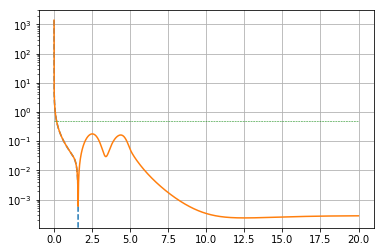

0.016739186610389322


In [10]:
print(len(rnpf[0,:]))
print(len(rnpf))
print(Nu)
print(len(urange))
plt.plot(vrange,drnpvf[0],'--')
plt.plot(vrange,np.abs(drnpvf[0]))
plt.plot([vrange[0],vrange[-1]],[.5,.5],'g--',linewidth=.5)
#plt.plot(vrange,np.abs(drnpvf[1]))
plt.yscale('log')
plt.grid()
plt.show()
print(rnpf[0,0])


In [11]:
switch=0.0
np.save('rnputile',np.array([Nu*Nv,Nu,Nv,ru0,dr0v,M0,Q,Lambda,wHD,switch,vbdytype]))
np.save('urangee',urange)
np.save('vrangee',vrange)

In [12]:
stop = timeit.default_timer()

In [13]:
acttime=stop - start

numpoints=Nu*Nv*uscal

print(str(acttime)+' seconds')
print(str((acttime)/60)+' minutes')
print(str((acttime)/3600)+' hours')

print(str(numpoints)+' points')

print(str((numpoints)/(stop - start))+' points per second') 

66187.88942393695 seconds
1103.1314903989492 minutes
18.385524839982487 hours
64090000000 points
968304.0289969081 points per second


conv=False
j=0
tempanswer=[]
    while conv==False:
        dv=TempTolv*dv0
        jcount=1
        while j<Nv-1:
            j1=mth.ceil(jcount*TempTolv)
            j2=mth.floor(jcount*TempTolv)
            answer=dnu.x4giveralt(0,j+mth.ceil((jcount-1)*TempTolv),du,dv*TempTolv,rnpf,phinpf,signpf,massnpf,M0,Q,Lambda,datatype)
            rnpf[1][j+j1]=answer[0]
            phinpf[1][j+j1]=answer[1]
            signpf[1][j+j1]=answer[2]
            massnpf[1][j+j1]=answer[3]
            #drunptemp[j+1]=answer[4]
            dsigunpv=answer[5]
            jcount=(jcount+1)**(0**j2)
            j=j+j2
        
        if np.abs(tempanswer[0]-answer[0])/answer[0]>0.01 or not tempanswer:
            tempanswer=answer
            TempTol=TempTolv/2
            
        else:
            conv=True
            